In [1]:
#
# From https://minerl.io/docs/environments/index.html#id9
#
import gym
from gym import spaces
import minerl
import logging
import numpy as np
import collections
import torch
from itertools import chain

C:\Users\liamo\Anaconda3\envs\FallSemester\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
device = torch.device("cuda")

In [3]:
env = gym.make("MineRLNavigateDense-v0") # A MineRLNavigateDense-v0 env

In [4]:
# Run a random agent through the environment
def train(env, agent, config):
    
    num_episodes = config["NUM_EPISODES"]
    episodic_rewards = [0] * num_episodes
    episodic_moves = [0] * num_episodes
    
    for episode in range(num_episodes):
        obs = env.reset()
        done = False
        net_reward = 0
        steps = 0
        
        obs["pov"] = obs["pov"].reshape(3,64,64)
        obs["pov"] = torch.from_numpy(obs["pov"]).float().to(device).unsqueeze(0)
        obs["compassAngle"] = torch.from_numpy(obs["compassAngle"]).float().to(device).unsqueeze(0)
                                      
        while not done:
            # this is only outputting the camera controls
            camera_action = agent.step(obs)
            
            print(camera_action)
    
            env_action = {}
            
            env_action["camera"] = [0, camera_action.detach().cpu().item()]
            env_action["attack"] = 0
            env_action["back"] = 0
            env_action["forward"] = 1
            env_action["jump"] = 1
            env_action["left"] = 0
            env_action["place"] = "none"
            env_action["right"] = 0
            env_action["sneak"] = 0
            env_action["sprint"] = 0
    
            steps = steps + 1
            next_obs, reward, done, info = env.step(env_action)
            
            next_obs["pov"] = next_obs["pov"].reshape(3,64,64)
            next_obs["pov"] = torch.from_numpy(next_obs["pov"]).float().to(device).unsqueeze(0)
            next_obs["compassAngle"] = torch.from_numpy(next_obs["compassAngle"]).float().to(device).unsqueeze(0)
    
            camera_action = camera_action.unsqueeze(0)
            reward = torch.tensor([reward], device=device)
            done = torch.tensor([done], device=device).int()
            
            
            agent.memory.store_transition(obs, camera_action, next_obs, reward, done)
            if steps % config["EVAL_INTERVAL"] == 0:
                    agent.evaluate()
            obs = next_obs     
            episodic_rewards[episode] += reward
            episodic_moves[episode] += 1
    
        print(episode)
        print("reward", episodic_rewards[episode])
    return episodic_rewards, episodic_moves        
     
    # Do something

In [16]:
%run SoftAC.ipynb
agent_config = {
    "ALPHA": .5,
    "GAMMA": .9,
    "POLYAK": .99,
    "LEARNING_RATE": .00001,
    "MAX_MEMORY": 10000,
    "BATCH_SIZE": 64
}
agent = SoftACAgent(env, agent_config)

In [17]:
train_config = {
    "EVAL_INTERVAL": 10,
    "NUM_EPISODES": 25
}
rew, moves = train(env, agent, train_config)

tensor([[-29.9988]], device='cuda:0')
tensor([[-15.3259]], device='cuda:0')
tensor([[-15.4997]], device='cuda:0')
tensor([[-23.1141]], device='cuda:0')
tensor([[-2.9645]], device='cuda:0')
tensor([[-25.5918]], device='cuda:0')
tensor([[-29.7850]], device='cuda:0')
tensor([[29.9043]], device='cuda:0')
tensor([[5.6686]], device='cuda:0')
tensor([[-29.7402]], device='cuda:0')
tensor([[-29.7436]], device='cuda:0')
tensor([[29.8676]], device='cuda:0')
tensor([[-28.6360]], device='cuda:0')
tensor([[-26.0378]], device='cuda:0')
tensor([[-16.3920]], device='cuda:0')
tensor([[-20.9464]], device='cuda:0')
tensor([[24.7092]], device='cuda:0')
tensor([[-0.7140]], device='cuda:0')
tensor([[26.6882]], device='cuda:0')
tensor([[-22.8473]], device='cuda:0')
tensor([[-16.7155]], device='cuda:0')
tensor([[-13.1122]], device='cuda:0')
tensor([[-24.1320]], device='cuda:0')
tensor([[-28.0326]], device='cuda:0')
tensor([[-10.2259]], device='cuda:0')
tensor([[0.7357]], device='cuda:0')
tensor([[-28.9654]], d

tensor([[-27.1736]], device='cuda:0')
tensor([[29.2806]], device='cuda:0')
tensor([[25.1352]], device='cuda:0')
tensor([[-20.1636]], device='cuda:0')
tensor([[-29.9946]], device='cuda:0')
tensor([[1.2851]], device='cuda:0')
tensor([[13.5722]], device='cuda:0')
tensor([[27.8891]], device='cuda:0')
tensor([[13.0446]], device='cuda:0')
tensor([[-29.7199]], device='cuda:0')
tensor([[-26.2263]], device='cuda:0')
tensor([[-28.3472]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[10.5503]], device='cuda:0')
tensor([[29.2491]], device='cuda:0')
tensor([[9.7039]], device='cuda:0')
tensor([[14.0242]], device='cuda:0')
tensor([[29.6632]], device='cuda:0')
tensor([[17.6571]], device='cuda:0')
tensor([[-29.9969]], device='cuda:0')
tensor([[29.7705]], device='cuda:0')
tensor([[-13.9041]], device='cuda:0')
tensor([[-27.1199]], device='cuda:0')
tensor([[-29.9974]], device='cuda:0')
tensor([[-29.9851]], device='cuda:0')
tensor([[-29.9522]], device='cuda:0')
tensor([[-29.9559]], device

tensor([[-27.9118]], device='cuda:0')
tensor([[29.6394]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[25.9311]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[29.9125]], device='cuda:0')
tensor([[-29.1249]], device='cuda:0')
tensor([[-2.6563]], device='cuda:0')
tensor([[-29.9958]], device='cuda:0')
tensor([[27.1865]], device='cuda:0')
tensor([[7.0153]], device='cuda:0')
tensor([[-29.2589]], device='cuda:0')
tensor([[-27.2438]], device='cuda:0')
tensor([[10.4448]], device='cuda:0')
tensor([[-4.9309]], device='cuda:0')
tensor([[29.8887]], device='cuda:0')
tensor([[29.8404]], device='cuda:0')
tensor([[-29.9969]], device='cuda:0')
tensor([[28.3565]], device='cuda:0')
tensor([[10.8896]], device='cuda:0')
tensor([[29.7230]], device='cuda:0')
tensor([[2.2305]], device='cuda:0')
tensor([[10.8578]], device='cuda:0')
tensor([[-29.9997]], device='cuda:0')
tensor([[-29.7493]], device='cuda:0')
te

tensor([[5.0708]], device='cuda:0')
tensor([[29.9371]], device='cuda:0')
tensor([[29.9842]], device='cuda:0')
tensor([[28.9334]], device='cuda:0')
tensor([[27.5553]], device='cuda:0')
tensor([[-2.0252]], device='cuda:0')
tensor([[26.7782]], device='cuda:0')
tensor([[-23.5333]], device='cuda:0')
tensor([[-29.9803]], device='cuda:0')
tensor([[-29.9774]], device='cuda:0')
tensor([[-29.9616]], device='cuda:0')
tensor([[-27.4006]], device='cuda:0')
tensor([[-29.9878]], device='cuda:0')
tensor([[-23.4095]], device='cuda:0')
tensor([[25.2214]], device='cuda:0')
tensor([[-29.8585]], device='cuda:0')
tensor([[29.9914]], device='cuda:0')
tensor([[29.9983]], device='cuda:0')
tensor([[28.9998]], device='cuda:0')
tensor([[26.3904]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-29.9975]], device='cuda:0')
tensor([[-29.9860]], device='cuda:0')
tensor([[29.9247]], device='cuda:0')
tensor([[28.4314]], device='cuda:0')
tensor([[-29.3801]], device='cuda:0')
tensor([[-29.8855]], device=

tensor([[-18.4898]], device='cuda:0')
tensor([[-29.6387]], device='cuda:0')
tensor([[29.9980]], device='cuda:0')
tensor([[29.9172]], device='cuda:0')
tensor([[-29.9782]], device='cuda:0')
tensor([[-20.2995]], device='cuda:0')
tensor([[-28.0396]], device='cuda:0')
tensor([[-0.4810]], device='cuda:0')
tensor([[-29.9522]], device='cuda:0')
tensor([[29.4784]], device='cuda:0')
tensor([[-16.5033]], device='cuda:0')
tensor([[12.3342]], device='cuda:0')
tensor([[29.9971]], device='cuda:0')
tensor([[29.9880]], device='cuda:0')
tensor([[-29.9796]], device='cuda:0')
tensor([[29.8188]], device='cuda:0')
tensor([[29.9933]], device='cuda:0')
tensor([[-24.0671]], device='cuda:0')
tensor([[29.9389]], device='cuda:0')
tensor([[-28.6353]], device='cuda:0')
tensor([[22.0691]], device='cuda:0')
tensor([[25.3074]], device='cuda:0')
tensor([[-28.5278]], device='cuda:0')
tensor([[-26.4523]], device='cuda:0')
tensor([[-29.8455]], device='cuda:0')
tensor([[-23.1630]], device='cuda:0')
tensor([[-1.0623]], devi

tensor([[0.1780]], device='cuda:0')
tensor([[3.3194]], device='cuda:0')
tensor([[-10.9021]], device='cuda:0')
tensor([[17.6572]], device='cuda:0')
tensor([[15.7919]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[29.9698]], device='cuda:0')
tensor([[26.9340]], device='cuda:0')
tensor([[23.8148]], device='cuda:0')
tensor([[29.8897]], device='cuda:0')
tensor([[-28.1692]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[8.2288]], device='cuda:0')
tensor([[-25.6674]], device='cuda:0')
tensor([[23.5195]], device='cuda:0')
tensor([[-29.9993]], device='cuda:0')
tensor([[-29.8618]], device='cuda:0')
tensor([[-29.6581]], device='cuda:0')
tensor([[-12.7535]], device='cuda:0')
tensor([[-29.0025]], device='cuda:0')
tensor([[-12.4572]], device='cuda:0')
tensor([[22.8972]], device='cuda:0')
tensor([[-29.9164]], device='cuda:0')
tensor([[29.4419]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
t

tensor([[-9.0412]], device='cuda:0')
tensor([[15.6797]], device='cuda:0')
tensor([[4.1595]], device='cuda:0')
tensor([[-27.9015]], device='cuda:0')
tensor([[29.9442]], device='cuda:0')
tensor([[-26.4152]], device='cuda:0')
tensor([[-29.9985]], device='cuda:0')
tensor([[29.9985]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[25.1872]], device='cuda:0')
tensor([[28.8020]], device='cuda:0')
tensor([[-27.6178]], device='cuda:0')
tensor([[18.2769]], device='cuda:0')
tensor([[0.9753]], device='cuda:0')
tensor([[16.4869]], device='cuda:0')
tensor([[-28.1776]], device='cuda:0')
tensor([[-29.8532]], device='cuda:0')
tensor([[-29.9684]], device='cuda:0')
tensor([[-29.9734]], device='cuda:0')
tensor([[-29.5378]], device='cuda:0')
tensor([[-26.6369]], device='cuda:0')
tensor([[-29.9733]], device='cuda:0')
tensor([[-24.4617]], device='cuda:0')
tensor([[-22.6638]], device='cuda:0')
tensor([[19.6203]], device='cuda:0')
tensor([[-29.6744]], device='cuda:0')
tensor([[0.7075]], device=

tensor([[-17.8411]], device='cuda:0')
tensor([[-27.5120]], device='cuda:0')
tensor([[-26.4184]], device='cuda:0')
tensor([[-17.6661]], device='cuda:0')
tensor([[-29.8987]], device='cuda:0')
tensor([[28.7346]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[13.0449]], device='cuda:0')
tensor([[27.1385]], device='cuda:0')
tensor([[29.0105]], device='cuda:0')
tensor([[-29.9055]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[28.2109]], device='cuda:0')
tensor([[25.3382]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.3672]], device='cuda:0')
tensor([[29.5861]], device='cuda:0')
tensor([[-29.7833]], device='cuda:0')
tensor([[-29.6469]], device='cuda:0')
tensor([[-25.0762]], device='cuda:0')
tensor([[-29.2543]], device='cuda:0')
tensor([[-27.1572]], device='cuda:0')
tensor([[-29.7732]], device='cuda:0')
tensor([[29.6236]], device='cuda:0')
tensor([[-27.5986]], device='cuda:0')
tensor([[29.9958]], device='cuda:0')
tensor([[30.0000]], devi

tensor([[-18.1869]], device='cuda:0')
tensor([[-18.1043]], device='cuda:0')
tensor([[-9.7770]], device='cuda:0')
tensor([[11.6192]], device='cuda:0')
tensor([[29.9256]], device='cuda:0')
tensor([[29.9800]], device='cuda:0')
tensor([[-29.9921]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9788]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[24.7990]], device='cuda:0')
tensor([[29.3696]], device='cuda:0')
tensor([[21.8527]], device='cuda:0')
tensor([[-26.9782]], device='cuda:0')
tensor([[-25.2696]], device='cuda:0')
tensor([[-29.9775]], device='cuda:0')
tensor([[-29.9547]], device='cuda:0')
tensor([[-29.9757]], device='cuda:0')
tensor([[-29.5578]], device='cuda:0')
tensor([[-29.8908]], device='cuda:0')
tensor([[-29.9229]], device='cuda:0')
tensor([[-29.8833]], device='cuda:0')
tensor([[-16.5467]], device='cuda:0')
tensor([[-25.0397]], device='cuda:0')
tensor([[8.6449]], device='cuda:0')
tensor([[-28.8322]], device='cuda:0')
tensor([[18.1831]], devi

tensor([[29.9970]], device='cuda:0')
tensor([[29.9898]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[22.6688]], device='cuda:0')
tensor([[-18.1456]], device='cuda:0')
tensor([[-13.6637]], device='cuda:0')
tensor([[21.1548]], device='cuda:0')
tensor([[-29.2674]], device='cuda:0')
tensor([[-29.6047]], device='cuda:0')
tensor([[-29.6037]], device='cuda:0')
tensor([[-29.9461]], device='cuda:0')
tensor([[-29.7447]], device='cuda:0')
tensor([[-29.7690]], device='cuda:0')
tensor([[-29.2596]], device='cuda:0')
tensor([[-28.5740]], device='cuda:0')
tensor([[-2.9703]], device='cuda:0')
tensor([[29.3710]], device='cuda:0')
tensor([[-29.6755]], device='cuda:0')
tensor([[-29.9105]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[-0.7787]], device='cuda:0')
tensor([[-15.5575]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9979]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-29.9977]], dev

tensor([[27.1801]], device='cuda:0')
tensor([[-29.9516]], device='cuda:0')
tensor([[29.7542]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[28.5088]], device='cuda:0')
tensor([[-24.2263]], device='cuda:0')
tensor([[-29.9547]], device='cuda:0')
tensor([[20.1554]], device='cuda:0')
tensor([[6.9833]], device='cuda:0')
tensor([[-28.8721]], device='cuda:0')
tensor([[-28.8334]], device='cuda:0')
tensor([[13.7144]], device='cuda:0')
tensor([[-29.0486]], device='cuda:0')
tensor([[-25.4590]], device='cuda:0')
tensor([[-29.9957]], device='cuda:0')
tensor([[29.2183]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9957]], device='cuda:0')
tensor([[-29.9865]], device='cuda:0')
tensor([[-29.8598]], device='cuda:0')
tensor([[-28.5043]], device='cuda:0')
tensor([[-29.7845]], device='cuda:0')
tensor([[-28.0397]], device='cuda:0')
tensor([[-29.9093]], device='cuda:0')
tensor([[-29.7637]], device='cuda:0')
tensor([[3.7996]], device='cud

tensor([[30.0000]], device='cuda:0')
tensor([[-29.8316]], device='cuda:0')
tensor([[-13.1323]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[22.2632]], device='cuda:0')
tensor([[-28.5331]], device='cuda:0')
tensor([[27.2008]], device='cuda:0')
tensor([[29.8316]], device='cuda:0')
tensor([[29.9753]], device='cuda:0')
tensor([[29.2338]], device='cuda:0')
tensor([[29.9987]], device='cuda:0')
tensor([[-29.9914]], device='cuda:0')
tensor([[29.9868]], device='cuda:0')
tensor([[-25.7914]], device='cuda:0')
tensor([[27.7726]], device='cuda:0')
tensor([[29.9923]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[17.3832]], device='cuda:0')
tensor([[-29.4367]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[11.1204]], device='cuda:0')
tensor([[-29.9880]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9440]], device='cuda:0')
tensor([[-29.9942]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]],

tensor([[30.0000]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[25.7452]], device='cuda:0')
tensor([[-29.9942]], device='cuda:0')
tensor([[28.4586]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9996]], device='cuda:0')
tensor([[28.1789]], device='cuda:0')
tensor([[-25.8445]], device='cuda:0')
tensor([[-29.9653]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[-29.8355]], device='cuda:0')
tensor([[-28.9255]], device='cuda:0')
tensor([[29.2878]], device='cuda:0')
tensor([[14.3470]], device='cuda:0')
tensor([[29.9989]], device='cuda:0')
tensor([[-29.4112]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9931]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[29.6096]], device='cuda:0')
tensor([[29.9995]]

tensor([[-29.6188]], device='cuda:0')
tensor([[-29.9693]], device='cuda:0')
tensor([[-29.9320]], device='cuda:0')
tensor([[-28.0849]], device='cuda:0')
tensor([[-29.5155]], device='cuda:0')
tensor([[-28.2936]], device='cuda:0')
tensor([[-29.9956]], device='cuda:0')
tensor([[-29.9621]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[-29.0947]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9841]], device='cuda:0')
tensor([[-29.9138]], device='cuda:0')
tensor([[-29.8911]], device='cuda:0')
tensor([[-29.7779]], device='cuda:0')
tensor([[-29.9579]], device='cuda:0')
tensor([[-1.5056]], device='cuda:0')
tensor([[-27.5845]], device='cuda:0')
tensor([[-4.1964]], device='cuda:0')
tensor([[-28.7458]], device='cuda:0')
tensor([[-28.0261]], device='cuda:0')
tensor([[21.5788]], device='cuda:0')
tensor([[23.9869]], device='cuda:0')
tensor([[9.6706]], device='cuda:0')
tensor([[29.9957]], device='cuda:0')
tensor([[-29.7514]], device='cuda:0')
tensor([[-28.9968]], 

tensor([[29.9506]], device='cuda:0')
tensor([[5.3447]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[0.6648]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[4.4740]], device='cuda:0')
tensor([[-29.9859]], device='cuda:0')
tensor([[-29.9939]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-15.5061]], device='cuda:0')
tensor([[-29.5692]], device='cuda:0')
tensor([[-6.7460]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[18.3918]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[-28.0548]], device='cuda:0')
tensor([[10.9868]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-9.6259]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9789]], device='cuda:0')
tensor([[-29.9632]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9998]], devic

tensor([[29.9996]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9238]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[26.2622]], device='cuda:0')
tensor([[21.5651]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[29.9992]], device='cuda:0')
tensor([[29.9908]], device='cuda:0')
tensor([[-7.8240]], device='cuda:0')
tensor([[-23.0591]], device='cuda:0')
tensor([[-29.7300]], device='cuda:0')
tensor([[-2.0963]], device='cuda:0')
tensor([[-15.0825]], device='cuda:0')
tensor([[-29.2495]], device='cuda:0')
tensor([[-28.5581]], device='cuda:0')
tensor([[29.9103]], device='cuda:0')
tensor([[29.7963]], device='cuda:0')
tensor([[23.0667]], device='cuda:0')
tensor([[-29.9955]], device='cuda:0')
tensor([[-17.4263]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[29.9862]], device='cuda:0')
tensor([[29.

tensor([[30.0000]], device='cuda:0')
tensor([[20.9637]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[28.1794]], device='cuda:0')
tensor([[6.5346]], device='cuda:0')
tensor([[-25.1173]], device='cuda:0')
tensor([[-29.1060]], device='cuda:0')
tensor([[-27.7616]], device='cuda:0')
tensor([[-29.5759]], device='cuda:0')
tensor([[-29.9756]], device='cuda:0')
tensor([[-4.9462]], device='cuda:0')
tensor([[29.7134]], device='cuda:0')
tensor([[29.9994]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-15.5244]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9872]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9076]], device='cuda:0')
tensor([[25.4598]], device='cuda:0')
tensor([[29.9114]], device='cuda:0')
tensor([[-29.3387]], device='cuda:0')
tensor([[29.8221

tensor([[-29.8738]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9895]], device='cuda:0')
tensor([[22.4602]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9711]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-2.3503]], device='cuda:0')
tensor([[26.9460]], device='cuda:0')
tensor([[29.9191]], device='cuda:0')
tensor([[29.9813]], device='cuda:0')
tensor([[-29.9897]], device='cuda:0')
tensor([[-26.2976]], device='cuda:0')
tensor([[-27.7323]], device='cuda:0')
tensor([[-27.3955]], device='cuda:0')
tensor([[-24.8636]], device='cuda:0')
tensor([[-29.0669]], device='cuda:0')
tensor([[-29.9478]], device='cuda:0')
tensor([[-29.9076]], device='cuda:0')
tensor([[29.8778]], device='cuda:0')
tensor([[-29.9889]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[29.9830]], device='cuda:0')
tensor([[-29.9821]], device='cuda:0')
tens

tensor([[-29.9883]], device='cuda:0')
tensor([[-29.9740]], device='cuda:0')
tensor([[-29.9869]], device='cuda:0')
tensor([[-28.2342]], device='cuda:0')
tensor([[-29.9705]], device='cuda:0')
tensor([[-17.8132]], device='cuda:0')
tensor([[-29.6440]], device='cuda:0')
tensor([[29.4780]], device='cuda:0')
tensor([[29.5921]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[29.8990]], device='cuda:0')
tensor([[23.1974]], device='cuda:0')
tensor([[-29.9996]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.5937]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[29.9856]], device='cuda:0')
tensor([[9.0871]], device='cuda:0')
tensor([[-29.9966]], device='cuda:0')
tensor([[-29.9994]], device='cuda:0')
tensor([[29.6465]], device='cuda:0')
tensor([[29.9703]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[29.9132]], device='cuda:0')
tensor([[-29.9705]], device='cuda:0')
tensor([[29.7387]], device='cuda:0')


tensor([[9.0304]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[-29.9997]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[-29.9984]], device='cuda:0')
tensor([[-29.9965]], device='cuda:0')
tensor([[-29.9765]], device='cuda:0')
tensor([[-29.4601]], device='cuda:0')
tensor([[-8.7949]], device='cuda:0')
tensor([[4.8500]], device='cuda:0')
tensor([[-12.1782]], device='cuda:0')
tensor([[-20.9312]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9369]], device='cuda:0')
tensor([[29.9960]], device='cuda:0')
tensor([[27.3016]], device='cuda:0')
tensor([[26.9431]], device='cuda:0')
tensor([[29.9653]], device='cuda:0')
tensor([[-29.8843]], device='cuda:0')
tensor([[-29.0039]], device='cuda:0')
tensor([[-29.8738]], device='cuda:0')
tensor([[-29.6877]], device='cuda:0')
tensor([[-29.8316]], device='cuda:0')
tensor([[-29.8552]], device=

tensor([[17.3716]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.4361]], device='cuda:0')
tensor([[-29.9872]], device='cuda:0')
tensor([[-5.4232]], device='cuda:0')
tensor([[5.5919]], device='cuda:0')
tensor([[28.8464]], device='cuda:0')
tensor([[15.3605]], device='cuda:0')
tensor([[-28.5427]], device='cuda:0')
tensor([[-29.4815]], device='cuda:0')
tensor([[-29.9442]], device='cuda:0')
tensor([[-29.4547]], device='cuda:0')
tensor([[-27.5879]], device='cuda:0')
tensor([[-18.7146]], device='cuda:0')
tensor([[-29.8572]], device='cuda:0')
tensor([[-25.6281]], device='cuda:0')
tensor([[-12.1888]], device='cuda:0')
tensor([[28.6726]], device='cuda:0')
tensor([[29.9982]], device='cuda:0')
tensor([[-29.9820]], device='cuda:0')
tensor([[-28.1941]], device='cuda:0')
tensor([[-29.8996]], device='cuda:0')
tensor([[-27.0269]], device='cuda:0')
tensor([[-3.8720]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9980]], device='cuda:0')
tensor([[-29.9973]], dev

tensor([[30.0000]], device='cuda:0')
tensor([[29.9021]], device='cuda:0')
tensor([[-29.9990]], device='cuda:0')
tensor([[29.9837]], device='cuda:0')
tensor([[-18.2679]], device='cuda:0')
tensor([[20.8977]], device='cuda:0')
tensor([[-14.4258]], device='cuda:0')
tensor([[28.9444]], device='cuda:0')
tensor([[25.6234]], device='cuda:0')
tensor([[-13.5833]], device='cuda:0')
tensor([[-29.5382]], device='cuda:0')
tensor([[-26.8267]], device='cuda:0')
tensor([[15.1927]], device='cuda:0')
tensor([[-17.5826]], device='cuda:0')
tensor([[-28.0754]], device='cuda:0')
tensor([[-13.3765]], device='cuda:0')
tensor([[-29.9865]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[8.2854]], device='cuda:0')
tensor([[29.9986]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.5532]], device='cuda:0')
tens

tensor([[-27.5768]], device='cuda:0')
tensor([[-28.6320]], device='cuda:0')
tensor([[26.8944]], device='cuda:0')
tensor([[-29.9982]], device='cuda:0')
tensor([[26.8026]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9832]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[26.2389]], device='cuda:0')
tensor([[29.9795]], device='cuda:0')
tensor([[-29.9948]], device='cuda:0')
tensor([[29.9991]], device='cuda:0')
tensor([[29.9933]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9994]], device='cuda:0')
tensor([[29.9399]], device='cuda:0')
tensor([[-29.9946]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[11.7112]], device='cuda:0')
tensor([[-29.9990]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9952]], device='cuda:0')
ten

tensor([[-29.9477]], device='cuda:0')
tensor([[-29.8673]], device='cuda:0')
tensor([[-29.3562]], device='cuda:0')
tensor([[-27.9401]], device='cuda:0')
tensor([[-8.2076]], device='cuda:0')
tensor([[-28.9858]], device='cuda:0')
tensor([[29.9944]], device='cuda:0')
tensor([[-29.4415]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[24.6153]], device='cuda:0')
tensor([[29.9986]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[13.9387]], device='cuda:0')
tensor([[29.9235]], device='cuda:0')
tensor([[-28.5274]], device='cuda:0')
tensor([[28.8108]], device='cuda:0')
tensor([[-27.9151]], device='cuda:0')
tensor([[-7.9035]], device='cuda:0')
tensor([[-3.8131]], device='cuda:0')
tensor([[-27.5334]], device='cuda:0')
tensor([[-24.7220]], device='cuda:0')
tensor([[-27.5795]], device='cuda:0')
tensor([[-28.5093]], device='cuda:0')
tensor([[28.8884]], device='cuda:0')
tens

tensor([[-29.9951]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-9.0428]], device='cuda:0')
tensor([[29.9981]], device='cuda:0')
tensor([[-23.4592]], device='cuda:0')
tensor([[-28.8492]], device='cuda:0')
tensor([[-29.9183]], device='cuda:0')
tensor([[29.9966]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[29.9094]], device='cuda:0')
tensor([[-29.9076]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9962]], device='cuda:0')
tensor([[-29.9938]], device='cuda:0')
tensor([[-29.9824]], device='cuda:0')
tensor([[-29.9800]], device='cuda:0')
tensor([[-29.9866]], device='cuda:0')
tensor([[-29.7546]], device='cuda:0')
tensor([[-29.1399]], device='cuda:0')
tensor([[-28.9334]], device='cuda:0')
tensor([[-29.1384]], device='cuda:0')
tensor([[-29.9752]], device='cuda:0')
tensor([[29.8574]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-24.3658]], devic

tensor([[29.9531]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.6791]], device='cuda:0')
tensor([[-29.5544]], device='cuda:0')
tensor([[-29.9966]], device='cuda:0')
tensor([[9.6047]], device='cuda:0')
tensor([[29.9845]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.9596]], device='cuda:0')
tensor([[-11.0671]], device='cuda:0')
tensor([[-11.8466]], device='cuda:0')
tensor([[20.6971]], device='cuda:0')
tensor([[29.9973]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.2056]], device='cuda:0')
tensor([[-29.0808]], device='cuda:0')
tensor([[29.7346]], device='cuda:0')
tensor([[-9.2859]], device='cuda:0')
tensor([[29.8641]], device='cuda:0')
tensor([[29.8278]], device='cuda:0')
tensor([[29.7873]], device='cuda:0')
tensor([[-21.2296]], device='cuda:0')
tensor([[29.9840]], device='cuda:0')
tensor([[-29.8455]], device='cuda:0')
tensor([[-29.3884]], device='cuda:0')
tensor([[-29.9775]], device='c

tensor([[-16.8775]], device='cuda:0')
tensor([[-20.9625]], device='cuda:0')
tensor([[-0.7116]], device='cuda:0')
tensor([[16.2734]], device='cuda:0')
tensor([[20.0218]], device='cuda:0')
tensor([[-16.5696]], device='cuda:0')
tensor([[-22.7263]], device='cuda:0')
tensor([[29.6876]], device='cuda:0')
tensor([[28.9031]], device='cuda:0')
tensor([[-9.7025]], device='cuda:0')
tensor([[-4.0041]], device='cuda:0')
tensor([[-29.9991]], device='cuda:0')
tensor([[29.7364]], device='cuda:0')
tensor([[-10.3888]], device='cuda:0')
tensor([[-16.2238]], device='cuda:0')
tensor([[-29.7607]], device='cuda:0')
tensor([[-29.9966]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[-29.9975]], device='cuda:0')
tensor([[-29.9992]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9953]], device='cuda:0')
tensor([[-29.8633]], device='cuda:0')
tensor([[-29.6573]], device='cuda:0')
tensor([[-29.3660]], devic

tensor([[-29.9649]], device='cuda:0')
tensor([[-21.8534]], device='cuda:0')
tensor([[29.4678]], device='cuda:0')
tensor([[-29.9743]], device='cuda:0')
tensor([[-29.9974]], device='cuda:0')
tensor([[29.9994]], device='cuda:0')
tensor([[-29.7873]], device='cuda:0')
tensor([[-28.4401]], device='cuda:0')
tensor([[29.9698]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[29.7248]], device='cuda:0')
tensor([[-29.8715]], device='cuda:0')
tensor([[-29.8836]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9981]], device='cuda:0')
tensor([[-25.5954]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[17.2112]], device='cuda:0')
tensor([[-27.1768]], device='cuda:0')
tensor([[-14.5573]], device='cuda:0')
tensor([[-29.0059]], device='cuda:0')
tensor([[-27.7889]], device='cuda:0')
tensor([[-1.9176]], device='cuda:0')

tensor([[29.9671]], device='cuda:0')
tensor([[29.9293]], device='cuda:0')
tensor([[-24.7214]], device='cuda:0')
tensor([[-29.7020]], device='cuda:0')
tensor([[-29.8191]], device='cuda:0')
tensor([[-2.3014]], device='cuda:0')
tensor([[20.9339]], device='cuda:0')
tensor([[-10.6727]], device='cuda:0')
tensor([[17.6794]], device='cuda:0')
tensor([[28.6643]], device='cuda:0')
tensor([[-15.9279]], device='cuda:0')
tensor([[-29.0055]], device='cuda:0')
tensor([[-29.9977]], device='cuda:0')
tensor([[29.9523]], device='cuda:0')
tensor([[20.1925]], device='cuda:0')
tensor([[-29.4547]], device='cuda:0')
tensor([[29.9914]], device='cuda:0')
tensor([[5.8670]], device='cuda:0')
tensor([[-29.9792]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[-21.8075]], device='cuda:0')
tensor([[-29.9858]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[-21.0396]], device='cuda:0')
tensor([[-29.9696]], device='cuda:0')
tensor([[10.6352]], devic

tensor([[30.0000]], device='cuda:0')
tensor([[29.2836]], device='cuda:0')
tensor([[29.9274]], device='cuda:0')
tensor([[-19.5648]], device='cuda:0')
tensor([[-29.6769]], device='cuda:0')
tensor([[28.5099]], device='cuda:0')
tensor([[-0.3205]], device='cuda:0')
tensor([[-26.9431]], device='cuda:0')
tensor([[-29.7107]], device='cuda:0')
tensor([[-29.9289]], device='cuda:0')
tensor([[-29.9331]], device='cuda:0')
tensor([[-28.2717]], device='cuda:0')
tensor([[-29.2559]], device='cuda:0')
tensor([[-29.5667]], device='cuda:0')
tensor([[-0.1173]], device='cuda:0')
tensor([[-29.5780]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[28.1597]], device='cuda:0')
tensor([[-29.7686]], device='cuda:0')
tensor([[29.9979]], device='cuda:0')
tensor([[28.5821]], device='cuda:0')
tensor([[-29.2115]], device='cuda:0')
tensor([[29.9918]], device='cuda:0')
tensor([[-2.3249]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[20.7517]], device='cuda:0')
tensor([[30.0000]], device='cuda:0

tensor([[-29.9934]], device='cuda:0')
tensor([[29.9969]], device='cuda:0')
tensor([[29.7701]], device='cuda:0')
tensor([[28.8279]], device='cuda:0')
tensor([[-29.9615]], device='cuda:0')
tensor([[-27.9721]], device='cuda:0')
tensor([[-28.0692]], device='cuda:0')
tensor([[-29.3119]], device='cuda:0')
tensor([[-13.0202]], device='cuda:0')
tensor([[-29.9506]], device='cuda:0')
tensor([[-29.9953]], device='cuda:0')
tensor([[29.4756]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9719]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9947]], device='cuda:0')
tensor([[12.2851]], device='cuda:0')
tensor([[-1.6734]], device='cuda:0')
tensor([[29.6932]], device='cuda:0')
tensor([[-27.8134]], device='cuda:0')
tensor([[-29.9656]], device='cuda:0')
tensor([[-29.4580]], device='cuda:0')
tensor([[-16.5884]], device='cuda:0')
ten

tensor([[-29.8870]], device='cuda:0')
tensor([[18.5704]], device='cuda:0')
tensor([[29.9619]], device='cuda:0')
tensor([[-29.9823]], device='cuda:0')
tensor([[-29.9219]], device='cuda:0')
tensor([[29.9987]], device='cuda:0')
tensor([[21.3759]], device='cuda:0')
tensor([[-29.2812]], device='cuda:0')
tensor([[29.9840]], device='cuda:0')
tensor([[29.3069]], device='cuda:0')
tensor([[29.9990]], device='cuda:0')
tensor([[5.2267]], device='cuda:0')
tensor([[8.7441]], device='cuda:0')
tensor([[29.5996]], device='cuda:0')
tensor([[-29.7745]], device='cuda:0')
tensor([[-29.2761]], device='cuda:0')
tensor([[-27.4204]], device='cuda:0')
tensor([[-29.6848]], device='cuda:0')
tensor([[-29.2116]], device='cuda:0')
tensor([[-29.7458]], device='cuda:0')
tensor([[-1.7745]], device='cuda:0')
tensor([[-29.2051]], device='cuda:0')
tensor([[29.1046]], device='cuda:0')
tensor([[29.9002]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9998]], device='cuda

tensor([[-22.1030]], device='cuda:0')
tensor([[29.2549]], device='cuda:0')
tensor([[29.0593]], device='cuda:0')
tensor([[27.7923]], device='cuda:0')
tensor([[-29.9876]], device='cuda:0')
tensor([[1.4455]], device='cuda:0')
tensor([[28.0883]], device='cuda:0')
tensor([[-29.9695]], device='cuda:0')
tensor([[18.6088]], device='cuda:0')
tensor([[-29.9285]], device='cuda:0')
tensor([[1.9106]], device='cuda:0')
tensor([[26.0362]], device='cuda:0')
tensor([[-25.6331]], device='cuda:0')
tensor([[-25.0182]], device='cuda:0')
tensor([[-29.4471]], device='cuda:0')
tensor([[3.5397]], device='cuda:0')
tensor([[-24.1522]], device='cuda:0')
tensor([[-27.7227]], device='cuda:0')
tensor([[-17.3865]], device='cuda:0')
tensor([[-14.2285]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9985]], device='cuda:0')
tensor([[29.6246]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.

tensor([[-29.5351]], device='cuda:0')
tensor([[-29.6000]], device='cuda:0')
tensor([[-28.1500]], device='cuda:0')
tensor([[16.5361]], device='cuda:0')
tensor([[-29.9987]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.8566]], device='cuda:0')
tensor([[-29.9988]], device='cuda:0')
tensor([[-29.9994]], device='cuda:0')
tensor([[-29.9981]], device='cuda:0')
tensor([[-29.9940]], device='cuda:0')
tensor([[-29.9796]], device='cuda:0')
tensor([[-24.9215]], device='cuda:0')
tensor([[-0.5832]], device='cuda:0')
tensor([[-29.7473]], device='cuda:0')
tensor([[9.0672]], device='cuda:0')
tensor([[29.9687]], device='cuda:0')
tensor([[1.5229]], device='cuda:0')
tensor([[-10.5952]], device='cuda:0')
tensor([[29.9987]], device='cuda:0')
tensor([[28.0958]], device='cuda:0')
tensor([[22.9396]], device='cuda:0')
tensor([[-29.9753]], device='cuda:0')
tensor([[-16.4054]], device='cuda:0')
tensor([[-29.8485]], device='cuda:0')
tensor([[-29.8817]], device='cuda:0')
tensor([[-29.8765]], de

tensor([[26.8057]], device='cuda:0')
tensor([[15.0626]], device='cuda:0')
tensor([[29.8966]], device='cuda:0')
tensor([[2.6276]], device='cuda:0')
tensor([[-28.5976]], device='cuda:0')
tensor([[-29.8756]], device='cuda:0')
tensor([[-29.9020]], device='cuda:0')
tensor([[-29.8704]], device='cuda:0')
tensor([[-29.9397]], device='cuda:0')
tensor([[-29.9451]], device='cuda:0')
tensor([[-29.5043]], device='cuda:0')
tensor([[-18.1123]], device='cuda:0')
tensor([[-29.6411]], device='cuda:0')
tensor([[29.5555]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[5.4488]], device='cuda:0')
tensor([[-27.3426]], device='cuda:0')
tensor([[-29.9328]], device='cuda:0')
tensor([[-29.9991]], device='cuda:0')
tensor([[-29.9985]], device='cuda:0')
tensor([[-29.9977]], device='cuda:0')
tensor([[-29.9966]], device='cuda:0')
tensor([[-29.9750]], device='cuda:0')
tensor([[-29.8848]], device='cuda:0')
tensor([[-28.9293]], device='cuda:0')
tensor([[-29.6865]], device='cuda:0')
tensor([[-27.9868]], 

tensor([[29.9927]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[20.3999]], device='cuda:0')
tensor([[29.8475]], device='cuda:0')
tensor([[-29.9670]], device='cuda:0')
tensor([[-29.9736]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[29.9891]], device='cuda:0')
tensor([[29.3105]], device='cuda:0')
tensor([[21.2939]], device='cuda:0')
tensor([[-29.4337]], device='cuda:0')
tensor([[-29.9918]], device='cuda:0')
tensor([[-29.8453]], device='cuda:0')
tensor([[22.7220]], device='cuda:0')
tensor([[5.3696]], device='cuda:0')
tensor([[-28.5107]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9695]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9537]], device='cuda:0')
tensor([[29.9988]], device='cuda:0')
tensor([[29.9977]], device='cuda:0')
tensor([[28.9763

tensor([[-29.9683]], device='cuda:0')
tensor([[-29.9021]], device='cuda:0')
tensor([[-29.6996]], device='cuda:0')
tensor([[-28.9820]], device='cuda:0')
tensor([[-23.0762]], device='cuda:0')
tensor([[-29.9486]], device='cuda:0')
tensor([[7.0426]], device='cuda:0')
tensor([[20.5258]], device='cuda:0')
tensor([[24.7026]], device='cuda:0')
tensor([[29.9636]], device='cuda:0')
tensor([[-29.9991]], device='cuda:0')
tensor([[-29.9979]], device='cuda:0')
tensor([[-29.9984]], device='cuda:0')
tensor([[-29.9957]], device='cuda:0')
tensor([[-29.9953]], device='cuda:0')
tensor([[-29.9906]], device='cuda:0')
tensor([[-29.9931]], device='cuda:0')
tensor([[-29.9296]], device='cuda:0')
tensor([[-29.8110]], device='cuda:0')
tensor([[-29.2766]], device='cuda:0')
tensor([[-29.6577]], device='cuda:0')
tensor([[15.0931]], device='cuda:0')
tensor([[15.1984]], device='cuda:0')
tensor([[29.9992]], device='cuda:0')
tensor([[-15.3457]], device='cuda:0')
tensor([[1.7785]], device='cuda:0')
tensor([[-27.1746]], d

tensor([[29.9479]], device='cuda:0')
tensor([[29.9991]], device='cuda:0')
tensor([[-28.4404]], device='cuda:0')
tensor([[-29.6552]], device='cuda:0')
tensor([[-16.9334]], device='cuda:0')
tensor([[-3.0418]], device='cuda:0')
tensor([[-23.3244]], device='cuda:0')
tensor([[-27.1613]], device='cuda:0')
tensor([[22.0360]], device='cuda:0')
tensor([[12.5545]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-12.0995]], device='cuda:0')
tensor([[29.6809]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.6038]], device='cuda:0')
tensor([[-14.0223]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[29.9180]], device='cuda:0')
tensor([[23.5180]], device='cuda:0')
tensor([[13.7576]], device='cuda:0')
tensor([[29.9694]], device='cuda:0')
tensor([[14.2905]], device='cuda:0')
tensor([[-29.8355]], device='cuda:0')
tensor([[-29.9464]], device='cuda:0')
ten

tensor([[-28.3129]], device='cuda:0')
tensor([[29.9333]], device='cuda:0')
tensor([[-14.1486]], device='cuda:0')
tensor([[-29.4979]], device='cuda:0')
tensor([[-29.0503]], device='cuda:0')
tensor([[-26.3912]], device='cuda:0')
tensor([[-29.9466]], device='cuda:0')
tensor([[-29.7781]], device='cuda:0')
tensor([[-29.2972]], device='cuda:0')
tensor([[29.0706]], device='cuda:0')
tensor([[29.9582]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-26.2310]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.7018]], device='cuda:0')
tensor([[28.7716]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[-20.9839]], device='cuda:0')
tensor([[-13.8353]], device='cuda:0')
tensor([[23.1326]], device='cuda:0')
tensor([[-28.5488]], device='cuda:0')
tensor([[-21.0785]], device='cuda:0')
tensor([[-10.6240]], device='cuda:0')
tensor([[25.4912]], device='cuda:0')
tensor([[-29.3991]], device='cuda:0')
tensor([[19.6623]], device='cud

tensor([[30.0000]], device='cuda:0')
tensor([[-29.8209]], device='cuda:0')
tensor([[29.9989]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.8882]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[-2.9660]], device='cuda:0')
tensor([[29.9653]], device='cuda:0')
tensor([[-29.9552]], device='cuda:0')
tensor([[-20.1974]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-1.7250]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-29.8726]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9049]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9760]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.3214]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-26.7749]], device='cuda:0')
tensor([[-16.5951]], device='cuda:0')
tensor([[22.0180]], device='cuda:0')
tensor([[24.9405]], device='cuda:0')
tensor([[-3.2451]], device='cuda:0')
tensor([[-25.6430]], device='cuda:0')
tenso

tensor([[-20.2643]], device='cuda:0')
tensor([[29.8293]], device='cuda:0')
tensor([[-29.8556]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.6188]], device='cuda:0')
tensor([[-29.9980]], device='cuda:0')
tensor([[-29.8567]], device='cuda:0')
tensor([[-29.9994]], device='cuda:0')
tensor([[-29.9980]], device='cuda:0')
tensor([[-29.9032]], device='cuda:0')
tensor([[-29.9431]], device='cuda:0')
tensor([[-29.6298]], device='cuda:0')
tensor([[-13.8782]], device='cuda:0')
tensor([[27.2970]], device='cuda:0')
tensor([[24.9247]], device='cuda:0')
tensor([[-5.0075]], device='cuda:0')
tensor([[-22.1058]], device='cuda:0')
tensor([[28.9893]], device='cuda:0')
tensor([[12.3651]], device='cuda:0')
tensor([[29.4543]], device='cuda:0')
tensor([[-20.7794]], device='cuda:0')
tensor([[-12.0704]], device='cuda:0')
tensor([[-29.3021]], device='cuda:0')
tensor([[-29.8000]], device='cuda:0')
tensor([[-29.8366]], device='cuda:0')
tensor([[-29.7342]], 

tensor([[19.7664]], device='cuda:0')
tensor([[-18.3375]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[-24.2671]], device='cuda:0')
tensor([[-15.1539]], device='cuda:0')
tensor([[1.9173]], device='cuda:0')
tensor([[-29.8495]], device='cuda:0')
tensor([[-29.9931]], device='cuda:0')
tensor([[-5.3009]], device='cuda:0')
tensor([[29.9932]], device='cuda:0')
tensor([[29.9983]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[28.2060]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-29.9975]], device='cuda:0')
tensor([[29.9916]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[29.9989]], device='cuda:0')
tensor([[12.4534]], device='cuda:0')
tensor([[-27.8220]], device='cuda:0')
tensor([[-29.9940]], device='cuda:0')
tensor([[-28.4661]], device='cuda:0')
tensor([[-22.0101]], device='cuda:0')
tensor([[-29.6862]], device='cuda:0')
t

tensor([[-29.0522]], device='cuda:0')
tensor([[10.9139]], device='cuda:0')
tensor([[29.9693]], device='cuda:0')
tensor([[-29.9349]], device='cuda:0')
tensor([[29.4702]], device='cuda:0')
tensor([[29.7689]], device='cuda:0')
tensor([[29.4543]], device='cuda:0')
tensor([[29.8917]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9932]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[7.4271]], device='cuda:0')
tensor([[28.6043]], device='cuda:0')
tensor([[25.0461]], device='cuda:0')
tensor([[-29.9994]], device='cuda:0')
tensor([[8.9409]], device='cuda:0')
tensor([[29.9774]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.8158]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[-15.7814]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[0.4120]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9

tensor([[-28.7679]], device='cuda:0')
tensor([[-18.4983]], device='cuda:0')
tensor([[-29.5579]], device='cuda:0')
tensor([[-29.9114]], device='cuda:0')
tensor([[-29.8012]], device='cuda:0')
tensor([[-29.7292]], device='cuda:0')
tensor([[-12.2505]], device='cuda:0')
tensor([[-12.5425]], device='cuda:0')
tensor([[-29.1062]], device='cuda:0')
tensor([[-29.8051]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[9.5904]], device='cuda:0')
tensor([[-29.9993]], device='cuda:0')
tensor([[-29.9973]], device='cuda:0')
tensor([[-29.9625]], device='cuda:0')
tensor([[-29.7679]], device='cuda:0')
tensor([[-29.4554]], device='cuda:0')
tensor([[28.1543]], device='cuda:0')
tensor([[-14.6893]], device='cuda:0')
tensor([[27.6089]], device='cuda:0')
tensor([[-28.0440]], device='cuda:0')
tensor([[29.9751]], device='cuda:0')
tensor([[-29.9966]], device='cuda:0')
tensor([[29.2152]], device='cuda:0')
tensor([[-15.4681]], device='cuda:0')
tensor([[-29.8519]], device='cuda:0')
tensor([[-29.9602]

tensor([[-29.6920]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-11.6107]], device='cuda:0')
tensor([[-26.8633]], device='cuda:0')
tensor([[6.6225]], device='cuda:0')
tensor([[28.2193]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[-23.9044]], device='cuda:0')
tensor([[25.8383]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[28.5406]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9953]], device='cuda:0')
tensor([[-29.9606]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-13.9241]], device='cuda:0')
tensor([[29.9928]], device='cuda:0')
tensor([[29.9913]], device='cuda:0')
tensor([[29.8999]], device='cuda:0')
tensor([[-29.7917]], device='cuda:0')
tensor([[27.3861]], device='cuda:0')
tensor([[8.5323]], device='cuda:0')
tensor([[-29.9234]], device='cuda:0')
tensor([[-25.0243]], device='cuda:0')
tensor([[-29.9062]], device='cuda:0')
tensor([[-29.9595]], device='cuda:0'

tensor([[29.9984]], device='cuda:0')
tensor([[-10.7146]], device='cuda:0')
tensor([[-29.7669]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9949]], device='cuda:0')
tensor([[28.8406]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[11.1233]], device='cuda:0')
tensor([[-18.7957]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.8146]], device='cuda:0')
tensor([[29.8067]], device='cuda:0')
tensor([[29.9972]], device='cuda:0')
tensor([[28.9718]], device='cuda:0')
tensor([[-29.9241]], device='cuda:0')
tensor([[29.4031]], device='cuda:0')
tensor([[-1.4571]], device='cuda:0')
tensor([[-28.3133]], device='cuda:0')
tensor([[-29.7026]], device='cuda:0')
tensor([[-29.2525]], device='cuda:0')
tensor([[29.7339]], device='cuda:0')
tensor([[26.3573]], device='cuda:0')
tensor([[-27.8458]], device='cuda:0')
tensor([[29

tensor([[-29.8914]], device='cuda:0')
tensor([[-29.6830]], device='cuda:0')
tensor([[-29.8589]], device='cuda:0')
tensor([[-29.6087]], device='cuda:0')
tensor([[-29.9555]], device='cuda:0')
tensor([[-27.3329]], device='cuda:0')
tensor([[-29.1056]], device='cuda:0')
tensor([[-26.9095]], device='cuda:0')
tensor([[-21.0940]], device='cuda:0')
tensor([[-29.6378]], device='cuda:0')
tensor([[29.9275]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-28.3389]], device='cuda:0')
tensor([[-29.9141]], device='cuda:0')
tensor([[-29.9979]], device='cuda:0')
tensor([[-29.9902]], device='cuda:0')
tensor([[-29.9921]], device='cuda:0')
tensor([[-29.9459]], device='cuda:0')
tensor([[-29.1481]], device='cuda:0')
tensor([[-25.5887]], device='cuda:0')
tensor([[-28.1723]], device='cuda:0')
tensor([[-25.8105]], device='cuda:0')
tensor([[-29.9794]], device='cuda:0')
tensor([[-11.6784]], device='cuda:0')
tensor([[29.2607]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.974

tensor([[-29.9604]], device='cuda:0')
tensor([[-29.9904]], device='cuda:0')
tensor([[-29.0569]], device='cuda:0')
tensor([[-29.4784]], device='cuda:0')
tensor([[-29.8757]], device='cuda:0')
tensor([[-12.6661]], device='cuda:0')
tensor([[-17.8465]], device='cuda:0')
tensor([[24.3716]], device='cuda:0')
tensor([[23.1939]], device='cuda:0')
tensor([[16.5431]], device='cuda:0')
tensor([[-14.5503]], device='cuda:0')
tensor([[-24.0606]], device='cuda:0')
tensor([[-26.7101]], device='cuda:0')
tensor([[-29.7633]], device='cuda:0')
tensor([[-29.9722]], device='cuda:0')
tensor([[-29.9320]], device='cuda:0')
tensor([[-29.9717]], device='cuda:0')
tensor([[-29.9453]], device='cuda:0')
tensor([[-29.9521]], device='cuda:0')
tensor([[-28.7523]], device='cuda:0')
tensor([[-29.8366]], device='cuda:0')
tensor([[26.0184]], device='cuda:0')
tensor([[-29.5148]], device='cuda:0')
tensor([[-29.9974]], device='cuda:0')
tensor([[-29.4233]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9987]], d

tensor([[-29.9861]], device='cuda:0')
tensor([[-18.5769]], device='cuda:0')
tensor([[29.9917]], device='cuda:0')
tensor([[-29.9982]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[27.7914]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9982]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[-12.4592]], device='cuda:0')
tensor([[29.9933]], device='cuda:0')
tensor([[19.6230]], device='cuda:0')
tensor([[-29.9859]], device='cuda:0')
tensor([[28.6018]], device='cuda:0')
tensor([[26.4276]], device='cuda:0')
tensor([[24.6348]], device='cuda:0')
tensor([[1.4592]], device='cuda:0')
tensor([[-27.7472]], device='cuda:0')
tensor([[-29.8820]], device='cuda:0')
tensor([[-29.9000]], device='cuda:0')
tensor([[-29.4421]], device='cuda:0')
tensor([[-23.6555]], device='cuda:0')
tensor([[-23.9856]], device='cuda:0')
tensor([[29.9131]], device='cuda:0')
tensor([[29.9733]], device='cuda:0')
tensor([[-29.9194]], device='cuda:0

tensor([[29.9908]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[-25.7914]], device='cuda:0')
tensor([[-18.8974]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[26.9281]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-18.9768]], device='cuda:0')
tensor([[-29.7591]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.8760]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-23.9902]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[-0.7607]], device='cuda:0')
tensor([[0.7538]], device='cuda:0')
tensor([[-29.9956]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[6.6847]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.4046]], device='cuda:0')
tensor([[-28.0992]], device='cuda:0')
tensor([[27.1331]], device='cuda:0')
tensor([[30.

tensor([[24.4550]], device='cuda:0')
tensor([[24.5482]], device='cuda:0')
tensor([[-29.9977]], device='cuda:0')
tensor([[28.8135]], device='cuda:0')
tensor([[-27.6126]], device='cuda:0')
tensor([[-25.3204]], device='cuda:0')
tensor([[-29.9333]], device='cuda:0')
tensor([[-29.9916]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[-23.7663]], device='cuda:0')
tensor([[-29.9993]], device='cuda:0')
tensor([[-29.9624]], device='cuda:0')
tensor([[-29.8367]], device='cuda:0')
tensor([[-29.4978]], device='cuda:0')
tensor([[-23.7000]], device='cuda:0')
tensor([[-28.6646]], device='cuda:0')
tensor([[-29.9796]], device='cuda:0')
tensor([[25.9925]], device='cuda:0')
tensor([[-29.7140]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[10.7236]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[23.0058]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-29.9988]], device='cuda:0')
tensor([[-29.9976]], device='cu

tensor([[16.8621]], device='cuda:0')
tensor([[29.5539]], device='cuda:0')
tensor([[-27.3146]], device='cuda:0')
tensor([[27.0601]], device='cuda:0')
tensor([[0.6188]], device='cuda:0')
tensor([[26.7965]], device='cuda:0')
tensor([[29.3924]], device='cuda:0')
tensor([[-29.9121]], device='cuda:0')
tensor([[29.9656]], device='cuda:0')
tensor([[29.9978]], device='cuda:0')
tensor([[-26.2080]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[-29.9073]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-26.9553]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9205]], device='cuda:0')
tensor([[6.9935]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.6060]], device='cuda:0')
tensor([[22.5957]], device='cuda:0')
ten

tensor([[30.]], device='cuda:0')
tensor([[-3.9858]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[26.6281]], device='cuda:0')
tensor([[-29.9950]], device='cuda:0')
tensor([[29.8932]], device='cuda:0')
tensor([[21.0176]], device='cuda:0')
tensor([[29.9985]], device='cuda:0')
tensor([[-29.8968]], device='cuda:0')
tensor([[29.7927]], device='cuda:0')
tensor([[-26.6904]], device='cuda:0')
tensor([[-29.9619]], device='cuda:0')
tensor([[-29.5451]], device='cuda:0')
tensor([[-10.4294]], device='cuda:0')
tensor([[26.3694]], device='cuda:0')
tensor([[29.9466]], device='cuda:0')
tensor([[29.9785]], device='cuda:0')
tensor([[-8.5546]], device='cuda:0')
tensor([[24.3642]], device='cuda:0')
tensor([[29.9367]], device='cuda:0')
tensor([[-3.9234]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[14.7710]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9976]], device='cuda:0')
tensor([[-29.9962]], device='cuda:0')
tens

tensor([[-26.7634]], device='cuda:0')
tensor([[-4.7427]], device='cuda:0')
tensor([[-22.6686]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[6.0426]], device='cuda:0')
tensor([[-29.9992]], device='cuda:0')
tensor([[-29.9984]], device='cuda:0')
tensor([[-29.9874]], device='cuda:0')
tensor([[-29.9964]], device='cuda:0')
tensor([[-29.9680]], device='cuda:0')
tensor([[-29.9630]], device='cuda:0')
tensor([[-29.8638]], device='cuda:0')
tensor([[-23.1425]], device='cuda:0')
tensor([[-22.7313]], device='cuda:0')
tensor([[-10.6332]], device='cuda:0')
tensor([[-29.5358]], device='cuda:0')
tensor([[29.8801]], device='cuda:0')
tensor([[-19.6018]], device='cuda:0')
tensor([[29.9957]], device='cuda:0')
tensor([[-12.9606]], device='cuda:0')
tensor([[-4.6831]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-28.9164]], device='cuda:0')
t

tensor([[20.7768]], device='cuda:0')
tensor([[-0.1612]], device='cuda:0')
tensor([[29.2396]], device='cuda:0')
tensor([[24.7833]], device='cuda:0')
tensor([[-5.8515]], device='cuda:0')
tensor([[29.9953]], device='cuda:0')
tensor([[-29.7213]], device='cuda:0')
tensor([[-0.4920]], device='cuda:0')
tensor([[22.2786]], device='cuda:0')
tensor([[25.8420]], device='cuda:0')
tensor([[-8.8338]], device='cuda:0')
tensor([[-29.2892]], device='cuda:0')
tensor([[24.2952]], device='cuda:0')
tensor([[20.7253]], device='cuda:0')
tensor([[2.4192]], device='cuda:0')
tensor([[-29.6019]], device='cuda:0')
tensor([[-25.0940]], device='cuda:0')
tensor([[-29.7496]], device='cuda:0')
tensor([[-8.8171]], device='cuda:0')
tensor([[0.1525]], device='cuda:0')
tensor([[-28.2470]], device='cuda:0')
tensor([[-29.9952]], device='cuda:0')
tensor([[-25.8127]], device='cuda:0')
tensor([[-26.5904]], device='cuda:0')
tensor([[29.6214]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[-29.9993]], device='c

tensor([[30.0000]], device='cuda:0')
tensor([[29.9762]], device='cuda:0')
tensor([[-29.9561]], device='cuda:0')
tensor([[29.9608]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.5216]], device='cuda:0')
tensor([[8.4795]], device='cuda:0')
tensor([[26.3615]], device='cuda:0')
tensor([[-29.9852]], device='cuda:0')
tensor([[-20.7845]], device='cuda:0')
tensor([[-29.7299]], device='cuda:0')
tensor([[-29.5281]], device='cuda:0')
tensor([[-29.7930]], device='cuda:0')
tensor([[-17.6478]], device='cuda:0')
tensor([[-29.8364]], device='cuda:0')
tensor([[-10.1550]], device='cuda:0')
tensor([[25.1039]], device='cuda:0')
tensor([[-29.7156]], device='cuda:0')
tensor([[29.5429]], device='cuda:0')
tensor([[-16.3941]], device='cuda:0')
tensor([[-24.5300]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[25.7149]], device='cuda:0')
tensor([[29.9549]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[-29.3340]], device='cuda:0')
tensor([[-29.9684]], device='

tensor([[25.1701]], device='cuda:0')
tensor([[-29.9990]], device='cuda:0')
tensor([[-29.9985]], device='cuda:0')
tensor([[-16.5376]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[29.9992]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[17.7285]], device='cuda:0')
tensor([[-29.9057]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[-29.9285]], device='cuda:0')
tensor([[29.9911]], device='cuda:0')
tensor([[29.9901]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[19.6274]], device='cuda:0')
tensor([[-24.1149]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9992]], device='cuda:0')
tensor([[-3.3742]], device='cuda:0')
tensor([[-0.1225]], device='cuda:0')
tensor([[-29.4419]], device='cuda:0')
tensor([[-29.3402]], device='cuda:0')
tensor([[3.2543]], device='cuda:0')
tensor([[-1.8233]], device='cuda:0')
tensor([[-29.2796]], device='cuda:0')
tensor([[29.9539]], device='cuda:0')

tensor([[-28.2179]], device='cuda:0')
tensor([[-29.9973]], device='cuda:0')
tensor([[-29.6325]], device='cuda:0')
tensor([[3.8431]], device='cuda:0')
tensor([[27.0374]], device='cuda:0')
tensor([[29.9942]], device='cuda:0')
tensor([[-29.6647]], device='cuda:0')
tensor([[21.0509]], device='cuda:0')
tensor([[29.9949]], device='cuda:0')
tensor([[-21.2238]], device='cuda:0')
tensor([[29.9230]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9352]], device='cuda:0')
tensor([[22.9259]], device='cuda:0')
tensor([[29.8245]], device='cuda:0')
tensor([[29.7492]], device='cuda:0')
tensor([[-27.8729]], device='cuda:0')
tensor([[-26.5206]], device='cuda:0')
tensor([[-29.9957]], device='cuda:0')
tensor([[-29.9912]], device='cuda:0')
tensor([[-29.8301]], device='cuda:0')
tensor([[-29.9784]], device='cuda:0')
tensor([[-29.9900]], device='cuda:0')
tensor([[-28.5878]], device='cuda:0')
tensor([[15.0857]], device='cuda:0')
tensor([[-25.8687]], device='cuda:0')
tensor([[29.9321]], devic

tensor([[29.9995]], device='cuda:0')
tensor([[29.5065]], device='cuda:0')
tensor([[5.3702]], device='cuda:0')
tensor([[29.9454]], device='cuda:0')
tensor([[29.9954]], device='cuda:0')
tensor([[28.1567]], device='cuda:0')
tensor([[-29.7972]], device='cuda:0')
tensor([[-27.8772]], device='cuda:0')
tensor([[-25.6549]], device='cuda:0')
tensor([[-29.9241]], device='cuda:0')
tensor([[-29.9224]], device='cuda:0')
tensor([[-29.9188]], device='cuda:0')
tensor([[-24.6270]], device='cuda:0')
tensor([[-16.0640]], device='cuda:0')
tensor([[-29.9655]], device='cuda:0')
tensor([[-27.9126]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9980]], device='cuda:0')
tensor([[4.8754]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[-29.8393]], device='cuda:0')
tensor([[29.6702]], device='cuda:0')
tensor([[29.9786]], device='cuda:0')
tensor([[24.4943]], device='cuda:0')


tensor([[-2.7474]], device='cuda:0')
tensor([[2.1109]], device='cuda:0')
tensor([[-29.8547]], device='cuda:0')
tensor([[-29.9485]], device='cuda:0')
tensor([[-11.8919]], device='cuda:0')
tensor([[-17.8905]], device='cuda:0')
tensor([[22.4693]], device='cuda:0')
tensor([[-10.2288]], device='cuda:0')
tensor([[27.6792]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-17.4921]], device='cuda:0')
tensor([[29.9935]], device='cuda:0')
tensor([[-29.8375]], device='cuda:0')
tensor([[-28.5470]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[-17.8676]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9993]], device='cuda:0')
tensor([[29.9992]], device='cuda:0')
tensor([[29.8901]], device='cuda:0')
tensor([[12.3423]], device='cuda:0')
tensor([[29.3984]], device='cuda:0')
tensor([[27.6470]], device='cuda:0')
tensor([[-3.5995]], device='cuda:0')
tensor([[-27.4959]], device='cuda:0')
tensor([[-26.6808]], device='cuda:0')
tensor([[-29.8695]], device='cu

tensor([[-28.5743]], device='cuda:0')
tensor([[14.0164]], device='cuda:0')
tensor([[-21.3479]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-21.1344]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9993]], device='cuda:0')
tensor([[-29.9991]], device='cuda:0')
tensor([[-29.9954]], device='cuda:0')
tensor([[-29.9933]], device='cuda:0')
tensor([[-29.9699]], device='cuda:0')
tensor([[-29.9947]], device='cuda:0')
tensor([[-29.9478]], device='cuda:0')
tensor([[-29.9932]], device='cuda:0')
tensor([[-28.0152]], device='cuda:0')
tensor([[-3.2520]], device='cuda:0')
tensor([[-4.7706]], device='cuda:0')
tensor([[-29.9780]], device='cuda:0')
tensor([[-11.2200]], device='cuda:0')
tensor([[24.6129]], device='cuda:0')
tensor([[-29.7905]], device='cuda:0')
tensor([[-26.9903]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.8996]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')


tensor([[-21.6555]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[10.1453]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.3064]], device='cuda:0')
tensor([[29.2963]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-28.5459]], device='cuda:0')
tensor([[27.8186]], device='cuda:0')
tensor([[-29.6872]], device='cuda:0')
tensor([[-29.9340]], device='cuda:0')
tensor([[-17.5709]], device='cuda:0')
tensor([[29.6580]], device='cuda:0')
tensor([[-29.8302]], device='cuda:0')
tensor([[5.5483]], device='cuda:0')
tensor([[5.3997]], device='cuda:0')
tensor([[-29.9989]], device='cuda:0')
tensor([[25.3833]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[29.9844]], device='cuda:0')
tensor([[-29.9966]], device='cuda:0')
tensor([[29.9948]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-22.2047]], device='cuda:0')
tensor([[29.9620]], device='cuda:0')
tensor(

tensor([[-7.7433]], device='cuda:0')
tensor([[-29.7037]], device='cuda:0')
tensor([[-29.2908]], device='cuda:0')
tensor([[-29.9735]], device='cuda:0')
tensor([[-29.9826]], device='cuda:0')
tensor([[-29.9897]], device='cuda:0')
tensor([[-28.8753]], device='cuda:0')
tensor([[-29.5364]], device='cuda:0')
tensor([[2.6665]], device='cuda:0')
tensor([[-24.8915]], device='cuda:0')
tensor([[29.2925]], device='cuda:0')
tensor([[29.8886]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[-29.9910]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9982]], device='cuda:0')
tensor([[-29.0349]], device='cuda:0')
tensor([[-20.0938]], device='cuda:0')
tensor([[-29.8435]], device='cuda:0')
tensor([[-26.7162]], device='cuda:0')
tensor([[-29.7799]], device='cuda:0')
tensor([[-29.8485]], device='cuda:0')
tensor([[-29.4597]], device='cuda:0')
tensor([[-24.3576]], device

tensor([[26.3262]], device='cuda:0')
tensor([[-29.8557]], device='cuda:0')
tensor([[29.8943]], device='cuda:0')
tensor([[21.2103]], device='cuda:0')
tensor([[27.1654]], device='cuda:0')
tensor([[11.6265]], device='cuda:0')
tensor([[-29.9270]], device='cuda:0')
tensor([[-21.2302]], device='cuda:0')
tensor([[-29.4210]], device='cuda:0')
tensor([[-29.9839]], device='cuda:0')
tensor([[-29.5904]], device='cuda:0')
tensor([[-28.4189]], device='cuda:0')
tensor([[-22.3053]], device='cuda:0')
tensor([[-27.0684]], device='cuda:0')
tensor([[29.9965]], device='cuda:0')
tensor([[-26.7151]], device='cuda:0')
tensor([[29.8961]], device='cuda:0')
tensor([[-29.9042]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[28.2189]], device='cuda:0')
tensor([[21.5255]], device='cuda:0')
tensor([[-22.6086]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9063]], device='cuda:

tensor([[-23.7674]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[-29.9034]], device='cuda:0')
tensor([[-15.8212]], device='cuda:0')
tensor([[-27.1197]], device='cuda:0')
tensor([[25.7760]], device='cuda:0')
tensor([[16.1085]], device='cuda:0')
tensor([[28.6095]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[21.5590]], device='cuda:0')
tensor([[18.1193]], device='cuda:0')
tensor([[-28.7075]], device='cuda:0')
tensor([[-27.4835]], device='cuda:0')
tensor([[-29.7700]], device='cuda:0')
tensor([[-11.9115]], device='cuda:0')
tensor([[-27.8487]], device='cuda:0')
tensor([[-19.1313]], device='cuda:0')
tensor([[-29.2014]], device='cuda:0')
tensor([[28.3040]], device='cuda:0')
tensor([[29.8394]], device='cuda:0')
tensor([[6.2633]], device='cuda:0')
tensor([[-29.9873]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[14.8537]], device=

tensor([[-27.0437]], device='cuda:0')
tensor([[-29.9357]], device='cuda:0')
tensor([[9.2811]], device='cuda:0')
tensor([[1.1124]], device='cuda:0')
tensor([[-22.7062]], device='cuda:0')
tensor([[-29.0200]], device='cuda:0')
tensor([[-29.4117]], device='cuda:0')
tensor([[29.9419]], device='cuda:0')
tensor([[26.7564]], device='cuda:0')
tensor([[-13.0754]], device='cuda:0')
tensor([[-29.9984]], device='cuda:0')
tensor([[-29.9989]], device='cuda:0')
tensor([[-29.9953]], device='cuda:0')
tensor([[-29.9878]], device='cuda:0')
tensor([[-29.9577]], device='cuda:0')
tensor([[-29.9937]], device='cuda:0')
tensor([[-29.9057]], device='cuda:0')
tensor([[-29.2348]], device='cuda:0')
tensor([[-29.2716]], device='cuda:0')
tensor([[-29.2176]], device='cuda:0')
tensor([[-29.9594]], device='cuda:0')
tensor([[-8.3508]], device='cuda:0')
tensor([[-1.2483]], device='cuda:0')
tensor([[-4.6051]], device='cuda:0')
tensor([[25.2129]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device=

tensor([[29.2759]], device='cuda:0')
tensor([[20.9953]], device='cuda:0')
tensor([[24.3183]], device='cuda:0')
tensor([[-29.8679]], device='cuda:0')
tensor([[9.5651]], device='cuda:0')
tensor([[-29.3713]], device='cuda:0')
tensor([[-29.9423]], device='cuda:0')
tensor([[-28.3645]], device='cuda:0')
tensor([[-14.8925]], device='cuda:0')
tensor([[-29.7802]], device='cuda:0')
tensor([[-17.8463]], device='cuda:0')
tensor([[2.5218]], device='cuda:0')
tensor([[27.7351]], device='cuda:0')
tensor([[-19.1878]], device='cuda:0')
tensor([[-7.7541]], device='cuda:0')
tensor([[6.8838]], device='cuda:0')
tensor([[11.3568]], device='cuda:0')
tensor([[-29.5530]], device='cuda:0')
tensor([[0.0980]], device='cuda:0')
tensor([[29.9815]], device='cuda:0')
tensor([[29.9727]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.7348]], device='cuda:0')
tensor([[26.8293]], device='cuda:0')
tensor([[26.5176]], device='cuda:0')
tensor([[5.2760]], device='cuda:0')
t

tensor([[-29.9677]], device='cuda:0')
tensor([[-29.7573]], device='cuda:0')
tensor([[-29.9580]], device='cuda:0')
tensor([[-29.9847]], device='cuda:0')
tensor([[-27.5769]], device='cuda:0')
tensor([[-29.6245]], device='cuda:0')
tensor([[-28.6345]], device='cuda:0')
tensor([[-6.2486]], device='cuda:0')
tensor([[-21.5355]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[28.7222]], device='cuda:0')
tensor([[29.9963]], device='cuda:0')
tensor([[-20.3781]], device='cuda:0')
tensor([[-23.4840]], device='cuda:0')
tensor([[-29.6655]], device='cuda:0')
tensor([[29.8079]], device='cuda:0')
tensor([[29.9981]], device='cuda:0')
tensor([[29.9982]], device='cuda:0')
tensor([[-1.1708]], device='cuda:0')
tensor([[-29.9960]], device='cuda:0')
tensor([[29.9976]], device='cuda:0')
tensor([[-17.3086]], device='cuda:0')
tensor([[28.6531]], device='cuda:0')
tensor([[-29.0064]], device='cuda:0')
tensor([[-25.4617]], device='cuda:0')
tensor([[29.9727]], device='cud

tensor([[-25.3690]], device='cuda:0')
tensor([[-27.2397]], device='cuda:0')
tensor([[-22.6933]], device='cuda:0')
tensor([[29.9785]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9962]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[-29.9978]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9898]], device='cuda:0')
tensor([[-28.3308]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[14.5204]], device='cuda:0')
tensor([[13.0444]], device='cuda:0')
tensor([[-29.8298]], device='cuda:0')
tensor([[1.8097]], device='cuda:0')
tensor([[-29.8170]], device='cuda:0')
tensor([[-26.8593]], device='cuda:0')
tensor([[-9.9597]], device='cuda:0')
tensor([[-26.7692]], device='cuda:0')
tensor([[-29.3743]], device='cuda:0')
tensor([[29.5330]], device='cuda:0')
tensor([[-26.1603]], device='cuda:0')
tensor([[17.7849]], device='cuda:0')
tensor([[28.4487]], device='cuda:0')
tensor([[-16.9059]], device='cuda:0'

tensor([[-29.9993]], device='cuda:0')
tensor([[-29.9986]], device='cuda:0')
tensor([[-29.9891]], device='cuda:0')
tensor([[-29.9961]], device='cuda:0')
tensor([[-29.9962]], device='cuda:0')
tensor([[-29.9960]], device='cuda:0')
tensor([[-29.7380]], device='cuda:0')
tensor([[-29.0609]], device='cuda:0')
tensor([[-29.5152]], device='cuda:0')
tensor([[24.9030]], device='cuda:0')
tensor([[29.3332]], device='cuda:0')
tensor([[29.8820]], device='cuda:0')
tensor([[29.9854]], device='cuda:0')
tensor([[29.9474]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[-28.9631]], device='cuda:0')
tensor([[-28.5872]], device='cuda:0')
tensor([[29.8905]], device='cuda:0')
tensor([[21.7153]], device='cuda:0')
tensor([[-28.4040]], device='cuda:0')
tensor([[-29.8062]], device='cuda:0')
tensor([[-29.9249]], device='cuda:0')
tensor([[-29.4905]], device='cuda:0')
tensor([[-29.9969]], device='cuda:0')
tensor([[-29.7059]], device='cuda:0')
tensor([[-29.9912]], device='cuda:0')
tensor([[27.9191]], 

tensor([[-29.5542]], device='cuda:0')
tensor([[-25.5301]], device='cuda:0')
tensor([[20.8787]], device='cuda:0')
tensor([[23.8980]], device='cuda:0')
tensor([[29.9994]], device='cuda:0')
tensor([[29.9665]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.4217]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-30.]], device='cuda:0')
tensor([[29.9985]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-22.9983]], device='cuda:0')
tensor([[1.7813]], device='cuda:0')
tensor([[-29.5846]], device='cuda:0')
tensor([[-29.9539]], device='cuda:0')
tensor([[-29.6715]], device='cuda:0')
tensor([[-29.9553]], device='cuda:0')
tensor([[-29.6267]], device='cuda:0')
tensor([[10.9524]], device='cuda:0')
tensor([[-16.8166]], device='cuda:0')
tensor([[18.9131]], device='cuda:0')
tensor([[29.6014]], device='cuda:0')
tensor([[29.9008]], device='cuda:0')
tensor([[29.9835]], device='cuda:0')
tensor([[-28.7052]], device='cuda:0')
tensor([[29.9428]], device='cuda

tensor([[-29.9128]], device='cuda:0')
tensor([[-29.9878]], device='cuda:0')
tensor([[-29.3234]], device='cuda:0')
tensor([[-12.2590]], device='cuda:0')
tensor([[4.2435]], device='cuda:0')
tensor([[-25.8756]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9787]], device='cuda:0')
tensor([[29.9959]], device='cuda:0')
tensor([[29.7881]], device='cuda:0')
tensor([[27.7746]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9996]], device='cuda:0')
tensor([[-3.9116]], device='cuda:0')
tensor([[9.8955]], device='cuda:0')
tensor([[-6.7666]], device='cuda:0')
tensor([[20.9947]], device='cuda:0')
tensor([[-26.5677]], device='cuda:0')
tensor([[-29.5435]], device='cuda:0')
tensor([[-29.7089]], device='cuda:0')
tensor([[-29.9276]], device='cuda:0')
tensor([[-27.7103]], device='cuda:0')
tensor([[-23.5387]], device='cuda:0')
tensor([[-29.6705]], device='cuda:0')
tensor([[5.3433]], device='cuda:0')
tensor([[29.2012]], device='cuda:0')
tensor([[-26.5801]], device='cud

tensor([[29.4202]], device='cuda:0')
tensor([[-1.6790]], device='cuda:0')
tensor([[-15.4096]], device='cuda:0')
tensor([[-22.7538]], device='cuda:0')
tensor([[-29.9854]], device='cuda:0')
tensor([[-29.9641]], device='cuda:0')
tensor([[-29.6654]], device='cuda:0')
tensor([[-29.7552]], device='cuda:0')
tensor([[-23.6044]], device='cuda:0')
tensor([[-29.7021]], device='cuda:0')
tensor([[22.9080]], device='cuda:0')
tensor([[-28.3370]], device='cuda:0')
tensor([[-27.3098]], device='cuda:0')
tensor([[26.0721]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[-29.9989]], device='cuda:0')
tensor([[-29.9946]], device='cuda:0')
tensor([[-29.9995]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[-29.9997]], device='cuda:0')
tensor([[-29.9982]], device='cuda:0')
tensor([[-29.9244]], device='cuda:0')
tensor([[-29.8533]], device='cuda:0')
tensor([[-29.1821]], d

tensor([[-29.9677]], device='cuda:0')
tensor([[-25.5770]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[25.4752]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.8978]], device='cuda:0')
tensor([[-29.9980]], device='cuda:0')
tensor([[-17.0140]], device='cuda:0')
tensor([[13.8262]], device='cuda:0')
tensor([[17.3148]], device='cuda:0')
tensor([[-24.9375]], device='cuda:0')
tensor([[-26.9627]], device='cuda:0')
tensor([[-28.6664]], device='cuda:0')
tensor([[-29.9343]], device='cuda:0')
tensor([[-29.9599]], device='cuda:0')
tensor([[-27.5324]], device='cuda:0')
tensor([[-4.6464]], device='cuda:0')
tensor([[-25.5154]], device='cuda:0')
tensor([[-29.9499]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[-29.9961]], device='cuda:0')
tensor([[-29.9956]], device='cuda:0')
tensor([[-29.9977]], device='cuda:0')
tensor([[-29.8295]], devic

tensor([[-29.2753]], device='cuda:0')
tensor([[-16.1669]], device='cuda:0')
tensor([[-29.9984]], device='cuda:0')
tensor([[18.7276]], device='cuda:0')
tensor([[29.9972]], device='cuda:0')
tensor([[29.9704]], device='cuda:0')
tensor([[-21.2417]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.7908]], device='cuda:0')
tensor([[29.6587]], device='cuda:0')
tensor([[-27.5913]], device='cuda:0')
tensor([[29.9446]], device='cuda:0')
tensor([[13.0885]], device='cuda:0')
tensor([[-10.6139]], device='cuda:0')
tensor([[-26.6801]], device='cuda:0')
tensor([[-29.9964]], device='cuda:0')
tensor([[-29.9297]], device='cuda:0')
tensor([[-29.9974]], device='cuda:0')
tensor([[-29.9703]], device='cuda:0')
tensor([[-29.8759]], device='cuda:0')
tensor([[-23.2121]], device='cuda:0')
tensor([[-28.2534]], device='cuda:0')
tensor([[-29.2962]], device='cuda:0')
tensor([[29.9593]], device='cuda:0')
tensor([[24.7606]], device=

tensor([[-29.9378]], device='cuda:0')
tensor([[-29.7042]], device='cuda:0')
tensor([[-28.9848]], device='cuda:0')
tensor([[-29.5493]], device='cuda:0')
tensor([[22.2723]], device='cuda:0')
tensor([[-29.9091]], device='cuda:0')
tensor([[-29.9743]], device='cuda:0')
tensor([[-29.6162]], device='cuda:0')
tensor([[-29.9889]], device='cuda:0')
tensor([[-29.9970]], device='cuda:0')
tensor([[-29.9887]], device='cuda:0')
tensor([[-29.9990]], device='cuda:0')
tensor([[-29.9592]], device='cuda:0')
tensor([[-29.9100]], device='cuda:0')
tensor([[-29.7935]], device='cuda:0')
tensor([[-7.7893]], device='cuda:0')
tensor([[-29.8384]], device='cuda:0')
tensor([[26.7200]], device='cuda:0')
tensor([[24.8496]], device='cuda:0')
tensor([[29.8213]], device='cuda:0')
tensor([[-29.0582]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[25.0778]], device='cuda:0')
tensor([[29.9701]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-24.8516]], devic

tensor([[17.8979]], device='cuda:0')
tensor([[-29.9524]], device='cuda:0')
tensor([[-29.9472]], device='cuda:0')
tensor([[-29.9734]], device='cuda:0')
tensor([[-29.9442]], device='cuda:0')
tensor([[-29.9066]], device='cuda:0')
tensor([[-23.2856]], device='cuda:0')
tensor([[-27.0217]], device='cuda:0')
tensor([[-29.6726]], device='cuda:0')
tensor([[-26.6610]], device='cuda:0')
tensor([[29.9635]], device='cuda:0')
tensor([[29.9796]], device='cuda:0')
tensor([[17.6384]], device='cuda:0')
tensor([[29.9860]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[29.8839]], device='cuda:0')
tensor([[29.9676]], device='cuda:0')
tensor([[29.9921]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9914]], device='cuda:0')
tensor([[-29.9050]], device='cuda:0')
tensor([[-29.3270]], device='cuda:0')
tensor([[-26.5118]], device='cuda:0')
tensor([[-29.9636]], device='cuda:0')
tensor([[15.8808]], device='cuda:0')
tensor([[27.9119]], devi

tensor([[-22.7517]], device='cuda:0')
tensor([[29.7980]], device='cuda:0')
tensor([[29.9900]], device='cuda:0')
tensor([[-14.7814]], device='cuda:0')
tensor([[29.8343]], device='cuda:0')
tensor([[-29.7339]], device='cuda:0')
tensor([[-29.7962]], device='cuda:0')
tensor([[-29.8928]], device='cuda:0')
tensor([[-29.9898]], device='cuda:0')
tensor([[-29.3140]], device='cuda:0')
tensor([[-29.8484]], device='cuda:0')
tensor([[-29.9383]], device='cuda:0')
tensor([[27.3764]], device='cuda:0')
tensor([[20.7449]], device='cuda:0')
tensor([[29.9652]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9637]], device='cuda:0')
tensor([[29.8988]], device='cuda:0')
tensor([[-29.7663]], device='cuda:0')
tensor([[-29.4649]], device='cuda:0')
tensor([[29.9825]], device='cuda:0')
tensor([[29.8518]], device='cuda:0')
tensor([[29.2249]], device='cuda:0')
tensor([[29.9929]], device='cuda:0')
tensor([[29.5638]], device='cuda:0')
tensor([[-29.6609]], device='cuda:0')
tensor([[-29.9705]], device='

tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-23.0090]], device='cuda:0')
tensor([[27.6669]], device='cuda:0')
tensor([[29.9881]], device='cuda:0')
tensor([[29.3555]], device='cuda:0')
tensor([[-25.0779]], device='cuda:0')
tensor([[-29.6088]], device='cuda:0')
tensor([[-29.7745]], device='cuda:0')
tensor([[-29.8896]], device='cuda:0')
tensor([[-29.9150]], device='cuda:0')
tensor([[-29.9978]], device='cuda:0')
tensor([[-29.9988]], device='cuda:0')
tensor([[29.9401]], device='cuda:0')
tensor([[-29.8709]], device='cuda:0')
tensor([[-19.4104]], device='cuda:0')
tensor([[26.8967]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[14.6160]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9991]], device='cuda:0')
tensor([[29.9700]], device='cuda:0')
tensor([[21.4244]], device='cuda:0')
tensor([[28.3298]], device='cuda:0')
tensor([[-23.8701]], device='cuda:0')
tensor([[22.9964]], device='cuda:0')
tensor([[28.5963]], device='cuda:0'

tensor([[30.]], device='cuda:0')
tensor([[20.4077]], device='cuda:0')
tensor([[24.6346]], device='cuda:0')
tensor([[10.7234]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-28.7059]], device='cuda:0')
tensor([[24.6065]], device='cuda:0')
tensor([[-29.9786]], device='cuda:0')
tensor([[-29.7761]], device='cuda:0')
tensor([[-29.9979]], device='cuda:0')
tensor([[-29.9335]], device='cuda:0')
tensor([[-29.7108]], device='cuda:0')
tensor([[-29.9572]], device='cuda:0')
tensor([[-29.9936]], device='cuda:0')
tensor([[-29.5479]], device='cuda:0')
tensor([[-29.4680]], device='cuda:0')
tensor([[-29.9991]], device='cuda:0')
tensor([[-29.9909]], device='cuda:0')
tensor([[-29.9983]], device='cuda:0')
tensor([[-29.9969]], device='cuda:0')
tensor([[-29.9977]], device='cuda:0')
tensor([[-29.9926]], device='cuda:0')
tensor([[-29.8604]], device='cuda:0')
tensor([[-29.8919]], device='cuda:0')
tensor([[-16.6317]], device='cuda:0')
tensor([[-29.9893]], device='cuda:0')
tensor([[28.6187]], de

tensor([[27.5820]], device='cuda:0')
tensor([[-29.9460]], device='cuda:0')
tensor([[26.6599]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[28.7901]], device='cuda:0')
tensor([[28.5822]], device='cuda:0')
tensor([[-29.9831]], device='cuda:0')
tensor([[29.7958]], device='cuda:0')
tensor([[28.2780]], device='cuda:0')
tensor([[29.5505]], device='cuda:0')
tensor([[-29.7020]], device='cuda:0')
tensor([[-27.8491]], device='cuda:0')
tensor([[-29.6657]], device='cuda:0')
tensor([[-29.8736]], device='cuda:0')
tensor([[-29.7306]], device='cuda:0')
tensor([[-29.9899]], device='cuda:0')
tensor([[-29.1463]], device='cuda:0')
tensor([[-3.1777]], device='cuda:0')
tensor([[-27.2133]], device='cuda:0')
tensor([[-25.3568]], device='cuda:0')
tensor([[-29.8957]], device='cuda:0')
tensor([[-29.9077]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9994]], device='cuda:0')
tensor([[-29.9234]], device='cuda:0')
tensor([[-29.8183]], device

tensor([[-29.9432]], device='cuda:0')
tensor([[-29.4619]], device='cuda:0')
tensor([[-29.3768]], device='cuda:0')
tensor([[-29.8529]], device='cuda:0')
tensor([[-29.9408]], device='cuda:0')
tensor([[-17.0018]], device='cuda:0')
tensor([[-29.7814]], device='cuda:0')
tensor([[-19.9559]], device='cuda:0')
tensor([[-21.1504]], device='cuda:0')
tensor([[29.9786]], device='cuda:0')
tensor([[29.9976]], device='cuda:0')
tensor([[29.4706]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9860]], device='cuda:0')
tensor([[29.9979]], device='cuda:0')
tensor([[29.9136]], device='cuda:0')
tensor([[29.8747]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9998]], device='cuda:0')
tensor([[-29.9979]], device='cuda:0')
tensor([[-29.9673]], device='cuda:0')
tensor([[-29.9905]], device='cuda:0')
tensor([[-29.8919]], device='cuda:0')
tensor([[-28.3089]], device='cuda:0')
tensor([[-3.2582]], device='cuda:0')
tensor([[27.9220]], device='cud

tensor([[-28.0879]], device='cuda:0')
tensor([[-29.9319]], device='cuda:0')
tensor([[6.4268]], device='cuda:0')
tensor([[-29.9151]], device='cuda:0')
tensor([[-27.5227]], device='cuda:0')
tensor([[-27.3929]], device='cuda:0')
tensor([[-19.6496]], device='cuda:0')
tensor([[14.5757]], device='cuda:0')
tensor([[-24.4042]], device='cuda:0')
tensor([[29.8851]], device='cuda:0')
tensor([[-1.0128]], device='cuda:0')
tensor([[29.8081]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[28.7664]], device='cuda:0')
tensor([[29.9946]], device='cuda:0')
tensor([[3.5972]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.5434]], device='cuda:0')
tensor([[-4.9831]], device='cuda:0')
tensor([[-28.7167]], device='cuda:0')
tensor([[-29.8656]], device='cuda:0')
tensor([[-29.7308]], device='cuda:0')
tensor([[-29.9561]], device='cuda:0')
tensor([[-29.9236]], device='cuda:0')
tensor([[-29.9610]], device='cuda:0')
tensor([[3.3065]], device='cuda:0')
tensor([[-29.5086]], device='cud

tensor([[-25.0693]], device='cuda:0')
tensor([[29.8927]], device='cuda:0')
tensor([[-27.8638]], device='cuda:0')
tensor([[29.9770]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.5407]], device='cuda:0')
tensor([[12.8992]], device='cuda:0')
tensor([[29.0270]], device='cuda:0')
tensor([[-29.8838]], device='cuda:0')
tensor([[-29.5429]], device='cuda:0')
tensor([[-16.6614]], device='cuda:0')
tensor([[-15.1835]], device='cuda:0')
tensor([[26.8945]], device='cuda:0')
tensor([[-29.4361]], device='cuda:0')
tensor([[22.3305]], device='cuda:0')
tensor([[26.2736]], device='cuda:0')
tensor([[29.2507]], device='cuda:0')
tensor([[-18.0769]], device='cuda:0')
tensor([[29.9571]], device='cuda:0')
tensor([[24.2289]], device='cuda:0')
tensor([[28.5039]], device='cuda:0')
tensor([[-26.0632]], device='cuda:0')
tensor([[-29.8276]], device='cuda:0')
tensor([[-28.2824]], device='cuda:0')
tensor([[-27.6705]], device='cuda:0')
tensor([[4.1878]], device='cuda:0')
tensor([[27.1573]], device

tensor([[0.6584]], device='cuda:0')
tensor([[-29.9696]], device='cuda:0')
tensor([[-15.9236]], device='cuda:0')
tensor([[-28.6132]], device='cuda:0')
tensor([[-29.2147]], device='cuda:0')
tensor([[29.8995]], device='cuda:0')
tensor([[29.9770]], device='cuda:0')
tensor([[29.9421]], device='cuda:0')
tensor([[29.9975]], device='cuda:0')
tensor([[29.9991]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-21.4601]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[25.8725]], device='cuda:0')
tensor([[-12.2728]], device='cuda:0')
tensor([[-29.8999]], device='cuda:0')
tensor([[-29.3029]], device='cuda:0')
tensor([[-8.7693]], device='cuda:0')
tensor([[5.4012]], device='cuda:0')
tensor([[29.1059]], device='cuda:0')
tensor([[14.9596]], device='cuda:0')
tensor([[-28.5211]], device='cuda:0')
tensor([[29.3667]], device='cuda:0')
tensor([[-27.9368]], device='cuda:0')
tensor([[29.8540]], device='cuda:0')
tensor([[-8.8063]], device='cuda:0')
tensor([[-20.1517]], device='cuda:

tensor([[-29.8488]], device='cuda:0')
tensor([[-29.8508]], device='cuda:0')
tensor([[-27.8629]], device='cuda:0')
tensor([[10.7396]], device='cuda:0')
tensor([[22.1107]], device='cuda:0')
tensor([[28.7697]], device='cuda:0')
tensor([[27.8627]], device='cuda:0')
tensor([[29.9934]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[10.2297]], device='cuda:0')
tensor([[-29.9980]], device='cuda:0')
tensor([[24.6495]], device='cuda:0')
tensor([[28.5915]], device='cuda:0')
tensor([[-5.1808]], device='cuda:0')
tensor([[15.2297]], device='cuda:0')
tensor([[-29.7247]], device='cuda:0')
tensor([[-27.9784]], device='cuda:0')
tensor([[-29.9125]], device='cuda:0')
tensor([[-28.4081]], device='cuda:0')
tensor([[-28.6301]], device='cuda:0')
tensor([[-29.8019]], device='cuda:0')
tensor([[-25.5424]], device='cuda:0')
tensor([[-27.3087]], device='cuda:0')
tensor([[4.6255]], device='cuda:0')
tensor([[-12.0791]], device='cuda:0')
tensor([[29.8613]], device='cuda:0')
tensor([[30.]], device='cu

tensor([[10.4325]], device='cuda:0')
tensor([[21.9937]], device='cuda:0')
tensor([[4.4186]], device='cuda:0')
tensor([[-2.2303]], device='cuda:0')
tensor([[27.0300]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-29.9988]], device='cuda:0')
tensor([[29.9752]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[29.9961]], device='cuda:0')
tensor([[-13.7713]], device='cuda:0')
tensor([[27.0082]], device='cuda:0')
tensor([[21.0401]], device='cuda:0')
tensor([[25.9588]], device='cuda:0')
tensor([[20.2443]], device='cuda:0')
tensor([[-27.0561]], device='cuda:0')
tensor([[-26.3152]], device='cuda:0')
tensor([[-28.6141]], device='cuda:0')
tensor([[-29.9968]], device='cuda:0')
tensor([[-29.3434]], device='cuda:0')
tensor([[-29.6799]], device='cuda:0')
tensor([[-25.9291]], device='cuda:0')
tensor([[-28.3552]], device='cuda:0')
tensor([[-26.9919]], device='cuda:0')
tensor([[-29.9959]], device='cuda:0')
tensor([[-24.1214]], device='cuda:0')
tensor([[-26.6937]], device='c

tensor([[-25.7141]], device='cuda:0')
tensor([[-29.4540]], device='cuda:0')
tensor([[-29.9556]], device='cuda:0')
tensor([[-17.8462]], device='cuda:0')
tensor([[-29.5971]], device='cuda:0')
tensor([[-29.3508]], device='cuda:0')
tensor([[-24.8214]], device='cuda:0')
tensor([[29.5487]], device='cuda:0')
tensor([[-19.7531]], device='cuda:0')
tensor([[29.7383]], device='cuda:0')
tensor([[13.5767]], device='cuda:0')
tensor([[-29.9262]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[26.3892]], device='cuda:0')
tensor([[-29.9996]], device='cuda:0')
tensor([[21.7466]], device='cuda:0')
tensor([[26.8262]], device='cuda:0')
tensor([[6.0655]], device='cuda:0')
tensor([[29.6635]], device='cuda:0')
tensor([[28.9805]], device='cuda:0')
tensor([[4.5937]], device='cuda:0')
tensor([[29.9454]], device='cuda:0')
tensor([[25.0408]], device='cuda:0')
tensor([[-29.5502]], device='cuda:0')
tensor([[-28.8843]], device='cuda:0')
tensor([[-29.9255]], device='cuda:0')
tensor([[-29.9968]], device

tensor([[29.9489]], device='cuda:0')
tensor([[-28.6816]], device='cuda:0')
tensor([[29.9991]], device='cuda:0')
tensor([[-5.8353]], device='cuda:0')
tensor([[25.5573]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[29.9990]], device='cuda:0')
tensor([[23.8462]], device='cuda:0')
tensor([[-15.1156]], device='cuda:0')
tensor([[-28.8059]], device='cuda:0')
tensor([[0.6014]], device='cuda:0')
tensor([[-28.3447]], device='cuda:0')
tensor([[-28.7023]], device='cuda:0')
tensor([[-29.9628]], device='cuda:0')
tensor([[-23.2599]], device='cuda:0')
tensor([[6.2269]], device='cuda:0')
tensor([[17.6505]], device='cuda:0')
tensor([[29.5313]], device='cuda:0')
tensor([[29.9909]], device='cuda:0')
tensor([[22.2937]], device='cuda:0')
tensor([[26.6939]], device='cuda:0')
tensor([[-1.8485]], device='cuda:0')
tensor([[29.8554]], device='cuda:0')
tensor([[-24.7125]], device='cuda:0')
tensor([[-14.4071]], device='cuda:0')
tensor([[10.8409]], device='cuda:0')
tensor([[28.8299]], device='cud

tensor([[29.5590]], device='cuda:0')
tensor([[-13.7572]], device='cuda:0')
tensor([[-15.8604]], device='cuda:0')
tensor([[-28.3143]], device='cuda:0')
tensor([[-25.8036]], device='cuda:0')
tensor([[-27.6747]], device='cuda:0')
tensor([[-26.1367]], device='cuda:0')
tensor([[18.3906]], device='cuda:0')
tensor([[29.9917]], device='cuda:0')
tensor([[6.9203]], device='cuda:0')
tensor([[29.9206]], device='cuda:0')
tensor([[16.7072]], device='cuda:0')
tensor([[29.9732]], device='cuda:0')
tensor([[29.2009]], device='cuda:0')
tensor([[29.9968]], device='cuda:0')
tensor([[29.8991]], device='cuda:0')
tensor([[-29.5730]], device='cuda:0')
tensor([[-29.4415]], device='cuda:0')
tensor([[-29.6752]], device='cuda:0')
tensor([[-29.8465]], device='cuda:0')
tensor([[-29.6694]], device='cuda:0')
tensor([[-28.3309]], device='cuda:0')
tensor([[-29.8369]], device='cuda:0')
tensor([[-27.2676]], device='cuda:0')
tensor([[-22.1146]], device='cuda:0')
tensor([[28.3620]], device='cuda:0')
tensor([[-17.2507]], dev

tensor([[29.1008]], device='cuda:0')
tensor([[-24.6816]], device='cuda:0')
tensor([[-28.8257]], device='cuda:0')
tensor([[-26.0383]], device='cuda:0')
tensor([[-29.5959]], device='cuda:0')
tensor([[-29.8593]], device='cuda:0')
tensor([[-20.9821]], device='cuda:0')
tensor([[-27.7863]], device='cuda:0')
tensor([[-26.1210]], device='cuda:0')
tensor([[23.0450]], device='cuda:0')
tensor([[-29.1531]], device='cuda:0')
tensor([[29.7428]], device='cuda:0')
tensor([[29.9436]], device='cuda:0')
tensor([[-29.7336]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[28.9899]], device='cuda:0')
tensor([[-29.9964]], device='cuda:0')
tensor([[29.9560]], device='cuda:0')
tensor([[-0.7003]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[-27.6447]], device='cuda:0')
tensor([[-0.3346]], device='cuda:0')
tensor([[4.5167]], device='cuda:0')
tensor([[29.3955]], device='cuda:0')
tensor([[16.8698]], device='cuda:0')
tensor([[-29.9233]], device='cu

tensor([[20.6520]], device='cuda:0')
tensor([[20.5777]], device='cuda:0')
tensor([[29.9326]], device='cuda:0')
tensor([[26.6801]], device='cuda:0')
tensor([[-16.3313]], device='cuda:0')
tensor([[-29.9668]], device='cuda:0')
tensor([[-29.7361]], device='cuda:0')
tensor([[-29.9956]], device='cuda:0')
tensor([[-29.9675]], device='cuda:0')
tensor([[-27.2391]], device='cuda:0')
tensor([[-25.2907]], device='cuda:0')
tensor([[-17.5064]], device='cuda:0')
tensor([[-5.1941]], device='cuda:0')
tensor([[-29.7874]], device='cuda:0')
tensor([[-29.2721]], device='cuda:0')
tensor([[29.9994]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.8059]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9997]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[-13.4751]], device='cuda:0')
tensor([[-29.9969]], device='cuda:0')
tensor([[-29.4793]], device='cuda:0')
tensor([[29.9054]], device='cuda:0')
tensor([[-26.0165]], device='cud

tensor([[30.0000]], device='cuda:0')
tensor([[29.9991]], device='cuda:0')
tensor([[29.9190]], device='cuda:0')
tensor([[29.1678]], device='cuda:0')
tensor([[26.2408]], device='cuda:0')
tensor([[29.9980]], device='cuda:0')
tensor([[29.9606]], device='cuda:0')
tensor([[-29.9481]], device='cuda:0')
tensor([[18.5665]], device='cuda:0')
tensor([[-27.6230]], device='cuda:0')
tensor([[-29.9515]], device='cuda:0')
tensor([[-29.9550]], device='cuda:0')
tensor([[-27.5457]], device='cuda:0')
tensor([[-26.2637]], device='cuda:0')
tensor([[-29.4482]], device='cuda:0')
tensor([[-29.7856]], device='cuda:0')
tensor([[29.1952]], device='cuda:0')
tensor([[-21.3665]], device='cuda:0')
tensor([[12.8753]], device='cuda:0')
tensor([[29.3885]], device='cuda:0')
tensor([[28.3294]], device='cuda:0')
tensor([[29.9981]], device='cuda:0')
tensor([[27.7251]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.8058]], device='cuda:0')
tensor([[29.9713]], device='cuda:0')
tensor([[-7.5240]], device='c

tensor([[19.8062]], device='cuda:0')
tensor([[16.3724]], device='cuda:0')
tensor([[29.9960]], device='cuda:0')
tensor([[-23.1491]], device='cuda:0')
tensor([[29.9992]], device='cuda:0')
tensor([[29.9958]], device='cuda:0')
tensor([[29.9922]], device='cuda:0')
tensor([[29.9824]], device='cuda:0')
tensor([[16.6374]], device='cuda:0')
tensor([[6.0860]], device='cuda:0')
tensor([[-9.4506]], device='cuda:0')
tensor([[-25.5089]], device='cuda:0')
tensor([[-13.0766]], device='cuda:0')
tensor([[-29.9480]], device='cuda:0')
tensor([[-29.9415]], device='cuda:0')
tensor([[-29.7555]], device='cuda:0')
tensor([[-29.9979]], device='cuda:0')
tensor([[-29.9498]], device='cuda:0')
tensor([[-29.3857]], device='cuda:0')
tensor([[28.2154]], device='cuda:0')
tensor([[-27.1190]], device='cuda:0')
tensor([[-28.6080]], device='cuda:0')
tensor([[-28.9306]], device='cuda:0')
tensor([[29.9994]], device='cuda:0')
tensor([[-29.9997]], device='cuda:0')
tensor([[-29.9704]], device='cuda:0')
tensor([[-29.9994]], devi

tensor([[-13.7038]], device='cuda:0')
tensor([[27.5535]], device='cuda:0')
tensor([[-8.6584]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[29.1882]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.8805]], device='cuda:0')
tensor([[19.9939]], device='cuda:0')
tensor([[14.7786]], device='cuda:0')
tensor([[28.8564]], device='cuda:0')
tensor([[-12.1178]], device='cuda:0')
tensor([[-29.6591]], device='cuda:0')
tensor([[-29.9497]], device='cuda:0')
tensor([[-29.9924]], device='cuda:0')
tensor([[-29.9839]], device='cuda:0')
tensor([[-29.9988]], device='cuda:0')
tensor([[-29.9858]], device='cuda:0')
tensor([[-28.6517]], device='cuda:0')
tensor([[-29.9961]], device='cuda:0')
tensor([[-29.9989]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[-1.1133]], device='cuda:0')
tensor([[28.6106]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[-26.7400]], device='cuda:0')
tensor([[29.9979]], device='c

tensor([[28.6450]], device='cuda:0')
tensor([[29.9350]], device='cuda:0')
tensor([[-29.9985]], device='cuda:0')
tensor([[27.2609]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.8261]], device='cuda:0')
tensor([[27.9067]], device='cuda:0')
tensor([[29.9698]], device='cuda:0')
tensor([[-24.1531]], device='cuda:0')
tensor([[21.7344]], device='cuda:0')
tensor([[-27.0077]], device='cuda:0')
tensor([[-25.8160]], device='cuda:0')
tensor([[-28.1161]], device='cuda:0')
tensor([[-29.7100]], device='cuda:0')
tensor([[-29.7622]], device='cuda:0')
tensor([[-28.2757]], device='cuda:0')
tensor([[-29.0400]], device='cuda:0')
tensor([[-9.3135]], device='cuda:0')
tensor([[24.0315]], device='cuda:0')
tensor([[21.1019]], device='cuda:0')
tensor([[29.9976]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[28.3507]], device='cuda:0')
tensor([[-11.8555]], device='cuda:0')
tensor([[29.9888]], device='cuda:0')
tensor([[27.1067]], device='cuda

tensor([[-26.0395]], device='cuda:0')
tensor([[-19.6684]], device='cuda:0')
tensor([[12.8463]], device='cuda:0')
tensor([[25.5384]], device='cuda:0')
tensor([[29.9939]], device='cuda:0')
tensor([[29.9930]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.4109]], device='cuda:0')
tensor([[29.9268]], device='cuda:0')
tensor([[29.9934]], device='cuda:0')
tensor([[29.8174]], device='cuda:0')
tensor([[-29.9916]], device='cuda:0')
tensor([[-27.4325]], device='cuda:0')
tensor([[-29.4587]], device='cuda:0')
tensor([[-29.9893]], device='cuda:0')
tensor([[-29.5493]], device='cuda:0')
tensor([[-27.8513]], device='cuda:0')
tensor([[-26.6677]], device='cuda:0')
tensor([[-29.8612]], device='cuda:0')
tensor([[7.6618]], device='cuda:0')
tensor([[-26.0196]], device='cuda:0')
tensor([[22.7454]], device='cuda:0')
tensor([[25.1859]], device='cuda:0')
tensor([[29.8665]], device='cuda:0')
tensor([[29.9999]], device='cud

tensor([[29.9975]], device='cuda:0')
tensor([[29.9785]], device='cuda:0')
tensor([[-9.7281]], device='cuda:0')
tensor([[29.9902]], device='cuda:0')
tensor([[23.2697]], device='cuda:0')
tensor([[29.9370]], device='cuda:0')
tensor([[26.5376]], device='cuda:0')
tensor([[1.7247]], device='cuda:0')
tensor([[-14.1418]], device='cuda:0')
tensor([[-29.9757]], device='cuda:0')
tensor([[-29.9929]], device='cuda:0')
tensor([[-29.6931]], device='cuda:0')
tensor([[-29.9857]], device='cuda:0')
tensor([[-29.9857]], device='cuda:0')
tensor([[-29.9976]], device='cuda:0')
tensor([[-29.6247]], device='cuda:0')
tensor([[-24.0450]], device='cuda:0')
tensor([[-29.6837]], device='cuda:0')
tensor([[-26.1846]], device='cuda:0')
tensor([[29.9762]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-29.9962]], device='cuda:0')
tensor([[-29.9904]], device='cuda:0')
tensor([[-29.9960]], device='cuda:0')
tensor([[-29.9910]], device='cuda:0')
tensor([[-29.9786]], dev

tensor([[-18.1286]], device='cuda:0')
tensor([[26.7902]], device='cuda:0')
tensor([[25.1954]], device='cuda:0')
tensor([[29.9979]], device='cuda:0')
tensor([[29.9973]], device='cuda:0')
tensor([[29.8033]], device='cuda:0')
tensor([[-4.7209]], device='cuda:0')
tensor([[-29.8272]], device='cuda:0')
tensor([[-28.7092]], device='cuda:0')
tensor([[-29.9661]], device='cuda:0')
tensor([[-29.9833]], device='cuda:0')
tensor([[-27.8130]], device='cuda:0')
tensor([[-23.2666]], device='cuda:0')
tensor([[-19.0034]], device='cuda:0')
tensor([[-28.7821]], device='cuda:0')
tensor([[22.3569]], device='cuda:0')
tensor([[23.3717]], device='cuda:0')
tensor([[-22.2361]], device='cuda:0')
tensor([[29.9979]], device='cuda:0')
tensor([[-22.6420]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9991]], device='cuda:0')
tensor([[-16.0822]], device='cuda:0')
tensor([[15.5241]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.8846]], device='cuda:0')
tensor([[30.0000]], devic

tensor([[-4.0106]], device='cuda:0')
tensor([[29.9913]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[26.8530]], device='cuda:0')
tensor([[29.9990]], device='cuda:0')
tensor([[29.9985]], device='cuda:0')
tensor([[29.7122]], device='cuda:0')
tensor([[-29.1282]], device='cuda:0')
tensor([[19.0095]], device='cuda:0')
tensor([[-26.3279]], device='cuda:0')
tensor([[-29.9159]], device='cuda:0')
tensor([[-29.6399]], device='cuda:0')
tensor([[-29.9878]], device='cuda:0')
tensor([[-29.9879]], device='cuda:0')
tensor([[-29.9819]], device='cuda:0')
tensor([[-20.0257]], device='cuda:0')
tensor([[-29.9239]], device='cuda:0')
tensor([[7.8641]], device='cuda:0')
tensor([[5.5214]], device='cuda:0')
tensor([[29.6692]], device='cuda:0')
tensor([[29.9873]], device='cuda:0')
tensor([[29.9990]], device='cuda:0')
tensor([[29.8523]], device='cuda:0')
tensor([[29.1433]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.1443]], device='cuda:0')
tensor([[28.4516]], device='cuda:0'

tensor([[-29.9985]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.5377]], device='cuda:0')
tensor([[29.9940]], device='cuda:0')
tensor([[-23.1908]], device='cuda:0')
tensor([[1.8078]], device='cuda:0')
tensor([[-27.2131]], device='cuda:0')
tensor([[-29.1956]], device='cuda:0')
tensor([[-25.4076]], device='cuda:0')
tensor([[-29.5149]], device='cuda:0')
tensor([[-18.6348]], device='cuda:0')
tensor([[21.0483]], device='cuda:0')
tensor([[28.8293]], device='cuda:0')
tensor([[26.9928]], device='cuda:0')
tensor([[29.1038]], device='cuda:0')
tensor([[24.6824]], device='cuda:0')
tensor([[29.9437]], device='cuda:0')
tensor([[15.9901]], device='cuda:0')
tensor([[28.8559]], device='cuda:0')
tensor([[-25.1861]], device='cuda:0')
tensor([[-10.4301]], device='cuda:0')
tensor([[-25.6321]], device='cuda:0')
tensor([[-29.9317]], device='cuda:0')
tensor([[-29.9649]], device='cuda:0')
tensor([[-29.8960]], device='cuda:0')
tensor([[-29.6446]], device='cuda:0')
tensor([[-22.6578]], device='

tensor([[-24.2535]], device='cuda:0')
tensor([[-25.0934]], device='cuda:0')
tensor([[-29.8065]], device='cuda:0')
tensor([[-29.8906]], device='cuda:0')
tensor([[-29.6240]], device='cuda:0')
tensor([[-29.7632]], device='cuda:0')
tensor([[-27.8636]], device='cuda:0')
tensor([[-22.5614]], device='cuda:0')
tensor([[-14.8212]], device='cuda:0')
tensor([[-28.4915]], device='cuda:0')
tensor([[2.9720]], device='cuda:0')
tensor([[29.9525]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9999]], device='cuda:0')
tensor([[-29.9995]], device='cuda:0')
tensor([[-29.9973]], device='cuda:0')
tensor([[-29.9638]], device='cuda:0')
tensor([[-29.9904]], device='cuda:0')
tensor([[-29.9845]], device='cuda:0')
tensor([[-29.9483]], device='cuda:0')
tensor([[-29.6393]], device='cuda:0')
tensor([[-29.0048]], device='cuda:0')
tensor([[-29.7428]], device='cuda:0')
tensor([[13.8820]], device='cuda:0')
tensor([[-29.8016]], device='cuda:0')
tensor([[29.9093]], device='cuda:0')
tensor([[-29.9908]

tensor([[-22.6887]], device='cuda:0')
tensor([[-10.8837]], device='cuda:0')
tensor([[-23.2812]], device='cuda:0')
tensor([[11.7919]], device='cuda:0')
tensor([[3.5573]], device='cuda:0')
tensor([[-29.7857]], device='cuda:0')
tensor([[29.9294]], device='cuda:0')
tensor([[28.4633]], device='cuda:0')
tensor([[22.0134]], device='cuda:0')
tensor([[17.1130]], device='cuda:0')
tensor([[-29.6540]], device='cuda:0')
tensor([[29.9972]], device='cuda:0')
tensor([[25.9960]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[28.3848]], device='cuda:0')
tensor([[28.7049]], device='cuda:0')
tensor([[0.5030]], device='cuda:0')
tensor([[-29.8930]], device='cuda:0')
tensor([[-29.6238]], device='cuda:0')
tensor([[-29.9684]], device='cuda:0')
tensor([[-29.9339]], device='cuda:0')
tensor([[-29.9227]], device='cuda:0')
tensor([[-29.6480]], device='cuda:0')
tensor([[-14.6770]], device='cuda:0')
tensor([[-24.4224]], device='cuda:0')
tensor([[4.7283]], device='cuda:0')
tensor([[25.5826]], device='

tensor([[29.8706]], device='cuda:0')
tensor([[29.4661]], device='cuda:0')
tensor([[-27.9190]], device='cuda:0')
tensor([[-27.9928]], device='cuda:0')
tensor([[21.0185]], device='cuda:0')
tensor([[-24.6457]], device='cuda:0')
tensor([[0.9153]], device='cuda:0')
tensor([[-29.8855]], device='cuda:0')
tensor([[-22.8710]], device='cuda:0')
tensor([[-28.7164]], device='cuda:0')
tensor([[4.1083]], device='cuda:0')
tensor([[13.0645]], device='cuda:0')
tensor([[-25.6932]], device='cuda:0')
tensor([[23.6268]], device='cuda:0')
tensor([[29.9910]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.3563]], device='cuda:0')
tensor([[29.8923]], device='cuda:0')
tensor([[3.9336]], device='cuda:0')
tensor([[29.6525]], device='cuda:0')
tensor([[-29.9987]], device='cuda:0')
tensor([[-29.4796]], device='cuda:0')
tensor([[-21.2978]], device='cuda:0')
tensor([[-29.9429]], device='cuda:0')
tensor([[-29.7493]], device='cuda:0')
tensor([[-29.8729]], device='cuda:0')
tensor([[22.9198]], device='

tensor([[26.7042]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-8.4726]], device='cuda:0')
tensor([[-25.3187]], device='cuda:0')
tensor([[11.1503]], device='cuda:0')
tensor([[-28.0546]], device='cuda:0')
tensor([[-27.8436]], device='cuda:0')
tensor([[26.8127]], device='cuda:0')
tensor([[-9.9203]], device='cuda:0')
tensor([[-28.6972]], device='cuda:0')
tensor([[-29.9691]], device='cuda:0')
tensor([[-29.5245]], device='cuda:0')
tensor([[-17.1497]], device='cuda:0')
tensor([[25.8684]], device='cuda:0')
tensor([[19.2232]], device='cuda:0')
tensor([[-0.7365]], device='cuda:0')
tensor([[29.9795]], device='cuda:0')
tensor([[27.5117]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.5632]], device='cuda:0')
tensor([[-22.9261]], device='cuda:0')
tensor([[-4.5320]], device='cuda:0')
tensor([[2.3832]], device='cuda:0')
tensor([[-29.8926]], device='cuda:0')
tensor([[-29.6513]], device='cuda:0')
tensor([[-29.9918]], device='

tensor([[-29.8742]], device='cuda:0')
tensor([[-17.6118]], device='cuda:0')
tensor([[-29.5839]], device='cuda:0')
tensor([[-29.8410]], device='cuda:0')
tensor([[-28.3902]], device='cuda:0')
tensor([[-29.1953]], device='cuda:0')
tensor([[-29.8759]], device='cuda:0')
tensor([[21.8902]], device='cuda:0')
tensor([[29.6422]], device='cuda:0')
tensor([[18.9683]], device='cuda:0')
tensor([[29.5659]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[27.1196]], device='cuda:0')
tensor([[29.9994]], device='cuda:0')
tensor([[-29.9967]], device='cuda:0')
tensor([[29.3910]], device='cuda:0')
tensor([[-28.9333]], device='cuda:0')
tensor([[-26.8933]], device='cuda:0')
tensor([[-15.2406]], device='cuda:0')
tensor([[-27.4050]], device='cuda:0')
tensor([[-29.7465]], device='cuda:0')
tensor([[-29.8579]], device='cuda:0')
tensor([[-28.6672]], device='cuda:0')
tensor([[-20.8671]], device='cuda:0')
tensor([[26.5101]], device='cuda:0')
tensor([[-29.9596]], devic

tensor([[28.1862]], device='cuda:0')
tensor([[29.9813]], device='cuda:0')
tensor([[29.8586]], device='cuda:0')
tensor([[29.9665]], device='cuda:0')
tensor([[13.3864]], device='cuda:0')
tensor([[25.9639]], device='cuda:0')
tensor([[-23.9038]], device='cuda:0')
tensor([[-29.6563]], device='cuda:0')
tensor([[-29.9960]], device='cuda:0')
tensor([[-29.9879]], device='cuda:0')
tensor([[-29.9881]], device='cuda:0')
tensor([[-29.9946]], device='cuda:0')
tensor([[-29.9707]], device='cuda:0')
tensor([[-29.9664]], device='cuda:0')
tensor([[-29.3861]], device='cuda:0')
tensor([[7.2621]], device='cuda:0')
tensor([[29.9283]], device='cuda:0')
tensor([[29.9843]], device='cuda:0')
tensor([[-27.2811]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.7635]], device='cuda:0')
tensor([[29.3587]], device='cuda:0')
tensor([[29.9890]], device='cuda:0')
tensor([[10.5949]], device='cuda:0')
tensor([[-19.8087]], device='cuda:0')
tensor([[29.6953]], device='cuda:0')
tensor([[-27.2410]], device='cud

tensor([[29.9996]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.8418]], device='cuda:0')
tensor([[-29.9108]], device='cuda:0')
tensor([[-21.6805]], device='cuda:0')
tensor([[-28.0819]], device='cuda:0')
tensor([[-29.9873]], device='cuda:0')
tensor([[-29.9843]], device='cuda:0')
tensor([[-29.5945]], device='cuda:0')
tensor([[-29.9739]], device='cuda:0')
tensor([[-29.2921]], device='cuda:0')
tensor([[25.0051]], device='cuda:0')
tensor([[-18.2040]], device='cuda:0')
tensor([[-11.8993]], device='cuda:0')
tensor([[-29.6588]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9989]], device='cuda:0')
tensor([[23.4243]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[29.9990]], device='cuda:0')
tensor([[29.8784]], device='cuda:0')
tensor([[28.0530]], device='cuda:0')
tensor([[29.0757]], device='cuda:0')
tensor([[24.3917]], device='cuda:0')
tensor([[-29.4670]], device='cuda:0')
tensor([[-29.9994]], device='c

tensor([[18.1162]], device='cuda:0')
tensor([[6.5180]], device='cuda:0')
tensor([[-29.6877]], device='cuda:0')
tensor([[-29.8126]], device='cuda:0')
tensor([[-29.9622]], device='cuda:0')
tensor([[-29.9324]], device='cuda:0')
tensor([[-28.6373]], device='cuda:0')
tensor([[-24.6033]], device='cuda:0')
tensor([[-19.1669]], device='cuda:0')
tensor([[25.1021]], device='cuda:0')
tensor([[5.6665]], device='cuda:0')
tensor([[-23.3920]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[23.8343]], device='cuda:0')
tensor([[29.9978]], device='cuda:0')
tensor([[-14.0226]], device='cuda:0')
tensor([[28.1774]], device='cuda:0')
tensor([[-5.3144]], device='cuda:0')
tensor([[29.9313]], device='cuda:0')
tensor([[29.6225]], device='cuda:0')
tensor([[-26.6472]], device='cuda:0')
tensor([[-24.0045]], device='cuda:0')
tensor([[-25.4490]], device='cuda:0')
tensor([[11.2739]], device='cuda:0')
tensor([[-14.7230]], device='cuda:0')
tensor([[-29.8631]], device='cuda:0')
tensor([[-28.5564]], device='c

tensor([[29.9720]], device='cuda:0')
tensor([[6.5785]], device='cuda:0')
tensor([[-26.9265]], device='cuda:0')
tensor([[29.9980]], device='cuda:0')
tensor([[10.0891]], device='cuda:0')
tensor([[29.3889]], device='cuda:0')
tensor([[29.9742]], device='cuda:0')
tensor([[29.6927]], device='cuda:0')
tensor([[28.4865]], device='cuda:0')
tensor([[20.6753]], device='cuda:0')
tensor([[-27.4848]], device='cuda:0')
tensor([[-29.6600]], device='cuda:0')
tensor([[-27.6652]], device='cuda:0')
tensor([[-29.9208]], device='cuda:0')
tensor([[-29.8821]], device='cuda:0')
tensor([[-25.3283]], device='cuda:0')
tensor([[-21.9376]], device='cuda:0')
tensor([[-29.9418]], device='cuda:0')
tensor([[-29.6342]], device='cuda:0')
tensor([[29.5563]], device='cuda:0')
tensor([[24.5921]], device='cuda:0')
tensor([[28.1262]], device='cuda:0')
tensor([[29.8248]], device='cuda:0')
tensor([[29.1823]], device='cuda:0')
tensor([[15.7949]], device='cuda:0')
tensor([[29.9923]], device='cuda:0')
tensor([[29.9845]], device='c

tensor([[29.9745]], device='cuda:0')
tensor([[29.4710]], device='cuda:0')
tensor([[12.1317]], device='cuda:0')
tensor([[16.3385]], device='cuda:0')
tensor([[-27.6195]], device='cuda:0')
tensor([[-29.2075]], device='cuda:0')
tensor([[-29.8768]], device='cuda:0')
tensor([[-29.9303]], device='cuda:0')
tensor([[-29.9232]], device='cuda:0')
tensor([[-29.9824]], device='cuda:0')
tensor([[-28.0717]], device='cuda:0')
tensor([[-29.9577]], device='cuda:0')
tensor([[-3.5371]], device='cuda:0')
tensor([[29.9286]], device='cuda:0')
tensor([[29.9982]], device='cuda:0')
tensor([[29.9950]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[29.9886]], device='cuda:0')
tensor([[26.2557]], device='cuda:0')
tensor([[29.9938]], device='cuda:0')
tensor([[-14.9501]], device='cuda:0')
tensor([[29.8536]], device='cuda:0')
tensor([[29.9155]], device='cuda:0')
tensor([[-29.9959]], device='cuda:0')
tensor([[-29.9478]], device='cuda:0')
tensor([[-29.9996]], device

tensor([[-14.6781]], device='cuda:0')
tensor([[-29.0218]], device='cuda:0')
tensor([[-29.9618]], device='cuda:0')
tensor([[-29.1404]], device='cuda:0')
tensor([[-28.7014]], device='cuda:0')
tensor([[-29.5527]], device='cuda:0')
tensor([[-29.0756]], device='cuda:0')
tensor([[0.7134]], device='cuda:0')
tensor([[-29.9889]], device='cuda:0')
tensor([[29.9509]], device='cuda:0')
tensor([[29.9653]], device='cuda:0')
tensor([[13.3412]], device='cuda:0')
tensor([[29.8900]], device='cuda:0')
tensor([[22.7371]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[29.9478]], device='cuda:0')
tensor([[29.3419]], device='cuda:0')
tensor([[29.9963]], device='cuda:0')
tensor([[-17.1628]], device='cuda:0')
tensor([[-28.2203]], device='cuda:0')
tensor([[-27.9175]], device='cuda:0')
tensor([[-28.8819]], device='cuda:0')
tensor([[-29.9987]], device='cuda:0')
tensor([[-29.7961]], device='cuda:0')
tensor([[-29.9716]], device='cuda:0')
tensor([[-28.1511]], device='cuda:0')
tensor([[-29.9821]], de

tensor([[-29.9555]], device='cuda:0')
tensor([[-24.1040]], device='cuda:0')
tensor([[1.2616]], device='cuda:0')
tensor([[-29.6040]], device='cuda:0')
tensor([[-29.7349]], device='cuda:0')
tensor([[-29.7593]], device='cuda:0')
tensor([[-23.4298]], device='cuda:0')
tensor([[-10.8358]], device='cuda:0')
tensor([[6.8599]], device='cuda:0')
tensor([[-22.8834]], device='cuda:0')
tensor([[29.7938]], device='cuda:0')
tensor([[29.9226]], device='cuda:0')
tensor([[-4.3221]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9927]], device='cuda:0')
tensor([[29.9501]], device='cuda:0')
tensor([[-29.7676]], device='cuda:0')
tensor([[28.0447]], device='cuda:0')
tensor([[13.4858]], device='cuda:0')
tensor([[12.2898]], device='cuda:0')
tensor([[-25.0590]], device='cuda:0')
tensor([[-27.2207]], device='cuda:0')
tensor([[-26.5806]], device='cuda:0')
tensor([[-11.7288]], device='cuda:0')
tensor([[-28.7433]], device='cuda:0')
tensor([[-29.8772]], device='cuda:0')
tensor([[-29.7590]], devi

tensor([[-4.7125]], device='cuda:0')
tensor([[29.9968]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-28.5180]], device='cuda:0')
tensor([[29.9941]], device='cuda:0')
tensor([[22.6503]], device='cuda:0')
tensor([[29.7561]], device='cuda:0')
tensor([[29.9392]], device='cuda:0')
tensor([[26.8971]], device='cuda:0')
tensor([[23.8927]], device='cuda:0')
tensor([[8.5032]], device='cuda:0')
tensor([[-29.2115]], device='cuda:0')
tensor([[-29.9015]], device='cuda:0')
tensor([[-29.9973]], device='cuda:0')
tensor([[-29.9814]], device='cuda:0')
tensor([[-29.9518]], device='cuda:0')
tensor([[-29.6660]], device='cuda:0')
tensor([[-29.9882]], device='cuda:0')
tensor([[-19.2833]], device='cuda:0')
tensor([[-29.1379]], device='cuda:0')
tensor([[28.0547]], device='cuda:0')
tensor([[15.8107]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[29.5885]], device='cuda:0')
tensor([[29.9703]], device='cuda:0')
tensor([[29.1215]], device='c

tensor([[-23.0669]], device='cuda:0')
tensor([[-29.2446]], device='cuda:0')
tensor([[27.5442]], device='cuda:0')
tensor([[-29.2947]], device='cuda:0')
tensor([[21.3239]], device='cuda:0')
tensor([[-28.2648]], device='cuda:0')
tensor([[11.2010]], device='cuda:0')
tensor([[25.0249]], device='cuda:0')
tensor([[-27.1815]], device='cuda:0')
tensor([[-21.3302]], device='cuda:0')
tensor([[-26.8687]], device='cuda:0')
tensor([[29.9539]], device='cuda:0')
tensor([[20.4322]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[28.3580]], device='cuda:0')
tensor([[14.6795]], device='cuda:0')
tensor([[-22.2805]], device='cuda:0')
tensor([[29.8576]], device='cuda:0')
tensor([[-13.0695]], device='cuda:0')
tensor([[29.5826]], device='cuda:0')
tensor([[-28.0675]], device='cuda:0')
tensor([[24.6333]], device='cuda:0')
tensor([[29.1856]], device='cuda:0')
tensor([[23.5091]], device='cuda:0')
tensor([[-19.1774]], device='cuda:0')
tensor([[24.5113]], device='cuda:0')
tensor([[-29.8875]], device='cu

tensor([[-29.9987]], device='cuda:0')
tensor([[-29.9989]], device='cuda:0')
tensor([[-29.9992]], device='cuda:0')
tensor([[-29.9984]], device='cuda:0')
tensor([[-29.8949]], device='cuda:0')
tensor([[-29.3367]], device='cuda:0')
tensor([[-29.8816]], device='cuda:0')
tensor([[-29.8007]], device='cuda:0')
tensor([[-1.5290]], device='cuda:0')
tensor([[-20.3943]], device='cuda:0')
tensor([[-26.4522]], device='cuda:0')
tensor([[29.0380]], device='cuda:0')
tensor([[-29.1443]], device='cuda:0')
tensor([[-1.9418]], device='cuda:0')
tensor([[29.5625]], device='cuda:0')
tensor([[-8.4454]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[29.9963]], device='cuda:0')
tensor([[29.8885]], device='cuda:0')
tensor([[26.4337]], device='cuda:0')
tensor([[-27.5529]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[-28.7319]], device='cuda:0')
tensor([[-8.9643]], device='cuda:0')
tensor([[-23.7778]], device='cuda:0')
tensor([[-29.9015]], device=

tensor([[-13.5342]], device='cuda:0')
tensor([[-2.2990]], device='cuda:0')
tensor([[-24.4579]], device='cuda:0')
tensor([[16.2081]], device='cuda:0')
tensor([[-22.3220]], device='cuda:0')
tensor([[-14.0523]], device='cuda:0')
tensor([[29.7521]], device='cuda:0')
tensor([[26.1603]], device='cuda:0')
tensor([[27.8040]], device='cuda:0')
tensor([[21.3024]], device='cuda:0')
tensor([[20.3336]], device='cuda:0')
tensor([[29.6599]], device='cuda:0')
tensor([[29.1851]], device='cuda:0')
tensor([[-26.7099]], device='cuda:0')
tensor([[29.8741]], device='cuda:0')
tensor([[-10.9170]], device='cuda:0')
tensor([[-21.9636]], device='cuda:0')
tensor([[-27.9257]], device='cuda:0')
tensor([[-26.3941]], device='cuda:0')
tensor([[-18.5087]], device='cuda:0')
tensor([[18.8598]], device='cuda:0')
tensor([[-10.2178]], device='cuda:0')
tensor([[-27.1076]], device='cuda:0')
tensor([[-29.9967]], device='cuda:0')
tensor([[-29.6586]], device='cuda:0')
tensor([[-29.9950]], device='cuda:0')
tensor([[-29.9826]], de

tensor([[22.1936]], device='cuda:0')
tensor([[25.4661]], device='cuda:0')
tensor([[28.8089]], device='cuda:0')
tensor([[-19.7913]], device='cuda:0')
tensor([[28.0202]], device='cuda:0')
tensor([[-23.7290]], device='cuda:0')
tensor([[-22.7784]], device='cuda:0')
tensor([[-23.1903]], device='cuda:0')
tensor([[-29.9291]], device='cuda:0')
tensor([[-29.9309]], device='cuda:0')
tensor([[-29.8963]], device='cuda:0')
tensor([[-28.7635]], device='cuda:0')
tensor([[-29.6689]], device='cuda:0')
tensor([[-23.5144]], device='cuda:0')
tensor([[-26.8196]], device='cuda:0')
tensor([[-26.5510]], device='cuda:0')
tensor([[8.2029]], device='cuda:0')
tensor([[20.5235]], device='cuda:0')
tensor([[19.9408]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9921]], device='cuda:0')
tensor([[-29.9877]], device='cuda:0')
tensor([[-29.9973]], device='cuda:0')
tensor([[-29.9600]], device='cuda:0')
tensor([[-29.7286]], device='cuda:0')
tensor([[-29.8986]], device='cuda:0')
tensor([[-29.9526]], 

tensor([[-29.8485]], device='cuda:0')
tensor([[-21.5420]], device='cuda:0')
tensor([[-20.5393]], device='cuda:0')
tensor([[-29.4501]], device='cuda:0')
tensor([[-29.3107]], device='cuda:0')
tensor([[1.5604]], device='cuda:0')
tensor([[-24.3710]], device='cuda:0')
tensor([[-26.7174]], device='cuda:0')
tensor([[-19.8236]], device='cuda:0')
tensor([[8.5025]], device='cuda:0')
tensor([[29.8551]], device='cuda:0')
tensor([[19.5568]], device='cuda:0')
tensor([[28.8944]], device='cuda:0')
tensor([[18.8504]], device='cuda:0')
tensor([[29.9839]], device='cuda:0')
tensor([[29.7775]], device='cuda:0')
tensor([[29.6244]], device='cuda:0')
tensor([[-3.7606]], device='cuda:0')
tensor([[23.1731]], device='cuda:0')
tensor([[-28.5723]], device='cuda:0')
tensor([[-29.8019]], device='cuda:0')
tensor([[-29.5900]], device='cuda:0')
tensor([[-29.7773]], device='cuda:0')
tensor([[-29.8757]], device='cuda:0')
tensor([[-28.4909]], device='cuda:0')
tensor([[-27.4792]], device='cuda:0')
tensor([[-29.5222]], devi

tensor([[-29.9844]], device='cuda:0')
tensor([[-29.9469]], device='cuda:0')
tensor([[-29.7584]], device='cuda:0')
tensor([[-25.3064]], device='cuda:0')
tensor([[-29.9087]], device='cuda:0')
tensor([[-29.1477]], device='cuda:0')
tensor([[-24.5324]], device='cuda:0')
tensor([[27.5625]], device='cuda:0')
tensor([[-26.1071]], device='cuda:0')
tensor([[26.8266]], device='cuda:0')
tensor([[-2.0827]], device='cuda:0')
tensor([[29.9939]], device='cuda:0')
tensor([[29.7810]], device='cuda:0')
tensor([[29.9637]], device='cuda:0')
tensor([[26.9007]], device='cuda:0')
tensor([[-9.1835]], device='cuda:0')
tensor([[29.1594]], device='cuda:0')
tensor([[-29.7477]], device='cuda:0')
tensor([[-28.7908]], device='cuda:0')
tensor([[-29.9485]], device='cuda:0')
tensor([[-29.9471]], device='cuda:0')
tensor([[-29.9931]], device='cuda:0')
tensor([[-29.9563]], device='cuda:0')
tensor([[-29.9681]], device='cuda:0')
tensor([[-28.8686]], device='cuda:0')
tensor([[-7.6912]], device='cuda:0')
tensor([[-27.4668]], d

tensor([[29.9900]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.3798]], device='cuda:0')
tensor([[-24.3432]], device='cuda:0')
tensor([[18.6732]], device='cuda:0')
tensor([[-0.3644]], device='cuda:0')
tensor([[-29.2095]], device='cuda:0')
tensor([[-29.9763]], device='cuda:0')
tensor([[-29.8632]], device='cuda:0')
tensor([[-25.0766]], device='cuda:0')
tensor([[-29.6650]], device='cuda:0')
tensor([[-29.9828]], device='cuda:0')
tensor([[-29.9746]], device='cuda:0')
tensor([[-29.2289]], device='cuda:0')
tensor([[-29.5187]], device='cuda:0')
tensor([[-29.9820]], device='cuda:0')
tensor([[-24.3302]], device='cuda:0')
tensor([[4.7953]], device='cuda:0')
tensor([[28.1504]], device='cuda:0')
tensor([[16.0132]], device='cuda:0')
tensor([[29.7363]], device='cuda:0')
tensor([[29.9950]], device='cuda:0')
tensor([[29.9817]], device='cuda:0')
tensor([[29.3919]], device='cuda:0')
tensor([[1.4311]], device='

tensor([[-29.9734]], device='cuda:0')
tensor([[-29.9955]], device='cuda:0')
tensor([[-29.9759]], device='cuda:0')
tensor([[-29.4966]], device='cuda:0')
tensor([[-29.2304]], device='cuda:0')
tensor([[-26.6655]], device='cuda:0')
tensor([[-5.1643]], device='cuda:0')
tensor([[-27.4321]], device='cuda:0')
tensor([[29.5499]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[19.6601]], device='cuda:0')
tensor([[2.0429]], device='cuda:0')
tensor([[29.6915]], device='cuda:0')
tensor([[29.3706]], device='cuda:0')
tensor([[29.9169]], device='cuda:0')
tensor([[20.6247]], device='cuda:0')
tensor([[28.9359]], device='cuda:0')
tensor([[29.9916]], device='cuda:0')
tensor([[18.1600]], device='cuda:0')
tensor([[-19.0887]], device='cuda:0')
tensor([[-29.9556]], device='cuda:0')
tensor([[-29.9390]], device='cuda:0')
tensor([[-29.8331]], device='cuda:0')
tensor([[-29.9535]], device='cuda:0')
tensor([[-29.9675]], device='cuda:0')
tensor([[-29.7962]], device='cuda:0')
tensor([[-27.8814]], devi

tensor([[28.3902]], device='cuda:0')
tensor([[29.9515]], device='cuda:0')
tensor([[27.2413]], device='cuda:0')
tensor([[-4.2038]], device='cuda:0')
tensor([[25.5871]], device='cuda:0')
tensor([[-27.3156]], device='cuda:0')
tensor([[-7.6411]], device='cuda:0')
tensor([[-20.7577]], device='cuda:0')
tensor([[-23.4702]], device='cuda:0')
tensor([[-17.3699]], device='cuda:0')
tensor([[-18.2043]], device='cuda:0')
tensor([[-24.8528]], device='cuda:0')
tensor([[-23.0123]], device='cuda:0')
tensor([[-26.2295]], device='cuda:0')
tensor([[-29.9355]], device='cuda:0')
tensor([[27.6442]], device='cuda:0')
tensor([[29.8203]], device='cuda:0')
tensor([[8.0712]], device='cuda:0')
tensor([[27.7354]], device='cuda:0')
tensor([[-29.8739]], device='cuda:0')
tensor([[25.3795]], device='cuda:0')
tensor([[29.9434]], device='cuda:0')
tensor([[29.9124]], device='cuda:0')
tensor([[27.0105]], device='cuda:0')
tensor([[25.9627]], device='cuda:0')
tensor([[6.7903]], device='cuda:0')
tensor([[-6.5784]], device='cu

tensor([[-20.0487]], device='cuda:0')
tensor([[-28.8703]], device='cuda:0')
tensor([[29.3308]], device='cuda:0')
tensor([[16.5004]], device='cuda:0')
tensor([[-16.3913]], device='cuda:0')
tensor([[29.9983]], device='cuda:0')
tensor([[-29.9997]], device='cuda:0')
tensor([[-29.9931]], device='cuda:0')
tensor([[-29.9991]], device='cuda:0')
tensor([[-29.9369]], device='cuda:0')
tensor([[-29.4819]], device='cuda:0')
tensor([[-29.9354]], device='cuda:0')
tensor([[-29.9467]], device='cuda:0')
tensor([[-29.8205]], device='cuda:0')
tensor([[-29.9865]], device='cuda:0')
tensor([[-15.9159]], device='cuda:0')
tensor([[26.8886]], device='cuda:0')
tensor([[-29.8526]], device='cuda:0')
tensor([[28.6399]], device='cuda:0')
tensor([[16.4652]], device='cuda:0')
tensor([[-9.3530]], device='cuda:0')
tensor([[29.9535]], device='cuda:0')
tensor([[29.0094]], device='cuda:0')
tensor([[29.2484]], device='cuda:0')
tensor([[16.6530]], device='cuda:0')
tensor([[29.9963]], device='cuda:0')
tensor([[29.0408]], devi

tensor([[29.9769]], device='cuda:0')
tensor([[29.9965]], device='cuda:0')
tensor([[29.6452]], device='cuda:0')
tensor([[-29.9991]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[27.0571]], device='cuda:0')
tensor([[22.7563]], device='cuda:0')
tensor([[-25.8332]], device='cuda:0')
tensor([[-1.6192]], device='cuda:0')
tensor([[15.4319]], device='cuda:0')
tensor([[20.7582]], device='cuda:0')
tensor([[2.5851]], device='cuda:0')
tensor([[-20.1879]], device='cuda:0')
tensor([[27.9891]], device='cuda:0')
tensor([[-29.1705]], device='cuda:0')
tensor([[-26.5589]], device='cuda:0')
tensor([[-29.6304]], device='cuda:0')
tensor([[-29.3716]], device='cuda:0')
tensor([[-29.9971]], device='cuda:0')
tensor([[-29.6159]], device='cuda:0')
tensor([[-29.8674]], device='cuda:0')
tensor([[-29.3266]], device='cuda:0')
tensor([[-29.3737]], device='cuda:0')
tensor([[14.7251]], device='cuda:0')
tensor([[29.9944]], device='cuda:0')
tensor([[29.9047]], device='cuda:0')
tensor([[29.9912]], device=

tensor([[18.3784]], device='cuda:0')
tensor([[-12.4742]], device='cuda:0')
tensor([[28.8708]], device='cuda:0')
tensor([[-29.9588]], device='cuda:0')
tensor([[-29.5001]], device='cuda:0')
tensor([[-15.7725]], device='cuda:0')
tensor([[-26.8226]], device='cuda:0')
tensor([[12.1556]], device='cuda:0')
tensor([[-3.6446]], device='cuda:0')
tensor([[-29.1814]], device='cuda:0')
tensor([[21.4998]], device='cuda:0')
tensor([[17.5712]], device='cuda:0')
tensor([[-11.0131]], device='cuda:0')
tensor([[27.4094]], device='cuda:0')
tensor([[9.6007]], device='cuda:0')
tensor([[-26.7285]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[29.9598]], device='cuda:0')
tensor([[-29.9985]], device='cuda:0')
tensor([[-29.9913]], device='cuda:0')
tensor([[-29.9249]], device='cuda:0')
tensor([[-29.5056]], device='cuda:0')
tensor([[-29.9965]], device='cuda:0')
tensor([[-29.9846]], device='cuda:0')
tensor([[-29.8136]], device='cuda:0')
tensor([[-29.6330]], device='cuda:0')
tensor([[-29.5744]], de

tensor([[13.9873]], device='cuda:0')
tensor([[28.3021]], device='cuda:0')
tensor([[26.5241]], device='cuda:0')
tensor([[-28.8040]], device='cuda:0')
tensor([[-8.8906]], device='cuda:0')
tensor([[-29.8766]], device='cuda:0')
tensor([[-29.9165]], device='cuda:0')
tensor([[-29.9966]], device='cuda:0')
tensor([[-29.9985]], device='cuda:0')
tensor([[-29.9923]], device='cuda:0')
tensor([[-29.9674]], device='cuda:0')
tensor([[-29.9564]], device='cuda:0')
tensor([[-29.0088]], device='cuda:0')
tensor([[27.6991]], device='cuda:0')
tensor([[5.7192]], device='cuda:0')
tensor([[-21.5230]], device='cuda:0')
tensor([[29.9977]], device='cuda:0')
tensor([[19.2778]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-25.7201]], device='cuda:0')
tensor([[29.9235]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[29.5975]], device='cuda:0')
tensor([[-29.3598]], device='cuda:0')
tensor([[29.7429]], device='cuda:0')
tensor([[-26.4557]], device='cu

tensor([[-29.9477]], device='cuda:0')
tensor([[-29.8385]], device='cuda:0')
tensor([[5.5013]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.7191]], device='cuda:0')
tensor([[29.9796]], device='cuda:0')
tensor([[29.6476]], device='cuda:0')
tensor([[15.0747]], device='cuda:0')
tensor([[29.9112]], device='cuda:0')
tensor([[28.7460]], device='cuda:0')
tensor([[-22.4910]], device='cuda:0')
tensor([[-29.5081]], device='cuda:0')
tensor([[-28.5146]], device='cuda:0')
tensor([[-28.3154]], device='cuda:0')
tensor([[-29.8911]], device='cuda:0')
tensor([[-29.9961]], device='cuda:0')
tensor([[-29.6464]], device='cuda:0')
tensor([[-17.5373]], device='cuda:0')
tensor([[15.9612]], device='cuda:0')
tensor([[-24.5806]], device='cuda:0')
tensor([[29.2739]], device='cuda:0')
tensor([[29.8117]], device='cuda:0')
tensor([[29.9299]], device='cuda:0')
tensor([[17.0960]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[16.5729]], device='cuda:0')
tensor([[29.9880]], device='

tensor([[30.]], device='cuda:0')
tensor([[29.7639]], device='cuda:0')
tensor([[29.9988]], device='cuda:0')
tensor([[18.3250]], device='cuda:0')
tensor([[-18.2977]], device='cuda:0')
tensor([[10.7397]], device='cuda:0')
tensor([[28.6502]], device='cuda:0')
tensor([[-29.9184]], device='cuda:0')
tensor([[-26.8624]], device='cuda:0')
tensor([[-28.0355]], device='cuda:0')
tensor([[-16.5816]], device='cuda:0')
tensor([[-29.7383]], device='cuda:0')
tensor([[24.8641]], device='cuda:0')
tensor([[6.9691]], device='cuda:0')
tensor([[-16.7876]], device='cuda:0')
tensor([[29.9937]], device='cuda:0')
tensor([[29.3810]], device='cuda:0')
tensor([[-26.9784]], device='cuda:0')
tensor([[-19.8868]], device='cuda:0')
tensor([[27.4953]], device='cuda:0')
tensor([[29.9932]], device='cuda:0')
tensor([[-7.4150]], device='cuda:0')
tensor([[22.1331]], device='cuda:0')
tensor([[8.8347]], device='cuda:0')
tensor([[29.7741]], device='cuda:0')
tensor([[27.9908]], device='cuda:0')
tensor([[14.1722]], device='cuda:0'

tensor([[0.0656]], device='cuda:0')
tensor([[-24.5558]], device='cuda:0')
tensor([[29.9991]], device='cuda:0')
tensor([[-6.7814]], device='cuda:0')
tensor([[-21.1689]], device='cuda:0')
tensor([[-29.9918]], device='cuda:0')
tensor([[-29.9570]], device='cuda:0')
tensor([[-29.8258]], device='cuda:0')
tensor([[-29.9569]], device='cuda:0')
tensor([[-29.6779]], device='cuda:0')
tensor([[-25.5397]], device='cuda:0')
tensor([[-27.0694]], device='cuda:0')
tensor([[3.3128]], device='cuda:0')
tensor([[-15.0227]], device='cuda:0')
tensor([[2.6898]], device='cuda:0')
tensor([[23.5523]], device='cuda:0')
tensor([[26.6377]], device='cuda:0')
tensor([[-29.7461]], device='cuda:0')
tensor([[27.8773]], device='cuda:0')
tensor([[29.7009]], device='cuda:0')
tensor([[18.0412]], device='cuda:0')
tensor([[29.9730]], device='cuda:0')
tensor([[23.0303]], device='cuda:0')
tensor([[-29.7089]], device='cuda:0')
tensor([[-29.8891]], device='cuda:0')
tensor([[-27.7119]], device='cuda:0')
tensor([[-29.8867]], device

tensor([[-20.0396]], device='cuda:0')
tensor([[-26.0299]], device='cuda:0')
tensor([[-23.0074]], device='cuda:0')
tensor([[-26.8034]], device='cuda:0')
tensor([[-18.5747]], device='cuda:0')
tensor([[-28.2198]], device='cuda:0')
tensor([[-18.0897]], device='cuda:0')
tensor([[-25.1767]], device='cuda:0')
tensor([[-29.5350]], device='cuda:0')
tensor([[12.5492]], device='cuda:0')
tensor([[16.9830]], device='cuda:0')
tensor([[24.2845]], device='cuda:0')
tensor([[-29.8517]], device='cuda:0')
tensor([[29.9988]], device='cuda:0')
tensor([[-29.9987]], device='cuda:0')
tensor([[-29.9904]], device='cuda:0')
tensor([[-29.9602]], device='cuda:0')
tensor([[-29.9843]], device='cuda:0')
tensor([[-29.9588]], device='cuda:0')
tensor([[-29.7299]], device='cuda:0')
tensor([[-27.5145]], device='cuda:0')
tensor([[-27.8107]], device='cuda:0')
tensor([[19.6759]], device='cuda:0')
tensor([[-27.6373]], device='cuda:0')
tensor([[4.7840]], device='cuda:0')
tensor([[-17.8330]], device='cuda:0')
tensor([[29.9971]],

tensor([[29.9675]], device='cuda:0')
tensor([[-28.6882]], device='cuda:0')
tensor([[-27.9991]], device='cuda:0')
tensor([[1.7749]], device='cuda:0')
tensor([[29.1220]], device='cuda:0')
tensor([[-28.2375]], device='cuda:0')
tensor([[-28.4817]], device='cuda:0')
tensor([[-27.1724]], device='cuda:0')
tensor([[-29.6021]], device='cuda:0')
tensor([[-2.9355]], device='cuda:0')
tensor([[-6.8849]], device='cuda:0')
tensor([[-29.1604]], device='cuda:0')
tensor([[-27.0737]], device='cuda:0')
tensor([[29.9708]], device='cuda:0')
tensor([[23.6569]], device='cuda:0')
tensor([[-5.8382]], device='cuda:0')
tensor([[-29.3722]], device='cuda:0')
tensor([[29.0583]], device='cuda:0')
tensor([[23.7752]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9960]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.6803]], device='cuda:0')
tensor([[0.5796]], device='cuda:0')
tensor([[19.9554]], device='cuda:0')
tensor([[28.5095]], device='cuda:0')
tensor([[27.2550]], device='cud

tensor([[-25.1233]], device='cuda:0')
tensor([[-11.9702]], device='cuda:0')
tensor([[-28.4625]], device='cuda:0')
tensor([[-11.3417]], device='cuda:0')
tensor([[29.6949]], device='cuda:0')
tensor([[29.9403]], device='cuda:0')
tensor([[-10.5944]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-29.9952]], device='cuda:0')
tensor([[-29.9996]], device='cuda:0')
tensor([[-29.9806]], device='cuda:0')
tensor([[-29.9243]], device='cuda:0')
tensor([[-29.7623]], device='cuda:0')
tensor([[-29.1109]], device='cuda:0')
tensor([[-7.9880]], device='cuda:0')
tensor([[-28.7846]], device='cuda:0')
tensor([[-29.8643]], device='cuda:0')
tensor([[-10.3187]], device='cuda:0')
tensor([[-23.0047]], device='cuda:0')
tensor([[10.7732]], device='cuda:0')
tensor([[29.5512]], device='cuda:0')
tensor([[-29.4716]], device='cuda:0')
tensor([[-29.9074]], device='cuda:0')
tensor([[-29.9345]], device='cuda:0')
tensor([[26.0852]], device='cuda:0')
tensor([[29.2275]], device='cuda:0')
tensor([[29.3879]], 

tensor([[-23.8274]], device='cuda:0')
tensor([[-29.6980]], device='cuda:0')
tensor([[-29.9050]], device='cuda:0')
tensor([[-7.2735]], device='cuda:0')
tensor([[-29.8408]], device='cuda:0')
tensor([[23.2445]], device='cuda:0')
tensor([[12.3809]], device='cuda:0')
tensor([[-29.7504]], device='cuda:0')
tensor([[29.9866]], device='cuda:0')
tensor([[14.5482]], device='cuda:0')
tensor([[-29.9995]], device='cuda:0')
tensor([[24.8118]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-26.3654]], device='cuda:0')
tensor([[-29.9934]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[-10.3037]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.9896]], device='cuda:0')
tensor([[29.8709]], device='cuda:0')
tensor([[-28.5920]], device='cuda:0')
tensor([[29.7852]], device='cuda:0')
tensor([[29.5965]], device='cuda:0')
tensor([[2.5686]], device='cuda:0')
tensor([[-25.7201]], device='cuda:0')
tensor([[-29.0214]], device='cuda:0')
tensor([[-29.8601]], device

tensor([[-29.6299]], device='cuda:0')
tensor([[-29.9863]], device='cuda:0')
tensor([[-29.5747]], device='cuda:0')
tensor([[-29.9704]], device='cuda:0')
tensor([[-29.6065]], device='cuda:0')
tensor([[-23.5640]], device='cuda:0')
tensor([[-29.8609]], device='cuda:0')
tensor([[-23.7130]], device='cuda:0')
tensor([[-13.4439]], device='cuda:0')
tensor([[3.2337]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[-29.9812]], device='cuda:0')
tensor([[-27.2688]], device='cuda:0')
tensor([[-29.9496]], device='cuda:0')
tensor([[-27.5210]], device='cuda:0')
tensor([[-29.9161]], device='cuda:0')
tensor([[-24.9941]], device='cuda:0')
tensor([[-29.9097]], device='cuda:0')
tensor([[-29.9966]], device='cuda:0')
tensor([[-23.7092]], device='cuda:0')
tensor([[0.4152]], device='cuda:0')
tensor([[-3.8220]], device='cuda:0')
tensor([[21.5845]], device='cuda:0')
tensor([[-14.7327]], device='cuda:0')
tensor([[-26.2498]], device='cuda:0')
tensor([[-5.8180]], device='cuda:0')
tensor([[-27.8273]],

tensor([[-29.9489]], device='cuda:0')
tensor([[-27.2848]], device='cuda:0')
tensor([[-20.1152]], device='cuda:0')
tensor([[-29.6398]], device='cuda:0')
tensor([[-26.8015]], device='cuda:0')
tensor([[24.7215]], device='cuda:0')
tensor([[-23.5172]], device='cuda:0')
tensor([[29.4261]], device='cuda:0')
tensor([[5.2385]], device='cuda:0')
tensor([[-15.3383]], device='cuda:0')
tensor([[-24.2873]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[28.8832]], device='cuda:0')
tensor([[-26.3336]], device='cuda:0')
tensor([[28.2622]], device='cuda:0')
tensor([[-20.1850]], device='cuda:0')
tensor([[-27.5317]], device='cuda:0')
tensor([[7.4520]], device='cuda:0')
tensor([[28.6430]], device='cuda:0')
tensor([[28.1291]], device='cuda:0')
tensor([[5.3598]], device='cuda:0')
tensor([[27.1275]], device='cuda:0')
tensor([[-29.8977]], device='cuda:0')
tensor([[13.1529]], device='cuda:0')
tensor([[-18.1834]], device='cuda:0')
tensor([[-29.6085]], device=

tensor([[13.5629]], device='cuda:0')
tensor([[-19.4468]], device='cuda:0')
tensor([[29.7634]], device='cuda:0')
tensor([[29.3608]], device='cuda:0')
tensor([[-29.6686]], device='cuda:0')
tensor([[29.5666]], device='cuda:0')
tensor([[-29.7616]], device='cuda:0')
tensor([[29.9939]], device='cuda:0')
tensor([[26.0988]], device='cuda:0')
tensor([[28.6624]], device='cuda:0')
tensor([[29.9900]], device='cuda:0')
tensor([[-27.5902]], device='cuda:0')
tensor([[-27.6021]], device='cuda:0')
tensor([[24.4908]], device='cuda:0')
tensor([[27.2043]], device='cuda:0')
tensor([[-23.6435]], device='cuda:0')
tensor([[-14.8421]], device='cuda:0')
tensor([[-29.5988]], device='cuda:0')
tensor([[28.0385]], device='cuda:0')
tensor([[-7.7576]], device='cuda:0')
tensor([[-23.4628]], device='cuda:0')
tensor([[-21.9038]], device='cuda:0')
tensor([[-20.4191]], device='cuda:0')
tensor([[-14.3985]], device='cuda:0')
tensor([[-24.1614]], device='cuda:0')
tensor([[29.9130]], device='cuda:0')
tensor([[28.8127]], devic

tensor([[2.4405]], device='cuda:0')
tensor([[28.1327]], device='cuda:0')
tensor([[29.9491]], device='cuda:0')
tensor([[29.6462]], device='cuda:0')
tensor([[-28.1001]], device='cuda:0')
tensor([[29.0948]], device='cuda:0')
tensor([[28.7691]], device='cuda:0')
tensor([[27.0296]], device='cuda:0')
tensor([[18.6195]], device='cuda:0')
tensor([[29.9994]], device='cuda:0')
tensor([[20.1221]], device='cuda:0')
tensor([[19.9494]], device='cuda:0')
tensor([[29.9959]], device='cuda:0')
tensor([[28.7133]], device='cuda:0')
tensor([[24.5968]], device='cuda:0')
tensor([[-16.2412]], device='cuda:0')
tensor([[-19.2137]], device='cuda:0')
tensor([[-28.6816]], device='cuda:0')
tensor([[-29.9885]], device='cuda:0')
tensor([[-29.8799]], device='cuda:0')
tensor([[-29.9297]], device='cuda:0')
tensor([[-29.7820]], device='cuda:0')
tensor([[-26.0191]], device='cuda:0')
tensor([[-29.5715]], device='cuda:0')
tensor([[24.7931]], device='cuda:0')
tensor([[-4.2462]], device='cuda:0')
tensor([[-28.8551]], device='

tensor([[29.9886]], device='cuda:0')
tensor([[29.9831]], device='cuda:0')
tensor([[24.6930]], device='cuda:0')
tensor([[29.8319]], device='cuda:0')
tensor([[29.1651]], device='cuda:0')
tensor([[29.4467]], device='cuda:0')
tensor([[-26.9744]], device='cuda:0')
tensor([[-21.5305]], device='cuda:0')
tensor([[-27.9120]], device='cuda:0')
tensor([[-24.8936]], device='cuda:0')
tensor([[-29.8671]], device='cuda:0')
tensor([[-29.5501]], device='cuda:0')
tensor([[-27.8862]], device='cuda:0')
tensor([[22.2664]], device='cuda:0')
tensor([[-24.6143]], device='cuda:0')
tensor([[27.1253]], device='cuda:0')
tensor([[-28.4577]], device='cuda:0')
tensor([[19.3422]], device='cuda:0')
tensor([[-21.2437]], device='cuda:0')
tensor([[29.9701]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.8557]], device='cuda:0')
tensor([[29.9978]], device='cuda:0')
tensor([[-17.8760]], device='cuda:0')
tensor([[29.9990]], device='cuda:0')
tensor([[-29.9420]], device='cuda:0')
tensor([[10.0248]], device

tensor([[29.9784]], device='cuda:0')
tensor([[0.4341]], device='cuda:0')
tensor([[11.4481]], device='cuda:0')
tensor([[13.4105]], device='cuda:0')
tensor([[22.8871]], device='cuda:0')
tensor([[22.9536]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[27.1917]], device='cuda:0')
tensor([[23.2245]], device='cuda:0')
tensor([[28.6061]], device='cuda:0')
tensor([[29.3348]], device='cuda:0')
tensor([[-22.4539]], device='cuda:0')
tensor([[-14.0611]], device='cuda:0')
tensor([[-8.2759]], device='cuda:0')
tensor([[-27.4091]], device='cuda:0')
tensor([[-25.5974]], device='cuda:0')
tensor([[-21.4578]], device='cuda:0')
tensor([[-21.0464]], device='cuda:0')
tensor([[-26.5169]], device='cuda:0')
tensor([[28.0726]], device='cuda:0')
tensor([[-8.7252]], device='cuda:0')
tensor([[29.8711]], device='cuda:0')
tensor([[29.1854]], device='cuda:0')
tensor([[20.6761]], device='cuda:0')
tensor([[1.4449]], device='cuda:0')
tensor([[29.8049]], device='cuda:0')
tensor([[27.4897]], device='cuda:

tensor([[-28.2061]], device='cuda:0')
tensor([[8.0701]], device='cuda:0')
tensor([[-29.6183]], device='cuda:0')
tensor([[15.6995]], device='cuda:0')
tensor([[-19.9883]], device='cuda:0')
tensor([[29.9982]], device='cuda:0')
tensor([[29.9839]], device='cuda:0')
tensor([[-29.9922]], device='cuda:0')
tensor([[-29.9940]], device='cuda:0')
tensor([[-29.9471]], device='cuda:0')
tensor([[-29.9973]], device='cuda:0')
tensor([[-29.9812]], device='cuda:0')
tensor([[-29.9390]], device='cuda:0')
tensor([[-29.7287]], device='cuda:0')
tensor([[-29.9424]], device='cuda:0')
tensor([[-29.1937]], device='cuda:0')
tensor([[-29.8557]], device='cuda:0')
tensor([[17.9141]], device='cuda:0')
tensor([[23.2146]], device='cuda:0')
tensor([[27.1431]], device='cuda:0')
tensor([[12.1851]], device='cuda:0')
tensor([[27.3832]], device='cuda:0')
tensor([[27.7919]], device='cuda:0')
tensor([[3.2039]], device='cuda:0')
tensor([[23.4289]], device='cuda:0')
tensor([[-28.3045]], device='cuda:0')
tensor([[-29.6630]], devic

tensor([[-19.8659]], device='cuda:0')
tensor([[-3.8875]], device='cuda:0')
tensor([[-5.5351]], device='cuda:0')
tensor([[29.9978]], device='cuda:0')
tensor([[29.9893]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.4871]], device='cuda:0')
tensor([[13.9103]], device='cuda:0')
tensor([[27.9867]], device='cuda:0')
tensor([[29.9986]], device='cuda:0')
tensor([[29.5839]], device='cuda:0')
tensor([[27.0321]], device='cuda:0')
tensor([[20.5032]], device='cuda:0')
tensor([[17.8968]], device='cuda:0')
tensor([[10.7620]], device='cuda:0')
tensor([[-26.2864]], device='cuda:0')
tensor([[-24.8000]], device='cuda:0')
tensor([[-29.7925]], device='cuda:0')
tensor([[-29.7491]], device='cuda:0')
tensor([[-22.2949]], device='cuda:0')
tensor([[-28.7864]], device='cuda:0')
tensor([[-29.9880]], device='cuda:0')
tensor([[17.1678]], device='cuda:0')
tensor([[28.0537]], device='cuda:0')
tensor([[25.3331]], device='cuda:0')
tensor([[29.9360]], device='cuda:0')
tensor([[7.1919]], device='cud

tensor([[-29.9351]], device='cuda:0')
tensor([[-29.9537]], device='cuda:0')
tensor([[-29.9058]], device='cuda:0')
tensor([[-29.7889]], device='cuda:0')
tensor([[-22.8047]], device='cuda:0')
tensor([[-28.5705]], device='cuda:0')
tensor([[-7.7982]], device='cuda:0')
tensor([[-22.9963]], device='cuda:0')
tensor([[29.8611]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[26.4745]], device='cuda:0')
tensor([[29.9987]], device='cuda:0')
tensor([[29.8421]], device='cuda:0')
tensor([[29.9827]], device='cuda:0')
tensor([[19.7779]], device='cuda:0')
tensor([[28.5426]], device='cuda:0')
tensor([[-28.3629]], device='cuda:0')
tensor([[-29.9790]], device='cuda:0')
tensor([[-29.9325]], device='cuda:0')
tensor([[-29.8709]], device='cuda:0')
tensor([[-29.8126]], device='cuda:0')
tensor([[-29.3202]], device='cuda:0')
tensor([[-29.9979]], device='cuda:0')
tensor([[-29.9471]], device='cud

tensor([[27.2878]], device='cuda:0')
tensor([[-25.7973]], device='cuda:0')
tensor([[-29.5209]], device='cuda:0')
tensor([[-29.6477]], device='cuda:0')
tensor([[-29.7697]], device='cuda:0')
tensor([[-28.4475]], device='cuda:0')
tensor([[-28.1406]], device='cuda:0')
tensor([[13.8788]], device='cuda:0')
tensor([[1.1360]], device='cuda:0')
tensor([[-25.0083]], device='cuda:0')
tensor([[-28.4925]], device='cuda:0')
tensor([[17.8350]], device='cuda:0')
tensor([[-29.0780]], device='cuda:0')
tensor([[-29.9510]], device='cuda:0')
tensor([[-26.4878]], device='cuda:0')
tensor([[-29.9827]], device='cuda:0')
tensor([[-29.8782]], device='cuda:0')
tensor([[19.6620]], device='cuda:0')
tensor([[25.0794]], device='cuda:0')
tensor([[29.5153]], device='cuda:0')
tensor([[-12.6275]], device='cuda:0')
tensor([[-22.2766]], device='cuda:0')
tensor([[-25.1344]], device='cuda:0')
tensor([[-16.1638]], device='cuda:0')
tensor([[-23.9959]], device='cuda:0')
tensor([[-26.8668]], device='cuda:0')
tensor([[-29.3012]],

tensor([[-29.9634]], device='cuda:0')
tensor([[-29.2754]], device='cuda:0')
tensor([[-29.6905]], device='cuda:0')
tensor([[-29.9159]], device='cuda:0')
tensor([[19.8229]], device='cuda:0')
tensor([[-27.1615]], device='cuda:0')
tensor([[-0.6141]], device='cuda:0')
tensor([[-28.4779]], device='cuda:0')
tensor([[14.2967]], device='cuda:0')
tensor([[-19.6558]], device='cuda:0')
tensor([[-8.6747]], device='cuda:0')
tensor([[-29.9949]], device='cuda:0')
tensor([[-24.5434]], device='cuda:0')
tensor([[-26.3832]], device='cuda:0')
tensor([[-28.7466]], device='cuda:0')
tensor([[-29.5066]], device='cuda:0')
tensor([[-29.7584]], device='cuda:0')
tensor([[-24.0699]], device='cuda:0')
tensor([[-29.0554]], device='cuda:0')
tensor([[-29.4787]], device='cuda:0')
tensor([[20.0668]], device='cuda:0')
tensor([[11.6115]], device='cuda:0')
tensor([[-7.8935]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[29.9200]], device='cuda:0')
tensor([[-19.8663]], device='cuda:0')
tensor([[29.9331]], d

tensor([[8.6439]], device='cuda:0')
tensor([[-3.5260]], device='cuda:0')
tensor([[-13.2691]], device='cuda:0')
tensor([[-29.6092]], device='cuda:0')
tensor([[17.3862]], device='cuda:0')
tensor([[29.6701]], device='cuda:0')
tensor([[16.5938]], device='cuda:0')
tensor([[29.9726]], device='cuda:0')
tensor([[-20.5911]], device='cuda:0')
tensor([[29.6670]], device='cuda:0')
tensor([[-20.6746]], device='cuda:0')
tensor([[29.3138]], device='cuda:0')
tensor([[-25.1782]], device='cuda:0')
tensor([[16.2640]], device='cuda:0')
tensor([[22.6123]], device='cuda:0')
tensor([[19.5172]], device='cuda:0')
tensor([[-6.3523]], device='cuda:0')
tensor([[29.7011]], device='cuda:0')
tensor([[-29.4315]], device='cuda:0')
tensor([[-27.9838]], device='cuda:0')
tensor([[29.9646]], device='cuda:0')
tensor([[29.8711]], device='cuda:0')
tensor([[11.8309]], device='cuda:0')
tensor([[-3.5537]], device='cuda:0')
tensor([[29.2495]], device='cuda:0')
tensor([[26.6282]], device='cuda:0')
tensor([[29.9744]], device='cuda

tensor([[29.9981]], device='cuda:0')
tensor([[-28.7578]], device='cuda:0')
tensor([[25.6501]], device='cuda:0')
tensor([[28.8486]], device='cuda:0')
tensor([[-29.9935]], device='cuda:0')
tensor([[-29.9736]], device='cuda:0')
tensor([[-29.8656]], device='cuda:0')
tensor([[-29.9796]], device='cuda:0')
tensor([[-29.9966]], device='cuda:0')
tensor([[-29.9289]], device='cuda:0')
tensor([[-29.9583]], device='cuda:0')
tensor([[-29.5726]], device='cuda:0')
tensor([[-29.9623]], device='cuda:0')
tensor([[-29.7739]], device='cuda:0')
tensor([[22.0707]], device='cuda:0')
tensor([[-19.0276]], device='cuda:0')
tensor([[29.2216]], device='cuda:0')
tensor([[16.0596]], device='cuda:0')
tensor([[29.9830]], device='cuda:0')
tensor([[28.9866]], device='cuda:0')
tensor([[-27.2251]], device='cuda:0')
tensor([[29.6089]], device='cuda:0')
tensor([[23.3127]], device='cuda:0')
tensor([[-9.1034]], device='cuda:0')
tensor([[6.7859]], device='cuda:0')
tensor([[17.5598]], device='cuda:0')
tensor([[-25.0895]], devic

tensor([[-29.7103]], device='cuda:0')
tensor([[-29.6796]], device='cuda:0')
tensor([[-25.7144]], device='cuda:0')
tensor([[-27.3636]], device='cuda:0')
tensor([[-22.2411]], device='cuda:0')
tensor([[29.5157]], device='cuda:0')
tensor([[29.4168]], device='cuda:0')
tensor([[-3.6006]], device='cuda:0')
tensor([[29.9809]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[28.0743]], device='cuda:0')
tensor([[-12.4749]], device='cuda:0')
tensor([[20.0996]], device='cuda:0')
tensor([[-29.5541]], device='cuda:0')
tensor([[-3.4201]], device='cuda:0')
tensor([[-29.9297]], device='cuda:0')
tensor([[-5.8805]], device='cuda:0')
tensor([[11.4629]], device='cuda:0')
tensor([[-18.4566]], device='cuda:0')
tensor([[-29.3828]], device='cuda:0')
tensor([[-29.6069]], device='cuda:0')
tensor([[2.3974]], device='cuda:0')
tensor([[-12.5570]], device='cuda:0')
tensor([[29.3882]], device='cuda:0')
tensor([[29.9957]], device='cuda:0')
tensor([[29.8497]], device=

tensor([[-29.5835]], device='cuda:0')
tensor([[-29.4790]], device='cuda:0')
tensor([[15.7227]], device='cuda:0')
tensor([[3.2422]], device='cuda:0')
tensor([[27.0186]], device='cuda:0')
tensor([[29.4339]], device='cuda:0')
tensor([[-16.8138]], device='cuda:0')
tensor([[-3.2269]], device='cuda:0')
tensor([[29.7165]], device='cuda:0')
tensor([[-1.6462]], device='cuda:0')
tensor([[-27.4997]], device='cuda:0')
tensor([[26.0629]], device='cuda:0')
tensor([[-27.0631]], device='cuda:0')
tensor([[-29.9457]], device='cuda:0')
tensor([[-29.9360]], device='cuda:0')
tensor([[-29.9078]], device='cuda:0')
tensor([[-28.2199]], device='cuda:0')
tensor([[-29.7082]], device='cuda:0')
tensor([[-28.7514]], device='cuda:0')
tensor([[-29.8951]], device='cuda:0')
tensor([[-20.6221]], device='cuda:0')
tensor([[20.4105]], device='cuda:0')
tensor([[-24.4279]], device='cuda:0')
tensor([[28.4710]], device='cuda:0')
tensor([[-21.0390]], device='cuda:0')
tensor([[20.5649]], device='cuda:0')
tensor([[-26.6500]], dev

tensor([[29.4531]], device='cuda:0')
tensor([[27.5033]], device='cuda:0')
tensor([[5.1746]], device='cuda:0')
tensor([[21.8438]], device='cuda:0')
tensor([[8.0433]], device='cuda:0')
tensor([[-26.1333]], device='cuda:0')
tensor([[-19.5640]], device='cuda:0')
tensor([[-29.9657]], device='cuda:0')
tensor([[-25.7965]], device='cuda:0')
tensor([[-15.3771]], device='cuda:0')
tensor([[-28.3750]], device='cuda:0')
tensor([[24.0516]], device='cuda:0')
tensor([[26.3031]], device='cuda:0')
tensor([[28.8496]], device='cuda:0')
tensor([[29.7791]], device='cuda:0')
tensor([[29.9955]], device='cuda:0')
tensor([[-1.5794]], device='cuda:0')
tensor([[-26.0031]], device='cuda:0')
tensor([[-5.1042]], device='cuda:0')
tensor([[29.9677]], device='cuda:0')
tensor([[23.6266]], device='cuda:0')
tensor([[29.8985]], device='cuda:0')
tensor([[26.3812]], device='cuda:0')
tensor([[12.9586]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[29.5857]], device='cuda:0')
tensor([[21.8765]], device='cuda:

tensor([[-7.3386]], device='cuda:0')
tensor([[26.1149]], device='cuda:0')
tensor([[20.1050]], device='cuda:0')
tensor([[22.5486]], device='cuda:0')
tensor([[29.9479]], device='cuda:0')
tensor([[-23.5358]], device='cuda:0')
tensor([[-29.3533]], device='cuda:0')
tensor([[-25.9508]], device='cuda:0')
tensor([[-29.2811]], device='cuda:0')
tensor([[-26.5029]], device='cuda:0')
tensor([[13.7826]], device='cuda:0')
tensor([[19.7917]], device='cuda:0')
tensor([[11.4380]], device='cuda:0')
tensor([[29.2241]], device='cuda:0')
tensor([[-0.8238]], device='cuda:0')
tensor([[-28.2343]], device='cuda:0')
tensor([[26.8869]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9845]], device='cuda:0')
tensor([[11.3368]], device='cuda:0')
tensor([[22.8174]], device='cuda:0')
tensor([[29.7834]], device='cuda:0')
tensor([[29.9962]], device='cuda:0')
tensor([[-29.1617]], device='cuda:0')
tensor([[-14.0434]], device='cuda:0')
tensor([[0.0878]], device='cuda:0')
tensor([[-27.6482]], device='cu

tensor([[25.0440]], device='cuda:0')
tensor([[23.6475]], device='cuda:0')
tensor([[29.9402]], device='cuda:0')
tensor([[29.9537]], device='cuda:0')
tensor([[-27.0344]], device='cuda:0')
tensor([[27.0207]], device='cuda:0')
tensor([[29.9671]], device='cuda:0')
tensor([[-12.3339]], device='cuda:0')
tensor([[-29.9900]], device='cuda:0')
tensor([[-7.6307]], device='cuda:0')
tensor([[22.7661]], device='cuda:0')
tensor([[25.0418]], device='cuda:0')
tensor([[29.5895]], device='cuda:0')
tensor([[29.8790]], device='cuda:0')
tensor([[29.8827]], device='cuda:0')
tensor([[25.0818]], device='cuda:0')
tensor([[13.1824]], device='cuda:0')
tensor([[28.4673]], device='cuda:0')
tensor([[29.3272]], device='cuda:0')
tensor([[-10.3705]], device='cuda:0')
tensor([[-21.9440]], device='cuda:0')
tensor([[-12.9051]], device='cuda:0')
tensor([[-16.7402]], device='cuda:0')
tensor([[-29.6955]], device='cuda:0')
tensor([[-28.7313]], device='cuda:0')
tensor([[-29.9548]], device='cuda:0')
tensor([[-28.8684]], device=

tensor([[-29.9110]], device='cuda:0')
tensor([[-29.8211]], device='cuda:0')
tensor([[0.4449]], device='cuda:0')
tensor([[-3.8714]], device='cuda:0')
tensor([[20.0303]], device='cuda:0')
tensor([[-29.9969]], device='cuda:0')
tensor([[-29.9388]], device='cuda:0')
tensor([[-29.8891]], device='cuda:0')
tensor([[-29.8861]], device='cuda:0')
tensor([[-29.2721]], device='cuda:0')
tensor([[-29.7199]], device='cuda:0')
tensor([[-29.2945]], device='cuda:0')
tensor([[-29.6451]], device='cuda:0')
tensor([[19.8157]], device='cuda:0')
tensor([[15.7115]], device='cuda:0')
tensor([[29.9586]], device='cuda:0')
tensor([[-16.8669]], device='cuda:0')
tensor([[26.1280]], device='cuda:0')
tensor([[28.1925]], device='cuda:0')
tensor([[28.2009]], device='cuda:0')
tensor([[8.7663]], device='cuda:0')
tensor([[-29.7093]], device='cuda:0')
tensor([[18.3352]], device='cuda:0')
tensor([[-14.9582]], device='cuda:0')
tensor([[18.5311]], device='cuda:0')
tensor([[-28.1634]], device='cuda:0')
tensor([[-28.4276]], devic

tensor([[27.5708]], device='cuda:0')
tensor([[-4.8395]], device='cuda:0')
tensor([[22.7590]], device='cuda:0')
tensor([[-20.8327]], device='cuda:0')
tensor([[20.9906]], device='cuda:0')
tensor([[-29.9674]], device='cuda:0')
tensor([[12.0512]], device='cuda:0')
tensor([[-28.6323]], device='cuda:0')
tensor([[26.1637]], device='cuda:0')
tensor([[-9.6370]], device='cuda:0')
tensor([[-16.4897]], device='cuda:0')
tensor([[18.8397]], device='cuda:0')
tensor([[26.2108]], device='cuda:0')
tensor([[28.2039]], device='cuda:0')
tensor([[-28.2250]], device='cuda:0')
tensor([[28.8211]], device='cuda:0')
tensor([[28.1809]], device='cuda:0')
tensor([[29.9726]], device='cuda:0')
tensor([[29.9792]], device='cuda:0')
tensor([[29.4527]], device='cuda:0')
tensor([[29.8461]], device='cuda:0')
tensor([[14.8107]], device='cuda:0')
tensor([[27.7603]], device='cuda:0')
tensor([[-16.4799]], device='cuda:0')
tensor([[-23.9844]], device='cuda:0')
tensor([[-15.0862]], device='cuda:0')
tensor([[-29.5269]], device='c

tensor([[28.5001]], device='cuda:0')
tensor([[18.3355]], device='cuda:0')
tensor([[7.0705]], device='cuda:0')
tensor([[24.9444]], device='cuda:0')
tensor([[-23.4866]], device='cuda:0')
tensor([[-28.6918]], device='cuda:0')
tensor([[-29.9046]], device='cuda:0')
tensor([[-22.2398]], device='cuda:0')
tensor([[-29.5734]], device='cuda:0')
tensor([[-28.0721]], device='cuda:0')
tensor([[-17.3995]], device='cuda:0')
tensor([[-29.7195]], device='cuda:0')
tensor([[-23.6476]], device='cuda:0')
tensor([[-29.9598]], device='cuda:0')
tensor([[-29.7894]], device='cuda:0')
tensor([[-29.9621]], device='cuda:0')
tensor([[-29.0218]], device='cuda:0')
tensor([[-29.4588]], device='cuda:0')
tensor([[-29.3718]], device='cuda:0')
tensor([[-29.5418]], device='cuda:0')
tensor([[-27.4047]], device='cuda:0')
tensor([[29.8543]], device='cuda:0')
tensor([[29.2664]], device='cuda:0')
tensor([[29.8718]], device='cuda:0')
tensor([[29.8805]], device='cuda:0')
tensor([[29.6884]], device='cuda:0')
tensor([[29.9914]], de

tensor([[29.9670]], device='cuda:0')
tensor([[29.7707]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[24.5251]], device='cuda:0')
tensor([[29.9989]], device='cuda:0')
tensor([[29.5799]], device='cuda:0')
tensor([[3.2476]], device='cuda:0')
tensor([[-6.6840]], device='cuda:0')
tensor([[15.7182]], device='cuda:0')
tensor([[13.6961]], device='cuda:0')
tensor([[-23.7627]], device='cuda:0')
tensor([[-29.8806]], device='cuda:0')
tensor([[-25.7482]], device='cuda:0')
tensor([[-29.7903]], device='cuda:0')
tensor([[-27.1447]], device='cuda:0')
tensor([[-11.8571]], device='cuda:0')
tensor([[-28.9238]], device='cuda:0')
tensor([[-16.6251]], device='cuda:0')
tensor([[-29.3904]], device='cuda:0')
tensor([[-24.3575]], device='cuda:0')
tensor([[-29.9695]], device='cuda:0')
tensor([[-29.7177]], device='cuda:0')
tensor([[-27.4392]], device='cuda:0')
tensor([[-29.7887]], device='cuda:0')
tensor([[-29.5092]], device='cuda:0')
tensor([[-28.7613]], device='cuda:0')
tensor([[-27.7258]], de

tensor([[6.4536]], device='cuda:0')
tensor([[-28.9198]], device='cuda:0')
tensor([[14.6034]], device='cuda:0')
tensor([[26.5550]], device='cuda:0')
tensor([[-29.8589]], device='cuda:0')
tensor([[29.2530]], device='cuda:0')
tensor([[29.9915]], device='cuda:0')
tensor([[29.9985]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[29.9962]], device='cuda:0')
tensor([[26.7734]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[28.1698]], device='cuda:0')
tensor([[26.3440]], device='cuda:0')
tensor([[29.1966]], device='cuda:0')
tensor([[-26.9953]], device='cuda:0')
tensor([[-18.4692]], device='cuda:0')
tensor([[-29.1271]], device='cuda:0')
tensor([[-28.7062]], device='cuda:0')
tensor([[-29.8246]], device='cuda:0')
tensor([[-29.7211]], device='cuda:0')
tensor([[-29.2190]], device='cuda:0')
tensor([[-29.9768]], device='cuda:0')
tensor([[-25.8291]], device='cuda:0')
tensor([[-28.2055]], device='cuda:0')
tensor([[-28.0155]], device='cuda:0')
tensor([[-29.8722]], devic

tensor([[-24.2240]], device='cuda:0')
tensor([[-10.6372]], device='cuda:0')
tensor([[-28.8151]], device='cuda:0')
tensor([[-29.9043]], device='cuda:0')
tensor([[-29.5300]], device='cuda:0')
tensor([[-26.9597]], device='cuda:0')
tensor([[-29.5185]], device='cuda:0')
tensor([[-10.4982]], device='cuda:0')
tensor([[-29.5553]], device='cuda:0')
tensor([[12.9627]], device='cuda:0')
tensor([[-5.7599]], device='cuda:0')
tensor([[-29.9855]], device='cuda:0')
tensor([[29.1122]], device='cuda:0')
tensor([[29.9207]], device='cuda:0')
tensor([[-29.9959]], device='cuda:0')
tensor([[-29.9945]], device='cuda:0')
tensor([[-29.8673]], device='cuda:0')
tensor([[-29.9660]], device='cuda:0')
tensor([[-29.7464]], device='cuda:0')
tensor([[-29.9252]], device='cuda:0')
tensor([[-29.7208]], device='cuda:0')
tensor([[-8.0561]], device='cuda:0')
tensor([[-25.7187]], device='cuda:0')
tensor([[-1.2266]], device='cuda:0')
tensor([[-29.2267]], device='cuda:0')
tensor([[-28.9186]], device='cuda:0')
tensor([[-27.7832]

tensor([[-26.5485]], device='cuda:0')
tensor([[-28.7803]], device='cuda:0')
tensor([[-29.8107]], device='cuda:0')
tensor([[-28.1317]], device='cuda:0')
tensor([[-18.0309]], device='cuda:0')
tensor([[-29.5159]], device='cuda:0')
tensor([[-29.7401]], device='cuda:0')
tensor([[22.2691]], device='cuda:0')
tensor([[-4.7003]], device='cuda:0')
tensor([[29.9967]], device='cuda:0')
tensor([[-29.9900]], device='cuda:0')
tensor([[-29.9779]], device='cuda:0')
tensor([[-29.9741]], device='cuda:0')
tensor([[-29.9658]], device='cuda:0')
tensor([[-29.9566]], device='cuda:0')
tensor([[-29.9834]], device='cuda:0')
tensor([[-28.9333]], device='cuda:0')
tensor([[-29.9977]], device='cuda:0')
tensor([[-23.3284]], device='cuda:0')
tensor([[-29.4959]], device='cuda:0')
tensor([[8.0134]], device='cuda:0')
tensor([[-21.8347]], device='cuda:0')
tensor([[-15.9010]], device='cuda:0')
tensor([[29.6527]], device='cuda:0')
tensor([[29.9972]], device='cuda:0')
tensor([[-0.2969]], device='cuda:0')
tensor([[29.9998]], 

tensor([[5.7949]], device='cuda:0')
tensor([[15.5753]], device='cuda:0')
tensor([[29.0885]], device='cuda:0')
tensor([[14.0800]], device='cuda:0')
tensor([[29.5008]], device='cuda:0')
tensor([[29.9831]], device='cuda:0')
tensor([[23.8379]], device='cuda:0')
tensor([[15.0426]], device='cuda:0')
tensor([[-29.8052]], device='cuda:0')
tensor([[-29.3913]], device='cuda:0')
tensor([[28.1334]], device='cuda:0')
tensor([[-26.0390]], device='cuda:0')
tensor([[-29.3029]], device='cuda:0')
tensor([[-17.0822]], device='cuda:0')
tensor([[-20.8933]], device='cuda:0')
tensor([[-15.5135]], device='cuda:0')
tensor([[-6.4150]], device='cuda:0')
tensor([[25.3573]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[-29.9779]], device='cuda:0')
tensor([[-29.9690]], device='cuda:0')
tensor([[-29.9517]], device='cuda:0')
tensor([[-29.9699]], device='cuda:0')
tensor([[-29.8702]], device='cuda:0')
tensor([[-29.7429]], device

tensor([[25.9913]], device='cuda:0')
tensor([[-29.5894]], device='cuda:0')
tensor([[3.9519]], device='cuda:0')
tensor([[-15.2562]], device='cuda:0')
tensor([[-29.6321]], device='cuda:0')
tensor([[-20.0966]], device='cuda:0')
tensor([[25.3153]], device='cuda:0')
tensor([[29.9922]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-23.4394]], device='cuda:0')
tensor([[26.2853]], device='cuda:0')
tensor([[10.3998]], device='cuda:0')
tensor([[29.9984]], device='cuda:0')
tensor([[20.5490]], device='cuda:0')
tensor([[29.9925]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.3077]], device='cuda:0')
tensor([[29.8565]], device='cuda:0')
tensor([[-19.0142]], device='cuda:0')
tensor([[-14.2423]], device='cuda:0')
tensor([[-29.3544]], device='cuda:0')
tensor([[-28.3530]], device='cuda:0')
tensor([[-25.3414]], device='cuda:0')
tensor([[-29.8491]], device='cuda:0')
tensor([[-29.3262]], device='cuda:0')
tensor([[5.6895]], device='cuda:0')
tensor([[-13.1579]], device=

tensor([[3.1213]], device='cuda:0')
tensor([[-28.5850]], device='cuda:0')
tensor([[14.1905]], device='cuda:0')
tensor([[8.0947]], device='cuda:0')
tensor([[-25.2879]], device='cuda:0')
tensor([[24.7952]], device='cuda:0')
tensor([[-29.9070]], device='cuda:0')
tensor([[-22.3792]], device='cuda:0')
tensor([[-19.0812]], device='cuda:0')
tensor([[16.8978]], device='cuda:0')
tensor([[26.6446]], device='cuda:0')
tensor([[-9.9123]], device='cuda:0')
tensor([[21.2432]], device='cuda:0')
tensor([[11.1142]], device='cuda:0')
tensor([[4.2810]], device='cuda:0')
tensor([[-28.0501]], device='cuda:0')
tensor([[29.8711]], device='cuda:0')
tensor([[24.4368]], device='cuda:0')
tensor([[-29.7135]], device='cuda:0')
tensor([[-26.5725]], device='cuda:0')
tensor([[-24.7170]], device='cuda:0')
tensor([[-25.3374]], device='cuda:0')
tensor([[27.6302]], device='cuda:0')
tensor([[-23.3263]], device='cuda:0')
tensor([[-16.2573]], device='cuda:0')
tensor([[-29.3066]], device='cuda:0')
tensor([[-28.8764]], device=

tensor([[-27.2222]], device='cuda:0')
tensor([[-20.8788]], device='cuda:0')
tensor([[-10.9876]], device='cuda:0')
tensor([[-29.9555]], device='cuda:0')
tensor([[1.5276]], device='cuda:0')
tensor([[-29.6968]], device='cuda:0')
tensor([[-26.2563]], device='cuda:0')
tensor([[13.2226]], device='cuda:0')
tensor([[-29.7877]], device='cuda:0')
tensor([[-29.9090]], device='cuda:0')
tensor([[-29.6890]], device='cuda:0')
tensor([[13.7925]], device='cuda:0')
tensor([[22.6989]], device='cuda:0')
tensor([[29.9562]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9587]], device='cuda:0')
tensor([[29.9990]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.9745]], device='cuda:0')
tensor([[29.9550]], device='cuda:0')
tensor([[-26.5786]], device='cuda:0')
tensor([[-28.6371]], device='cuda:0')
tensor([[-12.3449]], device='cuda:0')
tensor([[-29.6308]], device='cuda:0')
tensor([[-27.4826]], device='cuda:0')
tensor([[-29.8154]], device='cuda:0')
tensor([[-28.9407]], dev

tensor([[10.9827]], device='cuda:0')
tensor([[3.4374]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9985]], device='cuda:0')
tensor([[29.8025]], device='cuda:0')
tensor([[28.0932]], device='cuda:0')
tensor([[-27.1393]], device='cuda:0')
tensor([[28.9807]], device='cuda:0')
tensor([[27.8353]], device='cuda:0')
tensor([[28.2743]], device='cuda:0')
tensor([[-25.8402]], device='cuda:0')
tensor([[-23.0300]], device='cuda:0')
tensor([[-27.9183]], device='cuda:0')
tensor([[-29.8944]], device='cuda:0')
tensor([[-1.0689]], device='cuda:0')
tensor([[-28.8375]], device='cuda:0')
tensor([[-26.9546]], device='cuda:0')
tensor([[-29.6489]], device='cuda:0')
tensor([[-27.5171]], device='cuda:0')
tensor([[29.6924]], device='cuda:0')
tensor([[29.9896]], device='cuda:0')
tensor([[4.9525]], device='cuda:0')
tensor([[-16.5831]], device='cuda:0')
tensor([[20.8055]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9941]], device='cuda:0')
tensor([[14.3669]], device='cu

tensor([[28.0863]], device='cuda:0')
tensor([[-0.7209]], device='cuda:0')
tensor([[29.9478]], device='cuda:0')
tensor([[-24.2636]], device='cuda:0')
tensor([[-28.4717]], device='cuda:0')
tensor([[17.4148]], device='cuda:0')
tensor([[10.2341]], device='cuda:0')
tensor([[-24.7974]], device='cuda:0')
tensor([[-24.7040]], device='cuda:0')
tensor([[-28.7407]], device='cuda:0')
tensor([[-7.4189]], device='cuda:0')
tensor([[-1.1821]], device='cuda:0')
tensor([[-5.4379]], device='cuda:0')
tensor([[-17.4312]], device='cuda:0')
tensor([[-14.4251]], device='cuda:0')
tensor([[29.3123]], device='cuda:0')
tensor([[29.9387]], device='cuda:0')
tensor([[29.9963]], device='cuda:0')
tensor([[28.0065]], device='cuda:0')
tensor([[26.2274]], device='cuda:0')
tensor([[25.6417]], device='cuda:0')
tensor([[13.6699]], device='cuda:0')
tensor([[13.1063]], device='cuda:0')
tensor([[-26.4687]], device='cuda:0')
tensor([[10.7796]], device='cuda:0')
tensor([[-29.9703]], device='cuda:0')
tensor([[-29.8160]], device='

tensor([[-29.7921]], device='cuda:0')
tensor([[-29.1528]], device='cuda:0')
tensor([[26.1242]], device='cuda:0')
tensor([[5.7900]], device='cuda:0')
tensor([[-24.9030]], device='cuda:0')
tensor([[29.9331]], device='cuda:0')
tensor([[29.6856]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[-18.8974]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[29.3857]], device='cuda:0')
tensor([[28.1331]], device='cuda:0')
tensor([[-2.7357]], device='cuda:0')
tensor([[27.9425]], device='cuda:0')
tensor([[28.6595]], device='cuda:0')
tensor([[29.0284]], device='cuda:0')
tensor([[1.4552]], device='cuda:0')
tensor([[-25.9128]], device='cuda:0')
tensor([[-28.3053]], device='cuda:0')
tensor([[-29.9789]], device='cuda:0')
tensor([[-29.8334]], device='cuda:0')
tensor([[-29.9492]], device='cuda:0')
tensor([[-29.4984]], device='cuda:0')
tensor([[-22.6988]], device='cuda:0')
tensor([[-25.8079]], device='cuda:0')
tensor([[-2.5732]], device='cuda:0')
tensor([[20.5501]], device='

tensor([[-29.8465]], device='cuda:0')
tensor([[-27.4291]], device='cuda:0')
tensor([[-12.7090]], device='cuda:0')
tensor([[-29.3375]], device='cuda:0')
tensor([[29.7409]], device='cuda:0')
tensor([[-24.2583]], device='cuda:0')
tensor([[27.2609]], device='cuda:0')
tensor([[-27.8515]], device='cuda:0')
tensor([[29.9856]], device='cuda:0')
tensor([[28.3660]], device='cuda:0')
tensor([[29.8568]], device='cuda:0')
tensor([[29.9873]], device='cuda:0')
tensor([[29.6437]], device='cuda:0')
tensor([[29.9716]], device='cuda:0')
tensor([[-17.3926]], device='cuda:0')
tensor([[-17.0325]], device='cuda:0')
tensor([[-16.9081]], device='cuda:0')
tensor([[-26.3365]], device='cuda:0')
tensor([[-23.3664]], device='cuda:0')
tensor([[-22.3982]], device='cuda:0')
tensor([[7.6488]], device='cuda:0')
tensor([[-28.2863]], device='cuda:0')
tensor([[-11.4343]], device='cuda:0')
tensor([[25.0797]], device='cuda:0')
tensor([[28.4354]], device='cuda:0')
tensor([[29.4985]], device='cuda:0')
tensor([[19.5357]], devic

tensor([[-29.4174]], device='cuda:0')
tensor([[-29.9831]], device='cuda:0')
tensor([[4.2982]], device='cuda:0')
tensor([[-29.9196]], device='cuda:0')
tensor([[2.6363]], device='cuda:0')
tensor([[-23.8539]], device='cuda:0')
tensor([[-20.4589]], device='cuda:0')
tensor([[29.9328]], device='cuda:0')
tensor([[27.9869]], device='cuda:0')
tensor([[29.3310]], device='cuda:0')
tensor([[28.6972]], device='cuda:0')
tensor([[28.7649]], device='cuda:0')
tensor([[29.8600]], device='cuda:0')
tensor([[18.0329]], device='cuda:0')
tensor([[20.2012]], device='cuda:0')
tensor([[27.7889]], device='cuda:0')
tensor([[-29.3793]], device='cuda:0')
tensor([[-28.5996]], device='cuda:0')
tensor([[-29.9556]], device='cuda:0')
tensor([[-29.9821]], device='cuda:0')
tensor([[-29.9991]], device='cuda:0')
tensor([[-29.9962]], device='cuda:0')
tensor([[-29.9878]], device='cuda:0')
tensor([[-29.9766]], device='cuda:0')
tensor([[-29.8490]], device='cuda:0')
tensor([[-29.6578]], device='cuda:0')
tensor([[-29.7846]], devi

tensor([[13.1366]], device='cuda:0')
tensor([[-5.4276]], device='cuda:0')
tensor([[23.4665]], device='cuda:0')
tensor([[28.9420]], device='cuda:0')
tensor([[-16.3515]], device='cuda:0')
tensor([[11.9193]], device='cuda:0')
tensor([[-12.9231]], device='cuda:0')
tensor([[-29.6090]], device='cuda:0')
tensor([[-29.8851]], device='cuda:0')
tensor([[-29.5699]], device='cuda:0')
tensor([[-29.6773]], device='cuda:0')
tensor([[-29.9985]], device='cuda:0')
tensor([[-29.9855]], device='cuda:0')
tensor([[-29.9545]], device='cuda:0')
tensor([[-29.9589]], device='cuda:0')
tensor([[-29.7066]], device='cuda:0')
tensor([[-21.1869]], device='cuda:0')
tensor([[-16.7668]], device='cuda:0')
tensor([[-11.0497]], device='cuda:0')
tensor([[9.0701]], device='cuda:0')
tensor([[18.1655]], device='cuda:0')
tensor([[27.6872]], device='cuda:0')
tensor([[-29.8775]], device='cuda:0')
tensor([[29.8706]], device='cuda:0')
tensor([[-29.9693]], device='cuda:0')
tensor([[-29.9946]], device='cuda:0')
tensor([[-29.9855]], d

tensor([[20.0817]], device='cuda:0')
tensor([[27.5502]], device='cuda:0')
tensor([[29.9902]], device='cuda:0')
tensor([[22.9234]], device='cuda:0')
tensor([[-4.4510]], device='cuda:0')
tensor([[-26.2175]], device='cuda:0')
tensor([[-9.0739]], device='cuda:0')
tensor([[-16.1019]], device='cuda:0')
tensor([[-29.6515]], device='cuda:0')
tensor([[-29.8276]], device='cuda:0')
tensor([[-29.9646]], device='cuda:0')
tensor([[-29.2488]], device='cuda:0')
tensor([[-29.6435]], device='cuda:0')
tensor([[-13.0834]], device='cuda:0')
tensor([[-25.8517]], device='cuda:0')
tensor([[-24.0222]], device='cuda:0')
tensor([[27.7557]], device='cuda:0')
tensor([[27.3754]], device='cuda:0')
tensor([[29.5291]], device='cuda:0')
tensor([[-4.4435]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9968]], device='cuda:0')
tensor([[-29.9956]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[29.9980]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.1099]], device='cu

tensor([[-4.0567]], device='cuda:0')
tensor([[-28.1227]], device='cuda:0')
tensor([[-3.4374]], device='cuda:0')
tensor([[-16.5926]], device='cuda:0')
tensor([[29.6224]], device='cuda:0')
tensor([[29.9890]], device='cuda:0')
tensor([[29.9530]], device='cuda:0')
tensor([[29.9488]], device='cuda:0')
tensor([[-29.9890]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9936]], device='cuda:0')
tensor([[29.6359]], device='cuda:0')
tensor([[27.7816]], device='cuda:0')
tensor([[29.2304]], device='cuda:0')
tensor([[29.8640]], device='cuda:0')
tensor([[-27.1142]], device='cuda:0')
tensor([[-3.1857]], device='cuda:0')
tensor([[-27.5569]], device='cuda:0')
tensor([[-25.5170]], device='cuda:0')
tensor([[-27.0280]], device='cuda:0')
tensor([[-28.8275]], device='cuda:0')
tensor([[-26.3941]], device='cuda:0')
tensor([[-28.0331]], device='cuda:0')
tensor([[-25.7932]], device='cuda:0')
tensor([[-0.5643]], device='cuda:0')
tensor([[-26.1181]], device='cuda:0')
tensor([[25.3943]], device

tensor([[-12.3910]], device='cuda:0')
tensor([[-17.8398]], device='cuda:0')
tensor([[-27.7460]], device='cuda:0')
tensor([[-20.7221]], device='cuda:0')
tensor([[-29.6094]], device='cuda:0')
tensor([[-18.1726]], device='cuda:0')
tensor([[20.7701]], device='cuda:0')
tensor([[-27.0929]], device='cuda:0')
tensor([[2.6063]], device='cuda:0')
tensor([[29.8536]], device='cuda:0')
tensor([[29.9403]], device='cuda:0')
tensor([[28.0102]], device='cuda:0')
tensor([[-29.9531]], device='cuda:0')
tensor([[-29.9688]], device='cuda:0')
tensor([[-29.9839]], device='cuda:0')
tensor([[-29.9671]], device='cuda:0')
tensor([[-29.9691]], device='cuda:0')
tensor([[-29.6691]], device='cuda:0')
tensor([[-29.6714]], device='cuda:0')
tensor([[-29.9126]], device='cuda:0')
tensor([[-29.3661]], device='cuda:0')
tensor([[-29.3273]], device='cuda:0')
tensor([[-29.2136]], device='cuda:0')
tensor([[-25.5726]], device='cuda:0')
tensor([[-19.7766]], device='cuda:0')
tensor([[6.1260]], device='cuda:0')
tensor([[-10.3470]],

tensor([[30.0000]], device='cuda:0')
tensor([[29.0839]], device='cuda:0')
tensor([[29.1395]], device='cuda:0')
tensor([[29.2131]], device='cuda:0')
tensor([[-8.1297]], device='cuda:0')
tensor([[-11.2115]], device='cuda:0')
tensor([[23.5279]], device='cuda:0')
tensor([[-29.8117]], device='cuda:0')
tensor([[27.2371]], device='cuda:0')
tensor([[-27.6594]], device='cuda:0')
tensor([[-28.7849]], device='cuda:0')
tensor([[-25.8846]], device='cuda:0')
tensor([[-13.5242]], device='cuda:0')
tensor([[17.8255]], device='cuda:0')
tensor([[26.5332]], device='cuda:0')
tensor([[24.4301]], device='cuda:0')
tensor([[29.1856]], device='cuda:0')
tensor([[27.8028]], device='cuda:0')
tensor([[-29.0588]], device='cuda:0')
tensor([[23.4403]], device='cuda:0')
tensor([[29.3211]], device='cuda:0')
tensor([[25.3149]], device='cuda:0')
tensor([[-24.9843]], device='cuda:0')
tensor([[6.0956]], device='cuda:0')
tensor([[16.3663]], device='cuda:0')
tensor([[-20.5697]], device='cuda:0')
tensor([[-5.3460]], device='cu

tensor([[-29.5996]], device='cuda:0')
tensor([[-9.1460]], device='cuda:0')
tensor([[-21.3792]], device='cuda:0')
tensor([[-25.9752]], device='cuda:0')
tensor([[29.6733]], device='cuda:0')
tensor([[-1.1000]], device='cuda:0')
tensor([[-27.0099]], device='cuda:0')
tensor([[29.9272]], device='cuda:0')
tensor([[29.9927]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.9996]], device='cuda:0')
tensor([[28.1664]], device='cuda:0')
tensor([[29.2144]], device='cuda:0')
tensor([[25.7594]], device='cuda:0')
tensor([[-12.2332]], device='cuda:0')
tensor([[-8.1468]], device='cuda:0')
tensor([[-28.1267]], device='cuda:0')
tensor([[12.6914]], device='cuda:0')
tensor([[3.4515]], device='cuda:0')
tensor([[-28.7732]], device='cuda:0')
tensor([[24.2587]], device='cuda:0')
tensor([[-26.7344]], device='cuda:0')
tensor([[28.7745]], device='cuda:0')
tensor([[-23.5843]], device='cuda:0')
tensor([[27.1230]], device='cuda:0')
tensor([[17.7711]], device='cuda:0')
tensor([[14.5403]], device='cu

tensor([[-13.5614]], device='cuda:0')
tensor([[29.9559]], device='cuda:0')
tensor([[28.4178]], device='cuda:0')
tensor([[-4.5840]], device='cuda:0')
tensor([[29.0763]], device='cuda:0')
tensor([[6.7528]], device='cuda:0')
tensor([[29.8698]], device='cuda:0')
tensor([[-10.6071]], device='cuda:0')
tensor([[29.9542]], device='cuda:0')
tensor([[-23.8247]], device='cuda:0')
tensor([[11.1459]], device='cuda:0')
tensor([[-28.5868]], device='cuda:0')
tensor([[-22.4957]], device='cuda:0')
tensor([[16.0019]], device='cuda:0')
tensor([[2.1675]], device='cuda:0')
tensor([[9.6464]], device='cuda:0')
tensor([[-27.3772]], device='cuda:0')
tensor([[13.4295]], device='cuda:0')
tensor([[-21.6139]], device='cuda:0')
tensor([[29.5391]], device='cuda:0')
tensor([[29.9721]], device='cuda:0')
tensor([[29.7741]], device='cuda:0')
tensor([[28.9087]], device='cuda:0')
tensor([[-13.3958]], device='cuda:0')
tensor([[29.6951]], device='cuda:0')
tensor([[29.1938]], device='cuda:0')
tensor([[28.5951]], device='cuda:

tensor([[-19.6368]], device='cuda:0')
tensor([[23.1030]], device='cuda:0')
tensor([[30.]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[19.7770]], device='cuda:0')
tensor([[26.0853]], device='cuda:0')
tensor([[-15.7950]], device='cuda:0')
tensor([[20.3706]], device='cuda:0')
tensor([[-29.8427]], device='cuda:0')
tensor([[11.0451]], device='cuda:0')
tensor([[-29.6841]], device='cuda:0')
tensor([[-5.5914]], device='cuda:0')
tensor([[-5.1430]], device='cuda:0')
tensor([[20.8197]], device='cuda:0')
tensor([[-28.2363]], device='cuda:0')
tensor([[-26.4765]], device='cuda:0')
tensor([[-26.9223]], device='cuda:0')
tensor([[-14.5450]], device='cuda:0')
tensor([[29.6501]], device='cuda:0')
tensor([[-29.9973]], device='cuda:0')
tensor([[-29.9962]], device='cuda:0')
tensor([[-29.8742]], device='cuda:0')
tensor([[-29.9453]], device='cuda:0')
tensor([[-29.9694]], device='cuda:0')
tensor([[-29.8656]], device='

tensor([[27.5507]], device='cuda:0')
tensor([[19.2132]], device='cuda:0')
tensor([[-28.9166]], device='cuda:0')
tensor([[-29.9222]], device='cuda:0')
tensor([[-0.3545]], device='cuda:0')
tensor([[15.8827]], device='cuda:0')
tensor([[29.9828]], device='cuda:0')
tensor([[25.5144]], device='cuda:0')
tensor([[20.9701]], device='cuda:0')
tensor([[27.7935]], device='cuda:0')
tensor([[1.6030]], device='cuda:0')
tensor([[27.5477]], device='cuda:0')
tensor([[28.3444]], device='cuda:0')
tensor([[-10.3358]], device='cuda:0')
tensor([[-19.2493]], device='cuda:0')
tensor([[-29.9708]], device='cuda:0')
tensor([[-28.9014]], device='cuda:0')
tensor([[17.0189]], device='cuda:0')
tensor([[-18.1594]], device='cuda:0')
tensor([[-15.2498]], device='cuda:0')
tensor([[24.3961]], device='cuda:0')
tensor([[-28.9417]], device='cuda:0')
tensor([[26.5720]], device='cuda:0')
tensor([[29.5789]], device='cuda:0')
tensor([[29.9991]], device='cuda:0')
tensor([[29.8304]], device='cuda:0')
tensor([[29.9935]], device='cu

tensor([[-29.9958]], device='cuda:0')
tensor([[-29.9954]], device='cuda:0')
tensor([[-29.9952]], device='cuda:0')
tensor([[-29.9412]], device='cuda:0')
tensor([[-29.9962]], device='cuda:0')
tensor([[-29.9733]], device='cuda:0')
tensor([[-29.6343]], device='cuda:0')
tensor([[-29.8099]], device='cuda:0')
tensor([[-27.2682]], device='cuda:0')
tensor([[-24.1302]], device='cuda:0')
tensor([[-12.5330]], device='cuda:0')
tensor([[-26.4698]], device='cuda:0')
tensor([[25.3557]], device='cuda:0')
tensor([[29.9978]], device='cuda:0')
tensor([[29.9135]], device='cuda:0')
tensor([[-27.5709]], device='cuda:0')
tensor([[29.9883]], device='cuda:0')
tensor([[15.9275]], device='cuda:0')
tensor([[19.9848]], device='cuda:0')
tensor([[28.6810]], device='cuda:0')
tensor([[-14.1554]], device='cuda:0')
tensor([[13.2635]], device='cuda:0')
tensor([[1.8282]], device='cuda:0')
tensor([[-29.0538]], device='cuda:0')
tensor([[-29.4478]], device='cuda:0')
tensor([[-23.9324]], device='cuda:0')
tensor([[7.5133]], dev

tensor([[-29.9867]], device='cuda:0')
tensor([[-29.9024]], device='cuda:0')
tensor([[-29.9679]], device='cuda:0')
tensor([[-29.9066]], device='cuda:0')
tensor([[-29.9745]], device='cuda:0')
tensor([[-26.7398]], device='cuda:0')
tensor([[-29.5238]], device='cuda:0')
tensor([[-29.7780]], device='cuda:0')
tensor([[-0.9591]], device='cuda:0')
tensor([[-11.2230]], device='cuda:0')
tensor([[28.8297]], device='cuda:0')
tensor([[29.7348]], device='cuda:0')
tensor([[23.0039]], device='cuda:0')
tensor([[-29.9909]], device='cuda:0')
tensor([[-29.9857]], device='cuda:0')
tensor([[-29.9246]], device='cuda:0')
tensor([[-29.9908]], device='cuda:0')
tensor([[-29.9849]], device='cuda:0')
tensor([[-29.9836]], device='cuda:0')
tensor([[-29.9828]], device='cuda:0')
tensor([[-29.8680]], device='cuda:0')
tensor([[-18.1196]], device='cuda:0')
tensor([[-18.4776]], device='cuda:0')
tensor([[-29.5493]], device='cuda:0')
tensor([[-23.7111]], device='cuda:0')
tensor([[19.5651]], device='cuda:0')
tensor([[-0.3180]

tensor([[7.6851]], device='cuda:0')
tensor([[21.8241]], device='cuda:0')
tensor([[-7.7828]], device='cuda:0')
tensor([[-9.8716]], device='cuda:0')
tensor([[-28.2546]], device='cuda:0')
tensor([[-28.1936]], device='cuda:0')
tensor([[22.8637]], device='cuda:0')
tensor([[-28.7816]], device='cuda:0')
tensor([[-21.4333]], device='cuda:0')
tensor([[-29.3834]], device='cuda:0')
tensor([[29.3649]], device='cuda:0')
tensor([[28.0655]], device='cuda:0')
tensor([[29.6353]], device='cuda:0')
tensor([[-1.3632]], device='cuda:0')
tensor([[29.3819]], device='cuda:0')
tensor([[29.6278]], device='cuda:0')
tensor([[5.5630]], device='cuda:0')
tensor([[12.4675]], device='cuda:0')
tensor([[-10.6976]], device='cuda:0')
tensor([[29.9840]], device='cuda:0')
tensor([[17.7605]], device='cuda:0')
tensor([[29.8059]], device='cuda:0')
tensor([[-29.4720]], device='cuda:0')
tensor([[19.2089]], device='cuda:0')
tensor([[1.7956]], device='cuda:0')
tensor([[-24.6623]], device='cuda:0')
tensor([[-29.0106]], device='cuda

tensor([[30.0000]], device='cuda:0')
tensor([[29.6862]], device='cuda:0')
tensor([[29.0088]], device='cuda:0')
tensor([[-7.5602]], device='cuda:0')
tensor([[29.8277]], device='cuda:0')
tensor([[-0.5561]], device='cuda:0')
tensor([[-29.8941]], device='cuda:0')
tensor([[8.4368]], device='cuda:0')
tensor([[29.7921]], device='cuda:0')
tensor([[-14.4886]], device='cuda:0')
tensor([[25.6983]], device='cuda:0')
tensor([[29.7362]], device='cuda:0')
tensor([[9.8821]], device='cuda:0')
tensor([[-4.5963]], device='cuda:0')
tensor([[-26.8923]], device='cuda:0')
tensor([[-22.3084]], device='cuda:0')
tensor([[29.9336]], device='cuda:0')
tensor([[29.8949]], device='cuda:0')
tensor([[27.5650]], device='cuda:0')
tensor([[29.2952]], device='cuda:0')
tensor([[26.1827]], device='cuda:0')
tensor([[-29.6547]], device='cuda:0')
tensor([[26.8374]], device='cuda:0')
tensor([[15.8197]], device='cuda:0')
tensor([[29.9915]], device='cuda:0')
tensor([[-28.8143]], device='cuda:0')
tensor([[-8.3958]], device='cuda:0

tensor([[29.2568]], device='cuda:0')
tensor([[23.7544]], device='cuda:0')
tensor([[29.2308]], device='cuda:0')
tensor([[28.2892]], device='cuda:0')
tensor([[18.5579]], device='cuda:0')
tensor([[29.9986]], device='cuda:0')
tensor([[29.8614]], device='cuda:0')
tensor([[29.7144]], device='cuda:0')
tensor([[26.0024]], device='cuda:0')
tensor([[23.7208]], device='cuda:0')
tensor([[-28.3087]], device='cuda:0')
tensor([[-16.0181]], device='cuda:0')
tensor([[-3.3319]], device='cuda:0')
tensor([[-28.3697]], device='cuda:0')
tensor([[-23.5151]], device='cuda:0')
tensor([[-27.6434]], device='cuda:0')
tensor([[-29.8531]], device='cuda:0')
tensor([[24.3653]], device='cuda:0')
tensor([[-26.9203]], device='cuda:0')
tensor([[27.6324]], device='cuda:0')
tensor([[24.1165]], device='cuda:0')
tensor([[29.5919]], device='cuda:0')
tensor([[28.2736]], device='cuda:0')
tensor([[-21.9623]], device='cuda:0')
tensor([[29.9936]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[27.9095]], device='cu

tensor([[-29.9310]], device='cuda:0')
tensor([[-29.8379]], device='cuda:0')
tensor([[-29.8211]], device='cuda:0')
tensor([[-29.9573]], device='cuda:0')
tensor([[-29.6406]], device='cuda:0')
tensor([[-20.1497]], device='cuda:0')
tensor([[-29.5380]], device='cuda:0')
tensor([[-15.7923]], device='cuda:0')
tensor([[-29.6728]], device='cuda:0')
tensor([[-20.5103]], device='cuda:0')
tensor([[24.6974]], device='cuda:0')
tensor([[21.4080]], device='cuda:0')
tensor([[29.9582]], device='cuda:0')
tensor([[29.9603]], device='cuda:0')
tensor([[29.9948]], device='cuda:0')
tensor([[-26.6813]], device='cuda:0')
tensor([[27.8968]], device='cuda:0')
tensor([[-11.7341]], device='cuda:0')
tensor([[29.8909]], device='cuda:0')
tensor([[29.9012]], device='cuda:0')
tensor([[-28.9155]], device='cuda:0')
tensor([[-26.5086]], device='cuda:0')
tensor([[-28.0291]], device='cuda:0')
tensor([[-28.5669]], device='cuda:0')
tensor([[-29.9811]], device='cuda:0')
tensor([[-25.6466]], device='cuda:0')
tensor([[-15.7783]],

tensor([[-27.7058]], device='cuda:0')
tensor([[-29.3532]], device='cuda:0')
tensor([[-10.5063]], device='cuda:0')
tensor([[-22.7797]], device='cuda:0')
tensor([[29.9909]], device='cuda:0')
tensor([[9.4681]], device='cuda:0')
tensor([[28.1890]], device='cuda:0')
tensor([[-25.6143]], device='cuda:0')
tensor([[-29.9926]], device='cuda:0')
tensor([[-29.9844]], device='cuda:0')
tensor([[-29.9821]], device='cuda:0')
tensor([[-29.9344]], device='cuda:0')
tensor([[-28.3783]], device='cuda:0')
tensor([[-29.9863]], device='cuda:0')
tensor([[-29.9758]], device='cuda:0')
tensor([[-29.9146]], device='cuda:0')
tensor([[10.6390]], device='cuda:0')
tensor([[16.1142]], device='cuda:0')
tensor([[-28.6171]], device='cuda:0')
tensor([[-28.8306]], device='cuda:0')
tensor([[26.6856]], device='cuda:0')
tensor([[-29.6534]], device='cuda:0')
tensor([[12.1623]], device='cuda:0')
tensor([[-17.7902]], device='cuda:0')
tensor([[5.3898]], device='cuda:0')
tensor([[27.0168]], device='cuda:0')
tensor([[14.8562]], dev

tensor([[-28.3032]], device='cuda:0')
tensor([[25.3008]], device='cuda:0')
tensor([[29.9624]], device='cuda:0')
tensor([[-4.8188]], device='cuda:0')
tensor([[-10.0356]], device='cuda:0')
tensor([[-22.4412]], device='cuda:0')
tensor([[-4.3803]], device='cuda:0')
tensor([[21.8493]], device='cuda:0')
tensor([[2.8605]], device='cuda:0')
tensor([[29.6509]], device='cuda:0')
tensor([[25.7919]], device='cuda:0')
tensor([[29.0677]], device='cuda:0')
tensor([[29.9976]], device='cuda:0')
tensor([[29.8966]], device='cuda:0')
tensor([[4.8723]], device='cuda:0')
tensor([[15.0673]], device='cuda:0')
tensor([[27.5308]], device='cuda:0')
tensor([[-20.1007]], device='cuda:0')
tensor([[-24.6810]], device='cuda:0')
tensor([[-22.2673]], device='cuda:0')
tensor([[-9.2834]], device='cuda:0')
tensor([[-28.5210]], device='cuda:0')
tensor([[-28.5714]], device='cuda:0')
tensor([[-29.3487]], device='cuda:0')
tensor([[22.7201]], device='cuda:0')
tensor([[2.0977]], device='cuda:0')
tensor([[29.9979]], device='cuda

tensor([[-15.3490]], device='cuda:0')
tensor([[-25.0327]], device='cuda:0')
tensor([[-27.9616]], device='cuda:0')
tensor([[-20.4517]], device='cuda:0')
tensor([[-27.1438]], device='cuda:0')
tensor([[-28.6048]], device='cuda:0')
tensor([[-15.5590]], device='cuda:0')
tensor([[-28.1781]], device='cuda:0')
tensor([[-29.9724]], device='cuda:0')
tensor([[-29.8561]], device='cuda:0')
tensor([[-29.8736]], device='cuda:0')
tensor([[-28.5215]], device='cuda:0')
tensor([[-29.6497]], device='cuda:0')
tensor([[6.5121]], device='cuda:0')
tensor([[-29.8786]], device='cuda:0')
tensor([[-20.0900]], device='cuda:0')
tensor([[16.6523]], device='cuda:0')
tensor([[-29.5428]], device='cuda:0')
tensor([[-27.5667]], device='cuda:0')
tensor([[10.9006]], device='cuda:0')
tensor([[1.0880]], device='cuda:0')
tensor([[-29.9661]], device='cuda:0')
tensor([[-29.6064]], device='cuda:0')
tensor([[-29.9928]], device='cuda:0')
tensor([[-29.9211]], device='cuda:0')
tensor([[-28.9714]], device='cuda:0')
tensor([[-27.7103]

tensor([[-27.9184]], device='cuda:0')
tensor([[-29.8508]], device='cuda:0')
tensor([[-26.0548]], device='cuda:0')
tensor([[-16.2309]], device='cuda:0')
tensor([[-3.7035]], device='cuda:0')
tensor([[7.8502]], device='cuda:0')
tensor([[-26.2401]], device='cuda:0')
tensor([[18.5924]], device='cuda:0')
tensor([[2.5313]], device='cuda:0')
tensor([[29.9920]], device='cuda:0')
tensor([[29.0004]], device='cuda:0')
tensor([[-18.7268]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[-29.9243]], device='cuda:0')
tensor([[-29.9939]], device='cuda:0')
tensor([[-29.9902]], device='cuda:0')
tensor([[-29.9862]], device='cuda:0')
tensor([[-29.9886]], device='cuda:0')
tensor([[-29.9950]], device='cuda:0')
tensor([[-29.6235]], device='cuda:0')
tensor([[-29.7839]], device='cuda:0')
tensor([[-29.9667]], device='cuda:0')
tensor([[-29.4705]], device='cuda:0')
tensor([[-28.1406]], device='cuda:0')
tensor([[-29.7363]], device='cuda:0')
tensor([[14.4779]], device='cuda:0')
tensor([[-6.5883]], de

tensor([[0.4914]], device='cuda:0')
tensor([[28.0324]], device='cuda:0')
tensor([[29.9899]], device='cuda:0')
tensor([[-13.6688]], device='cuda:0')
tensor([[27.3361]], device='cuda:0')
tensor([[-26.1210]], device='cuda:0')
tensor([[29.8989]], device='cuda:0')
tensor([[10.1096]], device='cuda:0')
tensor([[27.9869]], device='cuda:0')
tensor([[29.0420]], device='cuda:0')
tensor([[19.6296]], device='cuda:0')
tensor([[29.2347]], device='cuda:0')
tensor([[29.6069]], device='cuda:0')
tensor([[25.5151]], device='cuda:0')
tensor([[-29.4103]], device='cuda:0')
tensor([[22.7724]], device='cuda:0')
tensor([[-9.3168]], device='cuda:0')
tensor([[-22.9026]], device='cuda:0')
tensor([[-29.4285]], device='cuda:0')
tensor([[-19.8174]], device='cuda:0')
tensor([[-24.7698]], device='cuda:0')
tensor([[-0.8909]], device='cuda:0')
tensor([[25.2885]], device='cuda:0')
tensor([[-23.1160]], device='cuda:0')
tensor([[-29.5064]], device='cuda:0')
tensor([[27.1774]], device='cuda:0')
tensor([[29.6357]], device='cu

tensor([[29.7234]], device='cuda:0')
tensor([[11.6464]], device='cuda:0')
tensor([[27.0710]], device='cuda:0')
tensor([[-25.4370]], device='cuda:0')
tensor([[-26.0950]], device='cuda:0')
tensor([[2.3309]], device='cuda:0')
tensor([[-18.0222]], device='cuda:0')
tensor([[-29.6576]], device='cuda:0')
tensor([[-24.3553]], device='cuda:0')
tensor([[-28.7118]], device='cuda:0')
tensor([[-14.9585]], device='cuda:0')
tensor([[-29.5564]], device='cuda:0')
tensor([[-19.4302]], device='cuda:0')
tensor([[29.8025]], device='cuda:0')
tensor([[-23.5213]], device='cuda:0')
tensor([[29.8811]], device='cuda:0')
tensor([[29.6320]], device='cuda:0')
tensor([[29.8004]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.9946]], device='cuda:0')
tensor([[26.2972]], device='cuda:0')
tensor([[-28.8441]], device='cuda:0')
tensor([[25.2750]], device='cuda:0')
tensor([[-17.4496]], device='cuda:0')
tensor([[-25.1555]], device='cuda:0')
tensor([[-1.6767]], device='cuda:0')
tensor([[-29.9043]], devic

tensor([[-19.7194]], device='cuda:0')
tensor([[-29.8888]], device='cuda:0')
tensor([[-22.5626]], device='cuda:0')
tensor([[-29.7968]], device='cuda:0')
tensor([[-3.0037]], device='cuda:0')
tensor([[-28.0151]], device='cuda:0')
tensor([[-20.6133]], device='cuda:0')
tensor([[-27.4298]], device='cuda:0')
tensor([[29.9540]], device='cuda:0')
tensor([[29.9250]], device='cuda:0')
tensor([[29.4581]], device='cuda:0')
tensor([[-29.9756]], device='cuda:0')
tensor([[-29.9971]], device='cuda:0')
tensor([[-29.9896]], device='cuda:0')
tensor([[-29.9888]], device='cuda:0')
tensor([[-29.9755]], device='cuda:0')
tensor([[-29.9923]], device='cuda:0')
tensor([[-29.9806]], device='cuda:0')
tensor([[-29.9383]], device='cuda:0')
tensor([[-29.6814]], device='cuda:0')
tensor([[-24.5988]], device='cuda:0')
tensor([[-27.2466]], device='cuda:0')
tensor([[-23.3781]], device='cuda:0')
tensor([[16.4670]], device='cuda:0')
tensor([[-28.2467]], device='cuda:0')
tensor([[27.5900]], device='cuda:0')
tensor([[29.9240]]

tensor([[28.3456]], device='cuda:0')
tensor([[-27.9410]], device='cuda:0')
tensor([[-27.9833]], device='cuda:0')
tensor([[-27.9315]], device='cuda:0')
tensor([[-23.9421]], device='cuda:0')
tensor([[-29.5633]], device='cuda:0')
tensor([[-29.1117]], device='cuda:0')
tensor([[-28.1285]], device='cuda:0')
tensor([[-29.1732]], device='cuda:0')
tensor([[-7.8964]], device='cuda:0')
tensor([[-27.3494]], device='cuda:0')
tensor([[29.9966]], device='cuda:0')
tensor([[29.8551]], device='cuda:0')
tensor([[-20.0429]], device='cuda:0')
tensor([[-29.9985]], device='cuda:0')
tensor([[-29.9680]], device='cuda:0')
tensor([[-29.9699]], device='cuda:0')
tensor([[-29.7877]], device='cuda:0')
tensor([[-29.8838]], device='cuda:0')
tensor([[-29.9874]], device='cuda:0')
tensor([[-29.9336]], device='cuda:0')
tensor([[-29.1155]], device='cuda:0')
tensor([[-9.5092]], device='cuda:0')
tensor([[24.2685]], device='cuda:0')
tensor([[-29.0434]], device='cuda:0')
tensor([[7.0010]], device='cuda:0')
tensor([[20.6095]], 

tensor([[-26.7510]], device='cuda:0')
tensor([[21.5608]], device='cuda:0')
tensor([[-24.5855]], device='cuda:0')
tensor([[22.3976]], device='cuda:0')
tensor([[29.9748]], device='cuda:0')
tensor([[29.9599]], device='cuda:0')
tensor([[29.0554]], device='cuda:0')
tensor([[29.8752]], device='cuda:0')
tensor([[29.9805]], device='cuda:0')
tensor([[29.9814]], device='cuda:0')
tensor([[-5.3259]], device='cuda:0')
tensor([[28.0939]], device='cuda:0')
tensor([[0.2927]], device='cuda:0')
tensor([[-25.9508]], device='cuda:0')
tensor([[-26.9835]], device='cuda:0')
tensor([[-26.3534]], device='cuda:0')
tensor([[-28.1731]], device='cuda:0')
tensor([[-27.6532]], device='cuda:0')
tensor([[-24.6700]], device='cuda:0')
tensor([[-26.8995]], device='cuda:0')
tensor([[-29.1164]], device='cuda:0')
tensor([[-29.7254]], device='cuda:0')
tensor([[18.8167]], device='cuda:0')
tensor([[23.9256]], device='cuda:0')
tensor([[-4.0493]], device='cuda:0')
tensor([[-29.9938]], device='cuda:0')
tensor([[-29.9734]], device

tensor([[-19.3033]], device='cuda:0')
tensor([[17.8691]], device='cuda:0')
tensor([[28.1693]], device='cuda:0')
tensor([[14.5642]], device='cuda:0')
tensor([[28.3012]], device='cuda:0')
tensor([[29.9992]], device='cuda:0')
tensor([[1.3098]], device='cuda:0')
tensor([[15.2826]], device='cuda:0')
tensor([[21.4504]], device='cuda:0')
tensor([[24.8981]], device='cuda:0')
tensor([[5.9367]], device='cuda:0')
tensor([[-26.7948]], device='cuda:0')
tensor([[-19.7492]], device='cuda:0')
tensor([[-24.4166]], device='cuda:0')
tensor([[-27.2234]], device='cuda:0')
tensor([[-29.3103]], device='cuda:0')
tensor([[-29.7539]], device='cuda:0')
tensor([[-22.0820]], device='cuda:0')
tensor([[-20.5691]], device='cuda:0')
tensor([[14.9172]], device='cuda:0')
tensor([[29.7750]], device='cuda:0')
tensor([[29.9879]], device='cuda:0')
tensor([[-27.8030]], device='cuda:0')
tensor([[17.3093]], device='cuda:0')
tensor([[-27.6983]], device='cuda:0')
tensor([[29.9677]], device='cuda:0')
tensor([[29.4477]], device='c

tensor([[-18.9133]], device='cuda:0')
tensor([[13.2141]], device='cuda:0')
tensor([[6.0165]], device='cuda:0')
tensor([[18.4380]], device='cuda:0')
tensor([[-28.2401]], device='cuda:0')
tensor([[-12.5421]], device='cuda:0')
tensor([[-9.9123]], device='cuda:0')
tensor([[28.2980]], device='cuda:0')
tensor([[13.6762]], device='cuda:0')
tensor([[-11.8902]], device='cuda:0')
tensor([[7.6566]], device='cuda:0')
tensor([[-19.6201]], device='cuda:0')
tensor([[15.6323]], device='cuda:0')
tensor([[11.5965]], device='cuda:0')
tensor([[23.8704]], device='cuda:0')
tensor([[6.4584]], device='cuda:0')
tensor([[-0.5734]], device='cuda:0')
tensor([[11.1287]], device='cuda:0')
tensor([[19.1143]], device='cuda:0')
tensor([[19.9311]], device='cuda:0')
tensor([[28.1553]], device='cuda:0')
tensor([[-23.3279]], device='cuda:0')
tensor([[3.9545]], device='cuda:0')
tensor([[-22.1406]], device='cuda:0')
tensor([[-29.6021]], device='cuda:0')
tensor([[18.8556]], device='cuda:0')
tensor([[-28.0628]], device='cuda:

tensor([[23.3597]], device='cuda:0')
tensor([[29.8740]], device='cuda:0')
tensor([[17.0743]], device='cuda:0')
tensor([[-16.8966]], device='cuda:0')
tensor([[15.3415]], device='cuda:0')
tensor([[-5.2988]], device='cuda:0')
tensor([[-26.0903]], device='cuda:0')
tensor([[-24.3651]], device='cuda:0')
tensor([[-12.8152]], device='cuda:0')
tensor([[-28.8512]], device='cuda:0')
tensor([[-27.9378]], device='cuda:0')
tensor([[6.3485]], device='cuda:0')
tensor([[-24.5510]], device='cuda:0')
tensor([[-14.6535]], device='cuda:0')
tensor([[-25.6619]], device='cuda:0')
tensor([[8.5186]], device='cuda:0')
tensor([[29.8715]], device='cuda:0')
tensor([[29.6427]], device='cuda:0')
tensor([[-29.9176]], device='cuda:0')
tensor([[-29.2560]], device='cuda:0')
tensor([[-29.9840]], device='cuda:0')
tensor([[-29.5588]], device='cuda:0')
tensor([[-29.7086]], device='cuda:0')
tensor([[-28.9632]], device='cuda:0')
tensor([[-29.0217]], device='cuda:0')
tensor([[-29.5836]], device='cuda:0')
tensor([[-10.1342]], de

tensor([[-29.7366]], device='cuda:0')
tensor([[-29.0366]], device='cuda:0')
tensor([[-10.7308]], device='cuda:0')
tensor([[24.6528]], device='cuda:0')
tensor([[27.3160]], device='cuda:0')
tensor([[28.5596]], device='cuda:0')
tensor([[29.9281]], device='cuda:0')
tensor([[-4.4576]], device='cuda:0')
tensor([[29.7658]], device='cuda:0')
tensor([[29.9974]], device='cuda:0')
tensor([[29.9923]], device='cuda:0')
tensor([[9.6532]], device='cuda:0')
tensor([[-27.7546]], device='cuda:0')
tensor([[-23.0519]], device='cuda:0')
tensor([[25.3350]], device='cuda:0')
tensor([[7.0186]], device='cuda:0')
tensor([[-16.4730]], device='cuda:0')
tensor([[16.0628]], device='cuda:0')
tensor([[-10.6628]], device='cuda:0')
tensor([[25.2797]], device='cuda:0')
tensor([[-25.7614]], device='cuda:0')
tensor([[1.6034]], device='cuda:0')
tensor([[27.9311]], device='cuda:0')
tensor([[29.9982]], device='cuda:0')
tensor([[29.5097]], device='cuda:0')
tensor([[-28.8132]], device='cuda:0')
tensor([[25.8023]], device='cuda

tensor([[-29.0918]], device='cuda:0')
tensor([[-29.9768]], device='cuda:0')
tensor([[-29.4323]], device='cuda:0')
tensor([[-25.6734]], device='cuda:0')
tensor([[-16.0648]], device='cuda:0')
tensor([[-23.7346]], device='cuda:0')
tensor([[-29.1159]], device='cuda:0')
tensor([[-24.0800]], device='cuda:0')
tensor([[-21.8097]], device='cuda:0')
tensor([[29.8113]], device='cuda:0')
tensor([[26.1873]], device='cuda:0')
tensor([[3.5177]], device='cuda:0')
tensor([[29.9985]], device='cuda:0')
tensor([[-29.9970]], device='cuda:0')
tensor([[-29.9346]], device='cuda:0')
tensor([[-29.9817]], device='cuda:0')
tensor([[-29.9689]], device='cuda:0')
tensor([[-29.9273]], device='cuda:0')
tensor([[-29.7453]], device='cuda:0')
tensor([[-29.8664]], device='cuda:0')
tensor([[-29.5521]], device='cuda:0')
tensor([[-29.6447]], device='cuda:0')
tensor([[-28.5161]], device='cuda:0')
tensor([[-29.4664]], device='cuda:0')
tensor([[-4.1482]], device='cuda:0')
tensor([[15.5161]], device='cuda:0')
tensor([[14.0667]],

tensor([[-28.1432]], device='cuda:0')
tensor([[-29.7585]], device='cuda:0')
tensor([[-29.4543]], device='cuda:0')
tensor([[-29.9329]], device='cuda:0')
tensor([[-27.8000]], device='cuda:0')
tensor([[28.7442]], device='cuda:0')
tensor([[21.8354]], device='cuda:0')
tensor([[29.9802]], device='cuda:0')
tensor([[29.9976]], device='cuda:0')
tensor([[29.9939]], device='cuda:0')
tensor([[-13.9077]], device='cuda:0')
tensor([[-29.4380]], device='cuda:0')
tensor([[-19.6255]], device='cuda:0')
tensor([[29.8862]], device='cuda:0')
tensor([[29.7074]], device='cuda:0')
tensor([[28.3267]], device='cuda:0')
tensor([[24.4294]], device='cuda:0')
tensor([[5.8707]], device='cuda:0')
tensor([[29.8542]], device='cuda:0')
tensor([[13.5138]], device='cuda:0')
tensor([[25.4659]], device='cuda:0')
tensor([[-4.5267]], device='cuda:0')
tensor([[-8.6695]], device='cuda:0')
tensor([[-1.5123]], device='cuda:0')
tensor([[-28.0460]], device='cuda:0')
tensor([[-28.0579]], device='cuda:0')
tensor([[-6.0966]], device='c

tensor([[-14.1046]], device='cuda:0')
tensor([[19.0828]], device='cuda:0')
tensor([[-29.9875]], device='cuda:0')
tensor([[-29.9451]], device='cuda:0')
tensor([[-29.9871]], device='cuda:0')
tensor([[-29.9930]], device='cuda:0')
tensor([[-28.3077]], device='cuda:0')
tensor([[-29.5369]], device='cuda:0')
tensor([[-29.9002]], device='cuda:0')
tensor([[-26.0803]], device='cuda:0')
tensor([[-29.2031]], device='cuda:0')
tensor([[-13.7422]], device='cuda:0')
tensor([[-12.6700]], device='cuda:0')
tensor([[-16.5741]], device='cuda:0')
tensor([[-25.4789]], device='cuda:0')
tensor([[-24.4897]], device='cuda:0')
tensor([[24.6989]], device='cuda:0')
tensor([[29.9992]], device='cuda:0')
tensor([[27.7039]], device='cuda:0')
tensor([[29.9923]], device='cuda:0')
tensor([[-16.3139]], device='cuda:0')
tensor([[29.9845]], device='cuda:0')
tensor([[29.9969]], device='cuda:0')
tensor([[20.9675]], device='cuda:0')
tensor([[5.3724]], device='cuda:0')
tensor([[23.9637]], device='cuda:0')
tensor([[-24.0594]], de

tensor([[23.3666]], device='cuda:0')
tensor([[14.1304]], device='cuda:0')
tensor([[13.1328]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[8.0661]], device='cuda:0')
tensor([[21.5808]], device='cuda:0')
tensor([[-25.3425]], device='cuda:0')
tensor([[20.4021]], device='cuda:0')
tensor([[24.1454]], device='cuda:0')
tensor([[-11.1722]], device='cuda:0')
tensor([[27.2175]], device='cuda:0')
tensor([[25.5557]], device='cuda:0')
tensor([[-20.5850]], device='cuda:0')
tensor([[3.0136]], device='cuda:0')
tensor([[11.3639]], device='cuda:0')
tensor([[29.8809]], device='cuda:0')
tensor([[12.8714]], device='cuda:0')
tensor([[-10.6695]], device='cuda:0')
tensor([[25.1368]], device='cuda:0')
tensor([[3.9902]], device='cuda:0')
tensor([[6.6372]], device='cuda:0')
tensor([[29.9545]], device='cuda:0')
tensor([[-22.1862]], device='cuda:0')
tensor([[16.9293]], device='cuda:0')
tensor([[29.7805]], device='cuda:0')
tensor([[-29.6089]], device='cuda:0')
tensor([[27.2251]], device='cuda:0')

tensor([[29.9199]], device='cuda:0')
tensor([[27.6491]], device='cuda:0')
tensor([[29.9897]], device='cuda:0')
tensor([[-29.4970]], device='cuda:0')
tensor([[29.0724]], device='cuda:0')
tensor([[20.5649]], device='cuda:0')
tensor([[-17.0274]], device='cuda:0')
tensor([[-21.9975]], device='cuda:0')
tensor([[-29.7581]], device='cuda:0')
tensor([[-3.4808]], device='cuda:0')
tensor([[-28.4760]], device='cuda:0')
tensor([[-14.9994]], device='cuda:0')
tensor([[20.3624]], device='cuda:0')
tensor([[-28.8659]], device='cuda:0')
tensor([[9.2910]], device='cuda:0')
tensor([[-27.8503]], device='cuda:0')
tensor([[29.3369]], device='cuda:0')
tensor([[30.0000]], device='cuda:0')
tensor([[29.9766]], device='cuda:0')
tensor([[-29.9878]], device='cuda:0')
tensor([[-29.9773]], device='cuda:0')
tensor([[-29.9934]], device='cuda:0')
tensor([[-29.9923]], device='cuda:0')
tensor([[-29.9529]], device='cuda:0')
tensor([[-29.9908]], device='cuda:0')
tensor([[-29.8727]], device='cuda:0')
tensor([[-29.7784]], dev

tensor([[-28.8008]], device='cuda:0')
tensor([[-23.4370]], device='cuda:0')
tensor([[9.7328]], device='cuda:0')
tensor([[-29.6839]], device='cuda:0')
tensor([[-27.5749]], device='cuda:0')
tensor([[29.9817]], device='cuda:0')
tensor([[29.7953]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[-29.9132]], device='cuda:0')
tensor([[-29.9087]], device='cuda:0')
tensor([[-29.7541]], device='cuda:0')
tensor([[-29.7943]], device='cuda:0')
tensor([[-29.8989]], device='cuda:0')
tensor([[-29.9731]], device='cuda:0')
tensor([[-29.7096]], device='cuda:0')
tensor([[-29.9943]], device='cuda:0')
tensor([[-29.7886]], device='cuda:0')
tensor([[-25.0293]], device='cuda:0')
tensor([[-27.0034]], device='cuda:0')
tensor([[-3.5603]], device='cuda:0')
tensor([[-17.7178]], device='cuda:0')
tensor([[22.8557]], device='cuda:0')
tensor([[23.9847]], device='cuda:0')
tensor([[-22.1509]], device='cuda:0')
tensor([[27.5252]], device='cuda:0')
tensor([[29.7640]], device='cuda:0')
tensor([[29.8921]], de

tensor([[28.0598]], device='cuda:0')
tensor([[29.9927]], device='cuda:0')
tensor([[17.0960]], device='cuda:0')
tensor([[8.6449]], device='cuda:0')
tensor([[-29.8079]], device='cuda:0')
tensor([[25.0211]], device='cuda:0')
tensor([[28.8984]], device='cuda:0')
tensor([[-28.0583]], device='cuda:0')
tensor([[-0.4139]], device='cuda:0')
tensor([[12.1475]], device='cuda:0')
tensor([[-6.5782]], device='cuda:0')
tensor([[-15.1214]], device='cuda:0')
tensor([[-28.7455]], device='cuda:0')
tensor([[1.5094]], device='cuda:0')
tensor([[6.6369]], device='cuda:0')
tensor([[-23.3412]], device='cuda:0')
tensor([[29.3698]], device='cuda:0')
tensor([[29.9037]], device='cuda:0')
tensor([[28.7170]], device='cuda:0')
tensor([[29.7700]], device='cuda:0')
tensor([[19.6482]], device='cuda:0')
tensor([[15.5618]], device='cuda:0')
tensor([[-15.2292]], device='cuda:0')
tensor([[17.4696]], device='cuda:0')
tensor([[3.1970]], device='cuda:0')
tensor([[21.6517]], device='cuda:0')
tensor([[28.1977]], device='cuda:0')

tensor([[-29.9895]], device='cuda:0')
tensor([[-29.8249]], device='cuda:0')
tensor([[-29.7724]], device='cuda:0')
tensor([[-29.8856]], device='cuda:0')
tensor([[-29.9391]], device='cuda:0')
tensor([[-29.9671]], device='cuda:0')
tensor([[-26.9703]], device='cuda:0')
tensor([[-28.3373]], device='cuda:0')
tensor([[-21.3781]], device='cuda:0')
tensor([[-20.2977]], device='cuda:0')
tensor([[-29.3821]], device='cuda:0')
tensor([[25.7579]], device='cuda:0')
tensor([[-4.4248]], device='cuda:0')
tensor([[-2.4270]], device='cuda:0')
tensor([[29.2925]], device='cuda:0')
tensor([[29.9105]], device='cuda:0')
tensor([[26.5354]], device='cuda:0')
tensor([[-13.5890]], device='cuda:0')
tensor([[29.9962]], device='cuda:0')
tensor([[29.9977]], device='cuda:0')
tensor([[23.7182]], device='cuda:0')
tensor([[22.6336]], device='cuda:0')
tensor([[29.6125]], device='cuda:0')
tensor([[-1.4342]], device='cuda:0')
tensor([[-10.9768]], device='cuda:0')
tensor([[-29.5038]], device='cuda:0')
tensor([[-28.9535]], dev

tensor([[5.8528]], device='cuda:0')
tensor([[-8.0081]], device='cuda:0')
tensor([[14.8961]], device='cuda:0')
tensor([[8.2259]], device='cuda:0')
tensor([[-0.6693]], device='cuda:0')
tensor([[29.9401]], device='cuda:0')
tensor([[29.9941]], device='cuda:0')
tensor([[29.9997]], device='cuda:0')
tensor([[-29.9829]], device='cuda:0')
tensor([[-29.9905]], device='cuda:0')
tensor([[-29.9980]], device='cuda:0')
tensor([[-29.9950]], device='cuda:0')
tensor([[-29.9821]], device='cuda:0')
tensor([[-29.9952]], device='cuda:0')
tensor([[-29.9926]], device='cuda:0')
tensor([[-29.8432]], device='cuda:0')
tensor([[-29.7930]], device='cuda:0')
tensor([[-29.4566]], device='cuda:0')
tensor([[-29.9455]], device='cuda:0')
tensor([[-29.9302]], device='cuda:0')
tensor([[-17.4811]], device='cuda:0')
tensor([[-2.5335]], device='cuda:0')
tensor([[28.7795]], device='cuda:0')
tensor([[9.6421]], device='cuda:0')
tensor([[29.9052]], device='cuda:0')
tensor([[-19.4690]], device='cuda:0')
tensor([[30.0000]], device=

tensor([[-29.7701]], device='cuda:0')
tensor([[-20.5969]], device='cuda:0')
tensor([[-29.9239]], device='cuda:0')
tensor([[-26.0322]], device='cuda:0')
tensor([[-21.9473]], device='cuda:0')
tensor([[-29.7125]], device='cuda:0')
tensor([[-3.2767]], device='cuda:0')
tensor([[-14.9997]], device='cuda:0')
tensor([[8.5001]], device='cuda:0')
tensor([[25.5062]], device='cuda:0')
tensor([[29.3802]], device='cuda:0')
tensor([[13.1211]], device='cuda:0')
tensor([[23.8237]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[29.9525]], device='cuda:0')
tensor([[24.4343]], device='cuda:0')
tensor([[18.4171]], device='cuda:0')
tensor([[29.1875]], device='cuda:0')
tensor([[29.8402]], device='cuda:0')
tensor([[-11.0891]], device='cuda:0')
tensor([[-9.2767]], device='cuda:0')
tensor([[-19.0928]], device='cuda:0')
tensor([[-21.2657]], device='cuda:0')
tensor([[-21.2684]], device='cuda:0')
tensor([[-23.5503]], device='cuda:0')
tensor([[-9.4753]], device='cuda:0')
tensor([[-29.3896]], device

tensor([[29.6628]], device='cuda:0')
tensor([[-12.8019]], device='cuda:0')
tensor([[23.0100]], device='cuda:0')
tensor([[5.0027]], device='cuda:0')
tensor([[-17.1025]], device='cuda:0')
tensor([[-26.1919]], device='cuda:0')
tensor([[-29.3178]], device='cuda:0')
tensor([[-29.7304]], device='cuda:0')
tensor([[-27.8271]], device='cuda:0')
tensor([[4.6414]], device='cuda:0')
tensor([[-29.0769]], device='cuda:0')
tensor([[-29.0535]], device='cuda:0')
tensor([[-17.0297]], device='cuda:0')
tensor([[-3.9213]], device='cuda:0')
tensor([[-26.4932]], device='cuda:0')
tensor([[-29.5984]], device='cuda:0')
tensor([[-28.8848]], device='cuda:0')
tensor([[15.2814]], device='cuda:0')
tensor([[-23.8051]], device='cuda:0')
tensor([[-28.2024]], device='cuda:0')
tensor([[-13.2355]], device='cuda:0')
tensor([[-29.0581]], device='cuda:0')
tensor([[-28.5253]], device='cuda:0')
tensor([[-29.7962]], device='cuda:0')
tensor([[-28.8962]], device='cuda:0')
tensor([[-25.0371]], device='cuda:0')
tensor([[-24.6540]],

tensor([[29.9974]], device='cuda:0')
tensor([[-19.3679]], device='cuda:0')
tensor([[29.8765]], device='cuda:0')
tensor([[-29.9813]], device='cuda:0')
tensor([[-29.9661]], device='cuda:0')
tensor([[-29.9862]], device='cuda:0')
tensor([[-29.9413]], device='cuda:0')
tensor([[-29.9762]], device='cuda:0')
tensor([[-29.9715]], device='cuda:0')
tensor([[-29.8882]], device='cuda:0')
tensor([[-29.8255]], device='cuda:0')
tensor([[-23.4115]], device='cuda:0')
tensor([[-29.4845]], device='cuda:0')
tensor([[-26.4719]], device='cuda:0')
tensor([[10.3555]], device='cuda:0')
tensor([[-27.4570]], device='cuda:0')
tensor([[-9.7879]], device='cuda:0')
tensor([[29.5433]], device='cuda:0')
tensor([[23.3277]], device='cuda:0')
tensor([[-27.7131]], device='cuda:0')
tensor([[29.9990]], device='cuda:0')
tensor([[29.8040]], device='cuda:0')
tensor([[29.9467]], device='cuda:0')
tensor([[29.9415]], device='cuda:0')
tensor([[29.8880]], device='cuda:0')
tensor([[-9.0233]], device='cuda:0')
tensor([[23.0538]], devi

tensor([[29.9534]], device='cuda:0')
tensor([[-5.3107]], device='cuda:0')
tensor([[14.2853]], device='cuda:0')
tensor([[-12.8767]], device='cuda:0')
tensor([[21.3107]], device='cuda:0')
tensor([[29.9257]], device='cuda:0')
tensor([[26.8384]], device='cuda:0')
tensor([[29.3456]], device='cuda:0')
tensor([[14.9200]], device='cuda:0')
tensor([[29.6588]], device='cuda:0')
tensor([[26.6553]], device='cuda:0')
tensor([[29.5968]], device='cuda:0')
tensor([[-15.2014]], device='cuda:0')
tensor([[-7.5196]], device='cuda:0')
tensor([[-29.7290]], device='cuda:0')
tensor([[-27.6264]], device='cuda:0')
tensor([[-13.2222]], device='cuda:0')
tensor([[-28.8050]], device='cuda:0')
tensor([[-29.0866]], device='cuda:0')
tensor([[-20.9715]], device='cuda:0')
tensor([[-15.6459]], device='cuda:0')
tensor([[17.3127]], device='cuda:0')
tensor([[26.8971]], device='cuda:0')
tensor([[25.1928]], device='cuda:0')
tensor([[-28.9526]], device='cuda:0')
tensor([[29.9574]], device='cuda:0')
tensor([[29.8968]], device='

tensor([[27.6320]], device='cuda:0')
tensor([[29.8860]], device='cuda:0')
tensor([[17.3799]], device='cuda:0')
tensor([[-24.4758]], device='cuda:0')
tensor([[19.5324]], device='cuda:0')
tensor([[16.9292]], device='cuda:0')
tensor([[26.5191]], device='cuda:0')
tensor([[1.9984]], device='cuda:0')
tensor([[21.7331]], device='cuda:0')
tensor([[15.3941]], device='cuda:0')
tensor([[-29.9791]], device='cuda:0')
tensor([[-18.2360]], device='cuda:0')
tensor([[-28.1202]], device='cuda:0')
tensor([[-10.6217]], device='cuda:0')
tensor([[-10.4327]], device='cuda:0')
tensor([[-27.3736]], device='cuda:0')
tensor([[-27.9120]], device='cuda:0')
tensor([[-27.8383]], device='cuda:0')
tensor([[-27.8789]], device='cuda:0')
tensor([[-28.5894]], device='cuda:0')
tensor([[-29.1874]], device='cuda:0')
tensor([[-25.6704]], device='cuda:0')
tensor([[-28.1132]], device='cuda:0')
tensor([[-29.8327]], device='cuda:0')
tensor([[-28.9830]], device='cuda:0')
tensor([[-3.0597]], device='cuda:0')
tensor([[-28.8750]], de

tensor([[29.8842]], device='cuda:0')
tensor([[-29.5364]], device='cuda:0')
tensor([[-2.3537]], device='cuda:0')
tensor([[27.9177]], device='cuda:0')
tensor([[29.2157]], device='cuda:0')
tensor([[29.9984]], device='cuda:0')
tensor([[29.9949]], device='cuda:0')
tensor([[29.9966]], device='cuda:0')
tensor([[29.7168]], device='cuda:0')
tensor([[29.5636]], device='cuda:0')
tensor([[29.5188]], device='cuda:0')
tensor([[14.9211]], device='cuda:0')
tensor([[-26.6100]], device='cuda:0')
tensor([[-26.2100]], device='cuda:0')
tensor([[-15.1398]], device='cuda:0')
tensor([[-29.8953]], device='cuda:0')
tensor([[-18.0795]], device='cuda:0')
tensor([[-29.6766]], device='cuda:0')
tensor([[-25.6135]], device='cuda:0')
tensor([[-28.9263]], device='cuda:0')
tensor([[-7.1682]], device='cuda:0')
tensor([[-22.1567]], device='cuda:0')
tensor([[27.1683]], device='cuda:0')
tensor([[26.4184]], device='cuda:0')
tensor([[29.5584]], device='cuda:0')
tensor([[29.3255]], device='cuda:0')
tensor([[29.9905]], device='

tensor([[-19.4944]], device='cuda:0')
tensor([[15.5713]], device='cuda:0')
tensor([[27.3101]], device='cuda:0')
tensor([[21.4287]], device='cuda:0')
tensor([[-18.9217]], device='cuda:0')
tensor([[29.9192]], device='cuda:0')
tensor([[-29.9612]], device='cuda:0')
tensor([[-29.9803]], device='cuda:0')
tensor([[-29.9848]], device='cuda:0')
tensor([[-29.9687]], device='cuda:0')
tensor([[-29.5963]], device='cuda:0')
tensor([[-27.9525]], device='cuda:0')
tensor([[-28.3157]], device='cuda:0')
tensor([[-28.5877]], device='cuda:0')
tensor([[-19.2785]], device='cuda:0')
tensor([[-28.4002]], device='cuda:0')
tensor([[-28.8858]], device='cuda:0')
tensor([[13.5857]], device='cuda:0')
tensor([[-24.7292]], device='cuda:0')
tensor([[-26.7499]], device='cuda:0')
tensor([[14.7403]], device='cuda:0')
tensor([[21.8877]], device='cuda:0')
tensor([[28.5840]], device='cuda:0')
tensor([[29.8407]], device='cuda:0')
tensor([[29.8632]], device='cuda:0')
tensor([[29.6690]], device='cuda:0')
tensor([[2.8209]], devi

tensor([[29.9626]], device='cuda:0')
tensor([[26.1205]], device='cuda:0')
tensor([[29.9861]], device='cuda:0')
tensor([[29.9625]], device='cuda:0')
tensor([[29.6306]], device='cuda:0')
tensor([[14.3229]], device='cuda:0')
tensor([[-16.5223]], device='cuda:0')
tensor([[-4.6623]], device='cuda:0')
tensor([[-25.5036]], device='cuda:0')
tensor([[-25.7435]], device='cuda:0')
tensor([[-24.2982]], device='cuda:0')
tensor([[-23.6109]], device='cuda:0')
tensor([[28.6210]], device='cuda:0')
tensor([[-14.3702]], device='cuda:0')
tensor([[21.9332]], device='cuda:0')
tensor([[11.6963]], device='cuda:0')
tensor([[28.6612]], device='cuda:0')
tensor([[-0.8954]], device='cuda:0')
tensor([[29.3782]], device='cuda:0')
tensor([[-19.2276]], device='cuda:0')
tensor([[28.3260]], device='cuda:0')
tensor([[29.9912]], device='cuda:0')
tensor([[11.3681]], device='cuda:0')
tensor([[-16.2273]], device='cuda:0')
tensor([[25.9155]], device='cuda:0')
tensor([[-29.9082]], device='cuda:0')
tensor([[23.4705]], device='c

tensor([[-29.9676]], device='cuda:0')
tensor([[-29.8479]], device='cuda:0')
tensor([[-29.4348]], device='cuda:0')
tensor([[8.2808]], device='cuda:0')
tensor([[-28.5884]], device='cuda:0')
tensor([[-29.0569]], device='cuda:0')
tensor([[-29.6681]], device='cuda:0')
tensor([[-23.6806]], device='cuda:0')
tensor([[-20.2869]], device='cuda:0')
tensor([[-0.8877]], device='cuda:0')
tensor([[13.9244]], device='cuda:0')
tensor([[-29.7817]], device='cuda:0')
tensor([[25.0513]], device='cuda:0')
tensor([[-28.7720]], device='cuda:0')
tensor([[-1.5870]], device='cuda:0')
tensor([[2.7788]], device='cuda:0')
tensor([[-16.7810]], device='cuda:0')
tensor([[-25.9044]], device='cuda:0')
tensor([[16.0642]], device='cuda:0')
tensor([[-4.6027]], device='cuda:0')
tensor([[-26.5448]], device='cuda:0')
tensor([[-26.6098]], device='cuda:0')
tensor([[-29.7317]], device='cuda:0')
tensor([[-29.9917]], device='cuda:0')
tensor([[-29.7606]], device='cuda:0')
tensor([[-29.8378]], device='cuda:0')
tensor([[-29.9530]], d

tensor([[-26.0583]], device='cuda:0')
tensor([[-27.1258]], device='cuda:0')
tensor([[-21.4621]], device='cuda:0')
tensor([[-9.1686]], device='cuda:0')
tensor([[-28.9466]], device='cuda:0')
tensor([[14.0679]], device='cuda:0')
tensor([[-5.9319]], device='cuda:0')
tensor([[9.9154]], device='cuda:0')
tensor([[27.0982]], device='cuda:0')
tensor([[-29.7959]], device='cuda:0')
tensor([[29.7536]], device='cuda:0')
tensor([[3.7326]], device='cuda:0')
tensor([[28.6389]], device='cuda:0')
tensor([[19.1860]], device='cuda:0')
tensor([[29.8338]], device='cuda:0')
tensor([[-26.3306]], device='cuda:0')
tensor([[21.9589]], device='cuda:0')
tensor([[21.4537]], device='cuda:0')
tensor([[26.4029]], device='cuda:0')
tensor([[-29.4453]], device='cuda:0')
tensor([[-17.3283]], device='cuda:0')
tensor([[-29.3564]], device='cuda:0')
tensor([[-23.5418]], device='cuda:0')
tensor([[-26.2802]], device='cuda:0')
tensor([[-27.3930]], device='cuda:0')
tensor([[-21.9165]], device='cuda:0')
tensor([[24.0415]], device=

tensor([[7.6281]], device='cuda:0')
tensor([[-20.6071]], device='cuda:0')
tensor([[-23.5134]], device='cuda:0')
tensor([[-4.2155]], device='cuda:0')
tensor([[-27.9009]], device='cuda:0')
tensor([[-14.3752]], device='cuda:0')
tensor([[-26.8658]], device='cuda:0')
tensor([[-15.2643]], device='cuda:0')
tensor([[19.6945]], device='cuda:0')
tensor([[-24.2518]], device='cuda:0')
tensor([[-10.8793]], device='cuda:0')
tensor([[1.5262]], device='cuda:0')
tensor([[28.6499]], device='cuda:0')
tensor([[-26.4700]], device='cuda:0')
tensor([[19.1221]], device='cuda:0')
tensor([[29.8249]], device='cuda:0')
tensor([[29.9547]], device='cuda:0')
tensor([[29.3659]], device='cuda:0')
tensor([[29.9930]], device='cuda:0')
tensor([[29.9593]], device='cuda:0')
tensor([[25.1420]], device='cuda:0')
tensor([[18.8535]], device='cuda:0')
tensor([[-27.1653]], device='cuda:0')
tensor([[-29.7510]], device='cuda:0')
tensor([[-22.4161]], device='cuda:0')
tensor([[-29.9457]], device='cuda:0')
tensor([[-29.9376]], device

tensor([[-29.7952]], device='cuda:0')
tensor([[-29.7786]], device='cuda:0')
tensor([[-23.5439]], device='cuda:0')
tensor([[-29.7459]], device='cuda:0')
tensor([[20.1276]], device='cuda:0')
tensor([[22.3080]], device='cuda:0')
tensor([[7.0446]], device='cuda:0')
tensor([[-24.1112]], device='cuda:0')
tensor([[-20.9866]], device='cuda:0')
tensor([[29.9875]], device='cuda:0')
tensor([[29.7246]], device='cuda:0')
tensor([[29.8948]], device='cuda:0')
tensor([[29.8651]], device='cuda:0')
tensor([[14.3662]], device='cuda:0')
tensor([[28.6354]], device='cuda:0')
tensor([[13.3517]], device='cuda:0')
tensor([[25.9013]], device='cuda:0')
tensor([[-24.8426]], device='cuda:0')
tensor([[-9.4738]], device='cuda:0')
tensor([[-29.8995]], device='cuda:0')
tensor([[-29.8420]], device='cuda:0')
tensor([[-29.6841]], device='cuda:0')
tensor([[-29.5501]], device='cuda:0')
tensor([[-23.9505]], device='cuda:0')
tensor([[-29.4657]], device='cuda:0')
tensor([[-29.9181]], device='cuda:0')
tensor([[-5.6903]], devic

tensor([[29.9936]], device='cuda:0')
tensor([[21.1037]], device='cuda:0')
tensor([[22.5904]], device='cuda:0')
tensor([[4.8361]], device='cuda:0')
tensor([[-11.7399]], device='cuda:0')
tensor([[-29.9015]], device='cuda:0')
tensor([[-28.1165]], device='cuda:0')
tensor([[-29.7606]], device='cuda:0')
tensor([[-29.7453]], device='cuda:0')
tensor([[-29.9905]], device='cuda:0')
tensor([[-18.5255]], device='cuda:0')
tensor([[-26.3612]], device='cuda:0')
tensor([[-28.4564]], device='cuda:0')
tensor([[28.7106]], device='cuda:0')
tensor([[23.5271]], device='cuda:0')
tensor([[23.9246]], device='cuda:0')
tensor([[29.8487]], device='cuda:0')
tensor([[29.9605]], device='cuda:0')
tensor([[26.1082]], device='cuda:0')
tensor([[28.1289]], device='cuda:0')
tensor([[29.9586]], device='cuda:0')
tensor([[29.2484]], device='cuda:0')
tensor([[26.0422]], device='cuda:0')
tensor([[-28.7648]], device='cuda:0')
tensor([[-28.5863]], device='cuda:0')
tensor([[-29.9495]], device='cuda:0')
tensor([[-29.9770]], device

tensor([[-28.2638]], device='cuda:0')
tensor([[-18.4640]], device='cuda:0')
tensor([[-25.5634]], device='cuda:0')
tensor([[-27.8938]], device='cuda:0')
tensor([[-21.7134]], device='cuda:0')
tensor([[29.2953]], device='cuda:0')
tensor([[29.9988]], device='cuda:0')
tensor([[28.6534]], device='cuda:0')
tensor([[29.4357]], device='cuda:0')
tensor([[29.9990]], device='cuda:0')
tensor([[29.8363]], device='cuda:0')
tensor([[28.7273]], device='cuda:0')
tensor([[28.1576]], device='cuda:0')
tensor([[25.3779]], device='cuda:0')
tensor([[18.3599]], device='cuda:0')
tensor([[-12.2903]], device='cuda:0')
tensor([[-27.5925]], device='cuda:0')
tensor([[-29.9049]], device='cuda:0')
tensor([[-29.9409]], device='cuda:0')
tensor([[-28.7552]], device='cuda:0')
tensor([[-28.1946]], device='cuda:0')
tensor([[-29.4593]], device='cuda:0')
tensor([[-29.5007]], device='cuda:0')
tensor([[-29.9684]], device='cuda:0')
tensor([[-29.9681]], device='cuda:0')
tensor([[-29.9030]], device='cuda:0')
tensor([[-29.9830]], d

tensor([[-29.1870]], device='cuda:0')
tensor([[-29.4886]], device='cuda:0')
tensor([[-29.6905]], device='cuda:0')
tensor([[-27.8148]], device='cuda:0')
tensor([[-26.0647]], device='cuda:0')
tensor([[-28.0264]], device='cuda:0')
tensor([[-17.7952]], device='cuda:0')
tensor([[10.1082]], device='cuda:0')
tensor([[-3.8186]], device='cuda:0')
tensor([[3.0790]], device='cuda:0')
tensor([[27.4098]], device='cuda:0')
tensor([[-29.5688]], device='cuda:0')
tensor([[-29.9374]], device='cuda:0')
tensor([[-29.9788]], device='cuda:0')
tensor([[-29.9740]], device='cuda:0')
tensor([[-29.9723]], device='cuda:0')
tensor([[-29.7190]], device='cuda:0')
tensor([[-29.9076]], device='cuda:0')
tensor([[-29.9738]], device='cuda:0')
tensor([[-28.7421]], device='cuda:0')
tensor([[-29.9591]], device='cuda:0')
tensor([[11.0037]], device='cuda:0')
tensor([[-17.9292]], device='cuda:0')
tensor([[19.1093]], device='cuda:0')
tensor([[2.0662]], device='cuda:0')
tensor([[29.8277]], device='cuda:0')
tensor([[26.7236]], de

tensor([[27.7580]], device='cuda:0')
tensor([[-16.1040]], device='cuda:0')
tensor([[-28.6197]], device='cuda:0')
tensor([[-12.1264]], device='cuda:0')
tensor([[-29.7654]], device='cuda:0')
tensor([[-16.7774]], device='cuda:0')
tensor([[20.5428]], device='cuda:0')
tensor([[25.5671]], device='cuda:0')
tensor([[6.4363]], device='cuda:0')
tensor([[-28.1500]], device='cuda:0')
tensor([[-16.3599]], device='cuda:0')
tensor([[29.5689]], device='cuda:0')
tensor([[29.2879]], device='cuda:0')
tensor([[-15.8294]], device='cuda:0')
tensor([[29.7573]], device='cuda:0')
tensor([[22.1722]], device='cuda:0')
tensor([[19.2809]], device='cuda:0')
tensor([[22.7278]], device='cuda:0')
tensor([[-21.7344]], device='cuda:0')
tensor([[16.3234]], device='cuda:0')
tensor([[5.0665]], device='cuda:0')
tensor([[-27.1314]], device='cuda:0')
tensor([[-29.7784]], device='cuda:0')
tensor([[-29.6439]], device='cuda:0')
tensor([[-26.0696]], device='cuda:0')
tensor([[-28.4872]], device='cuda:0')
tensor([[-22.2703]], devic

tensor([[-29.3687]], device='cuda:0')
tensor([[-29.7550]], device='cuda:0')
tensor([[-28.3499]], device='cuda:0')
tensor([[-26.0328]], device='cuda:0')
tensor([[8.5032]], device='cuda:0')
tensor([[-27.3679]], device='cuda:0')
tensor([[-15.4444]], device='cuda:0')
tensor([[-27.4110]], device='cuda:0')
tensor([[29.9069]], device='cuda:0')
tensor([[29.9022]], device='cuda:0')
tensor([[-29.8077]], device='cuda:0')
tensor([[-29.9140]], device='cuda:0')
tensor([[-29.9722]], device='cuda:0')
tensor([[-29.9163]], device='cuda:0')
tensor([[-28.8023]], device='cuda:0')
tensor([[-29.1637]], device='cuda:0')
tensor([[-29.5868]], device='cuda:0')
tensor([[-27.5458]], device='cuda:0')
tensor([[-28.9109]], device='cuda:0')
tensor([[-29.8729]], device='cuda:0')
tensor([[7.0680]], device='cuda:0')
tensor([[-23.2794]], device='cuda:0')
tensor([[-3.9632]], device='cuda:0')
tensor([[12.0376]], device='cuda:0')
tensor([[3.7594]], device='cuda:0')
tensor([[29.0600]], device='cuda:0')
tensor([[29.9798]], dev

tensor([[29.6919]], device='cuda:0')
tensor([[29.9224]], device='cuda:0')
tensor([[-26.6933]], device='cuda:0')
tensor([[-9.0452]], device='cuda:0')
tensor([[-12.5506]], device='cuda:0')
tensor([[-28.3008]], device='cuda:0')
tensor([[-28.7993]], device='cuda:0')
tensor([[-29.9554]], device='cuda:0')
tensor([[-28.5754]], device='cuda:0')
tensor([[-29.9456]], device='cuda:0')
tensor([[-29.5806]], device='cuda:0')
tensor([[-22.9144]], device='cuda:0')
tensor([[7.1755]], device='cuda:0')
tensor([[-29.3466]], device='cuda:0')
tensor([[29.1203]], device='cuda:0')
tensor([[10.1866]], device='cuda:0')
tensor([[-29.9646]], device='cuda:0')
tensor([[-29.9878]], device='cuda:0')
tensor([[-29.9452]], device='cuda:0')
tensor([[-29.8322]], device='cuda:0')
tensor([[-28.7112]], device='cuda:0')
tensor([[-16.9614]], device='cuda:0')
tensor([[-17.6508]], device='cuda:0')
tensor([[-28.4818]], device='cuda:0')
tensor([[-27.9558]], device='cuda:0')
tensor([[-27.5966]], device='cuda:0')
tensor([[-25.6434]]

tensor([[-28.2163]], device='cuda:0')
tensor([[12.8754]], device='cuda:0')
tensor([[-9.9387]], device='cuda:0')
tensor([[29.6795]], device='cuda:0')
tensor([[23.5724]], device='cuda:0')
tensor([[-9.3548]], device='cuda:0')
tensor([[-0.9559]], device='cuda:0')
tensor([[29.4021]], device='cuda:0')
tensor([[24.0363]], device='cuda:0')
tensor([[-18.0796]], device='cuda:0')
tensor([[-2.4576]], device='cuda:0')
tensor([[5.2991]], device='cuda:0')
tensor([[-2.4833]], device='cuda:0')
tensor([[-24.5848]], device='cuda:0')
tensor([[-29.8243]], device='cuda:0')
tensor([[-7.8647]], device='cuda:0')
tensor([[21.5185]], device='cuda:0')
tensor([[28.0083]], device='cuda:0')
tensor([[0.7799]], device='cuda:0')
tensor([[-26.5320]], device='cuda:0')
tensor([[-28.6127]], device='cuda:0')
tensor([[12.1716]], device='cuda:0')
tensor([[-29.8560]], device='cuda:0')
tensor([[-28.6686]], device='cuda:0')
tensor([[-24.4887]], device='cuda:0')
tensor([[7.1498]], device='cuda:0')
tensor([[22.2830]], device='cuda

tensor([[11.0714]], device='cuda:0')
tensor([[-22.0628]], device='cuda:0')
tensor([[29.8163]], device='cuda:0')
tensor([[29.6710]], device='cuda:0')
tensor([[10.3756]], device='cuda:0')
tensor([[27.9665]], device='cuda:0')
tensor([[29.6460]], device='cuda:0')
tensor([[-22.6719]], device='cuda:0')
tensor([[-25.4965]], device='cuda:0')
tensor([[29.9913]], device='cuda:0')
tensor([[-28.4747]], device='cuda:0')
tensor([[-28.3641]], device='cuda:0')
tensor([[25.9772]], device='cuda:0')
tensor([[14.5942]], device='cuda:0')
tensor([[-13.7860]], device='cuda:0')
tensor([[28.1863]], device='cuda:0')
tensor([[-9.8815]], device='cuda:0')
tensor([[13.0330]], device='cuda:0')
tensor([[-19.7495]], device='cuda:0')
tensor([[-3.8941]], device='cuda:0')
tensor([[22.2675]], device='cuda:0')
tensor([[-28.7675]], device='cuda:0')
tensor([[23.9553]], device='cuda:0')
tensor([[-0.9349]], device='cuda:0')
tensor([[-18.2129]], device='cuda:0')
tensor([[10.1094]], device='cuda:0')
tensor([[-24.6582]], device='

tensor([[-23.2952]], device='cuda:0')
tensor([[-29.6853]], device='cuda:0')
tensor([[-29.6713]], device='cuda:0')
tensor([[-29.6488]], device='cuda:0')
tensor([[-29.9119]], device='cuda:0')
tensor([[-7.9497]], device='cuda:0')
tensor([[29.6662]], device='cuda:0')
tensor([[29.6472]], device='cuda:0')
tensor([[-29.9071]], device='cuda:0')
tensor([[-29.9717]], device='cuda:0')
tensor([[-29.9925]], device='cuda:0')
tensor([[-29.7564]], device='cuda:0')
tensor([[-29.3564]], device='cuda:0')
tensor([[-29.6193]], device='cuda:0')
tensor([[-28.8259]], device='cuda:0')
tensor([[-29.9810]], device='cuda:0')
tensor([[-27.5174]], device='cuda:0')
tensor([[-13.4954]], device='cuda:0')
tensor([[0.1952]], device='cuda:0')
tensor([[7.7797]], device='cuda:0')
tensor([[8.4156]], device='cuda:0')
tensor([[5.1509]], device='cuda:0')
tensor([[-2.2849]], device='cuda:0')
tensor([[-29.0684]], device='cuda:0')
tensor([[13.3647]], device='cuda:0')
tensor([[-15.5498]], device='cuda:0')
tensor([[-21.3571]], devi

tensor([[-29.9859]], device='cuda:0')
tensor([[-29.8927]], device='cuda:0')
tensor([[-28.8691]], device='cuda:0')
tensor([[-29.9382]], device='cuda:0')
tensor([[-28.6688]], device='cuda:0')
tensor([[-28.1248]], device='cuda:0')
tensor([[-29.7447]], device='cuda:0')
tensor([[-7.3788]], device='cuda:0')
tensor([[8.7565]], device='cuda:0')
tensor([[-29.8741]], device='cuda:0')
tensor([[26.1170]], device='cuda:0')
tensor([[26.7728]], device='cuda:0')
tensor([[-3.9688]], device='cuda:0')
tensor([[29.9039]], device='cuda:0')
tensor([[28.7038]], device='cuda:0')
tensor([[22.9971]], device='cuda:0')
tensor([[24.3173]], device='cuda:0')
tensor([[17.6106]], device='cuda:0')
tensor([[24.5779]], device='cuda:0')
tensor([[-27.2190]], device='cuda:0')
tensor([[-29.6400]], device='cuda:0')
tensor([[-28.1899]], device='cuda:0')
tensor([[-17.3491]], device='cuda:0')
tensor([[-26.1642]], device='cuda:0')
tensor([[-29.7060]], device='cuda:0')
tensor([[-11.3767]], device='cuda:0')
tensor([[-29.2355]], dev

tensor([[-18.0766]], device='cuda:0')
tensor([[-24.5058]], device='cuda:0')
tensor([[7.2017]], device='cuda:0')
tensor([[-29.8783]], device='cuda:0')
tensor([[-29.5155]], device='cuda:0')
tensor([[-27.1547]], device='cuda:0')
tensor([[-19.2714]], device='cuda:0')
tensor([[14.7933]], device='cuda:0')
tensor([[15.5292]], device='cuda:0')
tensor([[29.8606]], device='cuda:0')
tensor([[28.1839]], device='cuda:0')
tensor([[29.9315]], device='cuda:0')
tensor([[9.5386]], device='cuda:0')
tensor([[20.0235]], device='cuda:0')
tensor([[25.3134]], device='cuda:0')
tensor([[-12.8763]], device='cuda:0')
tensor([[17.7837]], device='cuda:0')
tensor([[-26.3916]], device='cuda:0')
tensor([[-4.4389]], device='cuda:0')
tensor([[-24.0229]], device='cuda:0')
tensor([[-13.5669]], device='cuda:0')
tensor([[-23.8647]], device='cuda:0')
tensor([[-21.2065]], device='cuda:0')
tensor([[-28.6626]], device='cuda:0')
tensor([[-0.6824]], device='cuda:0')
tensor([[10.7756]], device='cuda:0')
tensor([[29.9868]], device=

tensor([[28.5520]], device='cuda:0')
tensor([[16.3559]], device='cuda:0')
tensor([[28.4166]], device='cuda:0')
tensor([[27.7439]], device='cuda:0')
tensor([[-29.8591]], device='cuda:0')
tensor([[13.3964]], device='cuda:0')
tensor([[-20.7052]], device='cuda:0')
tensor([[-28.1554]], device='cuda:0')
tensor([[-25.4403]], device='cuda:0')
tensor([[23.8660]], device='cuda:0')
tensor([[-10.4519]], device='cuda:0')
tensor([[-8.5529]], device='cuda:0')
tensor([[-12.4441]], device='cuda:0')
tensor([[-29.5724]], device='cuda:0')
tensor([[15.3155]], device='cuda:0')
tensor([[17.8932]], device='cuda:0')
tensor([[28.1856]], device='cuda:0')
tensor([[-17.1273]], device='cuda:0')
tensor([[29.6179]], device='cuda:0')
tensor([[26.2529]], device='cuda:0')
tensor([[29.8010]], device='cuda:0')
tensor([[13.0470]], device='cuda:0')
tensor([[28.4807]], device='cuda:0')
tensor([[-26.3449]], device='cuda:0')
tensor([[-26.6249]], device='cuda:0')
tensor([[-25.9063]], device='cuda:0')
tensor([[-29.8670]], device

tensor([[29.9459]], device='cuda:0')
tensor([[28.3832]], device='cuda:0')
tensor([[4.7121]], device='cuda:0')
tensor([[-19.6659]], device='cuda:0')
tensor([[29.5627]], device='cuda:0')
tensor([[21.0915]], device='cuda:0')
tensor([[26.3156]], device='cuda:0')
tensor([[-26.2186]], device='cuda:0')
tensor([[-14.0170]], device='cuda:0')
tensor([[-27.5282]], device='cuda:0')
tensor([[-27.8333]], device='cuda:0')
tensor([[-28.9223]], device='cuda:0')
tensor([[-28.8113]], device='cuda:0')
tensor([[-21.0733]], device='cuda:0')
tensor([[-26.5991]], device='cuda:0')
tensor([[23.5508]], device='cuda:0')
tensor([[29.3807]], device='cuda:0')
tensor([[15.5944]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[29.9362]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[8.4170]], device='cuda:0')
tensor([[28.3569]], device='cuda:0')
tensor([[20.6175]], device='cuda:0')
tensor([[-25.4092]], device='cuda:0')
tensor([[-14.3418]], device='cuda:0')
tensor([[-12.0943]], device='

tensor([[-27.4362]], device='cuda:0')
tensor([[-27.9914]], device='cuda:0')
tensor([[-23.5351]], device='cuda:0')
tensor([[10.2563]], device='cuda:0')
tensor([[6.4534]], device='cuda:0')
tensor([[-28.2449]], device='cuda:0')
tensor([[22.6152]], device='cuda:0')
tensor([[27.7351]], device='cuda:0')
tensor([[29.0079]], device='cuda:0')
tensor([[29.9326]], device='cuda:0')
tensor([[4.2321]], device='cuda:0')
tensor([[20.8059]], device='cuda:0')
tensor([[5.2296]], device='cuda:0')
tensor([[4.5633]], device='cuda:0')
tensor([[-25.9113]], device='cuda:0')
tensor([[20.3211]], device='cuda:0')
tensor([[-29.7394]], device='cuda:0')
tensor([[-19.2119]], device='cuda:0')
tensor([[-29.2296]], device='cuda:0')
tensor([[-29.5282]], device='cuda:0')
tensor([[-27.5965]], device='cuda:0')
tensor([[-15.6603]], device='cuda:0')
tensor([[-26.7650]], device='cuda:0')
tensor([[-21.1173]], device='cuda:0')
tensor([[25.1772]], device='cuda:0')
tensor([[8.5818]], device='cuda:0')
tensor([[29.3005]], device='cu

tensor([[29.9862]], device='cuda:0')
tensor([[29.9215]], device='cuda:0')
tensor([[29.7570]], device='cuda:0')
tensor([[-6.6661]], device='cuda:0')
tensor([[19.5809]], device='cuda:0')
tensor([[-22.9383]], device='cuda:0')
tensor([[-27.3312]], device='cuda:0')
tensor([[-27.3457]], device='cuda:0')
tensor([[-28.0150]], device='cuda:0')
tensor([[-23.7958]], device='cuda:0')
tensor([[-29.0844]], device='cuda:0')
tensor([[-28.1746]], device='cuda:0')
tensor([[5.3806]], device='cuda:0')
tensor([[-0.0088]], device='cuda:0')
tensor([[26.4828]], device='cuda:0')
tensor([[28.6691]], device='cuda:0')
tensor([[23.4497]], device='cuda:0')
tensor([[28.7352]], device='cuda:0')
tensor([[26.3183]], device='cuda:0')
tensor([[28.3991]], device='cuda:0')
tensor([[27.1167]], device='cuda:0')
tensor([[27.1894]], device='cuda:0')
tensor([[22.0027]], device='cuda:0')
tensor([[-29.0478]], device='cuda:0')
tensor([[-23.7434]], device='cuda:0')
tensor([[-25.4783]], device='cuda:0')
tensor([[-29.6258]], device='

tensor([[28.9128]], device='cuda:0')
tensor([[7.7658]], device='cuda:0')
tensor([[29.6891]], device='cuda:0')
tensor([[-16.8754]], device='cuda:0')
tensor([[29.9274]], device='cuda:0')
tensor([[17.1448]], device='cuda:0')
tensor([[-25.1521]], device='cuda:0')
tensor([[-4.4995]], device='cuda:0')
tensor([[-10.8749]], device='cuda:0')
tensor([[20.7527]], device='cuda:0')
tensor([[-22.8451]], device='cuda:0')
tensor([[-29.1998]], device='cuda:0')
tensor([[21.8836]], device='cuda:0')
tensor([[-28.1381]], device='cuda:0')
tensor([[-8.6427]], device='cuda:0')
tensor([[-24.8855]], device='cuda:0')
tensor([[4.8518]], device='cuda:0')
tensor([[14.2627]], device='cuda:0')
tensor([[19.7075]], device='cuda:0')
tensor([[11.2349]], device='cuda:0')
tensor([[27.5065]], device='cuda:0')
tensor([[25.7412]], device='cuda:0')
tensor([[-29.8972]], device='cuda:0')
tensor([[-1.7506]], device='cuda:0')
tensor([[-18.9005]], device='cuda:0')
tensor([[17.3209]], device='cuda:0')
tensor([[-27.9042]], device='cu

tensor([[-29.7426]], device='cuda:0')
tensor([[-29.6843]], device='cuda:0')
tensor([[-29.8493]], device='cuda:0')
tensor([[-29.8225]], device='cuda:0')
tensor([[-29.8428]], device='cuda:0')
tensor([[-29.8698]], device='cuda:0')
tensor([[-29.8810]], device='cuda:0')
tensor([[-29.9623]], device='cuda:0')
tensor([[-28.8156]], device='cuda:0')
tensor([[-29.7589]], device='cuda:0')
tensor([[-23.5337]], device='cuda:0')
tensor([[-24.2026]], device='cuda:0')
tensor([[-20.6535]], device='cuda:0')
tensor([[-23.8458]], device='cuda:0')
tensor([[29.9954]], device='cuda:0')
tensor([[29.9805]], device='cuda:0')
tensor([[-29.9986]], device='cuda:0')
tensor([[-29.8365]], device='cuda:0')
tensor([[-29.7820]], device='cuda:0')
tensor([[-29.8556]], device='cuda:0')
tensor([[-29.9867]], device='cuda:0')
tensor([[-29.6946]], device='cuda:0')
tensor([[-29.9896]], device='cuda:0')
tensor([[-29.6905]], device='cuda:0')
tensor([[-29.4459]], device='cuda:0')
tensor([[-29.1842]], device='cuda:0')
tensor([[-29.0

tensor([[-1.2971]], device='cuda:0')
tensor([[29.3860]], device='cuda:0')
tensor([[-14.8841]], device='cuda:0')
tensor([[-29.8186]], device='cuda:0')
tensor([[-2.9883]], device='cuda:0')
tensor([[-29.7702]], device='cuda:0')
tensor([[-25.0123]], device='cuda:0')
tensor([[-26.8176]], device='cuda:0')
tensor([[-29.1179]], device='cuda:0')
tensor([[9.9687]], device='cuda:0')
tensor([[-12.7942]], device='cuda:0')
tensor([[-26.4057]], device='cuda:0')
tensor([[25.1098]], device='cuda:0')
tensor([[-20.3206]], device='cuda:0')
tensor([[25.8138]], device='cuda:0')
tensor([[3.9763]], device='cuda:0')
tensor([[-21.0712]], device='cuda:0')
tensor([[29.9922]], device='cuda:0')
tensor([[29.9637]], device='cuda:0')
tensor([[29.2979]], device='cuda:0')
tensor([[29.8808]], device='cuda:0')
tensor([[29.8051]], device='cuda:0')
tensor([[1.9363]], device='cuda:0')
tensor([[28.4483]], device='cuda:0')
tensor([[13.0426]], device='cuda:0')
tensor([[-27.7199]], device='cuda:0')
tensor([[-29.5229]], device='c

tensor([[-11.4708]], device='cuda:0')
tensor([[29.7374]], device='cuda:0')
tensor([[29.8520]], device='cuda:0')
tensor([[13.5088]], device='cuda:0')
tensor([[-25.4531]], device='cuda:0')
tensor([[-17.3208]], device='cuda:0')
tensor([[-26.1858]], device='cuda:0')
tensor([[-26.5474]], device='cuda:0')
tensor([[-28.2629]], device='cuda:0')
tensor([[-29.1717]], device='cuda:0')
tensor([[-21.6880]], device='cuda:0')
tensor([[7.1071]], device='cuda:0')
tensor([[-23.3585]], device='cuda:0')
tensor([[10.7428]], device='cuda:0')
tensor([[-16.4357]], device='cuda:0')
tensor([[27.0401]], device='cuda:0')
tensor([[-4.8470]], device='cuda:0')
tensor([[26.0310]], device='cuda:0')
tensor([[29.9132]], device='cuda:0')
tensor([[22.4755]], device='cuda:0')
tensor([[-12.7564]], device='cuda:0')
tensor([[12.4961]], device='cuda:0')
tensor([[27.5773]], device='cuda:0')
tensor([[20.5834]], device='cuda:0')
tensor([[13.3523]], device='cuda:0')
tensor([[26.0513]], device='cuda:0')
tensor([[6.0410]], device='c

tensor([[-28.7298]], device='cuda:0')
tensor([[-21.4932]], device='cuda:0')
tensor([[-5.1704]], device='cuda:0')
tensor([[-18.5758]], device='cuda:0')
tensor([[-1.8027]], device='cuda:0')
tensor([[-29.1931]], device='cuda:0')
tensor([[-4.1016]], device='cuda:0')
tensor([[18.8257]], device='cuda:0')
tensor([[-7.8202]], device='cuda:0')
tensor([[28.2358]], device='cuda:0')
tensor([[10.0635]], device='cuda:0')
tensor([[25.6387]], device='cuda:0')
tensor([[25.0309]], device='cuda:0')
tensor([[21.7383]], device='cuda:0')
tensor([[29.9515]], device='cuda:0')
tensor([[-24.1287]], device='cuda:0')
tensor([[-27.9988]], device='cuda:0')
tensor([[-16.9912]], device='cuda:0')
tensor([[-15.3008]], device='cuda:0')
tensor([[-12.8292]], device='cuda:0')
tensor([[-8.3527]], device='cuda:0')
tensor([[-21.2006]], device='cuda:0')
tensor([[-29.7564]], device='cuda:0')
tensor([[16.6778]], device='cuda:0')
tensor([[-21.6172]], device='cuda:0')
tensor([[13.1495]], device='cuda:0')
tensor([[12.7695]], device

tensor([[-29.5641]], device='cuda:0')
tensor([[-29.4731]], device='cuda:0')
tensor([[-25.8278]], device='cuda:0')
tensor([[-18.1417]], device='cuda:0')
tensor([[-29.3479]], device='cuda:0')
tensor([[20.0823]], device='cuda:0')
tensor([[-25.5607]], device='cuda:0')
tensor([[29.9719]], device='cuda:0')
tensor([[29.9981]], device='cuda:0')
tensor([[4.4495]], device='cuda:0')
tensor([[-29.9750]], device='cuda:0')
tensor([[-29.9819]], device='cuda:0')
tensor([[-29.8850]], device='cuda:0')
tensor([[-29.9189]], device='cuda:0')
tensor([[-29.9823]], device='cuda:0')
tensor([[-29.9683]], device='cuda:0')
tensor([[-29.9892]], device='cuda:0')
tensor([[-29.9847]], device='cuda:0')
tensor([[-29.8925]], device='cuda:0')
tensor([[-26.6468]], device='cuda:0')
tensor([[2.7814]], device='cuda:0')
tensor([[-2.0413]], device='cuda:0')
tensor([[-29.9461]], device='cuda:0')
tensor([[26.6117]], device='cuda:0')
tensor([[29.7180]], device='cuda:0')
tensor([[-20.7353]], device='cuda:0')
tensor([[29.2288]], de

tensor([[-10.3561]], device='cuda:0')
tensor([[-8.8983]], device='cuda:0')
tensor([[-28.9540]], device='cuda:0')
tensor([[-20.5614]], device='cuda:0')
tensor([[-25.7879]], device='cuda:0')
tensor([[-1.2764]], device='cuda:0')
tensor([[-28.7407]], device='cuda:0')
tensor([[18.3916]], device='cuda:0')
tensor([[29.4355]], device='cuda:0')
tensor([[27.7870]], device='cuda:0')
tensor([[29.8645]], device='cuda:0')
tensor([[-20.5913]], device='cuda:0')
tensor([[27.6121]], device='cuda:0')
tensor([[14.5686]], device='cuda:0')
tensor([[28.6218]], device='cuda:0')
tensor([[14.9444]], device='cuda:0')
tensor([[-20.6050]], device='cuda:0')
tensor([[-10.9062]], device='cuda:0')
tensor([[-26.0993]], device='cuda:0')
tensor([[2.8151]], device='cuda:0')
tensor([[-15.5935]], device='cuda:0')
tensor([[-24.0154]], device='cuda:0')
tensor([[-27.5712]], device='cuda:0')
tensor([[-7.6645]], device='cuda:0')
tensor([[14.5415]], device='cuda:0')
tensor([[0.8844]], device='cuda:0')
tensor([[0.0747]], device='c

tensor([[26.9455]], device='cuda:0')
tensor([[21.6633]], device='cuda:0')
tensor([[29.9193]], device='cuda:0')
tensor([[27.8174]], device='cuda:0')
tensor([[15.5404]], device='cuda:0')
tensor([[29.7349]], device='cuda:0')
tensor([[-12.4147]], device='cuda:0')
tensor([[14.4591]], device='cuda:0')
tensor([[-18.1374]], device='cuda:0')
tensor([[4.6444]], device='cuda:0')
tensor([[-29.7619]], device='cuda:0')
tensor([[-29.5254]], device='cuda:0')
tensor([[-27.4540]], device='cuda:0')
tensor([[-28.1209]], device='cuda:0')
tensor([[-29.3328]], device='cuda:0')
tensor([[-29.8859]], device='cuda:0')
tensor([[22.7438]], device='cuda:0')
tensor([[29.2205]], device='cuda:0')
tensor([[-16.1163]], device='cuda:0')
tensor([[29.9870]], device='cuda:0')
tensor([[28.4790]], device='cuda:0')
tensor([[21.2739]], device='cuda:0')
tensor([[29.9961]], device='cuda:0')
tensor([[26.3595]], device='cuda:0')
tensor([[-19.3513]], device='cuda:0')
tensor([[27.5438]], device='cuda:0')
tensor([[-5.4477]], device='c

tensor([[0.2321]], device='cuda:0')
tensor([[-14.4287]], device='cuda:0')
tensor([[-28.4265]], device='cuda:0')
tensor([[-25.0774]], device='cuda:0')
tensor([[29.8664]], device='cuda:0')
tensor([[29.0518]], device='cuda:0')
tensor([[29.2927]], device='cuda:0')
tensor([[29.9831]], device='cuda:0')
tensor([[28.5021]], device='cuda:0')
tensor([[16.7011]], device='cuda:0')
tensor([[-13.2859]], device='cuda:0')
tensor([[16.6569]], device='cuda:0')
tensor([[28.6706]], device='cuda:0')
tensor([[-27.1600]], device='cuda:0')
tensor([[19.1046]], device='cuda:0')
tensor([[-29.4743]], device='cuda:0')
tensor([[-22.0218]], device='cuda:0')
tensor([[-25.2407]], device='cuda:0')
tensor([[-29.8342]], device='cuda:0')
tensor([[-25.7605]], device='cuda:0')
tensor([[-28.0462]], device='cuda:0')
tensor([[17.3538]], device='cuda:0')
tensor([[-23.3541]], device='cuda:0')
tensor([[-24.9909]], device='cuda:0')
tensor([[-26.8225]], device='cuda:0')
tensor([[29.8169]], device='cuda:0')
tensor([[29.9386]], devic

tensor([[-26.9081]], device='cuda:0')
tensor([[16.5757]], device='cuda:0')
tensor([[-20.2094]], device='cuda:0')
tensor([[-20.7671]], device='cuda:0')
tensor([[-28.8405]], device='cuda:0')
tensor([[-29.9471]], device='cuda:0')
tensor([[-29.7853]], device='cuda:0')
tensor([[-29.6815]], device='cuda:0')
tensor([[-28.8696]], device='cuda:0')
tensor([[-1.8694]], device='cuda:0')
tensor([[19.8091]], device='cuda:0')
tensor([[27.5975]], device='cuda:0')
tensor([[23.1617]], device='cuda:0')
tensor([[29.8832]], device='cuda:0')
tensor([[24.5849]], device='cuda:0')
tensor([[29.9084]], device='cuda:0')
tensor([[15.9307]], device='cuda:0')
tensor([[25.1088]], device='cuda:0')
tensor([[-12.7634]], device='cuda:0')
tensor([[-19.5568]], device='cuda:0')
tensor([[-10.0780]], device='cuda:0')
tensor([[-28.0242]], device='cuda:0')
tensor([[-26.6645]], device='cuda:0')
tensor([[-25.4815]], device='cuda:0')
tensor([[-29.9141]], device='cuda:0')
tensor([[-29.4351]], device='cuda:0')
tensor([[-28.6891]], d

tensor([[11.2289]], device='cuda:0')
tensor([[29.9506]], device='cuda:0')
tensor([[-2.5333]], device='cuda:0')
tensor([[27.9115]], device='cuda:0')
tensor([[-7.8967]], device='cuda:0')
tensor([[22.6220]], device='cuda:0')
tensor([[21.3651]], device='cuda:0')
tensor([[28.3850]], device='cuda:0')
tensor([[11.1820]], device='cuda:0')
tensor([[-3.0099]], device='cuda:0')
tensor([[-29.5580]], device='cuda:0')
tensor([[-29.4828]], device='cuda:0')
tensor([[-28.8105]], device='cuda:0')
tensor([[-29.4517]], device='cuda:0')
tensor([[-22.6801]], device='cuda:0')
tensor([[-29.1750]], device='cuda:0')
tensor([[25.9816]], device='cuda:0')
tensor([[-23.2268]], device='cuda:0')
tensor([[-21.2163]], device='cuda:0')
tensor([[26.6343]], device='cuda:0')
tensor([[14.8704]], device='cuda:0')
tensor([[28.9498]], device='cuda:0')
tensor([[29.9999]], device='cuda:0')
tensor([[29.3304]], device='cuda:0')
tensor([[27.8415]], device='cuda:0')
tensor([[29.2128]], device='cuda:0')
tensor([[-23.8916]], device='c

tensor([[-29.5318]], device='cuda:0')
tensor([[-29.7697]], device='cuda:0')
tensor([[-29.8346]], device='cuda:0')
tensor([[-16.4020]], device='cuda:0')
tensor([[-22.6847]], device='cuda:0')
tensor([[-14.0015]], device='cuda:0')
tensor([[4.9486]], device='cuda:0')
tensor([[22.1110]], device='cuda:0')
tensor([[-29.6320]], device='cuda:0')
tensor([[1.2160]], device='cuda:0')
tensor([[28.7122]], device='cuda:0')
tensor([[-29.9061]], device='cuda:0')
tensor([[-29.9926]], device='cuda:0')
tensor([[-29.9481]], device='cuda:0')
tensor([[-29.7197]], device='cuda:0')
tensor([[-29.7311]], device='cuda:0')
tensor([[-29.8612]], device='cuda:0')
tensor([[-29.7266]], device='cuda:0')
tensor([[-29.9462]], device='cuda:0')
tensor([[-26.3102]], device='cuda:0')
tensor([[-26.3199]], device='cuda:0')
tensor([[-28.7898]], device='cuda:0')
tensor([[-21.8707]], device='cuda:0')
tensor([[27.5023]], device='cuda:0')
tensor([[7.8317]], device='cuda:0')
tensor([[-28.1318]], device='cuda:0')
tensor([[29.1094]], d

tensor([[29.2920]], device='cuda:0')
tensor([[25.7312]], device='cuda:0')
tensor([[29.9521]], device='cuda:0')
tensor([[6.6387]], device='cuda:0')
tensor([[-21.3059]], device='cuda:0')
tensor([[18.3518]], device='cuda:0')
tensor([[-12.0960]], device='cuda:0')
tensor([[-25.0756]], device='cuda:0')
tensor([[-16.8527]], device='cuda:0')
tensor([[-26.9865]], device='cuda:0')
tensor([[-29.5937]], device='cuda:0')
tensor([[-28.9047]], device='cuda:0')
tensor([[-22.3482]], device='cuda:0')
tensor([[-23.7547]], device='cuda:0')
tensor([[-19.4981]], device='cuda:0')
tensor([[-28.8175]], device='cuda:0')
tensor([[13.9634]], device='cuda:0')
tensor([[-6.3549]], device='cuda:0')
tensor([[29.9964]], device='cuda:0')
tensor([[-29.8932]], device='cuda:0')
tensor([[-29.8980]], device='cuda:0')
tensor([[-29.4928]], device='cuda:0')
tensor([[-29.7831]], device='cuda:0')
tensor([[-29.5157]], device='cuda:0')
tensor([[-29.7942]], device='cuda:0')
tensor([[-29.9716]], device='cuda:0')
tensor([[-13.9246]], 

tensor([[-5.0615]], device='cuda:0')
tensor([[-29.5361]], device='cuda:0')
tensor([[-29.8847]], device='cuda:0')
tensor([[-15.6472]], device='cuda:0')
tensor([[-25.9512]], device='cuda:0')
tensor([[-17.4022]], device='cuda:0')
tensor([[27.7970]], device='cuda:0')
tensor([[29.8257]], device='cuda:0')
tensor([[29.7031]], device='cuda:0')
tensor([[22.9158]], device='cuda:0')
tensor([[29.9307]], device='cuda:0')
tensor([[21.8731]], device='cuda:0')
tensor([[8.7579]], device='cuda:0')
tensor([[22.2076]], device='cuda:0')
tensor([[-15.5130]], device='cuda:0')
tensor([[-29.9433]], device='cuda:0')
tensor([[-13.3104]], device='cuda:0')
tensor([[-29.2879]], device='cuda:0')
tensor([[-29.6354]], device='cuda:0')
tensor([[-23.2481]], device='cuda:0')
tensor([[-29.0932]], device='cuda:0')
tensor([[-28.9950]], device='cuda:0')
tensor([[-16.5088]], device='cuda:0')
tensor([[-19.2060]], device='cuda:0')
tensor([[28.3714]], device='cuda:0')
tensor([[29.9911]], device='cuda:0')
tensor([[29.8721]], devi

tensor([[29.5274]], device='cuda:0')
tensor([[2.7320]], device='cuda:0')
tensor([[-24.5784]], device='cuda:0')
tensor([[17.9132]], device='cuda:0')
tensor([[19.4208]], device='cuda:0')
tensor([[-6.3582]], device='cuda:0')
tensor([[-10.8187]], device='cuda:0')
tensor([[29.9940]], device='cuda:0')
tensor([[20.8862]], device='cuda:0')
tensor([[29.8489]], device='cuda:0')
tensor([[-0.7754]], device='cuda:0')
tensor([[5.3910]], device='cuda:0')
tensor([[-25.9256]], device='cuda:0')
tensor([[-4.0938]], device='cuda:0')
tensor([[25.6388]], device='cuda:0')
tensor([[1.8180]], device='cuda:0')
tensor([[-1.9997]], device='cuda:0')
tensor([[21.7558]], device='cuda:0')
tensor([[-13.8841]], device='cuda:0')
tensor([[7.3682]], device='cuda:0')
tensor([[-6.5768]], device='cuda:0')
tensor([[15.0019]], device='cuda:0')
tensor([[-4.5874]], device='cuda:0')
tensor([[-2.2228]], device='cuda:0')
tensor([[-28.0932]], device='cuda:0')
tensor([[-12.9132]], device='cuda:0')
tensor([[-23.4413]], device='cuda:0'

tensor([[12.1189]], device='cuda:0')
tensor([[24.0627]], device='cuda:0')
tensor([[7.0803]], device='cuda:0')
tensor([[-29.7297]], device='cuda:0')
tensor([[-25.1117]], device='cuda:0')
tensor([[-27.9610]], device='cuda:0')
tensor([[-29.6391]], device='cuda:0')
tensor([[-27.5517]], device='cuda:0')
tensor([[-29.7187]], device='cuda:0')
tensor([[-28.3606]], device='cuda:0')
tensor([[-26.7133]], device='cuda:0')
tensor([[-20.9320]], device='cuda:0')
tensor([[19.1559]], device='cuda:0')
tensor([[27.8097]], device='cuda:0')
tensor([[2.4442]], device='cuda:0')
tensor([[29.9931]], device='cuda:0')
tensor([[7.7786]], device='cuda:0')
tensor([[-0.8018]], device='cuda:0')
tensor([[29.7718]], device='cuda:0')
tensor([[29.3930]], device='cuda:0')
tensor([[4.5073]], device='cuda:0')
tensor([[10.3294]], device='cuda:0')
tensor([[5.8335]], device='cuda:0')
tensor([[-15.9213]], device='cuda:0')
tensor([[-8.0476]], device='cuda:0')
tensor([[-9.8553]], device='cuda:0')
tensor([[-29.9620]], device='cuda

tensor([[-29.8755]], device='cuda:0')
tensor([[-25.6877]], device='cuda:0')
tensor([[-24.6197]], device='cuda:0')
tensor([[-9.2014]], device='cuda:0')
tensor([[-29.6876]], device='cuda:0')
tensor([[-29.5856]], device='cuda:0')
tensor([[-22.9718]], device='cuda:0')
tensor([[1.7653]], device='cuda:0')
tensor([[-26.2116]], device='cuda:0')
tensor([[-26.3584]], device='cuda:0')
tensor([[28.6941]], device='cuda:0')
tensor([[29.5329]], device='cuda:0')
tensor([[29.8469]], device='cuda:0')
tensor([[-29.8675]], device='cuda:0')
tensor([[-29.6826]], device='cuda:0')
tensor([[-29.8629]], device='cuda:0')
tensor([[-29.9483]], device='cuda:0')
tensor([[-29.9659]], device='cuda:0')
tensor([[-29.9867]], device='cuda:0')
tensor([[-29.9035]], device='cuda:0')
tensor([[-29.9458]], device='cuda:0')
tensor([[-29.6594]], device='cuda:0')
tensor([[-29.5094]], device='cuda:0')
tensor([[-27.9215]], device='cuda:0')
tensor([[7.7717]], device='cuda:0')
tensor([[-8.0864]], device='cuda:0')
tensor([[5.1068]], de

tensor([[-15.5522]], device='cuda:0')
tensor([[-7.5818]], device='cuda:0')
tensor([[25.8535]], device='cuda:0')
tensor([[1.3046]], device='cuda:0')
tensor([[28.5221]], device='cuda:0')
tensor([[-29.2180]], device='cuda:0')
tensor([[-28.3266]], device='cuda:0')
tensor([[-28.6222]], device='cuda:0')
tensor([[-29.0117]], device='cuda:0')
tensor([[10.8057]], device='cuda:0')
tensor([[-22.2001]], device='cuda:0')
tensor([[-29.1463]], device='cuda:0')
tensor([[-24.2690]], device='cuda:0')
tensor([[-11.0213]], device='cuda:0')
tensor([[-27.1286]], device='cuda:0')
tensor([[18.3398]], device='cuda:0')
tensor([[29.9434]], device='cuda:0')
tensor([[19.9781]], device='cuda:0')
tensor([[29.9917]], device='cuda:0')
tensor([[29.9041]], device='cuda:0')
tensor([[29.9054]], device='cuda:0')
tensor([[28.9048]], device='cuda:0')
tensor([[29.9854]], device='cuda:0')
tensor([[6.8185]], device='cuda:0')
tensor([[29.3755]], device='cuda:0')
tensor([[22.4722]], device='cuda:0')
tensor([[-29.2244]], device='c

tensor([[27.2695]], device='cuda:0')
tensor([[9.0080]], device='cuda:0')
tensor([[9.9923]], device='cuda:0')
tensor([[24.9146]], device='cuda:0')
tensor([[28.9240]], device='cuda:0')
tensor([[27.4930]], device='cuda:0')
tensor([[24.2758]], device='cuda:0')
tensor([[28.0249]], device='cuda:0')
tensor([[-9.7022]], device='cuda:0')
tensor([[-6.5747]], device='cuda:0')
tensor([[-28.5097]], device='cuda:0')
tensor([[-29.0306]], device='cuda:0')
tensor([[-27.3298]], device='cuda:0')
tensor([[-26.3972]], device='cuda:0')
tensor([[-29.5289]], device='cuda:0')
tensor([[-28.3664]], device='cuda:0')
tensor([[-23.1204]], device='cuda:0')
tensor([[26.6911]], device='cuda:0')
tensor([[28.8009]], device='cuda:0')
tensor([[11.3083]], device='cuda:0')
tensor([[9.0118]], device='cuda:0')
tensor([[28.0744]], device='cuda:0')
tensor([[29.5150]], device='cuda:0')
tensor([[29.9771]], device='cuda:0')
tensor([[0.7904]], device='cuda:0')
tensor([[28.6038]], device='cuda:0')
tensor([[-22.3875]], device='cuda:0

tensor([[-18.8381]], device='cuda:0')
tensor([[-29.6629]], device='cuda:0')
tensor([[-29.6630]], device='cuda:0')
tensor([[-29.7642]], device='cuda:0')
tensor([[-29.8472]], device='cuda:0')
tensor([[-25.5525]], device='cuda:0')
tensor([[-22.5581]], device='cuda:0')
tensor([[-5.4331]], device='cuda:0')
tensor([[20.5316]], device='cuda:0')
tensor([[29.9294]], device='cuda:0')
tensor([[19.1631]], device='cuda:0')
tensor([[17.0097]], device='cuda:0')
tensor([[29.9916]], device='cuda:0')
tensor([[23.4425]], device='cuda:0')
tensor([[5.0550]], device='cuda:0')
tensor([[13.8670]], device='cuda:0')
tensor([[7.4131]], device='cuda:0')
tensor([[-24.3467]], device='cuda:0')
tensor([[27.2487]], device='cuda:0')
tensor([[-20.1407]], device='cuda:0')
tensor([[-23.5983]], device='cuda:0')
tensor([[-27.7296]], device='cuda:0')
tensor([[-29.5841]], device='cuda:0')
tensor([[-11.9411]], device='cuda:0')
tensor([[16.9573]], device='cuda:0')
tensor([[-16.2695]], device='cuda:0')
tensor([[-6.1114]], device

tensor([[18.6190]], device='cuda:0')
tensor([[29.6114]], device='cuda:0')
tensor([[22.1358]], device='cuda:0')
tensor([[-11.8783]], device='cuda:0')
tensor([[5.2686]], device='cuda:0')
tensor([[-23.5657]], device='cuda:0')
tensor([[-24.0891]], device='cuda:0')
tensor([[-29.7834]], device='cuda:0')
tensor([[-8.7309]], device='cuda:0')
tensor([[27.9448]], device='cuda:0')
tensor([[-10.8782]], device='cuda:0')
tensor([[-29.7419]], device='cuda:0')
tensor([[-29.5048]], device='cuda:0')
tensor([[1.4306]], device='cuda:0')
tensor([[16.1787]], device='cuda:0')
tensor([[13.9256]], device='cuda:0')
tensor([[18.7616]], device='cuda:0')
tensor([[-5.7230]], device='cuda:0')
tensor([[20.7899]], device='cuda:0')
tensor([[26.0535]], device='cuda:0')
tensor([[29.8830]], device='cuda:0')
tensor([[25.9104]], device='cuda:0')
tensor([[26.6106]], device='cuda:0')
tensor([[-6.3522]], device='cuda:0')
tensor([[6.9340]], device='cuda:0')
tensor([[-24.0482]], device='cuda:0')
tensor([[-25.5261]], device='cuda

tensor([[-0.3398]], device='cuda:0')
tensor([[-17.0811]], device='cuda:0')
tensor([[9.8539]], device='cuda:0')
tensor([[29.6482]], device='cuda:0')
tensor([[29.9630]], device='cuda:0')
tensor([[29.9874]], device='cuda:0')
tensor([[28.7728]], device='cuda:0')
tensor([[24.7819]], device='cuda:0')
tensor([[29.5127]], device='cuda:0')
tensor([[26.1510]], device='cuda:0')
tensor([[9.8341]], device='cuda:0')
tensor([[-28.5757]], device='cuda:0')
tensor([[-29.4915]], device='cuda:0')
tensor([[-29.6226]], device='cuda:0')
tensor([[-22.8281]], device='cuda:0')
tensor([[-26.1113]], device='cuda:0')
tensor([[-29.5106]], device='cuda:0')
tensor([[-27.7007]], device='cuda:0')
tensor([[-29.8387]], device='cuda:0')
tensor([[-29.3445]], device='cuda:0')
tensor([[-10.0330]], device='cuda:0')
tensor([[22.2591]], device='cuda:0')
tensor([[-10.1287]], device='cuda:0')
tensor([[25.0349]], device='cuda:0')
tensor([[29.8309]], device='cuda:0')
tensor([[-29.9811]], device='cuda:0')
tensor([[-29.9293]], device

tensor([[-12.5842]], device='cuda:0')
tensor([[9.1798]], device='cuda:0')
tensor([[-5.0954]], device='cuda:0')
tensor([[22.4034]], device='cuda:0')
tensor([[28.8386]], device='cuda:0')
tensor([[-29.9938]], device='cuda:0')
tensor([[-29.8646]], device='cuda:0')
tensor([[-29.9959]], device='cuda:0')
tensor([[-29.9161]], device='cuda:0')
tensor([[-29.7124]], device='cuda:0')
tensor([[-29.9462]], device='cuda:0')
tensor([[-29.8870]], device='cuda:0')
tensor([[-29.7028]], device='cuda:0')
tensor([[-29.7558]], device='cuda:0')
tensor([[-21.5179]], device='cuda:0')
tensor([[-29.6483]], device='cuda:0')
tensor([[-5.4193]], device='cuda:0')
tensor([[-24.6386]], device='cuda:0')
tensor([[9.9583]], device='cuda:0')
tensor([[1.8264]], device='cuda:0')
tensor([[-10.3314]], device='cuda:0')
tensor([[-17.8545]], device='cuda:0')
tensor([[26.4315]], device='cuda:0')
tensor([[-7.0973]], device='cuda:0')
tensor([[22.7655]], device='cuda:0')
tensor([[-24.9928]], device='cuda:0')
tensor([[-27.3514]], devi

tensor([[24.6738]], device='cuda:0')
tensor([[-0.2873]], device='cuda:0')
tensor([[-16.5323]], device='cuda:0')
tensor([[-29.7416]], device='cuda:0')
tensor([[-27.5454]], device='cuda:0')
tensor([[-26.8485]], device='cuda:0')
tensor([[-27.2191]], device='cuda:0')
tensor([[-16.1539]], device='cuda:0')
tensor([[19.7657]], device='cuda:0')
tensor([[2.7330]], device='cuda:0')
tensor([[24.2255]], device='cuda:0')
tensor([[-7.5748]], device='cuda:0')
tensor([[29.5943]], device='cuda:0')
tensor([[13.1450]], device='cuda:0')
tensor([[-28.6966]], device='cuda:0')
tensor([[-6.2231]], device='cuda:0')
tensor([[11.4838]], device='cuda:0')
tensor([[-11.0613]], device='cuda:0')
tensor([[-29.4539]], device='cuda:0')
tensor([[25.2958]], device='cuda:0')
tensor([[28.1605]], device='cuda:0')
tensor([[-17.9310]], device='cuda:0')
tensor([[-10.7629]], device='cuda:0')
tensor([[-1.8210]], device='cuda:0')
tensor([[22.5866]], device='cuda:0')
tensor([[25.3789]], device='cuda:0')
tensor([[19.6519]], device='

tensor([[5.6044]], device='cuda:0')
tensor([[27.4346]], device='cuda:0')
tensor([[3.2920]], device='cuda:0')
tensor([[9.5677]], device='cuda:0')
tensor([[25.9971]], device='cuda:0')
tensor([[-27.9660]], device='cuda:0')
tensor([[-3.6553]], device='cuda:0')
tensor([[-10.1813]], device='cuda:0')
tensor([[-8.4727]], device='cuda:0')
tensor([[9.1767]], device='cuda:0')
tensor([[-27.6686]], device='cuda:0')
tensor([[10.8348]], device='cuda:0')
tensor([[-24.9618]], device='cuda:0')
tensor([[1.5157]], device='cuda:0')
tensor([[18.6381]], device='cuda:0')
tensor([[-19.7163]], device='cuda:0')
tensor([[-27.8983]], device='cuda:0')
tensor([[-8.9088]], device='cuda:0')
tensor([[9.7669]], device='cuda:0')
tensor([[24.5259]], device='cuda:0')
tensor([[20.1580]], device='cuda:0')
tensor([[-29.4821]], device='cuda:0')
tensor([[29.3086]], device='cuda:0')
tensor([[-27.3176]], device='cuda:0')
tensor([[-29.6549]], device='cuda:0')
tensor([[7.2481]], device='cuda:0')
tensor([[-7.8338]], device='cuda:0')

tensor([[27.9130]], device='cuda:0')
tensor([[-2.6849]], device='cuda:0')
tensor([[9.5842]], device='cuda:0')
tensor([[17.2847]], device='cuda:0')
tensor([[29.9215]], device='cuda:0')
tensor([[13.2867]], device='cuda:0')
tensor([[-25.6389]], device='cuda:0')
tensor([[-8.6896]], device='cuda:0')
tensor([[-26.7918]], device='cuda:0')
tensor([[-29.4156]], device='cuda:0')
tensor([[-28.6299]], device='cuda:0')
tensor([[-7.3842]], device='cuda:0')
tensor([[-25.7119]], device='cuda:0')
tensor([[-13.3454]], device='cuda:0')
tensor([[-14.0516]], device='cuda:0')
tensor([[28.5231]], device='cuda:0')
tensor([[29.3014]], device='cuda:0')
tensor([[-16.5158]], device='cuda:0')
tensor([[1.9744]], device='cuda:0')
tensor([[24.6611]], device='cuda:0')
tensor([[16.1558]], device='cuda:0')
tensor([[27.8979]], device='cuda:0')
tensor([[18.1292]], device='cuda:0')
tensor([[17.0218]], device='cuda:0')
tensor([[24.8689]], device='cuda:0')
tensor([[9.0062]], device='cuda:0')
tensor([[22.8703]], device='cuda:

tensor([[18.8705]], device='cuda:0')
tensor([[5.4305]], device='cuda:0')
tensor([[-21.7963]], device='cuda:0')
tensor([[-26.1092]], device='cuda:0')
tensor([[18.2402]], device='cuda:0')
tensor([[11.8259]], device='cuda:0')
tensor([[-0.6030]], device='cuda:0')
tensor([[-23.6370]], device='cuda:0')
tensor([[26.3932]], device='cuda:0')
tensor([[-29.2608]], device='cuda:0')
tensor([[25.5221]], device='cuda:0')
tensor([[-2.3020]], device='cuda:0')
tensor([[15.3178]], device='cuda:0')
tensor([[-21.9174]], device='cuda:0')
tensor([[19.0094]], device='cuda:0')
tensor([[-27.1360]], device='cuda:0')
tensor([[17.3689]], device='cuda:0')
tensor([[-13.4313]], device='cuda:0')
tensor([[-29.2458]], device='cuda:0')
tensor([[26.0291]], device='cuda:0')
tensor([[26.3372]], device='cuda:0')
tensor([[27.5103]], device='cuda:0')
tensor([[14.5550]], device='cuda:0')
tensor([[-3.9650]], device='cuda:0')
tensor([[-28.1861]], device='cuda:0')
tensor([[19.8618]], device='cuda:0')
tensor([[-20.6303]], device='c

tensor([[-22.6499]], device='cuda:0')
tensor([[26.2649]], device='cuda:0')
tensor([[14.4142]], device='cuda:0')
tensor([[26.0543]], device='cuda:0')
tensor([[13.2540]], device='cuda:0')
tensor([[23.3203]], device='cuda:0')
tensor([[6.2881]], device='cuda:0')
tensor([[-29.3259]], device='cuda:0')
tensor([[24.3929]], device='cuda:0')
tensor([[26.5957]], device='cuda:0')
tensor([[13.7299]], device='cuda:0')
tensor([[29.3304]], device='cuda:0')
tensor([[-28.8061]], device='cuda:0')
tensor([[-26.8455]], device='cuda:0')
tensor([[-28.7750]], device='cuda:0')
tensor([[-27.8962]], device='cuda:0')
tensor([[-23.5108]], device='cuda:0')
tensor([[-29.7603]], device='cuda:0')
tensor([[-28.5593]], device='cuda:0')
tensor([[-29.3129]], device='cuda:0')
tensor([[24.2646]], device='cuda:0')
tensor([[-6.8348]], device='cuda:0')
tensor([[-25.6998]], device='cuda:0')
tensor([[29.8034]], device='cuda:0')
tensor([[27.7812]], device='cuda:0')
tensor([[-29.9988]], device='cuda:0')
tensor([[-29.9899]], device

tensor([[22.9188]], device='cuda:0')
tensor([[19.4088]], device='cuda:0')
tensor([[14.0333]], device='cuda:0')
tensor([[23.2780]], device='cuda:0')
tensor([[29.6255]], device='cuda:0')
tensor([[26.7648]], device='cuda:0')
tensor([[16.2434]], device='cuda:0')
tensor([[23.7911]], device='cuda:0')
tensor([[-29.2595]], device='cuda:0')
tensor([[-28.7597]], device='cuda:0')
tensor([[-27.2150]], device='cuda:0')
tensor([[-28.8577]], device='cuda:0')
tensor([[-28.3895]], device='cuda:0')
tensor([[-29.6548]], device='cuda:0')
tensor([[-29.3347]], device='cuda:0')
tensor([[-12.4565]], device='cuda:0')
tensor([[-27.9620]], device='cuda:0')
tensor([[-28.1375]], device='cuda:0')
tensor([[28.4481]], device='cuda:0')
tensor([[29.7326]], device='cuda:0')
tensor([[27.3779]], device='cuda:0')
tensor([[29.0149]], device='cuda:0')
tensor([[24.1140]], device='cuda:0')
tensor([[29.9793]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[29.7834]], device='cuda:0')
tensor([[22.3921]], device='

tensor([[-3.1364]], device='cuda:0')
tensor([[29.8620]], device='cuda:0')
tensor([[1.0348]], device='cuda:0')
tensor([[-20.5314]], device='cuda:0')
tensor([[-26.9020]], device='cuda:0')
tensor([[12.2032]], device='cuda:0')
tensor([[21.3968]], device='cuda:0')
tensor([[-21.0992]], device='cuda:0')
tensor([[-15.4355]], device='cuda:0')
tensor([[-16.3191]], device='cuda:0')
tensor([[-24.7180]], device='cuda:0')
tensor([[7.8527]], device='cuda:0')
tensor([[-29.8005]], device='cuda:0')
tensor([[-10.8814]], device='cuda:0')
tensor([[6.7138]], device='cuda:0')
tensor([[-29.4879]], device='cuda:0')
tensor([[28.1435]], device='cuda:0')
tensor([[28.7073]], device='cuda:0')
tensor([[10.3858]], device='cuda:0')
tensor([[28.3781]], device='cuda:0')
tensor([[-29.3039]], device='cuda:0')
tensor([[8.4040]], device='cuda:0')
tensor([[27.1870]], device='cuda:0')
tensor([[10.5601]], device='cuda:0')
tensor([[24.5022]], device='cuda:0')
tensor([[19.6565]], device='cuda:0')
tensor([[-21.0145]], device='cud

tensor([[15.3835]], device='cuda:0')
tensor([[29.1102]], device='cuda:0')
tensor([[-26.5756]], device='cuda:0')
tensor([[25.1596]], device='cuda:0')
tensor([[25.4799]], device='cuda:0')
tensor([[-5.3263]], device='cuda:0')
tensor([[-1.8495]], device='cuda:0')
tensor([[29.9892]], device='cuda:0')
tensor([[29.3440]], device='cuda:0')
tensor([[15.0068]], device='cuda:0')
tensor([[-27.2825]], device='cuda:0')
tensor([[11.6067]], device='cuda:0')
tensor([[-16.0386]], device='cuda:0')
tensor([[-9.7834]], device='cuda:0')
tensor([[-28.9579]], device='cuda:0')
tensor([[-17.2412]], device='cuda:0')
tensor([[-5.9758]], device='cuda:0')
tensor([[-25.9127]], device='cuda:0')
tensor([[8.9687]], device='cuda:0')
tensor([[-27.6335]], device='cuda:0')
tensor([[26.5979]], device='cuda:0')
tensor([[5.5253]], device='cuda:0')
tensor([[29.7656]], device='cuda:0')
tensor([[22.8398]], device='cuda:0')
tensor([[-28.2551]], device='cuda:0')
tensor([[28.4548]], device='cuda:0')
tensor([[1.3586]], device='cuda:

tensor([[0.3573]], device='cuda:0')
tensor([[25.4769]], device='cuda:0')
tensor([[22.9546]], device='cuda:0')
tensor([[28.7141]], device='cuda:0')
tensor([[-9.5659]], device='cuda:0')
tensor([[-22.0037]], device='cuda:0')
tensor([[-20.0893]], device='cuda:0')
tensor([[-29.2428]], device='cuda:0')
tensor([[1.5869]], device='cuda:0')
tensor([[-16.7536]], device='cuda:0')
tensor([[0.9116]], device='cuda:0')
tensor([[18.1269]], device='cuda:0')
tensor([[-11.3335]], device='cuda:0')
tensor([[-14.8110]], device='cuda:0')
tensor([[3.3216]], device='cuda:0')
tensor([[25.8139]], device='cuda:0')
tensor([[-26.7915]], device='cuda:0')
tensor([[29.5606]], device='cuda:0')
tensor([[27.5166]], device='cuda:0')
tensor([[0.1613]], device='cuda:0')
tensor([[23.8093]], device='cuda:0')
tensor([[28.6214]], device='cuda:0')
tensor([[24.8643]], device='cuda:0')
tensor([[24.5414]], device='cuda:0')
tensor([[-2.1702]], device='cuda:0')
tensor([[-26.4946]], device='cuda:0')
tensor([[-29.5093]], device='cuda:0

tensor([[29.0366]], device='cuda:0')
tensor([[-29.9230]], device='cuda:0')
tensor([[-29.9302]], device='cuda:0')
tensor([[-29.6563]], device='cuda:0')
tensor([[-29.9535]], device='cuda:0')
tensor([[-29.7057]], device='cuda:0')
tensor([[-29.5372]], device='cuda:0')
tensor([[-29.8453]], device='cuda:0')
tensor([[-29.7196]], device='cuda:0')
tensor([[-29.3080]], device='cuda:0')
tensor([[-21.7150]], device='cuda:0')
tensor([[-24.3532]], device='cuda:0')
tensor([[-14.3810]], device='cuda:0')
tensor([[-6.5675]], device='cuda:0')
tensor([[20.4988]], device='cuda:0')
tensor([[28.8350]], device='cuda:0')
tensor([[25.6443]], device='cuda:0')
tensor([[29.8321]], device='cuda:0')
tensor([[29.9723]], device='cuda:0')
tensor([[28.6493]], device='cuda:0')
tensor([[28.6615]], device='cuda:0')
tensor([[-18.1326]], device='cuda:0')
tensor([[-29.5267]], device='cuda:0')
tensor([[-29.3333]], device='cuda:0')
tensor([[-29.5577]], device='cuda:0')
tensor([[-29.0252]], device='cuda:0')
tensor([[-29.6298]], 

tensor([[27.9054]], device='cuda:0')
tensor([[-26.6239]], device='cuda:0')
tensor([[-13.8756]], device='cuda:0')
tensor([[-25.1215]], device='cuda:0')
tensor([[-23.8308]], device='cuda:0')
tensor([[10.5541]], device='cuda:0')
tensor([[-27.5703]], device='cuda:0')
tensor([[-0.5541]], device='cuda:0')
tensor([[-16.0790]], device='cuda:0')
tensor([[-26.6110]], device='cuda:0')
tensor([[27.5918]], device='cuda:0')
tensor([[18.8081]], device='cuda:0')
tensor([[10.7054]], device='cuda:0')
tensor([[19.2528]], device='cuda:0')
tensor([[29.7807]], device='cuda:0')
tensor([[-9.1361]], device='cuda:0')
tensor([[28.5912]], device='cuda:0')
tensor([[-8.5938]], device='cuda:0')
tensor([[-17.5738]], device='cuda:0')
tensor([[-25.0958]], device='cuda:0')
tensor([[-18.0862]], device='cuda:0')
tensor([[4.7010]], device='cuda:0')
tensor([[-26.3510]], device='cuda:0')
tensor([[0.0045]], device='cuda:0')
tensor([[-25.5307]], device='cuda:0')
tensor([[-13.8806]], device='cuda:0')
tensor([[-19.4799]], device

tensor([[-23.2160]], device='cuda:0')
tensor([[16.3803]], device='cuda:0')
tensor([[16.0327]], device='cuda:0')
tensor([[23.0975]], device='cuda:0')
tensor([[3.9854]], device='cuda:0')
tensor([[26.9388]], device='cuda:0')
tensor([[26.3846]], device='cuda:0')
tensor([[-20.0539]], device='cuda:0')
tensor([[18.1418]], device='cuda:0')
tensor([[-22.9270]], device='cuda:0')
tensor([[-28.9726]], device='cuda:0')
tensor([[-28.2404]], device='cuda:0')
tensor([[-13.1663]], device='cuda:0')
tensor([[-26.6471]], device='cuda:0')
tensor([[-0.3303]], device='cuda:0')
tensor([[-20.5607]], device='cuda:0')
tensor([[-11.1582]], device='cuda:0')
tensor([[-27.7833]], device='cuda:0')
tensor([[19.7793]], device='cuda:0')
tensor([[27.4903]], device='cuda:0')
tensor([[29.5710]], device='cuda:0')
tensor([[29.9989]], device='cuda:0')
tensor([[-18.8659]], device='cuda:0')
tensor([[27.4994]], device='cuda:0')
tensor([[-15.3469]], device='cuda:0')
tensor([[25.9658]], device='cuda:0')
tensor([[29.9174]], device=

tensor([[17.8721]], device='cuda:0')
tensor([[-29.8561]], device='cuda:0')
tensor([[29.1183]], device='cuda:0')
tensor([[-12.8362]], device='cuda:0')
tensor([[-28.0102]], device='cuda:0')
tensor([[-6.6511]], device='cuda:0')
tensor([[29.6237]], device='cuda:0')
tensor([[26.6951]], device='cuda:0')
tensor([[-20.1610]], device='cuda:0')
tensor([[-7.6281]], device='cuda:0')
tensor([[-26.9632]], device='cuda:0')
tensor([[26.0336]], device='cuda:0')
tensor([[29.0708]], device='cuda:0')
tensor([[-9.5044]], device='cuda:0')
tensor([[15.6901]], device='cuda:0')
tensor([[28.0277]], device='cuda:0')
tensor([[23.1962]], device='cuda:0')
tensor([[-6.6322]], device='cuda:0')
tensor([[12.8468]], device='cuda:0')
tensor([[9.4886]], device='cuda:0')
tensor([[-17.0039]], device='cuda:0')
tensor([[-27.1075]], device='cuda:0')
tensor([[-28.7608]], device='cuda:0')
tensor([[-28.8537]], device='cuda:0')
tensor([[-29.2284]], device='cuda:0')
tensor([[-10.5504]], device='cuda:0')
tensor([[-18.3871]], device=

tensor([[6.2314]], device='cuda:0')
tensor([[-24.7218]], device='cuda:0')
tensor([[22.8326]], device='cuda:0')
tensor([[-23.1728]], device='cuda:0')
tensor([[14.1583]], device='cuda:0')
tensor([[14.9328]], device='cuda:0')
tensor([[13.0339]], device='cuda:0')
tensor([[-16.5504]], device='cuda:0')
tensor([[27.5605]], device='cuda:0')
tensor([[-25.6976]], device='cuda:0')
tensor([[23.8271]], device='cuda:0')
tensor([[29.7086]], device='cuda:0')
tensor([[-11.5021]], device='cuda:0')
tensor([[16.8356]], device='cuda:0')
tensor([[-10.5086]], device='cuda:0')
tensor([[-1.9482]], device='cuda:0')
tensor([[25.7694]], device='cuda:0')
tensor([[-26.0697]], device='cuda:0')
tensor([[-16.2172]], device='cuda:0')
tensor([[-7.7748]], device='cuda:0')
tensor([[-13.6928]], device='cuda:0')
tensor([[13.1547]], device='cuda:0')
tensor([[15.6299]], device='cuda:0')
tensor([[0.4599]], device='cuda:0')
tensor([[-24.5482]], device='cuda:0')
tensor([[7.7872]], device='cuda:0')
tensor([[-25.4143]], device='cu

tensor([[-29.6070]], device='cuda:0')
tensor([[-28.4445]], device='cuda:0')
tensor([[-28.7731]], device='cuda:0')
tensor([[-8.1428]], device='cuda:0')
tensor([[-23.0807]], device='cuda:0')
tensor([[12.5353]], device='cuda:0')
tensor([[1.5431]], device='cuda:0')
tensor([[24.9380]], device='cuda:0')
tensor([[0.3703]], device='cuda:0')
tensor([[28.6457]], device='cuda:0')
tensor([[26.6269]], device='cuda:0')
tensor([[29.9813]], device='cuda:0')
tensor([[29.8878]], device='cuda:0')
tensor([[7.8341]], device='cuda:0')
tensor([[22.8727]], device='cuda:0')
tensor([[-29.8970]], device='cuda:0')
tensor([[27.5696]], device='cuda:0')
tensor([[-17.0622]], device='cuda:0')
tensor([[-5.3495]], device='cuda:0')
tensor([[-29.3703]], device='cuda:0')
tensor([[-29.3293]], device='cuda:0')
tensor([[-26.7886]], device='cuda:0')
tensor([[-29.5122]], device='cuda:0')
tensor([[-26.3928]], device='cuda:0')
tensor([[-27.1530]], device='cuda:0')
tensor([[-8.7972]], device='cuda:0')
tensor([[10.0524]], device='c

tensor([[-26.0490]], device='cuda:0')
tensor([[25.6504]], device='cuda:0')
tensor([[-16.0405]], device='cuda:0')
tensor([[-29.2502]], device='cuda:0')
tensor([[-21.5505]], device='cuda:0')
tensor([[-24.2483]], device='cuda:0')
tensor([[-16.1326]], device='cuda:0')
tensor([[-7.6924]], device='cuda:0')
tensor([[15.9768]], device='cuda:0')
tensor([[-13.0241]], device='cuda:0')
tensor([[-8.6069]], device='cuda:0')
tensor([[29.2269]], device='cuda:0')
tensor([[27.6488]], device='cuda:0')
tensor([[-15.8185]], device='cuda:0')
tensor([[27.6909]], device='cuda:0')
tensor([[5.0557]], device='cuda:0')
tensor([[29.8112]], device='cuda:0')
tensor([[-29.4876]], device='cuda:0')
tensor([[-0.2840]], device='cuda:0')
tensor([[-9.6294]], device='cuda:0')
tensor([[15.8115]], device='cuda:0')
tensor([[16.1524]], device='cuda:0')
tensor([[-28.3668]], device='cuda:0')
tensor([[-6.9194]], device='cuda:0')
tensor([[-16.2947]], device='cuda:0')
tensor([[-18.1090]], device='cuda:0')
tensor([[22.1117]], device=

tensor([[23.5812]], device='cuda:0')
tensor([[19.9037]], device='cuda:0')
tensor([[17.4856]], device='cuda:0')
tensor([[27.5930]], device='cuda:0')
tensor([[29.9222]], device='cuda:0')
tensor([[29.1745]], device='cuda:0')
tensor([[9.8098]], device='cuda:0')
tensor([[23.6396]], device='cuda:0')
tensor([[-6.7498]], device='cuda:0')
tensor([[16.5771]], device='cuda:0')
tensor([[4.7527]], device='cuda:0')
tensor([[-19.5732]], device='cuda:0')
tensor([[-27.2238]], device='cuda:0')
tensor([[-11.9386]], device='cuda:0')
tensor([[-29.7361]], device='cuda:0')
tensor([[-29.8108]], device='cuda:0')
tensor([[-26.1021]], device='cuda:0')
tensor([[-15.7766]], device='cuda:0')
tensor([[-26.7211]], device='cuda:0')
tensor([[7.3859]], device='cuda:0')
tensor([[-23.7793]], device='cuda:0')
tensor([[-2.3211]], device='cuda:0')
tensor([[29.8444]], device='cuda:0')
tensor([[25.4036]], device='cuda:0')
tensor([[29.7038]], device='cuda:0')
tensor([[7.2172]], device='cuda:0')
tensor([[29.9115]], device='cuda:

tensor([[-26.4159]], device='cuda:0')
tensor([[-24.3780]], device='cuda:0')
tensor([[-4.9261]], device='cuda:0')
tensor([[0.4077]], device='cuda:0')
tensor([[8.6006]], device='cuda:0')
tensor([[-28.6505]], device='cuda:0')
tensor([[20.0275]], device='cuda:0')
tensor([[18.5368]], device='cuda:0')
tensor([[29.7619]], device='cuda:0')
tensor([[-9.3436]], device='cuda:0')
tensor([[26.7666]], device='cuda:0')
tensor([[-6.2201]], device='cuda:0')
tensor([[13.4685]], device='cuda:0')
tensor([[1.8056]], device='cuda:0')
tensor([[-15.7703]], device='cuda:0')
tensor([[-28.6184]], device='cuda:0')
tensor([[-25.8189]], device='cuda:0')
tensor([[-25.1532]], device='cuda:0')
tensor([[12.5130]], device='cuda:0')
tensor([[-22.4905]], device='cuda:0')
tensor([[26.0478]], device='cuda:0')
tensor([[-2.3406]], device='cuda:0')
tensor([[29.5828]], device='cuda:0')
tensor([[1.1257]], device='cuda:0')
tensor([[29.7021]], device='cuda:0')
tensor([[29.7689]], device='cuda:0')
tensor([[-12.9972]], device='cuda:

tensor([[25.9135]], device='cuda:0')
tensor([[27.7260]], device='cuda:0')
tensor([[26.3789]], device='cuda:0')
tensor([[17.1766]], device='cuda:0')
tensor([[29.4006]], device='cuda:0')
tensor([[10.2711]], device='cuda:0')
tensor([[-27.1538]], device='cuda:0')
tensor([[-28.8121]], device='cuda:0')
tensor([[7.4240]], device='cuda:0')
tensor([[20.3739]], device='cuda:0')
tensor([[-0.8547]], device='cuda:0')
tensor([[-4.6868]], device='cuda:0')
tensor([[-2.2255]], device='cuda:0')
tensor([[-4.6797]], device='cuda:0')
tensor([[0.0258]], device='cuda:0')
tensor([[-8.0173]], device='cuda:0')
tensor([[-21.9729]], device='cuda:0')
tensor([[-24.9487]], device='cuda:0')
tensor([[28.8892]], device='cuda:0')
tensor([[2.7228]], device='cuda:0')
tensor([[-11.6582]], device='cuda:0')
tensor([[9.1943]], device='cuda:0')
tensor([[13.7868]], device='cuda:0')
tensor([[-9.8580]], device='cuda:0')
tensor([[17.4410]], device='cuda:0')
tensor([[24.0002]], device='cuda:0')
tensor([[29.2663]], device='cuda:0')


tensor([[-8.2586]], device='cuda:0')
tensor([[-14.8092]], device='cuda:0')
tensor([[-29.1937]], device='cuda:0')
tensor([[-12.7216]], device='cuda:0')
tensor([[-28.3290]], device='cuda:0')
tensor([[-13.7359]], device='cuda:0')
tensor([[12.5171]], device='cuda:0')
tensor([[13.7549]], device='cuda:0')
tensor([[-2.8950]], device='cuda:0')
tensor([[26.2354]], device='cuda:0')
tensor([[23.2641]], device='cuda:0')
tensor([[22.0054]], device='cuda:0')
tensor([[6.4825]], device='cuda:0')
tensor([[29.7844]], device='cuda:0')
tensor([[10.8522]], device='cuda:0')
tensor([[17.1747]], device='cuda:0')
tensor([[-24.0626]], device='cuda:0')
tensor([[-6.7934]], device='cuda:0')
tensor([[7.5770]], device='cuda:0')
tensor([[-25.6707]], device='cuda:0')
tensor([[-29.9777]], device='cuda:0')
tensor([[-29.5015]], device='cuda:0')
tensor([[-29.0293]], device='cuda:0')
tensor([[-19.4197]], device='cuda:0')
tensor([[-5.5749]], device='cuda:0')
tensor([[-4.1964]], device='cuda:0')
tensor([[27.4977]], device='c

tensor([[7.5957]], device='cuda:0')
tensor([[28.7317]], device='cuda:0')
tensor([[-13.8876]], device='cuda:0')
tensor([[17.9248]], device='cuda:0')
tensor([[2.7430]], device='cuda:0')
tensor([[-4.1957]], device='cuda:0')
tensor([[-26.6119]], device='cuda:0')
tensor([[-22.9705]], device='cuda:0')
tensor([[-13.3215]], device='cuda:0')
tensor([[-28.9412]], device='cuda:0')
tensor([[-23.9283]], device='cuda:0')
tensor([[-16.7098]], device='cuda:0')
tensor([[-26.1394]], device='cuda:0')
tensor([[26.3881]], device='cuda:0')
tensor([[27.5108]], device='cuda:0')
tensor([[29.3191]], device='cuda:0')
tensor([[29.8100]], device='cuda:0')
tensor([[28.9370]], device='cuda:0')
tensor([[29.9759]], device='cuda:0')
tensor([[4.8528]], device='cuda:0')
tensor([[18.3784]], device='cuda:0')
tensor([[27.3386]], device='cuda:0')
tensor([[-20.9835]], device='cuda:0')
tensor([[-26.9121]], device='cuda:0')
tensor([[29.0020]], device='cuda:0')
tensor([[-26.1883]], device='cuda:0')
tensor([[22.1760]], device='cu

tensor([[29.7996]], device='cuda:0')
tensor([[29.3408]], device='cuda:0')
tensor([[19.2149]], device='cuda:0')
tensor([[27.1560]], device='cuda:0')
tensor([[29.9207]], device='cuda:0')
tensor([[28.1909]], device='cuda:0')
tensor([[21.8587]], device='cuda:0')
tensor([[-2.2303]], device='cuda:0')
tensor([[25.8947]], device='cuda:0')
tensor([[7.1305]], device='cuda:0')
tensor([[1.0012]], device='cuda:0')
tensor([[25.1068]], device='cuda:0')
tensor([[-25.0954]], device='cuda:0')
tensor([[-16.1425]], device='cuda:0')
tensor([[-27.8248]], device='cuda:0')
tensor([[-7.5520]], device='cuda:0')
tensor([[1.7526]], device='cuda:0')
tensor([[-9.1332]], device='cuda:0')
tensor([[-5.4173]], device='cuda:0')
tensor([[27.1340]], device='cuda:0')
tensor([[-8.4927]], device='cuda:0')
tensor([[8.2093]], device='cuda:0')
tensor([[-27.7949]], device='cuda:0')
tensor([[27.3512]], device='cuda:0')
tensor([[29.8500]], device='cuda:0')
tensor([[20.5410]], device='cuda:0')
tensor([[-8.7393]], device='cuda:0')
t

tensor([[14.5694]], device='cuda:0')
tensor([[24.0930]], device='cuda:0')
tensor([[-5.3330]], device='cuda:0')
tensor([[-12.5673]], device='cuda:0')
tensor([[-26.4923]], device='cuda:0')
tensor([[-26.2987]], device='cuda:0')
tensor([[-13.2256]], device='cuda:0')
tensor([[15.4756]], device='cuda:0')
tensor([[0.1601]], device='cuda:0')
tensor([[-28.6765]], device='cuda:0')
tensor([[29.2294]], device='cuda:0')
tensor([[29.8431]], device='cuda:0')
tensor([[29.9683]], device='cuda:0')
tensor([[28.1931]], device='cuda:0')
tensor([[-11.6466]], device='cuda:0')
tensor([[22.7061]], device='cuda:0')
tensor([[8.6693]], device='cuda:0')
tensor([[23.9167]], device='cuda:0')
tensor([[27.1745]], device='cuda:0')
tensor([[29.8934]], device='cuda:0')
tensor([[-29.0063]], device='cuda:0')
tensor([[-13.6086]], device='cuda:0')
tensor([[-12.0739]], device='cuda:0')
tensor([[-25.3411]], device='cuda:0')
tensor([[-28.8553]], device='cuda:0')
tensor([[-26.6990]], device='cuda:0')
tensor([[7.2551]], device='c

tensor([[-28.2743]], device='cuda:0')
tensor([[12.6075]], device='cuda:0')
tensor([[15.6721]], device='cuda:0')
tensor([[-28.1419]], device='cuda:0')
tensor([[-2.0312]], device='cuda:0')
tensor([[29.5615]], device='cuda:0')
tensor([[23.3256]], device='cuda:0')
tensor([[27.7699]], device='cuda:0')
tensor([[28.8435]], device='cuda:0')
tensor([[15.3085]], device='cuda:0')
tensor([[5.3490]], device='cuda:0')
tensor([[-9.1508]], device='cuda:0')
tensor([[24.1189]], device='cuda:0')
tensor([[29.1859]], device='cuda:0')
tensor([[28.9832]], device='cuda:0')
tensor([[28.1932]], device='cuda:0')
tensor([[7.8079]], device='cuda:0')
tensor([[18.6350]], device='cuda:0')
tensor([[-23.9924]], device='cuda:0')
tensor([[-16.2540]], device='cuda:0')
tensor([[-26.6495]], device='cuda:0')
tensor([[-29.7846]], device='cuda:0')
tensor([[0.6366]], device='cuda:0')
tensor([[-17.8516]], device='cuda:0')
tensor([[-26.9483]], device='cuda:0')
tensor([[-8.8918]], device='cuda:0')
tensor([[27.0482]], device='cuda:

tensor([[23.3148]], device='cuda:0')
tensor([[29.8074]], device='cuda:0')
tensor([[20.3445]], device='cuda:0')
tensor([[-9.8730]], device='cuda:0')
tensor([[-12.9799]], device='cuda:0')
tensor([[17.4695]], device='cuda:0')
tensor([[-5.7496]], device='cuda:0')
tensor([[-25.3619]], device='cuda:0')
tensor([[-27.4647]], device='cuda:0')
tensor([[-25.4208]], device='cuda:0')
tensor([[-17.7474]], device='cuda:0')
tensor([[-19.9964]], device='cuda:0')
tensor([[2.5137]], device='cuda:0')
tensor([[11.6409]], device='cuda:0')
tensor([[28.6038]], device='cuda:0')
tensor([[-15.1052]], device='cuda:0')
tensor([[17.4799]], device='cuda:0')
tensor([[14.3057]], device='cuda:0')
tensor([[10.9350]], device='cuda:0')
tensor([[29.9841]], device='cuda:0')
tensor([[-17.3195]], device='cuda:0')
tensor([[-24.1361]], device='cuda:0')
tensor([[-3.2406]], device='cuda:0')
tensor([[28.8244]], device='cuda:0')
tensor([[-11.9231]], device='cuda:0')
tensor([[-24.3201]], device='cuda:0')
tensor([[29.4365]], device='

tensor([[29.6461]], device='cuda:0')
tensor([[29.0670]], device='cuda:0')
tensor([[18.0922]], device='cuda:0')
tensor([[19.5044]], device='cuda:0')
tensor([[-9.7710]], device='cuda:0')
tensor([[-6.8810]], device='cuda:0')
tensor([[25.9555]], device='cuda:0')
tensor([[-15.0351]], device='cuda:0')
tensor([[-22.0138]], device='cuda:0')
tensor([[-5.3889]], device='cuda:0')
tensor([[18.9106]], device='cuda:0')
tensor([[29.8627]], device='cuda:0')
tensor([[29.5040]], device='cuda:0')
tensor([[16.3778]], device='cuda:0')
tensor([[25.3386]], device='cuda:0')
tensor([[-16.6825]], device='cuda:0')
tensor([[-16.1786]], device='cuda:0')
tensor([[13.1934]], device='cuda:0')
tensor([[-9.5446]], device='cuda:0')
tensor([[-27.6176]], device='cuda:0')
tensor([[5.7024]], device='cuda:0')
tensor([[29.5366]], device='cuda:0')
tensor([[2.5338]], device='cuda:0')
tensor([[7.7573]], device='cuda:0')
tensor([[21.5071]], device='cuda:0')
tensor([[-29.7920]], device='cuda:0')
tensor([[-14.5870]], device='cuda:0

tensor([[-29.1395]], device='cuda:0')
tensor([[-25.1619]], device='cuda:0')
tensor([[-14.8216]], device='cuda:0')
tensor([[-23.8804]], device='cuda:0')
tensor([[-3.0774]], device='cuda:0')
tensor([[27.6801]], device='cuda:0')
tensor([[23.8973]], device='cuda:0')
tensor([[-27.9830]], device='cuda:0')
tensor([[-23.8190]], device='cuda:0')
tensor([[29.9612]], device='cuda:0')
tensor([[16.3378]], device='cuda:0')
tensor([[29.6137]], device='cuda:0')
tensor([[27.0346]], device='cuda:0')
tensor([[-12.1396]], device='cuda:0')
tensor([[29.9260]], device='cuda:0')
tensor([[29.9278]], device='cuda:0')
tensor([[29.8506]], device='cuda:0')
tensor([[-29.7173]], device='cuda:0')
tensor([[-8.4780]], device='cuda:0')
tensor([[8.7421]], device='cuda:0')
tensor([[26.4193]], device='cuda:0')
tensor([[17.9678]], device='cuda:0')
tensor([[-29.1600]], device='cuda:0')
tensor([[24.7151]], device='cuda:0')
tensor([[-16.0636]], device='cuda:0')
tensor([[-24.8984]], device='cuda:0')
tensor([[21.8438]], device='

tensor([[-25.3185]], device='cuda:0')
tensor([[-5.5029]], device='cuda:0')
tensor([[29.9466]], device='cuda:0')
tensor([[-21.8051]], device='cuda:0')
tensor([[26.0293]], device='cuda:0')
tensor([[-11.8508]], device='cuda:0')
tensor([[29.9826]], device='cuda:0')
tensor([[29.8683]], device='cuda:0')
tensor([[-12.3893]], device='cuda:0')
tensor([[-1.3272]], device='cuda:0')
tensor([[29.9371]], device='cuda:0')
tensor([[29.9735]], device='cuda:0')
tensor([[-12.3730]], device='cuda:0')
tensor([[29.1854]], device='cuda:0')
tensor([[-2.3416]], device='cuda:0')
tensor([[23.2163]], device='cuda:0')
tensor([[2.5713]], device='cuda:0')
tensor([[-29.3003]], device='cuda:0')
tensor([[-25.2089]], device='cuda:0')
tensor([[-22.1912]], device='cuda:0')
tensor([[3.6850]], device='cuda:0')
tensor([[-14.8731]], device='cuda:0')
tensor([[-18.1203]], device='cuda:0')
tensor([[-12.0957]], device='cuda:0')
tensor([[28.4139]], device='cuda:0')
tensor([[1.6189]], device='cuda:0')
tensor([[-12.8920]], device='c

tensor([[-21.7859]], device='cuda:0')
tensor([[-22.5515]], device='cuda:0')
tensor([[25.1124]], device='cuda:0')
tensor([[7.7843]], device='cuda:0')
tensor([[-29.8284]], device='cuda:0')
tensor([[-8.4480]], device='cuda:0')
tensor([[5.8652]], device='cuda:0')
tensor([[19.4529]], device='cuda:0')
tensor([[27.5395]], device='cuda:0')
tensor([[-26.3866]], device='cuda:0')
tensor([[-24.3974]], device='cuda:0')
tensor([[29.4757]], device='cuda:0')
tensor([[5.3689]], device='cuda:0')
tensor([[15.5698]], device='cuda:0')
tensor([[-20.6112]], device='cuda:0')
tensor([[27.8663]], device='cuda:0')
tensor([[-11.5653]], device='cuda:0')
tensor([[27.6761]], device='cuda:0')
tensor([[29.7690]], device='cuda:0')
tensor([[29.2376]], device='cuda:0')
tensor([[26.3731]], device='cuda:0')
tensor([[27.9177]], device='cuda:0')
tensor([[29.7467]], device='cuda:0')
tensor([[-27.7898]], device='cuda:0')
tensor([[18.4610]], device='cuda:0')
tensor([[26.1649]], device='cuda:0')
tensor([[-11.8467]], device='cuda

tensor([[1.1979]], device='cuda:0')
tensor([[-11.6915]], device='cuda:0')
tensor([[26.7968]], device='cuda:0')
tensor([[-19.4764]], device='cuda:0')
tensor([[22.2980]], device='cuda:0')
tensor([[-3.5517]], device='cuda:0')
tensor([[-24.1857]], device='cuda:0')
tensor([[-24.0116]], device='cuda:0')
tensor([[-18.0014]], device='cuda:0')
tensor([[-17.3528]], device='cuda:0')
tensor([[29.2542]], device='cuda:0')
tensor([[-22.7786]], device='cuda:0')
tensor([[26.3081]], device='cuda:0')
tensor([[29.7985]], device='cuda:0')
tensor([[26.3288]], device='cuda:0')
tensor([[-3.8009]], device='cuda:0')
tensor([[-29.9285]], device='cuda:0')
tensor([[-29.7816]], device='cuda:0')
tensor([[-29.9331]], device='cuda:0')
tensor([[-29.2957]], device='cuda:0')
tensor([[-29.6180]], device='cuda:0')
tensor([[-29.3799]], device='cuda:0')
tensor([[-27.2198]], device='cuda:0')
tensor([[-29.6766]], device='cuda:0')
tensor([[-6.4370]], device='cuda:0')
tensor([[-10.2478]], device='cuda:0')
tensor([[10.9245]], dev

tensor([[27.2070]], device='cuda:0')
tensor([[-19.9747]], device='cuda:0')
tensor([[23.7243]], device='cuda:0')
tensor([[-26.9427]], device='cuda:0')
tensor([[-12.6059]], device='cuda:0')
tensor([[14.6958]], device='cuda:0')
tensor([[5.8936]], device='cuda:0')
tensor([[6.7031]], device='cuda:0')
tensor([[-12.6411]], device='cuda:0')
tensor([[28.8049]], device='cuda:0')
tensor([[27.7373]], device='cuda:0')
tensor([[-11.6182]], device='cuda:0')
tensor([[6.7074]], device='cuda:0')
tensor([[29.6367]], device='cuda:0')
tensor([[2.6454]], device='cuda:0')
tensor([[-20.4648]], device='cuda:0')
tensor([[26.1589]], device='cuda:0')
tensor([[-11.4972]], device='cuda:0')
tensor([[-6.9348]], device='cuda:0')
tensor([[17.7904]], device='cuda:0')
tensor([[8.2394]], device='cuda:0')
tensor([[20.8484]], device='cuda:0')
tensor([[5.5476]], device='cuda:0')
tensor([[18.0054]], device='cuda:0')
tensor([[-19.9120]], device='cuda:0')
tensor([[-15.7802]], device='cuda:0')
tensor([[-19.8511]], device='cuda:0

tensor([[-29.9129]], device='cuda:0')
tensor([[-29.7605]], device='cuda:0')
tensor([[-29.8344]], device='cuda:0')
tensor([[-29.9221]], device='cuda:0')
tensor([[-29.8091]], device='cuda:0')
tensor([[-28.1063]], device='cuda:0')
tensor([[-29.3227]], device='cuda:0')
tensor([[-20.1297]], device='cuda:0')
tensor([[-27.3024]], device='cuda:0')
tensor([[9.2813]], device='cuda:0')
tensor([[-29.3089]], device='cuda:0')
tensor([[-22.6036]], device='cuda:0')
tensor([[28.5794]], device='cuda:0')
tensor([[11.9660]], device='cuda:0')
tensor([[29.7734]], device='cuda:0')
tensor([[29.8331]], device='cuda:0')
tensor([[29.2916]], device='cuda:0')
tensor([[28.3197]], device='cuda:0')
tensor([[29.8922]], device='cuda:0')
tensor([[29.9738]], device='cuda:0')
tensor([[-27.8409]], device='cuda:0')
tensor([[-14.1559]], device='cuda:0')
tensor([[-28.8326]], device='cuda:0')
tensor([[-27.2455]], device='cuda:0')
tensor([[-28.6639]], device='cuda:0')
tensor([[-27.0414]], device='cuda:0')
tensor([[-26.9980]], d

tensor([[-24.8279]], device='cuda:0')
tensor([[-0.5636]], device='cuda:0')
tensor([[5.3072]], device='cuda:0')
tensor([[-7.8983]], device='cuda:0')
tensor([[-21.7487]], device='cuda:0')
tensor([[13.3593]], device='cuda:0')
tensor([[29.9863]], device='cuda:0')
tensor([[-20.6637]], device='cuda:0')
tensor([[-29.6909]], device='cuda:0')
tensor([[-29.8947]], device='cuda:0')
tensor([[-29.8968]], device='cuda:0')
tensor([[-29.6576]], device='cuda:0')
tensor([[-29.8014]], device='cuda:0')
tensor([[-28.9284]], device='cuda:0')
tensor([[-29.8557]], device='cuda:0')
tensor([[-29.1780]], device='cuda:0')
tensor([[2.8883]], device='cuda:0')
tensor([[-27.5053]], device='cuda:0')
tensor([[7.6333]], device='cuda:0')
tensor([[28.5621]], device='cuda:0')
tensor([[29.5619]], device='cuda:0')
tensor([[10.4143]], device='cuda:0')
tensor([[-21.1890]], device='cuda:0')
tensor([[-26.6724]], device='cuda:0')
tensor([[28.9951]], device='cuda:0')
tensor([[22.3450]], device='cuda:0')
tensor([[-3.6169]], device=

tensor([[-29.8077]], device='cuda:0')
tensor([[-28.8887]], device='cuda:0')
tensor([[-19.6267]], device='cuda:0')
tensor([[-29.5209]], device='cuda:0')
tensor([[-28.8115]], device='cuda:0')
tensor([[-11.3331]], device='cuda:0')
tensor([[-5.6874]], device='cuda:0')
tensor([[25.5361]], device='cuda:0')
tensor([[25.3474]], device='cuda:0')
tensor([[-16.3144]], device='cuda:0')
tensor([[29.0648]], device='cuda:0')
tensor([[29.0110]], device='cuda:0')
tensor([[19.0382]], device='cuda:0')
tensor([[-20.1749]], device='cuda:0')
tensor([[27.3880]], device='cuda:0')
tensor([[-25.0718]], device='cuda:0')
tensor([[16.9694]], device='cuda:0')
tensor([[-5.4715]], device='cuda:0')
tensor([[18.0622]], device='cuda:0')
tensor([[26.9324]], device='cuda:0')
tensor([[-5.7102]], device='cuda:0')
tensor([[-18.0847]], device='cuda:0')
tensor([[23.4890]], device='cuda:0')
tensor([[-29.1179]], device='cuda:0')
tensor([[-2.1876]], device='cuda:0')
tensor([[-13.7437]], device='cuda:0')
tensor([[-0.9998]], device

tensor([[16.7557]], device='cuda:0')
tensor([[29.7958]], device='cuda:0')
tensor([[-28.4120]], device='cuda:0')
tensor([[20.1200]], device='cuda:0')
tensor([[29.9876]], device='cuda:0')
tensor([[29.9971]], device='cuda:0')
tensor([[29.9796]], device='cuda:0')
tensor([[24.2245]], device='cuda:0')
tensor([[29.9266]], device='cuda:0')
tensor([[-19.2035]], device='cuda:0')
tensor([[-12.2384]], device='cuda:0')
tensor([[-26.9809]], device='cuda:0')
tensor([[26.9967]], device='cuda:0')
tensor([[-13.0798]], device='cuda:0')
tensor([[19.7065]], device='cuda:0')
tensor([[-28.3214]], device='cuda:0')
tensor([[26.5027]], device='cuda:0')
tensor([[-24.5639]], device='cuda:0')
tensor([[4.4191]], device='cuda:0')
tensor([[-10.2393]], device='cuda:0')
tensor([[-14.5353]], device='cuda:0')
tensor([[-6.4718]], device='cuda:0')
tensor([[-18.0165]], device='cuda:0')
tensor([[-7.2225]], device='cuda:0')
tensor([[-14.3081]], device='cuda:0')
tensor([[29.2102]], device='cuda:0')
tensor([[29.8116]], device='

tensor([[10.0684]], device='cuda:0')
tensor([[7.5192]], device='cuda:0')
tensor([[15.9502]], device='cuda:0')
tensor([[-16.1465]], device='cuda:0')
tensor([[-10.0516]], device='cuda:0')
tensor([[-25.6592]], device='cuda:0')
tensor([[-9.9094]], device='cuda:0')
tensor([[-12.5812]], device='cuda:0')
tensor([[9.2868]], device='cuda:0')
tensor([[-24.6312]], device='cuda:0')
tensor([[-24.2067]], device='cuda:0')
tensor([[24.8191]], device='cuda:0')
tensor([[-2.4231]], device='cuda:0')
tensor([[-11.8389]], device='cuda:0')
tensor([[29.6713]], device='cuda:0')
tensor([[-23.4078]], device='cuda:0')
tensor([[-9.0794]], device='cuda:0')
tensor([[-0.4776]], device='cuda:0')
tensor([[-7.2844]], device='cuda:0')
tensor([[29.8171]], device='cuda:0')
tensor([[29.9120]], device='cuda:0')
tensor([[-16.0132]], device='cuda:0')
tensor([[29.9443]], device='cuda:0')
tensor([[19.5257]], device='cuda:0')
tensor([[29.6746]], device='cuda:0')
tensor([[-16.5211]], device='cuda:0')
tensor([[29.1876]], device='cu

tensor([[6.6391]], device='cuda:0')
tensor([[-29.4280]], device='cuda:0')
tensor([[-25.4506]], device='cuda:0')
tensor([[-23.6050]], device='cuda:0')
tensor([[2.6340]], device='cuda:0')
tensor([[1.2077]], device='cuda:0')
tensor([[5.2938]], device='cuda:0')
tensor([[-4.0619]], device='cuda:0')
tensor([[29.3689]], device='cuda:0')
tensor([[27.4008]], device='cuda:0')
tensor([[29.9843]], device='cuda:0')
tensor([[25.3345]], device='cuda:0')
tensor([[9.3609]], device='cuda:0')
tensor([[-19.9486]], device='cuda:0')
tensor([[-12.6775]], device='cuda:0')
tensor([[-26.9465]], device='cuda:0')
tensor([[-16.3702]], device='cuda:0')
tensor([[28.2353]], device='cuda:0')
tensor([[11.6113]], device='cuda:0')
tensor([[8.1840]], device='cuda:0')
tensor([[29.8446]], device='cuda:0')
tensor([[-0.7080]], device='cuda:0')
tensor([[-20.6358]], device='cuda:0')
tensor([[-14.2486]], device='cuda:0')
tensor([[27.1069]], device='cuda:0')
tensor([[27.4808]], device='cuda:0')
tensor([[26.7906]], device='cuda:0'

tensor([[-13.6924]], device='cuda:0')
tensor([[-24.8326]], device='cuda:0')
tensor([[-20.8009]], device='cuda:0')
tensor([[4.8406]], device='cuda:0')
tensor([[-19.3962]], device='cuda:0')
tensor([[24.9791]], device='cuda:0')
tensor([[26.3813]], device='cuda:0')
tensor([[26.2019]], device='cuda:0')
tensor([[1.2989]], device='cuda:0')
tensor([[29.9964]], device='cuda:0')
tensor([[29.8136]], device='cuda:0')
tensor([[-13.7088]], device='cuda:0')
tensor([[29.1352]], device='cuda:0')
tensor([[29.8904]], device='cuda:0')
tensor([[26.6726]], device='cuda:0')
tensor([[-13.9962]], device='cuda:0')
tensor([[15.4975]], device='cuda:0')
tensor([[3.1467]], device='cuda:0')
tensor([[-26.1258]], device='cuda:0')
tensor([[-8.6171]], device='cuda:0')
tensor([[-13.1804]], device='cuda:0')
tensor([[-25.3534]], device='cuda:0')
tensor([[-26.7859]], device='cuda:0')
tensor([[-19.1196]], device='cuda:0')
tensor([[-6.7206]], device='cuda:0')
tensor([[-22.9988]], device='cuda:0')
tensor([[29.6687]], device='c

tensor([[29.5172]], device='cuda:0')
tensor([[-29.7820]], device='cuda:0')
tensor([[-29.3655]], device='cuda:0')
tensor([[-29.7489]], device='cuda:0')
tensor([[-29.5385]], device='cuda:0')
tensor([[-29.6061]], device='cuda:0')
tensor([[-28.2866]], device='cuda:0')
tensor([[-29.4600]], device='cuda:0')
tensor([[-29.4295]], device='cuda:0')
tensor([[-26.9947]], device='cuda:0')
tensor([[-23.9564]], device='cuda:0')
tensor([[-21.4641]], device='cuda:0')
tensor([[-23.8321]], device='cuda:0')
tensor([[-27.1774]], device='cuda:0')
tensor([[28.5707]], device='cuda:0')
tensor([[-9.8591]], device='cuda:0')
tensor([[28.2009]], device='cuda:0')
tensor([[-16.7676]], device='cuda:0')
tensor([[29.3916]], device='cuda:0')
tensor([[29.9676]], device='cuda:0')
tensor([[29.9764]], device='cuda:0')
tensor([[-12.2590]], device='cuda:0')
tensor([[-5.9763]], device='cuda:0')
tensor([[-21.3410]], device='cuda:0')
tensor([[-0.8360]], device='cuda:0')
tensor([[26.2486]], device='cuda:0')
tensor([[8.2632]], dev

tensor([[9.9570]], device='cuda:0')
tensor([[25.9207]], device='cuda:0')
tensor([[26.3286]], device='cuda:0')
tensor([[10.1934]], device='cuda:0')
tensor([[27.3105]], device='cuda:0')
tensor([[4.6822]], device='cuda:0')
tensor([[-10.7850]], device='cuda:0')
tensor([[12.1884]], device='cuda:0')
tensor([[-0.2239]], device='cuda:0')
tensor([[16.8228]], device='cuda:0')
tensor([[-29.1627]], device='cuda:0')
tensor([[-17.2827]], device='cuda:0')
tensor([[-24.6805]], device='cuda:0')
tensor([[-27.1480]], device='cuda:0')
tensor([[-28.6070]], device='cuda:0')
tensor([[-23.8434]], device='cuda:0')
tensor([[24.6030]], device='cuda:0')
tensor([[28.7093]], device='cuda:0')
tensor([[-27.9206]], device='cuda:0')
tensor([[29.5017]], device='cuda:0')
tensor([[-29.8952]], device='cuda:0')
tensor([[-29.9717]], device='cuda:0')
tensor([[-28.0361]], device='cuda:0')
tensor([[-29.3491]], device='cuda:0')
tensor([[-29.0478]], device='cuda:0')
tensor([[-27.6231]], device='cuda:0')
tensor([[-28.2434]], devic

tensor([[-27.4189]], device='cuda:0')
tensor([[-24.4486]], device='cuda:0')
tensor([[-26.5398]], device='cuda:0')
tensor([[28.9539]], device='cuda:0')
tensor([[-10.0631]], device='cuda:0')
tensor([[-16.9618]], device='cuda:0')
tensor([[29.9971]], device='cuda:0')
tensor([[29.8839]], device='cuda:0')
tensor([[22.5859]], device='cuda:0')
tensor([[29.9990]], device='cuda:0')
tensor([[-29.4251]], device='cuda:0')
tensor([[29.9457]], device='cuda:0')
tensor([[28.4830]], device='cuda:0')
tensor([[29.1281]], device='cuda:0')
tensor([[9.4325]], device='cuda:0')
tensor([[11.5607]], device='cuda:0')
tensor([[-25.4438]], device='cuda:0')
tensor([[-28.7901]], device='cuda:0')
tensor([[-29.2564]], device='cuda:0')
tensor([[-29.5648]], device='cuda:0')
tensor([[-20.1469]], device='cuda:0')
tensor([[-25.9038]], device='cuda:0')
tensor([[-28.2444]], device='cuda:0')
tensor([[-24.9606]], device='cuda:0')
tensor([[9.0493]], device='cuda:0')
tensor([[14.9446]], device='cuda:0')
tensor([[-3.0946]], device

tensor([[-14.0701]], device='cuda:0')
tensor([[-19.6061]], device='cuda:0')
tensor([[-26.9333]], device='cuda:0')
tensor([[12.9209]], device='cuda:0')
tensor([[0.9381]], device='cuda:0')
tensor([[27.1916]], device='cuda:0')
tensor([[29.4291]], device='cuda:0')
tensor([[24.2534]], device='cuda:0')
tensor([[28.3500]], device='cuda:0')
tensor([[27.2944]], device='cuda:0')
tensor([[-0.9002]], device='cuda:0')
tensor([[28.5204]], device='cuda:0')
tensor([[12.3175]], device='cuda:0')
tensor([[-2.5196]], device='cuda:0')
tensor([[-13.1039]], device='cuda:0')
tensor([[-28.4358]], device='cuda:0')
tensor([[-28.5042]], device='cuda:0')
tensor([[-27.0573]], device='cuda:0')
tensor([[-26.3158]], device='cuda:0')
tensor([[-28.6614]], device='cuda:0')
tensor([[-26.2335]], device='cuda:0')
tensor([[-20.4338]], device='cuda:0')
tensor([[29.0342]], device='cuda:0')
tensor([[29.8630]], device='cuda:0')
tensor([[2.3711]], device='cuda:0')
tensor([[-10.7402]], device='cuda:0')
tensor([[28.8461]], device='

tensor([[9.8396]], device='cuda:0')
tensor([[22.9218]], device='cuda:0')
tensor([[26.8112]], device='cuda:0')
tensor([[0.1337]], device='cuda:0')
tensor([[24.9944]], device='cuda:0')
tensor([[-27.2392]], device='cuda:0')
tensor([[-9.4963]], device='cuda:0')
tensor([[-18.5046]], device='cuda:0')
tensor([[-27.5616]], device='cuda:0')
tensor([[-28.7741]], device='cuda:0')
tensor([[-7.6013]], device='cuda:0')
tensor([[-23.8345]], device='cuda:0')
tensor([[25.8104]], device='cuda:0')
tensor([[-20.7670]], device='cuda:0')
tensor([[17.0740]], device='cuda:0')
tensor([[20.7856]], device='cuda:0')
tensor([[18.6271]], device='cuda:0')
tensor([[-29.1275]], device='cuda:0')
tensor([[29.7363]], device='cuda:0')
tensor([[-13.2328]], device='cuda:0')
tensor([[18.1660]], device='cuda:0')
tensor([[28.6312]], device='cuda:0')
tensor([[8.7334]], device='cuda:0')
tensor([[-28.0055]], device='cuda:0')
tensor([[-28.6688]], device='cuda:0')
tensor([[-11.5865]], device='cuda:0')
tensor([[-0.5489]], device='cu

tensor([[28.9936]], device='cuda:0')
tensor([[25.8653]], device='cuda:0')
tensor([[25.6636]], device='cuda:0')
tensor([[-27.8807]], device='cuda:0')
tensor([[-8.8979]], device='cuda:0')
tensor([[-24.1613]], device='cuda:0')
tensor([[-26.8763]], device='cuda:0')
tensor([[-22.4875]], device='cuda:0')
tensor([[-28.0407]], device='cuda:0')
tensor([[-23.2087]], device='cuda:0')
tensor([[-23.9563]], device='cuda:0')
tensor([[-14.0941]], device='cuda:0')
tensor([[24.4632]], device='cuda:0')
tensor([[27.1489]], device='cuda:0')
tensor([[-20.9176]], device='cuda:0')
tensor([[29.4173]], device='cuda:0')
tensor([[22.1013]], device='cuda:0')
tensor([[29.7586]], device='cuda:0')
tensor([[25.4698]], device='cuda:0')
tensor([[4.6762]], device='cuda:0')
tensor([[10.2151]], device='cuda:0')
tensor([[25.1815]], device='cuda:0')
tensor([[-9.1794]], device='cuda:0')
tensor([[-8.9259]], device='cuda:0')
tensor([[-23.9204]], device='cuda:0')
tensor([[-28.4184]], device='cuda:0')
tensor([[-19.5400]], device=

tensor([[-29.7229]], device='cuda:0')
tensor([[-29.6914]], device='cuda:0')
tensor([[-28.6963]], device='cuda:0')
tensor([[-24.1517]], device='cuda:0')
tensor([[-28.4100]], device='cuda:0')
tensor([[-25.6737]], device='cuda:0')
tensor([[-28.9488]], device='cuda:0')
tensor([[-7.3345]], device='cuda:0')
tensor([[-27.7723]], device='cuda:0')
tensor([[-21.4496]], device='cuda:0')
tensor([[15.0609]], device='cuda:0')
tensor([[-19.6432]], device='cuda:0')
tensor([[29.6971]], device='cuda:0')
tensor([[-5.7037]], device='cuda:0')
tensor([[-10.5184]], device='cuda:0')
tensor([[16.7985]], device='cuda:0')
tensor([[16.2353]], device='cuda:0')
tensor([[18.0849]], device='cuda:0')
tensor([[28.9069]], device='cuda:0')
tensor([[-2.0434]], device='cuda:0')
tensor([[-4.2703]], device='cuda:0')
tensor([[-29.4236]], device='cuda:0')
tensor([[0.0112]], device='cuda:0')
tensor([[-0.5540]], device='cuda:0')
tensor([[2.0616]], device='cuda:0')
tensor([[-19.3586]], device='cuda:0')
tensor([[-15.9164]], device

tensor([[-8.5680]], device='cuda:0')
tensor([[25.4897]], device='cuda:0')
tensor([[11.3459]], device='cuda:0')
tensor([[10.9606]], device='cuda:0')
tensor([[28.9791]], device='cuda:0')
tensor([[29.8346]], device='cuda:0')
tensor([[-27.2617]], device='cuda:0')
tensor([[24.9383]], device='cuda:0')
tensor([[-7.3122]], device='cuda:0')
tensor([[2.2191]], device='cuda:0')
tensor([[-23.1903]], device='cuda:0')
tensor([[23.3301]], device='cuda:0')
tensor([[4.7638]], device='cuda:0')
tensor([[-26.0864]], device='cuda:0')
tensor([[-10.8597]], device='cuda:0')
tensor([[-29.5933]], device='cuda:0')
tensor([[-26.9853]], device='cuda:0')
tensor([[-0.8542]], device='cuda:0')
tensor([[23.8624]], device='cuda:0')
tensor([[-28.7588]], device='cuda:0')
tensor([[-5.4608]], device='cuda:0')
tensor([[26.3866]], device='cuda:0')
tensor([[-23.6950]], device='cuda:0')
tensor([[24.8538]], device='cuda:0')
tensor([[29.5606]], device='cuda:0')
tensor([[29.9982]], device='cuda:0')
tensor([[29.7716]], device='cuda

tensor([[2.0555]], device='cuda:0')
tensor([[29.1103]], device='cuda:0')
tensor([[25.4288]], device='cuda:0')
tensor([[27.5460]], device='cuda:0')
tensor([[-21.0641]], device='cuda:0')
tensor([[27.2976]], device='cuda:0')
tensor([[29.7362]], device='cuda:0')
tensor([[-11.8999]], device='cuda:0')
tensor([[-13.7828]], device='cuda:0')
tensor([[-25.1149]], device='cuda:0')
tensor([[-20.5813]], device='cuda:0')
tensor([[-22.4929]], device='cuda:0')
tensor([[-26.7005]], device='cuda:0')
tensor([[19.4152]], device='cuda:0')
tensor([[15.9944]], device='cuda:0')
tensor([[12.4049]], device='cuda:0')
tensor([[-27.9683]], device='cuda:0')
tensor([[28.4638]], device='cuda:0')
tensor([[22.2551]], device='cuda:0')
tensor([[25.6230]], device='cuda:0')
tensor([[1.2502]], device='cuda:0')
tensor([[15.7258]], device='cuda:0')
tensor([[29.4493]], device='cuda:0')
tensor([[28.7000]], device='cuda:0')
tensor([[29.9795]], device='cuda:0')
tensor([[29.7984]], device='cuda:0')
tensor([[-19.3459]], device='cud

tensor([[-12.2309]], device='cuda:0')
tensor([[-17.4298]], device='cuda:0')
tensor([[29.9912]], device='cuda:0')
tensor([[25.4427]], device='cuda:0')
tensor([[28.1809]], device='cuda:0')
tensor([[29.4159]], device='cuda:0')
tensor([[26.5323]], device='cuda:0')
tensor([[29.9840]], device='cuda:0')
tensor([[-29.5174]], device='cuda:0')
tensor([[28.8188]], device='cuda:0')
tensor([[-26.7977]], device='cuda:0')
tensor([[-29.0907]], device='cuda:0')
tensor([[-16.9733]], device='cuda:0')
tensor([[28.7998]], device='cuda:0')
tensor([[-2.3926]], device='cuda:0')
tensor([[14.9531]], device='cuda:0')
tensor([[27.1292]], device='cuda:0')
tensor([[-17.2509]], device='cuda:0')
tensor([[28.9947]], device='cuda:0')
tensor([[29.3188]], device='cuda:0')
tensor([[15.5490]], device='cuda:0')
tensor([[-4.0116]], device='cuda:0')
tensor([[15.0455]], device='cuda:0')
tensor([[-28.3410]], device='cuda:0')
tensor([[15.8357]], device='cuda:0')
tensor([[2.3858]], device='cuda:0')
tensor([[25.6181]], device='cud

tensor([[29.4688]], device='cuda:0')
tensor([[29.3659]], device='cuda:0')
tensor([[-12.7254]], device='cuda:0')
tensor([[-4.2743]], device='cuda:0')
tensor([[-22.1641]], device='cuda:0')
tensor([[29.9347]], device='cuda:0')
tensor([[16.0493]], device='cuda:0')
tensor([[-19.2099]], device='cuda:0')
tensor([[21.2259]], device='cuda:0')
tensor([[-27.0169]], device='cuda:0')
tensor([[-23.5496]], device='cuda:0')
tensor([[-19.2531]], device='cuda:0')
tensor([[22.7443]], device='cuda:0')
tensor([[25.7460]], device='cuda:0')
tensor([[4.4650]], device='cuda:0')
tensor([[26.2404]], device='cuda:0')
tensor([[10.9556]], device='cuda:0')
tensor([[4.6327]], device='cuda:0')
tensor([[-15.5623]], device='cuda:0')
tensor([[29.7406]], device='cuda:0')
tensor([[28.8653]], device='cuda:0')
tensor([[21.0108]], device='cuda:0')
tensor([[16.5741]], device='cuda:0')
tensor([[-4.5901]], device='cuda:0')
tensor([[-22.3933]], device='cuda:0')
tensor([[21.2350]], device='cuda:0')
tensor([[-28.0419]], device='cud

tensor([[-12.6986]], device='cuda:0')
tensor([[-28.8623]], device='cuda:0')
tensor([[-17.0155]], device='cuda:0')
tensor([[-24.5320]], device='cuda:0')
tensor([[-15.0743]], device='cuda:0')
tensor([[-1.9155]], device='cuda:0')
tensor([[28.1282]], device='cuda:0')
tensor([[29.0115]], device='cuda:0')
tensor([[24.1669]], device='cuda:0')
tensor([[17.5634]], device='cuda:0')
tensor([[24.7448]], device='cuda:0')
tensor([[25.7633]], device='cuda:0')
tensor([[29.9860]], device='cuda:0')
tensor([[29.7104]], device='cuda:0')
tensor([[26.0798]], device='cuda:0')
tensor([[5.3814]], device='cuda:0')
tensor([[-22.6820]], device='cuda:0')
tensor([[-25.1890]], device='cuda:0')
tensor([[-15.7032]], device='cuda:0')
tensor([[-23.4199]], device='cuda:0')
tensor([[-27.6164]], device='cuda:0')
tensor([[-23.9425]], device='cuda:0')
tensor([[-28.8590]], device='cuda:0')
tensor([[18.1698]], device='cuda:0')
tensor([[-23.7095]], device='cuda:0')
tensor([[-21.4115]], device='cuda:0')
tensor([[29.9773]], devic

tensor([[9.5776]], device='cuda:0')
tensor([[14.0855]], device='cuda:0')
tensor([[-8.9619]], device='cuda:0')
tensor([[2.6127]], device='cuda:0')
tensor([[-25.7219]], device='cuda:0')
tensor([[8.1293]], device='cuda:0')
tensor([[29.0453]], device='cuda:0')
tensor([[-7.7986]], device='cuda:0')
tensor([[6.5327]], device='cuda:0')
tensor([[21.3172]], device='cuda:0')
tensor([[-27.7544]], device='cuda:0')
tensor([[-24.9539]], device='cuda:0')
tensor([[-11.5049]], device='cuda:0')
tensor([[-0.3358]], device='cuda:0')
tensor([[-27.4641]], device='cuda:0')
tensor([[27.3651]], device='cuda:0')
tensor([[-10.9077]], device='cuda:0')
tensor([[28.6577]], device='cuda:0')
tensor([[29.3478]], device='cuda:0')
tensor([[20.6519]], device='cuda:0')
tensor([[29.7255]], device='cuda:0')
tensor([[29.0308]], device='cuda:0')
tensor([[29.3263]], device='cuda:0')
tensor([[-23.5649]], device='cuda:0')
tensor([[1.0843]], device='cuda:0')
tensor([[-17.9302]], device='cuda:0')
tensor([[5.5739]], device='cuda:0')

tensor([[13.2165]], device='cuda:0')
tensor([[22.6742]], device='cuda:0')
tensor([[-21.5189]], device='cuda:0')
tensor([[-17.9495]], device='cuda:0')
tensor([[-4.1653]], device='cuda:0')
tensor([[-18.2085]], device='cuda:0')
tensor([[-27.7831]], device='cuda:0')
tensor([[-24.1405]], device='cuda:0')
tensor([[-9.1029]], device='cuda:0')
tensor([[-15.1635]], device='cuda:0')
tensor([[-17.9083]], device='cuda:0')
tensor([[22.4644]], device='cuda:0')
tensor([[29.9610]], device='cuda:0')
tensor([[25.4924]], device='cuda:0')
tensor([[29.9903]], device='cuda:0')
tensor([[29.9980]], device='cuda:0')
tensor([[24.5395]], device='cuda:0')
tensor([[27.7984]], device='cuda:0')
tensor([[29.7927]], device='cuda:0')
tensor([[-18.0131]], device='cuda:0')
tensor([[2.4722]], device='cuda:0')
tensor([[-18.2162]], device='cuda:0')
tensor([[-10.6333]], device='cuda:0')
tensor([[-13.4249]], device='cuda:0')
tensor([[-20.4285]], device='cuda:0')
tensor([[-26.7080]], device='cuda:0')
tensor([[-21.5209]], devic

tensor([[-29.5082]], device='cuda:0')
tensor([[-29.1888]], device='cuda:0')
tensor([[-27.5567]], device='cuda:0')
tensor([[-26.5726]], device='cuda:0')
tensor([[-28.4397]], device='cuda:0')
tensor([[-28.4241]], device='cuda:0')
tensor([[12.7260]], device='cuda:0')
tensor([[4.2259]], device='cuda:0')
tensor([[-2.4179]], device='cuda:0')
tensor([[15.4295]], device='cuda:0')
tensor([[-26.8225]], device='cuda:0')
tensor([[-2.7230]], device='cuda:0')
tensor([[-29.5520]], device='cuda:0')
tensor([[29.0083]], device='cuda:0')
tensor([[29.9809]], device='cuda:0')
tensor([[15.6468]], device='cuda:0')
tensor([[29.8426]], device='cuda:0')
tensor([[8.3902]], device='cuda:0')
tensor([[-8.2406]], device='cuda:0')
tensor([[-6.1124]], device='cuda:0')
tensor([[-29.5392]], device='cuda:0')
tensor([[-22.4734]], device='cuda:0')
tensor([[-25.7405]], device='cuda:0')
tensor([[-19.4555]], device='cuda:0')
tensor([[-12.4709]], device='cuda:0')
tensor([[12.8095]], device='cuda:0')
tensor([[-28.3938]], device

tensor([[13.0219]], device='cuda:0')
tensor([[-29.7336]], device='cuda:0')
tensor([[10.6418]], device='cuda:0')
tensor([[23.0729]], device='cuda:0')
tensor([[14.7022]], device='cuda:0')
tensor([[19.8710]], device='cuda:0')
tensor([[13.3047]], device='cuda:0')
tensor([[-29.6438]], device='cuda:0')
tensor([[-29.1674]], device='cuda:0')
tensor([[19.6698]], device='cuda:0')
tensor([[-0.4768]], device='cuda:0')
tensor([[27.4710]], device='cuda:0')
tensor([[-8.8256]], device='cuda:0')
tensor([[-27.8685]], device='cuda:0')
tensor([[22.7837]], device='cuda:0')
tensor([[-25.3234]], device='cuda:0')
tensor([[19.8884]], device='cuda:0')
tensor([[5.4778]], device='cuda:0')
tensor([[21.1698]], device='cuda:0')
tensor([[3.5421]], device='cuda:0')
tensor([[29.9931]], device='cuda:0')
tensor([[29.9129]], device='cuda:0')
tensor([[24.2376]], device='cuda:0')
tensor([[28.4427]], device='cuda:0')
tensor([[26.3503]], device='cuda:0')
tensor([[24.2678]], device='cuda:0')
tensor([[29.7000]], device='cuda:0'

tensor([[18.3468]], device='cuda:0')
tensor([[-19.8721]], device='cuda:0')
tensor([[26.1743]], device='cuda:0')
tensor([[-26.3229]], device='cuda:0')
tensor([[-12.5480]], device='cuda:0')
tensor([[-8.2583]], device='cuda:0')
tensor([[27.9486]], device='cuda:0')
tensor([[-7.0482]], device='cuda:0')
tensor([[-13.1988]], device='cuda:0')
tensor([[29.7447]], device='cuda:0')
tensor([[19.3736]], device='cuda:0')
tensor([[-15.7072]], device='cuda:0')
tensor([[10.7932]], device='cuda:0')
tensor([[-29.9267]], device='cuda:0')
tensor([[1.8129]], device='cuda:0')
tensor([[-8.7203]], device='cuda:0')
tensor([[25.7834]], device='cuda:0')
tensor([[29.4144]], device='cuda:0')
tensor([[29.9485]], device='cuda:0')
tensor([[-25.8422]], device='cuda:0')
tensor([[-11.7787]], device='cuda:0')
tensor([[29.1271]], device='cuda:0')
tensor([[-5.5645]], device='cuda:0')
tensor([[12.1075]], device='cuda:0')
tensor([[28.0856]], device='cuda:0')
tensor([[-25.9961]], device='cuda:0')
tensor([[-22.2848]], device='c

tensor([[10.5452]], device='cuda:0')
tensor([[11.1514]], device='cuda:0')
tensor([[-27.4289]], device='cuda:0')
tensor([[-29.6685]], device='cuda:0')
tensor([[-29.6185]], device='cuda:0')
tensor([[-29.3902]], device='cuda:0')
tensor([[-28.4008]], device='cuda:0')
tensor([[-29.9555]], device='cuda:0')
tensor([[-16.5751]], device='cuda:0')
tensor([[-29.9288]], device='cuda:0')
tensor([[-20.4849]], device='cuda:0')
tensor([[22.5940]], device='cuda:0')
tensor([[13.3092]], device='cuda:0')
tensor([[29.1644]], device='cuda:0')
tensor([[28.4019]], device='cuda:0')
tensor([[20.2016]], device='cuda:0')
tensor([[28.1755]], device='cuda:0')
tensor([[29.8932]], device='cuda:0')
tensor([[-23.4242]], device='cuda:0')
tensor([[28.8403]], device='cuda:0')
tensor([[23.6762]], device='cuda:0')
tensor([[24.5036]], device='cuda:0')
tensor([[-21.6775]], device='cuda:0')
tensor([[-14.7400]], device='cuda:0')
tensor([[-28.8291]], device='cuda:0')
tensor([[-4.6020]], device='cuda:0')
tensor([[11.7083]], devic

tensor([[-3.7796]], device='cuda:0')
tensor([[18.8775]], device='cuda:0')
tensor([[20.3706]], device='cuda:0')
tensor([[-11.4729]], device='cuda:0')
tensor([[27.2917]], device='cuda:0')
tensor([[28.4794]], device='cuda:0')
tensor([[25.4696]], device='cuda:0')
tensor([[26.8295]], device='cuda:0')
tensor([[-14.6358]], device='cuda:0')
tensor([[24.3932]], device='cuda:0')
tensor([[-23.8532]], device='cuda:0')
tensor([[29.0731]], device='cuda:0')
tensor([[17.6184]], device='cuda:0')
tensor([[-0.5327]], device='cuda:0')
tensor([[21.8750]], device='cuda:0')
tensor([[14.6890]], device='cuda:0')
tensor([[1.5585]], device='cuda:0')
tensor([[-21.8006]], device='cuda:0')
tensor([[-28.1523]], device='cuda:0')
tensor([[-25.3801]], device='cuda:0')
tensor([[-25.2723]], device='cuda:0')
tensor([[-19.8538]], device='cuda:0')
tensor([[-25.0125]], device='cuda:0')
tensor([[-14.9202]], device='cuda:0')
tensor([[-29.3456]], device='cuda:0')
tensor([[-29.5906]], device='cuda:0')
tensor([[-19.3642]], device

tensor([[-27.4520]], device='cuda:0')
tensor([[-14.1188]], device='cuda:0')
tensor([[-29.6404]], device='cuda:0')
tensor([[-29.9193]], device='cuda:0')
tensor([[-29.3355]], device='cuda:0')
tensor([[-21.6961]], device='cuda:0')
tensor([[6.3850]], device='cuda:0')
tensor([[-28.1516]], device='cuda:0')
tensor([[-21.8301]], device='cuda:0')
tensor([[12.9745]], device='cuda:0')
tensor([[22.0759]], device='cuda:0')
tensor([[-19.5009]], device='cuda:0')
tensor([[-11.8564]], device='cuda:0')
tensor([[17.8218]], device='cuda:0')
tensor([[-20.3393]], device='cuda:0')
tensor([[-10.8971]], device='cuda:0')
tensor([[-10.7561]], device='cuda:0')
tensor([[-25.9597]], device='cuda:0')
tensor([[-29.3798]], device='cuda:0')
tensor([[-28.8037]], device='cuda:0')
tensor([[-28.3237]], device='cuda:0')
tensor([[-25.5513]], device='cuda:0')
tensor([[-14.2362]], device='cuda:0')
tensor([[-28.3771]], device='cuda:0')
tensor([[-20.5276]], device='cuda:0')
tensor([[-27.5962]], device='cuda:0')
tensor([[-22.3278

tensor([[-29.8482]], device='cuda:0')
tensor([[-29.7210]], device='cuda:0')
tensor([[-27.2750]], device='cuda:0')
tensor([[-26.2777]], device='cuda:0')
tensor([[-23.3078]], device='cuda:0')
tensor([[-20.2245]], device='cuda:0')
tensor([[-26.0080]], device='cuda:0')
tensor([[-27.2681]], device='cuda:0')
tensor([[-2.6598]], device='cuda:0')
tensor([[22.4437]], device='cuda:0')
tensor([[-11.1827]], device='cuda:0')
tensor([[-8.2090]], device='cuda:0')
tensor([[-0.2655]], device='cuda:0')
tensor([[7.4057]], device='cuda:0')
tensor([[28.7796]], device='cuda:0')
tensor([[3.4404]], device='cuda:0')
tensor([[-25.9021]], device='cuda:0')
tensor([[26.6726]], device='cuda:0')
tensor([[-27.8585]], device='cuda:0')
tensor([[-27.3512]], device='cuda:0')
tensor([[2.5472]], device='cuda:0')
tensor([[26.6865]], device='cuda:0')
tensor([[22.4708]], device='cuda:0')
tensor([[8.3295]], device='cuda:0')
tensor([[29.1920]], device='cuda:0')
tensor([[-8.3099]], device='cuda:0')
tensor([[-22.6940]], device='c

tensor([[-7.8057]], device='cuda:0')
tensor([[4.7101]], device='cuda:0')
tensor([[-23.7823]], device='cuda:0')
tensor([[-23.0009]], device='cuda:0')
tensor([[-23.2005]], device='cuda:0')
tensor([[-29.5757]], device='cuda:0')
tensor([[15.7525]], device='cuda:0')
tensor([[13.4838]], device='cuda:0')
tensor([[5.7584]], device='cuda:0')
tensor([[-6.6247]], device='cuda:0')
tensor([[26.2939]], device='cuda:0')
tensor([[29.2544]], device='cuda:0')
tensor([[29.0201]], device='cuda:0')
tensor([[29.9942]], device='cuda:0')
tensor([[-19.7607]], device='cuda:0')
tensor([[-28.5560]], device='cuda:0')
tensor([[27.5949]], device='cuda:0')
tensor([[20.2425]], device='cuda:0')
tensor([[17.5349]], device='cuda:0')
tensor([[-6.2872]], device='cuda:0')
tensor([[5.2012]], device='cuda:0')
tensor([[-23.5662]], device='cuda:0')
tensor([[13.2296]], device='cuda:0')
tensor([[5.5982]], device='cuda:0')
tensor([[-13.4442]], device='cuda:0')
tensor([[-25.7238]], device='cuda:0')
tensor([[-2.3879]], device='cuda:

tensor([[29.2556]], device='cuda:0')
tensor([[8.1684]], device='cuda:0')
tensor([[-9.3345]], device='cuda:0')
tensor([[-0.5079]], device='cuda:0')
tensor([[16.1586]], device='cuda:0')
tensor([[-28.4578]], device='cuda:0')
tensor([[-29.2385]], device='cuda:0')
tensor([[23.9374]], device='cuda:0')
tensor([[-12.9006]], device='cuda:0')
tensor([[16.8611]], device='cuda:0')
tensor([[29.4736]], device='cuda:0')
tensor([[4.9550]], device='cuda:0')
tensor([[29.9530]], device='cuda:0')
tensor([[-20.6038]], device='cuda:0')
tensor([[23.5414]], device='cuda:0')
tensor([[-16.4828]], device='cuda:0')
tensor([[1.8873]], device='cuda:0')
tensor([[28.3329]], device='cuda:0')
tensor([[-22.2754]], device='cuda:0')
tensor([[-23.4982]], device='cuda:0')
tensor([[-24.6299]], device='cuda:0')
tensor([[-5.5411]], device='cuda:0')
tensor([[-18.6588]], device='cuda:0')
tensor([[28.0922]], device='cuda:0')
tensor([[-2.9414]], device='cuda:0')
tensor([[17.3163]], device='cuda:0')
tensor([[27.2751]], device='cuda

tensor([[-27.0291]], device='cuda:0')
tensor([[24.2468]], device='cuda:0')
tensor([[-17.1844]], device='cuda:0')
tensor([[28.1012]], device='cuda:0')
tensor([[19.3834]], device='cuda:0')
tensor([[24.7323]], device='cuda:0')
tensor([[-21.6550]], device='cuda:0')
tensor([[17.6602]], device='cuda:0')
tensor([[-9.0361]], device='cuda:0')
tensor([[24.6656]], device='cuda:0')
tensor([[-19.3179]], device='cuda:0')
tensor([[-20.2194]], device='cuda:0')
tensor([[27.9205]], device='cuda:0')
tensor([[-26.9696]], device='cuda:0')
tensor([[-9.1581]], device='cuda:0')
tensor([[28.3222]], device='cuda:0')
tensor([[18.3601]], device='cuda:0')
tensor([[23.7643]], device='cuda:0')
tensor([[27.5636]], device='cuda:0')
tensor([[29.1539]], device='cuda:0')
tensor([[-0.6061]], device='cuda:0')
tensor([[16.2033]], device='cuda:0')
tensor([[27.6019]], device='cuda:0')
tensor([[20.2645]], device='cuda:0')
tensor([[18.9726]], device='cuda:0')
tensor([[-8.7063]], device='cuda:0')
tensor([[-29.8360]], device='cud

tensor([[29.3789]], device='cuda:0')
tensor([[16.6195]], device='cuda:0')
tensor([[-25.6572]], device='cuda:0')
tensor([[28.2575]], device='cuda:0')
tensor([[10.7056]], device='cuda:0')
tensor([[-16.2699]], device='cuda:0')
tensor([[-28.7940]], device='cuda:0')
tensor([[-22.3592]], device='cuda:0')
tensor([[-27.2596]], device='cuda:0')
tensor([[5.3619]], device='cuda:0')
tensor([[-3.5556]], device='cuda:0')
tensor([[-13.5968]], device='cuda:0')
tensor([[-3.6040]], device='cuda:0')
tensor([[-14.6735]], device='cuda:0')
tensor([[19.5091]], device='cuda:0')
tensor([[26.0687]], device='cuda:0')
tensor([[19.1561]], device='cuda:0')
tensor([[-0.8316]], device='cuda:0')
tensor([[25.1644]], device='cuda:0')
tensor([[24.5487]], device='cuda:0')
tensor([[19.4902]], device='cuda:0')
tensor([[14.9364]], device='cuda:0')
tensor([[-28.7601]], device='cuda:0')
tensor([[-28.6579]], device='cuda:0')
tensor([[-9.6385]], device='cuda:0')
tensor([[-13.2056]], device='cuda:0')
tensor([[27.7288]], device='c

tensor([[-13.8446]], device='cuda:0')
tensor([[-13.3925]], device='cuda:0')
tensor([[-27.5387]], device='cuda:0')
tensor([[29.9533]], device='cuda:0')
tensor([[-24.3466]], device='cuda:0')
tensor([[12.6290]], device='cuda:0')
tensor([[29.9959]], device='cuda:0')
tensor([[26.5339]], device='cuda:0')
tensor([[29.5972]], device='cuda:0')
tensor([[29.2011]], device='cuda:0')
tensor([[24.8138]], device='cuda:0')
tensor([[-14.1605]], device='cuda:0')
tensor([[-26.3924]], device='cuda:0')
tensor([[27.3146]], device='cuda:0')
tensor([[-23.3361]], device='cuda:0')
tensor([[6.8802]], device='cuda:0')
tensor([[-25.6183]], device='cuda:0')
tensor([[26.0565]], device='cuda:0')
tensor([[15.3821]], device='cuda:0')
tensor([[-6.2267]], device='cuda:0')
tensor([[10.4115]], device='cuda:0')
tensor([[11.8929]], device='cuda:0')
tensor([[-27.0380]], device='cuda:0')
tensor([[-2.3965]], device='cuda:0')
tensor([[-24.5251]], device='cuda:0')
tensor([[23.5025]], device='cuda:0')
tensor([[-27.8956]], device='

tensor([[28.9711]], device='cuda:0')
tensor([[20.6475]], device='cuda:0')
tensor([[17.1652]], device='cuda:0')
tensor([[1.3443]], device='cuda:0')
tensor([[29.6338]], device='cuda:0')
tensor([[-22.4798]], device='cuda:0')
tensor([[12.1314]], device='cuda:0')
tensor([[-11.4245]], device='cuda:0')
tensor([[27.6876]], device='cuda:0')
tensor([[-25.0976]], device='cuda:0')
tensor([[14.8091]], device='cuda:0')
tensor([[22.8559]], device='cuda:0')
tensor([[-23.8934]], device='cuda:0')
tensor([[-26.3492]], device='cuda:0')
tensor([[29.2661]], device='cuda:0')
tensor([[28.7467]], device='cuda:0')
tensor([[22.2689]], device='cuda:0')
tensor([[15.1899]], device='cuda:0')
tensor([[29.5389]], device='cuda:0')
tensor([[24.9258]], device='cuda:0')
tensor([[-15.2920]], device='cuda:0')
tensor([[-14.7924]], device='cuda:0')
tensor([[2.0970]], device='cuda:0')
tensor([[28.7621]], device='cuda:0')
tensor([[29.7127]], device='cuda:0')
tensor([[-29.8571]], device='cuda:0')
tensor([[5.2469]], device='cuda:

tensor([[29.7513]], device='cuda:0')
tensor([[28.0184]], device='cuda:0')
tensor([[29.9437]], device='cuda:0')
tensor([[8.8367]], device='cuda:0')
tensor([[23.4847]], device='cuda:0')
tensor([[-17.0308]], device='cuda:0')
tensor([[17.8675]], device='cuda:0')
tensor([[3.5859]], device='cuda:0')
tensor([[-23.1329]], device='cuda:0')
tensor([[-13.0401]], device='cuda:0')
tensor([[-23.8901]], device='cuda:0')
tensor([[-18.3068]], device='cuda:0')
tensor([[-18.9229]], device='cuda:0')
tensor([[-27.6356]], device='cuda:0')
tensor([[-9.1060]], device='cuda:0')
tensor([[-27.7152]], device='cuda:0')
tensor([[-11.7005]], device='cuda:0')
tensor([[-22.7063]], device='cuda:0')
tensor([[-10.8832]], device='cuda:0')
tensor([[10.1143]], device='cuda:0')
tensor([[-29.8976]], device='cuda:0')
tensor([[-29.3959]], device='cuda:0')
tensor([[-28.4337]], device='cuda:0')
tensor([[-28.1858]], device='cuda:0')
tensor([[-19.8269]], device='cuda:0')
tensor([[-27.7567]], device='cuda:0')
tensor([[-26.5388]], de

tensor([[-24.5351]], device='cuda:0')
tensor([[-2.9277]], device='cuda:0')
tensor([[-0.8304]], device='cuda:0')
tensor([[17.9217]], device='cuda:0')
tensor([[29.9200]], device='cuda:0')
tensor([[29.8624]], device='cuda:0')
tensor([[-9.4186]], device='cuda:0')
tensor([[29.9995]], device='cuda:0')
tensor([[29.9913]], device='cuda:0')
tensor([[15.7740]], device='cuda:0')
tensor([[29.6738]], device='cuda:0')
tensor([[-24.5725]], device='cuda:0')
tensor([[18.5998]], device='cuda:0')
tensor([[2.8302]], device='cuda:0')
tensor([[-29.6608]], device='cuda:0')
tensor([[-27.6705]], device='cuda:0')
tensor([[-18.5877]], device='cuda:0')
tensor([[-29.8185]], device='cuda:0')
tensor([[-29.9686]], device='cuda:0')
tensor([[2.1999]], device='cuda:0')
tensor([[-28.6239]], device='cuda:0')
tensor([[27.4428]], device='cuda:0')
tensor([[16.6050]], device='cuda:0')
tensor([[27.4209]], device='cuda:0')
tensor([[29.0169]], device='cuda:0')
tensor([[25.5894]], device='cuda:0')
tensor([[12.7194]], device='cuda

tensor([[14.6229]], device='cuda:0')
tensor([[28.8265]], device='cuda:0')
tensor([[21.9317]], device='cuda:0')
tensor([[-29.7949]], device='cuda:0')
tensor([[27.0199]], device='cuda:0')
tensor([[-26.2734]], device='cuda:0')
tensor([[-23.1531]], device='cuda:0')
tensor([[24.2669]], device='cuda:0')
tensor([[5.7154]], device='cuda:0')
tensor([[21.5152]], device='cuda:0')
tensor([[-10.1086]], device='cuda:0')
tensor([[-26.5571]], device='cuda:0')
tensor([[1.0466]], device='cuda:0')
tensor([[-18.4064]], device='cuda:0')
tensor([[-16.7521]], device='cuda:0')
tensor([[26.6330]], device='cuda:0')
tensor([[16.3058]], device='cuda:0')
tensor([[-18.5549]], device='cuda:0')
tensor([[-2.7956]], device='cuda:0')
tensor([[-14.5163]], device='cuda:0')
tensor([[10.0511]], device='cuda:0')
tensor([[29.5216]], device='cuda:0')
tensor([[29.1632]], device='cuda:0')
tensor([[-17.7740]], device='cuda:0')
tensor([[27.9704]], device='cuda:0')
tensor([[14.1491]], device='cuda:0')
tensor([[-7.0464]], device='cu

tensor([[24.5568]], device='cuda:0')
tensor([[-10.8264]], device='cuda:0')
tensor([[14.9546]], device='cuda:0')
tensor([[-18.0213]], device='cuda:0')
tensor([[2.5208]], device='cuda:0')
tensor([[-29.9171]], device='cuda:0')
tensor([[-29.5088]], device='cuda:0')
tensor([[-27.9415]], device='cuda:0')
tensor([[-23.8407]], device='cuda:0')
tensor([[-24.9832]], device='cuda:0')
tensor([[-29.7044]], device='cuda:0')
tensor([[-28.9750]], device='cuda:0')
tensor([[-15.0599]], device='cuda:0')
tensor([[29.5054]], device='cuda:0')
tensor([[29.2552]], device='cuda:0')
tensor([[29.8984]], device='cuda:0')
tensor([[-29.8578]], device='cuda:0')
tensor([[-29.5318]], device='cuda:0')
tensor([[-29.9676]], device='cuda:0')
tensor([[-29.8722]], device='cuda:0')
tensor([[-29.5672]], device='cuda:0')
tensor([[-29.9273]], device='cuda:0')
tensor([[-29.5772]], device='cuda:0')
tensor([[-29.6870]], device='cuda:0')
tensor([[-29.6011]], device='cuda:0')
tensor([[-29.0511]], device='cuda:0')
tensor([[-18.4861]]

tensor([[17.4912]], device='cuda:0')
tensor([[-24.6210]], device='cuda:0')
tensor([[-17.0424]], device='cuda:0')
tensor([[2.1179]], device='cuda:0')
tensor([[-4.7940]], device='cuda:0')
tensor([[-8.7490]], device='cuda:0')
tensor([[-17.7507]], device='cuda:0')
tensor([[13.9749]], device='cuda:0')
tensor([[25.2275]], device='cuda:0')
tensor([[19.3851]], device='cuda:0')
tensor([[22.3699]], device='cuda:0')
tensor([[-21.7842]], device='cuda:0')
tensor([[13.6738]], device='cuda:0')
tensor([[-6.6847]], device='cuda:0')
tensor([[-13.6481]], device='cuda:0')
tensor([[21.9540]], device='cuda:0')
tensor([[-21.3925]], device='cuda:0')
tensor([[25.7313]], device='cuda:0')
tensor([[-12.3261]], device='cuda:0')
tensor([[20.0995]], device='cuda:0')
tensor([[-21.2969]], device='cuda:0')
tensor([[22.1901]], device='cuda:0')
tensor([[-3.1023]], device='cuda:0')
tensor([[23.8523]], device='cuda:0')
tensor([[-12.2016]], device='cuda:0')
tensor([[-5.3924]], device='cuda:0')
tensor([[-29.5892]], device='c

tensor([[26.5795]], device='cuda:0')
tensor([[3.3466]], device='cuda:0')
tensor([[-29.3732]], device='cuda:0')
tensor([[-25.4436]], device='cuda:0')
tensor([[-24.7429]], device='cuda:0')
tensor([[-24.8883]], device='cuda:0')
tensor([[-27.2015]], device='cuda:0')
tensor([[-22.1019]], device='cuda:0')
tensor([[-27.5010]], device='cuda:0')
tensor([[-5.2673]], device='cuda:0')
tensor([[18.1137]], device='cuda:0')
tensor([[-21.5857]], device='cuda:0')
tensor([[29.7534]], device='cuda:0')
tensor([[-29.8114]], device='cuda:0')
tensor([[29.9713]], device='cuda:0')
tensor([[-29.8556]], device='cuda:0')
tensor([[-29.8172]], device='cuda:0')
tensor([[-29.2010]], device='cuda:0')
tensor([[-27.6601]], device='cuda:0')
tensor([[-29.7397]], device='cuda:0')
tensor([[-29.9728]], device='cuda:0')
tensor([[-21.3616]], device='cuda:0')
tensor([[-26.7162]], device='cuda:0')
tensor([[-22.8725]], device='cuda:0')
tensor([[-27.0086]], device='cuda:0')
tensor([[-25.0863]], device='cuda:0')
tensor([[-13.0451]]

tensor([[-25.0544]], device='cuda:0')
tensor([[-0.3056]], device='cuda:0')
tensor([[-29.7439]], device='cuda:0')
tensor([[-22.2823]], device='cuda:0')
tensor([[26.8895]], device='cuda:0')
tensor([[27.4225]], device='cuda:0')
tensor([[-15.0558]], device='cuda:0')
tensor([[12.3374]], device='cuda:0')
tensor([[-9.3332]], device='cuda:0')
tensor([[27.9561]], device='cuda:0')
tensor([[27.6323]], device='cuda:0')
tensor([[29.3263]], device='cuda:0')
tensor([[-16.9398]], device='cuda:0')
tensor([[12.0176]], device='cuda:0')
tensor([[1.3018]], device='cuda:0')
tensor([[6.0085]], device='cuda:0')
tensor([[-4.4379]], device='cuda:0')
tensor([[-5.2792]], device='cuda:0')
tensor([[-15.4351]], device='cuda:0')
tensor([[-14.2554]], device='cuda:0')
tensor([[1.0822]], device='cuda:0')
tensor([[-28.9385]], device='cuda:0')
tensor([[-26.1665]], device='cuda:0')
tensor([[-16.1198]], device='cuda:0')
tensor([[-11.8196]], device='cuda:0')
tensor([[-4.6151]], device='cuda:0')
tensor([[19.6760]], device='cu

tensor([[-25.7690]], device='cuda:0')
tensor([[-22.8374]], device='cuda:0')
tensor([[-5.7453]], device='cuda:0')
tensor([[27.7270]], device='cuda:0')
tensor([[7.4695]], device='cuda:0')
tensor([[5.4165]], device='cuda:0')
tensor([[17.4796]], device='cuda:0')
tensor([[-10.1955]], device='cuda:0')
tensor([[-14.0510]], device='cuda:0')
tensor([[19.8414]], device='cuda:0')
tensor([[16.3455]], device='cuda:0')
tensor([[-21.8691]], device='cuda:0')
tensor([[7.5326]], device='cuda:0')
tensor([[-20.2306]], device='cuda:0')
tensor([[28.8733]], device='cuda:0')
tensor([[-24.7302]], device='cuda:0')
tensor([[19.1869]], device='cuda:0')
tensor([[26.7811]], device='cuda:0')
tensor([[27.8202]], device='cuda:0')
tensor([[-24.7809]], device='cuda:0')
tensor([[11.1393]], device='cuda:0')
tensor([[25.1507]], device='cuda:0')
tensor([[20.2209]], device='cuda:0')
tensor([[-26.5267]], device='cuda:0')
tensor([[27.3680]], device='cuda:0')
tensor([[-8.0379]], device='cuda:0')
tensor([[24.3125]], device='cuda

tensor([[-19.6030]], device='cuda:0')
tensor([[11.7635]], device='cuda:0')
tensor([[-26.1403]], device='cuda:0')
tensor([[-27.5337]], device='cuda:0')
tensor([[-8.5612]], device='cuda:0')
tensor([[-13.8545]], device='cuda:0')
tensor([[-24.9321]], device='cuda:0')
tensor([[-10.0517]], device='cuda:0')
tensor([[-0.8808]], device='cuda:0')
tensor([[-29.2588]], device='cuda:0')
tensor([[23.3421]], device='cuda:0')
tensor([[-18.0775]], device='cuda:0')
tensor([[29.3089]], device='cuda:0')
tensor([[25.3591]], device='cuda:0')
tensor([[9.7523]], device='cuda:0')
tensor([[29.9058]], device='cuda:0')
tensor([[-10.4442]], device='cuda:0')
tensor([[29.6118]], device='cuda:0')
tensor([[8.8070]], device='cuda:0')
tensor([[11.1302]], device='cuda:0')
tensor([[-22.9803]], device='cuda:0')
tensor([[16.3703]], device='cuda:0')
tensor([[28.7969]], device='cuda:0')
tensor([[-11.8201]], device='cuda:0')
tensor([[-25.4791]], device='cuda:0')
tensor([[-23.5675]], device='cuda:0')
tensor([[-16.5311]], device

tensor([[-20.7448]], device='cuda:0')
tensor([[-17.2503]], device='cuda:0')
tensor([[-11.8363]], device='cuda:0')
tensor([[-8.8889]], device='cuda:0')
tensor([[-0.4517]], device='cuda:0')
tensor([[-5.8415]], device='cuda:0')
tensor([[7.5673]], device='cuda:0')
tensor([[27.1996]], device='cuda:0')
tensor([[28.1909]], device='cuda:0')
tensor([[27.3207]], device='cuda:0')
tensor([[16.2954]], device='cuda:0')
tensor([[-8.1708]], device='cuda:0')
tensor([[-2.3841]], device='cuda:0')
tensor([[22.6116]], device='cuda:0')
tensor([[5.7736]], device='cuda:0')
tensor([[26.8751]], device='cuda:0')
tensor([[-24.5072]], device='cuda:0')
tensor([[-10.9939]], device='cuda:0')
tensor([[-21.4141]], device='cuda:0')
tensor([[-29.4108]], device='cuda:0')
tensor([[-9.8929]], device='cuda:0')
tensor([[-23.4648]], device='cuda:0')
tensor([[8.1195]], device='cuda:0')
tensor([[4.0071]], device='cuda:0')
tensor([[29.6150]], device='cuda:0')
tensor([[-0.5819]], device='cuda:0')
tensor([[3.8301]], device='cuda:0'

tensor([[-29.1605]], device='cuda:0')
tensor([[-29.1899]], device='cuda:0')
tensor([[-24.2210]], device='cuda:0')
tensor([[-29.3661]], device='cuda:0')
tensor([[-12.1785]], device='cuda:0')
tensor([[-26.7653]], device='cuda:0')
tensor([[23.2071]], device='cuda:0')
tensor([[26.1732]], device='cuda:0')
tensor([[28.0050]], device='cuda:0')
tensor([[17.1105]], device='cuda:0')
tensor([[29.7767]], device='cuda:0')
tensor([[-10.5140]], device='cuda:0')
tensor([[29.3206]], device='cuda:0')
tensor([[20.9285]], device='cuda:0')
tensor([[1.1274]], device='cuda:0')
tensor([[15.8020]], device='cuda:0')
tensor([[-24.2168]], device='cuda:0')
tensor([[-25.3535]], device='cuda:0')
tensor([[-29.7217]], device='cuda:0')
tensor([[-29.7457]], device='cuda:0')
tensor([[-18.5649]], device='cuda:0')
tensor([[-29.5572]], device='cuda:0')
tensor([[-27.9259]], device='cuda:0')
tensor([[-17.7456]], device='cuda:0')
tensor([[-29.6876]], device='cuda:0')
tensor([[-11.4327]], device='cuda:0')
tensor([[26.7887]], de

tensor([[-12.6926]], device='cuda:0')
tensor([[-29.4681]], device='cuda:0')
tensor([[-12.5299]], device='cuda:0')
tensor([[8.4299]], device='cuda:0')
tensor([[13.2532]], device='cuda:0')
tensor([[-27.9538]], device='cuda:0')
tensor([[-18.9399]], device='cuda:0')
tensor([[-25.7341]], device='cuda:0')
tensor([[-0.8869]], device='cuda:0')
tensor([[-6.0929]], device='cuda:0')
tensor([[24.3413]], device='cuda:0')
tensor([[29.2148]], device='cuda:0')
tensor([[-29.0658]], device='cuda:0')
tensor([[17.0011]], device='cuda:0')
tensor([[-10.1183]], device='cuda:0')
tensor([[22.6221]], device='cuda:0')
tensor([[29.9208]], device='cuda:0')
tensor([[29.9293]], device='cuda:0')
tensor([[-1.8532]], device='cuda:0')
tensor([[22.1608]], device='cuda:0')
tensor([[-6.4975]], device='cuda:0')
tensor([[-22.0064]], device='cuda:0')
tensor([[14.3638]], device='cuda:0')
tensor([[-24.6361]], device='cuda:0')
tensor([[6.9564]], device='cuda:0')
tensor([[6.9230]], device='cuda:0')
tensor([[16.6662]], device='cud

tensor([[6.2498]], device='cuda:0')
tensor([[-25.0217]], device='cuda:0')
tensor([[-21.4035]], device='cuda:0')
tensor([[-26.5174]], device='cuda:0')
tensor([[22.7173]], device='cuda:0')
tensor([[27.6425]], device='cuda:0')
tensor([[-10.3765]], device='cuda:0')
tensor([[20.1019]], device='cuda:0')
tensor([[-7.3176]], device='cuda:0')
tensor([[-7.7360]], device='cuda:0')
tensor([[13.1931]], device='cuda:0')
tensor([[-24.4716]], device='cuda:0')
tensor([[4.6394]], device='cuda:0')
tensor([[-18.1379]], device='cuda:0')
tensor([[-3.7031]], device='cuda:0')
tensor([[27.6366]], device='cuda:0')
tensor([[28.8423]], device='cuda:0')
tensor([[29.4291]], device='cuda:0')
tensor([[23.1862]], device='cuda:0')
tensor([[29.9190]], device='cuda:0')
tensor([[17.6461]], device='cuda:0')
tensor([[-2.7896]], device='cuda:0')
tensor([[14.7946]], device='cuda:0')
tensor([[-27.0083]], device='cuda:0')
tensor([[-23.9658]], device='cuda:0')
tensor([[-25.7899]], device='cuda:0')
tensor([[-27.5958]], device='cu

tensor([[26.5044]], device='cuda:0')
tensor([[4.5016]], device='cuda:0')
tensor([[14.6862]], device='cuda:0')
tensor([[2.4684]], device='cuda:0')
tensor([[-26.0557]], device='cuda:0')
tensor([[-18.1721]], device='cuda:0')
tensor([[-7.8184]], device='cuda:0')
tensor([[29.0932]], device='cuda:0')
tensor([[-15.5852]], device='cuda:0')
tensor([[7.1741]], device='cuda:0')
tensor([[29.4836]], device='cuda:0')
tensor([[21.2769]], device='cuda:0')
tensor([[29.7906]], device='cuda:0')
tensor([[3.2691]], device='cuda:0')
tensor([[20.2261]], device='cuda:0')
tensor([[-26.5729]], device='cuda:0')
tensor([[-29.4047]], device='cuda:0')
tensor([[25.3989]], device='cuda:0')
tensor([[28.7822]], device='cuda:0')
tensor([[-16.4255]], device='cuda:0')
tensor([[-27.7315]], device='cuda:0')
tensor([[-15.3981]], device='cuda:0')
tensor([[-12.4666]], device='cuda:0')
tensor([[-28.5125]], device='cuda:0')
tensor([[-7.0016]], device='cuda:0')
tensor([[3.4081]], device='cuda:0')
tensor([[28.7932]], device='cuda:

tensor([[-9.3682]], device='cuda:0')
tensor([[-29.1209]], device='cuda:0')
tensor([[26.2680]], device='cuda:0')
tensor([[0.5112]], device='cuda:0')
tensor([[-17.0388]], device='cuda:0')
tensor([[29.6081]], device='cuda:0')
tensor([[19.4380]], device='cuda:0')
tensor([[28.7114]], device='cuda:0')
tensor([[-29.1514]], device='cuda:0')
tensor([[29.9971]], device='cuda:0')
tensor([[25.6293]], device='cuda:0')
tensor([[-3.8299]], device='cuda:0')
tensor([[-22.4750]], device='cuda:0')
tensor([[24.0381]], device='cuda:0')
tensor([[29.9359]], device='cuda:0')
tensor([[-16.3975]], device='cuda:0')
tensor([[-0.3101]], device='cuda:0')
tensor([[26.0293]], device='cuda:0')
tensor([[17.0508]], device='cuda:0')
tensor([[-12.6663]], device='cuda:0')
tensor([[-26.1532]], device='cuda:0')
tensor([[-11.0038]], device='cuda:0')
tensor([[22.3934]], device='cuda:0')
tensor([[27.9222]], device='cuda:0')
tensor([[13.4320]], device='cuda:0')
tensor([[-7.9074]], device='cuda:0')
tensor([[-21.3082]], device='cu

tensor([[-24.5527]], device='cuda:0')
tensor([[2.9390]], device='cuda:0')
tensor([[-1.4100]], device='cuda:0')
tensor([[29.9549]], device='cuda:0')
tensor([[29.4507]], device='cuda:0')
tensor([[29.4627]], device='cuda:0')
tensor([[-1.9394]], device='cuda:0')
tensor([[-13.0416]], device='cuda:0')
tensor([[29.5464]], device='cuda:0')
tensor([[29.9600]], device='cuda:0')
tensor([[29.1832]], device='cuda:0')
tensor([[27.8307]], device='cuda:0')
tensor([[15.1111]], device='cuda:0')
tensor([[0.3093]], device='cuda:0')
tensor([[-29.1537]], device='cuda:0')
tensor([[-21.4626]], device='cuda:0')
tensor([[-6.1244]], device='cuda:0')
tensor([[-2.8139]], device='cuda:0')
tensor([[-10.0315]], device='cuda:0')
tensor([[14.8938]], device='cuda:0')
tensor([[-7.1036]], device='cuda:0')
tensor([[-2.8064]], device='cuda:0')
tensor([[0.6826]], device='cuda:0')
tensor([[-2.8552]], device='cuda:0')
tensor([[13.4677]], device='cuda:0')
tensor([[9.2006]], device='cuda:0')
tensor([[29.9019]], device='cuda:0')


tensor([[-6.4435]], device='cuda:0')
tensor([[-29.2440]], device='cuda:0')
tensor([[-25.9373]], device='cuda:0')
tensor([[-27.6429]], device='cuda:0')
tensor([[-29.5041]], device='cuda:0')
tensor([[-18.3574]], device='cuda:0')
tensor([[-26.3463]], device='cuda:0')
tensor([[-16.5351]], device='cuda:0')
tensor([[28.8477]], device='cuda:0')
tensor([[16.4675]], device='cuda:0')
tensor([[26.9767]], device='cuda:0')
tensor([[20.2493]], device='cuda:0')
tensor([[27.9222]], device='cuda:0')
tensor([[29.2076]], device='cuda:0')
tensor([[-11.9562]], device='cuda:0')
tensor([[28.8253]], device='cuda:0')
tensor([[17.6093]], device='cuda:0')
tensor([[-22.0085]], device='cuda:0')
tensor([[-23.0725]], device='cuda:0')
tensor([[-4.9046]], device='cuda:0')
tensor([[-18.0419]], device='cuda:0')
tensor([[-25.4394]], device='cuda:0')
tensor([[-4.5860]], device='cuda:0')
tensor([[11.8641]], device='cuda:0')
tensor([[-11.9119]], device='cuda:0')
tensor([[2.2614]], device='cuda:0')
tensor([[29.5348]], device

tensor([[-17.2428]], device='cuda:0')
tensor([[16.7446]], device='cuda:0')
tensor([[-2.0021]], device='cuda:0')
tensor([[-8.9254]], device='cuda:0')
tensor([[-9.7517]], device='cuda:0')
tensor([[23.4830]], device='cuda:0')
tensor([[-25.2678]], device='cuda:0')
tensor([[27.4415]], device='cuda:0')
tensor([[-15.4371]], device='cuda:0')
tensor([[21.9005]], device='cuda:0')
tensor([[5.7421]], device='cuda:0')
tensor([[26.8568]], device='cuda:0')
tensor([[5.5517]], device='cuda:0')
tensor([[-7.6931]], device='cuda:0')
tensor([[-20.1234]], device='cuda:0')
tensor([[-18.7792]], device='cuda:0')
tensor([[-15.4483]], device='cuda:0')
tensor([[8.3960]], device='cuda:0')
tensor([[-24.8928]], device='cuda:0')
tensor([[13.9624]], device='cuda:0')
tensor([[22.2799]], device='cuda:0')
tensor([[29.3764]], device='cuda:0')
tensor([[-9.2365]], device='cuda:0')
tensor([[-9.1799]], device='cuda:0')
tensor([[26.8716]], device='cuda:0')
tensor([[29.5121]], device='cuda:0')
tensor([[17.0566]], device='cuda:0

tensor([[-18.0929]], device='cuda:0')
tensor([[-27.4565]], device='cuda:0')
tensor([[-28.5157]], device='cuda:0')
tensor([[-10.6476]], device='cuda:0')
tensor([[-6.5573]], device='cuda:0')
tensor([[-21.8855]], device='cuda:0')
tensor([[6.2032]], device='cuda:0')
tensor([[7.0961]], device='cuda:0')
tensor([[19.0701]], device='cuda:0')
tensor([[19.3233]], device='cuda:0')
tensor([[-29.9169]], device='cuda:0')
tensor([[-29.8722]], device='cuda:0')
tensor([[-29.9071]], device='cuda:0')
tensor([[-28.9007]], device='cuda:0')
tensor([[-29.6556]], device='cuda:0')
tensor([[-29.7788]], device='cuda:0')
tensor([[-29.6669]], device='cuda:0')
tensor([[-29.7929]], device='cuda:0')
tensor([[-29.7221]], device='cuda:0')
tensor([[-21.2017]], device='cuda:0')
tensor([[0.8052]], device='cuda:0')
tensor([[-23.3492]], device='cuda:0')
tensor([[22.7016]], device='cuda:0')
tensor([[8.5904]], device='cuda:0')
tensor([[29.0813]], device='cuda:0')
tensor([[-7.6434]], device='cuda:0')
tensor([[0.2088]], device=

tensor([[-29.7949]], device='cuda:0')
tensor([[-29.5048]], device='cuda:0')
tensor([[-29.0006]], device='cuda:0')
tensor([[-24.8062]], device='cuda:0')
tensor([[-29.3396]], device='cuda:0')
tensor([[-6.7626]], device='cuda:0')
tensor([[-19.6948]], device='cuda:0')
tensor([[22.8026]], device='cuda:0')
tensor([[-7.2623]], device='cuda:0')
tensor([[-14.5363]], device='cuda:0')
tensor([[1.9614]], device='cuda:0')
tensor([[5.7375]], device='cuda:0')
tensor([[29.7095]], device='cuda:0')
tensor([[8.0559]], device='cuda:0')
tensor([[-18.0587]], device='cuda:0')
tensor([[-6.9858]], device='cuda:0')
tensor([[29.9447]], device='cuda:0')
tensor([[27.9893]], device='cuda:0')
tensor([[29.9603]], device='cuda:0')
tensor([[27.9172]], device='cuda:0')
tensor([[28.4053]], device='cuda:0')
tensor([[-15.3150]], device='cuda:0')
tensor([[-8.2877]], device='cuda:0')
tensor([[-10.7237]], device='cuda:0')
tensor([[-19.2153]], device='cuda:0')
tensor([[-12.1020]], device='cuda:0')
tensor([[-27.9891]], device='

tensor([[-21.2157]], device='cuda:0')
tensor([[-19.0146]], device='cuda:0')
tensor([[-11.0137]], device='cuda:0')
tensor([[-7.5680]], device='cuda:0')
tensor([[8.1880]], device='cuda:0')
tensor([[-29.7038]], device='cuda:0')
tensor([[-21.5831]], device='cuda:0')
tensor([[22.6041]], device='cuda:0')
tensor([[29.3003]], device='cuda:0')
tensor([[29.8227]], device='cuda:0')
tensor([[24.9281]], device='cuda:0')
tensor([[-19.6489]], device='cuda:0')
tensor([[-24.0679]], device='cuda:0')
tensor([[29.7713]], device='cuda:0')
tensor([[-28.9019]], device='cuda:0')
tensor([[-6.7638]], device='cuda:0')
tensor([[-25.5108]], device='cuda:0')
tensor([[29.9178]], device='cuda:0')
tensor([[-17.1487]], device='cuda:0')
tensor([[28.4247]], device='cuda:0')
tensor([[26.5115]], device='cuda:0')
tensor([[-1.2218]], device='cuda:0')
tensor([[21.6386]], device='cuda:0')
tensor([[18.0335]], device='cuda:0')
tensor([[19.4398]], device='cuda:0')
tensor([[2.7825]], device='cuda:0')
tensor([[-13.7217]], device='c

tensor([[-28.8044]], device='cuda:0')
tensor([[-28.9481]], device='cuda:0')
tensor([[-29.6551]], device='cuda:0')
tensor([[-25.2046]], device='cuda:0')
tensor([[-21.6397]], device='cuda:0')
tensor([[-6.5515]], device='cuda:0')
tensor([[27.2268]], device='cuda:0')
tensor([[-15.1272]], device='cuda:0')
tensor([[29.7488]], device='cuda:0')
tensor([[26.6757]], device='cuda:0')
tensor([[-19.9606]], device='cuda:0')
tensor([[28.9098]], device='cuda:0')
tensor([[29.9725]], device='cuda:0')
tensor([[18.7728]], device='cuda:0')
tensor([[29.9227]], device='cuda:0')
tensor([[-8.4939]], device='cuda:0')
tensor([[21.7147]], device='cuda:0')
tensor([[-28.4570]], device='cuda:0')
tensor([[2.1833]], device='cuda:0')
tensor([[26.6467]], device='cuda:0')
tensor([[20.4006]], device='cuda:0')
tensor([[26.7555]], device='cuda:0')
tensor([[5.3106]], device='cuda:0')
tensor([[-25.7828]], device='cuda:0')
tensor([[-14.4427]], device='cuda:0')
tensor([[1.4047]], device='cuda:0')
tensor([[-24.8976]], device='cu

tensor([[23.5775]], device='cuda:0')
tensor([[5.0727]], device='cuda:0')
tensor([[29.0236]], device='cuda:0')
tensor([[29.7885]], device='cuda:0')
tensor([[-29.7090]], device='cuda:0')
tensor([[18.3405]], device='cuda:0')
tensor([[-29.4477]], device='cuda:0')
tensor([[4.9565]], device='cuda:0')
tensor([[27.5112]], device='cuda:0')
tensor([[7.7999]], device='cuda:0')
tensor([[0.6527]], device='cuda:0')
tensor([[2.2955]], device='cuda:0')
tensor([[27.5928]], device='cuda:0')
tensor([[27.4203]], device='cuda:0')
tensor([[27.6330]], device='cuda:0')
tensor([[26.4204]], device='cuda:0')
tensor([[-18.1836]], device='cuda:0')
tensor([[26.0299]], device='cuda:0')
tensor([[2.3196]], device='cuda:0')
tensor([[-21.6244]], device='cuda:0')
tensor([[23.9626]], device='cuda:0')
tensor([[-27.2089]], device='cuda:0')
tensor([[-0.4337]], device='cuda:0')
tensor([[-24.6052]], device='cuda:0')
tensor([[19.7015]], device='cuda:0')
tensor([[11.5479]], device='cuda:0')
tensor([[-15.6938]], device='cuda:0')


tensor([[10.6138]], device='cuda:0')
tensor([[29.6820]], device='cuda:0')
tensor([[29.9454]], device='cuda:0')
tensor([[17.2187]], device='cuda:0')
tensor([[25.0230]], device='cuda:0')
tensor([[22.0545]], device='cuda:0')
tensor([[29.8630]], device='cuda:0')
tensor([[-28.8582]], device='cuda:0')
tensor([[19.0279]], device='cuda:0')
tensor([[-28.6084]], device='cuda:0')
tensor([[-14.6954]], device='cuda:0')
tensor([[2.5550]], device='cuda:0')
tensor([[-13.6761]], device='cuda:0')
tensor([[-27.8487]], device='cuda:0')
tensor([[-24.0711]], device='cuda:0')
tensor([[-29.5719]], device='cuda:0')
tensor([[-9.1407]], device='cuda:0')
tensor([[19.6146]], device='cuda:0')
tensor([[9.1966]], device='cuda:0')
tensor([[5.6212]], device='cuda:0')
tensor([[29.9241]], device='cuda:0')
tensor([[-29.6688]], device='cuda:0')
tensor([[-29.9267]], device='cuda:0')
tensor([[-29.9551]], device='cuda:0')
tensor([[-29.2461]], device='cuda:0')
tensor([[-28.5580]], device='cuda:0')
tensor([[-29.6811]], device='

tensor([[-19.7227]], device='cuda:0')
tensor([[-5.0960]], device='cuda:0')
tensor([[26.4554]], device='cuda:0')
tensor([[1.7995]], device='cuda:0')
tensor([[-14.6358]], device='cuda:0')
tensor([[26.5237]], device='cuda:0')
tensor([[23.0809]], device='cuda:0')
tensor([[6.1811]], device='cuda:0')
tensor([[28.3415]], device='cuda:0')
tensor([[8.3703]], device='cuda:0')
tensor([[11.6060]], device='cuda:0')
tensor([[5.2549]], device='cuda:0')
tensor([[3.2737]], device='cuda:0')
tensor([[-13.3612]], device='cuda:0')
tensor([[-27.5651]], device='cuda:0')
tensor([[-24.2018]], device='cuda:0')
tensor([[-27.4335]], device='cuda:0')
tensor([[-29.6325]], device='cuda:0')
tensor([[-19.4703]], device='cuda:0')
tensor([[-21.5248]], device='cuda:0')
tensor([[-1.0193]], device='cuda:0')
tensor([[17.1441]], device='cuda:0')
tensor([[-10.6184]], device='cuda:0')
tensor([[28.2060]], device='cuda:0')
tensor([[29.9655]], device='cuda:0')
tensor([[29.2906]], device='cuda:0')
tensor([[29.2003]], device='cuda:

tensor([[-1.7046]], device='cuda:0')
tensor([[-27.3618]], device='cuda:0')
tensor([[-27.9596]], device='cuda:0')
tensor([[-1.4901]], device='cuda:0')
tensor([[-27.5895]], device='cuda:0')
tensor([[-25.0246]], device='cuda:0')
tensor([[-0.9272]], device='cuda:0')
tensor([[4.1274]], device='cuda:0')
tensor([[12.7509]], device='cuda:0')
tensor([[29.9002]], device='cuda:0')
tensor([[20.1600]], device='cuda:0')
tensor([[-20.5281]], device='cuda:0')
tensor([[29.1045]], device='cuda:0')
tensor([[29.6782]], device='cuda:0')
tensor([[7.2195]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[29.9482]], device='cuda:0')
tensor([[29.7910]], device='cuda:0')
tensor([[15.0806]], device='cuda:0')
tensor([[27.9078]], device='cuda:0')
tensor([[-15.8188]], device='cuda:0')
tensor([[-25.3894]], device='cuda:0')
tensor([[-27.6728]], device='cuda:0')
tensor([[12.4251]], device='cuda:0')
tensor([[-27.2769]], device='cuda:0')
tensor([[-29.5741]], device='cuda:0')
tensor([[7.5909]], device='cud

tensor([[26.2664]], device='cuda:0')
tensor([[-23.0825]], device='cuda:0')
tensor([[28.5053]], device='cuda:0')
tensor([[26.9749]], device='cuda:0')
tensor([[-15.9578]], device='cuda:0')
tensor([[-10.3477]], device='cuda:0')
tensor([[23.9403]], device='cuda:0')
tensor([[6.6258]], device='cuda:0')
tensor([[-11.0409]], device='cuda:0')
tensor([[29.1149]], device='cuda:0')
tensor([[1.6930]], device='cuda:0')
tensor([[5.6707]], device='cuda:0')
tensor([[13.7928]], device='cuda:0')
tensor([[15.4409]], device='cuda:0')
tensor([[27.5086]], device='cuda:0')
tensor([[-5.6041]], device='cuda:0')
tensor([[-0.9665]], device='cuda:0')
tensor([[23.1291]], device='cuda:0')
tensor([[-28.5879]], device='cuda:0')
tensor([[6.9841]], device='cuda:0')
tensor([[26.2634]], device='cuda:0')
tensor([[-14.1258]], device='cuda:0')
tensor([[8.0121]], device='cuda:0')
tensor([[19.5047]], device='cuda:0')
tensor([[21.3296]], device='cuda:0')
tensor([[-19.8250]], device='cuda:0')
tensor([[-29.2523]], device='cuda:0'

tensor([[0.2424]], device='cuda:0')
tensor([[10.0657]], device='cuda:0')
tensor([[29.9935]], device='cuda:0')
tensor([[29.9521]], device='cuda:0')
tensor([[3.9321]], device='cuda:0')
tensor([[29.9943]], device='cuda:0')
tensor([[-28.7556]], device='cuda:0')
tensor([[28.1233]], device='cuda:0')
tensor([[29.9940]], device='cuda:0')
tensor([[27.4334]], device='cuda:0')
tensor([[25.4297]], device='cuda:0')
tensor([[2.3496]], device='cuda:0')
tensor([[17.6986]], device='cuda:0')
tensor([[-16.7102]], device='cuda:0')
tensor([[-22.8259]], device='cuda:0')
tensor([[4.3322]], device='cuda:0')
tensor([[-19.5826]], device='cuda:0')
tensor([[-2.8439]], device='cuda:0')
tensor([[-29.6353]], device='cuda:0')
tensor([[7.5357]], device='cuda:0')
tensor([[-9.1536]], device='cuda:0')
tensor([[8.9519]], device='cuda:0')
tensor([[-13.5487]], device='cuda:0')
tensor([[15.3788]], device='cuda:0')
tensor([[-10.7424]], device='cuda:0')
tensor([[-8.8355]], device='cuda:0')
tensor([[29.0131]], device='cuda:0')


tensor([[-23.1243]], device='cuda:0')
tensor([[-9.5689]], device='cuda:0')
tensor([[-7.9917]], device='cuda:0')
tensor([[28.3740]], device='cuda:0')
tensor([[-0.0464]], device='cuda:0')
tensor([[-21.8763]], device='cuda:0')
tensor([[-2.0357]], device='cuda:0')
tensor([[-26.4030]], device='cuda:0')
tensor([[-28.1867]], device='cuda:0')
tensor([[-2.2218]], device='cuda:0')
tensor([[29.0784]], device='cuda:0')
tensor([[29.2324]], device='cuda:0')
tensor([[-17.2209]], device='cuda:0')
tensor([[26.0711]], device='cuda:0')
tensor([[10.5737]], device='cuda:0')
tensor([[5.6346]], device='cuda:0')
tensor([[-22.3333]], device='cuda:0')
tensor([[9.1099]], device='cuda:0')
tensor([[22.2065]], device='cuda:0')
tensor([[22.5514]], device='cuda:0')
tensor([[-22.6214]], device='cuda:0')
tensor([[-11.5184]], device='cuda:0')
tensor([[9.4628]], device='cuda:0')
tensor([[0.9637]], device='cuda:0')
tensor([[-20.7157]], device='cuda:0')
tensor([[-14.4217]], device='cuda:0')
tensor([[-11.9873]], device='cud

tensor([[-22.5975]], device='cuda:0')
tensor([[29.8195]], device='cuda:0')
tensor([[15.6466]], device='cuda:0')
tensor([[15.8361]], device='cuda:0')
tensor([[17.5121]], device='cuda:0')
tensor([[-14.7846]], device='cuda:0')
tensor([[-28.2915]], device='cuda:0')
tensor([[0.3143]], device='cuda:0')
tensor([[-28.4594]], device='cuda:0')
tensor([[-9.1209]], device='cuda:0')
tensor([[-22.2677]], device='cuda:0')
tensor([[-15.0471]], device='cuda:0')
tensor([[-25.3297]], device='cuda:0')
tensor([[-8.9136]], device='cuda:0')
tensor([[27.9145]], device='cuda:0')
tensor([[8.9668]], device='cuda:0')
tensor([[28.6557]], device='cuda:0')
tensor([[20.4825]], device='cuda:0')
tensor([[-29.2868]], device='cuda:0')
tensor([[-20.2367]], device='cuda:0')
tensor([[14.1912]], device='cuda:0')
tensor([[29.2995]], device='cuda:0')
tensor([[28.0998]], device='cuda:0')
tensor([[24.4815]], device='cuda:0')
tensor([[6.1830]], device='cuda:0')
tensor([[-24.9525]], device='cuda:0')
tensor([[-29.3997]], device='cu

tensor([[25.4673]], device='cuda:0')
tensor([[21.3725]], device='cuda:0')
tensor([[29.7101]], device='cuda:0')
tensor([[-9.6049]], device='cuda:0')
tensor([[-23.5129]], device='cuda:0')
tensor([[4.8762]], device='cuda:0')
tensor([[-17.6462]], device='cuda:0')
tensor([[3.8739]], device='cuda:0')
tensor([[-20.5809]], device='cuda:0')
tensor([[-17.2889]], device='cuda:0')
tensor([[-12.3189]], device='cuda:0')
tensor([[-27.9734]], device='cuda:0')
tensor([[-5.8730]], device='cuda:0')
tensor([[-10.4975]], device='cuda:0')
tensor([[23.5725]], device='cuda:0')
tensor([[12.5395]], device='cuda:0')
tensor([[-1.7110]], device='cuda:0')
tensor([[24.9952]], device='cuda:0')
tensor([[-15.0538]], device='cuda:0')
tensor([[27.3368]], device='cuda:0')
tensor([[-25.2053]], device='cuda:0')
tensor([[11.3732]], device='cuda:0')
tensor([[14.0667]], device='cuda:0')
tensor([[-25.0043]], device='cuda:0')
tensor([[29.2595]], device='cuda:0')
tensor([[-4.1842]], device='cuda:0')
tensor([[22.0815]], device='cu

tensor([[10.6548]], device='cuda:0')
tensor([[13.4490]], device='cuda:0')
tensor([[-18.3916]], device='cuda:0')
tensor([[26.7922]], device='cuda:0')
tensor([[28.9283]], device='cuda:0')
tensor([[18.7826]], device='cuda:0')
tensor([[3.2597]], device='cuda:0')
tensor([[-9.3999]], device='cuda:0')
tensor([[4.7673]], device='cuda:0')
tensor([[25.4410]], device='cuda:0')
tensor([[24.9286]], device='cuda:0')
tensor([[-28.1542]], device='cuda:0')
tensor([[-22.4746]], device='cuda:0')
tensor([[-23.2875]], device='cuda:0')
tensor([[-28.6512]], device='cuda:0')
tensor([[8.3459]], device='cuda:0')
tensor([[15.5322]], device='cuda:0')
tensor([[-29.4265]], device='cuda:0')
tensor([[-8.7097]], device='cuda:0')
tensor([[-9.1771]], device='cuda:0')
tensor([[22.6427]], device='cuda:0')
tensor([[29.8865]], device='cuda:0')
tensor([[-7.4691]], device='cuda:0')
tensor([[26.7694]], device='cuda:0')
tensor([[-7.1750]], device='cuda:0')
tensor([[-13.4947]], device='cuda:0')
tensor([[22.9345]], device='cuda:0

tensor([[28.2905]], device='cuda:0')
tensor([[24.3978]], device='cuda:0')
tensor([[-6.6036]], device='cuda:0')
tensor([[-21.7432]], device='cuda:0')
tensor([[-15.6852]], device='cuda:0')
tensor([[29.5732]], device='cuda:0')
tensor([[24.8295]], device='cuda:0')
tensor([[27.5415]], device='cuda:0')
tensor([[5.3230]], device='cuda:0')
tensor([[-11.8163]], device='cuda:0')
tensor([[19.9703]], device='cuda:0')
tensor([[29.5074]], device='cuda:0')
tensor([[16.2145]], device='cuda:0')
tensor([[-19.7838]], device='cuda:0')
tensor([[-25.3265]], device='cuda:0')
tensor([[25.5418]], device='cuda:0')
tensor([[-10.3900]], device='cuda:0')
tensor([[3.7278]], device='cuda:0')
tensor([[-29.3697]], device='cuda:0')
tensor([[-19.2318]], device='cuda:0')
tensor([[-9.3356]], device='cuda:0')
tensor([[25.1486]], device='cuda:0')
tensor([[-22.5973]], device='cuda:0')
tensor([[-11.4460]], device='cuda:0')
tensor([[-6.3109]], device='cuda:0')
tensor([[-7.2478]], device='cuda:0')
tensor([[-28.6615]], device='c

tensor([[-21.1121]], device='cuda:0')
tensor([[-12.0877]], device='cuda:0')
tensor([[-22.0236]], device='cuda:0')
tensor([[14.8388]], device='cuda:0')
tensor([[-21.1289]], device='cuda:0')
tensor([[23.0979]], device='cuda:0')
tensor([[5.3301]], device='cuda:0')
tensor([[-16.6335]], device='cuda:0')
tensor([[11.3111]], device='cuda:0')
tensor([[9.3278]], device='cuda:0')
tensor([[23.8150]], device='cuda:0')
tensor([[-27.1131]], device='cuda:0')
tensor([[6.5175]], device='cuda:0')
tensor([[29.8023]], device='cuda:0')
tensor([[25.9526]], device='cuda:0')
tensor([[29.5256]], device='cuda:0')
tensor([[-3.4511]], device='cuda:0')
tensor([[29.1668]], device='cuda:0')
tensor([[-18.1087]], device='cuda:0')
tensor([[6.7316]], device='cuda:0')
tensor([[-0.8224]], device='cuda:0')
tensor([[-3.7703]], device='cuda:0')
tensor([[-19.0435]], device='cuda:0')
tensor([[-25.5115]], device='cuda:0')
tensor([[16.1333]], device='cuda:0')
tensor([[-29.4223]], device='cuda:0')
tensor([[13.5327]], device='cuda

tensor([[8.7150]], device='cuda:0')
tensor([[-6.1492]], device='cuda:0')
tensor([[23.9082]], device='cuda:0')
tensor([[-28.5728]], device='cuda:0')
tensor([[26.9970]], device='cuda:0')
tensor([[0.5811]], device='cuda:0')
tensor([[16.2532]], device='cuda:0')
tensor([[27.4735]], device='cuda:0')
tensor([[16.8448]], device='cuda:0')
tensor([[-2.2442]], device='cuda:0')
tensor([[10.5034]], device='cuda:0')
tensor([[28.2896]], device='cuda:0')
tensor([[-17.5986]], device='cuda:0')
tensor([[-6.1592]], device='cuda:0')
tensor([[-0.9255]], device='cuda:0')
tensor([[-3.5635]], device='cuda:0')
tensor([[-27.1092]], device='cuda:0')
tensor([[20.4992]], device='cuda:0')
tensor([[-19.4314]], device='cuda:0')
tensor([[-25.3988]], device='cuda:0')
tensor([[-26.9926]], device='cuda:0')
tensor([[3.5182]], device='cuda:0')
tensor([[18.6108]], device='cuda:0')
tensor([[15.8255]], device='cuda:0')
tensor([[25.1507]], device='cuda:0')
tensor([[25.0261]], device='cuda:0')
tensor([[22.2614]], device='cuda:0'

tensor([[-29.8934]], device='cuda:0')
tensor([[-29.5900]], device='cuda:0')
tensor([[-29.9351]], device='cuda:0')
tensor([[-29.7064]], device='cuda:0')
tensor([[-29.9160]], device='cuda:0')
tensor([[-29.7023]], device='cuda:0')
tensor([[-29.1826]], device='cuda:0')
tensor([[-29.6424]], device='cuda:0')
tensor([[-29.1717]], device='cuda:0')
tensor([[-24.6517]], device='cuda:0')
tensor([[-19.9845]], device='cuda:0')
tensor([[15.1776]], device='cuda:0')
tensor([[21.1697]], device='cuda:0')
tensor([[-20.8652]], device='cuda:0')
tensor([[-8.6096]], device='cuda:0')
tensor([[7.6412]], device='cuda:0')
tensor([[28.0027]], device='cuda:0')
tensor([[29.3303]], device='cuda:0')
tensor([[27.9939]], device='cuda:0')
tensor([[27.2834]], device='cuda:0')
tensor([[28.0945]], device='cuda:0')
tensor([[-7.4604]], device='cuda:0')
tensor([[-28.3259]], device='cuda:0')
tensor([[-29.9715]], device='cuda:0')
tensor([[-18.8226]], device='cuda:0')
tensor([[-23.9064]], device='cuda:0')
tensor([[-24.4377]], de

tensor([[22.8894]], device='cuda:0')
tensor([[26.6586]], device='cuda:0')
tensor([[29.3268]], device='cuda:0')
tensor([[17.3429]], device='cuda:0')
tensor([[-15.9581]], device='cuda:0')
tensor([[26.1035]], device='cuda:0')
tensor([[-28.3566]], device='cuda:0')
tensor([[-29.3669]], device='cuda:0')
tensor([[-16.2489]], device='cuda:0')
tensor([[-13.2847]], device='cuda:0')
tensor([[-8.1569]], device='cuda:0')
tensor([[-7.5660]], device='cuda:0')
tensor([[-22.4362]], device='cuda:0')
tensor([[-11.2998]], device='cuda:0')
tensor([[20.1960]], device='cuda:0')
tensor([[15.8486]], device='cuda:0')
tensor([[-29.0526]], device='cuda:0')
tensor([[28.2293]], device='cuda:0')
tensor([[22.1411]], device='cuda:0')
tensor([[29.1519]], device='cuda:0')
tensor([[29.5699]], device='cuda:0')
tensor([[21.2321]], device='cuda:0')
tensor([[29.8845]], device='cuda:0')
tensor([[1.3501]], device='cuda:0')
tensor([[4.0033]], device='cuda:0')
tensor([[11.6430]], device='cuda:0')
tensor([[-4.5738]], device='cuda

tensor([[24.5856]], device='cuda:0')
tensor([[24.9244]], device='cuda:0')
tensor([[27.5453]], device='cuda:0')
tensor([[-5.8723]], device='cuda:0')
tensor([[17.7480]], device='cuda:0')
tensor([[15.7246]], device='cuda:0')
tensor([[-1.0591]], device='cuda:0')
tensor([[-9.0855]], device='cuda:0')
tensor([[-28.4858]], device='cuda:0')
tensor([[-29.3530]], device='cuda:0')
tensor([[-27.3199]], device='cuda:0')
tensor([[-12.6652]], device='cuda:0')
tensor([[-29.8478]], device='cuda:0')
tensor([[-29.6060]], device='cuda:0')
tensor([[-1.0301]], device='cuda:0')
tensor([[-13.5134]], device='cuda:0')
tensor([[25.3094]], device='cuda:0')
tensor([[29.9998]], device='cuda:0')
tensor([[6.9907]], device='cuda:0')
tensor([[26.6451]], device='cuda:0')
tensor([[21.2209]], device='cuda:0')
tensor([[22.7488]], device='cuda:0')
tensor([[28.8843]], device='cuda:0')
tensor([[8.1847]], device='cuda:0')
tensor([[24.6474]], device='cuda:0')
tensor([[-8.1181]], device='cuda:0')
tensor([[10.8346]], device='cuda:

tensor([[1.5767]], device='cuda:0')
tensor([[-29.4362]], device='cuda:0')
tensor([[-5.3594]], device='cuda:0')
tensor([[-3.4229]], device='cuda:0')
tensor([[-6.7076]], device='cuda:0')
tensor([[29.9371]], device='cuda:0')
tensor([[13.4576]], device='cuda:0')
tensor([[27.1803]], device='cuda:0')
tensor([[29.9719]], device='cuda:0')
tensor([[29.8238]], device='cuda:0')
tensor([[-11.1078]], device='cuda:0')
tensor([[23.4641]], device='cuda:0')
tensor([[-0.2143]], device='cuda:0')
tensor([[-20.5789]], device='cuda:0')
tensor([[-8.3825]], device='cuda:0')
tensor([[-8.9386]], device='cuda:0')
tensor([[-19.9280]], device='cuda:0')
tensor([[-20.3750]], device='cuda:0')
tensor([[-1.1286]], device='cuda:0')
tensor([[-13.3558]], device='cuda:0')
tensor([[14.8252]], device='cuda:0')
tensor([[4.0633]], device='cuda:0')
tensor([[27.5995]], device='cuda:0')
tensor([[25.1864]], device='cuda:0')
tensor([[-22.6380]], device='cuda:0')
tensor([[26.2277]], device='cuda:0')
tensor([[29.9544]], device='cuda:

tensor([[-29.6957]], device='cuda:0')
tensor([[-29.9127]], device='cuda:0')
tensor([[-27.2024]], device='cuda:0')
tensor([[-13.5732]], device='cuda:0')
tensor([[-21.4343]], device='cuda:0')
tensor([[-20.3957]], device='cuda:0')
tensor([[-28.7253]], device='cuda:0')
tensor([[25.2136]], device='cuda:0')
tensor([[28.8139]], device='cuda:0')
tensor([[29.3956]], device='cuda:0')
tensor([[29.6138]], device='cuda:0')
tensor([[5.0377]], device='cuda:0')
tensor([[17.0517]], device='cuda:0')
tensor([[-18.2915]], device='cuda:0')
tensor([[-1.9035]], device='cuda:0')
tensor([[-26.2935]], device='cuda:0')
tensor([[-29.8944]], device='cuda:0')
tensor([[-28.9047]], device='cuda:0')
tensor([[-21.1281]], device='cuda:0')
tensor([[-10.4640]], device='cuda:0')
tensor([[-21.1831]], device='cuda:0')
tensor([[-28.6158]], device='cuda:0')
tensor([[-14.8212]], device='cuda:0')
tensor([[24.7330]], device='cuda:0')
tensor([[-5.7181]], device='cuda:0')
tensor([[29.8106]], device='cuda:0')
tensor([[29.5652]], dev

tensor([[-29.6242]], device='cuda:0')
tensor([[-29.7410]], device='cuda:0')
tensor([[-28.5245]], device='cuda:0')
tensor([[-25.8880]], device='cuda:0')
tensor([[-29.5033]], device='cuda:0')
tensor([[-28.7660]], device='cuda:0')
tensor([[-1.1258]], device='cuda:0')
tensor([[-29.0904]], device='cuda:0')
tensor([[-8.0886]], device='cuda:0')
tensor([[28.3351]], device='cuda:0')
tensor([[26.5417]], device='cuda:0')
tensor([[11.0882]], device='cuda:0')
tensor([[29.6017]], device='cuda:0')
tensor([[-3.9841]], device='cuda:0')
tensor([[19.6639]], device='cuda:0')
tensor([[21.6955]], device='cuda:0')
tensor([[-15.0543]], device='cuda:0')
tensor([[4.8662]], device='cuda:0')
tensor([[-18.0562]], device='cuda:0')
tensor([[-26.8243]], device='cuda:0')
tensor([[-27.7856]], device='cuda:0')
tensor([[-28.1332]], device='cuda:0')
tensor([[-15.0051]], device='cuda:0')
tensor([[-25.9267]], device='cuda:0')
tensor([[-6.4616]], device='cuda:0')
tensor([[-18.3764]], device='cuda:0')
tensor([[23.0752]], devi

tensor([[8.2203]], device='cuda:0')
tensor([[1.3620]], device='cuda:0')
tensor([[24.2518]], device='cuda:0')
tensor([[-10.2127]], device='cuda:0')
tensor([[0.3280]], device='cuda:0')
tensor([[21.8419]], device='cuda:0')
tensor([[-2.8500]], device='cuda:0')
tensor([[-28.3081]], device='cuda:0')
tensor([[14.4301]], device='cuda:0')
tensor([[6.8797]], device='cuda:0')
tensor([[23.4453]], device='cuda:0')
tensor([[-18.5581]], device='cuda:0')
tensor([[-5.8127]], device='cuda:0')
tensor([[-26.0754]], device='cuda:0')
tensor([[-18.1893]], device='cuda:0')
tensor([[-27.9751]], device='cuda:0')
tensor([[-14.4781]], device='cuda:0')
tensor([[11.0978]], device='cuda:0')
tensor([[-21.0725]], device='cuda:0')
tensor([[25.3618]], device='cuda:0')
tensor([[18.9051]], device='cuda:0')
tensor([[-28.9217]], device='cuda:0')
tensor([[-27.9124]], device='cuda:0')
tensor([[-29.4536]], device='cuda:0')
tensor([[-29.4698]], device='cuda:0')
tensor([[-28.7615]], device='cuda:0')
tensor([[-29.2468]], device='

tensor([[-9.1269]], device='cuda:0')
tensor([[8.9540]], device='cuda:0')
tensor([[22.2287]], device='cuda:0')
tensor([[13.7640]], device='cuda:0')
tensor([[28.4161]], device='cuda:0')
tensor([[29.9675]], device='cuda:0')
tensor([[7.9072]], device='cuda:0')
tensor([[23.0195]], device='cuda:0')
tensor([[-3.5159]], device='cuda:0')
tensor([[-14.8655]], device='cuda:0')
tensor([[-12.7998]], device='cuda:0')
tensor([[-23.6918]], device='cuda:0')
tensor([[-17.0245]], device='cuda:0')
tensor([[11.2143]], device='cuda:0')
tensor([[-19.2873]], device='cuda:0')
tensor([[0.8756]], device='cuda:0')
tensor([[4.5428]], device='cuda:0')
tensor([[-28.5615]], device='cuda:0')
tensor([[24.3159]], device='cuda:0')
tensor([[29.7539]], device='cuda:0')
tensor([[9.9814]], device='cuda:0')
tensor([[6.2164]], device='cuda:0')
tensor([[29.5556]], device='cuda:0')
tensor([[20.3313]], device='cuda:0')
tensor([[19.8991]], device='cuda:0')
tensor([[29.8583]], device='cuda:0')
tensor([[-10.6986]], device='cuda:0')


tensor([[15.5906]], device='cuda:0')
tensor([[-21.4121]], device='cuda:0')
tensor([[25.7987]], device='cuda:0')
tensor([[26.1376]], device='cuda:0')
tensor([[-26.8518]], device='cuda:0')
tensor([[29.5543]], device='cuda:0')
tensor([[17.2389]], device='cuda:0')
tensor([[-11.9252]], device='cuda:0')
tensor([[21.7984]], device='cuda:0')
tensor([[26.3712]], device='cuda:0')
tensor([[12.9660]], device='cuda:0')
tensor([[-8.4460]], device='cuda:0')
tensor([[-19.2827]], device='cuda:0')
tensor([[-11.3668]], device='cuda:0')
tensor([[5.2698]], device='cuda:0')
tensor([[20.1480]], device='cuda:0')
tensor([[27.7946]], device='cuda:0')
tensor([[-6.5317]], device='cuda:0')
tensor([[-11.8091]], device='cuda:0')
tensor([[-19.0347]], device='cuda:0')
tensor([[-24.1036]], device='cuda:0')
tensor([[8.0554]], device='cuda:0')
tensor([[-19.8763]], device='cuda:0')
tensor([[20.1167]], device='cuda:0')
tensor([[4.8592]], device='cuda:0')
tensor([[24.4942]], device='cuda:0')
tensor([[-1.5040]], device='cuda

tensor([[-29.1172]], device='cuda:0')
tensor([[-29.4335]], device='cuda:0')
tensor([[-23.6952]], device='cuda:0')
tensor([[-27.5361]], device='cuda:0')
tensor([[-28.2295]], device='cuda:0')
tensor([[-14.2797]], device='cuda:0')
tensor([[-10.0030]], device='cuda:0')
tensor([[-23.4195]], device='cuda:0')
tensor([[-6.8995]], device='cuda:0')
tensor([[29.6741]], device='cuda:0')
tensor([[18.8602]], device='cuda:0')
tensor([[15.4276]], device='cuda:0')
tensor([[29.1158]], device='cuda:0')
tensor([[25.8338]], device='cuda:0')
tensor([[18.8084]], device='cuda:0')
tensor([[7.3787]], device='cuda:0')
tensor([[7.2934]], device='cuda:0')
tensor([[-26.2962]], device='cuda:0')
tensor([[-25.5754]], device='cuda:0')
tensor([[-24.5813]], device='cuda:0')
tensor([[-25.5983]], device='cuda:0')
tensor([[-28.3879]], device='cuda:0')
tensor([[-29.1104]], device='cuda:0')
tensor([[-29.5554]], device='cuda:0')
tensor([[-25.7911]], device='cuda:0')
tensor([[23.1387]], device='cuda:0')
tensor([[18.5015]], devi

tensor([[29.7544]], device='cuda:0')
tensor([[23.7599]], device='cuda:0')
tensor([[12.8237]], device='cuda:0')
tensor([[-4.7279]], device='cuda:0')
tensor([[29.1868]], device='cuda:0')
tensor([[29.4463]], device='cuda:0')
tensor([[19.4338]], device='cuda:0')
tensor([[16.4975]], device='cuda:0')
tensor([[27.8739]], device='cuda:0')
tensor([[5.2593]], device='cuda:0')
tensor([[13.6415]], device='cuda:0')
tensor([[-25.6900]], device='cuda:0')
tensor([[-27.7754]], device='cuda:0')
tensor([[-29.5980]], device='cuda:0')
tensor([[-25.0793]], device='cuda:0')
tensor([[-28.8733]], device='cuda:0')
tensor([[-27.3687]], device='cuda:0')
tensor([[-27.2559]], device='cuda:0')
tensor([[17.0031]], device='cuda:0')
tensor([[-10.0365]], device='cuda:0')
tensor([[23.7333]], device='cuda:0')
tensor([[28.8618]], device='cuda:0')
tensor([[5.4181]], device='cuda:0')
tensor([[3.0229]], device='cuda:0')
tensor([[29.9181]], device='cuda:0')
tensor([[29.9816]], device='cuda:0')
tensor([[29.7529]], device='cuda:

tensor([[-26.0678]], device='cuda:0')
tensor([[-26.3030]], device='cuda:0')
tensor([[-28.3445]], device='cuda:0')
tensor([[17.1338]], device='cuda:0')
tensor([[-28.4031]], device='cuda:0')
tensor([[-23.5978]], device='cuda:0')
tensor([[-13.7733]], device='cuda:0')
tensor([[-13.5212]], device='cuda:0')
tensor([[-16.8320]], device='cuda:0')
tensor([[29.1021]], device='cuda:0')
tensor([[27.7098]], device='cuda:0')
tensor([[29.5390]], device='cuda:0')
tensor([[17.2988]], device='cuda:0')
tensor([[27.6883]], device='cuda:0')
tensor([[29.0904]], device='cuda:0')
tensor([[3.7863]], device='cuda:0')
tensor([[28.4103]], device='cuda:0')
tensor([[29.3759]], device='cuda:0')
tensor([[-28.0957]], device='cuda:0')
tensor([[-24.6213]], device='cuda:0')
tensor([[-29.0909]], device='cuda:0')
tensor([[-29.2191]], device='cuda:0')
tensor([[-22.8527]], device='cuda:0')
tensor([[-27.6365]], device='cuda:0')
tensor([[-25.2305]], device='cuda:0')
tensor([[-6.8439]], device='cuda:0')
tensor([[-13.3276]], dev

tensor([[2.7639]], device='cuda:0')
tensor([[-28.1782]], device='cuda:0')
tensor([[-23.1218]], device='cuda:0')
tensor([[19.3180]], device='cuda:0')
tensor([[19.1550]], device='cuda:0')
tensor([[-8.2122]], device='cuda:0')
tensor([[-23.7614]], device='cuda:0')
tensor([[21.4108]], device='cuda:0')
tensor([[-29.0428]], device='cuda:0')
tensor([[29.6128]], device='cuda:0')
tensor([[29.4878]], device='cuda:0')
tensor([[27.9318]], device='cuda:0')
tensor([[-13.0256]], device='cuda:0')
tensor([[24.9337]], device='cuda:0')
tensor([[-14.2968]], device='cuda:0')
tensor([[28.5563]], device='cuda:0')
tensor([[23.0933]], device='cuda:0')
tensor([[-24.6967]], device='cuda:0')
tensor([[13.9533]], device='cuda:0')
tensor([[-28.9733]], device='cuda:0')
tensor([[1.3664]], device='cuda:0')
tensor([[-23.7316]], device='cuda:0')
tensor([[3.6011]], device='cuda:0')
tensor([[-17.8427]], device='cuda:0')
tensor([[22.0559]], device='cuda:0')
tensor([[-27.7062]], device='cuda:0')
tensor([[20.5989]], device='cu

tensor([[-22.9763]], device='cuda:0')
tensor([[-0.3771]], device='cuda:0')
tensor([[21.4154]], device='cuda:0')
tensor([[15.4304]], device='cuda:0')
tensor([[14.6992]], device='cuda:0')
tensor([[7.6562]], device='cuda:0')
tensor([[14.7266]], device='cuda:0')
tensor([[-23.7944]], device='cuda:0')
tensor([[-18.3765]], device='cuda:0')
tensor([[29.7169]], device='cuda:0')
tensor([[25.9862]], device='cuda:0')
tensor([[3.8028]], device='cuda:0')
tensor([[-2.2699]], device='cuda:0')
tensor([[-0.5683]], device='cuda:0')
tensor([[28.7484]], device='cuda:0')
tensor([[19.2376]], device='cuda:0')
tensor([[14.1196]], device='cuda:0')
tensor([[-27.9533]], device='cuda:0')
tensor([[14.3990]], device='cuda:0')
tensor([[-28.2434]], device='cuda:0')
tensor([[26.4832]], device='cuda:0')
tensor([[-7.8597]], device='cuda:0')
tensor([[10.8743]], device='cuda:0')
tensor([[5.6152]], device='cuda:0')
tensor([[26.5646]], device='cuda:0')
tensor([[22.9107]], device='cuda:0')
tensor([[20.7563]], device='cuda:0')

tensor([[-17.4056]], device='cuda:0')
tensor([[-10.4687]], device='cuda:0')
tensor([[-25.9309]], device='cuda:0')
tensor([[-28.7791]], device='cuda:0')
tensor([[20.8954]], device='cuda:0')
tensor([[28.1764]], device='cuda:0')
tensor([[12.1991]], device='cuda:0')
tensor([[22.0883]], device='cuda:0')
tensor([[17.8740]], device='cuda:0')
tensor([[14.1543]], device='cuda:0')
tensor([[28.2135]], device='cuda:0')
tensor([[16.8685]], device='cuda:0')
tensor([[27.5449]], device='cuda:0')
tensor([[19.9544]], device='cuda:0')
tensor([[-19.7446]], device='cuda:0')
tensor([[24.1423]], device='cuda:0')
tensor([[-29.2900]], device='cuda:0')
tensor([[-22.8743]], device='cuda:0')
tensor([[-18.9844]], device='cuda:0')
tensor([[0.1708]], device='cuda:0')
tensor([[2.2735]], device='cuda:0')
tensor([[-26.9850]], device='cuda:0')
tensor([[-29.2830]], device='cuda:0')
tensor([[-22.1729]], device='cuda:0')
tensor([[-5.5298]], device='cuda:0')
tensor([[7.7570]], device='cuda:0')
tensor([[6.5596]], device='cud

tensor([[-26.3523]], device='cuda:0')
tensor([[-18.3771]], device='cuda:0')
tensor([[-11.5742]], device='cuda:0')
tensor([[-4.1225]], device='cuda:0')
tensor([[-12.4956]], device='cuda:0')
tensor([[-24.1664]], device='cuda:0')
tensor([[-27.5206]], device='cuda:0')
tensor([[-14.5282]], device='cuda:0')
tensor([[-5.2458]], device='cuda:0')
tensor([[29.5316]], device='cuda:0')
tensor([[25.4391]], device='cuda:0')
tensor([[27.5002]], device='cuda:0')
tensor([[-13.9823]], device='cuda:0')
tensor([[26.2144]], device='cuda:0')
tensor([[-28.6089]], device='cuda:0')
tensor([[-27.8469]], device='cuda:0')
tensor([[22.5302]], device='cuda:0')
tensor([[-14.8569]], device='cuda:0')
tensor([[-28.6783]], device='cuda:0')
tensor([[18.7435]], device='cuda:0')
tensor([[-7.7446]], device='cuda:0')
tensor([[22.4375]], device='cuda:0')
tensor([[-28.5877]], device='cuda:0')
tensor([[22.9525]], device='cuda:0')
tensor([[20.0091]], device='cuda:0')
tensor([[-26.0199]], device='cuda:0')
tensor([[20.9812]], devi

tensor([[-20.9413]], device='cuda:0')
tensor([[-27.2874]], device='cuda:0')
tensor([[12.2282]], device='cuda:0')
tensor([[29.8419]], device='cuda:0')
tensor([[-11.7644]], device='cuda:0')
tensor([[28.1752]], device='cuda:0')
tensor([[28.9154]], device='cuda:0')
tensor([[21.0995]], device='cuda:0')
tensor([[29.7313]], device='cuda:0')
tensor([[-20.0710]], device='cuda:0')
tensor([[-4.1495]], device='cuda:0')
tensor([[-21.4027]], device='cuda:0')
tensor([[-11.2099]], device='cuda:0')
tensor([[-26.6443]], device='cuda:0')
tensor([[11.1321]], device='cuda:0')
tensor([[-3.2573]], device='cuda:0')
tensor([[12.5066]], device='cuda:0')
tensor([[7.7149]], device='cuda:0')
tensor([[9.7311]], device='cuda:0')
tensor([[15.5806]], device='cuda:0')
tensor([[14.4657]], device='cuda:0')
tensor([[1.9271]], device='cuda:0')
tensor([[25.8266]], device='cuda:0')
tensor([[-26.0762]], device='cuda:0')
tensor([[10.4331]], device='cuda:0')
tensor([[8.9501]], device='cuda:0')
tensor([[28.0404]], device='cuda:0

tensor([[-17.3970]], device='cuda:0')
tensor([[-28.5268]], device='cuda:0')
tensor([[-24.4736]], device='cuda:0')
tensor([[-27.2506]], device='cuda:0')
tensor([[-21.3917]], device='cuda:0')
tensor([[11.3560]], device='cuda:0')
tensor([[-4.7382]], device='cuda:0')
tensor([[17.8251]], device='cuda:0')
tensor([[-3.0478]], device='cuda:0')
tensor([[29.7167]], device='cuda:0')
tensor([[-0.3368]], device='cuda:0')
tensor([[-3.8040]], device='cuda:0')
tensor([[29.7722]], device='cuda:0')
tensor([[24.9174]], device='cuda:0')
tensor([[23.4154]], device='cuda:0')
tensor([[0.5607]], device='cuda:0')
tensor([[8.3256]], device='cuda:0')
tensor([[19.6448]], device='cuda:0')
tensor([[2.4888]], device='cuda:0')
tensor([[-28.8776]], device='cuda:0')
tensor([[-26.8945]], device='cuda:0')
tensor([[-25.0621]], device='cuda:0')
tensor([[-22.9210]], device='cuda:0')
tensor([[-28.2131]], device='cuda:0')
tensor([[1.2212]], device='cuda:0')
tensor([[2.1522]], device='cuda:0')
tensor([[8.8234]], device='cuda:0

tensor([[-5.6626]], device='cuda:0')
tensor([[28.2485]], device='cuda:0')
tensor([[24.1287]], device='cuda:0')
tensor([[17.9745]], device='cuda:0')
tensor([[1.5360]], device='cuda:0')
tensor([[-22.8239]], device='cuda:0')
tensor([[-27.9484]], device='cuda:0')
tensor([[-29.8160]], device='cuda:0')
tensor([[-28.7355]], device='cuda:0')
tensor([[-22.3672]], device='cuda:0')
tensor([[-29.3862]], device='cuda:0')
tensor([[12.8714]], device='cuda:0')
tensor([[-15.4885]], device='cuda:0')
tensor([[-20.1115]], device='cuda:0')
tensor([[-4.6597]], device='cuda:0')
tensor([[-29.2117]], device='cuda:0')
tensor([[-29.7898]], device='cuda:0')
tensor([[-29.4721]], device='cuda:0')
tensor([[-29.3665]], device='cuda:0')
tensor([[-29.8088]], device='cuda:0')
tensor([[-26.6559]], device='cuda:0')
tensor([[-1.6695]], device='cuda:0')
tensor([[-3.9463]], device='cuda:0')
tensor([[1.7270]], device='cuda:0')
tensor([[24.3780]], device='cuda:0')
tensor([[-11.1377]], device='cuda:0')
tensor([[12.8743]], devic

tensor([[28.4624]], device='cuda:0')
tensor([[5.0147]], device='cuda:0')
tensor([[-1.6366]], device='cuda:0')
tensor([[23.3160]], device='cuda:0')
tensor([[23.8333]], device='cuda:0')
tensor([[-8.6182]], device='cuda:0')
tensor([[29.5601]], device='cuda:0')
tensor([[-26.3378]], device='cuda:0')
tensor([[8.2526]], device='cuda:0')
tensor([[16.9439]], device='cuda:0')
tensor([[7.4882]], device='cuda:0')
tensor([[-21.1436]], device='cuda:0')
tensor([[24.6780]], device='cuda:0')
tensor([[14.1091]], device='cuda:0')
tensor([[6.2741]], device='cuda:0')
tensor([[15.9237]], device='cuda:0')
tensor([[27.6421]], device='cuda:0')
tensor([[-28.8748]], device='cuda:0')
tensor([[-6.6497]], device='cuda:0')
tensor([[-19.3100]], device='cuda:0')
tensor([[-22.9262]], device='cuda:0')
tensor([[-21.3379]], device='cuda:0')
tensor([[-16.4931]], device='cuda:0')
tensor([[-19.0638]], device='cuda:0')
tensor([[0.6588]], device='cuda:0')
tensor([[29.6277]], device='cuda:0')
tensor([[27.8746]], device='cuda:0'

tensor([[8.2153]], device='cuda:0')
tensor([[-27.6889]], device='cuda:0')
tensor([[-18.8584]], device='cuda:0')
tensor([[5.1528]], device='cuda:0')
tensor([[-5.3038]], device='cuda:0')
tensor([[0.5352]], device='cuda:0')
tensor([[21.3727]], device='cuda:0')
tensor([[-20.7227]], device='cuda:0')
tensor([[-21.9872]], device='cuda:0')
tensor([[-27.5445]], device='cuda:0')
tensor([[-2.5199]], device='cuda:0')
tensor([[29.9362]], device='cuda:0')
tensor([[-9.5179]], device='cuda:0')
tensor([[28.0317]], device='cuda:0')
tensor([[28.1790]], device='cuda:0')
tensor([[17.9218]], device='cuda:0')
tensor([[11.3687]], device='cuda:0')
tensor([[25.5831]], device='cuda:0')
tensor([[15.2631]], device='cuda:0')
tensor([[-10.5040]], device='cuda:0')
tensor([[6.1318]], device='cuda:0')
tensor([[18.7854]], device='cuda:0')
tensor([[-25.2915]], device='cuda:0')
tensor([[-23.0562]], device='cuda:0')
tensor([[-20.0274]], device='cuda:0')
tensor([[-19.8765]], device='cuda:0')
tensor([[-27.1873]], device='cud

tensor([[-29.9313]], device='cuda:0')
tensor([[-28.4611]], device='cuda:0')
tensor([[-19.6150]], device='cuda:0')
tensor([[-29.6287]], device='cuda:0')
tensor([[-25.3026]], device='cuda:0')
tensor([[-23.9995]], device='cuda:0')
tensor([[-24.9168]], device='cuda:0')
tensor([[-22.2204]], device='cuda:0')
tensor([[19.2051]], device='cuda:0')
tensor([[22.5690]], device='cuda:0')
tensor([[22.5923]], device='cuda:0')
tensor([[-26.3377]], device='cuda:0')
tensor([[29.6697]], device='cuda:0')
tensor([[-5.0062]], device='cuda:0')
tensor([[29.5628]], device='cuda:0')
tensor([[25.5800]], device='cuda:0')
tensor([[23.4177]], device='cuda:0')
tensor([[-15.1877]], device='cuda:0')
tensor([[-16.0660]], device='cuda:0')
tensor([[1.9863]], device='cuda:0')
tensor([[19.7753]], device='cuda:0')
tensor([[-22.3027]], device='cuda:0')
tensor([[6.5599]], device='cuda:0')
tensor([[-24.2467]], device='cuda:0')
tensor([[22.9497]], device='cuda:0')
tensor([[-22.9457]], device='cuda:0')
tensor([[-10.2401]], devic

tensor([[29.8885]], device='cuda:0')
tensor([[-29.6754]], device='cuda:0')
tensor([[-29.1905]], device='cuda:0')
tensor([[-29.9431]], device='cuda:0')
tensor([[-29.6606]], device='cuda:0')
tensor([[-28.9623]], device='cuda:0')
tensor([[-29.3508]], device='cuda:0')
tensor([[-29.3378]], device='cuda:0')
tensor([[-28.9544]], device='cuda:0')
tensor([[-27.4070]], device='cuda:0')
tensor([[-29.3417]], device='cuda:0')
tensor([[5.1426]], device='cuda:0')
tensor([[-25.9756]], device='cuda:0')
tensor([[-28.8801]], device='cuda:0')
tensor([[28.3452]], device='cuda:0')
tensor([[28.5625]], device='cuda:0')
tensor([[4.0075]], device='cuda:0')
tensor([[-7.7679]], device='cuda:0')
tensor([[-12.5712]], device='cuda:0')
tensor([[6.0686]], device='cuda:0')
tensor([[20.9183]], device='cuda:0')
tensor([[21.8279]], device='cuda:0')
tensor([[10.8233]], device='cuda:0')
tensor([[15.8087]], device='cuda:0')
tensor([[-23.7418]], device='cuda:0')
tensor([[-11.6613]], device='cuda:0')
tensor([[-26.3357]], devic

tensor([[-15.1236]], device='cuda:0')
tensor([[-9.6107]], device='cuda:0')
tensor([[-18.4914]], device='cuda:0')
tensor([[-14.5618]], device='cuda:0')
tensor([[16.0653]], device='cuda:0')
tensor([[1.2276]], device='cuda:0')
tensor([[27.7932]], device='cuda:0')
tensor([[23.7794]], device='cuda:0')
tensor([[25.6177]], device='cuda:0')
tensor([[26.8132]], device='cuda:0')
tensor([[-20.2694]], device='cuda:0')
tensor([[1.0166]], device='cuda:0')
tensor([[-28.4238]], device='cuda:0')
tensor([[-14.1746]], device='cuda:0')
tensor([[-1.6656]], device='cuda:0')
tensor([[-11.9798]], device='cuda:0')
tensor([[-14.4718]], device='cuda:0')
tensor([[-8.7208]], device='cuda:0')
tensor([[-28.9239]], device='cuda:0')
tensor([[3.8674]], device='cuda:0')
tensor([[-27.8899]], device='cuda:0')
tensor([[-6.5227]], device='cuda:0')
tensor([[8.0878]], device='cuda:0')
tensor([[27.9973]], device='cuda:0')
tensor([[16.4376]], device='cuda:0')
tensor([[29.7638]], device='cuda:0')
tensor([[27.2292]], device='cuda

tensor([[3.7019]], device='cuda:0')
tensor([[22.2284]], device='cuda:0')
tensor([[-14.6189]], device='cuda:0')
tensor([[-4.7195]], device='cuda:0')
tensor([[29.6424]], device='cuda:0')
tensor([[21.6983]], device='cuda:0')
tensor([[-18.1914]], device='cuda:0')
tensor([[8.6707]], device='cuda:0')
tensor([[-23.9827]], device='cuda:0')
tensor([[-16.8681]], device='cuda:0')
tensor([[-2.9104]], device='cuda:0')
tensor([[19.6581]], device='cuda:0')
tensor([[19.8780]], device='cuda:0')
tensor([[-24.1916]], device='cuda:0')
tensor([[-23.1941]], device='cuda:0')
tensor([[-19.4538]], device='cuda:0')
tensor([[26.5428]], device='cuda:0')
tensor([[29.7838]], device='cuda:0')
tensor([[-26.7241]], device='cuda:0')
tensor([[8.8998]], device='cuda:0')
tensor([[12.1169]], device='cuda:0')
tensor([[29.8927]], device='cuda:0')
tensor([[11.9390]], device='cuda:0')
tensor([[5.8563]], device='cuda:0')
tensor([[2.9332]], device='cuda:0')
tensor([[27.5188]], device='cuda:0')
tensor([[19.6254]], device='cuda:0'

tensor([[-27.4216]], device='cuda:0')
tensor([[-28.3886]], device='cuda:0')
tensor([[-28.4260]], device='cuda:0')
tensor([[-28.6632]], device='cuda:0')
tensor([[-25.8298]], device='cuda:0')
tensor([[23.2345]], device='cuda:0')
tensor([[-16.0492]], device='cuda:0')
tensor([[29.2659]], device='cuda:0')
tensor([[29.2454]], device='cuda:0')
tensor([[28.3001]], device='cuda:0')
tensor([[24.5777]], device='cuda:0')
tensor([[29.1410]], device='cuda:0')
tensor([[1.0763]], device='cuda:0')
tensor([[-24.1121]], device='cuda:0')
tensor([[-4.9391]], device='cuda:0')
tensor([[24.0872]], device='cuda:0')
tensor([[-21.3146]], device='cuda:0')
tensor([[-25.9484]], device='cuda:0')
tensor([[28.2389]], device='cuda:0')
tensor([[16.5521]], device='cuda:0')
tensor([[-12.3835]], device='cuda:0')
tensor([[-22.3703]], device='cuda:0')
tensor([[-17.8137]], device='cuda:0')
tensor([[11.8949]], device='cuda:0')
tensor([[-18.7173]], device='cuda:0')
tensor([[9.9016]], device='cuda:0')
tensor([[5.6774]], device='

tensor([[17.7110]], device='cuda:0')
tensor([[24.6594]], device='cuda:0')
tensor([[5.7853]], device='cuda:0')
tensor([[29.5945]], device='cuda:0')
tensor([[-24.7182]], device='cuda:0')
tensor([[-22.6533]], device='cuda:0')
tensor([[25.0651]], device='cuda:0')
tensor([[29.0842]], device='cuda:0')
tensor([[17.1044]], device='cuda:0')
tensor([[1.0992]], device='cuda:0')
tensor([[-29.4414]], device='cuda:0')
tensor([[16.8080]], device='cuda:0')
tensor([[-10.8740]], device='cuda:0')
tensor([[9.9034]], device='cuda:0')
tensor([[-20.8106]], device='cuda:0')
tensor([[-28.2301]], device='cuda:0')
tensor([[-15.1005]], device='cuda:0')
tensor([[-4.5278]], device='cuda:0')
tensor([[-18.0327]], device='cuda:0')
tensor([[-16.6284]], device='cuda:0')
tensor([[10.7271]], device='cuda:0')
tensor([[24.8240]], device='cuda:0')
tensor([[-1.1053]], device='cuda:0')
tensor([[29.1102]], device='cuda:0')
tensor([[-29.7902]], device='cuda:0')
tensor([[-29.5848]], device='cuda:0')
tensor([[-29.6163]], device='c

tensor([[-28.1896]], device='cuda:0')
tensor([[12.4334]], device='cuda:0')
tensor([[-10.5793]], device='cuda:0')
tensor([[29.4836]], device='cuda:0')
tensor([[-6.1140]], device='cuda:0')
tensor([[21.0421]], device='cuda:0')
tensor([[-7.7468]], device='cuda:0')
tensor([[20.6577]], device='cuda:0')
tensor([[26.0544]], device='cuda:0')
tensor([[3.8299]], device='cuda:0')
tensor([[19.3310]], device='cuda:0')
tensor([[11.8790]], device='cuda:0')
tensor([[-1.1611]], device='cuda:0')
tensor([[-27.6464]], device='cuda:0')
tensor([[24.3229]], device='cuda:0')
tensor([[-1.7263]], device='cuda:0')
tensor([[-25.3665]], device='cuda:0')
tensor([[-25.6095]], device='cuda:0')
tensor([[-21.3243]], device='cuda:0')
tensor([[-2.9045]], device='cuda:0')
tensor([[-19.0322]], device='cuda:0')
tensor([[-18.3304]], device='cuda:0')
tensor([[27.2100]], device='cuda:0')
tensor([[-2.6521]], device='cuda:0')
tensor([[24.9384]], device='cuda:0')
tensor([[-17.2340]], device='cuda:0')
tensor([[26.6409]], device='cu

tensor([[16.8226]], device='cuda:0')
tensor([[-20.5782]], device='cuda:0')
tensor([[2.9427]], device='cuda:0')
tensor([[8.0347]], device='cuda:0')
tensor([[-25.5262]], device='cuda:0')
tensor([[-10.1352]], device='cuda:0')
tensor([[-28.4612]], device='cuda:0')
tensor([[-28.9760]], device='cuda:0')
tensor([[-15.3363]], device='cuda:0')
tensor([[-29.7409]], device='cuda:0')
tensor([[-26.5226]], device='cuda:0')
tensor([[-23.9900]], device='cuda:0')
tensor([[-6.8216]], device='cuda:0')
tensor([[28.5406]], device='cuda:0')
tensor([[-4.5383]], device='cuda:0')
tensor([[-29.9268]], device='cuda:0')
tensor([[-29.3704]], device='cuda:0')
tensor([[-29.3881]], device='cuda:0')
tensor([[-21.9994]], device='cuda:0')
tensor([[-26.8571]], device='cuda:0')
tensor([[-23.5850]], device='cuda:0')
tensor([[-25.3364]], device='cuda:0')
tensor([[6.6660]], device='cuda:0')
tensor([[0.9729]], device='cuda:0')
tensor([[-25.9476]], device='cuda:0')
tensor([[8.0455]], device='cuda:0')
tensor([[14.1908]], device

tensor([[-22.3755]], device='cuda:0')
tensor([[-27.2346]], device='cuda:0')
tensor([[-8.7568]], device='cuda:0')
tensor([[-12.3670]], device='cuda:0')
tensor([[-9.0476]], device='cuda:0')
tensor([[-23.2317]], device='cuda:0')
tensor([[29.3955]], device='cuda:0')
tensor([[-29.5587]], device='cuda:0')
tensor([[-29.9449]], device='cuda:0')
tensor([[-29.4899]], device='cuda:0')
tensor([[-29.6489]], device='cuda:0')
tensor([[-29.9645]], device='cuda:0')
tensor([[-27.9011]], device='cuda:0')
tensor([[-21.3959]], device='cuda:0')
tensor([[-22.3835]], device='cuda:0')
tensor([[-28.9541]], device='cuda:0')
tensor([[-5.7372]], device='cuda:0')
tensor([[-15.7321]], device='cuda:0')
tensor([[-26.4851]], device='cuda:0')
tensor([[-22.7678]], device='cuda:0')
tensor([[-7.8772]], device='cuda:0')
tensor([[-19.3152]], device='cuda:0')
tensor([[12.4271]], device='cuda:0')
tensor([[2.9734]], device='cuda:0')
tensor([[-21.6439]], device='cuda:0')
tensor([[29.9627]], device='cuda:0')
tensor([[29.2834]], d

tensor([[13.4063]], device='cuda:0')
tensor([[-7.4974]], device='cuda:0')
tensor([[-28.3696]], device='cuda:0')
tensor([[20.4318]], device='cuda:0')
tensor([[-7.6106]], device='cuda:0')
tensor([[24.6282]], device='cuda:0')
tensor([[24.8417]], device='cuda:0')
tensor([[8.9018]], device='cuda:0')
tensor([[-27.2085]], device='cuda:0')
tensor([[-21.6554]], device='cuda:0')
tensor([[-26.8442]], device='cuda:0')
tensor([[-6.6539]], device='cuda:0')
tensor([[3.8101]], device='cuda:0')
tensor([[-0.9028]], device='cuda:0')
tensor([[-15.2572]], device='cuda:0')
tensor([[13.1145]], device='cuda:0')
tensor([[15.3544]], device='cuda:0')
tensor([[26.7828]], device='cuda:0')
tensor([[-9.4982]], device='cuda:0')
tensor([[15.4241]], device='cuda:0')
tensor([[29.7369]], device='cuda:0')
tensor([[29.9927]], device='cuda:0')
tensor([[29.7574]], device='cuda:0')
tensor([[26.0485]], device='cuda:0')
tensor([[-27.1886]], device='cuda:0')
tensor([[-20.3475]], device='cuda:0')
tensor([[-7.2320]], device='cuda:

tensor([[-3.9537]], device='cuda:0')
tensor([[-22.8303]], device='cuda:0')
tensor([[5.9370]], device='cuda:0')
tensor([[17.0608]], device='cuda:0')
tensor([[29.3661]], device='cuda:0')
tensor([[-20.0849]], device='cuda:0')
tensor([[-16.7277]], device='cuda:0')
tensor([[-19.7073]], device='cuda:0')
tensor([[-7.4441]], device='cuda:0')
tensor([[1.5960]], device='cuda:0')
tensor([[-4.2664]], device='cuda:0')
tensor([[-0.3447]], device='cuda:0')
tensor([[-26.3946]], device='cuda:0')
tensor([[-16.5601]], device='cuda:0')
tensor([[25.1860]], device='cuda:0')
tensor([[29.7935]], device='cuda:0')
tensor([[15.1685]], device='cuda:0')
tensor([[7.4040]], device='cuda:0')
tensor([[29.2836]], device='cuda:0')
tensor([[-1.4431]], device='cuda:0')
tensor([[26.9108]], device='cuda:0')
tensor([[29.3377]], device='cuda:0')
tensor([[0.8012]], device='cuda:0')
tensor([[-16.8321]], device='cuda:0')
tensor([[0.7650]], device='cuda:0')
tensor([[12.5331]], device='cuda:0')
tensor([[-13.9525]], device='cuda:0'

tensor([[14.7526]], device='cuda:0')
tensor([[8.0970]], device='cuda:0')
tensor([[-1.6928]], device='cuda:0')
tensor([[29.8836]], device='cuda:0')
tensor([[15.2620]], device='cuda:0')
tensor([[-7.1861]], device='cuda:0')
tensor([[-9.8515]], device='cuda:0')
tensor([[27.4557]], device='cuda:0')
tensor([[22.5502]], device='cuda:0')
tensor([[8.6580]], device='cuda:0')
tensor([[1.4263]], device='cuda:0')
tensor([[4.2365]], device='cuda:0')
tensor([[27.6258]], device='cuda:0')
tensor([[13.7935]], device='cuda:0')
tensor([[9.4418]], device='cuda:0')
tensor([[-8.2372]], device='cuda:0')
tensor([[-27.6699]], device='cuda:0')
tensor([[-27.3355]], device='cuda:0')
tensor([[-21.3953]], device='cuda:0')
tensor([[4.6521]], device='cuda:0')
tensor([[-13.4098]], device='cuda:0')
tensor([[15.4966]], device='cuda:0')
tensor([[13.2416]], device='cuda:0')
tensor([[-6.8852]], device='cuda:0')
tensor([[27.3423]], device='cuda:0')
tensor([[15.1687]], device='cuda:0')
tensor([[29.6574]], device='cuda:0')
ten

tensor([[-24.5368]], device='cuda:0')
tensor([[-9.6023]], device='cuda:0')
tensor([[-8.2489]], device='cuda:0')
tensor([[-21.2758]], device='cuda:0')
tensor([[29.1539]], device='cuda:0')
tensor([[17.9149]], device='cuda:0')
tensor([[2.8659]], device='cuda:0')
tensor([[-19.5814]], device='cuda:0')
tensor([[23.7734]], device='cuda:0')
tensor([[-14.5464]], device='cuda:0')
tensor([[-27.3455]], device='cuda:0')
tensor([[2.1475]], device='cuda:0')
tensor([[-17.1698]], device='cuda:0')
tensor([[13.4715]], device='cuda:0')
tensor([[-1.8884]], device='cuda:0')
tensor([[14.4241]], device='cuda:0')
tensor([[21.1558]], device='cuda:0')
tensor([[23.3028]], device='cuda:0')
tensor([[3.7084]], device='cuda:0')
tensor([[-0.0263]], device='cuda:0')
tensor([[26.0657]], device='cuda:0')
tensor([[-29.6759]], device='cuda:0')
tensor([[-17.1075]], device='cuda:0')
tensor([[22.9108]], device='cuda:0')
tensor([[20.2057]], device='cuda:0')
tensor([[-4.5040]], device='cuda:0')
tensor([[-8.5724]], device='cuda:

tensor([[7.3210]], device='cuda:0')
tensor([[-29.6284]], device='cuda:0')
tensor([[-15.0707]], device='cuda:0')
tensor([[-26.1717]], device='cuda:0')
tensor([[-28.0530]], device='cuda:0')
tensor([[-28.9038]], device='cuda:0')
tensor([[-11.9670]], device='cuda:0')
tensor([[-28.6276]], device='cuda:0')
tensor([[-26.4043]], device='cuda:0')
tensor([[-24.5309]], device='cuda:0')
tensor([[17.0487]], device='cuda:0')
tensor([[21.7088]], device='cuda:0')
tensor([[15.2369]], device='cuda:0')
tensor([[-5.1777]], device='cuda:0')
tensor([[28.8115]], device='cuda:0')
tensor([[28.6304]], device='cuda:0')
tensor([[23.4420]], device='cuda:0')
tensor([[-2.2187]], device='cuda:0')
tensor([[12.3681]], device='cuda:0')
tensor([[26.5017]], device='cuda:0')
tensor([[23.6436]], device='cuda:0')
tensor([[-12.7964]], device='cuda:0')
tensor([[-2.0365]], device='cuda:0')
tensor([[-27.7165]], device='cuda:0')
tensor([[6.0218]], device='cuda:0')
tensor([[-14.3430]], device='cuda:0')
tensor([[-21.4374]], device=

tensor([[12.8221]], device='cuda:0')
tensor([[12.2730]], device='cuda:0')
tensor([[-28.5471]], device='cuda:0')
tensor([[2.1954]], device='cuda:0')
tensor([[26.6321]], device='cuda:0')
tensor([[-18.8439]], device='cuda:0')
tensor([[28.2114]], device='cuda:0')
tensor([[7.1679]], device='cuda:0')
tensor([[-16.9247]], device='cuda:0')
tensor([[29.8719]], device='cuda:0')
tensor([[-10.1192]], device='cuda:0')
tensor([[28.4990]], device='cuda:0')
tensor([[-4.5610]], device='cuda:0')
tensor([[24.2999]], device='cuda:0')
tensor([[-24.1583]], device='cuda:0')
tensor([[-29.9033]], device='cuda:0')
tensor([[22.6202]], device='cuda:0')
tensor([[-24.9440]], device='cuda:0')
tensor([[-29.0648]], device='cuda:0')
tensor([[-12.8878]], device='cuda:0')
tensor([[-6.1376]], device='cuda:0')
tensor([[-14.6826]], device='cuda:0')
tensor([[26.4216]], device='cuda:0')
tensor([[29.6434]], device='cuda:0')
tensor([[21.6906]], device='cuda:0')
tensor([[17.7591]], device='cuda:0')
tensor([[29.9379]], device='cu

tensor([[-23.2368]], device='cuda:0')
tensor([[-10.5811]], device='cuda:0')
tensor([[-28.6419]], device='cuda:0')
tensor([[21.1771]], device='cuda:0')
tensor([[-26.2203]], device='cuda:0')
tensor([[-5.5577]], device='cuda:0')
tensor([[26.1169]], device='cuda:0')
tensor([[28.2764]], device='cuda:0')
tensor([[-29.8064]], device='cuda:0')
tensor([[-29.9414]], device='cuda:0')
tensor([[-29.5033]], device='cuda:0')
tensor([[-29.8810]], device='cuda:0')
tensor([[-29.1319]], device='cuda:0')
tensor([[-29.8339]], device='cuda:0')
tensor([[-28.5447]], device='cuda:0')
tensor([[-29.3981]], device='cuda:0')
tensor([[-23.4573]], device='cuda:0')
tensor([[-28.9153]], device='cuda:0')
tensor([[-21.0182]], device='cuda:0')
tensor([[-29.1333]], device='cuda:0')
tensor([[16.9815]], device='cuda:0')
tensor([[21.5568]], device='cuda:0')
tensor([[24.3268]], device='cuda:0')
tensor([[26.7279]], device='cuda:0')
tensor([[22.9611]], device='cuda:0')
tensor([[-22.0088]], device='cuda:0')
tensor([[15.6222]], d

tensor([[27.4091]], device='cuda:0')
tensor([[1.9194]], device='cuda:0')
tensor([[27.0177]], device='cuda:0')
tensor([[-15.7400]], device='cuda:0')
tensor([[-4.1698]], device='cuda:0')
tensor([[27.4952]], device='cuda:0')
tensor([[-25.3920]], device='cuda:0')
tensor([[-7.3003]], device='cuda:0')
tensor([[12.4585]], device='cuda:0')
tensor([[-6.4949]], device='cuda:0')
tensor([[-22.1114]], device='cuda:0')
tensor([[-6.1668]], device='cuda:0')
tensor([[-28.0914]], device='cuda:0')
tensor([[-21.9867]], device='cuda:0')
tensor([[22.4236]], device='cuda:0')
tensor([[3.0743]], device='cuda:0')
tensor([[5.4592]], device='cuda:0')
tensor([[-29.6261]], device='cuda:0')
tensor([[22.1938]], device='cuda:0')
tensor([[29.4591]], device='cuda:0')
tensor([[22.8623]], device='cuda:0')
tensor([[22.3158]], device='cuda:0')
tensor([[21.3193]], device='cuda:0')
tensor([[28.4724]], device='cuda:0')
tensor([[11.0215]], device='cuda:0')
tensor([[-1.1001]], device='cuda:0')
tensor([[-5.6698]], device='cuda:0'

tensor([[-26.1160]], device='cuda:0')
tensor([[-12.0519]], device='cuda:0')
tensor([[-25.3417]], device='cuda:0')
tensor([[28.6012]], device='cuda:0')
tensor([[2.3964]], device='cuda:0')
tensor([[-11.5874]], device='cuda:0')
tensor([[17.0703]], device='cuda:0')
tensor([[-23.8056]], device='cuda:0')
tensor([[5.7496]], device='cuda:0')
tensor([[-2.7105]], device='cuda:0')
tensor([[29.9335]], device='cuda:0')
tensor([[-29.3699]], device='cuda:0')
tensor([[-19.5609]], device='cuda:0')
tensor([[29.2398]], device='cuda:0')
tensor([[-23.9120]], device='cuda:0')
tensor([[28.4046]], device='cuda:0')
tensor([[29.3903]], device='cuda:0')
tensor([[29.7140]], device='cuda:0')
tensor([[22.5840]], device='cuda:0')
tensor([[-3.0682]], device='cuda:0')
tensor([[7.4975]], device='cuda:0')
tensor([[8.4873]], device='cuda:0')
tensor([[16.2529]], device='cuda:0')
tensor([[2.7329]], device='cuda:0')
tensor([[-26.0885]], device='cuda:0')
tensor([[1.4894]], device='cuda:0')
tensor([[-18.8335]], device='cuda:0

tensor([[24.0033]], device='cuda:0')
tensor([[4.9795]], device='cuda:0')
tensor([[25.0348]], device='cuda:0')
tensor([[-1.8756]], device='cuda:0')
tensor([[-18.9709]], device='cuda:0')
tensor([[-12.6318]], device='cuda:0')
tensor([[-25.8040]], device='cuda:0')
tensor([[-25.8519]], device='cuda:0')
tensor([[24.6315]], device='cuda:0')
tensor([[-22.1836]], device='cuda:0')
tensor([[14.7040]], device='cuda:0')
tensor([[25.7102]], device='cuda:0')
tensor([[27.5118]], device='cuda:0')
tensor([[-2.7799]], device='cuda:0')
tensor([[22.2050]], device='cuda:0')
tensor([[-2.1686]], device='cuda:0')
tensor([[22.4212]], device='cuda:0')
tensor([[-28.1212]], device='cuda:0')
tensor([[9.7779]], device='cuda:0')
tensor([[15.9643]], device='cuda:0')
tensor([[7.8142]], device='cuda:0')
tensor([[8.1351]], device='cuda:0')
tensor([[3.4159]], device='cuda:0')
tensor([[19.9643]], device='cuda:0')
tensor([[-24.8634]], device='cuda:0')
tensor([[-23.4194]], device='cuda:0')
tensor([[8.5444]], device='cuda:0')

tensor([[8.3007]], device='cuda:0')
tensor([[28.3872]], device='cuda:0')
tensor([[-26.6157]], device='cuda:0')
tensor([[10.4255]], device='cuda:0')
tensor([[10.6353]], device='cuda:0')
tensor([[26.4796]], device='cuda:0')
tensor([[-16.3619]], device='cuda:0')
tensor([[2.7858]], device='cuda:0')
tensor([[20.5747]], device='cuda:0')
tensor([[1.9702]], device='cuda:0')
tensor([[9.4439]], device='cuda:0')
tensor([[27.6168]], device='cuda:0')
tensor([[23.5560]], device='cuda:0')
tensor([[-22.2207]], device='cuda:0')
tensor([[-13.9772]], device='cuda:0')
tensor([[-11.0259]], device='cuda:0')
tensor([[-8.7590]], device='cuda:0')
tensor([[-16.6284]], device='cuda:0')
tensor([[-16.6482]], device='cuda:0')
tensor([[8.9143]], device='cuda:0')
tensor([[23.1981]], device='cuda:0')
tensor([[-29.2828]], device='cuda:0')
tensor([[-23.0318]], device='cuda:0')
tensor([[-6.8995]], device='cuda:0')
tensor([[-6.0687]], device='cuda:0')
tensor([[16.0115]], device='cuda:0')
tensor([[25.2535]], device='cuda:0

tensor([[22.8207]], device='cuda:0')
tensor([[27.8810]], device='cuda:0')
tensor([[17.6201]], device='cuda:0')
tensor([[-20.6769]], device='cuda:0')
tensor([[8.2707]], device='cuda:0')
tensor([[-29.2531]], device='cuda:0')
tensor([[-22.2906]], device='cuda:0')
tensor([[-29.0384]], device='cuda:0')
tensor([[-23.8152]], device='cuda:0')
tensor([[-13.6550]], device='cuda:0')
tensor([[24.2382]], device='cuda:0')
tensor([[-19.5026]], device='cuda:0')
tensor([[0.0506]], device='cuda:0')
tensor([[9.9121]], device='cuda:0')
tensor([[-25.8544]], device='cuda:0')
tensor([[23.5363]], device='cuda:0')
tensor([[-28.0042]], device='cuda:0')
tensor([[23.5357]], device='cuda:0')
tensor([[5.9095]], device='cuda:0')
tensor([[24.1320]], device='cuda:0')
tensor([[29.9418]], device='cuda:0')
tensor([[29.9993]], device='cuda:0')
tensor([[-20.0742]], device='cuda:0')
tensor([[-12.2185]], device='cuda:0')
tensor([[-3.5133]], device='cuda:0')
tensor([[-28.7222]], device='cuda:0')
tensor([[-29.0919]], device='c

tensor([[23.7528]], device='cuda:0')
tensor([[-16.0515]], device='cuda:0')
tensor([[16.0349]], device='cuda:0')
tensor([[-2.7574]], device='cuda:0')
tensor([[-20.1499]], device='cuda:0')
tensor([[-15.3460]], device='cuda:0')
tensor([[28.6615]], device='cuda:0')
tensor([[-19.3492]], device='cuda:0')
tensor([[11.6861]], device='cuda:0')
tensor([[-17.6630]], device='cuda:0')
tensor([[19.9294]], device='cuda:0')
tensor([[12.9932]], device='cuda:0')
tensor([[16.9867]], device='cuda:0')
tensor([[27.6931]], device='cuda:0')
tensor([[26.4003]], device='cuda:0')
tensor([[27.4111]], device='cuda:0')
tensor([[-5.7311]], device='cuda:0')
tensor([[-19.8827]], device='cuda:0')
tensor([[-26.0304]], device='cuda:0')
tensor([[7.8292]], device='cuda:0')
tensor([[1.6946]], device='cuda:0')
tensor([[-15.5764]], device='cuda:0')
tensor([[3.2433]], device='cuda:0')
tensor([[-0.3925]], device='cuda:0')
tensor([[-29.6671]], device='cuda:0')
tensor([[-28.5267]], device='cuda:0')
tensor([[14.3156]], device='cud

tensor([[20.3293]], device='cuda:0')
tensor([[23.7040]], device='cuda:0')
tensor([[20.7245]], device='cuda:0')
tensor([[-9.1435]], device='cuda:0')
tensor([[-23.5824]], device='cuda:0')
tensor([[-13.7459]], device='cuda:0')
tensor([[-10.2805]], device='cuda:0')
tensor([[22.9644]], device='cuda:0')
tensor([[4.8316]], device='cuda:0')
tensor([[29.7168]], device='cuda:0')
tensor([[9.2940]], device='cuda:0')
tensor([[12.8771]], device='cuda:0')
tensor([[27.1711]], device='cuda:0')
tensor([[-1.9388]], device='cuda:0')
tensor([[-26.2811]], device='cuda:0')
tensor([[-29.0770]], device='cuda:0')
tensor([[1.8508]], device='cuda:0')
tensor([[-28.4410]], device='cuda:0')
tensor([[2.0819]], device='cuda:0')
tensor([[22.2809]], device='cuda:0')
tensor([[11.4626]], device='cuda:0')
tensor([[-8.6533]], device='cuda:0')
tensor([[23.6173]], device='cuda:0')
tensor([[-26.9478]], device='cuda:0')
tensor([[29.8356]], device='cuda:0')
tensor([[-22.2870]], device='cuda:0')
tensor([[25.1837]], device='cuda:0

tensor([[22.2796]], device='cuda:0')
tensor([[-12.2759]], device='cuda:0')
tensor([[23.7137]], device='cuda:0')
tensor([[-3.4407]], device='cuda:0')
tensor([[-8.5489]], device='cuda:0')
tensor([[29.1338]], device='cuda:0')
tensor([[-19.8519]], device='cuda:0')
tensor([[24.2368]], device='cuda:0')
tensor([[29.7165]], device='cuda:0')
tensor([[13.6936]], device='cuda:0')
tensor([[29.8387]], device='cuda:0')
tensor([[8.4094]], device='cuda:0')
tensor([[-14.2639]], device='cuda:0')
tensor([[14.5794]], device='cuda:0')
tensor([[-23.4166]], device='cuda:0')
tensor([[-29.7200]], device='cuda:0')
tensor([[8.2092]], device='cuda:0')
tensor([[-23.2718]], device='cuda:0')
tensor([[-13.5524]], device='cuda:0')
14
reward tensor([146.9899], device='cuda:0')
tensor([[-25.8675]], device='cuda:0')
tensor([[-29.1875]], device='cuda:0')
tensor([[-25.2015]], device='cuda:0')
tensor([[-27.4745]], device='cuda:0')
tensor([[-28.0436]], device='cuda:0')
tensor([[-24.9491]], device='cuda:0')
tensor([[-27.6425]

tensor([[-8.0084]], device='cuda:0')
tensor([[-7.3616]], device='cuda:0')
tensor([[15.0364]], device='cuda:0')
tensor([[6.5874]], device='cuda:0')
tensor([[-12.3999]], device='cuda:0')
tensor([[-21.1632]], device='cuda:0')
tensor([[-26.6992]], device='cuda:0')
tensor([[7.4422]], device='cuda:0')
tensor([[20.6760]], device='cuda:0')
tensor([[7.2931]], device='cuda:0')
tensor([[24.9756]], device='cuda:0')
tensor([[-28.2049]], device='cuda:0')
tensor([[20.6092]], device='cuda:0')
tensor([[-17.9844]], device='cuda:0')
tensor([[28.7481]], device='cuda:0')
tensor([[29.1160]], device='cuda:0')
tensor([[5.6626]], device='cuda:0')
tensor([[-16.6715]], device='cuda:0')
tensor([[3.9222]], device='cuda:0')
tensor([[-24.2856]], device='cuda:0')
tensor([[4.8768]], device='cuda:0')
tensor([[-28.2316]], device='cuda:0')
tensor([[-11.0689]], device='cuda:0')
tensor([[-9.0500]], device='cuda:0')
tensor([[5.6361]], device='cuda:0')
tensor([[11.4597]], device='cuda:0')
tensor([[5.4332]], device='cuda:0')


tensor([[-24.2591]], device='cuda:0')
tensor([[8.1343]], device='cuda:0')
tensor([[23.8115]], device='cuda:0')
tensor([[-19.2671]], device='cuda:0')
tensor([[16.9136]], device='cuda:0')
tensor([[29.3205]], device='cuda:0')
tensor([[15.0374]], device='cuda:0')
tensor([[29.7709]], device='cuda:0')
tensor([[29.9122]], device='cuda:0')
tensor([[-29.7142]], device='cuda:0')
tensor([[22.3146]], device='cuda:0')
tensor([[-26.1873]], device='cuda:0')
tensor([[3.0006]], device='cuda:0')
tensor([[-2.1791]], device='cuda:0')
tensor([[-27.5118]], device='cuda:0')
tensor([[-6.7199]], device='cuda:0')
tensor([[-20.7898]], device='cuda:0')
tensor([[11.1997]], device='cuda:0')
tensor([[-24.7769]], device='cuda:0')
tensor([[-20.0281]], device='cuda:0')
tensor([[13.0144]], device='cuda:0')
tensor([[-11.6239]], device='cuda:0')
tensor([[26.4101]], device='cuda:0')
tensor([[6.9661]], device='cuda:0')
tensor([[18.6237]], device='cuda:0')
tensor([[25.4234]], device='cuda:0')
tensor([[27.6165]], device='cuda

tensor([[28.9141]], device='cuda:0')
tensor([[28.9654]], device='cuda:0')
tensor([[28.6474]], device='cuda:0')
tensor([[24.3344]], device='cuda:0')
tensor([[21.1402]], device='cuda:0')
tensor([[12.1545]], device='cuda:0')
tensor([[-5.1212]], device='cuda:0')
tensor([[-19.6295]], device='cuda:0')
tensor([[-28.3023]], device='cuda:0')
tensor([[-26.9531]], device='cuda:0')
tensor([[-28.1804]], device='cuda:0')
tensor([[-29.9768]], device='cuda:0')
tensor([[-29.4046]], device='cuda:0')
tensor([[-27.2068]], device='cuda:0')
tensor([[-27.2416]], device='cuda:0')
tensor([[-27.9126]], device='cuda:0')
tensor([[22.4515]], device='cuda:0')
tensor([[25.3928]], device='cuda:0')
tensor([[-4.7098]], device='cuda:0')
tensor([[26.4434]], device='cuda:0')
tensor([[29.7313]], device='cuda:0')
tensor([[29.8815]], device='cuda:0')
tensor([[26.0586]], device='cuda:0')
tensor([[29.8081]], device='cuda:0')
tensor([[-6.2338]], device='cuda:0')
tensor([[7.2240]], device='cuda:0')
tensor([[12.1358]], device='cu

tensor([[15.9999]], device='cuda:0')
tensor([[17.2406]], device='cuda:0')
tensor([[12.0563]], device='cuda:0')
tensor([[29.4029]], device='cuda:0')
tensor([[-15.1561]], device='cuda:0')
tensor([[-11.1897]], device='cuda:0')
tensor([[13.5973]], device='cuda:0')
tensor([[-3.8304]], device='cuda:0')
tensor([[-9.4635]], device='cuda:0')
tensor([[27.9494]], device='cuda:0')
tensor([[-18.9333]], device='cuda:0')
tensor([[-21.8413]], device='cuda:0')
tensor([[-10.0716]], device='cuda:0')
tensor([[-29.1135]], device='cuda:0')
tensor([[-28.1100]], device='cuda:0')
tensor([[14.2311]], device='cuda:0')
tensor([[-23.2194]], device='cuda:0')
tensor([[13.5371]], device='cuda:0')
tensor([[24.1034]], device='cuda:0')
tensor([[24.3234]], device='cuda:0')
tensor([[25.9551]], device='cuda:0')
tensor([[25.2760]], device='cuda:0')
tensor([[-27.5205]], device='cuda:0')
tensor([[20.7772]], device='cuda:0')
tensor([[-21.7052]], device='cuda:0')
tensor([[27.4519]], device='cuda:0')
tensor([[3.4890]], device='c

tensor([[16.6320]], device='cuda:0')
tensor([[25.3531]], device='cuda:0')
tensor([[-8.3188]], device='cuda:0')
tensor([[0.3116]], device='cuda:0')
tensor([[-20.2096]], device='cuda:0')
tensor([[4.1650]], device='cuda:0')
tensor([[-19.8729]], device='cuda:0')
tensor([[-1.0277]], device='cuda:0')
tensor([[-22.1297]], device='cuda:0')
tensor([[-28.8238]], device='cuda:0')
tensor([[13.2445]], device='cuda:0')
tensor([[8.2113]], device='cuda:0')
tensor([[28.3683]], device='cuda:0')
tensor([[-26.5564]], device='cuda:0')
tensor([[-27.1291]], device='cuda:0')
tensor([[-28.7902]], device='cuda:0')
tensor([[8.8020]], device='cuda:0')
tensor([[-25.4245]], device='cuda:0')
tensor([[-11.0948]], device='cuda:0')
tensor([[-26.5977]], device='cuda:0')
tensor([[29.6568]], device='cuda:0')
tensor([[6.3673]], device='cuda:0')
tensor([[16.0192]], device='cuda:0')
tensor([[-29.6969]], device='cuda:0')
tensor([[-29.4235]], device='cuda:0')
tensor([[-29.9692]], device='cuda:0')
tensor([[-29.8551]], device='c

tensor([[-18.0609]], device='cuda:0')
tensor([[9.6811]], device='cuda:0')
tensor([[-28.7263]], device='cuda:0')
tensor([[-25.3693]], device='cuda:0')
tensor([[-6.6353]], device='cuda:0')
tensor([[-5.1946]], device='cuda:0')
tensor([[2.5133]], device='cuda:0')
tensor([[25.0913]], device='cuda:0')
tensor([[6.4103]], device='cuda:0')
tensor([[19.9959]], device='cuda:0')
tensor([[17.6957]], device='cuda:0')
tensor([[-10.7300]], device='cuda:0')
tensor([[-4.3458]], device='cuda:0')
tensor([[0.2467]], device='cuda:0')
tensor([[24.5888]], device='cuda:0')
tensor([[18.0783]], device='cuda:0')
tensor([[-21.3865]], device='cuda:0')
tensor([[-4.1533]], device='cuda:0')
tensor([[-19.6687]], device='cuda:0')
tensor([[10.4020]], device='cuda:0')
tensor([[7.3330]], device='cuda:0')
tensor([[-28.7503]], device='cuda:0')
tensor([[-18.0948]], device='cuda:0')
tensor([[2.6677]], device='cuda:0')
tensor([[-15.3414]], device='cuda:0')
tensor([[22.0644]], device='cuda:0')
tensor([[-4.9338]], device='cuda:0'

tensor([[12.1211]], device='cuda:0')
tensor([[18.7706]], device='cuda:0')
tensor([[10.1786]], device='cuda:0')
tensor([[27.9309]], device='cuda:0')
tensor([[13.6721]], device='cuda:0')
tensor([[-5.9609]], device='cuda:0')
tensor([[24.2690]], device='cuda:0')
tensor([[28.9592]], device='cuda:0')
tensor([[18.3653]], device='cuda:0')
tensor([[-22.7067]], device='cuda:0')
tensor([[-26.8342]], device='cuda:0')
tensor([[-16.5292]], device='cuda:0')
tensor([[-25.5427]], device='cuda:0')
tensor([[-12.7414]], device='cuda:0')
tensor([[-15.2261]], device='cuda:0')
tensor([[-28.9652]], device='cuda:0')
tensor([[26.1254]], device='cuda:0')
tensor([[2.3347]], device='cuda:0')
tensor([[6.1367]], device='cuda:0')
tensor([[13.2762]], device='cuda:0')
tensor([[25.2113]], device='cuda:0')
tensor([[21.4607]], device='cuda:0')
tensor([[17.5163]], device='cuda:0')
tensor([[-12.2043]], device='cuda:0')
tensor([[-21.2014]], device='cuda:0')
tensor([[18.4148]], device='cuda:0')
tensor([[-12.5813]], device='cu

tensor([[11.6330]], device='cuda:0')
tensor([[6.5540]], device='cuda:0')
tensor([[13.7003]], device='cuda:0')
tensor([[-21.1727]], device='cuda:0')
tensor([[-23.4404]], device='cuda:0')
tensor([[-14.6358]], device='cuda:0')
tensor([[-25.9441]], device='cuda:0')
tensor([[-1.4506]], device='cuda:0')
tensor([[-18.3802]], device='cuda:0')
tensor([[-2.4829]], device='cuda:0')
tensor([[-8.6210]], device='cuda:0')
tensor([[-14.0976]], device='cuda:0')
tensor([[12.3912]], device='cuda:0')
tensor([[-23.9193]], device='cuda:0')
tensor([[-2.2145]], device='cuda:0')
tensor([[29.6379]], device='cuda:0')
tensor([[-11.5096]], device='cuda:0')
tensor([[-15.9895]], device='cuda:0')
tensor([[28.9040]], device='cuda:0')
tensor([[16.6245]], device='cuda:0')
tensor([[-10.4686]], device='cuda:0')
tensor([[26.8097]], device='cuda:0')
tensor([[7.2154]], device='cuda:0')
tensor([[20.3068]], device='cuda:0')
tensor([[9.5639]], device='cuda:0')
tensor([[-6.7380]], device='cuda:0')
tensor([[26.5366]], device='cud

tensor([[26.6020]], device='cuda:0')
tensor([[-29.5359]], device='cuda:0')
tensor([[-29.9083]], device='cuda:0')
tensor([[-27.5617]], device='cuda:0')
tensor([[-29.1790]], device='cuda:0')
tensor([[-29.6077]], device='cuda:0')
tensor([[-29.9043]], device='cuda:0')
tensor([[-24.8204]], device='cuda:0')
tensor([[-29.4591]], device='cuda:0')
tensor([[-29.4478]], device='cuda:0')
tensor([[-28.3968]], device='cuda:0')
tensor([[14.5966]], device='cuda:0')
tensor([[-29.5944]], device='cuda:0')
tensor([[-14.2306]], device='cuda:0')
tensor([[1.4469]], device='cuda:0')
tensor([[-27.9503]], device='cuda:0')
tensor([[26.7286]], device='cuda:0')
tensor([[-22.9056]], device='cuda:0')
tensor([[29.2707]], device='cuda:0')
tensor([[29.8577]], device='cuda:0')
tensor([[29.5299]], device='cuda:0')
tensor([[-7.5317]], device='cuda:0')
tensor([[-15.9098]], device='cuda:0')
tensor([[27.2643]], device='cuda:0')
tensor([[29.5362]], device='cuda:0')
tensor([[19.4348]], device='cuda:0')
tensor([[-15.6114]], dev

tensor([[-24.9595]], device='cuda:0')
tensor([[-27.2677]], device='cuda:0')
tensor([[-25.1982]], device='cuda:0')
tensor([[-26.6464]], device='cuda:0')
tensor([[-5.7852]], device='cuda:0')
tensor([[-28.7195]], device='cuda:0')
tensor([[-29.5907]], device='cuda:0')
tensor([[15.0166]], device='cuda:0')
tensor([[24.6911]], device='cuda:0')
tensor([[11.5225]], device='cuda:0')
tensor([[24.7443]], device='cuda:0')
tensor([[-29.1710]], device='cuda:0')
tensor([[-29.9096]], device='cuda:0')
tensor([[-29.7695]], device='cuda:0')
tensor([[-28.9979]], device='cuda:0')
tensor([[-29.4897]], device='cuda:0')
tensor([[-29.3626]], device='cuda:0')
tensor([[-29.7503]], device='cuda:0')
tensor([[-28.6078]], device='cuda:0')
tensor([[-25.4399]], device='cuda:0')
tensor([[-28.4163]], device='cuda:0')
tensor([[-24.8984]], device='cuda:0')
tensor([[-16.4873]], device='cuda:0')
tensor([[28.5346]], device='cuda:0')
tensor([[11.3846]], device='cuda:0')
tensor([[23.7551]], device='cuda:0')
tensor([[18.9634]], 

tensor([[26.7968]], device='cuda:0')
tensor([[-0.6126]], device='cuda:0')
tensor([[21.9418]], device='cuda:0')
tensor([[28.7958]], device='cuda:0')
tensor([[3.4675]], device='cuda:0')
tensor([[-21.9556]], device='cuda:0')
tensor([[-18.7886]], device='cuda:0')
tensor([[-28.3433]], device='cuda:0')
tensor([[-29.5414]], device='cuda:0')
tensor([[-25.8925]], device='cuda:0')
tensor([[-20.1111]], device='cuda:0')
tensor([[-26.1446]], device='cuda:0')
tensor([[-23.1853]], device='cuda:0')
tensor([[-14.9273]], device='cuda:0')
tensor([[24.6507]], device='cuda:0')
tensor([[16.4479]], device='cuda:0')
tensor([[-3.2229]], device='cuda:0')
tensor([[29.8198]], device='cuda:0')
tensor([[-29.8081]], device='cuda:0')
tensor([[-29.1180]], device='cuda:0')
tensor([[-29.8358]], device='cuda:0')
tensor([[-29.6358]], device='cuda:0')
tensor([[-28.0999]], device='cuda:0')
tensor([[-29.9435]], device='cuda:0')
tensor([[-29.3198]], device='cuda:0')
tensor([[-29.9458]], device='cuda:0')
tensor([[-26.8018]], d

tensor([[9.2322]], device='cuda:0')
tensor([[-0.7219]], device='cuda:0')
tensor([[-21.1743]], device='cuda:0')
tensor([[26.6710]], device='cuda:0')
tensor([[16.7461]], device='cuda:0')
tensor([[29.8724]], device='cuda:0')
tensor([[-16.1263]], device='cuda:0')
tensor([[-29.8027]], device='cuda:0')
tensor([[-26.2004]], device='cuda:0')
tensor([[20.6704]], device='cuda:0')
tensor([[28.8622]], device='cuda:0')
tensor([[0.0207]], device='cuda:0')
tensor([[-6.5365]], device='cuda:0')
tensor([[11.4181]], device='cuda:0')
tensor([[-9.2014]], device='cuda:0')
tensor([[-28.0055]], device='cuda:0')
tensor([[-16.0395]], device='cuda:0')
tensor([[22.2841]], device='cuda:0')
tensor([[-26.3266]], device='cuda:0')
tensor([[-12.4079]], device='cuda:0')
tensor([[-19.7483]], device='cuda:0')
tensor([[29.5795]], device='cuda:0')
tensor([[27.7695]], device='cuda:0')
tensor([[25.8699]], device='cuda:0')
tensor([[29.8585]], device='cuda:0')
tensor([[25.0497]], device='cuda:0')
tensor([[18.3664]], device='cud

tensor([[28.3652]], device='cuda:0')
tensor([[-16.8671]], device='cuda:0')
tensor([[-24.6053]], device='cuda:0')
tensor([[20.2905]], device='cuda:0')
tensor([[15.9288]], device='cuda:0')
tensor([[16.1786]], device='cuda:0')
tensor([[-7.7667]], device='cuda:0')
tensor([[-5.8109]], device='cuda:0')
tensor([[6.4739]], device='cuda:0')
tensor([[17.0197]], device='cuda:0')
tensor([[24.1429]], device='cuda:0')
tensor([[14.2035]], device='cuda:0')
tensor([[-19.1705]], device='cuda:0')
tensor([[-14.9865]], device='cuda:0')
tensor([[-29.0816]], device='cuda:0')
tensor([[-5.4266]], device='cuda:0')
tensor([[-28.3257]], device='cuda:0')
tensor([[-3.6700]], device='cuda:0')
tensor([[-25.0665]], device='cuda:0')
tensor([[-6.1448]], device='cuda:0')
tensor([[-26.0692]], device='cuda:0')
tensor([[-2.6757]], device='cuda:0')
tensor([[1.7197]], device='cuda:0')
tensor([[-19.4474]], device='cuda:0')
tensor([[27.1220]], device='cuda:0')
tensor([[28.4074]], device='cuda:0')
tensor([[29.3346]], device='cud

tensor([[25.9716]], device='cuda:0')
tensor([[-8.3497]], device='cuda:0')
tensor([[-19.8165]], device='cuda:0')
tensor([[-14.2865]], device='cuda:0')
tensor([[-11.0258]], device='cuda:0')
tensor([[13.2844]], device='cuda:0')
tensor([[27.6717]], device='cuda:0')
tensor([[27.8518]], device='cuda:0')
tensor([[-16.4733]], device='cuda:0')
tensor([[24.0208]], device='cuda:0')
tensor([[23.8143]], device='cuda:0')
tensor([[-15.0414]], device='cuda:0')
tensor([[23.8163]], device='cuda:0')
tensor([[-14.0608]], device='cuda:0')
tensor([[16.6016]], device='cuda:0')
tensor([[-3.3656]], device='cuda:0')
tensor([[-15.5761]], device='cuda:0')
tensor([[-24.8855]], device='cuda:0')
tensor([[-20.0873]], device='cuda:0')
tensor([[-27.7857]], device='cuda:0')
tensor([[-22.7958]], device='cuda:0')
tensor([[-8.5496]], device='cuda:0')
tensor([[-24.3087]], device='cuda:0')
tensor([[-16.6757]], device='cuda:0')
tensor([[-17.3377]], device='cuda:0')
tensor([[29.8981]], device='cuda:0')
tensor([[-27.3701]], dev

tensor([[-12.3443]], device='cuda:0')
tensor([[-15.7756]], device='cuda:0')
tensor([[14.4617]], device='cuda:0')
tensor([[-25.6707]], device='cuda:0')
tensor([[-25.3571]], device='cuda:0')
tensor([[2.7577]], device='cuda:0')
tensor([[4.3674]], device='cuda:0')
tensor([[10.3870]], device='cuda:0')
tensor([[-16.2699]], device='cuda:0')
tensor([[23.5107]], device='cuda:0')
tensor([[-11.6697]], device='cuda:0')
tensor([[-20.4681]], device='cuda:0')
tensor([[-5.0575]], device='cuda:0')
tensor([[27.4734]], device='cuda:0')
tensor([[27.5975]], device='cuda:0')
tensor([[6.5260]], device='cuda:0')
tensor([[27.3843]], device='cuda:0')
tensor([[-23.7924]], device='cuda:0')
tensor([[11.1127]], device='cuda:0')
tensor([[9.0435]], device='cuda:0')
tensor([[17.9187]], device='cuda:0')
tensor([[20.4461]], device='cuda:0')
tensor([[-8.7630]], device='cuda:0')
tensor([[-28.2653]], device='cuda:0')
tensor([[-20.1593]], device='cuda:0')
tensor([[-29.8894]], device='cuda:0')
tensor([[-24.3319]], device='cu

tensor([[-25.2397]], device='cuda:0')
tensor([[26.7525]], device='cuda:0')
tensor([[-29.7011]], device='cuda:0')
tensor([[29.9627]], device='cuda:0')
tensor([[-6.5717]], device='cuda:0')
tensor([[15.9376]], device='cuda:0')
tensor([[23.0304]], device='cuda:0')
tensor([[12.7171]], device='cuda:0')
tensor([[25.6427]], device='cuda:0')
tensor([[18.3957]], device='cuda:0')
tensor([[25.9785]], device='cuda:0')
tensor([[27.8078]], device='cuda:0')
tensor([[-23.4417]], device='cuda:0')
tensor([[-11.2783]], device='cuda:0')
tensor([[-28.5250]], device='cuda:0')
tensor([[1.3107]], device='cuda:0')
tensor([[-11.1108]], device='cuda:0')
tensor([[-26.0949]], device='cuda:0')
tensor([[-29.2498]], device='cuda:0')
tensor([[-28.8294]], device='cuda:0')
tensor([[10.8121]], device='cuda:0')
tensor([[26.7970]], device='cuda:0')
tensor([[28.4969]], device='cuda:0')
tensor([[-15.0274]], device='cuda:0')
tensor([[16.5270]], device='cuda:0')
tensor([[2.7183]], device='cuda:0')
tensor([[20.6174]], device='cu

tensor([[29.2867]], device='cuda:0')
tensor([[29.5147]], device='cuda:0')
tensor([[15.5391]], device='cuda:0')
tensor([[8.0106]], device='cuda:0')
tensor([[23.5117]], device='cuda:0')
tensor([[29.5811]], device='cuda:0')
tensor([[27.5429]], device='cuda:0')
tensor([[-28.4449]], device='cuda:0')
tensor([[-17.7194]], device='cuda:0')
tensor([[-23.7880]], device='cuda:0')
tensor([[-12.2123]], device='cuda:0')
tensor([[12.3515]], device='cuda:0')
tensor([[-25.5331]], device='cuda:0')
tensor([[1.3382]], device='cuda:0')
tensor([[8.5655]], device='cuda:0')
tensor([[-27.7112]], device='cuda:0')
tensor([[-7.1404]], device='cuda:0')
tensor([[-8.6623]], device='cuda:0')
tensor([[-26.7363]], device='cuda:0')
tensor([[18.4268]], device='cuda:0')
tensor([[24.3716]], device='cuda:0')
tensor([[29.1432]], device='cuda:0')
tensor([[28.6486]], device='cuda:0')
tensor([[25.8557]], device='cuda:0')
tensor([[-19.4612]], device='cuda:0')
tensor([[24.0802]], device='cuda:0')
tensor([[7.5424]], device='cuda:0

tensor([[26.5467]], device='cuda:0')
tensor([[10.9737]], device='cuda:0')
tensor([[27.4494]], device='cuda:0')
tensor([[-5.6104]], device='cuda:0')
tensor([[-25.6223]], device='cuda:0')
tensor([[-20.4723]], device='cuda:0')
tensor([[-4.6268]], device='cuda:0')
tensor([[-2.1899]], device='cuda:0')
tensor([[-13.2856]], device='cuda:0')
tensor([[-18.5910]], device='cuda:0')
tensor([[-22.2395]], device='cuda:0')
tensor([[-26.1995]], device='cuda:0')
tensor([[-26.6589]], device='cuda:0')
tensor([[-4.6864]], device='cuda:0')
tensor([[-10.6119]], device='cuda:0')
tensor([[-12.9134]], device='cuda:0')
tensor([[10.3921]], device='cuda:0')
tensor([[-14.9558]], device='cuda:0')
tensor([[-29.9316]], device='cuda:0')
tensor([[-29.5955]], device='cuda:0')
tensor([[-29.5604]], device='cuda:0')
tensor([[-27.5475]], device='cuda:0')
tensor([[-29.8257]], device='cuda:0')
tensor([[-24.7661]], device='cuda:0')
tensor([[-26.9887]], device='cuda:0')
tensor([[-19.4919]], device='cuda:0')
tensor([[-23.6852]],

tensor([[13.0636]], device='cuda:0')
tensor([[-24.2388]], device='cuda:0')
tensor([[-28.2017]], device='cuda:0')
tensor([[-7.9163]], device='cuda:0')
tensor([[-5.9906]], device='cuda:0')
tensor([[-13.5175]], device='cuda:0')
tensor([[8.9930]], device='cuda:0')
tensor([[11.4279]], device='cuda:0')
tensor([[19.0337]], device='cuda:0')
tensor([[-10.8369]], device='cuda:0')
tensor([[-16.8007]], device='cuda:0')
tensor([[9.2009]], device='cuda:0')
tensor([[-10.5442]], device='cuda:0')
tensor([[3.8030]], device='cuda:0')
tensor([[-26.4893]], device='cuda:0')
tensor([[18.6422]], device='cuda:0')
tensor([[29.8465]], device='cuda:0')
tensor([[28.2781]], device='cuda:0')
tensor([[7.4812]], device='cuda:0')
tensor([[-27.8921]], device='cuda:0')
tensor([[-12.3364]], device='cuda:0')
tensor([[-27.0727]], device='cuda:0')
tensor([[-3.6369]], device='cuda:0')
tensor([[-18.3871]], device='cuda:0')
tensor([[16.5090]], device='cuda:0')
tensor([[-27.3051]], device='cuda:0')
tensor([[6.2297]], device='cud

tensor([[19.9978]], device='cuda:0')
tensor([[21.6629]], device='cuda:0')
tensor([[6.9619]], device='cuda:0')
tensor([[-19.8808]], device='cuda:0')
tensor([[-27.6834]], device='cuda:0')
tensor([[4.2995]], device='cuda:0')
tensor([[1.3818]], device='cuda:0')
tensor([[-25.2239]], device='cuda:0')
tensor([[-20.6210]], device='cuda:0')
tensor([[-19.4090]], device='cuda:0')
tensor([[-27.6050]], device='cuda:0')
tensor([[-28.7710]], device='cuda:0')
tensor([[27.6717]], device='cuda:0')
tensor([[3.7055]], device='cuda:0')
tensor([[28.2717]], device='cuda:0')
tensor([[-18.9602]], device='cuda:0')
tensor([[18.5287]], device='cuda:0')
tensor([[-26.5104]], device='cuda:0')
tensor([[27.3329]], device='cuda:0')
tensor([[25.6442]], device='cuda:0')
tensor([[22.1777]], device='cuda:0')
tensor([[25.3441]], device='cuda:0')
tensor([[-26.9735]], device='cuda:0')
tensor([[-8.8854]], device='cuda:0')
tensor([[-25.9545]], device='cuda:0')
tensor([[-18.9434]], device='cuda:0')
tensor([[-12.6044]], device='c

tensor([[27.2973]], device='cuda:0')
tensor([[27.7977]], device='cuda:0')
tensor([[-23.0709]], device='cuda:0')
tensor([[-23.5125]], device='cuda:0')
tensor([[-22.4891]], device='cuda:0')
tensor([[-29.7413]], device='cuda:0')
tensor([[-29.1979]], device='cuda:0')
tensor([[-28.5009]], device='cuda:0')
tensor([[-28.0940]], device='cuda:0')
tensor([[-23.5298]], device='cuda:0')
tensor([[-24.9022]], device='cuda:0')
tensor([[-27.6636]], device='cuda:0')
tensor([[-10.1450]], device='cuda:0')
tensor([[28.8203]], device='cuda:0')
tensor([[28.4715]], device='cuda:0')
tensor([[7.8402]], device='cuda:0')
tensor([[-29.7039]], device='cuda:0')
tensor([[-29.9549]], device='cuda:0')
tensor([[-29.9025]], device='cuda:0')
tensor([[-29.5927]], device='cuda:0')
tensor([[-29.4650]], device='cuda:0')
tensor([[-29.9211]], device='cuda:0')
tensor([[-29.8055]], device='cuda:0')
tensor([[-29.6000]], device='cuda:0')
tensor([[-25.8536]], device='cuda:0')
tensor([[-1.9854]], device='cuda:0')
tensor([[-29.6451]]

tensor([[-15.0823]], device='cuda:0')
tensor([[-0.7423]], device='cuda:0')
tensor([[-11.4697]], device='cuda:0')
tensor([[9.3820]], device='cuda:0')
tensor([[17.3146]], device='cuda:0')
tensor([[24.0383]], device='cuda:0')
tensor([[23.5926]], device='cuda:0')
tensor([[24.9757]], device='cuda:0')
tensor([[-11.3195]], device='cuda:0')
tensor([[14.9559]], device='cuda:0')
tensor([[-12.4522]], device='cuda:0')
tensor([[-24.3506]], device='cuda:0')
tensor([[-16.8291]], device='cuda:0')
tensor([[-22.1724]], device='cuda:0')
tensor([[8.7052]], device='cuda:0')
tensor([[-20.9792]], device='cuda:0')
tensor([[2.5157]], device='cuda:0')
tensor([[-11.8664]], device='cuda:0')
tensor([[-15.2819]], device='cuda:0')
tensor([[15.3900]], device='cuda:0')
tensor([[25.8988]], device='cuda:0')
tensor([[11.7551]], device='cuda:0')
tensor([[-13.5435]], device='cuda:0')
tensor([[29.4952]], device='cuda:0')
tensor([[-20.5408]], device='cuda:0')
tensor([[16.3003]], device='cuda:0')
tensor([[-13.5931]], device='

tensor([[13.5797]], device='cuda:0')
tensor([[-9.6169]], device='cuda:0')
tensor([[-27.5849]], device='cuda:0')
tensor([[-19.2775]], device='cuda:0')
tensor([[-28.1687]], device='cuda:0')
tensor([[-13.7253]], device='cuda:0')
tensor([[-3.3382]], device='cuda:0')
tensor([[-3.9917]], device='cuda:0')
tensor([[21.2753]], device='cuda:0')
tensor([[-8.0563]], device='cuda:0')
tensor([[16.4971]], device='cuda:0')
tensor([[29.2678]], device='cuda:0')
tensor([[23.1097]], device='cuda:0')
tensor([[-7.4255]], device='cuda:0')
tensor([[-18.6175]], device='cuda:0')
tensor([[10.3133]], device='cuda:0')
tensor([[24.6286]], device='cuda:0')
tensor([[7.1699]], device='cuda:0')
tensor([[7.2607]], device='cuda:0')
tensor([[6.1072]], device='cuda:0')
tensor([[15.2097]], device='cuda:0')
tensor([[-17.9085]], device='cuda:0')
tensor([[-16.1698]], device='cuda:0')
tensor([[-27.2208]], device='cuda:0')
tensor([[-3.3991]], device='cuda:0')
tensor([[-22.8767]], device='cuda:0')
tensor([[-16.9077]], device='cud

tensor([[-17.1770]], device='cuda:0')
tensor([[4.1039]], device='cuda:0')
tensor([[22.8873]], device='cuda:0')
tensor([[-14.8997]], device='cuda:0')
tensor([[-29.2104]], device='cuda:0')
tensor([[29.1115]], device='cuda:0')
tensor([[-1.5991]], device='cuda:0')
tensor([[18.3400]], device='cuda:0')
tensor([[10.3314]], device='cuda:0')
tensor([[11.6742]], device='cuda:0')
tensor([[10.8981]], device='cuda:0')
tensor([[-19.3924]], device='cuda:0')
tensor([[-18.7567]], device='cuda:0')
tensor([[23.7453]], device='cuda:0')
tensor([[0.2716]], device='cuda:0')
tensor([[-19.4605]], device='cuda:0')
tensor([[-29.0095]], device='cuda:0')
tensor([[-17.8741]], device='cuda:0')
tensor([[-27.8969]], device='cuda:0')
tensor([[28.0160]], device='cuda:0')
tensor([[-0.2465]], device='cuda:0')
tensor([[-6.2122]], device='cuda:0')
tensor([[-2.9309]], device='cuda:0')
tensor([[-15.1211]], device='cuda:0')
tensor([[10.2979]], device='cuda:0')
tensor([[11.0906]], device='cuda:0')
tensor([[29.7926]], device='cu

tensor([[10.1834]], device='cuda:0')
tensor([[18.9474]], device='cuda:0')
tensor([[-13.6131]], device='cuda:0')
tensor([[17.1782]], device='cuda:0')
tensor([[13.1023]], device='cuda:0')
tensor([[-17.3291]], device='cuda:0')
tensor([[-5.1012]], device='cuda:0')
tensor([[2.3084]], device='cuda:0')
tensor([[-16.5238]], device='cuda:0')
tensor([[-18.9917]], device='cuda:0')
tensor([[-28.0484]], device='cuda:0')
tensor([[-16.3277]], device='cuda:0')
tensor([[23.1528]], device='cuda:0')
tensor([[21.2845]], device='cuda:0')
tensor([[28.4368]], device='cuda:0')
tensor([[27.2631]], device='cuda:0')
tensor([[-26.6342]], device='cuda:0')
tensor([[15.3312]], device='cuda:0')
tensor([[0.6957]], device='cuda:0')
tensor([[-0.6153]], device='cuda:0')
tensor([[-0.7953]], device='cuda:0')
tensor([[-11.9173]], device='cuda:0')
tensor([[-27.5995]], device='cuda:0')
tensor([[6.3072]], device='cuda:0')
tensor([[25.1825]], device='cuda:0')
tensor([[1.5899]], device='cuda:0')
tensor([[27.0101]], device='cuda:

tensor([[-20.6525]], device='cuda:0')
tensor([[-15.8337]], device='cuda:0')
tensor([[23.3264]], device='cuda:0')
tensor([[10.3816]], device='cuda:0')
tensor([[16.6643]], device='cuda:0')
tensor([[25.8734]], device='cuda:0')
tensor([[6.6785]], device='cuda:0')
tensor([[20.7358]], device='cuda:0')
tensor([[-28.9073]], device='cuda:0')
tensor([[-2.9421]], device='cuda:0')
tensor([[23.5631]], device='cuda:0')
tensor([[5.5372]], device='cuda:0')
tensor([[-10.7244]], device='cuda:0')
tensor([[0.6902]], device='cuda:0')
tensor([[-16.1433]], device='cuda:0')
tensor([[8.7256]], device='cuda:0')
tensor([[-13.1230]], device='cuda:0')
tensor([[-27.7605]], device='cuda:0')
tensor([[8.0838]], device='cuda:0')
tensor([[28.3890]], device='cuda:0')
tensor([[-26.6501]], device='cuda:0')
tensor([[-21.6233]], device='cuda:0')
tensor([[2.5584]], device='cuda:0')
tensor([[-22.3844]], device='cuda:0')
tensor([[13.0974]], device='cuda:0')
tensor([[4.8417]], device='cuda:0')
tensor([[29.7218]], device='cuda:0'

tensor([[29.5868]], device='cuda:0')
tensor([[29.9473]], device='cuda:0')
tensor([[-2.0024]], device='cuda:0')
tensor([[0.6746]], device='cuda:0')
tensor([[29.3562]], device='cuda:0')
tensor([[27.8067]], device='cuda:0')
tensor([[-27.2567]], device='cuda:0')
tensor([[-2.2286]], device='cuda:0')
tensor([[-24.8458]], device='cuda:0')
tensor([[-1.4693]], device='cuda:0')
tensor([[-20.4045]], device='cuda:0')
tensor([[-24.2256]], device='cuda:0')
tensor([[-7.5497]], device='cuda:0')
tensor([[3.7766]], device='cuda:0')
tensor([[-21.6238]], device='cuda:0')
tensor([[18.0631]], device='cuda:0')
tensor([[2.8967]], device='cuda:0')
tensor([[-9.1644]], device='cuda:0')
tensor([[4.2123]], device='cuda:0')
tensor([[15.1235]], device='cuda:0')
tensor([[26.1935]], device='cuda:0')
tensor([[22.3412]], device='cuda:0')
tensor([[-17.4579]], device='cuda:0')
tensor([[17.4889]], device='cuda:0')
tensor([[-6.4847]], device='cuda:0')
tensor([[-29.0723]], device='cuda:0')
tensor([[-20.7543]], device='cuda:0

tensor([[10.8755]], device='cuda:0')
tensor([[24.4149]], device='cuda:0')
tensor([[5.9687]], device='cuda:0')
tensor([[-19.1744]], device='cuda:0')
tensor([[-18.3435]], device='cuda:0')
tensor([[-25.7844]], device='cuda:0')
tensor([[-26.9214]], device='cuda:0')
tensor([[22.2838]], device='cuda:0')
tensor([[22.9495]], device='cuda:0')
tensor([[-21.4014]], device='cuda:0')
tensor([[15.3900]], device='cuda:0')
tensor([[3.1149]], device='cuda:0')
tensor([[15.0077]], device='cuda:0')
tensor([[-22.7281]], device='cuda:0')
tensor([[7.4384]], device='cuda:0')
tensor([[-16.7638]], device='cuda:0')
tensor([[26.1525]], device='cuda:0')
tensor([[28.5045]], device='cuda:0')
tensor([[16.5246]], device='cuda:0')
tensor([[29.4819]], device='cuda:0')
tensor([[-27.5401]], device='cuda:0')
tensor([[-29.8540]], device='cuda:0')
tensor([[20.8872]], device='cuda:0')
tensor([[-22.3569]], device='cuda:0')
tensor([[-20.1307]], device='cuda:0')
tensor([[-22.8648]], device='cuda:0')
tensor([[-20.9770]], device='

tensor([[29.5493]], device='cuda:0')
tensor([[15.9364]], device='cuda:0')
tensor([[-24.4658]], device='cuda:0')
tensor([[-15.1700]], device='cuda:0')
tensor([[28.3403]], device='cuda:0')
tensor([[17.5028]], device='cuda:0')
tensor([[14.3331]], device='cuda:0')
tensor([[5.3935]], device='cuda:0')
tensor([[-26.2261]], device='cuda:0')
tensor([[-24.1451]], device='cuda:0')
tensor([[-25.3474]], device='cuda:0')
tensor([[-24.3516]], device='cuda:0')
tensor([[21.0473]], device='cuda:0')
tensor([[12.3829]], device='cuda:0')
tensor([[-0.8426]], device='cuda:0')
tensor([[16.0017]], device='cuda:0')
tensor([[6.6761]], device='cuda:0')
tensor([[15.6429]], device='cuda:0')
tensor([[-19.3534]], device='cuda:0')
tensor([[27.3943]], device='cuda:0')
tensor([[25.9424]], device='cuda:0')
tensor([[26.9913]], device='cuda:0')
tensor([[-20.7618]], device='cuda:0')
tensor([[19.8332]], device='cuda:0')
tensor([[-28.7394]], device='cuda:0')
tensor([[14.9593]], device='cuda:0')
tensor([[13.2397]], device='cud

tensor([[-18.1258]], device='cuda:0')
tensor([[-16.3563]], device='cuda:0')
tensor([[-10.3904]], device='cuda:0')
tensor([[17.0606]], device='cuda:0')
tensor([[4.1863]], device='cuda:0')
tensor([[5.2022]], device='cuda:0')
tensor([[-27.0300]], device='cuda:0')
tensor([[-21.8010]], device='cuda:0')
tensor([[-15.0629]], device='cuda:0')
tensor([[9.9726]], device='cuda:0')
tensor([[-28.3014]], device='cuda:0')
tensor([[17.7740]], device='cuda:0')
tensor([[11.2126]], device='cuda:0')
tensor([[12.2847]], device='cuda:0')
tensor([[29.4159]], device='cuda:0')
tensor([[27.8806]], device='cuda:0')
tensor([[24.0475]], device='cuda:0')
tensor([[-16.2046]], device='cuda:0')
tensor([[25.9997]], device='cuda:0')
tensor([[-5.7937]], device='cuda:0')
tensor([[-28.3895]], device='cuda:0')
tensor([[-18.8750]], device='cuda:0')
tensor([[-20.8265]], device='cuda:0')
tensor([[-25.9154]], device='cuda:0')
tensor([[-26.2489]], device='cuda:0')
tensor([[-27.1376]], device='cuda:0')
tensor([[-27.5322]], device

tensor([[29.8816]], device='cuda:0')
tensor([[11.1500]], device='cuda:0')
tensor([[29.2121]], device='cuda:0')
tensor([[28.2377]], device='cuda:0')
tensor([[27.4199]], device='cuda:0')
tensor([[10.6294]], device='cuda:0')
tensor([[29.6361]], device='cuda:0')
tensor([[-3.4536]], device='cuda:0')
tensor([[-8.8554]], device='cuda:0')
tensor([[-21.3511]], device='cuda:0')
tensor([[-26.1338]], device='cuda:0')
tensor([[-5.7625]], device='cuda:0')
tensor([[-27.2579]], device='cuda:0')
tensor([[-22.8435]], device='cuda:0')
tensor([[-9.7786]], device='cuda:0')
tensor([[-16.3389]], device='cuda:0')
tensor([[-24.6448]], device='cuda:0')
tensor([[10.1171]], device='cuda:0')
tensor([[-2.5271]], device='cuda:0')
tensor([[-7.2179]], device='cuda:0')
tensor([[-17.5255]], device='cuda:0')
tensor([[27.0267]], device='cuda:0')
tensor([[-29.0691]], device='cuda:0')
tensor([[29.6739]], device='cuda:0')
tensor([[29.8775]], device='cuda:0')
tensor([[28.5087]], device='cuda:0')
tensor([[29.8141]], device='cu

tensor([[17.3546]], device='cuda:0')
tensor([[-25.8683]], device='cuda:0')
tensor([[26.6321]], device='cuda:0')
tensor([[-14.0400]], device='cuda:0')
tensor([[14.1577]], device='cuda:0')
tensor([[3.6452]], device='cuda:0')
tensor([[24.0470]], device='cuda:0')
tensor([[-25.1230]], device='cuda:0')
tensor([[-12.2213]], device='cuda:0')
tensor([[-23.3694]], device='cuda:0')
tensor([[15.3563]], device='cuda:0')
tensor([[6.9885]], device='cuda:0')
tensor([[-26.4967]], device='cuda:0')
tensor([[-25.6909]], device='cuda:0')
tensor([[-29.8734]], device='cuda:0')
tensor([[18.3135]], device='cuda:0')
tensor([[17.6398]], device='cuda:0')
tensor([[-22.4364]], device='cuda:0')
tensor([[20.1743]], device='cuda:0')
tensor([[7.2575]], device='cuda:0')
tensor([[29.9848]], device='cuda:0')
tensor([[24.0879]], device='cuda:0')
tensor([[28.1822]], device='cuda:0')
tensor([[-23.1806]], device='cuda:0')
tensor([[28.9154]], device='cuda:0')
tensor([[-23.4940]], device='cuda:0')
tensor([[8.4741]], device='cud

tensor([[-26.2646]], device='cuda:0')
tensor([[17.2402]], device='cuda:0')
tensor([[9.0621]], device='cuda:0')
tensor([[28.4804]], device='cuda:0')
tensor([[17.2064]], device='cuda:0')
tensor([[-17.7853]], device='cuda:0')
tensor([[28.2016]], device='cuda:0')
tensor([[-4.1107]], device='cuda:0')
tensor([[21.7356]], device='cuda:0')
tensor([[-7.8987]], device='cuda:0')
tensor([[27.0035]], device='cuda:0')
tensor([[-16.1663]], device='cuda:0')
tensor([[25.4267]], device='cuda:0')
tensor([[-15.5550]], device='cuda:0')
tensor([[3.0327]], device='cuda:0')
tensor([[-25.4219]], device='cuda:0')
tensor([[-28.0047]], device='cuda:0')
tensor([[-27.6407]], device='cuda:0')
tensor([[-8.2068]], device='cuda:0')
tensor([[-27.0385]], device='cuda:0')
tensor([[11.2189]], device='cuda:0')
tensor([[-7.2474]], device='cuda:0')
tensor([[16.9562]], device='cuda:0')
tensor([[29.3762]], device='cuda:0')
tensor([[28.4593]], device='cuda:0')
tensor([[17.5950]], device='cuda:0')
tensor([[28.9311]], device='cuda

tensor([[28.2743]], device='cuda:0')
tensor([[-21.7034]], device='cuda:0')
tensor([[-22.7201]], device='cuda:0')
tensor([[-29.6643]], device='cuda:0')
tensor([[-14.5641]], device='cuda:0')
tensor([[-29.2084]], device='cuda:0')
tensor([[-22.3675]], device='cuda:0')
tensor([[-29.4234]], device='cuda:0')
tensor([[-4.3376]], device='cuda:0')
tensor([[25.0706]], device='cuda:0')
tensor([[-23.0172]], device='cuda:0')
tensor([[24.8572]], device='cuda:0')
tensor([[2.9251]], device='cuda:0')
tensor([[19.0419]], device='cuda:0')
tensor([[25.5739]], device='cuda:0')
tensor([[27.0727]], device='cuda:0')
tensor([[27.9238]], device='cuda:0')
tensor([[24.6291]], device='cuda:0')
tensor([[-24.2458]], device='cuda:0')
tensor([[26.7191]], device='cuda:0')
tensor([[1.2641]], device='cuda:0')
tensor([[-23.8777]], device='cuda:0')
tensor([[-16.8944]], device='cuda:0')
tensor([[-24.1784]], device='cuda:0')
tensor([[6.2517]], device='cuda:0')
tensor([[-28.6175]], device='cuda:0')
tensor([[-27.2331]], device=

tensor([[-22.0328]], device='cuda:0')
tensor([[-21.3052]], device='cuda:0')
tensor([[-13.2195]], device='cuda:0')
tensor([[14.0428]], device='cuda:0')
tensor([[7.3874]], device='cuda:0')
tensor([[16.6692]], device='cuda:0')
tensor([[23.4906]], device='cuda:0')
tensor([[-1.5240]], device='cuda:0')
tensor([[29.1679]], device='cuda:0')
tensor([[26.1915]], device='cuda:0')
tensor([[29.5409]], device='cuda:0')
tensor([[22.9589]], device='cuda:0')
tensor([[-27.1409]], device='cuda:0')
tensor([[-20.4979]], device='cuda:0')
tensor([[-28.8882]], device='cuda:0')
tensor([[-20.2604]], device='cuda:0')
tensor([[-3.8751]], device='cuda:0')
tensor([[-0.5626]], device='cuda:0')
tensor([[-20.7036]], device='cuda:0')
tensor([[-6.3607]], device='cuda:0')
tensor([[-25.1351]], device='cuda:0')
tensor([[-6.2111]], device='cuda:0')
tensor([[28.5544]], device='cuda:0')
tensor([[1.8646]], device='cuda:0')
tensor([[-11.9448]], device='cuda:0')
tensor([[28.5273]], device='cuda:0')
tensor([[26.4004]], device='cu

tensor([[9.5728]], device='cuda:0')
tensor([[-13.1404]], device='cuda:0')
tensor([[-12.3433]], device='cuda:0')
tensor([[-25.3020]], device='cuda:0')
tensor([[26.5171]], device='cuda:0')
tensor([[12.0045]], device='cuda:0')
tensor([[-29.2354]], device='cuda:0')
tensor([[24.4650]], device='cuda:0')
tensor([[29.3021]], device='cuda:0')
tensor([[14.5262]], device='cuda:0')
tensor([[-28.2451]], device='cuda:0')
tensor([[29.1453]], device='cuda:0')
tensor([[-20.9935]], device='cuda:0')
tensor([[-26.3296]], device='cuda:0')
tensor([[-17.3030]], device='cuda:0')
tensor([[-18.3072]], device='cuda:0')
tensor([[25.9795]], device='cuda:0')
tensor([[11.4881]], device='cuda:0')
tensor([[-19.7405]], device='cuda:0')
tensor([[27.6070]], device='cuda:0')
tensor([[21.6667]], device='cuda:0')
tensor([[-26.8494]], device='cuda:0')
tensor([[-3.9993]], device='cuda:0')
tensor([[-8.3103]], device='cuda:0')
tensor([[11.1294]], device='cuda:0')
tensor([[29.6774]], device='cuda:0')
tensor([[-19.3113]], device=

tensor([[8.6006]], device='cuda:0')
tensor([[7.0230]], device='cuda:0')
tensor([[27.9775]], device='cuda:0')
tensor([[19.5291]], device='cuda:0')
tensor([[24.2509]], device='cuda:0')
tensor([[27.1235]], device='cuda:0')
tensor([[29.6252]], device='cuda:0')
tensor([[24.7000]], device='cuda:0')
tensor([[-20.8770]], device='cuda:0')
tensor([[11.8610]], device='cuda:0')
tensor([[-16.4780]], device='cuda:0')
tensor([[-24.9603]], device='cuda:0')
tensor([[-25.2517]], device='cuda:0')
tensor([[-22.9296]], device='cuda:0')
tensor([[-22.5063]], device='cuda:0')
tensor([[-22.2008]], device='cuda:0')
tensor([[-9.9277]], device='cuda:0')
tensor([[-11.6426]], device='cuda:0')
tensor([[11.6623]], device='cuda:0')
tensor([[-11.6359]], device='cuda:0')
tensor([[27.3001]], device='cuda:0')
tensor([[-11.1287]], device='cuda:0')
tensor([[29.9394]], device='cuda:0')
tensor([[27.8637]], device='cuda:0')
tensor([[23.8151]], device='cuda:0')
tensor([[29.2080]], device='cuda:0')
tensor([[-11.9997]], device='c

tensor([[-24.0897]], device='cuda:0')
tensor([[-17.4855]], device='cuda:0')
tensor([[-8.9730]], device='cuda:0')
tensor([[-28.5389]], device='cuda:0')
tensor([[-13.7335]], device='cuda:0')
tensor([[1.1570]], device='cuda:0')
tensor([[-23.1876]], device='cuda:0')
tensor([[13.1056]], device='cuda:0')
tensor([[21.5611]], device='cuda:0')
tensor([[-29.8633]], device='cuda:0')
tensor([[-29.8925]], device='cuda:0')
tensor([[-29.1922]], device='cuda:0')
tensor([[-29.8654]], device='cuda:0')
tensor([[-29.4358]], device='cuda:0')
tensor([[-28.9303]], device='cuda:0')
tensor([[-28.9868]], device='cuda:0')
tensor([[-27.2127]], device='cuda:0')
tensor([[-29.8296]], device='cuda:0')
tensor([[-27.9780]], device='cuda:0')
tensor([[3.6492]], device='cuda:0')
tensor([[18.6829]], device='cuda:0')
tensor([[1.0913]], device='cuda:0')
tensor([[-24.3287]], device='cuda:0')
tensor([[21.7860]], device='cuda:0')
tensor([[9.3935]], device='cuda:0')
tensor([[24.8205]], device='cuda:0')
tensor([[18.6422]], device

tensor([[4.3549]], device='cuda:0')
tensor([[22.9034]], device='cuda:0')
tensor([[2.8894]], device='cuda:0')
tensor([[4.8976]], device='cuda:0')
tensor([[-20.4297]], device='cuda:0')
tensor([[12.1438]], device='cuda:0')
tensor([[-27.6769]], device='cuda:0')
tensor([[-29.4010]], device='cuda:0')
tensor([[-29.3988]], device='cuda:0')
tensor([[4.5040]], device='cuda:0')
tensor([[-18.2667]], device='cuda:0')
tensor([[23.9692]], device='cuda:0')
tensor([[25.0034]], device='cuda:0')
tensor([[5.9885]], device='cuda:0')
tensor([[25.4655]], device='cuda:0')
tensor([[-23.4630]], device='cuda:0')
tensor([[26.6748]], device='cuda:0')
tensor([[-14.8592]], device='cuda:0')
tensor([[-3.7119]], device='cuda:0')
tensor([[-22.8456]], device='cuda:0')
tensor([[26.8072]], device='cuda:0')
tensor([[20.9673]], device='cuda:0')
tensor([[-26.3607]], device='cuda:0')
tensor([[-26.8505]], device='cuda:0')
tensor([[-21.0240]], device='cuda:0')
tensor([[24.8719]], device='cuda:0')
tensor([[23.9827]], device='cuda

tensor([[-5.0520]], device='cuda:0')
tensor([[-16.3844]], device='cuda:0')
tensor([[-10.0486]], device='cuda:0')
tensor([[-28.7538]], device='cuda:0')
tensor([[15.7148]], device='cuda:0')
tensor([[3.2445]], device='cuda:0')
tensor([[23.5543]], device='cuda:0')
tensor([[21.1120]], device='cuda:0')
tensor([[-24.1309]], device='cuda:0')
tensor([[23.1973]], device='cuda:0')
tensor([[-27.0238]], device='cuda:0')
tensor([[22.2670]], device='cuda:0')
tensor([[25.9135]], device='cuda:0')
tensor([[-9.6295]], device='cuda:0')
tensor([[29.1928]], device='cuda:0')
tensor([[20.5530]], device='cuda:0')
tensor([[-27.7847]], device='cuda:0')
tensor([[-10.4752]], device='cuda:0')
tensor([[-10.5160]], device='cuda:0')
tensor([[-28.4790]], device='cuda:0')
tensor([[-23.6234]], device='cuda:0')
tensor([[-16.8698]], device='cuda:0')
tensor([[-29.5716]], device='cuda:0')
tensor([[-23.3986]], device='cuda:0')
tensor([[-19.6045]], device='cuda:0')
tensor([[-26.9098]], device='cuda:0')
tensor([[19.8474]], devi

tensor([[-6.5534]], device='cuda:0')
tensor([[-21.5128]], device='cuda:0')
tensor([[-0.2683]], device='cuda:0')
tensor([[-29.4602]], device='cuda:0')
tensor([[-17.9013]], device='cuda:0')
tensor([[-5.4767]], device='cuda:0')
tensor([[-10.0445]], device='cuda:0')
tensor([[12.9474]], device='cuda:0')
tensor([[29.3224]], device='cuda:0')
tensor([[23.5412]], device='cuda:0')
tensor([[27.8562]], device='cuda:0')
tensor([[29.1641]], device='cuda:0')
tensor([[-0.2907]], device='cuda:0')
tensor([[16.4826]], device='cuda:0')
tensor([[19.3065]], device='cuda:0')
tensor([[15.5972]], device='cuda:0')
tensor([[14.0905]], device='cuda:0')
tensor([[-17.3190]], device='cuda:0')
tensor([[-28.4041]], device='cuda:0')
tensor([[-28.0531]], device='cuda:0')
tensor([[-26.3397]], device='cuda:0')
tensor([[-26.8766]], device='cuda:0')
tensor([[-23.4472]], device='cuda:0')
tensor([[-16.0262]], device='cuda:0')
tensor([[-28.0075]], device='cuda:0')
tensor([[27.5264]], device='cuda:0')
tensor([[25.4125]], device

tensor([[-10.1575]], device='cuda:0')
tensor([[25.7256]], device='cuda:0')
tensor([[-16.6758]], device='cuda:0')
tensor([[18.1995]], device='cuda:0')
tensor([[29.2171]], device='cuda:0')
tensor([[4.5440]], device='cuda:0')
tensor([[-1.5006]], device='cuda:0')
tensor([[-0.7555]], device='cuda:0')
tensor([[-24.4055]], device='cuda:0')
tensor([[-0.4703]], device='cuda:0')
tensor([[20.0162]], device='cuda:0')
tensor([[-22.8681]], device='cuda:0')
tensor([[23.1763]], device='cuda:0')
tensor([[12.4897]], device='cuda:0')
tensor([[-22.9254]], device='cuda:0')
tensor([[15.0163]], device='cuda:0')
tensor([[-28.6431]], device='cuda:0')
tensor([[-26.7288]], device='cuda:0')
tensor([[-19.4044]], device='cuda:0')
tensor([[-20.6122]], device='cuda:0')
tensor([[-5.9830]], device='cuda:0')
tensor([[-2.4210]], device='cuda:0')
tensor([[3.8569]], device='cuda:0')
tensor([[21.5237]], device='cuda:0')
tensor([[24.4957]], device='cuda:0')
tensor([[29.8233]], device='cuda:0')
tensor([[19.1184]], device='cud

tensor([[-4.6359]], device='cuda:0')
tensor([[-24.0235]], device='cuda:0')
tensor([[-27.7423]], device='cuda:0')
tensor([[24.6300]], device='cuda:0')
tensor([[23.1795]], device='cuda:0')
tensor([[20.6071]], device='cuda:0')
tensor([[16.9920]], device='cuda:0')
tensor([[-17.0398]], device='cuda:0')
tensor([[-11.6593]], device='cuda:0')
tensor([[1.3373]], device='cuda:0')
tensor([[29.7389]], device='cuda:0')
tensor([[-18.1652]], device='cuda:0')
tensor([[19.4737]], device='cuda:0')
tensor([[10.9698]], device='cuda:0')
tensor([[-20.5818]], device='cuda:0')
tensor([[-17.2723]], device='cuda:0')
tensor([[-22.8982]], device='cuda:0')
tensor([[27.5532]], device='cuda:0')
tensor([[29.4537]], device='cuda:0')
tensor([[-3.6382]], device='cuda:0')
tensor([[-17.7163]], device='cuda:0')
tensor([[-20.4357]], device='cuda:0')
tensor([[-24.9774]], device='cuda:0')
tensor([[14.2663]], device='cuda:0')
tensor([[-20.8297]], device='cuda:0')
tensor([[12.0546]], device='cuda:0')
tensor([[28.3190]], device=

tensor([[13.7068]], device='cuda:0')
tensor([[-18.2945]], device='cuda:0')
tensor([[-29.7029]], device='cuda:0')
tensor([[7.8127]], device='cuda:0')
tensor([[29.8762]], device='cuda:0')
tensor([[29.9484]], device='cuda:0')
tensor([[11.5589]], device='cuda:0')
tensor([[13.2252]], device='cuda:0')
tensor([[29.3961]], device='cuda:0')
tensor([[29.3111]], device='cuda:0')
tensor([[28.9362]], device='cuda:0')
tensor([[-17.8394]], device='cuda:0')
tensor([[-12.2387]], device='cuda:0')
tensor([[-26.8374]], device='cuda:0')
tensor([[-21.2276]], device='cuda:0')
tensor([[-18.7288]], device='cuda:0')
tensor([[-29.3352]], device='cuda:0')
tensor([[-20.0017]], device='cuda:0')
tensor([[-2.9954]], device='cuda:0')
tensor([[26.5961]], device='cuda:0')
tensor([[19.6084]], device='cuda:0')
tensor([[-25.6693]], device='cuda:0')
tensor([[-17.2951]], device='cuda:0')
tensor([[-7.8239]], device='cuda:0')
tensor([[-11.5252]], device='cuda:0')
tensor([[29.6114]], device='cuda:0')
tensor([[23.0665]], device=

tensor([[-19.5954]], device='cuda:0')
tensor([[3.7886]], device='cuda:0')
tensor([[29.1846]], device='cuda:0')
tensor([[-11.2797]], device='cuda:0')
tensor([[-2.5938]], device='cuda:0')
tensor([[26.2470]], device='cuda:0')
tensor([[9.9997]], device='cuda:0')
tensor([[19.8756]], device='cuda:0')
tensor([[21.7213]], device='cuda:0')
tensor([[-25.9198]], device='cuda:0')
tensor([[19.2681]], device='cuda:0')
tensor([[-27.8033]], device='cuda:0')
tensor([[-21.5762]], device='cuda:0')
tensor([[-13.5788]], device='cuda:0')
tensor([[-28.4915]], device='cuda:0')
tensor([[5.0946]], device='cuda:0')
tensor([[25.0126]], device='cuda:0')
tensor([[-5.2321]], device='cuda:0')
tensor([[2.9780]], device='cuda:0')
tensor([[-9.0660]], device='cuda:0')
tensor([[7.1201]], device='cuda:0')
tensor([[-10.3111]], device='cuda:0')
tensor([[-11.1954]], device='cuda:0')
tensor([[-12.3803]], device='cuda:0')
tensor([[27.9163]], device='cuda:0')
tensor([[-8.2635]], device='cuda:0')
tensor([[24.3932]], device='cuda:

tensor([[18.7973]], device='cuda:0')
tensor([[0.6866]], device='cuda:0')
tensor([[2.4146]], device='cuda:0')
tensor([[23.0479]], device='cuda:0')
tensor([[10.3803]], device='cuda:0')
tensor([[-0.4106]], device='cuda:0')
tensor([[7.7216]], device='cuda:0')
tensor([[26.7711]], device='cuda:0')
tensor([[10.1821]], device='cuda:0')
tensor([[7.1003]], device='cuda:0')
tensor([[0.0063]], device='cuda:0')
tensor([[20.0720]], device='cuda:0')
tensor([[-24.3610]], device='cuda:0')
tensor([[23.3013]], device='cuda:0')
tensor([[-18.8119]], device='cuda:0')
tensor([[-17.7563]], device='cuda:0')
tensor([[-23.3933]], device='cuda:0')
tensor([[-27.9831]], device='cuda:0')
tensor([[1.4488]], device='cuda:0')
tensor([[-27.1912]], device='cuda:0')
tensor([[17.7854]], device='cuda:0')
tensor([[26.2706]], device='cuda:0')
tensor([[20.2069]], device='cuda:0')
tensor([[-25.2642]], device='cuda:0')
tensor([[21.0534]], device='cuda:0')
tensor([[0.2551]], device='cuda:0')
tensor([[-26.3621]], device='cuda:0')


tensor([[-4.7015]], device='cuda:0')
tensor([[-2.5102]], device='cuda:0')
tensor([[-27.0672]], device='cuda:0')
tensor([[26.1144]], device='cuda:0')
tensor([[29.6204]], device='cuda:0')
tensor([[-20.3990]], device='cuda:0')
tensor([[18.2820]], device='cuda:0')
tensor([[26.2217]], device='cuda:0')
tensor([[13.0880]], device='cuda:0')
tensor([[11.5411]], device='cuda:0')
tensor([[24.7470]], device='cuda:0')
tensor([[-8.3844]], device='cuda:0')
tensor([[-22.1158]], device='cuda:0')
tensor([[-27.0307]], device='cuda:0')
tensor([[-2.2529]], device='cuda:0')
tensor([[16.0892]], device='cuda:0')
tensor([[-6.6646]], device='cuda:0')
tensor([[-19.1862]], device='cuda:0')
tensor([[7.2685]], device='cuda:0')
tensor([[-21.5686]], device='cuda:0')
tensor([[-11.3964]], device='cuda:0')
tensor([[3.2945]], device='cuda:0')
tensor([[-27.8368]], device='cuda:0')
tensor([[-2.3684]], device='cuda:0')
tensor([[7.8830]], device='cuda:0')
tensor([[-18.1041]], device='cuda:0')
tensor([[9.3877]], device='cuda:

tensor([[-3.5911]], device='cuda:0')
tensor([[-26.8892]], device='cuda:0')
tensor([[-17.2429]], device='cuda:0')
tensor([[-27.4364]], device='cuda:0')
tensor([[22.2066]], device='cuda:0')
tensor([[22.2310]], device='cuda:0')
tensor([[9.6811]], device='cuda:0')
tensor([[-21.8027]], device='cuda:0')
tensor([[-16.0538]], device='cuda:0')
tensor([[28.7861]], device='cuda:0')
tensor([[-25.1280]], device='cuda:0')
tensor([[25.0055]], device='cuda:0')
tensor([[0.4053]], device='cuda:0')
tensor([[6.1124]], device='cuda:0')
tensor([[-27.0435]], device='cuda:0')
tensor([[17.9917]], device='cuda:0')
tensor([[-0.6380]], device='cuda:0')
tensor([[24.7578]], device='cuda:0')
tensor([[-23.7157]], device='cuda:0')
tensor([[-19.8417]], device='cuda:0')
tensor([[4.5710]], device='cuda:0')
tensor([[-20.3312]], device='cuda:0')
tensor([[10.6532]], device='cuda:0')
tensor([[-14.6948]], device='cuda:0')
tensor([[-25.7067]], device='cuda:0')
tensor([[25.4190]], device='cuda:0')
tensor([[-9.7184]], device='cu

tensor([[24.1024]], device='cuda:0')
tensor([[11.6615]], device='cuda:0')
tensor([[19.3983]], device='cuda:0')
tensor([[-28.3952]], device='cuda:0')
tensor([[-0.3587]], device='cuda:0')
tensor([[28.4072]], device='cuda:0')
tensor([[-8.2250]], device='cuda:0')
tensor([[8.5206]], device='cuda:0')
tensor([[9.4775]], device='cuda:0')
tensor([[-19.9547]], device='cuda:0')
tensor([[-3.6026]], device='cuda:0')
tensor([[-23.5803]], device='cuda:0')
tensor([[-26.6626]], device='cuda:0')
tensor([[14.4625]], device='cuda:0')
tensor([[18.3558]], device='cuda:0')
tensor([[-6.6748]], device='cuda:0')
tensor([[-25.6206]], device='cuda:0')
tensor([[-19.7578]], device='cuda:0')
tensor([[20.5802]], device='cuda:0')
tensor([[16.1531]], device='cuda:0')
tensor([[6.5494]], device='cuda:0')
tensor([[-4.0107]], device='cuda:0')
tensor([[19.4494]], device='cuda:0')
tensor([[8.9671]], device='cuda:0')
tensor([[13.3573]], device='cuda:0')
tensor([[25.0882]], device='cuda:0')
tensor([[24.5873]], device='cuda:0')

tensor([[29.1586]], device='cuda:0')
tensor([[-29.6637]], device='cuda:0')
tensor([[3.8094]], device='cuda:0')
tensor([[8.5809]], device='cuda:0')
tensor([[21.2105]], device='cuda:0')
tensor([[29.9118]], device='cuda:0')
tensor([[-18.5336]], device='cuda:0')
tensor([[21.6666]], device='cuda:0')
tensor([[-24.2013]], device='cuda:0')
tensor([[6.1809]], device='cuda:0')
tensor([[21.8324]], device='cuda:0')
tensor([[-1.7531]], device='cuda:0')
tensor([[25.8945]], device='cuda:0')
tensor([[-27.6957]], device='cuda:0')
tensor([[-25.3816]], device='cuda:0')
tensor([[-23.9232]], device='cuda:0')
tensor([[2.6474]], device='cuda:0')
tensor([[-13.2887]], device='cuda:0')
tensor([[-23.4825]], device='cuda:0')
tensor([[28.8980]], device='cuda:0')
tensor([[-26.3128]], device='cuda:0')
tensor([[6.7295]], device='cuda:0')
tensor([[-19.9246]], device='cuda:0')
tensor([[-27.1407]], device='cuda:0')
tensor([[20.9952]], device='cuda:0')
tensor([[26.5914]], device='cuda:0')
tensor([[19.7641]], device='cuda

tensor([[29.5101]], device='cuda:0')
tensor([[5.4039]], device='cuda:0')
tensor([[17.3890]], device='cuda:0')
tensor([[14.0642]], device='cuda:0')
tensor([[-16.7679]], device='cuda:0')
tensor([[5.4243]], device='cuda:0')
tensor([[-12.3213]], device='cuda:0')
tensor([[10.6802]], device='cuda:0')
tensor([[-27.2446]], device='cuda:0')
tensor([[-25.2970]], device='cuda:0')
tensor([[-21.3668]], device='cuda:0')
tensor([[-21.3750]], device='cuda:0')
tensor([[-14.2396]], device='cuda:0')
tensor([[15.0669]], device='cuda:0')
tensor([[-18.9611]], device='cuda:0')
tensor([[25.8208]], device='cuda:0')
tensor([[-23.8710]], device='cuda:0')
tensor([[-16.4369]], device='cuda:0')
tensor([[25.8650]], device='cuda:0')
tensor([[22.1644]], device='cuda:0')
tensor([[0.9140]], device='cuda:0')
tensor([[-11.1037]], device='cuda:0')
tensor([[10.8418]], device='cuda:0')
tensor([[-14.0805]], device='cuda:0')
tensor([[27.9833]], device='cuda:0')
tensor([[7.2080]], device='cuda:0')
tensor([[-1.5914]], device='cu

tensor([[29.0795]], device='cuda:0')
tensor([[28.6089]], device='cuda:0')
tensor([[13.5244]], device='cuda:0')
tensor([[18.6771]], device='cuda:0')
tensor([[-3.8526]], device='cuda:0')
tensor([[10.9382]], device='cuda:0')
tensor([[3.5563]], device='cuda:0')
tensor([[14.7501]], device='cuda:0')
tensor([[-10.2165]], device='cuda:0')
tensor([[-26.7672]], device='cuda:0')
tensor([[-28.6477]], device='cuda:0')
tensor([[-23.7267]], device='cuda:0')
tensor([[-3.3312]], device='cuda:0')
tensor([[-19.7342]], device='cuda:0')
tensor([[-20.3777]], device='cuda:0')
tensor([[-22.9212]], device='cuda:0')
tensor([[-13.8028]], device='cuda:0')
tensor([[-23.2178]], device='cuda:0')
tensor([[29.4503]], device='cuda:0')
tensor([[29.2364]], device='cuda:0')
tensor([[-29.7190]], device='cuda:0')
tensor([[-29.9218]], device='cuda:0')
tensor([[-29.2735]], device='cuda:0')
tensor([[-29.3730]], device='cuda:0')
tensor([[-29.3512]], device='cuda:0')
tensor([[-29.9650]], device='cuda:0')
tensor([[-29.8054]], dev

tensor([[29.9240]], device='cuda:0')
tensor([[29.4699]], device='cuda:0')
tensor([[18.1102]], device='cuda:0')
tensor([[29.4916]], device='cuda:0')
tensor([[27.6574]], device='cuda:0')
tensor([[-3.5224]], device='cuda:0')
tensor([[-17.6642]], device='cuda:0')
tensor([[19.2267]], device='cuda:0')
tensor([[-1.3214]], device='cuda:0')
tensor([[-13.0710]], device='cuda:0')
tensor([[-29.0915]], device='cuda:0')
tensor([[-13.1293]], device='cuda:0')
tensor([[-22.2658]], device='cuda:0')
tensor([[-20.4126]], device='cuda:0')
tensor([[-28.8756]], device='cuda:0')
tensor([[-20.2815]], device='cuda:0')
tensor([[20.8418]], device='cuda:0')
tensor([[11.5792]], device='cuda:0')
tensor([[22.4152]], device='cuda:0')
tensor([[17.5225]], device='cuda:0')
tensor([[14.8661]], device='cuda:0')
tensor([[7.5826]], device='cuda:0')
tensor([[2.3299]], device='cuda:0')
tensor([[-23.5313]], device='cuda:0')
tensor([[-5.2374]], device='cuda:0')
tensor([[-24.8608]], device='cuda:0')
tensor([[2.8585]], device='cud

tensor([[11.4013]], device='cuda:0')
tensor([[13.5012]], device='cuda:0')
tensor([[19.8359]], device='cuda:0')
tensor([[3.0837]], device='cuda:0')
tensor([[28.8890]], device='cuda:0')
tensor([[19.9915]], device='cuda:0')
tensor([[15.0943]], device='cuda:0')
tensor([[16.8752]], device='cuda:0')
tensor([[15.5857]], device='cuda:0')
tensor([[-26.7549]], device='cuda:0')
tensor([[-8.9777]], device='cuda:0')
tensor([[-22.7163]], device='cuda:0')
tensor([[-12.4754]], device='cuda:0')
tensor([[-17.5009]], device='cuda:0')
tensor([[-24.6562]], device='cuda:0')
tensor([[5.1254]], device='cuda:0')
tensor([[-27.7398]], device='cuda:0')
tensor([[-6.5226]], device='cuda:0')
tensor([[-5.3026]], device='cuda:0')
tensor([[25.2654]], device='cuda:0')
tensor([[9.3350]], device='cuda:0')
tensor([[4.0977]], device='cuda:0')
tensor([[22.0986]], device='cuda:0')
tensor([[29.3040]], device='cuda:0')
tensor([[-19.9699]], device='cuda:0')
tensor([[26.4895]], device='cuda:0')
tensor([[-28.7587]], device='cuda:0

tensor([[14.9355]], device='cuda:0')
tensor([[-16.8497]], device='cuda:0')
tensor([[-27.6565]], device='cuda:0')
tensor([[-6.9313]], device='cuda:0')
tensor([[17.4161]], device='cuda:0')
tensor([[-17.9116]], device='cuda:0')
tensor([[-21.3327]], device='cuda:0')
tensor([[-26.4326]], device='cuda:0')
tensor([[-19.9648]], device='cuda:0')
tensor([[-6.9614]], device='cuda:0')
tensor([[1.7242]], device='cuda:0')
tensor([[-22.9400]], device='cuda:0')
tensor([[23.5536]], device='cuda:0')
tensor([[23.8556]], device='cuda:0')
tensor([[29.6897]], device='cuda:0')
tensor([[-24.6820]], device='cuda:0')
tensor([[29.4598]], device='cuda:0')
tensor([[11.4780]], device='cuda:0')
tensor([[-22.0134]], device='cuda:0')
tensor([[-20.9984]], device='cuda:0')
tensor([[13.8094]], device='cuda:0')
tensor([[29.5578]], device='cuda:0')
tensor([[19.3969]], device='cuda:0')
tensor([[-2.0135]], device='cuda:0')
tensor([[19.9373]], device='cuda:0')
tensor([[-24.1159]], device='cuda:0')
tensor([[-21.2561]], device=

tensor([[-6.0823]], device='cuda:0')
tensor([[25.2406]], device='cuda:0')
tensor([[15.6912]], device='cuda:0')
tensor([[-9.6502]], device='cuda:0')
tensor([[-10.0142]], device='cuda:0')
tensor([[-13.9929]], device='cuda:0')
tensor([[-18.8815]], device='cuda:0')
tensor([[-28.5376]], device='cuda:0')
tensor([[5.9467]], device='cuda:0')
tensor([[-20.2756]], device='cuda:0')
tensor([[-4.8778]], device='cuda:0')
tensor([[4.9759]], device='cuda:0')
tensor([[-27.4267]], device='cuda:0')
tensor([[-19.0225]], device='cuda:0')
tensor([[20.7643]], device='cuda:0')
tensor([[-0.2939]], device='cuda:0')
tensor([[10.0272]], device='cuda:0')
tensor([[9.8831]], device='cuda:0')
tensor([[-4.9158]], device='cuda:0')
tensor([[-27.2305]], device='cuda:0')
tensor([[7.0115]], device='cuda:0')
tensor([[-21.8525]], device='cuda:0')
tensor([[-13.1670]], device='cuda:0')
tensor([[-16.6320]], device='cuda:0')
tensor([[22.4359]], device='cuda:0')
tensor([[29.6541]], device='cuda:0')
tensor([[24.0736]], device='cud

tensor([[29.6844]], device='cuda:0')
tensor([[25.6419]], device='cuda:0')
tensor([[10.8740]], device='cuda:0')
tensor([[22.7962]], device='cuda:0')
tensor([[15.3627]], device='cuda:0')
tensor([[-24.1442]], device='cuda:0')
tensor([[-23.6615]], device='cuda:0')
tensor([[-21.3403]], device='cuda:0')
tensor([[-13.2006]], device='cuda:0')
tensor([[-27.4624]], device='cuda:0')
tensor([[-22.1403]], device='cuda:0')
tensor([[-18.9397]], device='cuda:0')
tensor([[17.3814]], device='cuda:0')
tensor([[28.8505]], device='cuda:0')
tensor([[29.0309]], device='cuda:0')
tensor([[13.7203]], device='cuda:0')
tensor([[29.6028]], device='cuda:0')
tensor([[26.3994]], device='cuda:0')
tensor([[10.9692]], device='cuda:0')
tensor([[-12.5539]], device='cuda:0')
tensor([[-6.4370]], device='cuda:0')
tensor([[21.8981]], device='cuda:0')
tensor([[-24.7601]], device='cuda:0')
tensor([[-20.9335]], device='cuda:0')
tensor([[-16.7406]], device='cuda:0')
tensor([[-28.1843]], device='cuda:0')
tensor([[-24.8482]], devic

tensor([[-17.3490]], device='cuda:0')
tensor([[12.9764]], device='cuda:0')
tensor([[2.5685]], device='cuda:0')
tensor([[-18.0125]], device='cuda:0')
tensor([[-29.4620]], device='cuda:0')
tensor([[-28.1581]], device='cuda:0')
tensor([[-26.2914]], device='cuda:0')
tensor([[-24.3145]], device='cuda:0')
tensor([[-13.4228]], device='cuda:0')
tensor([[28.7456]], device='cuda:0')
tensor([[5.7843]], device='cuda:0')
tensor([[22.1345]], device='cuda:0')
tensor([[2.5661]], device='cuda:0')
tensor([[-16.9458]], device='cuda:0')
tensor([[28.9282]], device='cuda:0')
tensor([[6.2561]], device='cuda:0')
tensor([[-24.9780]], device='cuda:0')
tensor([[17.8071]], device='cuda:0')
tensor([[19.8570]], device='cuda:0')
tensor([[-18.0636]], device='cuda:0')
tensor([[16.8160]], device='cuda:0')
tensor([[-22.5403]], device='cuda:0')
tensor([[-5.0746]], device='cuda:0')
tensor([[-23.3557]], device='cuda:0')
tensor([[25.1975]], device='cuda:0')
tensor([[24.7387]], device='cuda:0')
tensor([[-17.5803]], device='c

tensor([[18.4799]], device='cuda:0')
tensor([[-27.0480]], device='cuda:0')
tensor([[14.4205]], device='cuda:0')
tensor([[-9.6537]], device='cuda:0')
tensor([[-20.5870]], device='cuda:0')
tensor([[1.2214]], device='cuda:0')
tensor([[29.6512]], device='cuda:0')
tensor([[3.1995]], device='cuda:0')
tensor([[4.7324]], device='cuda:0')
tensor([[18.9983]], device='cuda:0')
tensor([[24.2785]], device='cuda:0')
tensor([[28.5183]], device='cuda:0')
tensor([[23.5000]], device='cuda:0')
tensor([[-0.9492]], device='cuda:0')
tensor([[-16.7701]], device='cuda:0')
tensor([[0.5373]], device='cuda:0')
tensor([[-20.6623]], device='cuda:0')
tensor([[-0.4961]], device='cuda:0')
tensor([[-18.0215]], device='cuda:0')
tensor([[-6.1470]], device='cuda:0')
tensor([[-27.2064]], device='cuda:0')
tensor([[-29.0866]], device='cuda:0')
tensor([[-21.6372]], device='cuda:0')
tensor([[12.1409]], device='cuda:0')
tensor([[-29.7601]], device='cuda:0')
tensor([[-23.4924]], device='cuda:0')
tensor([[1.9844]], device='cuda:

tensor([[15.4064]], device='cuda:0')
tensor([[-3.4807]], device='cuda:0')
tensor([[3.5313]], device='cuda:0')
tensor([[-6.5111]], device='cuda:0')
tensor([[13.5304]], device='cuda:0')
tensor([[9.6514]], device='cuda:0')
tensor([[-28.3734]], device='cuda:0')
tensor([[-0.6098]], device='cuda:0')
tensor([[19.7313]], device='cuda:0')
tensor([[-27.9654]], device='cuda:0')
tensor([[-6.1928]], device='cuda:0')
tensor([[4.4104]], device='cuda:0')
tensor([[-2.6131]], device='cuda:0')
tensor([[-24.2773]], device='cuda:0')
tensor([[-20.7562]], device='cuda:0')
tensor([[-20.4024]], device='cuda:0')
tensor([[-28.4930]], device='cuda:0')
tensor([[-13.2617]], device='cuda:0')
tensor([[25.1736]], device='cuda:0')
tensor([[29.2737]], device='cuda:0')
tensor([[15.6609]], device='cuda:0')
tensor([[27.1072]], device='cuda:0')
tensor([[29.4111]], device='cuda:0')
tensor([[26.3760]], device='cuda:0')
tensor([[9.4410]], device='cuda:0')
tensor([[24.5149]], device='cuda:0')
tensor([[-28.9390]], device='cuda:0

tensor([[-27.2553]], device='cuda:0')
tensor([[4.4549]], device='cuda:0')
tensor([[-13.6814]], device='cuda:0')
tensor([[3.5732]], device='cuda:0')
tensor([[27.8492]], device='cuda:0')
tensor([[-29.2607]], device='cuda:0')
tensor([[-29.8625]], device='cuda:0')
tensor([[-29.9089]], device='cuda:0')
tensor([[-29.7473]], device='cuda:0')
tensor([[-29.1652]], device='cuda:0')
tensor([[-28.5789]], device='cuda:0')
tensor([[-29.3479]], device='cuda:0')
tensor([[-24.8337]], device='cuda:0')
tensor([[-26.4857]], device='cuda:0')
tensor([[-23.3289]], device='cuda:0')
tensor([[1.4263]], device='cuda:0')
tensor([[-19.5014]], device='cuda:0')
tensor([[9.0278]], device='cuda:0')
tensor([[-3.2400]], device='cuda:0')
tensor([[-6.1992]], device='cuda:0')
tensor([[8.9163]], device='cuda:0')
tensor([[24.5966]], device='cuda:0')
tensor([[-28.0937]], device='cuda:0')
tensor([[-22.3639]], device='cuda:0')
tensor([[-14.0804]], device='cuda:0')
tensor([[20.0097]], device='cuda:0')
tensor([[28.4634]], device=

tensor([[-26.4095]], device='cuda:0')
tensor([[-18.0641]], device='cuda:0')
tensor([[-14.4178]], device='cuda:0')
tensor([[4.9738]], device='cuda:0')
tensor([[16.1010]], device='cuda:0')
tensor([[6.2880]], device='cuda:0')
tensor([[-24.3749]], device='cuda:0')
tensor([[-24.8198]], device='cuda:0')
tensor([[8.4715]], device='cuda:0')
tensor([[21.0625]], device='cuda:0')
tensor([[-4.9447]], device='cuda:0')
tensor([[14.5750]], device='cuda:0')
tensor([[-17.5883]], device='cuda:0')
tensor([[0.9933]], device='cuda:0')
tensor([[-0.8243]], device='cuda:0')
tensor([[25.9463]], device='cuda:0')
tensor([[26.3290]], device='cuda:0')
tensor([[-15.3467]], device='cuda:0')
tensor([[-28.3174]], device='cuda:0')
tensor([[-23.8352]], device='cuda:0')
tensor([[-15.9890]], device='cuda:0')
tensor([[-26.3134]], device='cuda:0')
tensor([[14.3882]], device='cuda:0')
tensor([[6.6880]], device='cuda:0')
tensor([[1.7654]], device='cuda:0')
tensor([[-14.2675]], device='cuda:0')
tensor([[27.7990]], device='cuda

tensor([[-29.4912]], device='cuda:0')
tensor([[-23.0320]], device='cuda:0')
tensor([[-29.6219]], device='cuda:0')
tensor([[-29.0447]], device='cuda:0')
tensor([[-27.3096]], device='cuda:0')
tensor([[20.3166]], device='cuda:0')
tensor([[6.2669]], device='cuda:0')
tensor([[15.1170]], device='cuda:0')
tensor([[24.4560]], device='cuda:0')
tensor([[0.5169]], device='cuda:0')
tensor([[28.3550]], device='cuda:0')
tensor([[1.1562]], device='cuda:0')
tensor([[22.6505]], device='cuda:0')
tensor([[-28.5550]], device='cuda:0')
tensor([[-16.8631]], device='cuda:0')
tensor([[-17.2182]], device='cuda:0')
tensor([[-15.3233]], device='cuda:0')
tensor([[-23.2292]], device='cuda:0')
tensor([[-28.2611]], device='cuda:0')
tensor([[-27.5616]], device='cuda:0')
tensor([[5.0274]], device='cuda:0')
tensor([[15.2226]], device='cuda:0')
tensor([[-23.1184]], device='cuda:0')
tensor([[21.6044]], device='cuda:0')
tensor([[27.5621]], device='cuda:0')
tensor([[27.5630]], device='cuda:0')
tensor([[5.0908]], device='cu

tensor([[-3.7057]], device='cuda:0')
tensor([[12.3947]], device='cuda:0')
tensor([[-23.3684]], device='cuda:0')
tensor([[-22.9353]], device='cuda:0')
tensor([[-10.6220]], device='cuda:0')
tensor([[16.4342]], device='cuda:0')
tensor([[12.6414]], device='cuda:0')
tensor([[18.7270]], device='cuda:0')
tensor([[-26.3124]], device='cuda:0')
tensor([[-27.1775]], device='cuda:0')
tensor([[-0.6278]], device='cuda:0')
tensor([[15.8652]], device='cuda:0')
tensor([[-14.5616]], device='cuda:0')
tensor([[-10.0599]], device='cuda:0')
tensor([[28.7535]], device='cuda:0')
tensor([[24.8831]], device='cuda:0')
tensor([[1.4486]], device='cuda:0')
tensor([[-1.6051]], device='cuda:0')
tensor([[-23.1485]], device='cuda:0')
tensor([[-0.6622]], device='cuda:0')
tensor([[-17.0326]], device='cuda:0')
tensor([[9.8157]], device='cuda:0')
tensor([[27.0031]], device='cuda:0')
tensor([[8.7809]], device='cuda:0')
tensor([[-20.4063]], device='cuda:0')
tensor([[3.7336]], device='cuda:0')
tensor([[25.2266]], device='cuda

tensor([[-9.6082]], device='cuda:0')
tensor([[-25.9477]], device='cuda:0')
tensor([[12.5213]], device='cuda:0')
tensor([[-20.8342]], device='cuda:0')
tensor([[28.3041]], device='cuda:0')
tensor([[-29.9274]], device='cuda:0')
tensor([[-29.7214]], device='cuda:0')
tensor([[-29.8000]], device='cuda:0')
tensor([[-28.8517]], device='cuda:0')
tensor([[-25.8544]], device='cuda:0')
tensor([[-29.0653]], device='cuda:0')
tensor([[-29.3174]], device='cuda:0')
tensor([[-29.4189]], device='cuda:0')
tensor([[-16.6637]], device='cuda:0')
tensor([[-23.2622]], device='cuda:0')
tensor([[4.1368]], device='cuda:0')
tensor([[-2.4862]], device='cuda:0')
tensor([[10.4418]], device='cuda:0')
tensor([[-1.2682]], device='cuda:0')
tensor([[7.9069]], device='cuda:0')
tensor([[28.2751]], device='cuda:0')
tensor([[28.9876]], device='cuda:0')
tensor([[-8.8180]], device='cuda:0')
tensor([[-10.3298]], device='cuda:0')
tensor([[-4.8136]], device='cuda:0')
tensor([[21.6717]], device='cuda:0')
tensor([[-23.6201]], device

tensor([[-29.2004]], device='cuda:0')
tensor([[-27.3873]], device='cuda:0')
tensor([[-19.0575]], device='cuda:0')
tensor([[-29.0211]], device='cuda:0')
tensor([[-3.9715]], device='cuda:0')
tensor([[-7.7591]], device='cuda:0')
tensor([[-29.6950]], device='cuda:0')
tensor([[14.7807]], device='cuda:0')
tensor([[20.7681]], device='cuda:0')
tensor([[-23.7364]], device='cuda:0')
tensor([[23.7253]], device='cuda:0')
tensor([[15.5580]], device='cuda:0')
tensor([[-27.1589]], device='cuda:0')
tensor([[-20.9939]], device='cuda:0')
tensor([[5.7447]], device='cuda:0')
tensor([[-11.1317]], device='cuda:0')
tensor([[2.0852]], device='cuda:0')
tensor([[-5.6558]], device='cuda:0')
tensor([[-3.3526]], device='cuda:0')
tensor([[-22.7826]], device='cuda:0')
tensor([[-18.1849]], device='cuda:0')
tensor([[-5.4702]], device='cuda:0')
tensor([[-9.6149]], device='cuda:0')
tensor([[28.8213]], device='cuda:0')
tensor([[12.7678]], device='cuda:0')
tensor([[-19.2895]], device='cuda:0')
tensor([[-23.5412]], device=

tensor([[-24.0012]], device='cuda:0')
tensor([[13.8013]], device='cuda:0')
tensor([[9.9276]], device='cuda:0')
tensor([[-24.9955]], device='cuda:0')
tensor([[-22.1619]], device='cuda:0')
tensor([[-23.7500]], device='cuda:0')
tensor([[11.3461]], device='cuda:0')
tensor([[-20.6837]], device='cuda:0')
tensor([[2.8264]], device='cuda:0')
tensor([[29.9540]], device='cuda:0')
tensor([[28.7060]], device='cuda:0')
tensor([[17.0609]], device='cuda:0')
tensor([[29.2766]], device='cuda:0')
tensor([[-20.9326]], device='cuda:0')
tensor([[-21.4168]], device='cuda:0')
tensor([[-7.9545]], device='cuda:0')
tensor([[16.8207]], device='cuda:0')
tensor([[-0.3881]], device='cuda:0')
tensor([[-21.2531]], device='cuda:0')
tensor([[28.3736]], device='cuda:0')
tensor([[0.3246]], device='cuda:0')
tensor([[-28.1746]], device='cuda:0')
tensor([[13.9412]], device='cuda:0')
tensor([[13.3690]], device='cuda:0')
tensor([[-9.8354]], device='cuda:0')
tensor([[-2.5389]], device='cuda:0')
tensor([[28.6077]], device='cuda

tensor([[-27.8884]], device='cuda:0')
tensor([[-20.9935]], device='cuda:0')
tensor([[-29.1230]], device='cuda:0')
tensor([[-15.9698]], device='cuda:0')
tensor([[-26.8058]], device='cuda:0')
tensor([[-27.5555]], device='cuda:0')
tensor([[-20.5581]], device='cuda:0')
tensor([[27.4293]], device='cuda:0')
tensor([[29.3362]], device='cuda:0')
tensor([[29.8993]], device='cuda:0')
tensor([[-29.7177]], device='cuda:0')
tensor([[-29.7191]], device='cuda:0')
tensor([[-29.6307]], device='cuda:0')
tensor([[-29.5540]], device='cuda:0')
tensor([[-29.0508]], device='cuda:0')
tensor([[-29.8029]], device='cuda:0')
tensor([[-29.5698]], device='cuda:0')
tensor([[-29.2573]], device='cuda:0')
tensor([[-29.9401]], device='cuda:0')
tensor([[-26.5790]], device='cuda:0')
tensor([[-28.9091]], device='cuda:0')
tensor([[-9.8708]], device='cuda:0')
tensor([[-24.0925]], device='cuda:0')
tensor([[-26.3480]], device='cuda:0')
tensor([[-0.0181]], device='cuda:0')
tensor([[22.9835]], device='cuda:0')
tensor([[25.0198]]

tensor([[-17.3524]], device='cuda:0')
tensor([[-3.7374]], device='cuda:0')
tensor([[-13.2373]], device='cuda:0')
tensor([[-10.1394]], device='cuda:0')
tensor([[23.9597]], device='cuda:0')
tensor([[15.8576]], device='cuda:0')
tensor([[6.3798]], device='cuda:0')
tensor([[29.7246]], device='cuda:0')
tensor([[-26.9560]], device='cuda:0')
tensor([[15.9395]], device='cuda:0')
tensor([[-27.9679]], device='cuda:0')
tensor([[-16.8614]], device='cuda:0')
tensor([[-9.8176]], device='cuda:0')
tensor([[18.2720]], device='cuda:0')
tensor([[26.3857]], device='cuda:0')
tensor([[2.5419]], device='cuda:0')
tensor([[27.0343]], device='cuda:0')
tensor([[6.2036]], device='cuda:0')
tensor([[28.0649]], device='cuda:0')
tensor([[-22.9943]], device='cuda:0')
tensor([[5.0115]], device='cuda:0')
tensor([[25.9249]], device='cuda:0')
tensor([[24.5727]], device='cuda:0')
tensor([[9.5594]], device='cuda:0')
tensor([[15.2475]], device='cuda:0')
tensor([[16.5738]], device='cuda:0')
tensor([[-13.3088]], device='cuda:0'

tensor([[-7.7554]], device='cuda:0')
tensor([[-23.1421]], device='cuda:0')
tensor([[-27.3292]], device='cuda:0')
tensor([[-2.8278]], device='cuda:0')
tensor([[-9.0867]], device='cuda:0')
tensor([[29.6004]], device='cuda:0')
tensor([[-29.7961]], device='cuda:0')
tensor([[-29.8869]], device='cuda:0')
tensor([[-29.0094]], device='cuda:0')
tensor([[-29.1740]], device='cuda:0')
tensor([[-29.1020]], device='cuda:0')
tensor([[-12.3119]], device='cuda:0')
tensor([[-28.9590]], device='cuda:0')
tensor([[-9.6090]], device='cuda:0')
tensor([[-28.0143]], device='cuda:0')
tensor([[-28.9470]], device='cuda:0')
tensor([[-2.4990]], device='cuda:0')
tensor([[-17.5240]], device='cuda:0')
tensor([[-19.6873]], device='cuda:0')
tensor([[1.7675]], device='cuda:0')
tensor([[-6.7849]], device='cuda:0')
tensor([[-13.0960]], device='cuda:0')
tensor([[-13.1659]], device='cuda:0')
tensor([[23.8959]], device='cuda:0')
tensor([[16.6208]], device='cuda:0')
tensor([[-12.4046]], device='cuda:0')
tensor([[22.3536]], dev

tensor([[-2.9791]], device='cuda:0')
tensor([[-10.4149]], device='cuda:0')
tensor([[7.0230]], device='cuda:0')
tensor([[-18.9587]], device='cuda:0')
tensor([[22.3636]], device='cuda:0')
tensor([[22.9601]], device='cuda:0')
tensor([[10.7668]], device='cuda:0')
tensor([[-16.4924]], device='cuda:0')
tensor([[-28.7871]], device='cuda:0')
tensor([[-11.2321]], device='cuda:0')
tensor([[-19.8039]], device='cuda:0')
tensor([[-15.1822]], device='cuda:0')
tensor([[-24.3765]], device='cuda:0')
tensor([[-14.0375]], device='cuda:0')
tensor([[17.5680]], device='cuda:0')
tensor([[6.3404]], device='cuda:0')
tensor([[26.8882]], device='cuda:0')
tensor([[19.5763]], device='cuda:0')
tensor([[-13.6827]], device='cuda:0')
tensor([[13.6851]], device='cuda:0')
tensor([[-7.0457]], device='cuda:0')
tensor([[27.0963]], device='cuda:0')
tensor([[11.7182]], device='cuda:0')
tensor([[-23.4541]], device='cuda:0')
tensor([[-1.0665]], device='cuda:0')
tensor([[16.8129]], device='cuda:0')
tensor([[-29.8231]], device='

tensor([[7.6711]], device='cuda:0')
tensor([[0.7559]], device='cuda:0')
tensor([[20.4368]], device='cuda:0')
tensor([[-1.2019]], device='cuda:0')
tensor([[-11.8909]], device='cuda:0')
tensor([[-28.0926]], device='cuda:0')
tensor([[-26.5337]], device='cuda:0')
tensor([[-17.9951]], device='cuda:0')
tensor([[8.7940]], device='cuda:0')
tensor([[10.6374]], device='cuda:0')
tensor([[-24.5059]], device='cuda:0')
tensor([[26.0032]], device='cuda:0')
tensor([[-9.8861]], device='cuda:0')
tensor([[27.6312]], device='cuda:0')
tensor([[27.9585]], device='cuda:0')
tensor([[29.9799]], device='cuda:0')
tensor([[17.4372]], device='cuda:0')
tensor([[10.9523]], device='cuda:0')
tensor([[29.4976]], device='cuda:0')
tensor([[13.6652]], device='cuda:0')
tensor([[-19.7789]], device='cuda:0')
tensor([[27.7124]], device='cuda:0')
tensor([[-22.6142]], device='cuda:0')
tensor([[-28.8312]], device='cuda:0')
tensor([[-21.0516]], device='cuda:0')
tensor([[-25.5415]], device='cuda:0')
tensor([[-22.2222]], device='cu

tensor([[-26.9134]], device='cuda:0')
tensor([[-10.6676]], device='cuda:0')
tensor([[-4.6423]], device='cuda:0')
tensor([[2.9916]], device='cuda:0')
tensor([[29.2997]], device='cuda:0')
tensor([[29.9074]], device='cuda:0')
tensor([[15.0968]], device='cuda:0')
tensor([[22.4157]], device='cuda:0')
tensor([[29.7174]], device='cuda:0')
tensor([[15.8207]], device='cuda:0')
tensor([[28.5297]], device='cuda:0')
tensor([[-1.4884]], device='cuda:0')
tensor([[-18.8604]], device='cuda:0')
tensor([[-21.1576]], device='cuda:0')
tensor([[-23.9154]], device='cuda:0')
tensor([[-13.2408]], device='cuda:0')
tensor([[-5.9452]], device='cuda:0')
tensor([[-24.1576]], device='cuda:0')
tensor([[-9.1817]], device='cuda:0')
tensor([[-19.6789]], device='cuda:0')
tensor([[-22.2189]], device='cuda:0')
tensor([[-10.4003]], device='cuda:0')
tensor([[-27.3056]], device='cuda:0')
tensor([[24.9404]], device='cuda:0')
tensor([[-25.2364]], device='cuda:0')
tensor([[25.5400]], device='cuda:0')
tensor([[-29.9050]], device

tensor([[12.6840]], device='cuda:0')
tensor([[7.2621]], device='cuda:0')
tensor([[13.5744]], device='cuda:0')
tensor([[-25.8714]], device='cuda:0')
tensor([[9.9100]], device='cuda:0')
tensor([[-29.5543]], device='cuda:0')
tensor([[-17.0561]], device='cuda:0')
tensor([[-27.7000]], device='cuda:0')
tensor([[-24.3406]], device='cuda:0')
tensor([[-26.2011]], device='cuda:0')
tensor([[19.0531]], device='cuda:0')
tensor([[3.5918]], device='cuda:0')
tensor([[29.4708]], device='cuda:0')
tensor([[22.3570]], device='cuda:0')
tensor([[29.8674]], device='cuda:0')
tensor([[28.6937]], device='cuda:0')
tensor([[26.4892]], device='cuda:0')
tensor([[-10.2603]], device='cuda:0')
tensor([[15.3707]], device='cuda:0')
tensor([[23.0846]], device='cuda:0')
tensor([[28.1791]], device='cuda:0')
tensor([[-6.7667]], device='cuda:0')
tensor([[-2.4531]], device='cuda:0')
tensor([[-23.8182]], device='cuda:0')
tensor([[-29.8481]], device='cuda:0')
tensor([[-26.6016]], device='cuda:0')
tensor([[-16.4357]], device='cu

tensor([[9.5893]], device='cuda:0')
tensor([[18.4900]], device='cuda:0')
tensor([[-2.3823]], device='cuda:0')
tensor([[-5.4878]], device='cuda:0')
tensor([[-29.4992]], device='cuda:0')
tensor([[0.7729]], device='cuda:0')
tensor([[-15.9627]], device='cuda:0')
tensor([[-8.7040]], device='cuda:0')
tensor([[-21.3896]], device='cuda:0')
tensor([[-12.5952]], device='cuda:0')
tensor([[-2.7237]], device='cuda:0')
tensor([[-8.0780]], device='cuda:0')
tensor([[29.7869]], device='cuda:0')
tensor([[-3.5095]], device='cuda:0')
tensor([[27.8096]], device='cuda:0')
tensor([[29.8071]], device='cuda:0')
tensor([[-14.0943]], device='cuda:0')
tensor([[26.3269]], device='cuda:0')
tensor([[1.5911]], device='cuda:0')
tensor([[24.9241]], device='cuda:0')
tensor([[22.6875]], device='cuda:0')
tensor([[25.6868]], device='cuda:0')
tensor([[-25.9571]], device='cuda:0')
tensor([[-25.0583]], device='cuda:0')
tensor([[-2.5356]], device='cuda:0')
tensor([[-27.3126]], device='cuda:0')
tensor([[-11.4382]], device='cuda

tensor([[9.4227]], device='cuda:0')
tensor([[-3.9063]], device='cuda:0')
tensor([[3.1644]], device='cuda:0')
tensor([[-21.9557]], device='cuda:0')
tensor([[-26.2730]], device='cuda:0')
tensor([[-9.1606]], device='cuda:0')
tensor([[19.5270]], device='cuda:0')
tensor([[27.4272]], device='cuda:0')
tensor([[-5.1692]], device='cuda:0')
tensor([[-19.9427]], device='cuda:0')
tensor([[-17.2461]], device='cuda:0')
tensor([[-4.7481]], device='cuda:0')
tensor([[11.4949]], device='cuda:0')
tensor([[7.0688]], device='cuda:0')
tensor([[22.3104]], device='cuda:0')
tensor([[-25.6829]], device='cuda:0')
tensor([[27.3421]], device='cuda:0')
tensor([[-11.2668]], device='cuda:0')
tensor([[19.7431]], device='cuda:0')
tensor([[-20.8197]], device='cuda:0')
tensor([[-29.4095]], device='cuda:0')
tensor([[-18.9386]], device='cuda:0')
tensor([[-7.7028]], device='cuda:0')
tensor([[2.4680]], device='cuda:0')
tensor([[9.7931]], device='cuda:0')
tensor([[22.9903]], device='cuda:0')
tensor([[27.3554]], device='cuda:0

tensor([[-17.9167]], device='cuda:0')
tensor([[-6.5397]], device='cuda:0')
tensor([[-23.1540]], device='cuda:0')
tensor([[-20.9055]], device='cuda:0')
tensor([[-2.1996]], device='cuda:0')
tensor([[-21.8217]], device='cuda:0')
tensor([[7.0401]], device='cuda:0')
tensor([[29.5954]], device='cuda:0')
tensor([[-17.2224]], device='cuda:0')
tensor([[-10.9493]], device='cuda:0')
tensor([[10.9611]], device='cuda:0')
tensor([[3.2821]], device='cuda:0')
tensor([[-17.2578]], device='cuda:0')
tensor([[18.5154]], device='cuda:0')
tensor([[-15.6066]], device='cuda:0')
tensor([[-16.9612]], device='cuda:0')
tensor([[29.1551]], device='cuda:0')
tensor([[16.6626]], device='cuda:0')
tensor([[-0.2827]], device='cuda:0')
tensor([[14.5360]], device='cuda:0')
tensor([[-4.5281]], device='cuda:0')
tensor([[-27.9211]], device='cuda:0')
tensor([[27.3377]], device='cuda:0')
tensor([[-13.6364]], device='cuda:0')
tensor([[12.8025]], device='cuda:0')
tensor([[26.5216]], device='cuda:0')
tensor([[16.3973]], device='c

tensor([[-21.0318]], device='cuda:0')
tensor([[12.1648]], device='cuda:0')
tensor([[-18.9652]], device='cuda:0')
tensor([[-22.6824]], device='cuda:0')
tensor([[11.5266]], device='cuda:0')
tensor([[21.6493]], device='cuda:0')
tensor([[-25.5417]], device='cuda:0')
tensor([[7.0562]], device='cuda:0')
tensor([[15.2742]], device='cuda:0')
tensor([[-8.7219]], device='cuda:0')
tensor([[-20.7768]], device='cuda:0')
tensor([[18.1498]], device='cuda:0')
tensor([[29.7359]], device='cuda:0')
tensor([[21.0975]], device='cuda:0')
tensor([[17.5467]], device='cuda:0')
tensor([[12.0188]], device='cuda:0')
tensor([[4.0038]], device='cuda:0')
tensor([[-27.5524]], device='cuda:0')
tensor([[-11.9483]], device='cuda:0')
tensor([[2.3677]], device='cuda:0')
tensor([[-20.8832]], device='cuda:0')
tensor([[-18.0140]], device='cuda:0')
tensor([[-15.4556]], device='cuda:0')
tensor([[-20.5848]], device='cuda:0')
tensor([[-9.9609]], device='cuda:0')
tensor([[-14.8109]], device='cuda:0')
tensor([[2.3519]], device='cu

tensor([[-6.6998]], device='cuda:0')
tensor([[29.7612]], device='cuda:0')
tensor([[20.2801]], device='cuda:0')
tensor([[28.9105]], device='cuda:0')
tensor([[28.2317]], device='cuda:0')
tensor([[17.4402]], device='cuda:0')
tensor([[15.1700]], device='cuda:0')
tensor([[-10.7545]], device='cuda:0')
tensor([[-29.3624]], device='cuda:0')
tensor([[-22.9250]], device='cuda:0')
tensor([[-8.8733]], device='cuda:0')
tensor([[-14.7060]], device='cuda:0')
tensor([[-16.2207]], device='cuda:0')
tensor([[-22.4506]], device='cuda:0')
tensor([[-22.5185]], device='cuda:0')
tensor([[-26.6926]], device='cuda:0')
tensor([[6.8443]], device='cuda:0')
tensor([[4.6738]], device='cuda:0')
tensor([[-24.4206]], device='cuda:0')
tensor([[26.4220]], device='cuda:0')
tensor([[29.8952]], device='cuda:0')
tensor([[-29.8225]], device='cuda:0')
tensor([[-29.2953]], device='cuda:0')
tensor([[-29.8257]], device='cuda:0')
tensor([[-28.7855]], device='cuda:0')
tensor([[-29.6999]], device='cuda:0')
tensor([[-28.0912]], devic

tensor([[8.5724]], device='cuda:0')
tensor([[-21.0051]], device='cuda:0')
tensor([[-26.5294]], device='cuda:0')
tensor([[-5.3464]], device='cuda:0')
tensor([[-14.8542]], device='cuda:0')
tensor([[16.8640]], device='cuda:0')
tensor([[11.6984]], device='cuda:0')
tensor([[-19.7363]], device='cuda:0')
tensor([[-28.3187]], device='cuda:0')
tensor([[4.1905]], device='cuda:0')
tensor([[-26.6980]], device='cuda:0')
tensor([[19.3365]], device='cuda:0')
tensor([[27.9784]], device='cuda:0')
17
reward tensor([0.9492], device='cuda:0')
tensor([[-29.0177]], device='cuda:0')
tensor([[-29.7195]], device='cuda:0')
tensor([[-29.1572]], device='cuda:0')
tensor([[-29.4392]], device='cuda:0')
tensor([[-29.9082]], device='cuda:0')
tensor([[-28.0065]], device='cuda:0')
tensor([[-28.0259]], device='cuda:0')
tensor([[-29.1507]], device='cuda:0')
tensor([[-17.8009]], device='cuda:0')
tensor([[-20.7955]], device='cuda:0')
tensor([[-27.5602]], device='cuda:0')
tensor([[-11.1102]], device='cuda:0')
tensor([[18.837

tensor([[-26.3181]], device='cuda:0')
tensor([[29.1720]], device='cuda:0')
tensor([[-3.3395]], device='cuda:0')
tensor([[-3.1431]], device='cuda:0')
tensor([[23.4723]], device='cuda:0')
tensor([[28.1612]], device='cuda:0')
tensor([[29.0482]], device='cuda:0')
tensor([[20.1574]], device='cuda:0')
tensor([[26.6218]], device='cuda:0')
tensor([[-27.1936]], device='cuda:0')
tensor([[26.1281]], device='cuda:0')
tensor([[24.6915]], device='cuda:0')
tensor([[-25.1815]], device='cuda:0')
tensor([[-27.2962]], device='cuda:0')
tensor([[-24.1572]], device='cuda:0')
tensor([[-19.8537]], device='cuda:0')
tensor([[-18.2433]], device='cuda:0')
tensor([[-27.8792]], device='cuda:0')
tensor([[-4.0227]], device='cuda:0')
tensor([[-0.1069]], device='cuda:0')
tensor([[15.3144]], device='cuda:0')
tensor([[25.3675]], device='cuda:0')
tensor([[29.7125]], device='cuda:0')
tensor([[-10.7602]], device='cuda:0')
tensor([[-2.7475]], device='cuda:0')
tensor([[7.1994]], device='cuda:0')
tensor([[29.4348]], device='cu

tensor([[-24.9037]], device='cuda:0')
tensor([[20.5784]], device='cuda:0')
tensor([[23.5753]], device='cuda:0')
tensor([[-21.6803]], device='cuda:0')
tensor([[-9.7076]], device='cuda:0')
tensor([[-28.8887]], device='cuda:0')
tensor([[-21.2000]], device='cuda:0')
tensor([[-0.7081]], device='cuda:0')
tensor([[-25.0359]], device='cuda:0')
tensor([[-8.4696]], device='cuda:0')
tensor([[25.0619]], device='cuda:0')
tensor([[-17.3376]], device='cuda:0')
tensor([[-13.0050]], device='cuda:0')
tensor([[-12.7532]], device='cuda:0')
tensor([[29.1969]], device='cuda:0')
tensor([[23.7599]], device='cuda:0')
tensor([[17.7709]], device='cuda:0')
tensor([[26.1531]], device='cuda:0')
tensor([[0.3911]], device='cuda:0')
tensor([[12.8015]], device='cuda:0')
tensor([[24.2493]], device='cuda:0')
tensor([[7.9272]], device='cuda:0')
tensor([[-19.2292]], device='cuda:0')
tensor([[2.2496]], device='cuda:0')
tensor([[-26.4631]], device='cuda:0')
tensor([[11.2474]], device='cuda:0')
tensor([[-24.7420]], device='cu

tensor([[5.3819]], device='cuda:0')
tensor([[4.0470]], device='cuda:0')
tensor([[-13.0744]], device='cuda:0')
tensor([[-24.6833]], device='cuda:0')
tensor([[-13.1577]], device='cuda:0')
tensor([[-27.1799]], device='cuda:0')
tensor([[27.0822]], device='cuda:0')
tensor([[15.4899]], device='cuda:0')
tensor([[19.0374]], device='cuda:0')
tensor([[20.4979]], device='cuda:0')
tensor([[-22.4054]], device='cuda:0')
tensor([[14.9042]], device='cuda:0')
tensor([[16.5994]], device='cuda:0')
tensor([[-7.0065]], device='cuda:0')
tensor([[-17.9073]], device='cuda:0')
tensor([[-25.2499]], device='cuda:0')
tensor([[-18.7732]], device='cuda:0')
tensor([[-1.1334]], device='cuda:0')
tensor([[6.4150]], device='cuda:0')
tensor([[-27.0637]], device='cuda:0')
tensor([[16.5744]], device='cuda:0')
tensor([[9.0416]], device='cuda:0')
tensor([[28.5647]], device='cuda:0')
tensor([[4.4594]], device='cuda:0')
tensor([[29.6697]], device='cuda:0')
tensor([[-11.5980]], device='cuda:0')
tensor([[23.0549]], device='cuda:

tensor([[-20.6514]], device='cuda:0')
tensor([[11.4820]], device='cuda:0')
tensor([[-5.0496]], device='cuda:0')
tensor([[-16.6839]], device='cuda:0')
tensor([[-20.5154]], device='cuda:0')
tensor([[17.9714]], device='cuda:0')
tensor([[11.1362]], device='cuda:0')
tensor([[21.8339]], device='cuda:0')
tensor([[29.2876]], device='cuda:0')
tensor([[29.7229]], device='cuda:0')
tensor([[-3.1961]], device='cuda:0')
tensor([[-4.1774]], device='cuda:0')
tensor([[26.0065]], device='cuda:0')
tensor([[6.6805]], device='cuda:0')
tensor([[24.1658]], device='cuda:0')
tensor([[6.9506]], device='cuda:0')
tensor([[-10.8081]], device='cuda:0')
tensor([[-29.3357]], device='cuda:0')
tensor([[-28.8584]], device='cuda:0')
tensor([[-29.4522]], device='cuda:0')
tensor([[-26.6054]], device='cuda:0')
tensor([[-9.5681]], device='cuda:0')
tensor([[-29.3413]], device='cuda:0')
tensor([[-20.9470]], device='cuda:0')
tensor([[18.0108]], device='cuda:0')
tensor([[-5.9304]], device='cuda:0')
tensor([[12.3136]], device='cu

tensor([[-18.2191]], device='cuda:0')
tensor([[17.0450]], device='cuda:0')
tensor([[-15.3523]], device='cuda:0')
tensor([[-22.6455]], device='cuda:0')
tensor([[-19.6121]], device='cuda:0')
tensor([[-18.1282]], device='cuda:0')
tensor([[-24.9568]], device='cuda:0')
tensor([[-27.4733]], device='cuda:0')
tensor([[26.4477]], device='cuda:0')
tensor([[26.2537]], device='cuda:0')
tensor([[29.7710]], device='cuda:0')
tensor([[-5.9140]], device='cuda:0')
tensor([[19.8337]], device='cuda:0')
tensor([[-3.9329]], device='cuda:0')
tensor([[27.1272]], device='cuda:0')
tensor([[-5.1835]], device='cuda:0')
tensor([[29.5151]], device='cuda:0')
tensor([[0.1855]], device='cuda:0')
tensor([[0.8773]], device='cuda:0')
tensor([[-18.6740]], device='cuda:0')
tensor([[-21.4912]], device='cuda:0')
tensor([[-27.2676]], device='cuda:0')
tensor([[-16.2027]], device='cuda:0')
tensor([[26.0074]], device='cuda:0')
tensor([[6.3022]], device='cuda:0')
tensor([[19.3138]], device='cuda:0')
tensor([[-1.1004]], device='cu

tensor([[-14.2686]], device='cuda:0')
tensor([[-17.9159]], device='cuda:0')
tensor([[25.7713]], device='cuda:0')
tensor([[25.4127]], device='cuda:0')
tensor([[11.4096]], device='cuda:0')
tensor([[25.1757]], device='cuda:0')
tensor([[29.1570]], device='cuda:0')
tensor([[10.7405]], device='cuda:0')
tensor([[6.2594]], device='cuda:0')
tensor([[17.6828]], device='cuda:0')
tensor([[8.7699]], device='cuda:0')
tensor([[-24.3674]], device='cuda:0')
tensor([[-23.1933]], device='cuda:0')
tensor([[-3.5162]], device='cuda:0')
tensor([[13.3444]], device='cuda:0')
tensor([[13.6756]], device='cuda:0')
tensor([[-16.7072]], device='cuda:0')
tensor([[-22.7341]], device='cuda:0')
tensor([[-22.3527]], device='cuda:0')
tensor([[-20.7729]], device='cuda:0')
tensor([[12.1732]], device='cuda:0')
tensor([[29.2333]], device='cuda:0')
tensor([[-13.2009]], device='cuda:0')
tensor([[10.5754]], device='cuda:0')
tensor([[-5.8691]], device='cuda:0')
tensor([[7.7211]], device='cuda:0')
tensor([[-8.3798]], device='cuda

tensor([[-29.6351]], device='cuda:0')
tensor([[-29.8104]], device='cuda:0')
tensor([[-29.8731]], device='cuda:0')
tensor([[-28.9164]], device='cuda:0')
tensor([[-29.4088]], device='cuda:0')
tensor([[-29.7038]], device='cuda:0')
tensor([[-25.8419]], device='cuda:0')
tensor([[-21.9133]], device='cuda:0')
tensor([[-12.1422]], device='cuda:0')
tensor([[-18.5881]], device='cuda:0')
tensor([[-27.8287]], device='cuda:0')
tensor([[-8.3408]], device='cuda:0')
tensor([[14.7484]], device='cuda:0')
tensor([[-9.3663]], device='cuda:0')
tensor([[22.1597]], device='cuda:0')
tensor([[1.4686]], device='cuda:0')
tensor([[16.7859]], device='cuda:0')
tensor([[3.2563]], device='cuda:0')
tensor([[-16.0166]], device='cuda:0')
tensor([[-14.2584]], device='cuda:0')
tensor([[2.5321]], device='cuda:0')
tensor([[16.2313]], device='cuda:0')
tensor([[-11.9014]], device='cuda:0')
tensor([[16.5182]], device='cuda:0')
tensor([[0.7181]], device='cuda:0')
tensor([[10.6057]], device='cuda:0')
tensor([[-25.4120]], device=

tensor([[-18.6931]], device='cuda:0')
tensor([[-17.4559]], device='cuda:0')
tensor([[-4.5246]], device='cuda:0')
tensor([[-22.1027]], device='cuda:0')
tensor([[-12.0468]], device='cuda:0')
tensor([[-15.1272]], device='cuda:0')
tensor([[-7.5589]], device='cuda:0')
tensor([[-0.1414]], device='cuda:0')
tensor([[-28.0050]], device='cuda:0')
tensor([[14.6680]], device='cuda:0')
tensor([[-27.4000]], device='cuda:0')
tensor([[29.9177]], device='cuda:0')
tensor([[-28.9774]], device='cuda:0')
tensor([[-28.8986]], device='cuda:0')
tensor([[-29.1860]], device='cuda:0')
tensor([[-28.8769]], device='cuda:0')
tensor([[-27.7508]], device='cuda:0')
tensor([[-29.4484]], device='cuda:0')
tensor([[-28.8491]], device='cuda:0')
tensor([[-26.6832]], device='cuda:0')
tensor([[-27.8972]], device='cuda:0')
tensor([[-13.6195]], device='cuda:0')
tensor([[-25.1101]], device='cuda:0')
tensor([[-6.0573]], device='cuda:0')
tensor([[-22.6816]], device='cuda:0')
tensor([[14.1510]], device='cuda:0')
tensor([[27.5704]],

tensor([[9.4331]], device='cuda:0')
tensor([[4.1606]], device='cuda:0')
tensor([[-14.1506]], device='cuda:0')
tensor([[28.2061]], device='cuda:0')
tensor([[26.7581]], device='cuda:0')
tensor([[-22.2062]], device='cuda:0')
tensor([[22.4511]], device='cuda:0')
tensor([[-2.9912]], device='cuda:0')
tensor([[-19.1661]], device='cuda:0')
tensor([[21.0183]], device='cuda:0')
tensor([[-21.3460]], device='cuda:0')
tensor([[12.7331]], device='cuda:0')
tensor([[23.6047]], device='cuda:0')
tensor([[5.1735]], device='cuda:0')
tensor([[11.2414]], device='cuda:0')
tensor([[-5.3865]], device='cuda:0')
tensor([[-22.4145]], device='cuda:0')
tensor([[24.1708]], device='cuda:0')
tensor([[-29.4688]], device='cuda:0')
tensor([[25.9105]], device='cuda:0')
tensor([[-12.0992]], device='cuda:0')
tensor([[15.8743]], device='cuda:0')
tensor([[-14.3208]], device='cuda:0')
tensor([[16.2654]], device='cuda:0')
tensor([[13.4162]], device='cuda:0')
tensor([[23.3059]], device='cuda:0')
tensor([[24.3109]], device='cuda:

tensor([[-29.3897]], device='cuda:0')
tensor([[-16.5949]], device='cuda:0')
tensor([[-3.0346]], device='cuda:0')
tensor([[-23.6556]], device='cuda:0')
tensor([[-19.5119]], device='cuda:0')
tensor([[-16.8879]], device='cuda:0')
tensor([[16.0825]], device='cuda:0')
tensor([[-20.6827]], device='cuda:0')
tensor([[23.5927]], device='cuda:0')
tensor([[20.3596]], device='cuda:0')
tensor([[13.5409]], device='cuda:0')
tensor([[25.9268]], device='cuda:0')
tensor([[-28.5860]], device='cuda:0')
tensor([[0.3421]], device='cuda:0')
tensor([[9.7472]], device='cuda:0')
tensor([[-9.5931]], device='cuda:0')
tensor([[-16.3220]], device='cuda:0')
tensor([[-8.3054]], device='cuda:0')
tensor([[-7.7339]], device='cuda:0')
tensor([[8.1117]], device='cuda:0')
tensor([[-28.9528]], device='cuda:0')
tensor([[-23.6137]], device='cuda:0')
tensor([[-14.0557]], device='cuda:0')
tensor([[27.8694]], device='cuda:0')
tensor([[10.8350]], device='cuda:0')
tensor([[26.9728]], device='cuda:0')
tensor([[14.5707]], device='cu

tensor([[19.0414]], device='cuda:0')
tensor([[-10.7410]], device='cuda:0')
tensor([[4.1560]], device='cuda:0')
tensor([[-5.1675]], device='cuda:0')
tensor([[17.1120]], device='cuda:0')
tensor([[17.4676]], device='cuda:0')
tensor([[22.7537]], device='cuda:0')
tensor([[29.7745]], device='cuda:0')
tensor([[2.4210]], device='cuda:0')
tensor([[-14.7692]], device='cuda:0')
tensor([[-18.8515]], device='cuda:0')
tensor([[4.5640]], device='cuda:0')
tensor([[-8.5242]], device='cuda:0')
tensor([[12.9033]], device='cuda:0')
tensor([[-26.5171]], device='cuda:0')
tensor([[-24.0357]], device='cuda:0')
tensor([[-24.4112]], device='cuda:0')
tensor([[-9.2063]], device='cuda:0')
tensor([[19.6848]], device='cuda:0')
tensor([[20.7127]], device='cuda:0')
tensor([[29.3965]], device='cuda:0')
tensor([[28.0415]], device='cuda:0')
tensor([[-23.9780]], device='cuda:0')
tensor([[-2.7082]], device='cuda:0')
tensor([[1.7003]], device='cuda:0')
tensor([[29.0494]], device='cuda:0')
tensor([[25.9779]], device='cuda:0'

tensor([[-11.6724]], device='cuda:0')
tensor([[14.1861]], device='cuda:0')
tensor([[7.6187]], device='cuda:0')
tensor([[22.3649]], device='cuda:0')
tensor([[-7.3699]], device='cuda:0')
tensor([[-16.7478]], device='cuda:0')
tensor([[18.5617]], device='cuda:0')
tensor([[12.1104]], device='cuda:0')
tensor([[-26.7135]], device='cuda:0')
tensor([[-5.1969]], device='cuda:0')
tensor([[0.7960]], device='cuda:0')
tensor([[10.2127]], device='cuda:0')
tensor([[7.4026]], device='cuda:0')
tensor([[-14.6274]], device='cuda:0')
tensor([[-1.3493]], device='cuda:0')
tensor([[-19.0557]], device='cuda:0')
tensor([[19.9141]], device='cuda:0')
tensor([[16.6742]], device='cuda:0')
tensor([[25.6086]], device='cuda:0')
tensor([[-13.0542]], device='cuda:0')
tensor([[22.9313]], device='cuda:0')
tensor([[18.5841]], device='cuda:0')
tensor([[-9.1936]], device='cuda:0')
tensor([[27.1658]], device='cuda:0')
tensor([[-9.9298]], device='cuda:0')
tensor([[-20.6088]], device='cuda:0')
tensor([[-23.3669]], device='cuda:

tensor([[11.1157]], device='cuda:0')
tensor([[1.7483]], device='cuda:0')
tensor([[19.6258]], device='cuda:0')
tensor([[14.7626]], device='cuda:0')
tensor([[22.2602]], device='cuda:0')
tensor([[27.6173]], device='cuda:0')
tensor([[-3.5178]], device='cuda:0')
tensor([[-14.3837]], device='cuda:0')
tensor([[-17.7960]], device='cuda:0')
tensor([[-18.9279]], device='cuda:0')
tensor([[-28.0964]], device='cuda:0')
tensor([[-18.2442]], device='cuda:0')
tensor([[-3.1752]], device='cuda:0')
tensor([[-24.4408]], device='cuda:0')
tensor([[19.3560]], device='cuda:0')
tensor([[-4.1429]], device='cuda:0')
tensor([[29.1067]], device='cuda:0')
tensor([[20.7677]], device='cuda:0')
tensor([[28.4006]], device='cuda:0')
tensor([[-26.8252]], device='cuda:0')
tensor([[6.8647]], device='cuda:0')
tensor([[18.2405]], device='cuda:0')
tensor([[-0.9403]], device='cuda:0')
tensor([[25.7894]], device='cuda:0')
tensor([[29.3254]], device='cuda:0')
tensor([[21.9176]], device='cuda:0')
tensor([[-5.4311]], device='cuda:

tensor([[28.2620]], device='cuda:0')
tensor([[24.9548]], device='cuda:0')
tensor([[-10.3215]], device='cuda:0')
tensor([[-19.8487]], device='cuda:0')
tensor([[-21.0312]], device='cuda:0')
tensor([[-8.0012]], device='cuda:0')
tensor([[-6.6414]], device='cuda:0')
tensor([[26.7839]], device='cuda:0')
tensor([[-28.5599]], device='cuda:0')
tensor([[4.6019]], device='cuda:0')
tensor([[-17.2019]], device='cuda:0')
tensor([[-5.0547]], device='cuda:0')
tensor([[-26.6716]], device='cuda:0')
tensor([[20.2098]], device='cuda:0')
tensor([[20.9065]], device='cuda:0')
tensor([[29.0639]], device='cuda:0')
tensor([[16.5999]], device='cuda:0')
tensor([[24.1179]], device='cuda:0')
tensor([[18.5736]], device='cuda:0')
tensor([[29.7669]], device='cuda:0')
tensor([[18.9125]], device='cuda:0')
tensor([[-14.3389]], device='cuda:0')
tensor([[19.4963]], device='cuda:0')
tensor([[-2.1987]], device='cuda:0')
tensor([[0.1367]], device='cuda:0')
tensor([[-22.2805]], device='cuda:0')
tensor([[-26.3075]], device='cud

tensor([[29.2985]], device='cuda:0')
tensor([[-29.5109]], device='cuda:0')
tensor([[-29.9329]], device='cuda:0')
tensor([[-29.8810]], device='cuda:0')
tensor([[-29.9031]], device='cuda:0')
tensor([[-29.5686]], device='cuda:0')
tensor([[-29.1842]], device='cuda:0')
tensor([[-29.1345]], device='cuda:0')
tensor([[-28.1056]], device='cuda:0')
tensor([[-28.5256]], device='cuda:0')
tensor([[-17.1105]], device='cuda:0')
tensor([[-26.2641]], device='cuda:0')
tensor([[-25.5418]], device='cuda:0')
tensor([[20.7846]], device='cuda:0')
tensor([[17.2222]], device='cuda:0')
tensor([[21.6877]], device='cuda:0')
tensor([[27.7971]], device='cuda:0')
tensor([[22.3594]], device='cuda:0')
tensor([[28.6212]], device='cuda:0')
tensor([[-12.3791]], device='cuda:0')
tensor([[-16.0585]], device='cuda:0')
tensor([[19.2357]], device='cuda:0')
tensor([[7.0407]], device='cuda:0')
tensor([[8.8336]], device='cuda:0')
tensor([[-14.3295]], device='cuda:0')
tensor([[-16.1987]], device='cuda:0')
tensor([[-26.9466]], dev

tensor([[-24.4999]], device='cuda:0')
tensor([[-28.7964]], device='cuda:0')
tensor([[5.1684]], device='cuda:0')
tensor([[-14.1041]], device='cuda:0')
tensor([[0.5241]], device='cuda:0')
tensor([[28.7880]], device='cuda:0')
tensor([[28.7953]], device='cuda:0')
tensor([[-11.5974]], device='cuda:0')
tensor([[-3.7810]], device='cuda:0')
tensor([[-6.6334]], device='cuda:0')
tensor([[11.8216]], device='cuda:0')
tensor([[26.6220]], device='cuda:0')
tensor([[0.3957]], device='cuda:0')
tensor([[-22.0991]], device='cuda:0')
tensor([[-15.3733]], device='cuda:0')
tensor([[-10.1346]], device='cuda:0')
tensor([[-22.6848]], device='cuda:0')
tensor([[-17.9089]], device='cuda:0')
tensor([[24.9481]], device='cuda:0')
tensor([[15.1641]], device='cuda:0')
tensor([[-11.9685]], device='cuda:0')
tensor([[14.8535]], device='cuda:0')
tensor([[23.9560]], device='cuda:0')
tensor([[-5.8488]], device='cuda:0')
tensor([[13.4084]], device='cuda:0')
tensor([[11.0518]], device='cuda:0')
tensor([[-29.5958]], device='cu

tensor([[29.0344]], device='cuda:0')
tensor([[18.2986]], device='cuda:0')
tensor([[19.0993]], device='cuda:0')
tensor([[8.6311]], device='cuda:0')
tensor([[-23.8699]], device='cuda:0')
tensor([[23.6059]], device='cuda:0')
tensor([[-20.9603]], device='cuda:0')
tensor([[23.9341]], device='cuda:0')
tensor([[-13.0828]], device='cuda:0')
tensor([[16.1312]], device='cuda:0')
tensor([[-8.3880]], device='cuda:0')
tensor([[-27.2285]], device='cuda:0')
tensor([[24.8412]], device='cuda:0')
tensor([[2.4827]], device='cuda:0')
tensor([[-27.4374]], device='cuda:0')
tensor([[17.8268]], device='cuda:0')
tensor([[27.6069]], device='cuda:0')
tensor([[6.7531]], device='cuda:0')
tensor([[18.7057]], device='cuda:0')
tensor([[24.3563]], device='cuda:0')
tensor([[-15.2216]], device='cuda:0')
tensor([[-1.6735]], device='cuda:0')
tensor([[-27.9199]], device='cuda:0')
tensor([[-15.1423]], device='cuda:0')
tensor([[24.5281]], device='cuda:0')
tensor([[15.3354]], device='cuda:0')
tensor([[-17.6765]], device='cuda

tensor([[19.6902]], device='cuda:0')
tensor([[25.7719]], device='cuda:0')
tensor([[-20.8314]], device='cuda:0')
tensor([[0.7415]], device='cuda:0')
tensor([[26.6430]], device='cuda:0')
tensor([[-19.4053]], device='cuda:0')
tensor([[23.4863]], device='cuda:0')
tensor([[-11.2026]], device='cuda:0')
tensor([[-22.8225]], device='cuda:0')
tensor([[-25.4093]], device='cuda:0')
tensor([[15.8923]], device='cuda:0')
tensor([[-0.1982]], device='cuda:0')
tensor([[27.7739]], device='cuda:0')
tensor([[26.1874]], device='cuda:0')
tensor([[15.3761]], device='cuda:0')
tensor([[0.4022]], device='cuda:0')
tensor([[14.3720]], device='cuda:0')
tensor([[18.2718]], device='cuda:0')
tensor([[-3.8327]], device='cuda:0')
tensor([[-10.1833]], device='cuda:0')
tensor([[-0.2681]], device='cuda:0')
tensor([[-4.2283]], device='cuda:0')
tensor([[18.0199]], device='cuda:0')
tensor([[-12.3889]], device='cuda:0')
tensor([[1.0106]], device='cuda:0')
tensor([[4.4840]], device='cuda:0')
tensor([[15.9955]], device='cuda:0'

tensor([[-20.7416]], device='cuda:0')
tensor([[-7.3495]], device='cuda:0')
tensor([[-0.7699]], device='cuda:0')
tensor([[14.7209]], device='cuda:0')
tensor([[-18.6996]], device='cuda:0')
tensor([[4.0321]], device='cuda:0')
tensor([[3.4024]], device='cuda:0')
tensor([[22.5045]], device='cuda:0')
tensor([[17.1578]], device='cuda:0')
tensor([[29.8973]], device='cuda:0')
tensor([[7.0122]], device='cuda:0')
tensor([[-13.0004]], device='cuda:0')
tensor([[25.2701]], device='cuda:0')
tensor([[-12.5347]], device='cuda:0')
tensor([[8.6423]], device='cuda:0')
tensor([[8.0393]], device='cuda:0')
tensor([[-26.4225]], device='cuda:0')
tensor([[-26.2527]], device='cuda:0')
tensor([[27.4313]], device='cuda:0')
tensor([[-17.9583]], device='cuda:0')
tensor([[2.5390]], device='cuda:0')
tensor([[7.8689]], device='cuda:0')
tensor([[22.8426]], device='cuda:0')
tensor([[0.8232]], device='cuda:0')
tensor([[14.7841]], device='cuda:0')
tensor([[-22.9467]], device='cuda:0')
tensor([[-21.5879]], device='cuda:0')


tensor([[27.5743]], device='cuda:0')
tensor([[10.0218]], device='cuda:0')
tensor([[28.4220]], device='cuda:0')
tensor([[26.4259]], device='cuda:0')
tensor([[27.7311]], device='cuda:0')
tensor([[25.8756]], device='cuda:0')
tensor([[19.8183]], device='cuda:0')
tensor([[7.6859]], device='cuda:0')
tensor([[4.6442]], device='cuda:0')
tensor([[-25.4306]], device='cuda:0')
tensor([[-25.6111]], device='cuda:0')
tensor([[-22.5847]], device='cuda:0')
tensor([[-15.5227]], device='cuda:0')
tensor([[-26.8776]], device='cuda:0')
tensor([[-29.5686]], device='cuda:0')
tensor([[-20.2099]], device='cuda:0')
tensor([[-12.2016]], device='cuda:0')
tensor([[-15.6067]], device='cuda:0')
tensor([[28.2499]], device='cuda:0')
tensor([[-19.3172]], device='cuda:0')
tensor([[21.6183]], device='cuda:0')
tensor([[5.1866]], device='cuda:0')
tensor([[9.9460]], device='cuda:0')
tensor([[-29.7065]], device='cuda:0')
tensor([[-29.7485]], device='cuda:0')
tensor([[-29.7299]], device='cuda:0')
tensor([[-29.7246]], device='

tensor([[27.9299]], device='cuda:0')
tensor([[28.5837]], device='cuda:0')
tensor([[27.9588]], device='cuda:0')
tensor([[29.1950]], device='cuda:0')
tensor([[-26.7218]], device='cuda:0')
tensor([[22.9257]], device='cuda:0')
tensor([[-27.0259]], device='cuda:0')
tensor([[-18.8835]], device='cuda:0')
tensor([[-28.5377]], device='cuda:0')
tensor([[14.8630]], device='cuda:0')
tensor([[-27.2542]], device='cuda:0')
tensor([[-20.6238]], device='cuda:0')
tensor([[18.8021]], device='cuda:0')
tensor([[-17.1279]], device='cuda:0')
tensor([[-15.1371]], device='cuda:0')
tensor([[27.4334]], device='cuda:0')
tensor([[-16.6035]], device='cuda:0')
tensor([[28.1059]], device='cuda:0')
tensor([[19.0514]], device='cuda:0')
tensor([[25.9342]], device='cuda:0')
tensor([[28.5116]], device='cuda:0')
tensor([[6.9330]], device='cuda:0')
tensor([[-19.3525]], device='cuda:0')
tensor([[27.7877]], device='cuda:0')
tensor([[24.1990]], device='cuda:0')
tensor([[7.8354]], device='cuda:0')
tensor([[-12.4448]], device='c

tensor([[28.8507]], device='cuda:0')
tensor([[0.8223]], device='cuda:0')
tensor([[-17.8708]], device='cuda:0')
tensor([[-17.9684]], device='cuda:0')
tensor([[-24.2360]], device='cuda:0')
tensor([[-28.3713]], device='cuda:0')
tensor([[18.7066]], device='cuda:0')
tensor([[-13.5134]], device='cuda:0')
tensor([[-21.6098]], device='cuda:0')
tensor([[-18.9948]], device='cuda:0')
tensor([[-4.3613]], device='cuda:0')
tensor([[-20.8533]], device='cuda:0')
tensor([[4.0852]], device='cuda:0')
tensor([[28.7354]], device='cuda:0')
tensor([[-22.2158]], device='cuda:0')
tensor([[-29.7135]], device='cuda:0')
tensor([[-29.7623]], device='cuda:0')
tensor([[-29.6981]], device='cuda:0')
tensor([[-28.4846]], device='cuda:0')
tensor([[-27.9260]], device='cuda:0')
tensor([[-27.7563]], device='cuda:0')
tensor([[-21.3252]], device='cuda:0')
tensor([[-23.8184]], device='cuda:0')
tensor([[-26.8454]], device='cuda:0')
tensor([[-21.0600]], device='cuda:0')
tensor([[-8.4902]], device='cuda:0')
tensor([[-16.1960]], 

tensor([[29.9803]], device='cuda:0')
tensor([[26.9876]], device='cuda:0')
tensor([[12.1513]], device='cuda:0')
tensor([[26.0357]], device='cuda:0')
tensor([[-18.6607]], device='cuda:0')
tensor([[26.5021]], device='cuda:0')
tensor([[15.6361]], device='cuda:0')
tensor([[23.3659]], device='cuda:0')
tensor([[17.4735]], device='cuda:0')
tensor([[16.5072]], device='cuda:0')
tensor([[-17.4033]], device='cuda:0')
tensor([[-9.4350]], device='cuda:0')
tensor([[-25.2640]], device='cuda:0')
tensor([[-12.4239]], device='cuda:0')
tensor([[-26.5129]], device='cuda:0')
tensor([[-0.0722]], device='cuda:0')
tensor([[11.1990]], device='cuda:0')
tensor([[26.5281]], device='cuda:0')
tensor([[23.2704]], device='cuda:0')
tensor([[-2.8844]], device='cuda:0')
tensor([[-22.6083]], device='cuda:0')
tensor([[-20.8869]], device='cuda:0')
tensor([[19.6764]], device='cuda:0')
tensor([[-11.3345]], device='cuda:0')
tensor([[-24.0041]], device='cuda:0')
tensor([[-11.1422]], device='cuda:0')
tensor([[17.5407]], device='

tensor([[25.0283]], device='cuda:0')
tensor([[1.0782]], device='cuda:0')
tensor([[20.8405]], device='cuda:0')
tensor([[-10.4696]], device='cuda:0')
tensor([[-27.8282]], device='cuda:0')
tensor([[-27.6198]], device='cuda:0')
tensor([[-2.8404]], device='cuda:0')
tensor([[-25.3044]], device='cuda:0')
tensor([[-4.9636]], device='cuda:0')
tensor([[-21.9390]], device='cuda:0')
tensor([[-20.5362]], device='cuda:0')
tensor([[5.8927]], device='cuda:0')
tensor([[5.6612]], device='cuda:0')
tensor([[-6.9165]], device='cuda:0')
tensor([[-21.5547]], device='cuda:0')
tensor([[11.4618]], device='cuda:0')
tensor([[-15.6150]], device='cuda:0')
tensor([[19.5685]], device='cuda:0')
tensor([[23.4688]], device='cuda:0')
tensor([[27.0096]], device='cuda:0')
tensor([[12.7999]], device='cuda:0')
tensor([[-14.7704]], device='cuda:0')
tensor([[26.6658]], device='cuda:0')
tensor([[14.4107]], device='cuda:0')
tensor([[-5.6828]], device='cuda:0')
tensor([[12.4814]], device='cuda:0')
tensor([[-9.4552]], device='cuda

tensor([[-15.9253]], device='cuda:0')
tensor([[-10.9300]], device='cuda:0')
tensor([[16.6776]], device='cuda:0')
tensor([[-8.5448]], device='cuda:0')
tensor([[-20.6962]], device='cuda:0')
tensor([[22.9688]], device='cuda:0')
tensor([[-19.4441]], device='cuda:0')
tensor([[29.9300]], device='cuda:0')
tensor([[1.2445]], device='cuda:0')
tensor([[24.8909]], device='cuda:0')
tensor([[-23.6907]], device='cuda:0')
tensor([[-9.6938]], device='cuda:0')
tensor([[20.6068]], device='cuda:0')
tensor([[23.3767]], device='cuda:0')
tensor([[27.2701]], device='cuda:0')
tensor([[-21.7547]], device='cuda:0')
tensor([[7.2295]], device='cuda:0')
tensor([[-23.7646]], device='cuda:0')
tensor([[23.2678]], device='cuda:0')
tensor([[-10.5426]], device='cuda:0')
tensor([[2.7622]], device='cuda:0')
tensor([[-7.8954]], device='cuda:0')
tensor([[-2.3800]], device='cuda:0')
tensor([[22.0214]], device='cuda:0')
tensor([[-1.7056]], device='cuda:0')
tensor([[-13.2136]], device='cuda:0')
tensor([[20.9195]], device='cuda

tensor([[25.6668]], device='cuda:0')
tensor([[-11.2341]], device='cuda:0')
tensor([[3.3899]], device='cuda:0')
tensor([[-9.3194]], device='cuda:0')
tensor([[10.3681]], device='cuda:0')
tensor([[-3.5083]], device='cuda:0')
tensor([[23.5858]], device='cuda:0')
tensor([[-11.8317]], device='cuda:0')
tensor([[-28.6079]], device='cuda:0')
tensor([[-2.7871]], device='cuda:0')
tensor([[-5.7654]], device='cuda:0')
tensor([[2.5912]], device='cuda:0')
tensor([[5.6467]], device='cuda:0')
tensor([[-25.3239]], device='cuda:0')
tensor([[27.0666]], device='cuda:0')
tensor([[26.3034]], device='cuda:0')
tensor([[15.8313]], device='cuda:0')
tensor([[-4.5029]], device='cuda:0')
tensor([[15.5237]], device='cuda:0')
tensor([[-4.5604]], device='cuda:0')
tensor([[-25.3300]], device='cuda:0')
tensor([[-3.6175]], device='cuda:0')
tensor([[22.1941]], device='cuda:0')
tensor([[7.2086]], device='cuda:0')
tensor([[-3.0576]], device='cuda:0')
tensor([[-23.1537]], device='cuda:0')
tensor([[-22.9121]], device='cuda:0'

tensor([[-27.9912]], device='cuda:0')
tensor([[-28.0134]], device='cuda:0')
tensor([[-8.5865]], device='cuda:0')
tensor([[-27.3006]], device='cuda:0')
tensor([[-2.6262]], device='cuda:0')
tensor([[-23.0701]], device='cuda:0')
tensor([[3.5830]], device='cuda:0')
tensor([[5.9994]], device='cuda:0')
tensor([[26.2636]], device='cuda:0')
tensor([[5.4064]], device='cuda:0')
tensor([[-11.0270]], device='cuda:0')
tensor([[12.3510]], device='cuda:0')
tensor([[27.4131]], device='cuda:0')
tensor([[-21.0449]], device='cuda:0')
tensor([[20.4669]], device='cuda:0')
tensor([[-17.1557]], device='cuda:0')
tensor([[-24.4759]], device='cuda:0')
tensor([[-18.2100]], device='cuda:0')
tensor([[-18.4907]], device='cuda:0')
tensor([[-22.1208]], device='cuda:0')
tensor([[0.8020]], device='cuda:0')
tensor([[13.1464]], device='cuda:0')
tensor([[17.0152]], device='cuda:0')
tensor([[16.1751]], device='cuda:0')
tensor([[17.9321]], device='cuda:0')
tensor([[-5.6307]], device='cuda:0')
tensor([[-18.5424]], device='cu

tensor([[2.2798]], device='cuda:0')
tensor([[7.2712]], device='cuda:0')
tensor([[5.1498]], device='cuda:0')
tensor([[6.2476]], device='cuda:0')
tensor([[-9.0748]], device='cuda:0')
tensor([[-3.2822]], device='cuda:0')
tensor([[-17.1035]], device='cuda:0')
tensor([[-17.2423]], device='cuda:0')
tensor([[23.6721]], device='cuda:0')
tensor([[-10.6754]], device='cuda:0')
tensor([[-8.6282]], device='cuda:0')
tensor([[10.7094]], device='cuda:0')
tensor([[3.4399]], device='cuda:0')
tensor([[12.1004]], device='cuda:0')
tensor([[26.8045]], device='cuda:0')
tensor([[-26.5747]], device='cuda:0')
tensor([[20.0246]], device='cuda:0')
tensor([[16.6552]], device='cuda:0')
tensor([[13.0243]], device='cuda:0')
tensor([[-25.8431]], device='cuda:0')
tensor([[-25.7735]], device='cuda:0')
tensor([[-25.9958]], device='cuda:0')
tensor([[-27.2659]], device='cuda:0')
tensor([[-14.0123]], device='cuda:0')
tensor([[-24.8969]], device='cuda:0')
tensor([[-17.1854]], device='cuda:0')
tensor([[28.2384]], device='cuda

tensor([[-14.2800]], device='cuda:0')
tensor([[29.9147]], device='cuda:0')
tensor([[-4.6746]], device='cuda:0')
tensor([[29.1254]], device='cuda:0')
tensor([[-29.9514]], device='cuda:0')
tensor([[-29.9632]], device='cuda:0')
tensor([[-29.8034]], device='cuda:0')
tensor([[-29.8615]], device='cuda:0')
tensor([[-29.7311]], device='cuda:0')
tensor([[-29.9617]], device='cuda:0')
tensor([[-29.5366]], device='cuda:0')
tensor([[-29.8670]], device='cuda:0')
tensor([[-29.5571]], device='cuda:0')
tensor([[-28.4357]], device='cuda:0')
tensor([[-24.1735]], device='cuda:0')
tensor([[-25.1806]], device='cuda:0')
tensor([[-19.4240]], device='cuda:0')
tensor([[-13.3840]], device='cuda:0')
tensor([[28.1818]], device='cuda:0')
tensor([[28.4481]], device='cuda:0')
tensor([[-8.5897]], device='cuda:0')
tensor([[-5.1617]], device='cuda:0')
tensor([[29.9748]], device='cuda:0')
tensor([[-17.8482]], device='cuda:0')
tensor([[21.1517]], device='cuda:0')
tensor([[25.2313]], device='cuda:0')
tensor([[2.8583]], dev

tensor([[17.8976]], device='cuda:0')
tensor([[18.4200]], device='cuda:0')
tensor([[28.9503]], device='cuda:0')
tensor([[29.8096]], device='cuda:0')
tensor([[-26.6943]], device='cuda:0')
tensor([[25.4609]], device='cuda:0')
tensor([[3.3705]], device='cuda:0')
tensor([[29.1567]], device='cuda:0')
tensor([[-22.8215]], device='cuda:0')
tensor([[-23.4328]], device='cuda:0')
tensor([[-28.5944]], device='cuda:0')
tensor([[-26.9208]], device='cuda:0')
tensor([[-11.7243]], device='cuda:0')
tensor([[-14.9454]], device='cuda:0')
tensor([[-29.3992]], device='cuda:0')
tensor([[23.1623]], device='cuda:0')
tensor([[8.0038]], device='cuda:0')
tensor([[29.0730]], device='cuda:0')
tensor([[22.4285]], device='cuda:0')
tensor([[3.1411]], device='cuda:0')
tensor([[8.6112]], device='cuda:0')
tensor([[27.9326]], device='cuda:0')
tensor([[15.7497]], device='cuda:0')
tensor([[26.9371]], device='cuda:0')
tensor([[27.7581]], device='cuda:0')
tensor([[23.7111]], device='cuda:0')
tensor([[-27.7431]], device='cuda:

tensor([[7.7890]], device='cuda:0')
tensor([[-15.9071]], device='cuda:0')
tensor([[25.0804]], device='cuda:0')
tensor([[22.5786]], device='cuda:0')
tensor([[20.3588]], device='cuda:0')
tensor([[8.5498]], device='cuda:0')
tensor([[25.8613]], device='cuda:0')
tensor([[20.7218]], device='cuda:0')
tensor([[-28.0945]], device='cuda:0')
tensor([[24.3412]], device='cuda:0')
tensor([[-26.6632]], device='cuda:0')
tensor([[19.2289]], device='cuda:0')
tensor([[-27.6068]], device='cuda:0')
tensor([[-28.6982]], device='cuda:0')
tensor([[-24.2483]], device='cuda:0')
tensor([[-7.5986]], device='cuda:0')
tensor([[-24.3643]], device='cuda:0')
tensor([[-22.5309]], device='cuda:0')
tensor([[-28.2123]], device='cuda:0')
tensor([[7.9140]], device='cuda:0')
tensor([[-3.3890]], device='cuda:0')
tensor([[-22.7045]], device='cuda:0')
tensor([[24.4620]], device='cuda:0')
tensor([[21.1697]], device='cuda:0')
tensor([[-29.7688]], device='cuda:0')
tensor([[-29.7445]], device='cuda:0')
tensor([[-29.5609]], device='

tensor([[-25.7873]], device='cuda:0')
tensor([[-29.8918]], device='cuda:0')
tensor([[-29.9085]], device='cuda:0')
tensor([[-29.7350]], device='cuda:0')
tensor([[-27.7642]], device='cuda:0')
tensor([[-29.2000]], device='cuda:0')
tensor([[-26.5148]], device='cuda:0')
tensor([[-22.9408]], device='cuda:0')
tensor([[-18.9414]], device='cuda:0')
tensor([[-17.3584]], device='cuda:0')
tensor([[-27.9605]], device='cuda:0')
tensor([[10.0155]], device='cuda:0')
tensor([[26.0629]], device='cuda:0')
tensor([[11.5190]], device='cuda:0')
tensor([[27.7197]], device='cuda:0')
tensor([[25.1560]], device='cuda:0')
tensor([[6.5717]], device='cuda:0')
tensor([[-4.8351]], device='cuda:0')
tensor([[18.3634]], device='cuda:0')
tensor([[17.5305]], device='cuda:0')
tensor([[18.8988]], device='cuda:0')
tensor([[-2.7799]], device='cuda:0')
tensor([[-16.7224]], device='cuda:0')
tensor([[-29.0787]], device='cuda:0')
tensor([[-11.6906]], device='cuda:0')
tensor([[-28.4836]], device='cuda:0')
tensor([[-29.5281]], dev

tensor([[-11.7066]], device='cuda:0')
tensor([[-26.4317]], device='cuda:0')
tensor([[-8.5860]], device='cuda:0')
tensor([[2.4802]], device='cuda:0')
tensor([[16.9438]], device='cuda:0')
tensor([[-2.5853]], device='cuda:0')
tensor([[22.8893]], device='cuda:0')
tensor([[17.9747]], device='cuda:0')
tensor([[21.9271]], device='cuda:0')
tensor([[27.7943]], device='cuda:0')
tensor([[-7.9464]], device='cuda:0')
tensor([[14.5232]], device='cuda:0')
tensor([[-1.8418]], device='cuda:0')
tensor([[-21.9768]], device='cuda:0')
tensor([[-7.6279]], device='cuda:0')
tensor([[-25.2623]], device='cuda:0')
tensor([[-5.4594]], device='cuda:0')
tensor([[-14.9266]], device='cuda:0')
tensor([[1.8429]], device='cuda:0')
tensor([[-1.2115]], device='cuda:0')
tensor([[-10.8666]], device='cuda:0')
tensor([[-13.3816]], device='cuda:0')
tensor([[24.3200]], device='cuda:0')
tensor([[-23.8246]], device='cuda:0')
tensor([[12.8216]], device='cuda:0')
tensor([[-3.0798]], device='cuda:0')
tensor([[-0.3867]], device='cuda

tensor([[25.8548]], device='cuda:0')
tensor([[0.3198]], device='cuda:0')
tensor([[27.2339]], device='cuda:0')
tensor([[26.0378]], device='cuda:0')
tensor([[29.0841]], device='cuda:0')
tensor([[29.3215]], device='cuda:0')
tensor([[6.6233]], device='cuda:0')
tensor([[7.2918]], device='cuda:0')
tensor([[-21.0505]], device='cuda:0')
tensor([[-22.2137]], device='cuda:0')
tensor([[-29.7347]], device='cuda:0')
tensor([[-27.7496]], device='cuda:0')
tensor([[-29.1001]], device='cuda:0')
tensor([[-28.3679]], device='cuda:0')
tensor([[-26.5146]], device='cuda:0')
tensor([[-26.6617]], device='cuda:0')
tensor([[-29.3943]], device='cuda:0')
tensor([[-25.7567]], device='cuda:0')
tensor([[-16.9794]], device='cuda:0')
tensor([[23.1510]], device='cuda:0')
tensor([[27.8199]], device='cuda:0')
tensor([[-29.4610]], device='cuda:0')
tensor([[-29.8704]], device='cuda:0')
tensor([[-28.8899]], device='cuda:0')
tensor([[-29.2614]], device='cuda:0')
tensor([[-25.9231]], device='cuda:0')
tensor([[-28.8580]], devi

tensor([[10.3992]], device='cuda:0')
tensor([[7.3589]], device='cuda:0')
tensor([[-6.7272]], device='cuda:0')
tensor([[19.2506]], device='cuda:0')
tensor([[-26.9051]], device='cuda:0')
tensor([[20.5409]], device='cuda:0')
tensor([[8.3318]], device='cuda:0')
tensor([[-20.1861]], device='cuda:0')
tensor([[-6.8787]], device='cuda:0')
tensor([[7.6305]], device='cuda:0')
tensor([[15.8464]], device='cuda:0')
tensor([[-11.1051]], device='cuda:0')
tensor([[-16.7778]], device='cuda:0')
tensor([[24.6579]], device='cuda:0')
tensor([[17.0548]], device='cuda:0')
tensor([[-15.1027]], device='cuda:0')
tensor([[12.1106]], device='cuda:0')
tensor([[27.7913]], device='cuda:0')
tensor([[17.2585]], device='cuda:0')
tensor([[6.6117]], device='cuda:0')
tensor([[14.9393]], device='cuda:0')
tensor([[25.5879]], device='cuda:0')
tensor([[-27.8682]], device='cuda:0')
tensor([[-22.7000]], device='cuda:0')
tensor([[-14.0422]], device='cuda:0')
tensor([[-24.3364]], device='cuda:0')
tensor([[-11.2622]], device='cuda

tensor([[2.5292]], device='cuda:0')
tensor([[2.0341]], device='cuda:0')
tensor([[-0.4576]], device='cuda:0')
tensor([[-24.1266]], device='cuda:0')
tensor([[11.1879]], device='cuda:0')
tensor([[-17.4304]], device='cuda:0')
tensor([[-25.8081]], device='cuda:0')
tensor([[2.4957]], device='cuda:0')
tensor([[-1.0832]], device='cuda:0')
tensor([[-11.7415]], device='cuda:0')
tensor([[6.0167]], device='cuda:0')
tensor([[23.0563]], device='cuda:0')
tensor([[13.9904]], device='cuda:0')
tensor([[25.1575]], device='cuda:0')
tensor([[-7.4894]], device='cuda:0')
tensor([[16.9714]], device='cuda:0')
tensor([[4.7610]], device='cuda:0')
tensor([[2.3655]], device='cuda:0')
tensor([[-4.5424]], device='cuda:0')
tensor([[1.2558]], device='cuda:0')
tensor([[-4.2810]], device='cuda:0')
tensor([[-23.4895]], device='cuda:0')
tensor([[-27.7908]], device='cuda:0')
tensor([[-25.8103]], device='cuda:0')
tensor([[-18.0251]], device='cuda:0')
tensor([[-12.9486]], device='cuda:0')
tensor([[2.0776]], device='cuda:0')


tensor([[-26.9935]], device='cuda:0')
tensor([[26.8141]], device='cuda:0')
tensor([[24.1796]], device='cuda:0')
tensor([[29.7513]], device='cuda:0')
tensor([[-4.9218]], device='cuda:0')
tensor([[-22.9847]], device='cuda:0')
tensor([[20.1853]], device='cuda:0')
tensor([[-27.6072]], device='cuda:0')
tensor([[-29.1181]], device='cuda:0')
tensor([[-23.5203]], device='cuda:0')
tensor([[-20.4107]], device='cuda:0')
tensor([[-28.2281]], device='cuda:0')
tensor([[-4.8426]], device='cuda:0')
tensor([[-1.1108]], device='cuda:0')
tensor([[25.8549]], device='cuda:0')
tensor([[-25.5778]], device='cuda:0')
tensor([[27.6535]], device='cuda:0')
tensor([[28.6665]], device='cuda:0')
tensor([[26.5768]], device='cuda:0')
tensor([[25.8433]], device='cuda:0')
tensor([[28.9659]], device='cuda:0')
tensor([[9.4286]], device='cuda:0')
tensor([[-17.5958]], device='cuda:0')
tensor([[-17.0842]], device='cuda:0')
tensor([[16.8430]], device='cuda:0')
tensor([[-11.1753]], device='cuda:0')
tensor([[-24.5165]], device=

tensor([[-22.6628]], device='cuda:0')
tensor([[-20.6322]], device='cuda:0')
tensor([[-12.3979]], device='cuda:0')
tensor([[-12.6411]], device='cuda:0')
tensor([[-19.4556]], device='cuda:0')
tensor([[13.2735]], device='cuda:0')
tensor([[6.9820]], device='cuda:0')
tensor([[23.9017]], device='cuda:0')
tensor([[17.2421]], device='cuda:0')
tensor([[-29.9040]], device='cuda:0')
tensor([[-29.2668]], device='cuda:0')
tensor([[-29.9278]], device='cuda:0')
tensor([[-29.8990]], device='cuda:0')
tensor([[-29.4955]], device='cuda:0')
tensor([[-29.8659]], device='cuda:0')
tensor([[-29.6114]], device='cuda:0')
tensor([[-29.2939]], device='cuda:0')
tensor([[-29.5308]], device='cuda:0')
tensor([[-23.6105]], device='cuda:0')
tensor([[-27.7716]], device='cuda:0')
tensor([[-20.8301]], device='cuda:0')
tensor([[-23.6723]], device='cuda:0')
tensor([[0.2010]], device='cuda:0')
tensor([[-29.1365]], device='cuda:0')
tensor([[-13.3394]], device='cuda:0')
tensor([[12.0241]], device='cuda:0')
tensor([[22.4939]], 

tensor([[9.0746]], device='cuda:0')
tensor([[-24.9503]], device='cuda:0')
tensor([[2.5950]], device='cuda:0')
tensor([[8.4522]], device='cuda:0')
tensor([[-28.5723]], device='cuda:0')
tensor([[-29.7681]], device='cuda:0')
tensor([[-28.6803]], device='cuda:0')
tensor([[-13.9347]], device='cuda:0')
tensor([[3.1270]], device='cuda:0')
tensor([[-27.1403]], device='cuda:0')
tensor([[27.9645]], device='cuda:0')
tensor([[28.0766]], device='cuda:0')
tensor([[10.1099]], device='cuda:0')
tensor([[28.7746]], device='cuda:0')
tensor([[29.9581]], device='cuda:0')
tensor([[11.2806]], device='cuda:0')
tensor([[-7.9952]], device='cuda:0')
tensor([[8.0254]], device='cuda:0')
tensor([[-24.4376]], device='cuda:0')
tensor([[8.6700]], device='cuda:0')
tensor([[9.3883]], device='cuda:0')
tensor([[-25.1205]], device='cuda:0')
tensor([[-21.5352]], device='cuda:0')
tensor([[-9.1483]], device='cuda:0')
tensor([[-26.0290]], device='cuda:0')
tensor([[-12.4217]], device='cuda:0')
tensor([[-21.6896]], device='cuda:

tensor([[-23.8577]], device='cuda:0')
tensor([[-12.3752]], device='cuda:0')
tensor([[-27.2256]], device='cuda:0')
tensor([[-21.0039]], device='cuda:0')
tensor([[-17.3979]], device='cuda:0')
tensor([[24.7840]], device='cuda:0')
tensor([[7.4019]], device='cuda:0')
tensor([[21.7570]], device='cuda:0')
tensor([[-0.8181]], device='cuda:0')
tensor([[24.3195]], device='cuda:0')
tensor([[29.7624]], device='cuda:0')
tensor([[13.8758]], device='cuda:0')
tensor([[-18.8639]], device='cuda:0')
tensor([[-12.0221]], device='cuda:0')
tensor([[17.9788]], device='cuda:0')
tensor([[-26.7948]], device='cuda:0')
tensor([[-24.4829]], device='cuda:0')
tensor([[-1.9638]], device='cuda:0')
tensor([[29.4472]], device='cuda:0')
tensor([[-19.7783]], device='cuda:0')
tensor([[-24.7948]], device='cuda:0')
tensor([[3.2194]], device='cuda:0')
tensor([[-12.4399]], device='cuda:0')
tensor([[6.8118]], device='cuda:0')
tensor([[26.4147]], device='cuda:0')
tensor([[-3.0109]], device='cuda:0')
tensor([[19.3778]], device='c

tensor([[18.0327]], device='cuda:0')
tensor([[9.3673]], device='cuda:0')
tensor([[-23.4074]], device='cuda:0')
tensor([[5.6987]], device='cuda:0')
tensor([[-26.3322]], device='cuda:0')
tensor([[-23.6731]], device='cuda:0')
tensor([[-25.5468]], device='cuda:0')
tensor([[-5.2258]], device='cuda:0')
tensor([[-11.5066]], device='cuda:0')
tensor([[12.8863]], device='cuda:0')
tensor([[12.6245]], device='cuda:0')
tensor([[28.3868]], device='cuda:0')
tensor([[1.2512]], device='cuda:0')
tensor([[-25.3919]], device='cuda:0')
tensor([[-24.6859]], device='cuda:0')
tensor([[17.8635]], device='cuda:0')
tensor([[-12.5041]], device='cuda:0')
tensor([[8.9611]], device='cuda:0')
tensor([[-2.9695]], device='cuda:0')
tensor([[16.9172]], device='cuda:0')
tensor([[25.2391]], device='cuda:0')
tensor([[28.0863]], device='cuda:0')
tensor([[-22.6295]], device='cuda:0')
tensor([[22.0910]], device='cuda:0')
tensor([[-0.8640]], device='cuda:0')
tensor([[24.2559]], device='cuda:0')
tensor([[-10.6506]], device='cuda

tensor([[-13.1400]], device='cuda:0')
tensor([[-27.8057]], device='cuda:0')
tensor([[-17.9432]], device='cuda:0')
tensor([[-9.7216]], device='cuda:0')
tensor([[11.5882]], device='cuda:0')
tensor([[29.7897]], device='cuda:0')
tensor([[16.8623]], device='cuda:0')
tensor([[0.9169]], device='cuda:0')
tensor([[-20.7089]], device='cuda:0')
tensor([[-17.2667]], device='cuda:0')
tensor([[-20.3740]], device='cuda:0')
tensor([[21.1026]], device='cuda:0')
tensor([[-27.8439]], device='cuda:0')
tensor([[10.0795]], device='cuda:0')
tensor([[-27.0278]], device='cuda:0')
tensor([[21.8881]], device='cuda:0')
tensor([[-20.5508]], device='cuda:0')
tensor([[7.9930]], device='cuda:0')
tensor([[28.6019]], device='cuda:0')
tensor([[-11.7894]], device='cuda:0')
tensor([[-15.7681]], device='cuda:0')
tensor([[27.1913]], device='cuda:0')
tensor([[15.7494]], device='cuda:0')
tensor([[16.0852]], device='cuda:0')
tensor([[-28.5747]], device='cuda:0')
tensor([[22.8788]], device='cuda:0')
tensor([[-1.1117]], device='

tensor([[-26.2669]], device='cuda:0')
tensor([[-0.1275]], device='cuda:0')
tensor([[4.8815]], device='cuda:0')
tensor([[10.6944]], device='cuda:0')
tensor([[13.0766]], device='cuda:0')
tensor([[-8.5692]], device='cuda:0')
tensor([[21.4804]], device='cuda:0')
tensor([[27.5474]], device='cuda:0')
tensor([[18.0796]], device='cuda:0')
tensor([[14.3362]], device='cuda:0')
tensor([[19.8451]], device='cuda:0')
tensor([[3.1435]], device='cuda:0')
tensor([[-3.7510]], device='cuda:0')
tensor([[-24.6677]], device='cuda:0')
tensor([[-15.6125]], device='cuda:0')
tensor([[-28.6464]], device='cuda:0')
tensor([[-27.1794]], device='cuda:0')
tensor([[-11.3606]], device='cuda:0')
tensor([[-21.3317]], device='cuda:0')
tensor([[15.0604]], device='cuda:0')
tensor([[-23.6845]], device='cuda:0')
tensor([[17.2591]], device='cuda:0')
tensor([[27.7817]], device='cuda:0')
tensor([[-18.6062]], device='cuda:0')
tensor([[26.9668]], device='cuda:0')
tensor([[29.6644]], device='cuda:0')
tensor([[24.1514]], device='cud

tensor([[6.5836]], device='cuda:0')
tensor([[-14.5548]], device='cuda:0')
tensor([[-26.3694]], device='cuda:0')
tensor([[14.4106]], device='cuda:0')
tensor([[26.3658]], device='cuda:0')
tensor([[26.4804]], device='cuda:0')
tensor([[-29.5680]], device='cuda:0')
tensor([[-29.8868]], device='cuda:0')
tensor([[-29.8528]], device='cuda:0')
tensor([[-29.8673]], device='cuda:0')
tensor([[-29.9488]], device='cuda:0')
tensor([[-29.4494]], device='cuda:0')
tensor([[-28.5523]], device='cuda:0')
tensor([[-29.6312]], device='cuda:0')
tensor([[-29.0654]], device='cuda:0')
tensor([[-29.3881]], device='cuda:0')
tensor([[-17.3803]], device='cuda:0')
tensor([[-25.4432]], device='cuda:0')
tensor([[4.5618]], device='cuda:0')
tensor([[-25.3530]], device='cuda:0')
tensor([[0.3270]], device='cuda:0')
tensor([[1.8247]], device='cuda:0')
tensor([[29.4856]], device='cuda:0')
tensor([[27.5542]], device='cuda:0')
tensor([[27.4757]], device='cuda:0')
tensor([[29.8713]], device='cuda:0')
tensor([[17.8078]], device=

tensor([[-29.6949]], device='cuda:0')
tensor([[-24.3504]], device='cuda:0')
tensor([[6.5375]], device='cuda:0')
tensor([[29.2146]], device='cuda:0')
tensor([[17.9132]], device='cuda:0')
tensor([[-1.2551]], device='cuda:0')
tensor([[27.5466]], device='cuda:0')
tensor([[29.6511]], device='cuda:0')
tensor([[27.4070]], device='cuda:0')
tensor([[26.1650]], device='cuda:0')
tensor([[5.9380]], device='cuda:0')
tensor([[-4.1878]], device='cuda:0')
tensor([[-14.3494]], device='cuda:0')
tensor([[-2.0232]], device='cuda:0')
tensor([[13.1554]], device='cuda:0')
tensor([[-20.5100]], device='cuda:0')
tensor([[-24.2478]], device='cuda:0')
tensor([[-20.2821]], device='cuda:0')
tensor([[-20.3268]], device='cuda:0')
tensor([[-11.4363]], device='cuda:0')
tensor([[-29.5557]], device='cuda:0')
tensor([[-26.5833]], device='cuda:0')
tensor([[23.3633]], device='cuda:0')
tensor([[6.6495]], device='cuda:0')
tensor([[1.9465]], device='cuda:0')
tensor([[29.6422]], device='cuda:0')
tensor([[16.4425]], device='cuda

tensor([[-12.8037]], device='cuda:0')
tensor([[-14.8500]], device='cuda:0')
tensor([[-23.5432]], device='cuda:0')
tensor([[15.7791]], device='cuda:0')
tensor([[-3.9057]], device='cuda:0')
tensor([[-13.2944]], device='cuda:0')
tensor([[9.4598]], device='cuda:0')
tensor([[-0.9263]], device='cuda:0')
tensor([[-26.1537]], device='cuda:0')
tensor([[15.7138]], device='cuda:0')
tensor([[-16.8326]], device='cuda:0')
tensor([[-8.9891]], device='cuda:0')
tensor([[29.1074]], device='cuda:0')
tensor([[25.2376]], device='cuda:0')
tensor([[-7.8163]], device='cuda:0')
tensor([[29.7742]], device='cuda:0')
tensor([[29.8672]], device='cuda:0')
tensor([[-26.8841]], device='cuda:0')
tensor([[25.5521]], device='cuda:0')
tensor([[-9.9660]], device='cuda:0')
tensor([[-19.7991]], device='cuda:0')
tensor([[23.6374]], device='cuda:0')
tensor([[-12.9337]], device='cuda:0')
tensor([[-2.5596]], device='cuda:0')
tensor([[-27.6321]], device='cuda:0')
tensor([[13.9967]], device='cuda:0')
tensor([[-13.9110]], device='

tensor([[-0.5378]], device='cuda:0')
tensor([[-9.5984]], device='cuda:0')
tensor([[21.0391]], device='cuda:0')
tensor([[-14.5988]], device='cuda:0')
tensor([[8.1300]], device='cuda:0')
tensor([[7.9667]], device='cuda:0')
tensor([[-18.9042]], device='cuda:0')
tensor([[8.1336]], device='cuda:0')
tensor([[-24.9909]], device='cuda:0')
tensor([[-19.8047]], device='cuda:0')
tensor([[-26.8923]], device='cuda:0')
tensor([[-6.0916]], device='cuda:0')
tensor([[-21.6120]], device='cuda:0')
tensor([[-6.7029]], device='cuda:0')
tensor([[-8.6343]], device='cuda:0')
tensor([[29.5433]], device='cuda:0')
tensor([[26.7705]], device='cuda:0')
tensor([[29.5339]], device='cuda:0')
tensor([[12.1612]], device='cuda:0')
tensor([[-22.6268]], device='cuda:0')
tensor([[28.2713]], device='cuda:0')
tensor([[17.1013]], device='cuda:0')
tensor([[-20.4397]], device='cuda:0')
tensor([[13.1716]], device='cuda:0')
tensor([[14.0453]], device='cuda:0')
tensor([[7.4428]], device='cuda:0')
tensor([[-27.1454]], device='cuda:

tensor([[28.8512]], device='cuda:0')
tensor([[-5.5756]], device='cuda:0')
tensor([[-19.0134]], device='cuda:0')
tensor([[29.5862]], device='cuda:0')
tensor([[-15.4795]], device='cuda:0')
tensor([[27.7678]], device='cuda:0')
tensor([[-29.0756]], device='cuda:0')
tensor([[1.9048]], device='cuda:0')
tensor([[15.9924]], device='cuda:0')
tensor([[29.4255]], device='cuda:0')
tensor([[8.2152]], device='cuda:0')
tensor([[-28.3012]], device='cuda:0')
tensor([[5.8037]], device='cuda:0')
tensor([[-26.6286]], device='cuda:0')
tensor([[-29.2844]], device='cuda:0')
tensor([[-24.2902]], device='cuda:0')
tensor([[-29.0061]], device='cuda:0')
tensor([[-26.1619]], device='cuda:0')
tensor([[24.9038]], device='cuda:0')
tensor([[11.3757]], device='cuda:0')
tensor([[22.0848]], device='cuda:0')
tensor([[29.5305]], device='cuda:0')
tensor([[21.7460]], device='cuda:0')
tensor([[25.8873]], device='cuda:0')
tensor([[26.2267]], device='cuda:0')
tensor([[29.0470]], device='cuda:0')
tensor([[2.0869]], device='cuda:

tensor([[-28.4423]], device='cuda:0')
tensor([[-18.5643]], device='cuda:0')
tensor([[-15.2161]], device='cuda:0')
tensor([[-16.6609]], device='cuda:0')
tensor([[-27.1225]], device='cuda:0')
tensor([[13.7792]], device='cuda:0')
tensor([[-23.7232]], device='cuda:0')
tensor([[1.0546]], device='cuda:0')
tensor([[6.2969]], device='cuda:0')
tensor([[15.0856]], device='cuda:0')
tensor([[-25.6644]], device='cuda:0')
tensor([[0.4979]], device='cuda:0')
tensor([[25.5912]], device='cuda:0')
tensor([[8.8259]], device='cuda:0')
tensor([[24.9750]], device='cuda:0')
tensor([[10.0134]], device='cuda:0')
tensor([[-26.8402]], device='cuda:0')
tensor([[5.7633]], device='cuda:0')
tensor([[29.4493]], device='cuda:0')
tensor([[19.8518]], device='cuda:0')
tensor([[-9.2237]], device='cuda:0')
tensor([[-28.9176]], device='cuda:0')
tensor([[-2.0526]], device='cuda:0')
tensor([[-27.5449]], device='cuda:0')
tensor([[-25.9771]], device='cuda:0')
tensor([[-9.8875]], device='cuda:0')
tensor([[24.3743]], device='cuda

tensor([[-25.5857]], device='cuda:0')
tensor([[-17.6862]], device='cuda:0')
tensor([[-29.3124]], device='cuda:0')
tensor([[-7.8085]], device='cuda:0')
tensor([[-27.2872]], device='cuda:0')
tensor([[-1.9092]], device='cuda:0')
tensor([[-11.2215]], device='cuda:0')
tensor([[-3.5221]], device='cuda:0')
tensor([[-6.2413]], device='cuda:0')
tensor([[-17.5717]], device='cuda:0')
tensor([[18.7354]], device='cuda:0')
tensor([[29.5987]], device='cuda:0')
tensor([[-29.5946]], device='cuda:0')
tensor([[-29.2184]], device='cuda:0')
tensor([[-29.4528]], device='cuda:0')
tensor([[-29.5869]], device='cuda:0')
tensor([[-29.5724]], device='cuda:0')
tensor([[-28.4479]], device='cuda:0')
tensor([[-29.2173]], device='cuda:0')
tensor([[-27.5595]], device='cuda:0')
tensor([[-27.5804]], device='cuda:0')
tensor([[-28.4920]], device='cuda:0')
tensor([[-24.5884]], device='cuda:0')
tensor([[-22.2647]], device='cuda:0')
tensor([[-20.9024]], device='cuda:0')
tensor([[-2.2549]], device='cuda:0')
tensor([[-6.6263]],

tensor([[-26.2809]], device='cuda:0')
tensor([[10.8532]], device='cuda:0')
tensor([[25.7176]], device='cuda:0')
tensor([[29.4785]], device='cuda:0')
tensor([[16.5443]], device='cuda:0')
tensor([[27.1976]], device='cuda:0')
tensor([[20.8335]], device='cuda:0')
tensor([[-27.9094]], device='cuda:0')
tensor([[-13.0383]], device='cuda:0')
tensor([[-22.8197]], device='cuda:0')
tensor([[-4.8284]], device='cuda:0')
tensor([[-22.7691]], device='cuda:0')
tensor([[-11.6081]], device='cuda:0')
tensor([[-28.1811]], device='cuda:0')
tensor([[-16.5285]], device='cuda:0')
tensor([[9.2934]], device='cuda:0')
tensor([[-26.1641]], device='cuda:0')
tensor([[-25.0989]], device='cuda:0')
tensor([[21.8110]], device='cuda:0')
tensor([[-25.4522]], device='cuda:0')
tensor([[29.8250]], device='cuda:0')
tensor([[28.8674]], device='cuda:0')
tensor([[29.7815]], device='cuda:0')
tensor([[13.8863]], device='cuda:0')
tensor([[-11.9087]], device='cuda:0')
tensor([[13.9317]], device='cuda:0')
tensor([[28.7940]], device=

tensor([[-24.1528]], device='cuda:0')
tensor([[-5.1980]], device='cuda:0')
tensor([[20.0607]], device='cuda:0')
tensor([[27.2072]], device='cuda:0')
tensor([[-20.9430]], device='cuda:0')
tensor([[-10.3832]], device='cuda:0')
tensor([[9.2511]], device='cuda:0')
tensor([[8.8704]], device='cuda:0')
tensor([[-6.7038]], device='cuda:0')
tensor([[-15.8832]], device='cuda:0')
tensor([[-25.3868]], device='cuda:0')
tensor([[-26.4574]], device='cuda:0')
tensor([[-3.8894]], device='cuda:0')
tensor([[4.0646]], device='cuda:0')
tensor([[2.8793]], device='cuda:0')
tensor([[25.6484]], device='cuda:0')
tensor([[14.0204]], device='cuda:0')
tensor([[24.9189]], device='cuda:0')
tensor([[-20.0917]], device='cuda:0')
tensor([[-24.6404]], device='cuda:0')
tensor([[-7.9842]], device='cuda:0')
tensor([[-13.4104]], device='cuda:0')
tensor([[-9.8450]], device='cuda:0')
tensor([[-23.8989]], device='cuda:0')
tensor([[-18.4860]], device='cuda:0')
tensor([[-29.9798]], device='cuda:0')
tensor([[-22.7543]], device='c

tensor([[14.2089]], device='cuda:0')
tensor([[29.5494]], device='cuda:0')
tensor([[-21.0278]], device='cuda:0')
tensor([[-17.7011]], device='cuda:0')
tensor([[-18.3481]], device='cuda:0')
tensor([[29.7406]], device='cuda:0')
tensor([[8.4138]], device='cuda:0')
tensor([[7.3528]], device='cuda:0')
tensor([[-13.2563]], device='cuda:0')
tensor([[25.5743]], device='cuda:0')
tensor([[18.8823]], device='cuda:0')
tensor([[-8.6463]], device='cuda:0')
tensor([[-12.5513]], device='cuda:0')
tensor([[21.2856]], device='cuda:0')
tensor([[4.7606]], device='cuda:0')
tensor([[2.5228]], device='cuda:0')
tensor([[-18.0185]], device='cuda:0')
tensor([[-28.5224]], device='cuda:0')
tensor([[-28.7995]], device='cuda:0')
tensor([[-28.5172]], device='cuda:0')
tensor([[-23.8801]], device='cuda:0')
tensor([[13.7473]], device='cuda:0')
tensor([[20.6252]], device='cuda:0')
tensor([[29.0633]], device='cuda:0')
tensor([[19.4313]], device='cuda:0')
tensor([[-10.9522]], device='cuda:0')
tensor([[26.5694]], device='cud

tensor([[-29.2539]], device='cuda:0')
tensor([[3.7341]], device='cuda:0')
tensor([[-18.7294]], device='cuda:0')
tensor([[20.0237]], device='cuda:0')
tensor([[5.0020]], device='cuda:0')
tensor([[21.8327]], device='cuda:0')
tensor([[27.2009]], device='cuda:0')
tensor([[27.3371]], device='cuda:0')
tensor([[-24.2012]], device='cuda:0')
tensor([[-29.3580]], device='cuda:0')
tensor([[29.2348]], device='cuda:0')
tensor([[14.2729]], device='cuda:0')
tensor([[22.9199]], device='cuda:0')
tensor([[-3.3687]], device='cuda:0')
tensor([[-28.9969]], device='cuda:0')
tensor([[-28.8128]], device='cuda:0')
tensor([[-4.5645]], device='cuda:0')
tensor([[-4.2318]], device='cuda:0')
tensor([[-16.7734]], device='cuda:0')
tensor([[-4.3385]], device='cuda:0')
tensor([[-19.3827]], device='cuda:0')
tensor([[-23.3194]], device='cuda:0')
tensor([[11.8709]], device='cuda:0')
tensor([[9.8259]], device='cuda:0')
tensor([[-28.0185]], device='cuda:0')
tensor([[14.9733]], device='cuda:0')
tensor([[-2.3432]], device='cud

tensor([[-28.8214]], device='cuda:0')
tensor([[-26.7684]], device='cuda:0')
tensor([[-24.8485]], device='cuda:0')
tensor([[-16.9526]], device='cuda:0')
tensor([[-24.1058]], device='cuda:0')
tensor([[-8.7916]], device='cuda:0')
tensor([[-16.1698]], device='cuda:0')
tensor([[14.7633]], device='cuda:0')
tensor([[24.8507]], device='cuda:0')
tensor([[22.7042]], device='cuda:0')
tensor([[-29.8592]], device='cuda:0')
tensor([[-29.5577]], device='cuda:0')
tensor([[-29.1802]], device='cuda:0')
tensor([[-29.7077]], device='cuda:0')
tensor([[-29.5121]], device='cuda:0')
tensor([[-29.6815]], device='cuda:0')
tensor([[-29.4685]], device='cuda:0')
tensor([[-28.6829]], device='cuda:0')
tensor([[-29.5613]], device='cuda:0')
tensor([[-24.2001]], device='cuda:0')
tensor([[-28.8774]], device='cuda:0')
tensor([[-0.8381]], device='cuda:0')
tensor([[1.8092]], device='cuda:0')
tensor([[-11.0718]], device='cuda:0')
tensor([[25.3196]], device='cuda:0')
tensor([[3.5137]], device='cuda:0')
tensor([[-0.6303]], de

tensor([[-5.6371]], device='cuda:0')
tensor([[13.3468]], device='cuda:0')
tensor([[29.8475]], device='cuda:0')
tensor([[26.1901]], device='cuda:0')
tensor([[13.7348]], device='cuda:0')
tensor([[-28.6767]], device='cuda:0')
tensor([[2.0169]], device='cuda:0')
tensor([[2.5108]], device='cuda:0')
tensor([[-10.7543]], device='cuda:0')
tensor([[-11.0597]], device='cuda:0')
tensor([[3.7977]], device='cuda:0')
tensor([[-25.9072]], device='cuda:0')
tensor([[16.4695]], device='cuda:0')
tensor([[3.7931]], device='cuda:0')
tensor([[27.5667]], device='cuda:0')
tensor([[-29.8520]], device='cuda:0')
tensor([[12.0146]], device='cuda:0')
tensor([[25.8308]], device='cuda:0')
tensor([[-0.3288]], device='cuda:0')
tensor([[2.4447]], device='cuda:0')
tensor([[-15.5111]], device='cuda:0')
tensor([[7.6789]], device='cuda:0')
tensor([[-27.4084]], device='cuda:0')
tensor([[21.5172]], device='cuda:0')
tensor([[-14.1793]], device='cuda:0')
tensor([[20.6780]], device='cuda:0')
tensor([[13.6678]], device='cuda:0')

tensor([[-21.3905]], device='cuda:0')
tensor([[-23.5345]], device='cuda:0')
tensor([[7.4497]], device='cuda:0')
tensor([[13.2780]], device='cuda:0')
tensor([[1.1415]], device='cuda:0')
tensor([[3.4512]], device='cuda:0')
tensor([[14.8224]], device='cuda:0')
tensor([[4.4810]], device='cuda:0')
tensor([[-16.5405]], device='cuda:0')
tensor([[20.3994]], device='cuda:0')
tensor([[8.8660]], device='cuda:0')
tensor([[-12.4698]], device='cuda:0')
tensor([[-4.7676]], device='cuda:0')
tensor([[19.0351]], device='cuda:0')
tensor([[-29.5894]], device='cuda:0')
tensor([[-22.2430]], device='cuda:0')
tensor([[1.6152]], device='cuda:0')
tensor([[-1.7179]], device='cuda:0')
tensor([[26.2837]], device='cuda:0')
tensor([[27.3750]], device='cuda:0')
tensor([[17.0090]], device='cuda:0')
tensor([[-12.8084]], device='cuda:0')
tensor([[-13.7005]], device='cuda:0')
tensor([[-2.7112]], device='cuda:0')
tensor([[0.9343]], device='cuda:0')
tensor([[-4.4818]], device='cuda:0')
tensor([[7.3840]], device='cuda:0')
t

tensor([[25.7923]], device='cuda:0')
tensor([[16.4608]], device='cuda:0')
tensor([[6.2508]], device='cuda:0')
tensor([[9.0517]], device='cuda:0')
tensor([[-27.3192]], device='cuda:0')
tensor([[-1.8708]], device='cuda:0')
tensor([[-26.1701]], device='cuda:0')
tensor([[-29.4919]], device='cuda:0')
tensor([[-23.8640]], device='cuda:0')
tensor([[-28.5620]], device='cuda:0')
tensor([[-25.0232]], device='cuda:0')
tensor([[-22.4153]], device='cuda:0')
tensor([[-24.2805]], device='cuda:0')
tensor([[26.1741]], device='cuda:0')
tensor([[28.7077]], device='cuda:0')
tensor([[-9.8361]], device='cuda:0')
tensor([[-2.8530]], device='cuda:0')
tensor([[27.1906]], device='cuda:0')
tensor([[27.4710]], device='cuda:0')
tensor([[28.3078]], device='cuda:0')
tensor([[29.7176]], device='cuda:0')
tensor([[21.5258]], device='cuda:0')
tensor([[-18.4188]], device='cuda:0')
tensor([[15.9987]], device='cuda:0')
tensor([[21.3806]], device='cuda:0')
tensor([[6.5274]], device='cuda:0')
tensor([[-22.6043]], device='cud

tensor([[27.9158]], device='cuda:0')
tensor([[-18.8540]], device='cuda:0')
tensor([[-21.2804]], device='cuda:0')
tensor([[-29.1209]], device='cuda:0')
tensor([[13.3776]], device='cuda:0')
tensor([[13.1051]], device='cuda:0')
tensor([[3.5065]], device='cuda:0')
tensor([[23.0706]], device='cuda:0')
tensor([[29.1248]], device='cuda:0')
tensor([[-4.3354]], device='cuda:0')
tensor([[-9.6426]], device='cuda:0')
tensor([[-28.4394]], device='cuda:0')
tensor([[2.4707]], device='cuda:0')
tensor([[26.4128]], device='cuda:0')
tensor([[4.6024]], device='cuda:0')
tensor([[28.7703]], device='cuda:0')
tensor([[0.0427]], device='cuda:0')
tensor([[25.9360]], device='cuda:0')
tensor([[10.1620]], device='cuda:0')
tensor([[-21.0945]], device='cuda:0')
tensor([[-20.8775]], device='cuda:0')
tensor([[25.5106]], device='cuda:0')
tensor([[-6.8690]], device='cuda:0')
tensor([[13.7071]], device='cuda:0')
tensor([[-14.1324]], device='cuda:0')
tensor([[-28.9855]], device='cuda:0')
tensor([[-22.6988]], device='cuda:

tensor([[12.5437]], device='cuda:0')
tensor([[7.7768]], device='cuda:0')
tensor([[22.0780]], device='cuda:0')
tensor([[20.7876]], device='cuda:0')
tensor([[-7.7890]], device='cuda:0')
tensor([[4.2108]], device='cuda:0')
tensor([[-15.4573]], device='cuda:0')
tensor([[-4.0882]], device='cuda:0')
tensor([[-28.1233]], device='cuda:0')
tensor([[-29.5874]], device='cuda:0')
tensor([[-10.3612]], device='cuda:0')
tensor([[21.2138]], device='cuda:0')
tensor([[-14.2631]], device='cuda:0')
tensor([[23.5879]], device='cuda:0')
tensor([[-6.4210]], device='cuda:0')
tensor([[15.9931]], device='cuda:0')
tensor([[1.7313]], device='cuda:0')
tensor([[23.9469]], device='cuda:0')
tensor([[-11.4442]], device='cuda:0')
tensor([[16.9281]], device='cuda:0')
tensor([[23.7309]], device='cuda:0')
tensor([[21.2025]], device='cuda:0')
tensor([[-14.2560]], device='cuda:0')
tensor([[-26.7225]], device='cuda:0')
tensor([[-13.6746]], device='cuda:0')
tensor([[-27.5653]], device='cuda:0')
tensor([[-10.9578]], device='cu

tensor([[27.0318]], device='cuda:0')
tensor([[29.9572]], device='cuda:0')
tensor([[7.5288]], device='cuda:0')
tensor([[20.1672]], device='cuda:0')
tensor([[28.7885]], device='cuda:0')
tensor([[-4.0495]], device='cuda:0')
tensor([[12.2354]], device='cuda:0')
tensor([[-27.1241]], device='cuda:0')
tensor([[28.6936]], device='cuda:0')
tensor([[-28.7482]], device='cuda:0')
tensor([[5.5923]], device='cuda:0')
tensor([[-4.9493]], device='cuda:0')
tensor([[5.4356]], device='cuda:0')
tensor([[-26.3702]], device='cuda:0')
tensor([[-15.9200]], device='cuda:0')
tensor([[0.9986]], device='cuda:0')
tensor([[-23.2598]], device='cuda:0')
tensor([[-3.2024]], device='cuda:0')
tensor([[-21.9725]], device='cuda:0')
tensor([[-23.8791]], device='cuda:0')
tensor([[-22.8091]], device='cuda:0')
tensor([[-27.2147]], device='cuda:0')
tensor([[26.8422]], device='cuda:0')
tensor([[29.5600]], device='cuda:0')
tensor([[6.4295]], device='cuda:0')
tensor([[-29.8471]], device='cuda:0')
tensor([[-29.9602]], device='cuda

tensor([[-25.8631]], device='cuda:0')
tensor([[0.9803]], device='cuda:0')
tensor([[27.8582]], device='cuda:0')
tensor([[-20.7726]], device='cuda:0')
tensor([[19.9586]], device='cuda:0')
tensor([[12.3943]], device='cuda:0')
tensor([[-29.4588]], device='cuda:0')
tensor([[-29.8801]], device='cuda:0')
tensor([[-29.9169]], device='cuda:0')
tensor([[-29.8044]], device='cuda:0')
tensor([[-29.6466]], device='cuda:0')
tensor([[-29.5530]], device='cuda:0')
tensor([[-29.8116]], device='cuda:0')
tensor([[-28.6088]], device='cuda:0')
tensor([[-28.9742]], device='cuda:0')
tensor([[-28.6566]], device='cuda:0')
tensor([[-8.1962]], device='cuda:0')
tensor([[-22.1715]], device='cuda:0')
tensor([[-13.7391]], device='cuda:0')
tensor([[3.6726]], device='cuda:0')
tensor([[-28.2325]], device='cuda:0')
tensor([[12.1389]], device='cuda:0')
tensor([[-12.5183]], device='cuda:0')
tensor([[20.1287]], device='cuda:0')
tensor([[28.7952]], device='cuda:0')
tensor([[8.6499]], device='cuda:0')
tensor([[22.5519]], devic

tensor([[16.4037]], device='cuda:0')
tensor([[20.0307]], device='cuda:0')
tensor([[-28.0139]], device='cuda:0')
tensor([[29.8810]], device='cuda:0')
tensor([[-18.1389]], device='cuda:0')
tensor([[-29.4843]], device='cuda:0')
tensor([[28.5806]], device='cuda:0')
tensor([[14.0396]], device='cuda:0')
tensor([[28.6100]], device='cuda:0')
tensor([[-26.9873]], device='cuda:0')
tensor([[9.2792]], device='cuda:0')
tensor([[25.7826]], device='cuda:0')
tensor([[3.2347]], device='cuda:0')
tensor([[8.0654]], device='cuda:0')
tensor([[29.6423]], device='cuda:0')
tensor([[17.7304]], device='cuda:0')
tensor([[16.8552]], device='cuda:0')
tensor([[-19.4690]], device='cuda:0')
tensor([[-17.5384]], device='cuda:0')
tensor([[-29.0916]], device='cuda:0')
tensor([[-1.6801]], device='cuda:0')
tensor([[-25.2359]], device='cuda:0')
tensor([[-19.0207]], device='cuda:0')
tensor([[16.3448]], device='cuda:0')
tensor([[2.0433]], device='cuda:0')
tensor([[21.7384]], device='cuda:0')
tensor([[0.4192]], device='cuda:0

tensor([[-22.9395]], device='cuda:0')
tensor([[18.5404]], device='cuda:0')
tensor([[-13.0176]], device='cuda:0')
tensor([[-21.1593]], device='cuda:0')
tensor([[-21.6559]], device='cuda:0')
tensor([[18.6808]], device='cuda:0')
tensor([[-12.9788]], device='cuda:0')
tensor([[11.1791]], device='cuda:0')
tensor([[19.4213]], device='cuda:0')
tensor([[-9.3852]], device='cuda:0')
tensor([[-2.0598]], device='cuda:0')
tensor([[4.9860]], device='cuda:0')
tensor([[5.2846]], device='cuda:0')
tensor([[25.8949]], device='cuda:0')
tensor([[15.7508]], device='cuda:0')
tensor([[15.5394]], device='cuda:0')
tensor([[-0.6808]], device='cuda:0')
tensor([[-23.0960]], device='cuda:0')
tensor([[-17.3980]], device='cuda:0')
tensor([[-28.5271]], device='cuda:0')
tensor([[26.7169]], device='cuda:0')
tensor([[-16.6762]], device='cuda:0')
tensor([[20.5036]], device='cuda:0')
tensor([[-18.7678]], device='cuda:0')
tensor([[5.3266]], device='cuda:0')
tensor([[13.7219]], device='cuda:0')
tensor([[-3.5571]], device='cud

tensor([[29.5795]], device='cuda:0')
tensor([[11.8422]], device='cuda:0')
tensor([[-24.7054]], device='cuda:0')
tensor([[19.7645]], device='cuda:0')
tensor([[-7.3217]], device='cuda:0')
tensor([[-5.9131]], device='cuda:0')
tensor([[17.5177]], device='cuda:0')
tensor([[-21.7682]], device='cuda:0')
tensor([[-24.6291]], device='cuda:0')
tensor([[14.1483]], device='cuda:0')
tensor([[-10.6886]], device='cuda:0')
tensor([[0.4214]], device='cuda:0')
tensor([[-5.0811]], device='cuda:0')
tensor([[-3.0898]], device='cuda:0')
tensor([[-15.6884]], device='cuda:0')
tensor([[28.9206]], device='cuda:0')
tensor([[-26.4813]], device='cuda:0')
tensor([[-10.1417]], device='cuda:0')
tensor([[-28.1699]], device='cuda:0')
tensor([[28.4198]], device='cuda:0')
tensor([[27.0940]], device='cuda:0')
tensor([[-11.8734]], device='cuda:0')
tensor([[-16.2794]], device='cuda:0')
tensor([[-13.4574]], device='cuda:0')
tensor([[-2.1732]], device='cuda:0')
tensor([[27.7010]], device='cuda:0')
tensor([[19.0511]], device='

tensor([[10.7384]], device='cuda:0')
tensor([[-3.4107]], device='cuda:0')
tensor([[28.4806]], device='cuda:0')
tensor([[5.1225]], device='cuda:0')
tensor([[29.7089]], device='cuda:0')
tensor([[-25.5382]], device='cuda:0')
tensor([[28.3500]], device='cuda:0')
tensor([[16.5202]], device='cuda:0')
tensor([[-18.3294]], device='cuda:0')
tensor([[-22.4441]], device='cuda:0')
tensor([[-6.4874]], device='cuda:0')
tensor([[-6.0327]], device='cuda:0')
tensor([[-9.7870]], device='cuda:0')
tensor([[-25.0492]], device='cuda:0')
tensor([[-26.1968]], device='cuda:0')
tensor([[12.7049]], device='cuda:0')
tensor([[12.4394]], device='cuda:0')
tensor([[24.3762]], device='cuda:0')
tensor([[-0.3356]], device='cuda:0')
tensor([[14.0296]], device='cuda:0')
tensor([[8.6272]], device='cuda:0')
tensor([[20.7073]], device='cuda:0')
tensor([[5.1160]], device='cuda:0')
tensor([[23.5129]], device='cuda:0')
tensor([[-2.5580]], device='cuda:0')
tensor([[-14.7915]], device='cuda:0')
tensor([[-3.8620]], device='cuda:0'

tensor([[-23.1581]], device='cuda:0')
tensor([[-1.4463]], device='cuda:0')
tensor([[-25.1061]], device='cuda:0')
tensor([[-28.8840]], device='cuda:0')
tensor([[22.1371]], device='cuda:0')
tensor([[28.6127]], device='cuda:0')
tensor([[-21.5060]], device='cuda:0')
tensor([[-24.6505]], device='cuda:0')
tensor([[24.1620]], device='cuda:0')
tensor([[-4.0181]], device='cuda:0')
tensor([[-12.9694]], device='cuda:0')
tensor([[-28.8279]], device='cuda:0')
tensor([[28.5318]], device='cuda:0')
tensor([[23.1945]], device='cuda:0')
tensor([[27.7468]], device='cuda:0')
tensor([[29.7522]], device='cuda:0')
tensor([[15.0052]], device='cuda:0')
tensor([[18.7832]], device='cuda:0')
tensor([[-3.1022]], device='cuda:0')
tensor([[5.3774]], device='cuda:0')
tensor([[-23.5364]], device='cuda:0')
tensor([[27.2566]], device='cuda:0')
tensor([[-11.4711]], device='cuda:0')
tensor([[-0.1623]], device='cuda:0')
tensor([[-16.4628]], device='cuda:0')
tensor([[22.0750]], device='cuda:0')
tensor([[-27.9095]], device='

tensor([[20.3933]], device='cuda:0')
tensor([[-28.8257]], device='cuda:0')
tensor([[8.6735]], device='cuda:0')
tensor([[23.0532]], device='cuda:0')
tensor([[20.5249]], device='cuda:0')
tensor([[28.4558]], device='cuda:0')
tensor([[28.8365]], device='cuda:0')
tensor([[-9.1473]], device='cuda:0')
tensor([[27.0884]], device='cuda:0')
tensor([[-2.4970]], device='cuda:0')
tensor([[-18.3503]], device='cuda:0')
tensor([[0.5601]], device='cuda:0')
tensor([[-25.8224]], device='cuda:0')
tensor([[-22.1257]], device='cuda:0')
tensor([[-20.8629]], device='cuda:0')
tensor([[-25.1077]], device='cuda:0')
tensor([[-18.4723]], device='cuda:0')
tensor([[20.2080]], device='cuda:0')
tensor([[4.9604]], device='cuda:0')
tensor([[10.0225]], device='cuda:0')
tensor([[23.7874]], device='cuda:0')
tensor([[-5.3228]], device='cuda:0')
tensor([[-0.3388]], device='cuda:0')
tensor([[22.0721]], device='cuda:0')
tensor([[25.9227]], device='cuda:0')
tensor([[-18.7962]], device='cuda:0')
tensor([[-25.8662]], device='cuda

tensor([[15.6490]], device='cuda:0')
tensor([[-21.5303]], device='cuda:0')
tensor([[0.8994]], device='cuda:0')
tensor([[-12.3684]], device='cuda:0')
tensor([[-11.8715]], device='cuda:0')
tensor([[6.7663]], device='cuda:0')
tensor([[-21.3491]], device='cuda:0')
tensor([[-27.6520]], device='cuda:0')
tensor([[14.6914]], device='cuda:0')
tensor([[-25.8245]], device='cuda:0')
tensor([[-16.5844]], device='cuda:0')
tensor([[11.9049]], device='cuda:0')
tensor([[-11.1622]], device='cuda:0')
tensor([[19.5793]], device='cuda:0')
tensor([[-21.3508]], device='cuda:0')
tensor([[-20.1147]], device='cuda:0')
tensor([[27.3073]], device='cuda:0')
tensor([[5.3445]], device='cuda:0')
tensor([[26.5410]], device='cuda:0')
tensor([[28.4557]], device='cuda:0')
tensor([[4.0073]], device='cuda:0')
tensor([[-11.3907]], device='cuda:0')
tensor([[28.0218]], device='cuda:0')
tensor([[-22.5029]], device='cuda:0')
tensor([[-2.6725]], device='cuda:0')
tensor([[14.0575]], device='cuda:0')
tensor([[5.9023]], device='cud

tensor([[-27.2218]], device='cuda:0')
tensor([[-27.6453]], device='cuda:0')
tensor([[-7.1875]], device='cuda:0')
tensor([[28.4959]], device='cuda:0')
tensor([[-29.8977]], device='cuda:0')
tensor([[-29.8296]], device='cuda:0')
tensor([[-29.2586]], device='cuda:0')
tensor([[-28.7654]], device='cuda:0')
tensor([[-25.3735]], device='cuda:0')
tensor([[-22.6628]], device='cuda:0')
tensor([[-13.3401]], device='cuda:0')
tensor([[-23.0479]], device='cuda:0')
tensor([[-25.6168]], device='cuda:0')
tensor([[-12.5978]], device='cuda:0')
tensor([[-24.5168]], device='cuda:0')
tensor([[-25.1653]], device='cuda:0')
tensor([[-6.0959]], device='cuda:0')
tensor([[21.7074]], device='cuda:0')
tensor([[27.6403]], device='cuda:0')
tensor([[14.2111]], device='cuda:0')
tensor([[20.6230]], device='cuda:0')
tensor([[23.1487]], device='cuda:0')
tensor([[-18.0811]], device='cuda:0')
tensor([[24.2546]], device='cuda:0')
tensor([[22.5276]], device='cuda:0')
tensor([[28.2063]], device='cuda:0')
tensor([[16.6044]], dev

tensor([[-1.6237]], device='cuda:0')
tensor([[-0.0640]], device='cuda:0')
tensor([[-27.7156]], device='cuda:0')
tensor([[-13.8472]], device='cuda:0')
tensor([[-24.2098]], device='cuda:0')
tensor([[-24.8703]], device='cuda:0')
tensor([[-23.2257]], device='cuda:0')
tensor([[-28.1631]], device='cuda:0')
tensor([[-28.4166]], device='cuda:0')
tensor([[-26.7970]], device='cuda:0')
tensor([[-12.5959]], device='cuda:0')
tensor([[-26.3951]], device='cuda:0')
tensor([[25.1277]], device='cuda:0')
tensor([[-7.5536]], device='cuda:0')
tensor([[-29.8318]], device='cuda:0')
tensor([[-29.4192]], device='cuda:0')
tensor([[-29.5671]], device='cuda:0')
tensor([[-28.9351]], device='cuda:0')
tensor([[-27.6794]], device='cuda:0')
tensor([[-29.7732]], device='cuda:0')
tensor([[-24.8962]], device='cuda:0')
tensor([[-19.2468]], device='cuda:0')
tensor([[-27.0224]], device='cuda:0')
tensor([[-27.2416]], device='cuda:0')
tensor([[-28.9952]], device='cuda:0')
tensor([[24.7492]], device='cuda:0')
tensor([[6.7648]]

tensor([[-2.8192]], device='cuda:0')
tensor([[-24.4543]], device='cuda:0')
tensor([[-29.8250]], device='cuda:0')
tensor([[-20.4133]], device='cuda:0')
tensor([[-3.7537]], device='cuda:0')
tensor([[-25.3561]], device='cuda:0')
tensor([[13.2685]], device='cuda:0')
tensor([[7.5054]], device='cuda:0')
tensor([[-2.5757]], device='cuda:0')
tensor([[29.1520]], device='cuda:0')
tensor([[26.2595]], device='cuda:0')
tensor([[24.0215]], device='cuda:0')
tensor([[23.0840]], device='cuda:0')
tensor([[20.1571]], device='cuda:0')
tensor([[-16.4321]], device='cuda:0')
tensor([[-24.5400]], device='cuda:0')
tensor([[-7.6900]], device='cuda:0')
tensor([[-14.2496]], device='cuda:0')
tensor([[-24.2926]], device='cuda:0')
tensor([[-22.5762]], device='cuda:0')
tensor([[-20.5393]], device='cuda:0')
tensor([[-14.8441]], device='cuda:0')
tensor([[-29.0378]], device='cuda:0')
tensor([[1.1768]], device='cuda:0')
tensor([[27.4257]], device='cuda:0')
tensor([[26.4618]], device='cuda:0')
tensor([[23.0126]], device='

tensor([[-29.8171]], device='cuda:0')
tensor([[-29.6380]], device='cuda:0')
tensor([[-29.9228]], device='cuda:0')
tensor([[-28.3956]], device='cuda:0')
tensor([[-29.2633]], device='cuda:0')
tensor([[-25.7729]], device='cuda:0')
tensor([[-26.7864]], device='cuda:0')
tensor([[-29.4493]], device='cuda:0')
tensor([[-11.8655]], device='cuda:0')
tensor([[4.4300]], device='cuda:0')
tensor([[-23.8585]], device='cuda:0')
tensor([[9.5804]], device='cuda:0')
tensor([[29.6322]], device='cuda:0')
tensor([[28.8512]], device='cuda:0')
tensor([[19.2757]], device='cuda:0')
tensor([[27.1928]], device='cuda:0')
tensor([[27.1428]], device='cuda:0')
tensor([[6.0660]], device='cuda:0')
tensor([[20.6461]], device='cuda:0')
tensor([[-4.5589]], device='cuda:0')
tensor([[-28.2538]], device='cuda:0')
tensor([[-19.1512]], device='cuda:0')
tensor([[-29.0412]], device='cuda:0')
tensor([[-17.8145]], device='cuda:0')
tensor([[-27.9881]], device='cuda:0')
tensor([[-29.3720]], device='cuda:0')
tensor([[-26.7638]], devi

tensor([[-0.2100]], device='cuda:0')
tensor([[13.1173]], device='cuda:0')
tensor([[-19.3213]], device='cuda:0')
tensor([[-17.5647]], device='cuda:0')
tensor([[-13.6776]], device='cuda:0')
tensor([[21.2794]], device='cuda:0')
tensor([[2.7017]], device='cuda:0')
tensor([[-21.2780]], device='cuda:0')
tensor([[-18.4595]], device='cuda:0')
tensor([[-26.7551]], device='cuda:0')
tensor([[-21.9555]], device='cuda:0')
tensor([[26.2902]], device='cuda:0')
tensor([[26.0359]], device='cuda:0')
tensor([[17.9496]], device='cuda:0')
tensor([[-12.7212]], device='cuda:0')
tensor([[-4.0950]], device='cuda:0')
tensor([[29.7883]], device='cuda:0')
tensor([[11.1593]], device='cuda:0')
tensor([[23.9141]], device='cuda:0')
tensor([[-16.9546]], device='cuda:0')
tensor([[-18.2963]], device='cuda:0')
tensor([[18.8647]], device='cuda:0')
tensor([[-15.7176]], device='cuda:0')
tensor([[-0.3787]], device='cuda:0')
tensor([[-18.2890]], device='cuda:0')
tensor([[-29.3867]], device='cuda:0')
tensor([[-29.1083]], devic

tensor([[25.0534]], device='cuda:0')
tensor([[21.9361]], device='cuda:0')
tensor([[8.9607]], device='cuda:0')
tensor([[-1.3782]], device='cuda:0')
tensor([[18.0458]], device='cuda:0')
tensor([[-15.2992]], device='cuda:0')
tensor([[8.3888]], device='cuda:0')
tensor([[-14.5157]], device='cuda:0')
tensor([[13.4526]], device='cuda:0')
tensor([[-18.4410]], device='cuda:0')
tensor([[-28.6434]], device='cuda:0')
tensor([[-7.3877]], device='cuda:0')
tensor([[-11.4973]], device='cuda:0')
tensor([[-23.1218]], device='cuda:0')
tensor([[-23.1911]], device='cuda:0')
tensor([[-20.6387]], device='cuda:0')
tensor([[-8.8323]], device='cuda:0')
tensor([[4.5280]], device='cuda:0')
tensor([[-12.0042]], device='cuda:0')
tensor([[26.3274]], device='cuda:0')
tensor([[6.2471]], device='cuda:0')
tensor([[19.2458]], device='cuda:0')
tensor([[22.8906]], device='cuda:0')
tensor([[27.9120]], device='cuda:0')
tensor([[16.3585]], device='cuda:0')
tensor([[-16.1246]], device='cuda:0')
tensor([[-16.0722]], device='cud

tensor([[-24.9217]], device='cuda:0')
tensor([[24.2371]], device='cuda:0')
tensor([[-9.5576]], device='cuda:0')
tensor([[25.9071]], device='cuda:0')
tensor([[29.9562]], device='cuda:0')
tensor([[-25.9478]], device='cuda:0')
tensor([[-24.5508]], device='cuda:0')
tensor([[21.4861]], device='cuda:0')
tensor([[28.1351]], device='cuda:0')
tensor([[20.2969]], device='cuda:0')
tensor([[28.3761]], device='cuda:0')
tensor([[27.0791]], device='cuda:0')
tensor([[29.0779]], device='cuda:0')
tensor([[4.5671]], device='cuda:0')
tensor([[19.6029]], device='cuda:0')
tensor([[19.9593]], device='cuda:0')
tensor([[-27.2464]], device='cuda:0')
tensor([[-26.6465]], device='cuda:0')
tensor([[-28.3067]], device='cuda:0')
tensor([[-29.4323]], device='cuda:0')
tensor([[-22.3264]], device='cuda:0')
tensor([[-28.1374]], device='cuda:0')
tensor([[-23.5671]], device='cuda:0')
tensor([[-7.8862]], device='cuda:0')
tensor([[-3.2942]], device='cuda:0')
tensor([[27.1721]], device='cuda:0')
tensor([[17.1681]], device='c

tensor([[-17.2872]], device='cuda:0')
tensor([[-5.8097]], device='cuda:0')
tensor([[-27.0631]], device='cuda:0')
tensor([[6.2448]], device='cuda:0')
tensor([[23.9197]], device='cuda:0')
tensor([[13.8353]], device='cuda:0')
tensor([[-3.4359]], device='cuda:0')
tensor([[-26.2779]], device='cuda:0')
tensor([[16.0526]], device='cuda:0')
tensor([[-29.8672]], device='cuda:0')
tensor([[-1.8823]], device='cuda:0')
tensor([[16.2955]], device='cuda:0')
tensor([[-27.2922]], device='cuda:0')
tensor([[25.7478]], device='cuda:0')
tensor([[25.2001]], device='cuda:0')
tensor([[-26.2299]], device='cuda:0')
tensor([[-25.5437]], device='cuda:0')
tensor([[-12.3676]], device='cuda:0')
tensor([[0.4803]], device='cuda:0')
tensor([[26.7185]], device='cuda:0')
tensor([[20.3905]], device='cuda:0')
tensor([[27.0898]], device='cuda:0')
tensor([[-9.0133]], device='cuda:0')
tensor([[-10.5625]], device='cuda:0')
tensor([[24.3339]], device='cuda:0')
tensor([[8.0428]], device='cuda:0')
tensor([[-9.9598]], device='cuda

tensor([[-26.2987]], device='cuda:0')
tensor([[27.4275]], device='cuda:0')
tensor([[2.9269]], device='cuda:0')
tensor([[26.1415]], device='cuda:0')
tensor([[26.2830]], device='cuda:0')
tensor([[-27.3575]], device='cuda:0')
tensor([[27.1322]], device='cuda:0')
tensor([[21.3556]], device='cuda:0')
tensor([[-1.9057]], device='cuda:0')
tensor([[-27.0166]], device='cuda:0')
tensor([[-23.6786]], device='cuda:0')
tensor([[-29.4690]], device='cuda:0')
tensor([[-22.6683]], device='cuda:0')
tensor([[-20.4249]], device='cuda:0')
tensor([[23.7430]], device='cuda:0')
tensor([[-1.6862]], device='cuda:0')
tensor([[-20.1777]], device='cuda:0')
tensor([[24.6638]], device='cuda:0')
tensor([[28.4406]], device='cuda:0')
tensor([[29.8667]], device='cuda:0')
tensor([[-9.3551]], device='cuda:0')
tensor([[23.8371]], device='cuda:0')
tensor([[29.6759]], device='cuda:0')
tensor([[-1.4668]], device='cuda:0')
tensor([[20.0309]], device='cuda:0')
tensor([[3.5789]], device='cuda:0')
tensor([[-11.7081]], device='cud

tensor([[-13.0448]], device='cuda:0')
tensor([[-19.8692]], device='cuda:0')
tensor([[-28.3552]], device='cuda:0')
tensor([[-19.4838]], device='cuda:0')
tensor([[0.0723]], device='cuda:0')
tensor([[-14.3907]], device='cuda:0')
tensor([[-12.5514]], device='cuda:0')
tensor([[-14.0056]], device='cuda:0')
tensor([[1.8437]], device='cuda:0')
tensor([[-15.0199]], device='cuda:0')
tensor([[18.2521]], device='cuda:0')
tensor([[25.8371]], device='cuda:0')
tensor([[-0.6231]], device='cuda:0')
tensor([[-1.1607]], device='cuda:0')
tensor([[25.9980]], device='cuda:0')
tensor([[29.3827]], device='cuda:0')
tensor([[-1.6924]], device='cuda:0')
tensor([[27.0230]], device='cuda:0')
tensor([[-3.4222]], device='cuda:0')
tensor([[-1.0301]], device='cuda:0')
tensor([[-10.4636]], device='cuda:0')
tensor([[-28.3798]], device='cuda:0')
tensor([[-10.3246]], device='cuda:0')
tensor([[-29.5242]], device='cuda:0')
tensor([[-26.5819]], device='cuda:0')
tensor([[15.2859]], device='cuda:0')
tensor([[-16.8225]], device

tensor([[-26.0149]], device='cuda:0')
tensor([[-0.9315]], device='cuda:0')
tensor([[5.7886]], device='cuda:0')
tensor([[-21.3052]], device='cuda:0')
tensor([[-20.6412]], device='cuda:0')
tensor([[-20.5064]], device='cuda:0')
tensor([[-24.2387]], device='cuda:0')
tensor([[-24.1192]], device='cuda:0')
tensor([[-27.8084]], device='cuda:0')
tensor([[24.9280]], device='cuda:0')
tensor([[-18.2230]], device='cuda:0')
tensor([[-23.9734]], device='cuda:0')
tensor([[23.3027]], device='cuda:0')
tensor([[29.1259]], device='cuda:0')
tensor([[27.3718]], device='cuda:0')
tensor([[14.8476]], device='cuda:0')
tensor([[4.1514]], device='cuda:0')
tensor([[19.9110]], device='cuda:0')
tensor([[27.0605]], device='cuda:0')
tensor([[29.2936]], device='cuda:0')
tensor([[-10.9780]], device='cuda:0')
tensor([[5.5002]], device='cuda:0')
tensor([[0.3537]], device='cuda:0')
tensor([[-26.1780]], device='cuda:0')
tensor([[8.3285]], device='cuda:0')
tensor([[-26.6367]], device='cuda:0')
tensor([[-26.2329]], device='cu

tensor([[11.7812]], device='cuda:0')
tensor([[29.0842]], device='cuda:0')
tensor([[12.8353]], device='cuda:0')
tensor([[29.9719]], device='cuda:0')
tensor([[17.2725]], device='cuda:0')
tensor([[28.0669]], device='cuda:0')
tensor([[-9.7476]], device='cuda:0')
tensor([[19.3302]], device='cuda:0')
tensor([[-16.0250]], device='cuda:0')
tensor([[-20.1301]], device='cuda:0')
tensor([[-12.8061]], device='cuda:0')
tensor([[-9.3332]], device='cuda:0')
tensor([[-25.5282]], device='cuda:0')
tensor([[-26.3017]], device='cuda:0')
tensor([[-14.7322]], device='cuda:0')
tensor([[4.9397]], device='cuda:0')
tensor([[7.3095]], device='cuda:0')
tensor([[-24.7714]], device='cuda:0')
tensor([[-28.8817]], device='cuda:0')
tensor([[-3.0812]], device='cuda:0')
tensor([[24.6749]], device='cuda:0')
tensor([[27.4621]], device='cuda:0')
tensor([[21.5287]], device='cuda:0')
tensor([[25.7420]], device='cuda:0')
tensor([[3.0167]], device='cuda:0')
tensor([[24.0759]], device='cuda:0')
tensor([[-10.4265]], device='cuda

tensor([[2.5169]], device='cuda:0')
tensor([[0.0128]], device='cuda:0')
tensor([[25.1621]], device='cuda:0')
tensor([[25.4949]], device='cuda:0')
tensor([[-24.5124]], device='cuda:0')
tensor([[-8.3518]], device='cuda:0')
tensor([[23.9244]], device='cuda:0')
tensor([[-23.7670]], device='cuda:0')
tensor([[28.1901]], device='cuda:0')
tensor([[-25.6964]], device='cuda:0')
tensor([[19.9238]], device='cuda:0')
tensor([[6.6766]], device='cuda:0')
tensor([[-26.9238]], device='cuda:0')
tensor([[26.6146]], device='cuda:0')
tensor([[17.4441]], device='cuda:0')
tensor([[-20.8933]], device='cuda:0')
tensor([[-25.3404]], device='cuda:0')
tensor([[19.6082]], device='cuda:0')
tensor([[-10.2479]], device='cuda:0')
tensor([[5.2727]], device='cuda:0')
tensor([[-24.2225]], device='cuda:0')
tensor([[17.5874]], device='cuda:0')
tensor([[-19.8190]], device='cuda:0')
tensor([[24.8756]], device='cuda:0')
tensor([[28.5770]], device='cuda:0')
tensor([[26.6137]], device='cuda:0')
tensor([[1.3410]], device='cuda:0

tensor([[18.7541]], device='cuda:0')
tensor([[29.8875]], device='cuda:0')
tensor([[23.9555]], device='cuda:0')
tensor([[17.6511]], device='cuda:0')
tensor([[29.9839]], device='cuda:0')
tensor([[27.5423]], device='cuda:0')
tensor([[19.9930]], device='cuda:0')
tensor([[19.2703]], device='cuda:0')
tensor([[-27.9504]], device='cuda:0')
tensor([[-10.4377]], device='cuda:0')
tensor([[-3.6684]], device='cuda:0')
tensor([[-11.2248]], device='cuda:0')
tensor([[-23.0618]], device='cuda:0')
tensor([[-26.6397]], device='cuda:0')
tensor([[-13.9249]], device='cuda:0')
tensor([[-27.7491]], device='cuda:0')
tensor([[-24.3935]], device='cuda:0')
tensor([[3.7128]], device='cuda:0')
tensor([[12.7979]], device='cuda:0')
tensor([[4.8821]], device='cuda:0')
tensor([[-28.5580]], device='cuda:0')
tensor([[-1.4156]], device='cuda:0')
tensor([[-11.8768]], device='cuda:0')
tensor([[-26.3153]], device='cuda:0')
tensor([[-29.7405]], device='cuda:0')
tensor([[-29.9296]], device='cuda:0')
tensor([[-29.6358]], device

tensor([[23.7169]], device='cuda:0')
tensor([[22.7408]], device='cuda:0')
tensor([[-21.3677]], device='cuda:0')
tensor([[23.5331]], device='cuda:0')
tensor([[-13.8359]], device='cuda:0')
tensor([[24.9185]], device='cuda:0')
tensor([[-1.9910]], device='cuda:0')
tensor([[-15.4735]], device='cuda:0')
tensor([[-29.0431]], device='cuda:0')
tensor([[-21.5050]], device='cuda:0')
tensor([[-20.1471]], device='cuda:0')
tensor([[10.4563]], device='cuda:0')
tensor([[17.8705]], device='cuda:0')
tensor([[28.0131]], device='cuda:0')
tensor([[19.0247]], device='cuda:0')
tensor([[-25.3904]], device='cuda:0')
tensor([[-16.2200]], device='cuda:0')
tensor([[28.1135]], device='cuda:0')
tensor([[10.0386]], device='cuda:0')
tensor([[23.2397]], device='cuda:0')
tensor([[-19.3104]], device='cuda:0')
tensor([[5.5558]], device='cuda:0')
tensor([[16.9471]], device='cuda:0')
tensor([[-28.4480]], device='cuda:0')
tensor([[-19.2802]], device='cuda:0')
tensor([[1.4322]], device='cuda:0')
tensor([[6.0001]], device='cu

tensor([[18.4925]], device='cuda:0')
tensor([[24.7294]], device='cuda:0')
tensor([[-5.4671]], device='cuda:0')
tensor([[-6.0491]], device='cuda:0')
tensor([[28.0784]], device='cuda:0')
tensor([[19.9122]], device='cuda:0')
tensor([[-19.3969]], device='cuda:0')
tensor([[7.8250]], device='cuda:0')
tensor([[-0.4935]], device='cuda:0')
tensor([[23.5879]], device='cuda:0')
tensor([[-19.6000]], device='cuda:0')
tensor([[19.9583]], device='cuda:0')
tensor([[17.0522]], device='cuda:0')
tensor([[-7.8347]], device='cuda:0')
tensor([[15.5545]], device='cuda:0')
tensor([[-24.3715]], device='cuda:0')
tensor([[-24.5240]], device='cuda:0')
tensor([[-17.6025]], device='cuda:0')
tensor([[2.7790]], device='cuda:0')
tensor([[-4.8324]], device='cuda:0')
tensor([[-27.3135]], device='cuda:0')
tensor([[-29.4273]], device='cuda:0')
tensor([[5.4915]], device='cuda:0')
tensor([[24.1260]], device='cuda:0')
tensor([[16.4924]], device='cuda:0')
tensor([[24.3712]], device='cuda:0')
tensor([[17.8276]], device='cuda:0

tensor([[-19.5492]], device='cuda:0')
tensor([[-7.4668]], device='cuda:0')
tensor([[19.9002]], device='cuda:0')
tensor([[-15.6873]], device='cuda:0')
tensor([[7.7373]], device='cuda:0')
tensor([[-8.9018]], device='cuda:0')
tensor([[29.8989]], device='cuda:0')
tensor([[-9.7728]], device='cuda:0')
tensor([[25.0350]], device='cuda:0')
tensor([[-6.2161]], device='cuda:0')
tensor([[29.0570]], device='cuda:0')
tensor([[-8.8179]], device='cuda:0')
tensor([[15.8465]], device='cuda:0')
tensor([[-19.2698]], device='cuda:0')
tensor([[11.9233]], device='cuda:0')
tensor([[-16.2031]], device='cuda:0')
tensor([[-12.4013]], device='cuda:0')
tensor([[20.5856]], device='cuda:0')
tensor([[-24.0719]], device='cuda:0')
tensor([[4.2653]], device='cuda:0')
tensor([[-14.8610]], device='cuda:0')
tensor([[26.0324]], device='cuda:0')
tensor([[11.6052]], device='cuda:0')
tensor([[22.8437]], device='cuda:0')
tensor([[-11.5193]], device='cuda:0')
tensor([[-27.9430]], device='cuda:0')
tensor([[-1.0616]], device='cud

tensor([[-23.5599]], device='cuda:0')
tensor([[27.1364]], device='cuda:0')
tensor([[26.0546]], device='cuda:0')
tensor([[-14.3646]], device='cuda:0')
tensor([[28.9000]], device='cuda:0')
tensor([[24.9411]], device='cuda:0')
tensor([[28.3243]], device='cuda:0')
tensor([[-10.3221]], device='cuda:0')
tensor([[-20.9032]], device='cuda:0')
tensor([[24.3460]], device='cuda:0')
tensor([[26.8217]], device='cuda:0')
tensor([[-10.4258]], device='cuda:0')
tensor([[-21.6226]], device='cuda:0')
tensor([[-11.4400]], device='cuda:0')
tensor([[-22.7745]], device='cuda:0')
tensor([[-14.8754]], device='cuda:0')
tensor([[-7.6077]], device='cuda:0')
tensor([[-21.0630]], device='cuda:0')
tensor([[-27.5258]], device='cuda:0')
tensor([[-11.1993]], device='cuda:0')
tensor([[-4.3556]], device='cuda:0')
tensor([[23.1540]], device='cuda:0')
tensor([[28.5817]], device='cuda:0')
tensor([[27.2259]], device='cuda:0')
tensor([[29.2960]], device='cuda:0')
tensor([[-13.0934]], device='cuda:0')
tensor([[-4.6433]], devic

tensor([[-26.4089]], device='cuda:0')
tensor([[-25.9531]], device='cuda:0')
tensor([[23.8741]], device='cuda:0')
tensor([[1.1916]], device='cuda:0')
tensor([[0.5449]], device='cuda:0')
tensor([[-16.6560]], device='cuda:0')
tensor([[12.7257]], device='cuda:0')
tensor([[23.9642]], device='cuda:0')
tensor([[-14.3426]], device='cuda:0')
tensor([[26.0643]], device='cuda:0')
tensor([[13.0282]], device='cuda:0')
tensor([[-9.5151]], device='cuda:0')
tensor([[25.0038]], device='cuda:0')
tensor([[-24.3962]], device='cuda:0')
tensor([[12.3318]], device='cuda:0')
tensor([[-24.9133]], device='cuda:0')
tensor([[-16.0892]], device='cuda:0')
tensor([[2.6836]], device='cuda:0')
tensor([[1.5676]], device='cuda:0')
tensor([[-16.0712]], device='cuda:0')
tensor([[19.2646]], device='cuda:0')
tensor([[1.3638]], device='cuda:0')
tensor([[21.7902]], device='cuda:0')
tensor([[-9.6653]], device='cuda:0')
tensor([[-9.5591]], device='cuda:0')
tensor([[-12.2835]], device='cuda:0')
tensor([[14.6392]], device='cuda:0

tensor([[-26.2715]], device='cuda:0')
tensor([[-25.6342]], device='cuda:0')
tensor([[-17.0818]], device='cuda:0')
tensor([[-17.2451]], device='cuda:0')
tensor([[24.7049]], device='cuda:0')
tensor([[3.6177]], device='cuda:0')
tensor([[14.0730]], device='cuda:0')
tensor([[24.6674]], device='cuda:0')
tensor([[-2.9244]], device='cuda:0')
tensor([[29.9665]], device='cuda:0')
tensor([[9.4146]], device='cuda:0')
tensor([[7.3855]], device='cuda:0')
tensor([[20.1998]], device='cuda:0')
tensor([[-6.5829]], device='cuda:0')
tensor([[-28.5626]], device='cuda:0')
tensor([[9.2902]], device='cuda:0')
tensor([[-14.2380]], device='cuda:0')
tensor([[-10.4297]], device='cuda:0')
tensor([[-27.0745]], device='cuda:0')
tensor([[7.9108]], device='cuda:0')
tensor([[7.9147]], device='cuda:0')
tensor([[1.3772]], device='cuda:0')
tensor([[21.4967]], device='cuda:0')
tensor([[26.9703]], device='cuda:0')
tensor([[-0.2037]], device='cuda:0')
tensor([[27.8919]], device='cuda:0')
tensor([[-26.3484]], device='cuda:0')

tensor([[-21.1040]], device='cuda:0')
tensor([[29.4125]], device='cuda:0')
tensor([[28.9929]], device='cuda:0')
tensor([[1.4568]], device='cuda:0')
tensor([[27.7668]], device='cuda:0')
tensor([[-15.7013]], device='cuda:0')
tensor([[29.1261]], device='cuda:0')
tensor([[-9.0956]], device='cuda:0')
tensor([[-3.8128]], device='cuda:0')
tensor([[-11.8844]], device='cuda:0')
tensor([[11.0413]], device='cuda:0')
tensor([[-2.4581]], device='cuda:0')
tensor([[15.3883]], device='cuda:0')
tensor([[1.3969]], device='cuda:0')
tensor([[-27.7357]], device='cuda:0')
tensor([[0.3651]], device='cuda:0')
tensor([[-19.0044]], device='cuda:0')
tensor([[23.7853]], device='cuda:0')
tensor([[-3.4628]], device='cuda:0')
tensor([[22.9930]], device='cuda:0')
tensor([[6.9077]], device='cuda:0')
tensor([[-27.1923]], device='cuda:0')
tensor([[-11.5444]], device='cuda:0')
tensor([[5.3461]], device='cuda:0')
tensor([[-28.3280]], device='cuda:0')
tensor([[-11.0253]], device='cuda:0')
tensor([[-25.5715]], device='cuda:

tensor([[1.9210]], device='cuda:0')
tensor([[-25.8760]], device='cuda:0')
tensor([[-15.0450]], device='cuda:0')
tensor([[-9.2435]], device='cuda:0')
tensor([[-10.3752]], device='cuda:0')
tensor([[16.7887]], device='cuda:0')
tensor([[-2.4928]], device='cuda:0')
tensor([[-11.3319]], device='cuda:0')
tensor([[12.6591]], device='cuda:0')
tensor([[-8.0370]], device='cuda:0')
tensor([[14.1831]], device='cuda:0')
tensor([[21.7923]], device='cuda:0')
tensor([[1.6444]], device='cuda:0')
tensor([[4.8040]], device='cuda:0')
tensor([[16.9564]], device='cuda:0')
tensor([[8.7868]], device='cuda:0')
tensor([[-19.5854]], device='cuda:0')
tensor([[-17.9073]], device='cuda:0')
tensor([[-16.5405]], device='cuda:0')
tensor([[-10.8697]], device='cuda:0')
tensor([[-24.5088]], device='cuda:0')
tensor([[-1.3488]], device='cuda:0')
tensor([[-16.4693]], device='cuda:0')
tensor([[-13.7791]], device='cuda:0')
tensor([[-0.0887]], device='cuda:0')
tensor([[27.6143]], device='cuda:0')
tensor([[16.7293]], device='cud

tensor([[-12.1185]], device='cuda:0')
tensor([[-13.7031]], device='cuda:0')
tensor([[-26.5866]], device='cuda:0')
tensor([[-29.5044]], device='cuda:0')
tensor([[-23.1464]], device='cuda:0')
tensor([[-6.7914]], device='cuda:0')
tensor([[-23.4009]], device='cuda:0')
tensor([[-10.5616]], device='cuda:0')
tensor([[5.6699]], device='cuda:0')
tensor([[-29.5616]], device='cuda:0')
tensor([[-27.5830]], device='cuda:0')
tensor([[-29.3669]], device='cuda:0')
tensor([[-26.7554]], device='cuda:0')
tensor([[-28.6354]], device='cuda:0')
tensor([[-29.3087]], device='cuda:0')
tensor([[12.2177]], device='cuda:0')
tensor([[-19.8777]], device='cuda:0')
tensor([[-14.9374]], device='cuda:0')
tensor([[-10.6706]], device='cuda:0')
tensor([[-21.2616]], device='cuda:0')
tensor([[25.8592]], device='cuda:0')
tensor([[14.0155]], device='cuda:0')
tensor([[-19.4788]], device='cuda:0')
tensor([[-19.9930]], device='cuda:0')
tensor([[21.9433]], device='cuda:0')
tensor([[2.1229]], device='cuda:0')
tensor([[26.4052]], d

tensor([[-9.5085]], device='cuda:0')
tensor([[-24.9015]], device='cuda:0')
tensor([[-15.3290]], device='cuda:0')
tensor([[-26.1759]], device='cuda:0')
tensor([[-22.7617]], device='cuda:0')
tensor([[14.9709]], device='cuda:0')
tensor([[12.2592]], device='cuda:0')
tensor([[28.7304]], device='cuda:0')
tensor([[27.4114]], device='cuda:0')
tensor([[24.0706]], device='cuda:0')
tensor([[-10.2662]], device='cuda:0')
tensor([[-16.1149]], device='cuda:0')
tensor([[-23.3359]], device='cuda:0')
tensor([[-11.2408]], device='cuda:0')
tensor([[-17.7199]], device='cuda:0')
tensor([[3.2534]], device='cuda:0')
tensor([[25.7705]], device='cuda:0')
tensor([[-1.3363]], device='cuda:0')
tensor([[-28.0507]], device='cuda:0')
tensor([[-3.3663]], device='cuda:0')
tensor([[-19.7041]], device='cuda:0')
tensor([[20.1731]], device='cuda:0')
tensor([[23.1511]], device='cuda:0')
tensor([[-1.2884]], device='cuda:0')
tensor([[-26.3097]], device='cuda:0')
tensor([[-17.5193]], device='cuda:0')
tensor([[-7.4839]], device

tensor([[-12.6097]], device='cuda:0')
tensor([[-22.1717]], device='cuda:0')
tensor([[-7.0425]], device='cuda:0')
tensor([[-7.4855]], device='cuda:0')
tensor([[-27.3469]], device='cuda:0')
tensor([[-19.0098]], device='cuda:0')
tensor([[-6.5047]], device='cuda:0')
tensor([[-2.4032]], device='cuda:0')
tensor([[15.2089]], device='cuda:0')
tensor([[24.3267]], device='cuda:0')
tensor([[23.4037]], device='cuda:0')
tensor([[2.4491]], device='cuda:0')
tensor([[16.0444]], device='cuda:0')
tensor([[-2.1310]], device='cuda:0')
tensor([[26.3440]], device='cuda:0')
tensor([[13.2635]], device='cuda:0')
tensor([[16.9249]], device='cuda:0')
tensor([[-18.2545]], device='cuda:0')
tensor([[-20.8593]], device='cuda:0')
tensor([[-15.5280]], device='cuda:0')
tensor([[-18.9765]], device='cuda:0')
tensor([[-15.7902]], device='cuda:0')
tensor([[-29.0468]], device='cuda:0')
tensor([[21.9865]], device='cuda:0')
tensor([[-23.6906]], device='cuda:0')
tensor([[-22.2930]], device='cuda:0')
tensor([[-0.5636]], device=

tensor([[24.4702]], device='cuda:0')
tensor([[27.8424]], device='cuda:0')
tensor([[-28.9940]], device='cuda:0')
tensor([[-29.1061]], device='cuda:0')
tensor([[-20.3716]], device='cuda:0')
tensor([[-21.1684]], device='cuda:0')
tensor([[-27.1103]], device='cuda:0')
tensor([[-15.6187]], device='cuda:0')
tensor([[-11.0458]], device='cuda:0')
tensor([[-25.0836]], device='cuda:0')
tensor([[-8.8263]], device='cuda:0')
tensor([[28.0683]], device='cuda:0')
tensor([[19.2087]], device='cuda:0')
tensor([[21.5102]], device='cuda:0')
tensor([[27.7718]], device='cuda:0')
tensor([[29.6451]], device='cuda:0')
tensor([[-0.8435]], device='cuda:0')
tensor([[26.8428]], device='cuda:0')
tensor([[-11.5109]], device='cuda:0')
tensor([[-14.9150]], device='cuda:0')
tensor([[-8.7794]], device='cuda:0')
tensor([[-18.0624]], device='cuda:0')
tensor([[-25.2873]], device='cuda:0')
tensor([[5.4134]], device='cuda:0')
tensor([[8.7789]], device='cuda:0')
tensor([[-27.8787]], device='cuda:0')
tensor([[17.0206]], device=

tensor([[-9.0243]], device='cuda:0')
tensor([[-20.1383]], device='cuda:0')
tensor([[-26.1496]], device='cuda:0')
tensor([[-0.0642]], device='cuda:0')
tensor([[26.4653]], device='cuda:0')
tensor([[20.9918]], device='cuda:0')
tensor([[-29.8836]], device='cuda:0')
tensor([[-26.6109]], device='cuda:0')
tensor([[-29.3862]], device='cuda:0')
tensor([[-29.7091]], device='cuda:0')
tensor([[-29.3794]], device='cuda:0')
tensor([[-26.8443]], device='cuda:0')
tensor([[-29.2470]], device='cuda:0')
tensor([[-28.0067]], device='cuda:0')
tensor([[-29.0905]], device='cuda:0')
tensor([[-25.3190]], device='cuda:0')
tensor([[-28.4838]], device='cuda:0')
tensor([[-6.0911]], device='cuda:0')
tensor([[-2.5931]], device='cuda:0')
tensor([[-20.0176]], device='cuda:0')
tensor([[15.2816]], device='cuda:0')
tensor([[-15.7104]], device='cuda:0')
tensor([[-14.2333]], device='cuda:0')
tensor([[26.7295]], device='cuda:0')
tensor([[-0.6421]], device='cuda:0')
tensor([[15.7906]], device='cuda:0')
tensor([[10.1821]], de

tensor([[-0.6867]], device='cuda:0')
tensor([[-28.4668]], device='cuda:0')
tensor([[25.4860]], device='cuda:0')
tensor([[2.8989]], device='cuda:0')
tensor([[-1.2631]], device='cuda:0')
tensor([[13.6355]], device='cuda:0')
tensor([[27.3168]], device='cuda:0')
tensor([[-26.0531]], device='cuda:0')
tensor([[10.6921]], device='cuda:0')
tensor([[-20.4987]], device='cuda:0')
tensor([[14.3761]], device='cuda:0')
tensor([[3.1443]], device='cuda:0')
tensor([[13.6738]], device='cuda:0')
tensor([[11.8674]], device='cuda:0')
tensor([[-2.4500]], device='cuda:0')
tensor([[2.3447]], device='cuda:0')
tensor([[-27.5950]], device='cuda:0')
tensor([[-23.2832]], device='cuda:0')
tensor([[24.5980]], device='cuda:0')
tensor([[-25.1715]], device='cuda:0')
tensor([[16.3204]], device='cuda:0')
tensor([[21.1448]], device='cuda:0')
tensor([[-12.5438]], device='cuda:0')
tensor([[9.9762]], device='cuda:0')
tensor([[-7.6565]], device='cuda:0')
tensor([[18.7874]], device='cuda:0')
tensor([[-21.2468]], device='cuda:0

tensor([[10.8306]], device='cuda:0')
tensor([[-21.6739]], device='cuda:0')
tensor([[-16.0167]], device='cuda:0')
tensor([[-28.3253]], device='cuda:0')
tensor([[18.2323]], device='cuda:0')
tensor([[-10.6787]], device='cuda:0')
tensor([[-10.6452]], device='cuda:0')
tensor([[7.7681]], device='cuda:0')
tensor([[11.9527]], device='cuda:0')
tensor([[27.3430]], device='cuda:0')
tensor([[13.9633]], device='cuda:0')
tensor([[-6.8001]], device='cuda:0')
tensor([[18.7946]], device='cuda:0')
tensor([[20.2396]], device='cuda:0')
tensor([[15.2598]], device='cuda:0')
tensor([[-13.5200]], device='cuda:0')
tensor([[15.4394]], device='cuda:0')
tensor([[-7.9168]], device='cuda:0')
tensor([[-20.9047]], device='cuda:0')
tensor([[-24.9310]], device='cuda:0')
tensor([[-21.8743]], device='cuda:0')
tensor([[-28.0866]], device='cuda:0')
tensor([[15.9251]], device='cuda:0')
tensor([[7.3820]], device='cuda:0')
tensor([[-19.2143]], device='cuda:0')
tensor([[-27.7182]], device='cuda:0')
tensor([[-15.9860]], device=

tensor([[-6.4462]], device='cuda:0')
tensor([[-21.3530]], device='cuda:0')
tensor([[-27.8774]], device='cuda:0')
tensor([[-21.5414]], device='cuda:0')
tensor([[-25.8340]], device='cuda:0')
tensor([[7.8512]], device='cuda:0')
tensor([[-16.8396]], device='cuda:0')
tensor([[-20.3577]], device='cuda:0')
tensor([[-14.4050]], device='cuda:0')
tensor([[-18.5675]], device='cuda:0')
tensor([[21.4260]], device='cuda:0')
tensor([[27.6672]], device='cuda:0')
tensor([[-0.2636]], device='cuda:0')
tensor([[18.6187]], device='cuda:0')
tensor([[-29.6744]], device='cuda:0')
tensor([[26.9184]], device='cuda:0')
tensor([[29.2954]], device='cuda:0')
tensor([[0.2153]], device='cuda:0')
tensor([[-21.5877]], device='cuda:0')
tensor([[24.6974]], device='cuda:0')
tensor([[28.5372]], device='cuda:0')
tensor([[22.8640]], device='cuda:0')
tensor([[-27.8708]], device='cuda:0')
tensor([[17.0319]], device='cuda:0')
tensor([[27.3536]], device='cuda:0')
tensor([[-22.6956]], device='cuda:0')
tensor([[2.5034]], device='c

tensor([[29.3130]], device='cuda:0')
tensor([[20.9895]], device='cuda:0')
tensor([[-13.5501]], device='cuda:0')
tensor([[19.7363]], device='cuda:0')
tensor([[-12.7878]], device='cuda:0')
tensor([[2.2021]], device='cuda:0')
tensor([[7.4669]], device='cuda:0')
tensor([[2.8329]], device='cuda:0')
tensor([[-24.4440]], device='cuda:0')
tensor([[7.7504]], device='cuda:0')
tensor([[-22.9660]], device='cuda:0')
tensor([[-2.6544]], device='cuda:0')
tensor([[17.5292]], device='cuda:0')
tensor([[-9.0075]], device='cuda:0')
tensor([[24.9470]], device='cuda:0')
tensor([[-23.8603]], device='cuda:0')
tensor([[1.9652]], device='cuda:0')
tensor([[-27.6585]], device='cuda:0')
tensor([[16.8229]], device='cuda:0')
tensor([[-14.9883]], device='cuda:0')
tensor([[-25.6782]], device='cuda:0')
tensor([[-13.9531]], device='cuda:0')
tensor([[10.3997]], device='cuda:0')
tensor([[-8.1095]], device='cuda:0')
tensor([[26.8351]], device='cuda:0')
tensor([[-17.2120]], device='cuda:0')
tensor([[29.4752]], device='cuda:

tensor([[-19.2204]], device='cuda:0')
tensor([[1.4221]], device='cuda:0')
tensor([[-9.1847]], device='cuda:0')
tensor([[1.4509]], device='cuda:0')
tensor([[23.6523]], device='cuda:0')
tensor([[16.9144]], device='cuda:0')
tensor([[-17.7663]], device='cuda:0')
tensor([[26.9350]], device='cuda:0')
tensor([[8.1399]], device='cuda:0')
tensor([[11.3663]], device='cuda:0')
tensor([[15.1826]], device='cuda:0')
tensor([[-0.6510]], device='cuda:0')
tensor([[-18.3434]], device='cuda:0')
tensor([[-18.6136]], device='cuda:0')
tensor([[-29.1803]], device='cuda:0')
tensor([[-3.7372]], device='cuda:0')
tensor([[-27.7103]], device='cuda:0')
tensor([[-20.7087]], device='cuda:0')
tensor([[23.7584]], device='cuda:0')
tensor([[25.0382]], device='cuda:0')
tensor([[-28.7958]], device='cuda:0')
tensor([[17.0700]], device='cuda:0')
tensor([[20.6940]], device='cuda:0')
tensor([[29.9438]], device='cuda:0')
tensor([[9.8098]], device='cuda:0')
tensor([[5.3881]], device='cuda:0')
tensor([[21.5518]], device='cuda:0'

tensor([[-29.5367]], device='cuda:0')
tensor([[14.7229]], device='cuda:0')
tensor([[22.2136]], device='cuda:0')
tensor([[9.4060]], device='cuda:0')
tensor([[23.8174]], device='cuda:0')
tensor([[27.9685]], device='cuda:0')
tensor([[-27.9739]], device='cuda:0')
tensor([[-1.5599]], device='cuda:0')
tensor([[-4.0636]], device='cuda:0')
tensor([[17.0607]], device='cuda:0')
tensor([[6.9978]], device='cuda:0')
tensor([[24.7426]], device='cuda:0')
tensor([[-7.4602]], device='cuda:0')
tensor([[-11.7609]], device='cuda:0')
tensor([[-9.4270]], device='cuda:0')
tensor([[-28.0408]], device='cuda:0')
tensor([[-22.0597]], device='cuda:0')
tensor([[-15.4541]], device='cuda:0')
tensor([[7.1681]], device='cuda:0')
tensor([[14.6110]], device='cuda:0')
tensor([[-18.8912]], device='cuda:0')
tensor([[-1.0637]], device='cuda:0')
tensor([[-25.9048]], device='cuda:0')
tensor([[1.4218]], device='cuda:0')
tensor([[27.7485]], device='cuda:0')
tensor([[22.8562]], device='cuda:0')
tensor([[28.8954]], device='cuda:0

tensor([[-3.7001]], device='cuda:0')
tensor([[26.4991]], device='cuda:0')
tensor([[10.4014]], device='cuda:0')
tensor([[1.1727]], device='cuda:0')
tensor([[-23.8260]], device='cuda:0')
tensor([[9.8767]], device='cuda:0')
tensor([[-25.6278]], device='cuda:0')
tensor([[-8.4992]], device='cuda:0')
tensor([[-20.3834]], device='cuda:0')
tensor([[-10.9965]], device='cuda:0')
tensor([[-14.2405]], device='cuda:0')
tensor([[8.1766]], device='cuda:0')
tensor([[-22.7252]], device='cuda:0')
tensor([[18.2490]], device='cuda:0')
tensor([[29.2038]], device='cuda:0')
tensor([[-23.1008]], device='cuda:0')
tensor([[-20.4548]], device='cuda:0')
tensor([[20.3449]], device='cuda:0')
tensor([[13.2234]], device='cuda:0')
tensor([[13.6524]], device='cuda:0')
tensor([[28.4982]], device='cuda:0')
tensor([[-7.6963]], device='cuda:0')
tensor([[24.8516]], device='cuda:0')
tensor([[17.2990]], device='cuda:0')
tensor([[1.3953]], device='cuda:0')
tensor([[10.0855]], device='cuda:0')
tensor([[-28.5222]], device='cuda:

tensor([[9.6654]], device='cuda:0')
tensor([[25.5404]], device='cuda:0')
tensor([[28.1747]], device='cuda:0')
tensor([[27.1584]], device='cuda:0')
tensor([[19.5687]], device='cuda:0')
tensor([[28.7881]], device='cuda:0')
tensor([[-23.0841]], device='cuda:0')
tensor([[7.7597]], device='cuda:0')
tensor([[-20.5191]], device='cuda:0')
tensor([[-25.8191]], device='cuda:0')
tensor([[-15.8295]], device='cuda:0')
tensor([[-28.5425]], device='cuda:0')
tensor([[-29.1721]], device='cuda:0')
tensor([[-27.1295]], device='cuda:0')
tensor([[-26.5880]], device='cuda:0')
tensor([[-27.2878]], device='cuda:0')
tensor([[26.9707]], device='cuda:0')
tensor([[-22.9769]], device='cuda:0')
tensor([[-25.9145]], device='cuda:0')
tensor([[-11.1234]], device='cuda:0')
tensor([[20.3491]], device='cuda:0')
tensor([[-29.3965]], device='cuda:0')
tensor([[-29.7821]], device='cuda:0')
tensor([[-28.3135]], device='cuda:0')
tensor([[-28.3213]], device='cuda:0')
tensor([[-25.3080]], device='cuda:0')
tensor([[-29.5414]], de

tensor([[29.9134]], device='cuda:0')
tensor([[27.7158]], device='cuda:0')
tensor([[17.5151]], device='cuda:0')
tensor([[28.7958]], device='cuda:0')
tensor([[-7.8273]], device='cuda:0')
tensor([[-14.9763]], device='cuda:0')
tensor([[-28.5311]], device='cuda:0')
tensor([[-28.3794]], device='cuda:0')
tensor([[-21.4328]], device='cuda:0')
tensor([[-20.1341]], device='cuda:0')
tensor([[-21.4568]], device='cuda:0')
tensor([[-23.6089]], device='cuda:0')
tensor([[-21.1922]], device='cuda:0')
tensor([[-22.5741]], device='cuda:0')
tensor([[29.4650]], device='cuda:0')
tensor([[16.5767]], device='cuda:0')
tensor([[3.9773]], device='cuda:0')
tensor([[29.3372]], device='cuda:0')
tensor([[28.6120]], device='cuda:0')
tensor([[-10.8728]], device='cuda:0')
tensor([[29.4398]], device='cuda:0')
tensor([[27.2501]], device='cuda:0')
tensor([[-25.2328]], device='cuda:0')
tensor([[-7.1245]], device='cuda:0')
tensor([[15.5178]], device='cuda:0')
tensor([[-25.1817]], device='cuda:0')
tensor([[-9.5432]], device=

tensor([[-4.5992]], device='cuda:0')
tensor([[10.6310]], device='cuda:0')
tensor([[-4.0412]], device='cuda:0')
tensor([[-16.8317]], device='cuda:0')
tensor([[18.4003]], device='cuda:0')
tensor([[-10.8004]], device='cuda:0')
tensor([[-25.4717]], device='cuda:0')
tensor([[-26.5205]], device='cuda:0')
tensor([[-0.6099]], device='cuda:0')
tensor([[27.8775]], device='cuda:0')
tensor([[16.8902]], device='cuda:0')
tensor([[26.0094]], device='cuda:0')
tensor([[21.2487]], device='cuda:0')
tensor([[29.1849]], device='cuda:0')
tensor([[10.5764]], device='cuda:0')
tensor([[26.5345]], device='cuda:0')
tensor([[-13.2668]], device='cuda:0')
tensor([[25.9043]], device='cuda:0')
tensor([[-15.3446]], device='cuda:0')
tensor([[-25.7719]], device='cuda:0')
tensor([[-28.6007]], device='cuda:0')
tensor([[-9.0407]], device='cuda:0')
tensor([[-25.9238]], device='cuda:0')
tensor([[-26.4867]], device='cuda:0')
tensor([[-22.0245]], device='cuda:0')
tensor([[-0.0325]], device='cuda:0')
tensor([[18.5615]], device=

21
reward tensor([62.1958], device='cuda:0')
tensor([[-22.8924]], device='cuda:0')
tensor([[-21.6179]], device='cuda:0')
tensor([[2.8254]], device='cuda:0')
tensor([[-19.6660]], device='cuda:0')
tensor([[-28.9820]], device='cuda:0')
tensor([[-26.7741]], device='cuda:0')
tensor([[-1.7778]], device='cuda:0')
tensor([[-29.2917]], device='cuda:0')
tensor([[-17.4217]], device='cuda:0')
tensor([[-18.5179]], device='cuda:0')
tensor([[-12.7637]], device='cuda:0')
tensor([[-24.8463]], device='cuda:0')
tensor([[-3.2784]], device='cuda:0')
tensor([[25.2764]], device='cuda:0')
tensor([[-28.2359]], device='cuda:0')
tensor([[-14.0359]], device='cuda:0')
tensor([[-25.7834]], device='cuda:0')
tensor([[16.7285]], device='cuda:0')
tensor([[20.0339]], device='cuda:0')
tensor([[21.4373]], device='cuda:0')
tensor([[2.9649]], device='cuda:0')
tensor([[-12.3829]], device='cuda:0')
tensor([[14.4840]], device='cuda:0')
tensor([[-28.8368]], device='cuda:0')
tensor([[20.1201]], device='cuda:0')
tensor([[-14.6773

tensor([[-7.0603]], device='cuda:0')
tensor([[-25.7119]], device='cuda:0')
tensor([[-1.1253]], device='cuda:0')
tensor([[10.1671]], device='cuda:0')
tensor([[15.0108]], device='cuda:0')
tensor([[1.7040]], device='cuda:0')
tensor([[-1.0950]], device='cuda:0')
tensor([[22.3231]], device='cuda:0')
tensor([[-18.1404]], device='cuda:0')
tensor([[-5.0028]], device='cuda:0')
tensor([[-20.2234]], device='cuda:0')
tensor([[20.0325]], device='cuda:0')
tensor([[-17.9825]], device='cuda:0')
tensor([[-14.2849]], device='cuda:0')
tensor([[17.6783]], device='cuda:0')
tensor([[-6.8103]], device='cuda:0')
tensor([[4.3159]], device='cuda:0')
tensor([[-6.2429]], device='cuda:0')
tensor([[-24.2533]], device='cuda:0')
tensor([[-7.6109]], device='cuda:0')
tensor([[-14.3160]], device='cuda:0')
tensor([[27.5555]], device='cuda:0')
tensor([[22.7387]], device='cuda:0')
tensor([[10.3123]], device='cuda:0')
tensor([[-17.3130]], device='cuda:0')
tensor([[9.6330]], device='cuda:0')
tensor([[15.4168]], device='cuda:

tensor([[-19.7678]], device='cuda:0')
tensor([[-23.1198]], device='cuda:0')
tensor([[-22.9093]], device='cuda:0')
tensor([[-22.4949]], device='cuda:0')
tensor([[-20.8681]], device='cuda:0')
tensor([[28.6660]], device='cuda:0')
tensor([[-29.8244]], device='cuda:0')
tensor([[-28.5551]], device='cuda:0')
tensor([[-29.5039]], device='cuda:0')
tensor([[-26.5691]], device='cuda:0')
tensor([[-22.7015]], device='cuda:0')
tensor([[-29.2766]], device='cuda:0')
tensor([[-20.7795]], device='cuda:0')
tensor([[-26.8385]], device='cuda:0')
tensor([[-25.4004]], device='cuda:0')
tensor([[-2.6301]], device='cuda:0')
tensor([[-6.8770]], device='cuda:0')
tensor([[5.5297]], device='cuda:0')
tensor([[-10.2867]], device='cuda:0')
tensor([[-24.7492]], device='cuda:0')
tensor([[-20.6829]], device='cuda:0')
tensor([[27.6695]], device='cuda:0')
tensor([[-7.2814]], device='cuda:0')
tensor([[29.7657]], device='cuda:0')
tensor([[2.0961]], device='cuda:0')
tensor([[-10.3817]], device='cuda:0')
tensor([[-25.7949]], d

tensor([[9.5793]], device='cuda:0')
tensor([[29.2246]], device='cuda:0')
tensor([[28.4239]], device='cuda:0')
tensor([[25.9176]], device='cuda:0')
tensor([[-13.5142]], device='cuda:0')
tensor([[-26.3411]], device='cuda:0')
tensor([[17.2978]], device='cuda:0')
tensor([[-20.5785]], device='cuda:0')
tensor([[21.2199]], device='cuda:0')
tensor([[11.4005]], device='cuda:0')
tensor([[-19.8256]], device='cuda:0')
tensor([[0.7356]], device='cuda:0')
tensor([[-18.9324]], device='cuda:0')
tensor([[-20.8070]], device='cuda:0')
tensor([[-1.2921]], device='cuda:0')
tensor([[11.2570]], device='cuda:0')
tensor([[-25.0870]], device='cuda:0')
tensor([[12.7996]], device='cuda:0')
tensor([[6.7818]], device='cuda:0')
tensor([[7.1248]], device='cuda:0')
tensor([[11.0172]], device='cuda:0')
tensor([[-14.1830]], device='cuda:0')
tensor([[9.7785]], device='cuda:0')
tensor([[-12.7348]], device='cuda:0')
tensor([[15.9132]], device='cuda:0')
tensor([[-4.0622]], device='cuda:0')
tensor([[-9.9169]], device='cuda:0

tensor([[-20.4089]], device='cuda:0')
tensor([[10.4438]], device='cuda:0')
tensor([[-6.8739]], device='cuda:0')
tensor([[25.5295]], device='cuda:0')
tensor([[29.2905]], device='cuda:0')
tensor([[12.1549]], device='cuda:0')
tensor([[4.1020]], device='cuda:0')
tensor([[25.5503]], device='cuda:0')
tensor([[26.9437]], device='cuda:0')
tensor([[-4.9520]], device='cuda:0')
tensor([[9.2506]], device='cuda:0')
tensor([[20.9198]], device='cuda:0')
tensor([[-13.9920]], device='cuda:0')
tensor([[-29.2563]], device='cuda:0')
tensor([[-24.6123]], device='cuda:0')
tensor([[8.1476]], device='cuda:0')
tensor([[-28.2567]], device='cuda:0')
tensor([[-20.2501]], device='cuda:0')
tensor([[-28.6933]], device='cuda:0')
tensor([[-23.5404]], device='cuda:0')
tensor([[3.7042]], device='cuda:0')
tensor([[-6.8841]], device='cuda:0')
tensor([[21.9545]], device='cuda:0')
tensor([[19.7510]], device='cuda:0')
tensor([[16.5857]], device='cuda:0')
tensor([[12.3276]], device='cuda:0')
tensor([[-14.3649]], device='cuda:

tensor([[-29.0705]], device='cuda:0')
tensor([[-29.5689]], device='cuda:0')
tensor([[-26.3767]], device='cuda:0')
tensor([[-26.5474]], device='cuda:0')
tensor([[-28.0386]], device='cuda:0')
tensor([[-27.7711]], device='cuda:0')
tensor([[-27.6452]], device='cuda:0')
tensor([[-21.9445]], device='cuda:0')
tensor([[4.8892]], device='cuda:0')
tensor([[-3.3446]], device='cuda:0')
tensor([[27.3947]], device='cuda:0')
tensor([[24.8646]], device='cuda:0')
tensor([[-26.8530]], device='cuda:0')
tensor([[-6.7185]], device='cuda:0')
tensor([[29.7928]], device='cuda:0')
tensor([[-2.9169]], device='cuda:0')
tensor([[25.1387]], device='cuda:0')
tensor([[25.4306]], device='cuda:0')
tensor([[27.7046]], device='cuda:0')
tensor([[-18.5993]], device='cuda:0')
tensor([[-16.3573]], device='cuda:0')
tensor([[-19.2982]], device='cuda:0')
tensor([[-25.8198]], device='cuda:0')
tensor([[-27.6051]], device='cuda:0')
tensor([[-16.0145]], device='cuda:0')
tensor([[-24.2694]], device='cuda:0')
tensor([[17.9624]], dev

tensor([[29.9352]], device='cuda:0')
tensor([[25.8420]], device='cuda:0')
tensor([[28.2419]], device='cuda:0')
tensor([[13.4371]], device='cuda:0')
tensor([[15.4374]], device='cuda:0')
tensor([[22.8418]], device='cuda:0')
tensor([[-19.7879]], device='cuda:0')
tensor([[-23.9602]], device='cuda:0')
tensor([[9.0871]], device='cuda:0')
tensor([[-26.9171]], device='cuda:0')
tensor([[-26.4722]], device='cuda:0')
tensor([[-26.9021]], device='cuda:0')
tensor([[-26.3710]], device='cuda:0')
tensor([[7.3341]], device='cuda:0')
tensor([[-7.7702]], device='cuda:0')
tensor([[16.2595]], device='cuda:0')
tensor([[14.2173]], device='cuda:0')
tensor([[4.8350]], device='cuda:0')
tensor([[29.5305]], device='cuda:0')
tensor([[17.0367]], device='cuda:0')
tensor([[14.0755]], device='cuda:0')
tensor([[24.7109]], device='cuda:0')
tensor([[27.5805]], device='cuda:0')
tensor([[25.5722]], device='cuda:0')
tensor([[22.9443]], device='cuda:0')
tensor([[1.4603]], device='cuda:0')
tensor([[-22.2688]], device='cuda:0'

tensor([[27.8233]], device='cuda:0')
tensor([[13.5655]], device='cuda:0')
tensor([[-0.1950]], device='cuda:0')
tensor([[-20.4231]], device='cuda:0')
tensor([[-29.8614]], device='cuda:0')
tensor([[-19.5425]], device='cuda:0')
tensor([[-18.5866]], device='cuda:0')
tensor([[-18.1403]], device='cuda:0')
tensor([[13.2716]], device='cuda:0')
tensor([[-25.8093]], device='cuda:0')
tensor([[-0.6051]], device='cuda:0')
tensor([[12.2076]], device='cuda:0')
tensor([[-16.0454]], device='cuda:0')
tensor([[29.3944]], device='cuda:0')
tensor([[-7.7259]], device='cuda:0')
tensor([[29.1892]], device='cuda:0')
tensor([[29.8690]], device='cuda:0')
tensor([[26.9093]], device='cuda:0')
tensor([[26.7014]], device='cuda:0')
tensor([[26.4494]], device='cuda:0')
tensor([[-5.8193]], device='cuda:0')
tensor([[-18.4370]], device='cuda:0')
tensor([[11.8113]], device='cuda:0')
tensor([[-29.1877]], device='cuda:0')
tensor([[-22.2900]], device='cuda:0')
tensor([[-26.5315]], device='cuda:0')
tensor([[-10.9476]], device

tensor([[-10.2316]], device='cuda:0')
tensor([[-16.2784]], device='cuda:0')
tensor([[24.6861]], device='cuda:0')
tensor([[-11.8636]], device='cuda:0')
tensor([[-1.7438]], device='cuda:0')
tensor([[11.6510]], device='cuda:0')
tensor([[-28.5383]], device='cuda:0')
tensor([[19.4859]], device='cuda:0')
tensor([[25.5571]], device='cuda:0')
tensor([[5.3643]], device='cuda:0')
tensor([[22.8126]], device='cuda:0')
tensor([[22.5410]], device='cuda:0')
tensor([[13.3549]], device='cuda:0')
tensor([[20.8394]], device='cuda:0')
tensor([[-22.2451]], device='cuda:0')
tensor([[-12.1315]], device='cuda:0')
tensor([[-18.6126]], device='cuda:0')
tensor([[-29.0453]], device='cuda:0')
tensor([[-6.9138]], device='cuda:0')
tensor([[9.0615]], device='cuda:0')
tensor([[-28.2827]], device='cuda:0')
tensor([[12.5050]], device='cuda:0')
tensor([[1.0004]], device='cuda:0')
tensor([[3.9780]], device='cuda:0')
tensor([[29.7440]], device='cuda:0')
tensor([[26.8027]], device='cuda:0')
tensor([[7.8477]], device='cuda:0

tensor([[10.5198]], device='cuda:0')
tensor([[-14.1376]], device='cuda:0')
tensor([[-0.0807]], device='cuda:0')
tensor([[-7.3646]], device='cuda:0')
tensor([[-0.2027]], device='cuda:0')
tensor([[-28.2371]], device='cuda:0')
tensor([[-26.8385]], device='cuda:0')
tensor([[-4.5278]], device='cuda:0')
tensor([[-13.0588]], device='cuda:0')
tensor([[14.7048]], device='cuda:0')
tensor([[19.2772]], device='cuda:0')
tensor([[15.8917]], device='cuda:0')
tensor([[-15.1601]], device='cuda:0')
tensor([[26.2909]], device='cuda:0')
tensor([[3.0540]], device='cuda:0')
tensor([[-27.4056]], device='cuda:0')
tensor([[-20.5713]], device='cuda:0')
tensor([[28.9082]], device='cuda:0')
tensor([[-16.7090]], device='cuda:0')
tensor([[-13.2351]], device='cuda:0')
tensor([[-28.0763]], device='cuda:0')
tensor([[6.8747]], device='cuda:0')
tensor([[13.7133]], device='cuda:0')
tensor([[4.3360]], device='cuda:0')
tensor([[-12.9151]], device='cuda:0')
tensor([[15.6643]], device='cuda:0')
tensor([[-18.9352]], device='c

tensor([[7.5173]], device='cuda:0')
tensor([[-1.2108]], device='cuda:0')
tensor([[-17.7959]], device='cuda:0')
tensor([[17.4927]], device='cuda:0')
tensor([[-22.7475]], device='cuda:0')
tensor([[-10.3416]], device='cuda:0')
tensor([[-28.5886]], device='cuda:0')
tensor([[-13.0640]], device='cuda:0')
tensor([[13.2778]], device='cuda:0')
tensor([[-11.0635]], device='cuda:0')
tensor([[-3.5872]], device='cuda:0')
tensor([[-0.4786]], device='cuda:0')
tensor([[13.5014]], device='cuda:0')
tensor([[-20.6265]], device='cuda:0')
tensor([[11.3081]], device='cuda:0')
tensor([[5.7132]], device='cuda:0')
tensor([[28.6421]], device='cuda:0')
tensor([[28.7141]], device='cuda:0')
tensor([[-16.7748]], device='cuda:0')
tensor([[6.5830]], device='cuda:0')
tensor([[-27.9270]], device='cuda:0')
tensor([[3.5890]], device='cuda:0')
tensor([[28.3368]], device='cuda:0')
tensor([[19.2221]], device='cuda:0')
tensor([[-2.7478]], device='cuda:0')
tensor([[-10.7535]], device='cuda:0')
tensor([[14.0621]], device='cuda

tensor([[14.2607]], device='cuda:0')
tensor([[27.5764]], device='cuda:0')
tensor([[-9.4228]], device='cuda:0')
tensor([[-10.1552]], device='cuda:0')
tensor([[28.8068]], device='cuda:0')
tensor([[4.8085]], device='cuda:0')
tensor([[-18.8332]], device='cuda:0')
tensor([[-11.8828]], device='cuda:0')
tensor([[-18.8033]], device='cuda:0')
tensor([[-23.9285]], device='cuda:0')
tensor([[-14.5491]], device='cuda:0')
tensor([[-21.6028]], device='cuda:0')
tensor([[0.0276]], device='cuda:0')
tensor([[12.4321]], device='cuda:0')
tensor([[-11.6505]], device='cuda:0')
tensor([[22.7345]], device='cuda:0')
tensor([[17.4603]], device='cuda:0')
tensor([[-11.0201]], device='cuda:0')
tensor([[6.7403]], device='cuda:0')
tensor([[-22.3064]], device='cuda:0')
tensor([[29.0342]], device='cuda:0')
tensor([[-17.7227]], device='cuda:0')
tensor([[14.3215]], device='cuda:0')
tensor([[-15.1956]], device='cuda:0')
tensor([[-21.9134]], device='cuda:0')
tensor([[28.2793]], device='cuda:0')
tensor([[-27.6282]], device=

tensor([[26.6020]], device='cuda:0')
tensor([[-10.2465]], device='cuda:0')
tensor([[3.1754]], device='cuda:0')
tensor([[0.1390]], device='cuda:0')
tensor([[-10.5451]], device='cuda:0')
tensor([[6.3159]], device='cuda:0')
tensor([[-18.6064]], device='cuda:0')
tensor([[-9.4743]], device='cuda:0')
tensor([[19.8782]], device='cuda:0')
tensor([[24.8289]], device='cuda:0')
tensor([[26.7301]], device='cuda:0')
tensor([[29.8433]], device='cuda:0')
tensor([[-10.3947]], device='cuda:0')
tensor([[-9.9747]], device='cuda:0')
tensor([[6.4434]], device='cuda:0')
tensor([[26.7316]], device='cuda:0')
tensor([[19.7429]], device='cuda:0')
tensor([[14.1101]], device='cuda:0')
tensor([[-2.8529]], device='cuda:0')
tensor([[-19.1232]], device='cuda:0')
tensor([[-2.8095]], device='cuda:0')
tensor([[-29.6253]], device='cuda:0')
tensor([[0.2638]], device='cuda:0')
tensor([[4.7040]], device='cuda:0')
tensor([[-13.3081]], device='cuda:0')
tensor([[-25.3277]], device='cuda:0')
tensor([[-22.4589]], device='cuda:0'

tensor([[-15.5946]], device='cuda:0')
tensor([[10.7143]], device='cuda:0')
tensor([[-20.6693]], device='cuda:0')
tensor([[-18.9911]], device='cuda:0')
tensor([[7.8174]], device='cuda:0')
tensor([[24.3377]], device='cuda:0')
tensor([[12.0785]], device='cuda:0')
tensor([[26.9249]], device='cuda:0')
tensor([[23.6917]], device='cuda:0')
tensor([[29.4917]], device='cuda:0')
tensor([[-16.1784]], device='cuda:0')
tensor([[10.8723]], device='cuda:0')
tensor([[14.6112]], device='cuda:0')
tensor([[-7.9808]], device='cuda:0')
tensor([[-19.5367]], device='cuda:0')
tensor([[-8.6196]], device='cuda:0')
tensor([[-14.1609]], device='cuda:0')
tensor([[-21.6295]], device='cuda:0')
tensor([[-25.7152]], device='cuda:0')
tensor([[27.1166]], device='cuda:0')
tensor([[16.8032]], device='cuda:0')
tensor([[14.1949]], device='cuda:0')
tensor([[1.7762]], device='cuda:0')
tensor([[28.5207]], device='cuda:0')
tensor([[14.4368]], device='cuda:0')
tensor([[17.1001]], device='cuda:0')
tensor([[-18.4652]], device='cud

tensor([[26.9648]], device='cuda:0')
tensor([[-1.5430]], device='cuda:0')
tensor([[28.0661]], device='cuda:0')
tensor([[25.4279]], device='cuda:0')
tensor([[27.1277]], device='cuda:0')
tensor([[1.5762]], device='cuda:0')
tensor([[-3.7467]], device='cuda:0')
tensor([[-20.2871]], device='cuda:0')
tensor([[29.8643]], device='cuda:0')
tensor([[-28.0921]], device='cuda:0')
tensor([[9.9124]], device='cuda:0')
tensor([[21.1577]], device='cuda:0')
tensor([[-14.3887]], device='cuda:0')
tensor([[-10.4758]], device='cuda:0')
tensor([[-23.4840]], device='cuda:0')
tensor([[-13.5872]], device='cuda:0')
tensor([[14.0515]], device='cuda:0')
tensor([[28.4017]], device='cuda:0')
tensor([[16.6869]], device='cuda:0')
tensor([[-27.7581]], device='cuda:0')
tensor([[18.6485]], device='cuda:0')
tensor([[27.7771]], device='cuda:0')
tensor([[12.6545]], device='cuda:0')
tensor([[24.7946]], device='cuda:0')
tensor([[26.6611]], device='cuda:0')
tensor([[5.6182]], device='cuda:0')
tensor([[15.2946]], device='cuda:0

tensor([[28.8980]], device='cuda:0')
tensor([[2.6263]], device='cuda:0')
tensor([[-14.3954]], device='cuda:0')
tensor([[14.9432]], device='cuda:0')
tensor([[-17.4592]], device='cuda:0')
tensor([[-20.7615]], device='cuda:0')
tensor([[7.5077]], device='cuda:0')
tensor([[24.4237]], device='cuda:0')
tensor([[-22.2902]], device='cuda:0')
tensor([[28.8975]], device='cuda:0')
tensor([[1.2774]], device='cuda:0')
tensor([[12.1528]], device='cuda:0')
tensor([[29.3664]], device='cuda:0')
tensor([[-9.8821]], device='cuda:0')
tensor([[29.7649]], device='cuda:0')
tensor([[-1.9350]], device='cuda:0')
tensor([[-23.1641]], device='cuda:0')
tensor([[27.5826]], device='cuda:0')
tensor([[7.5943]], device='cuda:0')
tensor([[4.7553]], device='cuda:0')
tensor([[-22.9781]], device='cuda:0')
tensor([[-24.9698]], device='cuda:0')
tensor([[-8.7589]], device='cuda:0')
tensor([[14.0925]], device='cuda:0')
tensor([[17.7971]], device='cuda:0')
tensor([[-20.9829]], device='cuda:0')
tensor([[15.7355]], device='cuda:0'

tensor([[-21.1615]], device='cuda:0')
tensor([[-9.1430]], device='cuda:0')
tensor([[25.5961]], device='cuda:0')
tensor([[18.4447]], device='cuda:0')
tensor([[-9.9894]], device='cuda:0')
tensor([[6.4594]], device='cuda:0')
tensor([[7.6306]], device='cuda:0')
tensor([[-20.6083]], device='cuda:0')
tensor([[-19.9495]], device='cuda:0')
tensor([[-22.4864]], device='cuda:0')
tensor([[14.4142]], device='cuda:0')
tensor([[-1.1134]], device='cuda:0')
tensor([[14.1670]], device='cuda:0')
tensor([[-6.6328]], device='cuda:0')
tensor([[-5.8215]], device='cuda:0')
tensor([[14.1922]], device='cuda:0')
tensor([[27.6081]], device='cuda:0')
tensor([[26.6216]], device='cuda:0')
tensor([[15.0557]], device='cuda:0')
tensor([[14.9043]], device='cuda:0')
tensor([[-28.7039]], device='cuda:0')
tensor([[2.5972]], device='cuda:0')
tensor([[4.1076]], device='cuda:0')
tensor([[-26.6794]], device='cuda:0')
tensor([[23.9872]], device='cuda:0')
tensor([[-7.6604]], device='cuda:0')
tensor([[21.5383]], device='cuda:0')

tensor([[-13.0380]], device='cuda:0')
tensor([[-28.0524]], device='cuda:0')
tensor([[-16.7166]], device='cuda:0')
tensor([[-23.9124]], device='cuda:0')
tensor([[-1.7549]], device='cuda:0')
tensor([[24.8124]], device='cuda:0')
tensor([[28.2495]], device='cuda:0')
tensor([[-7.5097]], device='cuda:0')
tensor([[29.8577]], device='cuda:0')
tensor([[-21.8260]], device='cuda:0')
tensor([[-19.0645]], device='cuda:0')
tensor([[24.1683]], device='cuda:0')
tensor([[-24.6415]], device='cuda:0')
tensor([[17.6714]], device='cuda:0')
tensor([[-16.5659]], device='cuda:0')
tensor([[25.7476]], device='cuda:0')
tensor([[20.6511]], device='cuda:0')
tensor([[9.8825]], device='cuda:0')
tensor([[-17.8820]], device='cuda:0')
tensor([[-25.3247]], device='cuda:0')
tensor([[-20.0087]], device='cuda:0')
tensor([[11.6906]], device='cuda:0')
tensor([[21.3943]], device='cuda:0')
tensor([[-11.0297]], device='cuda:0')
tensor([[-24.9805]], device='cuda:0')
tensor([[-8.8057]], device='cuda:0')
tensor([[6.5676]], device=

tensor([[13.6943]], device='cuda:0')
tensor([[-22.8924]], device='cuda:0')
tensor([[-29.1483]], device='cuda:0')
tensor([[-11.0207]], device='cuda:0')
tensor([[9.2647]], device='cuda:0')
tensor([[-28.9618]], device='cuda:0')
tensor([[-28.3216]], device='cuda:0')
tensor([[7.2197]], device='cuda:0')
tensor([[-3.7771]], device='cuda:0')
tensor([[-4.4473]], device='cuda:0')
tensor([[26.2110]], device='cuda:0')
tensor([[-25.2170]], device='cuda:0')
tensor([[26.0106]], device='cuda:0')
tensor([[29.5425]], device='cuda:0')
tensor([[-11.5307]], device='cuda:0')
tensor([[28.3105]], device='cuda:0')
tensor([[29.4367]], device='cuda:0')
tensor([[22.9569]], device='cuda:0')
tensor([[29.3751]], device='cuda:0')
tensor([[-4.0985]], device='cuda:0')
tensor([[-5.1689]], device='cuda:0')
tensor([[-26.4227]], device='cuda:0')
tensor([[-17.3927]], device='cuda:0')
tensor([[-11.6263]], device='cuda:0')
tensor([[-15.9578]], device='cuda:0')
tensor([[-26.2951]], device='cuda:0')
tensor([[9.9528]], device='c

tensor([[-27.7975]], device='cuda:0')
tensor([[26.4187]], device='cuda:0')
tensor([[21.1879]], device='cuda:0')
tensor([[26.4013]], device='cuda:0')
tensor([[-27.5725]], device='cuda:0')
tensor([[-21.4429]], device='cuda:0')
tensor([[13.5676]], device='cuda:0')
tensor([[11.8312]], device='cuda:0')
tensor([[-27.5167]], device='cuda:0')
tensor([[-5.3076]], device='cuda:0')
tensor([[9.0708]], device='cuda:0')
tensor([[-24.4776]], device='cuda:0')
tensor([[24.0084]], device='cuda:0')
tensor([[-3.5011]], device='cuda:0')
tensor([[0.8201]], device='cuda:0')
tensor([[-26.1544]], device='cuda:0')
tensor([[11.5727]], device='cuda:0')
tensor([[13.0529]], device='cuda:0')
tensor([[13.9517]], device='cuda:0')
tensor([[0.9814]], device='cuda:0')
tensor([[12.8493]], device='cuda:0')
tensor([[-23.1914]], device='cuda:0')
tensor([[9.5418]], device='cuda:0')
tensor([[-28.1067]], device='cuda:0')
tensor([[24.2728]], device='cuda:0')
tensor([[-16.6021]], device='cuda:0')
tensor([[13.2519]], device='cuda:

tensor([[10.5186]], device='cuda:0')
tensor([[-13.2273]], device='cuda:0')
tensor([[-9.0863]], device='cuda:0')
tensor([[-26.5338]], device='cuda:0')
tensor([[-27.7116]], device='cuda:0')
tensor([[9.9157]], device='cuda:0')
tensor([[17.2061]], device='cuda:0')
tensor([[-22.3745]], device='cuda:0')
tensor([[-14.5698]], device='cuda:0')
tensor([[4.6914]], device='cuda:0')
tensor([[12.2240]], device='cuda:0')
tensor([[1.4879]], device='cuda:0')
tensor([[-15.0031]], device='cuda:0')
tensor([[8.5082]], device='cuda:0')
tensor([[-19.9142]], device='cuda:0')
tensor([[4.4777]], device='cuda:0')
tensor([[5.9823]], device='cuda:0')
tensor([[29.9055]], device='cuda:0')
tensor([[-1.0014]], device='cuda:0')
tensor([[15.0447]], device='cuda:0')
tensor([[24.4772]], device='cuda:0')
tensor([[26.3051]], device='cuda:0')
tensor([[6.6511]], device='cuda:0')
tensor([[18.6269]], device='cuda:0')
tensor([[25.6580]], device='cuda:0')
tensor([[-18.1091]], device='cuda:0')
tensor([[-10.4060]], device='cuda:0')

tensor([[26.0084]], device='cuda:0')
tensor([[28.2377]], device='cuda:0')
tensor([[-17.0571]], device='cuda:0')
tensor([[29.2553]], device='cuda:0')
tensor([[29.6131]], device='cuda:0')
tensor([[0.3915]], device='cuda:0')
tensor([[-2.5475]], device='cuda:0')
tensor([[-4.5489]], device='cuda:0')
tensor([[-18.5657]], device='cuda:0')
tensor([[26.7491]], device='cuda:0')
tensor([[-24.4081]], device='cuda:0')
tensor([[-19.6217]], device='cuda:0')
tensor([[-10.7044]], device='cuda:0')
tensor([[-2.5704]], device='cuda:0')
tensor([[5.0318]], device='cuda:0')
tensor([[-23.7158]], device='cuda:0')
tensor([[3.5444]], device='cuda:0')
tensor([[19.0752]], device='cuda:0')
tensor([[26.5269]], device='cuda:0')
tensor([[-23.3430]], device='cuda:0')
tensor([[-0.3719]], device='cuda:0')
tensor([[-18.6034]], device='cuda:0')
tensor([[-10.2016]], device='cuda:0')
tensor([[16.2951]], device='cuda:0')
tensor([[-21.5356]], device='cuda:0')
tensor([[-28.5382]], device='cuda:0')
tensor([[3.0017]], device='cud

tensor([[5.9896]], device='cuda:0')
tensor([[-11.1527]], device='cuda:0')
tensor([[26.2947]], device='cuda:0')
tensor([[22.5930]], device='cuda:0')
tensor([[3.2231]], device='cuda:0')
tensor([[1.7904]], device='cuda:0')
tensor([[15.9777]], device='cuda:0')
tensor([[24.6886]], device='cuda:0')
tensor([[20.9255]], device='cuda:0')
tensor([[13.8239]], device='cuda:0')
tensor([[-27.8547]], device='cuda:0')
tensor([[2.5428]], device='cuda:0')
tensor([[-23.9249]], device='cuda:0')
tensor([[-9.4272]], device='cuda:0')
tensor([[-2.4941]], device='cuda:0')
tensor([[-29.2510]], device='cuda:0')
tensor([[-3.4529]], device='cuda:0')
tensor([[14.5311]], device='cuda:0')
tensor([[-21.7689]], device='cuda:0')
tensor([[0.6250]], device='cuda:0')
tensor([[-20.2285]], device='cuda:0')
tensor([[26.2915]], device='cuda:0')
tensor([[28.8794]], device='cuda:0')
tensor([[16.3060]], device='cuda:0')
tensor([[24.2565]], device='cuda:0')
tensor([[29.7296]], device='cuda:0')
tensor([[13.2325]], device='cuda:0')


tensor([[23.8750]], device='cuda:0')
tensor([[28.4325]], device='cuda:0')
tensor([[4.3263]], device='cuda:0')
tensor([[-21.9022]], device='cuda:0')
tensor([[-23.3072]], device='cuda:0')
tensor([[24.0026]], device='cuda:0')
tensor([[-9.5777]], device='cuda:0')
tensor([[23.1102]], device='cuda:0')
tensor([[-17.3053]], device='cuda:0')
tensor([[-22.2778]], device='cuda:0')
tensor([[-23.5817]], device='cuda:0')
tensor([[-29.9011]], device='cuda:0')
tensor([[22.6876]], device='cuda:0')
tensor([[-24.9792]], device='cuda:0')
tensor([[22.6780]], device='cuda:0')
tensor([[26.1088]], device='cuda:0')
tensor([[13.1428]], device='cuda:0')
tensor([[6.3761]], device='cuda:0')
tensor([[13.5652]], device='cuda:0')
tensor([[18.6776]], device='cuda:0')
tensor([[-13.7624]], device='cuda:0')
tensor([[26.2989]], device='cuda:0')
tensor([[27.2846]], device='cuda:0')
tensor([[28.1053]], device='cuda:0')
tensor([[-20.7672]], device='cuda:0')
tensor([[16.6548]], device='cuda:0')
tensor([[6.0815]], device='cuda

tensor([[-8.0903]], device='cuda:0')
tensor([[-29.8845]], device='cuda:0')
tensor([[-6.4466]], device='cuda:0')
tensor([[26.2262]], device='cuda:0')
tensor([[15.0781]], device='cuda:0')
tensor([[29.4105]], device='cuda:0')
tensor([[23.3894]], device='cuda:0')
tensor([[-9.8195]], device='cuda:0')
tensor([[20.0850]], device='cuda:0')
tensor([[-19.7076]], device='cuda:0')
tensor([[14.7223]], device='cuda:0')
tensor([[-15.3863]], device='cuda:0')
tensor([[-21.5772]], device='cuda:0')
tensor([[0.9436]], device='cuda:0')
tensor([[21.2469]], device='cuda:0')
tensor([[10.7607]], device='cuda:0')
tensor([[-25.0284]], device='cuda:0')
tensor([[15.3730]], device='cuda:0')
tensor([[25.5587]], device='cuda:0')
tensor([[20.2074]], device='cuda:0')
tensor([[-19.9615]], device='cuda:0')
tensor([[-23.2462]], device='cuda:0')
tensor([[-16.9643]], device='cuda:0')
tensor([[27.6002]], device='cuda:0')
tensor([[-9.7892]], device='cuda:0')
tensor([[-18.3053]], device='cuda:0')
tensor([[21.6489]], device='cu

tensor([[-3.1839]], device='cuda:0')
tensor([[-26.5019]], device='cuda:0')
tensor([[-27.9907]], device='cuda:0')
tensor([[8.0923]], device='cuda:0')
tensor([[-26.5555]], device='cuda:0')
tensor([[17.0493]], device='cuda:0')
tensor([[26.1789]], device='cuda:0')
tensor([[26.7370]], device='cuda:0')
tensor([[17.7440]], device='cuda:0')
tensor([[17.1130]], device='cuda:0')
tensor([[28.2445]], device='cuda:0')
tensor([[19.8877]], device='cuda:0')
tensor([[-26.0651]], device='cuda:0')
tensor([[-8.8901]], device='cuda:0')
tensor([[-18.2981]], device='cuda:0')
tensor([[1.6530]], device='cuda:0')
tensor([[-12.5220]], device='cuda:0')
tensor([[-12.5779]], device='cuda:0')
tensor([[-22.5119]], device='cuda:0')
tensor([[10.9810]], device='cuda:0')
tensor([[11.4840]], device='cuda:0')
tensor([[-12.6284]], device='cuda:0')
tensor([[-0.8308]], device='cuda:0')
tensor([[-13.6333]], device='cuda:0')
tensor([[28.2765]], device='cuda:0')
tensor([[16.4390]], device='cuda:0')
tensor([[22.4097]], device='cu

tensor([[-26.6683]], device='cuda:0')
tensor([[3.7282]], device='cuda:0')
tensor([[-6.9495]], device='cuda:0')
tensor([[-25.7839]], device='cuda:0')
tensor([[-25.0496]], device='cuda:0')
tensor([[-23.4909]], device='cuda:0')
tensor([[28.3168]], device='cuda:0')
tensor([[18.8366]], device='cuda:0')
tensor([[-29.4351]], device='cuda:0')
tensor([[-29.5347]], device='cuda:0')
tensor([[-29.8428]], device='cuda:0')
tensor([[-28.3979]], device='cuda:0')
tensor([[-27.8089]], device='cuda:0')
tensor([[-23.0475]], device='cuda:0')
tensor([[-27.3197]], device='cuda:0')
tensor([[-26.3063]], device='cuda:0')
tensor([[-27.5694]], device='cuda:0')
tensor([[-22.6472]], device='cuda:0')
tensor([[6.4223]], device='cuda:0')
tensor([[-29.8451]], device='cuda:0')
tensor([[-25.9298]], device='cuda:0')
tensor([[21.1301]], device='cuda:0')
tensor([[28.9703]], device='cuda:0')
tensor([[-7.9012]], device='cuda:0')
tensor([[27.1979]], device='cuda:0')
tensor([[24.9161]], device='cuda:0')
tensor([[3.1420]], devic

tensor([[6.8087]], device='cuda:0')
tensor([[27.6690]], device='cuda:0')
tensor([[27.7225]], device='cuda:0')
tensor([[-24.4588]], device='cuda:0')
tensor([[-24.7808]], device='cuda:0')
tensor([[19.6053]], device='cuda:0')
tensor([[24.1815]], device='cuda:0')
tensor([[14.9575]], device='cuda:0')
tensor([[-25.9419]], device='cuda:0')
tensor([[-20.0684]], device='cuda:0')
tensor([[-11.1301]], device='cuda:0')
tensor([[-26.7555]], device='cuda:0')
tensor([[2.5525]], device='cuda:0')
tensor([[-2.7306]], device='cuda:0')
tensor([[-12.7915]], device='cuda:0')
tensor([[-12.1211]], device='cuda:0')
tensor([[24.8085]], device='cuda:0')
tensor([[-23.6220]], device='cuda:0')
tensor([[1.3516]], device='cuda:0')
tensor([[16.3523]], device='cuda:0')
tensor([[27.6522]], device='cuda:0')
tensor([[15.7857]], device='cuda:0')
tensor([[17.4012]], device='cuda:0')
tensor([[22.0181]], device='cuda:0')
tensor([[26.4932]], device='cuda:0')
tensor([[-23.0203]], device='cuda:0')
tensor([[-13.5678]], device='cu

tensor([[-19.3993]], device='cuda:0')
tensor([[-23.7579]], device='cuda:0')
tensor([[11.9173]], device='cuda:0')
tensor([[8.2679]], device='cuda:0')
tensor([[26.6948]], device='cuda:0')
tensor([[28.2997]], device='cuda:0')
tensor([[20.6883]], device='cuda:0')
tensor([[29.4063]], device='cuda:0')
tensor([[7.3623]], device='cuda:0')
tensor([[-28.7307]], device='cuda:0')
tensor([[27.9886]], device='cuda:0')
tensor([[-20.8221]], device='cuda:0')
tensor([[-17.2156]], device='cuda:0')
tensor([[-20.8106]], device='cuda:0')
tensor([[-11.8902]], device='cuda:0')
tensor([[17.4441]], device='cuda:0')
tensor([[-16.1440]], device='cuda:0')
tensor([[-16.3448]], device='cuda:0')
tensor([[16.0969]], device='cuda:0')
tensor([[-15.5448]], device='cuda:0')
tensor([[14.0482]], device='cuda:0')
tensor([[-6.4478]], device='cuda:0')
tensor([[-3.3134]], device='cuda:0')
tensor([[27.8954]], device='cuda:0')
tensor([[26.1627]], device='cuda:0')
tensor([[-29.6650]], device='cuda:0')
tensor([[-18.7361]], device='

tensor([[6.4003]], device='cuda:0')
tensor([[13.3189]], device='cuda:0')
tensor([[12.1472]], device='cuda:0')
tensor([[-13.1752]], device='cuda:0')
tensor([[5.7655]], device='cuda:0')
tensor([[-12.5118]], device='cuda:0')
tensor([[6.7514]], device='cuda:0')
tensor([[-13.2900]], device='cuda:0')
tensor([[-28.6289]], device='cuda:0')
tensor([[-19.0130]], device='cuda:0')
tensor([[-29.0881]], device='cuda:0')
tensor([[-16.7850]], device='cuda:0')
tensor([[-14.0044]], device='cuda:0')
tensor([[-19.2528]], device='cuda:0')
tensor([[-3.6980]], device='cuda:0')
tensor([[12.4024]], device='cuda:0')
tensor([[2.6137]], device='cuda:0')
tensor([[10.3892]], device='cuda:0')
tensor([[-2.7619]], device='cuda:0')
tensor([[-29.3197]], device='cuda:0')
tensor([[-29.5950]], device='cuda:0')
tensor([[-29.9137]], device='cuda:0')
tensor([[-29.9402]], device='cuda:0')
tensor([[-29.4777]], device='cuda:0')
tensor([[-28.4112]], device='cuda:0')
tensor([[-28.8911]], device='cuda:0')
tensor([[-29.6924]], devic

tensor([[-7.2484]], device='cuda:0')
tensor([[-21.0735]], device='cuda:0')
tensor([[-18.0011]], device='cuda:0')
tensor([[-9.1599]], device='cuda:0')
tensor([[19.1085]], device='cuda:0')
tensor([[-19.8537]], device='cuda:0')
tensor([[20.5472]], device='cuda:0')
tensor([[0.6277]], device='cuda:0')
tensor([[28.2160]], device='cuda:0')
tensor([[16.4424]], device='cuda:0')
tensor([[26.2573]], device='cuda:0')
tensor([[-19.4314]], device='cuda:0')
tensor([[20.3267]], device='cuda:0')
tensor([[28.5775]], device='cuda:0')
tensor([[-10.1319]], device='cuda:0')
tensor([[14.3908]], device='cuda:0')
tensor([[25.9167]], device='cuda:0')
tensor([[-10.6117]], device='cuda:0')
tensor([[1.3310]], device='cuda:0')
tensor([[-15.2229]], device='cuda:0')
tensor([[-28.4191]], device='cuda:0')
tensor([[-14.5885]], device='cuda:0')
tensor([[-19.5438]], device='cuda:0')
tensor([[5.9747]], device='cuda:0')
tensor([[-9.4761]], device='cuda:0')
tensor([[5.9295]], device='cuda:0')
tensor([[20.5448]], device='cuda

tensor([[-20.3565]], device='cuda:0')
tensor([[-15.3123]], device='cuda:0')
tensor([[23.4489]], device='cuda:0')
tensor([[-28.9685]], device='cuda:0')
tensor([[27.2582]], device='cuda:0')
tensor([[-22.6839]], device='cuda:0')
tensor([[11.9783]], device='cuda:0')
tensor([[-25.4605]], device='cuda:0')
tensor([[-20.5687]], device='cuda:0')
tensor([[3.0219]], device='cuda:0')
tensor([[24.2462]], device='cuda:0')
tensor([[4.8182]], device='cuda:0')
tensor([[25.0201]], device='cuda:0')
tensor([[-14.9627]], device='cuda:0')
tensor([[-3.9827]], device='cuda:0')
tensor([[-12.1890]], device='cuda:0')
tensor([[-19.6427]], device='cuda:0')
tensor([[-20.7014]], device='cuda:0')
tensor([[15.5330]], device='cuda:0')
tensor([[-18.2111]], device='cuda:0')
tensor([[5.5573]], device='cuda:0')
tensor([[24.9766]], device='cuda:0')
tensor([[6.0565]], device='cuda:0')
tensor([[25.1564]], device='cuda:0')
tensor([[11.1251]], device='cuda:0')
tensor([[28.8011]], device='cuda:0')
tensor([[-27.7483]], device='cu

tensor([[-28.4935]], device='cuda:0')
tensor([[-28.1564]], device='cuda:0')
tensor([[-29.6878]], device='cuda:0')
tensor([[-26.7054]], device='cuda:0')
tensor([[-16.1975]], device='cuda:0')
tensor([[-27.6948]], device='cuda:0')
tensor([[-10.7256]], device='cuda:0')
tensor([[-9.8378]], device='cuda:0')
tensor([[20.5799]], device='cuda:0')
tensor([[23.4408]], device='cuda:0')
tensor([[15.2490]], device='cuda:0')
tensor([[18.4350]], device='cuda:0')
tensor([[-24.6459]], device='cuda:0')
tensor([[27.9231]], device='cuda:0')
tensor([[25.1319]], device='cuda:0')
tensor([[16.0240]], device='cuda:0')
tensor([[-1.9251]], device='cuda:0')
tensor([[-19.0437]], device='cuda:0')
tensor([[-11.0398]], device='cuda:0')
tensor([[-24.6800]], device='cuda:0')
tensor([[-3.0103]], device='cuda:0')
tensor([[-28.1674]], device='cuda:0')
tensor([[-25.5423]], device='cuda:0')
tensor([[-29.2931]], device='cuda:0')
tensor([[10.2794]], device='cuda:0')
tensor([[-14.1384]], device='cuda:0')
tensor([[-15.8686]], de

tensor([[-22.9835]], device='cuda:0')
tensor([[19.8426]], device='cuda:0')
tensor([[11.9641]], device='cuda:0')
tensor([[26.4747]], device='cuda:0')
tensor([[15.3342]], device='cuda:0')
tensor([[23.4666]], device='cuda:0')
tensor([[5.6747]], device='cuda:0')
tensor([[15.0166]], device='cuda:0')
tensor([[-29.6604]], device='cuda:0')
tensor([[-1.9800]], device='cuda:0')
tensor([[-24.5059]], device='cuda:0')
tensor([[10.6207]], device='cuda:0')
tensor([[-18.1020]], device='cuda:0')
tensor([[26.5635]], device='cuda:0')
tensor([[-4.4636]], device='cuda:0')
tensor([[-3.3047]], device='cuda:0')
tensor([[18.4992]], device='cuda:0')
tensor([[26.4031]], device='cuda:0')
tensor([[-27.5977]], device='cuda:0')
tensor([[-10.2328]], device='cuda:0')
tensor([[-23.1791]], device='cuda:0')
tensor([[-19.8158]], device='cuda:0')
tensor([[-4.1661]], device='cuda:0')
tensor([[13.3243]], device='cuda:0')
tensor([[-16.0693]], device='cuda:0')
tensor([[28.3549]], device='cuda:0')
tensor([[8.1791]], device='cud

tensor([[-3.4329]], device='cuda:0')
tensor([[17.7001]], device='cuda:0')
tensor([[-9.1581]], device='cuda:0')
tensor([[14.6602]], device='cuda:0')
tensor([[25.4018]], device='cuda:0')
tensor([[27.3526]], device='cuda:0')
tensor([[-25.4208]], device='cuda:0')
tensor([[18.2045]], device='cuda:0')
tensor([[-5.4030]], device='cuda:0')
tensor([[-13.3719]], device='cuda:0')
tensor([[26.2803]], device='cuda:0')
tensor([[-8.6363]], device='cuda:0')
tensor([[-27.1773]], device='cuda:0')
tensor([[-18.4552]], device='cuda:0')
tensor([[-18.8377]], device='cuda:0')
tensor([[-12.7909]], device='cuda:0')
tensor([[1.8012]], device='cuda:0')
tensor([[10.8668]], device='cuda:0')
tensor([[-26.1893]], device='cuda:0')
tensor([[-22.4076]], device='cuda:0')
tensor([[19.8754]], device='cuda:0')
tensor([[20.0154]], device='cuda:0')
tensor([[-15.6498]], device='cuda:0')
tensor([[15.4716]], device='cuda:0')
tensor([[-24.4649]], device='cuda:0')
tensor([[-19.1913]], device='cuda:0')
tensor([[24.1579]], device='

tensor([[14.7287]], device='cuda:0')
tensor([[13.7204]], device='cuda:0')
tensor([[26.2316]], device='cuda:0')
tensor([[7.2382]], device='cuda:0')
tensor([[23.9465]], device='cuda:0')
tensor([[28.1687]], device='cuda:0')
tensor([[6.5783]], device='cuda:0')
tensor([[-23.6099]], device='cuda:0')
tensor([[14.7537]], device='cuda:0')
tensor([[10.4559]], device='cuda:0')
tensor([[1.1887]], device='cuda:0')
tensor([[-23.6913]], device='cuda:0')
tensor([[-13.9398]], device='cuda:0')
tensor([[-13.3382]], device='cuda:0')
tensor([[-25.6604]], device='cuda:0')
tensor([[13.0998]], device='cuda:0')
tensor([[-25.4798]], device='cuda:0')
tensor([[-2.1147]], device='cuda:0')
tensor([[-7.4820]], device='cuda:0')
tensor([[-12.3583]], device='cuda:0')
tensor([[-13.7572]], device='cuda:0')
tensor([[-13.6494]], device='cuda:0')
tensor([[16.5193]], device='cuda:0')
tensor([[-14.4373]], device='cuda:0')
tensor([[-28.0818]], device='cuda:0')
tensor([[27.1513]], device='cuda:0')
tensor([[23.3561]], device='cu

tensor([[-5.0096]], device='cuda:0')
tensor([[26.5148]], device='cuda:0')
tensor([[-15.5498]], device='cuda:0')
tensor([[29.7741]], device='cuda:0')
tensor([[-10.4129]], device='cuda:0')
tensor([[20.7281]], device='cuda:0')
tensor([[21.2471]], device='cuda:0')
tensor([[29.7101]], device='cuda:0')
tensor([[-15.2817]], device='cuda:0')
tensor([[21.4643]], device='cuda:0')
tensor([[22.2175]], device='cuda:0')
tensor([[7.5277]], device='cuda:0')
tensor([[-24.1987]], device='cuda:0')
tensor([[-18.6576]], device='cuda:0')
tensor([[0.4720]], device='cuda:0')
tensor([[-17.6906]], device='cuda:0')
tensor([[2.8934]], device='cuda:0')
tensor([[-16.6056]], device='cuda:0')
tensor([[-20.8384]], device='cuda:0')
tensor([[17.7825]], device='cuda:0')
tensor([[-1.0988]], device='cuda:0')
tensor([[-6.0966]], device='cuda:0')
tensor([[-22.6797]], device='cuda:0')
tensor([[-21.3816]], device='cuda:0')
tensor([[25.5797]], device='cuda:0')
tensor([[-10.7201]], device='cuda:0')
tensor([[29.2762]], device='cu

tensor([[25.2677]], device='cuda:0')
tensor([[-7.1331]], device='cuda:0')
tensor([[-3.5815]], device='cuda:0')
tensor([[9.0193]], device='cuda:0')
tensor([[2.1019]], device='cuda:0')
tensor([[-15.9888]], device='cuda:0')
tensor([[-27.0554]], device='cuda:0')
tensor([[20.6634]], device='cuda:0')
tensor([[-2.6969]], device='cuda:0')
tensor([[-19.4367]], device='cuda:0')
tensor([[-20.5186]], device='cuda:0')
tensor([[-13.7859]], device='cuda:0')
tensor([[9.7434]], device='cuda:0')
tensor([[-3.4417]], device='cuda:0')
tensor([[-1.5096]], device='cuda:0')
tensor([[25.2370]], device='cuda:0')
tensor([[-27.0189]], device='cuda:0')
tensor([[-8.3090]], device='cuda:0')
tensor([[-12.9729]], device='cuda:0')
tensor([[28.4373]], device='cuda:0')
tensor([[-9.5208]], device='cuda:0')
tensor([[15.4829]], device='cuda:0')
tensor([[22.5816]], device='cuda:0')
tensor([[12.1472]], device='cuda:0')
tensor([[29.6719]], device='cuda:0')
tensor([[26.3149]], device='cuda:0')
tensor([[-0.2261]], device='cuda:0

tensor([[27.2691]], device='cuda:0')
tensor([[19.8832]], device='cuda:0')
tensor([[10.8593]], device='cuda:0')
tensor([[22.1073]], device='cuda:0')
tensor([[14.1187]], device='cuda:0')
tensor([[15.6100]], device='cuda:0')
tensor([[1.9115]], device='cuda:0')
tensor([[-24.8347]], device='cuda:0')
tensor([[-24.9392]], device='cuda:0')
tensor([[-18.9511]], device='cuda:0')
tensor([[-24.6764]], device='cuda:0')
tensor([[-28.2030]], device='cuda:0')
tensor([[-26.5573]], device='cuda:0')
tensor([[-11.4750]], device='cuda:0')
tensor([[4.9243]], device='cuda:0')
tensor([[-13.7662]], device='cuda:0')
tensor([[5.7881]], device='cuda:0')
tensor([[21.9157]], device='cuda:0')
tensor([[29.6089]], device='cuda:0')
tensor([[23.5786]], device='cuda:0')
tensor([[13.6845]], device='cuda:0')
tensor([[24.5761]], device='cuda:0')
tensor([[29.7542]], device='cuda:0')
tensor([[22.8868]], device='cuda:0')
tensor([[29.7469]], device='cuda:0')
tensor([[-12.2386]], device='cuda:0')
tensor([[-23.4935]], device='cud

tensor([[-24.0451]], device='cuda:0')
tensor([[-21.3892]], device='cuda:0')
tensor([[-4.7367]], device='cuda:0')
tensor([[-28.5996]], device='cuda:0')
tensor([[4.0313]], device='cuda:0')
tensor([[17.3991]], device='cuda:0')
tensor([[-25.2126]], device='cuda:0')
tensor([[-19.9520]], device='cuda:0')
tensor([[11.0445]], device='cuda:0')
tensor([[-29.6197]], device='cuda:0')
tensor([[26.0779]], device='cuda:0')
tensor([[28.3921]], device='cuda:0')
tensor([[-29.8747]], device='cuda:0')
tensor([[-29.4911]], device='cuda:0')
tensor([[-29.4546]], device='cuda:0')
tensor([[-29.5544]], device='cuda:0')
tensor([[-29.7421]], device='cuda:0')
tensor([[-29.1987]], device='cuda:0')
tensor([[-29.4138]], device='cuda:0')
tensor([[-29.1905]], device='cuda:0')
tensor([[-28.9233]], device='cuda:0')
tensor([[-12.8303]], device='cuda:0')
tensor([[-19.6468]], device='cuda:0')
tensor([[5.6481]], device='cuda:0')
tensor([[-3.8704]], device='cuda:0')
tensor([[1.3871]], device='cuda:0')
tensor([[24.4315]], devi

tensor([[-9.7064]], device='cuda:0')
tensor([[7.0301]], device='cuda:0')
tensor([[-20.4422]], device='cuda:0')
tensor([[-14.5622]], device='cuda:0')
tensor([[22.0922]], device='cuda:0')
tensor([[-29.6306]], device='cuda:0')
tensor([[-27.3865]], device='cuda:0')
tensor([[-25.2449]], device='cuda:0')
tensor([[-23.9538]], device='cuda:0')
tensor([[-10.4011]], device='cuda:0')
tensor([[18.2349]], device='cuda:0')
tensor([[14.8330]], device='cuda:0')
tensor([[-4.9870]], device='cuda:0')
tensor([[-23.4321]], device='cuda:0')
tensor([[0.6713]], device='cuda:0')
tensor([[7.7732]], device='cuda:0')
tensor([[24.7329]], device='cuda:0')
tensor([[18.4853]], device='cuda:0')
tensor([[-15.8148]], device='cuda:0')
tensor([[15.5738]], device='cuda:0')
tensor([[-6.1810]], device='cuda:0')
tensor([[28.8186]], device='cuda:0')
tensor([[17.5257]], device='cuda:0')
tensor([[-5.6261]], device='cuda:0')
tensor([[20.3171]], device='cuda:0')
tensor([[-13.8697]], device='cuda:0')
tensor([[2.7341]], device='cuda

tensor([[24.9312]], device='cuda:0')
tensor([[-22.6398]], device='cuda:0')
tensor([[-29.0217]], device='cuda:0')
tensor([[-12.3413]], device='cuda:0')
tensor([[-22.7244]], device='cuda:0')
tensor([[-17.3547]], device='cuda:0')
tensor([[-28.6123]], device='cuda:0')
tensor([[-17.8357]], device='cuda:0')
tensor([[-11.7518]], device='cuda:0')
tensor([[-2.9198]], device='cuda:0')
tensor([[16.8652]], device='cuda:0')
tensor([[2.1695]], device='cuda:0')
tensor([[7.8234]], device='cuda:0')
tensor([[4.2200]], device='cuda:0')
tensor([[28.6872]], device='cuda:0')
tensor([[12.3412]], device='cuda:0')
tensor([[29.3821]], device='cuda:0')
tensor([[12.6551]], device='cuda:0')
tensor([[18.1277]], device='cuda:0')
tensor([[26.0106]], device='cuda:0')
tensor([[21.6112]], device='cuda:0')
tensor([[-13.1199]], device='cuda:0')
tensor([[-15.4805]], device='cuda:0')
tensor([[-29.1934]], device='cuda:0')
tensor([[-15.0920]], device='cuda:0')
tensor([[5.4629]], device='cuda:0')
tensor([[-22.3827]], device='c

tensor([[-0.2113]], device='cuda:0')
tensor([[-13.8750]], device='cuda:0')
tensor([[1.5852]], device='cuda:0')
tensor([[14.5089]], device='cuda:0')
tensor([[-9.3221]], device='cuda:0')
tensor([[3.8496]], device='cuda:0')
tensor([[23.5753]], device='cuda:0')
tensor([[-10.5517]], device='cuda:0')
tensor([[-27.5330]], device='cuda:0')
tensor([[-8.3964]], device='cuda:0')
tensor([[22.5777]], device='cuda:0')
tensor([[23.8303]], device='cuda:0')
tensor([[-21.4769]], device='cuda:0')
tensor([[28.5575]], device='cuda:0')
tensor([[-27.9485]], device='cuda:0')
tensor([[24.0629]], device='cuda:0')
tensor([[15.6908]], device='cuda:0')
tensor([[-19.1120]], device='cuda:0')
tensor([[29.5635]], device='cuda:0')
tensor([[-27.0641]], device='cuda:0')
tensor([[16.7148]], device='cuda:0')
tensor([[28.4702]], device='cuda:0')
tensor([[29.2340]], device='cuda:0')
tensor([[11.6711]], device='cuda:0')
tensor([[11.0985]], device='cuda:0')
tensor([[21.0457]], device='cuda:0')
tensor([[-18.7440]], device='cuda

tensor([[-21.9494]], device='cuda:0')
tensor([[-23.9118]], device='cuda:0')
tensor([[13.1456]], device='cuda:0')
tensor([[17.7736]], device='cuda:0')
tensor([[-13.9790]], device='cuda:0')
tensor([[14.2679]], device='cuda:0')
tensor([[17.2725]], device='cuda:0')
tensor([[22.6964]], device='cuda:0')
tensor([[-0.9544]], device='cuda:0')
tensor([[26.0588]], device='cuda:0')
tensor([[20.8031]], device='cuda:0')
tensor([[-11.0750]], device='cuda:0')
tensor([[-25.9496]], device='cuda:0')
tensor([[9.6009]], device='cuda:0')
tensor([[8.9039]], device='cuda:0')
tensor([[-21.3433]], device='cuda:0')
tensor([[4.8957]], device='cuda:0')
tensor([[-18.2381]], device='cuda:0')
tensor([[-2.7731]], device='cuda:0')
tensor([[-16.5552]], device='cuda:0')
tensor([[-13.2542]], device='cuda:0')
tensor([[7.4837]], device='cuda:0')
tensor([[21.5417]], device='cuda:0')
tensor([[17.3067]], device='cuda:0')
tensor([[-6.7261]], device='cuda:0')
tensor([[-2.3531]], device='cuda:0')
tensor([[26.8611]], device='cuda:

tensor([[-23.6150]], device='cuda:0')
tensor([[14.3373]], device='cuda:0')
tensor([[27.6365]], device='cuda:0')
tensor([[21.0683]], device='cuda:0')
tensor([[-27.8513]], device='cuda:0')
tensor([[16.1102]], device='cuda:0')
tensor([[26.2719]], device='cuda:0')
tensor([[-24.3499]], device='cuda:0')
tensor([[-1.0713]], device='cuda:0')
tensor([[-20.6124]], device='cuda:0')
tensor([[15.1425]], device='cuda:0')
tensor([[22.4095]], device='cuda:0')
tensor([[9.2351]], device='cuda:0')
tensor([[11.4085]], device='cuda:0')
tensor([[12.8300]], device='cuda:0')
tensor([[29.5314]], device='cuda:0')
tensor([[-27.4533]], device='cuda:0')
tensor([[26.9851]], device='cuda:0')
tensor([[7.3034]], device='cuda:0')
tensor([[-23.3101]], device='cuda:0')
tensor([[27.1852]], device='cuda:0')
tensor([[-24.6500]], device='cuda:0')
tensor([[23.1974]], device='cuda:0')
tensor([[22.1101]], device='cuda:0')
tensor([[11.3507]], device='cuda:0')
tensor([[1.1430]], device='cuda:0')
tensor([[7.6845]], device='cuda:0'

tensor([[17.1155]], device='cuda:0')
tensor([[0.4686]], device='cuda:0')
tensor([[12.2413]], device='cuda:0')
tensor([[21.9582]], device='cuda:0')
tensor([[-0.0935]], device='cuda:0')
tensor([[-27.3662]], device='cuda:0')
tensor([[-15.9452]], device='cuda:0')
tensor([[-28.9827]], device='cuda:0')
tensor([[-15.5825]], device='cuda:0')
tensor([[-25.3419]], device='cuda:0')
tensor([[-4.7047]], device='cuda:0')
tensor([[18.1028]], device='cuda:0')
tensor([[-0.1844]], device='cuda:0')
tensor([[-4.2144]], device='cuda:0')
tensor([[-14.2986]], device='cuda:0')
tensor([[26.4511]], device='cuda:0')
tensor([[18.4292]], device='cuda:0')
tensor([[25.6897]], device='cuda:0')
tensor([[29.7792]], device='cuda:0')
tensor([[16.9056]], device='cuda:0')
tensor([[4.8888]], device='cuda:0')
tensor([[29.3457]], device='cuda:0')
tensor([[12.4306]], device='cuda:0')
tensor([[6.8504]], device='cuda:0')
tensor([[-3.5025]], device='cuda:0')
tensor([[25.9794]], device='cuda:0')
tensor([[2.8635]], device='cuda:0')

tensor([[-25.3032]], device='cuda:0')
tensor([[-26.6622]], device='cuda:0')
tensor([[-24.7521]], device='cuda:0')
tensor([[-24.5422]], device='cuda:0')
tensor([[-19.8116]], device='cuda:0')
tensor([[-19.4695]], device='cuda:0')
tensor([[12.1075]], device='cuda:0')
tensor([[-29.1733]], device='cuda:0')
tensor([[21.7440]], device='cuda:0')
tensor([[28.4342]], device='cuda:0')
tensor([[28.0427]], device='cuda:0')
tensor([[-4.7148]], device='cuda:0')
tensor([[29.4337]], device='cuda:0')
tensor([[-2.8325]], device='cuda:0')
tensor([[13.3605]], device='cuda:0')
tensor([[15.2723]], device='cuda:0')
tensor([[16.9990]], device='cuda:0')
tensor([[-20.7778]], device='cuda:0')
tensor([[-25.2341]], device='cuda:0')
tensor([[14.1054]], device='cuda:0')
tensor([[23.9743]], device='cuda:0')
tensor([[-1.2322]], device='cuda:0')
tensor([[-14.6409]], device='cuda:0')
tensor([[-23.9096]], device='cuda:0')
tensor([[-14.8828]], device='cuda:0')
tensor([[-15.5809]], device='cuda:0')
tensor([[6.5022]], device

tensor([[7.1766]], device='cuda:0')
tensor([[29.4762]], device='cuda:0')
tensor([[11.3250]], device='cuda:0')
tensor([[-21.3621]], device='cuda:0')
tensor([[20.6399]], device='cuda:0')
tensor([[-6.7106]], device='cuda:0')
tensor([[26.4127]], device='cuda:0')
tensor([[9.1335]], device='cuda:0')
tensor([[-21.7101]], device='cuda:0')
tensor([[13.5861]], device='cuda:0')
tensor([[-27.9515]], device='cuda:0')
tensor([[-22.0204]], device='cuda:0')
tensor([[-26.4786]], device='cuda:0')
tensor([[-12.1425]], device='cuda:0')
tensor([[-27.2829]], device='cuda:0')
tensor([[-2.2766]], device='cuda:0')
tensor([[-20.1363]], device='cuda:0')
tensor([[16.8454]], device='cuda:0')
tensor([[21.9819]], device='cuda:0')
tensor([[10.3810]], device='cuda:0')
tensor([[14.8149]], device='cuda:0')
tensor([[22.2184]], device='cuda:0')
tensor([[29.1273]], device='cuda:0')
tensor([[29.6215]], device='cuda:0')
tensor([[21.5027]], device='cuda:0')
tensor([[19.9533]], device='cuda:0')
tensor([[-18.3512]], device='cud

tensor([[23.0903]], device='cuda:0')
tensor([[20.8244]], device='cuda:0')
tensor([[-26.7720]], device='cuda:0')
tensor([[5.2772]], device='cuda:0')
tensor([[22.5358]], device='cuda:0')
tensor([[-1.1554]], device='cuda:0')
tensor([[-23.3940]], device='cuda:0')
tensor([[15.1535]], device='cuda:0')
tensor([[4.6908]], device='cuda:0')
tensor([[11.9315]], device='cuda:0')
tensor([[8.4176]], device='cuda:0')
tensor([[11.2284]], device='cuda:0')
tensor([[-15.2432]], device='cuda:0')
tensor([[23.1721]], device='cuda:0')
tensor([[14.8762]], device='cuda:0')
tensor([[21.9540]], device='cuda:0')
tensor([[-6.1634]], device='cuda:0')
tensor([[-5.5797]], device='cuda:0')
tensor([[12.5229]], device='cuda:0')
tensor([[-12.3409]], device='cuda:0')
tensor([[-25.3157]], device='cuda:0')
tensor([[-5.3640]], device='cuda:0')
tensor([[-1.0535]], device='cuda:0')
tensor([[16.7391]], device='cuda:0')
tensor([[11.2595]], device='cuda:0')
tensor([[22.3977]], device='cuda:0')
tensor([[-18.0916]], device='cuda:0'

tensor([[-27.0325]], device='cuda:0')
tensor([[-13.6438]], device='cuda:0')
tensor([[16.7763]], device='cuda:0')
tensor([[17.9348]], device='cuda:0')
tensor([[29.0847]], device='cuda:0')
tensor([[24.7508]], device='cuda:0')
tensor([[-29.6222]], device='cuda:0')
tensor([[-29.6151]], device='cuda:0')
tensor([[-29.8036]], device='cuda:0')
tensor([[-29.9135]], device='cuda:0')
tensor([[-29.8608]], device='cuda:0')
tensor([[-28.3361]], device='cuda:0')
tensor([[-29.8284]], device='cuda:0')
tensor([[-27.4673]], device='cuda:0')
tensor([[-29.0201]], device='cuda:0')
tensor([[-28.3516]], device='cuda:0')
tensor([[-26.8926]], device='cuda:0')
tensor([[-23.9508]], device='cuda:0')
tensor([[20.1039]], device='cuda:0')
tensor([[-15.1660]], device='cuda:0')
tensor([[9.9966]], device='cuda:0')
tensor([[-8.7720]], device='cuda:0')
tensor([[28.2285]], device='cuda:0')
tensor([[24.7054]], device='cuda:0')
tensor([[27.4967]], device='cuda:0')
tensor([[29.3167]], device='cuda:0')
tensor([[23.3446]], devi

tensor([[10.4428]], device='cuda:0')
tensor([[-14.7824]], device='cuda:0')
tensor([[-10.5637]], device='cuda:0')
tensor([[-8.7402]], device='cuda:0')
tensor([[23.3670]], device='cuda:0')
tensor([[13.8739]], device='cuda:0')
tensor([[-24.2577]], device='cuda:0')
tensor([[26.1735]], device='cuda:0')
tensor([[23.7082]], device='cuda:0')
tensor([[23.5912]], device='cuda:0')
tensor([[27.9725]], device='cuda:0')
tensor([[28.7746]], device='cuda:0')
tensor([[23.3866]], device='cuda:0')
tensor([[-27.7402]], device='cuda:0')
tensor([[-9.4426]], device='cuda:0')
tensor([[-17.2363]], device='cuda:0')
tensor([[-27.3300]], device='cuda:0')
tensor([[-8.7397]], device='cuda:0')
tensor([[-4.6525]], device='cuda:0')
tensor([[-19.6387]], device='cuda:0')
tensor([[3.3281]], device='cuda:0')
tensor([[11.7821]], device='cuda:0')
tensor([[3.6566]], device='cuda:0')
tensor([[15.4953]], device='cuda:0')
tensor([[-5.1900]], device='cuda:0')
tensor([[17.2665]], device='cuda:0')
tensor([[22.7577]], device='cuda:

tensor([[-19.3978]], device='cuda:0')
tensor([[-21.7742]], device='cuda:0')
tensor([[22.4819]], device='cuda:0')
tensor([[-0.1014]], device='cuda:0')
tensor([[-21.2940]], device='cuda:0')
tensor([[17.4611]], device='cuda:0')
tensor([[27.9296]], device='cuda:0')
tensor([[-10.9249]], device='cuda:0')
tensor([[-21.0523]], device='cuda:0')
tensor([[-17.5538]], device='cuda:0')
tensor([[28.5050]], device='cuda:0')
tensor([[-18.2562]], device='cuda:0')
tensor([[27.1303]], device='cuda:0')
tensor([[-9.3957]], device='cuda:0')
tensor([[26.0736]], device='cuda:0')
tensor([[-24.0370]], device='cuda:0')
tensor([[18.5904]], device='cuda:0')
tensor([[27.5835]], device='cuda:0')
tensor([[-6.4988]], device='cuda:0')
tensor([[15.3430]], device='cuda:0')
tensor([[28.3169]], device='cuda:0')
tensor([[18.0475]], device='cuda:0')
tensor([[8.2389]], device='cuda:0')
tensor([[25.9936]], device='cuda:0')
tensor([[-25.8764]], device='cuda:0')
tensor([[7.6038]], device='cuda:0')
tensor([[13.0860]], device='cud

tensor([[24.6852]], device='cuda:0')
tensor([[1.9501]], device='cuda:0')
tensor([[-14.1476]], device='cuda:0')
tensor([[-8.8779]], device='cuda:0')
tensor([[16.4522]], device='cuda:0')
tensor([[11.2398]], device='cuda:0')
tensor([[12.3929]], device='cuda:0')
tensor([[11.8734]], device='cuda:0')
tensor([[2.3821]], device='cuda:0')
tensor([[-24.0015]], device='cuda:0')
tensor([[-23.9458]], device='cuda:0')
tensor([[4.4016]], device='cuda:0')
tensor([[-19.9071]], device='cuda:0')
tensor([[-9.3481]], device='cuda:0')
tensor([[-19.8899]], device='cuda:0')
tensor([[12.5042]], device='cuda:0')
tensor([[22.9062]], device='cuda:0')
tensor([[16.0085]], device='cuda:0')
tensor([[29.3846]], device='cuda:0')
tensor([[3.9022]], device='cuda:0')
tensor([[29.9821]], device='cuda:0')
tensor([[26.5448]], device='cuda:0')
tensor([[5.6416]], device='cuda:0')
tensor([[13.3657]], device='cuda:0')
tensor([[18.0132]], device='cuda:0')
tensor([[2.6078]], device='cuda:0')
tensor([[7.5388]], device='cuda:0')
ten

tensor([[-22.3996]], device='cuda:0')
tensor([[-3.8665]], device='cuda:0')
tensor([[-21.3018]], device='cuda:0')
tensor([[-4.1594]], device='cuda:0')
tensor([[-1.8499]], device='cuda:0')
tensor([[-22.5240]], device='cuda:0')
tensor([[-26.2364]], device='cuda:0')
tensor([[20.6620]], device='cuda:0')
tensor([[-23.8830]], device='cuda:0')
tensor([[28.8018]], device='cuda:0')
tensor([[-17.5668]], device='cuda:0')
tensor([[9.5730]], device='cuda:0')
tensor([[-0.4497]], device='cuda:0')
tensor([[-26.8955]], device='cuda:0')
tensor([[29.7028]], device='cuda:0')
tensor([[27.7956]], device='cuda:0')
tensor([[29.5008]], device='cuda:0')
tensor([[-13.6065]], device='cuda:0')
tensor([[29.7102]], device='cuda:0')
tensor([[10.5770]], device='cuda:0')
tensor([[10.4073]], device='cuda:0')
tensor([[26.5392]], device='cuda:0')
tensor([[29.5174]], device='cuda:0')
tensor([[-18.9239]], device='cuda:0')
tensor([[-28.5386]], device='cuda:0')
tensor([[6.6642]], device='cuda:0')
tensor([[-27.6776]], device='c

tensor([[-22.3653]], device='cuda:0')
tensor([[-16.6635]], device='cuda:0')
tensor([[-28.2135]], device='cuda:0')
tensor([[-28.2617]], device='cuda:0')
tensor([[-28.9496]], device='cuda:0')
tensor([[-24.0601]], device='cuda:0')
tensor([[-17.3091]], device='cuda:0')
tensor([[-20.2379]], device='cuda:0')
tensor([[-14.5699]], device='cuda:0')
tensor([[6.3086]], device='cuda:0')
tensor([[14.5854]], device='cuda:0')
tensor([[-18.8555]], device='cuda:0')
tensor([[26.8747]], device='cuda:0')
tensor([[28.1469]], device='cuda:0')
tensor([[-29.0138]], device='cuda:0')
tensor([[-29.7860]], device='cuda:0')
tensor([[-29.2550]], device='cuda:0')
tensor([[-29.7833]], device='cuda:0')
tensor([[-29.8519]], device='cuda:0')
tensor([[-29.4730]], device='cuda:0')
tensor([[-29.9550]], device='cuda:0')
tensor([[-29.9041]], device='cuda:0')
tensor([[-29.6927]], device='cuda:0')
tensor([[-23.4263]], device='cuda:0')
tensor([[-21.9171]], device='cuda:0')
tensor([[-27.7212]], device='cuda:0')
tensor([[-26.7686

tensor([[5.0461]], device='cuda:0')
tensor([[6.4713]], device='cuda:0')
tensor([[29.3934]], device='cuda:0')
tensor([[29.4618]], device='cuda:0')
tensor([[24.5916]], device='cuda:0')
tensor([[-0.5141]], device='cuda:0')
tensor([[28.7962]], device='cuda:0')
tensor([[2.9328]], device='cuda:0')
tensor([[0.8089]], device='cuda:0')
tensor([[28.3406]], device='cuda:0')
tensor([[10.8070]], device='cuda:0')
tensor([[-27.4330]], device='cuda:0')
tensor([[-28.6317]], device='cuda:0')
tensor([[-0.7705]], device='cuda:0')
tensor([[-2.8437]], device='cuda:0')
tensor([[-27.6927]], device='cuda:0')
tensor([[-26.0079]], device='cuda:0')
tensor([[-9.3105]], device='cuda:0')
tensor([[5.6372]], device='cuda:0')
tensor([[-16.4730]], device='cuda:0')
tensor([[-2.5423]], device='cuda:0')
tensor([[26.0037]], device='cuda:0')
tensor([[25.3089]], device='cuda:0')
tensor([[29.6156]], device='cuda:0')
tensor([[26.0027]], device='cuda:0')
tensor([[29.1207]], device='cuda:0')
tensor([[-27.0651]], device='cuda:0')


tensor([[26.4887]], device='cuda:0')
tensor([[27.1937]], device='cuda:0')
tensor([[10.9472]], device='cuda:0')
tensor([[-28.6913]], device='cuda:0')
tensor([[22.6746]], device='cuda:0')
tensor([[25.3888]], device='cuda:0')
tensor([[24.1290]], device='cuda:0')
tensor([[-22.4739]], device='cuda:0')
tensor([[23.9726]], device='cuda:0')
tensor([[-25.5635]], device='cuda:0')
tensor([[-28.0374]], device='cuda:0')
tensor([[-24.3861]], device='cuda:0')
tensor([[1.4681]], device='cuda:0')
tensor([[16.8527]], device='cuda:0')
tensor([[-28.3676]], device='cuda:0')
tensor([[3.6010]], device='cuda:0')
tensor([[-5.6597]], device='cuda:0')
tensor([[0.5116]], device='cuda:0')
tensor([[-26.9642]], device='cuda:0')
tensor([[-3.7126]], device='cuda:0')
tensor([[28.6513]], device='cuda:0')
tensor([[-15.8415]], device='cuda:0')
tensor([[-4.6417]], device='cuda:0')
tensor([[28.9411]], device='cuda:0')
tensor([[-25.0786]], device='cuda:0')
tensor([[26.9930]], device='cuda:0')
tensor([[29.1004]], device='cuda

tensor([[-0.7000]], device='cuda:0')
tensor([[-27.9571]], device='cuda:0')
tensor([[-12.8744]], device='cuda:0')
tensor([[-22.2910]], device='cuda:0')
tensor([[-17.7095]], device='cuda:0')
tensor([[-13.0521]], device='cuda:0')
tensor([[-8.0434]], device='cuda:0')
tensor([[17.9401]], device='cuda:0')
tensor([[-13.1092]], device='cuda:0')
tensor([[-4.0138]], device='cuda:0')
tensor([[28.7260]], device='cuda:0')
tensor([[28.6030]], device='cuda:0')
tensor([[28.2399]], device='cuda:0')
tensor([[10.8205]], device='cuda:0')
tensor([[12.7804]], device='cuda:0')
tensor([[8.1468]], device='cuda:0')
tensor([[8.3692]], device='cuda:0')
tensor([[-15.3245]], device='cuda:0')
tensor([[-3.3858]], device='cuda:0')
tensor([[-18.7765]], device='cuda:0')
tensor([[2.4159]], device='cuda:0')
tensor([[14.1168]], device='cuda:0')
tensor([[1.5445]], device='cuda:0')
tensor([[-26.1066]], device='cuda:0')
tensor([[4.6627]], device='cuda:0')
tensor([[-18.7068]], device='cuda:0')
tensor([[-9.0760]], device='cuda:

tensor([[-5.5372]], device='cuda:0')
tensor([[-7.4901]], device='cuda:0')
tensor([[-29.7046]], device='cuda:0')
tensor([[-15.7815]], device='cuda:0')
tensor([[-11.2114]], device='cuda:0')
tensor([[-25.1064]], device='cuda:0')
tensor([[-26.2195]], device='cuda:0')
tensor([[10.3578]], device='cuda:0')
tensor([[26.9424]], device='cuda:0')
tensor([[11.2188]], device='cuda:0')
tensor([[24.8009]], device='cuda:0')
tensor([[27.6627]], device='cuda:0')
tensor([[-26.1305]], device='cuda:0')
tensor([[20.2506]], device='cuda:0')
tensor([[24.1261]], device='cuda:0')
tensor([[28.6357]], device='cuda:0')
tensor([[-14.4373]], device='cuda:0')
tensor([[9.7890]], device='cuda:0')
tensor([[-22.9627]], device='cuda:0')
tensor([[-12.3986]], device='cuda:0')
tensor([[-25.3154]], device='cuda:0')
tensor([[-7.6547]], device='cuda:0')
tensor([[-18.9994]], device='cuda:0')
tensor([[-27.7081]], device='cuda:0')
tensor([[-28.6429]], device='cuda:0')
tensor([[-29.2273]], device='cuda:0')
tensor([[-17.4136]], devi

tensor([[-8.5344]], device='cuda:0')
tensor([[-18.0171]], device='cuda:0')
tensor([[-17.6016]], device='cuda:0')
tensor([[20.5017]], device='cuda:0')
tensor([[-6.8130]], device='cuda:0')
tensor([[-25.5110]], device='cuda:0')
tensor([[-2.9903]], device='cuda:0')
tensor([[-1.4960]], device='cuda:0')
tensor([[27.2094]], device='cuda:0')
tensor([[-28.9172]], device='cuda:0')
tensor([[-12.4473]], device='cuda:0')
tensor([[-16.3619]], device='cuda:0')
tensor([[-29.1380]], device='cuda:0')
tensor([[0.0588]], device='cuda:0')
tensor([[-7.6083]], device='cuda:0')
tensor([[-21.9852]], device='cuda:0')
tensor([[16.9600]], device='cuda:0')
tensor([[2.2354]], device='cuda:0')
tensor([[20.0920]], device='cuda:0')
tensor([[26.5175]], device='cuda:0')
tensor([[22.2105]], device='cuda:0')
tensor([[-12.7356]], device='cuda:0')
tensor([[13.7924]], device='cuda:0')
tensor([[28.1393]], device='cuda:0')
tensor([[10.2373]], device='cuda:0')
tensor([[15.2967]], device='cuda:0')
tensor([[-15.5207]], device='cu

tensor([[-13.5041]], device='cuda:0')
tensor([[-7.8096]], device='cuda:0')
tensor([[-3.2240]], device='cuda:0')
tensor([[-12.4592]], device='cuda:0')
tensor([[19.0898]], device='cuda:0')
tensor([[-22.6948]], device='cuda:0')
tensor([[-16.2409]], device='cuda:0')
tensor([[8.6195]], device='cuda:0')
tensor([[-24.5373]], device='cuda:0')
tensor([[-13.7270]], device='cuda:0')
tensor([[21.9873]], device='cuda:0')
tensor([[1.2299]], device='cuda:0')
tensor([[9.7818]], device='cuda:0')
tensor([[27.0561]], device='cuda:0')
tensor([[25.5927]], device='cuda:0')
tensor([[25.2244]], device='cuda:0')
tensor([[24.8550]], device='cuda:0')
tensor([[-8.1374]], device='cuda:0')
tensor([[-12.6495]], device='cuda:0')
tensor([[-3.7521]], device='cuda:0')
tensor([[24.9955]], device='cuda:0')
tensor([[17.1968]], device='cuda:0')
tensor([[1.7009]], device='cuda:0')
tensor([[-22.3142]], device='cuda:0')
tensor([[-19.9054]], device='cuda:0')
tensor([[-27.1836]], device='cuda:0')
tensor([[2.0158]], device='cuda:

tensor([[3.5580]], device='cuda:0')
tensor([[20.1346]], device='cuda:0')
tensor([[29.2465]], device='cuda:0')
tensor([[11.0774]], device='cuda:0')
tensor([[25.4228]], device='cuda:0')
tensor([[-8.4395]], device='cuda:0')
tensor([[29.5002]], device='cuda:0')
tensor([[-21.3005]], device='cuda:0')
tensor([[7.0329]], device='cuda:0')
tensor([[7.1779]], device='cuda:0')
tensor([[-24.1019]], device='cuda:0')
tensor([[8.6442]], device='cuda:0')
tensor([[-10.2492]], device='cuda:0')
tensor([[-24.8032]], device='cuda:0')
tensor([[9.6223]], device='cuda:0')
tensor([[-18.6755]], device='cuda:0')
tensor([[-12.2740]], device='cuda:0')
tensor([[-10.7548]], device='cuda:0')
tensor([[27.8088]], device='cuda:0')
tensor([[12.0850]], device='cuda:0')
tensor([[10.9004]], device='cuda:0')
tensor([[5.8541]], device='cuda:0')
tensor([[13.1491]], device='cuda:0')
tensor([[14.0727]], device='cuda:0')
tensor([[-13.3615]], device='cuda:0')
tensor([[27.5150]], device='cuda:0')
tensor([[20.3770]], device='cuda:0')

tensor([[-27.3206]], device='cuda:0')
tensor([[-4.9332]], device='cuda:0')
tensor([[3.0351]], device='cuda:0')
tensor([[-16.1977]], device='cuda:0')
tensor([[-4.2408]], device='cuda:0')
tensor([[-15.5495]], device='cuda:0')
tensor([[17.4957]], device='cuda:0')
tensor([[21.5830]], device='cuda:0')
tensor([[12.9973]], device='cuda:0')
tensor([[20.1080]], device='cuda:0')
tensor([[21.0583]], device='cuda:0')
tensor([[20.5959]], device='cuda:0')
tensor([[-22.2297]], device='cuda:0')
tensor([[26.9877]], device='cuda:0')
tensor([[7.3191]], device='cuda:0')
tensor([[-7.5893]], device='cuda:0')
tensor([[-23.8809]], device='cuda:0')
tensor([[19.2911]], device='cuda:0')
tensor([[-15.2684]], device='cuda:0')
tensor([[-4.5687]], device='cuda:0')
tensor([[-5.1048]], device='cuda:0')
tensor([[6.2592]], device='cuda:0')
tensor([[9.0735]], device='cuda:0')
tensor([[-28.4199]], device='cuda:0')
tensor([[-17.8457]], device='cuda:0')
tensor([[8.0257]], device='cuda:0')
tensor([[-19.2695]], device='cuda:0

tensor([[-26.5504]], device='cuda:0')
tensor([[5.6778]], device='cuda:0')
tensor([[-9.2878]], device='cuda:0')
tensor([[22.3294]], device='cuda:0')
tensor([[28.2384]], device='cuda:0')
tensor([[23.9033]], device='cuda:0')
tensor([[10.7837]], device='cuda:0')
tensor([[29.6201]], device='cuda:0')
tensor([[-9.7291]], device='cuda:0')
tensor([[23.8228]], device='cuda:0')
tensor([[28.7997]], device='cuda:0')
tensor([[-18.1049]], device='cuda:0')
tensor([[4.4714]], device='cuda:0')
tensor([[-26.5848]], device='cuda:0')
tensor([[-7.1131]], device='cuda:0')
tensor([[-25.8129]], device='cuda:0')
tensor([[10.0641]], device='cuda:0')
tensor([[-9.0863]], device='cuda:0')
tensor([[-25.7011]], device='cuda:0')
tensor([[-23.9800]], device='cuda:0')
tensor([[21.7380]], device='cuda:0')
tensor([[27.5941]], device='cuda:0')
tensor([[22.6627]], device='cuda:0')
tensor([[-17.3293]], device='cuda:0')
tensor([[22.5921]], device='cuda:0')
tensor([[28.9404]], device='cuda:0')
tensor([[-26.7270]], device='cuda

tensor([[-29.1073]], device='cuda:0')
tensor([[25.5037]], device='cuda:0')
tensor([[-21.0659]], device='cuda:0')
tensor([[-19.8475]], device='cuda:0')
tensor([[-21.3830]], device='cuda:0')
tensor([[-18.6890]], device='cuda:0')
tensor([[-26.5878]], device='cuda:0')
tensor([[-6.6340]], device='cuda:0')
tensor([[-22.9165]], device='cuda:0')
tensor([[-14.7610]], device='cuda:0')
tensor([[-13.2340]], device='cuda:0')
tensor([[-10.6239]], device='cuda:0')
tensor([[-19.5776]], device='cuda:0')
tensor([[29.2740]], device='cuda:0')
tensor([[26.0576]], device='cuda:0')
tensor([[-29.7518]], device='cuda:0')
tensor([[-29.5998]], device='cuda:0')
tensor([[-29.6387]], device='cuda:0')
tensor([[-29.3869]], device='cuda:0')
tensor([[-29.8658]], device='cuda:0')
tensor([[-26.5106]], device='cuda:0')
tensor([[-29.8634]], device='cuda:0')
tensor([[-22.4671]], device='cuda:0')
tensor([[-24.7854]], device='cuda:0')
tensor([[-19.2275]], device='cuda:0')
tensor([[-23.6066]], device='cuda:0')
tensor([[-29.588

tensor([[-28.8921]], device='cuda:0')
tensor([[-5.6242]], device='cuda:0')
tensor([[22.5867]], device='cuda:0')
tensor([[14.4363]], device='cuda:0')
tensor([[-3.2304]], device='cuda:0')
tensor([[29.8301]], device='cuda:0')
tensor([[26.2733]], device='cuda:0')
tensor([[25.9565]], device='cuda:0')
tensor([[-29.6738]], device='cuda:0')
tensor([[26.5307]], device='cuda:0')
tensor([[17.3740]], device='cuda:0')
tensor([[15.3613]], device='cuda:0')
tensor([[-17.9226]], device='cuda:0')
tensor([[18.7181]], device='cuda:0')
tensor([[-28.7707]], device='cuda:0')
tensor([[-3.6025]], device='cuda:0')
tensor([[-22.2922]], device='cuda:0')
tensor([[-12.5250]], device='cuda:0')
tensor([[14.0655]], device='cuda:0')
tensor([[2.2479]], device='cuda:0')
tensor([[-19.4123]], device='cuda:0')
tensor([[-27.1076]], device='cuda:0')
tensor([[18.5747]], device='cuda:0')
tensor([[14.5175]], device='cuda:0')
tensor([[23.9675]], device='cuda:0')
tensor([[-26.8273]], device='cuda:0')
tensor([[-6.6710]], device='cu

tensor([[-29.4102]], device='cuda:0')
tensor([[-29.5671]], device='cuda:0')
tensor([[-28.9356]], device='cuda:0')
tensor([[-28.7951]], device='cuda:0')
tensor([[-28.7047]], device='cuda:0')
tensor([[-28.1002]], device='cuda:0')
tensor([[-29.7115]], device='cuda:0')
tensor([[-27.1643]], device='cuda:0')
tensor([[-26.8605]], device='cuda:0')
tensor([[-28.5064]], device='cuda:0')
tensor([[-21.4159]], device='cuda:0')
tensor([[-26.8655]], device='cuda:0')
tensor([[-11.9496]], device='cuda:0')
tensor([[24.1263]], device='cuda:0')
tensor([[13.6524]], device='cuda:0')
tensor([[25.4995]], device='cuda:0')
tensor([[27.2554]], device='cuda:0')
tensor([[25.8303]], device='cuda:0')
tensor([[23.2924]], device='cuda:0')
tensor([[5.1415]], device='cuda:0')
tensor([[9.3554]], device='cuda:0')
tensor([[-18.1387]], device='cuda:0')
tensor([[11.7537]], device='cuda:0')
tensor([[-9.7139]], device='cuda:0')
tensor([[-28.1443]], device='cuda:0')
tensor([[12.1383]], device='cuda:0')
tensor([[-25.7110]], devi

tensor([[-29.6127]], device='cuda:0')
tensor([[-29.8294]], device='cuda:0')
tensor([[-29.5614]], device='cuda:0')
tensor([[-29.6514]], device='cuda:0')
tensor([[-27.1342]], device='cuda:0')
tensor([[-29.7096]], device='cuda:0')
tensor([[-29.6266]], device='cuda:0')
tensor([[-18.0076]], device='cuda:0')
tensor([[-26.4120]], device='cuda:0')
tensor([[-21.7829]], device='cuda:0')
tensor([[-1.0290]], device='cuda:0')
tensor([[-6.5092]], device='cuda:0')
tensor([[24.2146]], device='cuda:0')
tensor([[27.2127]], device='cuda:0')
tensor([[4.7675]], device='cuda:0')
tensor([[22.5617]], device='cuda:0')
tensor([[17.8041]], device='cuda:0')
tensor([[15.3863]], device='cuda:0')
tensor([[-11.7569]], device='cuda:0')
tensor([[-15.8720]], device='cuda:0')
tensor([[6.4620]], device='cuda:0')
tensor([[1.6387]], device='cuda:0')
tensor([[9.9409]], device='cuda:0')
tensor([[-23.6495]], device='cuda:0')
tensor([[7.8396]], device='cuda:0')
tensor([[-12.7375]], device='cuda:0')
tensor([[-25.7263]], device='

tensor([[-14.7409]], device='cuda:0')
tensor([[22.3098]], device='cuda:0')
tensor([[8.8749]], device='cuda:0')
tensor([[29.0702]], device='cuda:0')
tensor([[9.4712]], device='cuda:0')
tensor([[25.9357]], device='cuda:0')
tensor([[28.0058]], device='cuda:0')
tensor([[-25.1805]], device='cuda:0')
tensor([[-27.5143]], device='cuda:0')
tensor([[-22.6833]], device='cuda:0')
tensor([[1.3135]], device='cuda:0')
tensor([[-2.2510]], device='cuda:0')
tensor([[-8.9819]], device='cuda:0')
tensor([[2.1212]], device='cuda:0')
tensor([[-14.9846]], device='cuda:0')
tensor([[1.7846]], device='cuda:0')
tensor([[-6.0409]], device='cuda:0')
tensor([[19.3312]], device='cuda:0')
tensor([[-23.0779]], device='cuda:0')
tensor([[-5.5210]], device='cuda:0')
tensor([[17.1149]], device='cuda:0')
tensor([[7.6661]], device='cuda:0')
tensor([[29.1535]], device='cuda:0')
tensor([[-16.3434]], device='cuda:0')
tensor([[27.8387]], device='cuda:0')
tensor([[-27.2699]], device='cuda:0')
tensor([[3.6105]], device='cuda:0')


tensor([[14.7042]], device='cuda:0')
tensor([[-17.2006]], device='cuda:0')
tensor([[-14.5017]], device='cuda:0')
tensor([[-12.2561]], device='cuda:0')
tensor([[-1.1859]], device='cuda:0')
tensor([[17.5864]], device='cuda:0')
tensor([[-21.0897]], device='cuda:0')
tensor([[6.5318]], device='cuda:0')
tensor([[-19.9718]], device='cuda:0')
tensor([[-14.1054]], device='cuda:0')
tensor([[28.8249]], device='cuda:0')
tensor([[-0.4639]], device='cuda:0')
tensor([[14.3374]], device='cuda:0')
tensor([[-3.8295]], device='cuda:0')
tensor([[26.4735]], device='cuda:0')
tensor([[27.3420]], device='cuda:0')
tensor([[24.5417]], device='cuda:0')
tensor([[-9.0206]], device='cuda:0')
tensor([[25.2397]], device='cuda:0')
tensor([[14.8263]], device='cuda:0')
tensor([[-1.5542]], device='cuda:0')
tensor([[-26.7841]], device='cuda:0')
tensor([[-28.4299]], device='cuda:0')
tensor([[-22.4029]], device='cuda:0')
tensor([[-7.1147]], device='cuda:0')
tensor([[-27.5271]], device='cuda:0')
tensor([[-19.8679]], device='

tensor([[26.0719]], device='cuda:0')
tensor([[19.6121]], device='cuda:0')
tensor([[20.6749]], device='cuda:0')
tensor([[12.5057]], device='cuda:0')
tensor([[6.6511]], device='cuda:0')
tensor([[25.2142]], device='cuda:0')
tensor([[-28.1261]], device='cuda:0')
tensor([[25.3897]], device='cuda:0')
tensor([[16.6913]], device='cuda:0')
tensor([[1.2314]], device='cuda:0')
tensor([[-29.2090]], device='cuda:0')
tensor([[6.9279]], device='cuda:0')
tensor([[-21.0207]], device='cuda:0')
tensor([[-8.5593]], device='cuda:0')
tensor([[-11.7669]], device='cuda:0')
tensor([[-22.6943]], device='cuda:0')
tensor([[-20.8838]], device='cuda:0')
tensor([[-22.9923]], device='cuda:0')
tensor([[11.9689]], device='cuda:0')
tensor([[25.3601]], device='cuda:0')
tensor([[-18.2737]], device='cuda:0')
tensor([[28.4604]], device='cuda:0')
tensor([[-21.1364]], device='cuda:0')
tensor([[-16.4604]], device='cuda:0')
tensor([[29.9711]], device='cuda:0')
tensor([[25.1168]], device='cuda:0')
tensor([[-28.7997]], device='cu

tensor([[-24.2771]], device='cuda:0')
tensor([[-25.1444]], device='cuda:0')
tensor([[-8.1558]], device='cuda:0')
tensor([[17.9815]], device='cuda:0')
tensor([[7.5545]], device='cuda:0')
tensor([[-26.9539]], device='cuda:0')
tensor([[-17.2073]], device='cuda:0')
tensor([[14.0767]], device='cuda:0')
tensor([[24.9779]], device='cuda:0')
tensor([[25.6867]], device='cuda:0')
tensor([[22.8337]], device='cuda:0')
tensor([[20.6415]], device='cuda:0')
tensor([[0.5138]], device='cuda:0')
tensor([[26.7044]], device='cuda:0')
tensor([[-10.9274]], device='cuda:0')
tensor([[15.9957]], device='cuda:0')
tensor([[-10.3701]], device='cuda:0')
tensor([[-16.5383]], device='cuda:0')
tensor([[-27.0374]], device='cuda:0')
tensor([[25.0931]], device='cuda:0')
tensor([[21.0777]], device='cuda:0')
tensor([[-11.3559]], device='cuda:0')
tensor([[-24.1384]], device='cuda:0')
tensor([[-14.4139]], device='cuda:0')
tensor([[-22.1006]], device='cuda:0')
tensor([[-20.9943]], device='cuda:0')
tensor([[-7.2439]], device=

tensor([[3.2016]], device='cuda:0')
tensor([[4.5265]], device='cuda:0')
tensor([[-5.8114]], device='cuda:0')
tensor([[-24.0511]], device='cuda:0')
tensor([[14.2891]], device='cuda:0')
tensor([[-14.6081]], device='cuda:0')
tensor([[-13.1599]], device='cuda:0')
tensor([[-20.2920]], device='cuda:0')
tensor([[14.9434]], device='cuda:0')
tensor([[-23.5705]], device='cuda:0')
tensor([[2.8796]], device='cuda:0')
tensor([[-15.9524]], device='cuda:0')
tensor([[29.7045]], device='cuda:0')
tensor([[19.3922]], device='cuda:0')
tensor([[3.9817]], device='cuda:0')
tensor([[11.5883]], device='cuda:0')
tensor([[-11.4946]], device='cuda:0')
tensor([[27.9950]], device='cuda:0')
tensor([[28.1270]], device='cuda:0')
tensor([[5.0509]], device='cuda:0')
tensor([[-0.7782]], device='cuda:0')
tensor([[17.9229]], device='cuda:0')
tensor([[22.1862]], device='cuda:0')
tensor([[20.7092]], device='cuda:0')
tensor([[-28.3188]], device='cuda:0')
tensor([[13.1089]], device='cuda:0')
tensor([[-2.1350]], device='cuda:0'

tensor([[-13.0347]], device='cuda:0')
tensor([[29.6901]], device='cuda:0')
tensor([[-16.9291]], device='cuda:0')
tensor([[-24.3303]], device='cuda:0')
tensor([[-10.8867]], device='cuda:0')
tensor([[-7.0550]], device='cuda:0')
tensor([[-7.6199]], device='cuda:0')
tensor([[8.9666]], device='cuda:0')
tensor([[28.6807]], device='cuda:0')
tensor([[-29.4655]], device='cuda:0')
tensor([[-18.2695]], device='cuda:0')
tensor([[28.8263]], device='cuda:0')
tensor([[27.4676]], device='cuda:0')
tensor([[28.5663]], device='cuda:0')
tensor([[27.6000]], device='cuda:0')
tensor([[20.5399]], device='cuda:0')
tensor([[26.0376]], device='cuda:0')
tensor([[20.8639]], device='cuda:0')
tensor([[-13.0009]], device='cuda:0')
tensor([[14.9413]], device='cuda:0')
tensor([[-22.7395]], device='cuda:0')
tensor([[-21.4321]], device='cuda:0')
tensor([[-19.5845]], device='cuda:0')
tensor([[-29.5666]], device='cuda:0')
tensor([[-28.6502]], device='cuda:0')
tensor([[-25.7706]], device='cuda:0')
tensor([[-23.9180]], devic

tensor([[-13.9077]], device='cuda:0')
tensor([[-25.8099]], device='cuda:0')
tensor([[-18.1370]], device='cuda:0')
tensor([[-9.9889]], device='cuda:0')
tensor([[-21.3514]], device='cuda:0')
tensor([[-25.0692]], device='cuda:0')
tensor([[5.5389]], device='cuda:0')
tensor([[22.1623]], device='cuda:0')
tensor([[-24.4814]], device='cuda:0')
tensor([[28.7472]], device='cuda:0')
tensor([[24.7305]], device='cuda:0')
tensor([[-29.6388]], device='cuda:0')
tensor([[-28.6844]], device='cuda:0')
tensor([[-27.5116]], device='cuda:0')
tensor([[-29.4446]], device='cuda:0')
tensor([[-28.4977]], device='cuda:0')
tensor([[-28.4054]], device='cuda:0')
tensor([[-29.7818]], device='cuda:0')
tensor([[-25.9270]], device='cuda:0')
tensor([[-28.9205]], device='cuda:0')
tensor([[-27.1908]], device='cuda:0')
tensor([[-18.9413]], device='cuda:0')
tensor([[-25.2594]], device='cuda:0')
tensor([[1.8623]], device='cuda:0')
tensor([[29.7129]], device='cuda:0')
tensor([[9.8487]], device='cuda:0')
tensor([[28.9906]], dev

tensor([[-22.7381]], device='cuda:0')
tensor([[7.2315]], device='cuda:0')
tensor([[23.1852]], device='cuda:0')
tensor([[28.8579]], device='cuda:0')
tensor([[-20.7787]], device='cuda:0')
tensor([[-8.0724]], device='cuda:0')
tensor([[22.7884]], device='cuda:0')
tensor([[23.5838]], device='cuda:0')
tensor([[16.8457]], device='cuda:0')
tensor([[1.8203]], device='cuda:0')
tensor([[-6.9926]], device='cuda:0')
tensor([[27.9394]], device='cuda:0')
tensor([[9.3562]], device='cuda:0')
tensor([[22.6460]], device='cuda:0')
tensor([[12.9432]], device='cuda:0')
tensor([[22.4994]], device='cuda:0')
tensor([[-11.5361]], device='cuda:0')
tensor([[-25.4963]], device='cuda:0')
tensor([[-29.2808]], device='cuda:0')
tensor([[-26.3455]], device='cuda:0')
tensor([[-21.4469]], device='cuda:0')
tensor([[-26.7018]], device='cuda:0')
tensor([[-13.9375]], device='cuda:0')
tensor([[16.6561]], device='cuda:0')
tensor([[24.5252]], device='cuda:0')
tensor([[5.8372]], device='cuda:0')
tensor([[-29.4437]], device='cuda

tensor([[-1.4924]], device='cuda:0')
tensor([[27.3016]], device='cuda:0')
tensor([[17.1064]], device='cuda:0')
tensor([[28.7742]], device='cuda:0')
tensor([[-6.4236]], device='cuda:0')
tensor([[9.3522]], device='cuda:0')
tensor([[-1.0725]], device='cuda:0')
tensor([[-26.7558]], device='cuda:0')
tensor([[-28.3907]], device='cuda:0')
tensor([[2.2680]], device='cuda:0')
tensor([[-19.0345]], device='cuda:0')
tensor([[-9.6462]], device='cuda:0')
tensor([[-14.1093]], device='cuda:0')
tensor([[-25.2132]], device='cuda:0')
tensor([[7.9393]], device='cuda:0')
tensor([[-4.7106]], device='cuda:0')
tensor([[28.7216]], device='cuda:0')
tensor([[22.7095]], device='cuda:0')
tensor([[29.4933]], device='cuda:0')
tensor([[-24.3813]], device='cuda:0')
tensor([[13.9320]], device='cuda:0')
tensor([[27.8228]], device='cuda:0')
tensor([[28.6194]], device='cuda:0')
tensor([[4.2095]], device='cuda:0')
tensor([[-18.3746]], device='cuda:0')
tensor([[26.1007]], device='cuda:0')
tensor([[27.2757]], device='cuda:0'

tensor([[18.7053]], device='cuda:0')
tensor([[-24.6429]], device='cuda:0')
tensor([[11.9201]], device='cuda:0')
tensor([[-3.3581]], device='cuda:0')
tensor([[5.0548]], device='cuda:0')
tensor([[24.9239]], device='cuda:0')
tensor([[-18.3117]], device='cuda:0')
tensor([[-3.0877]], device='cuda:0')
tensor([[29.2567]], device='cuda:0')
tensor([[-19.6125]], device='cuda:0')
tensor([[27.9715]], device='cuda:0')
tensor([[29.5998]], device='cuda:0')
tensor([[28.1094]], device='cuda:0')
tensor([[-14.3230]], device='cuda:0')
tensor([[20.7805]], device='cuda:0')
tensor([[27.4230]], device='cuda:0')
tensor([[-10.1571]], device='cuda:0')
tensor([[-16.8187]], device='cuda:0')
tensor([[10.3996]], device='cuda:0')
tensor([[-25.0995]], device='cuda:0')
tensor([[-2.4025]], device='cuda:0')
tensor([[-21.6138]], device='cuda:0')
tensor([[3.2053]], device='cuda:0')
tensor([[-17.3698]], device='cuda:0')
tensor([[-12.3292]], device='cuda:0')
tensor([[-20.6179]], device='cuda:0')
tensor([[22.2271]], device='c

tensor([[-28.0431]], device='cuda:0')
tensor([[-29.2188]], device='cuda:0')
tensor([[-28.8717]], device='cuda:0')
tensor([[-24.3836]], device='cuda:0')
tensor([[-23.5427]], device='cuda:0')
tensor([[-22.1354]], device='cuda:0')
tensor([[-17.4366]], device='cuda:0')
tensor([[27.2295]], device='cuda:0')
tensor([[-24.6839]], device='cuda:0')
tensor([[-19.1527]], device='cuda:0')
tensor([[-4.8198]], device='cuda:0')
tensor([[-25.8253]], device='cuda:0')
tensor([[2.0322]], device='cuda:0')
tensor([[-2.0657]], device='cuda:0')
tensor([[29.4076]], device='cuda:0')
tensor([[21.3476]], device='cuda:0')
tensor([[12.4929]], device='cuda:0')
tensor([[-1.6619]], device='cuda:0')
tensor([[27.2960]], device='cuda:0')
tensor([[19.3481]], device='cuda:0')
tensor([[6.3293]], device='cuda:0')
tensor([[20.1522]], device='cuda:0')
tensor([[9.9895]], device='cuda:0')
tensor([[-5.9365]], device='cuda:0')
tensor([[-0.0273]], device='cuda:0')
tensor([[-15.3080]], device='cuda:0')
tensor([[-25.0221]], device='c

tensor([[14.8087]], device='cuda:0')
tensor([[-4.1545]], device='cuda:0')
tensor([[-13.1774]], device='cuda:0')
tensor([[28.4828]], device='cuda:0')
tensor([[-20.0233]], device='cuda:0')
tensor([[0.1407]], device='cuda:0')
tensor([[25.1326]], device='cuda:0')
tensor([[6.4412]], device='cuda:0')
tensor([[0.2365]], device='cuda:0')
tensor([[26.2658]], device='cuda:0')
tensor([[-25.6318]], device='cuda:0')
tensor([[5.0595]], device='cuda:0')
tensor([[-20.8781]], device='cuda:0')
tensor([[10.1076]], device='cuda:0')
tensor([[-25.8707]], device='cuda:0')
tensor([[-18.6411]], device='cuda:0')
tensor([[8.5024]], device='cuda:0')
tensor([[2.1100]], device='cuda:0')
tensor([[20.7519]], device='cuda:0')
tensor([[-17.2327]], device='cuda:0')
tensor([[10.6954]], device='cuda:0')
tensor([[2.3425]], device='cuda:0')
tensor([[-5.9214]], device='cuda:0')
tensor([[12.7723]], device='cuda:0')
tensor([[24.7814]], device='cuda:0')
tensor([[6.6131]], device='cuda:0')
tensor([[27.5452]], device='cuda:0')
te

In [7]:
env.close()

Failed to delete the temporary minecraft directory.


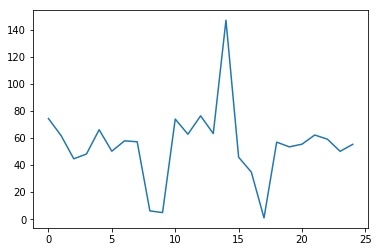

In [18]:
import matplotlib.pyplot as plt
plt.plot(rew)
plt.show()

In [19]:
sum(rew)/len(rew)

tensor([54.7563], device='cuda:0')

In [19]:
minerl.data.download('./experiments',experiment='MineRLNavigateDense-v0')

./experiments\MineRLNavigateDense-v0 exists - skipping re-download!


'./experiments'

In [ ]:
# Sample some data from the dataset!
data = minerl.data.make("MineRLNavigateDense-v0")

In [ ]:
# Iterate through a single epoch using sequences of at most 32 steps
for current_state, action, reward, next_state, done in data.batch_iter(num_epochs=1, batch_size=1, seq_len=32):
    print(current_state)
    break